<a href="https://colab.research.google.com/github/christophersingh/Master/blob/main/NLP_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))

print(tf.__version__)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2.8.0


In [31]:
vocab_size = 5000
embedding_dim = 64
max_length = 200
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

In [32]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/susanli2016/PyCon-Canada-2019-NLP-Tutorial/master/bbc-text.csv')
df

category                                               text
0              tech  tv future in the hands of viewers with home th...
1          business  worldcom boss  left books alone  former worldc...
2             sport  tigers wary of farrell  gamble  leicester say ...
3             sport  yeading face newcastle in fa cup premiership s...
4     entertainment  ocean s twelve raids box office ocean s twelve...
...             ...                                                ...
2220       business  cars pull down us retail figures us retail sal...
2221       politics  kilroy unveils immigration policy ex-chatshow ...
2222  entertainment  rem announce new glasgow concert us band rem h...
2223       politics  how political squabbles snowball it s become c...
2224          sport  souness delight at euro progress boss graeme s...

[2225 rows x 2 columns]

In [33]:
df.dropna(inplace=True)
df

category                                               text
0              tech  tv future in the hands of viewers with home th...
1          business  worldcom boss  left books alone  former worldc...
2             sport  tigers wary of farrell  gamble  leicester say ...
3             sport  yeading face newcastle in fa cup premiership s...
4     entertainment  ocean s twelve raids box office ocean s twelve...
...             ...                                                ...
2220       business  cars pull down us retail figures us retail sal...
2221       politics  kilroy unveils immigration policy ex-chatshow ...
2222  entertainment  rem announce new glasgow concert us band rem h...
2223       politics  how political squabbles snowball it s become c...
2224          sport  souness delight at euro progress boss graeme s...

[2225 rows x 2 columns]

In [34]:
df.groupby(['category']).count()

text
category           
business        510
entertainment   386
politics        417
sport           511
tech            401

In [37]:
nltk.download('punkt')
df['tokens'] = df['text'].apply(lambda x: nltk.word_tokenize(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [38]:
df

category                                               text  \
0              tech  tv future in the hands of viewers with home th...   
1          business  worldcom boss  left books alone  former worldc...   
2             sport  tigers wary of farrell  gamble  leicester say ...   
3             sport  yeading face newcastle in fa cup premiership s...   
4     entertainment  ocean s twelve raids box office ocean s twelve...   
...             ...                                                ...   
2220       business  cars pull down us retail figures us retail sal...   
2221       politics  kilroy unveils immigration policy ex-chatshow ...   
2222  entertainment  rem announce new glasgow concert us band rem h...   
2223       politics  how political squabbles snowball it s become c...   
2224          sport  souness delight at euro progress boss graeme s...   

                                                 tokens  
0     [tv, future, in, the, hands, of, viewers, with...  
1     [worldcom, boss, left, books, alone, former, w...  
2     [tigers, wary, of, farrell, gamble, leicester,...  
3     [yeading, face, newcastle, in, fa, cup, premie...  
4     [ocean, s, twelve, raids, box, office, ocean, ...  
...                                                 ...  
2220  [cars, pull, down, us, retail, figures, us, re...  
2221  [kilroy, unveils, immigration, policy, ex-chat...  
2222  [rem, announce, new, glasgow, concert, us, ban...  
2223  [how, political, squabbles, snowball, it, s, b...  
2224  [souness, delight, at, euro, progress, boss, g...  

[2225 rows x 3 columns]

In [39]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df['stop_words'] = df['tokens'].apply(lambda x:  [w for w in x if not w in stop_words])
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


category                                               text  \
0              tech  tv future in the hands of viewers with home th...   
1          business  worldcom boss  left books alone  former worldc...   
2             sport  tigers wary of farrell  gamble  leicester say ...   
3             sport  yeading face newcastle in fa cup premiership s...   
4     entertainment  ocean s twelve raids box office ocean s twelve...   
...             ...                                                ...   
2220       business  cars pull down us retail figures us retail sal...   
2221       politics  kilroy unveils immigration policy ex-chatshow ...   
2222  entertainment  rem announce new glasgow concert us band rem h...   
2223       politics  how political squabbles snowball it s become c...   
2224          sport  souness delight at euro progress boss graeme s...   

                                                 tokens  \
0     [tv, future, in, the, hands, of, viewers, with...   
1     [worldcom, boss, left, books, alone, former, w...   
2     [tigers, wary, of, farrell, gamble, leicester,...   
3     [yeading, face, newcastle, in, fa, cup, premie...   
4     [ocean, s, twelve, raids, box, office, ocean, ...   
...                                                 ...   
2220  [cars, pull, down, us, retail, figures, us, re...   
2221  [kilroy, unveils, immigration, policy, ex-chat...   
2222  [rem, announce, new, glasgow, concert, us, ban...   
2223  [how, political, squabbles, snowball, it, s, b...   
2224  [souness, delight, at, euro, progress, boss, g...   

                                             stop_words  
0     [tv, future, hands, viewers, home, theatre, sy...  
1     [worldcom, boss, left, books, alone, former, w...  
2     [tigers, wary, farrell, gamble, leicester, say...  
3     [yeading, face, newcastle, fa, cup, premiershi...  
4     [ocean, twelve, raids, box, office, ocean, twe...  
...                                                 ...  
2220  [cars, pull, us, retail, figures, us, retail, ...  
2221  [kilroy, unveils, immigration, policy, ex-chat...  
2222  [rem, announce, new, glasgow, concert, us, ban...  
2223  [political, squabbles, snowball, become, commo...  
2224  [souness, delight, euro, progress, boss, graem...  

[2225 rows x 4 columns]

In [43]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('gutenberg')
stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()
#wordnet_lemmatizer.lemmatize(sentence)

df['stemmer'] = df['stop_words'].apply(lambda x:  stemmer.stem(' '.join(x)))
df['wordnet_lemmatizer'] = df['stemmer'].apply(lambda x:  wordnet_lemmatizer.lemmatize(x))
df

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


category                                               text  \
0              tech  tv future in the hands of viewers with home th...   
1          business  worldcom boss  left books alone  former worldc...   
2             sport  tigers wary of farrell  gamble  leicester say ...   
3             sport  yeading face newcastle in fa cup premiership s...   
4     entertainment  ocean s twelve raids box office ocean s twelve...   
...             ...                                                ...   
2220       business  cars pull down us retail figures us retail sal...   
2221       politics  kilroy unveils immigration policy ex-chatshow ...   
2222  entertainment  rem announce new glasgow concert us band rem h...   
2223       politics  how political squabbles snowball it s become c...   
2224          sport  souness delight at euro progress boss graeme s...   

                                                 tokens  \
0     [tv, future, in, the, hands, of, viewers, with...   
1     [worldcom, boss, left, books, alone, former, w...   
2     [tigers, wary, of, farrell, gamble, leicester,...   
3     [yeading, face, newcastle, in, fa, cup, premie...   
4     [ocean, s, twelve, raids, box, office, ocean, ...   
...                                                 ...   
2220  [cars, pull, down, us, retail, figures, us, re...   
2221  [kilroy, unveils, immigration, policy, ex-chat...   
2222  [rem, announce, new, glasgow, concert, us, ban...   
2223  [how, political, squabbles, snowball, it, s, b...   
2224  [souness, delight, at, euro, progress, boss, g...   

                                             stop_words  \
0     [tv, future, hands, viewers, home, theatre, sy...   
1     [worldcom, boss, left, books, alone, former, w...   
2     [tigers, wary, farrell, gamble, leicester, say...   
3     [yeading, face, newcastle, fa, cup, premiershi...   
4     [ocean, twelve, raids, box, office, ocean, twe...   
...                                                 ...   
2220  [cars, pull, us, retail, figures, us, retail, ...   
2221  [kilroy, unveils, immigration, policy, ex-chat...   
2222  [rem, announce, new, glasgow, concert, us, ban...   
2223  [political, squabbles, snowball, become, commo...   
2224  [souness, delight, euro, progress, boss, graem...   

                                                stemmer  \
0     tv future hands viewers home theatre systems p...   
1     worldcom boss left books alone former worldcom...   
2     tigers wary farrell gamble leicester say rushe...   
3     yeading face newcastle fa cup premiership side...   
4     ocean twelve raids box office ocean twelve cri...   
...                                                 ...   
2220  cars pull us retail figures us retail sales fe...   
2221  kilroy unveils immigration policy ex-chatshow ...   
2222  rem announce new glasgow concert us band rem a...   
2223  political squabbles snowball become commonplac...   
2224  souness delight euro progress boss graeme soun...   

                                     wordnet_lemmatizer  
0     tv future hands viewers home theatre systems p...  
1     worldcom boss left books alone former worldcom...  
2     tigers wary farrell gamble leicester say rushe...  
3     yeading face newcastle fa cup premiership side...  
4     ocean twelve raids box office ocean twelve cri...  
...                                                 ...  
2220  cars pull us retail figures us retail sales fe...  
2221  kilroy unveils immigration policy ex-chatshow ...  
2222  rem announce new glasgow concert us band rem a...  
2223  political squabbles snowball become commonplac...  
2224  souness delight euro progress boss graeme soun...  

[2225 rows x 6 columns]

In [44]:
emails = '[A-Za-z0-9]+@[a-zA-z].[a-zA-Z]+'
websites = '(http[s]*:[/][/])[a-zA-Z0-9]+'
mentions = '@[A-Za-z0-9]+'
import regex as re
df['clean'] = df['wordnet_lemmatizer'].apply(lambda x:  re.sub(emails, '', x))
df['clean'] = df['clean'].apply(lambda x:  re.sub(websites, '', x))
df['clean'] = df['clean'].apply(lambda x:  re.sub(mentions, '', x))
df

category                                               text  \
0              tech  tv future in the hands of viewers with home th...   
1          business  worldcom boss  left books alone  former worldc...   
2             sport  tigers wary of farrell  gamble  leicester say ...   
3             sport  yeading face newcastle in fa cup premiership s...   
4     entertainment  ocean s twelve raids box office ocean s twelve...   
...             ...                                                ...   
2220       business  cars pull down us retail figures us retail sal...   
2221       politics  kilroy unveils immigration policy ex-chatshow ...   
2222  entertainment  rem announce new glasgow concert us band rem h...   
2223       politics  how political squabbles snowball it s become c...   
2224          sport  souness delight at euro progress boss graeme s...   

                                                 tokens  \
0     [tv, future, in, the, hands, of, viewers, with...   
1     [worldcom, boss, left, books, alone, former, w...   
2     [tigers, wary, of, farrell, gamble, leicester,...   
3     [yeading, face, newcastle, in, fa, cup, premie...   
4     [ocean, s, twelve, raids, box, office, ocean, ...   
...                                                 ...   
2220  [cars, pull, down, us, retail, figures, us, re...   
2221  [kilroy, unveils, immigration, policy, ex-chat...   
2222  [rem, announce, new, glasgow, concert, us, ban...   
2223  [how, political, squabbles, snowball, it, s, b...   
2224  [souness, delight, at, euro, progress, boss, g...   

                                             stop_words  \
0     [tv, future, hands, viewers, home, theatre, sy...   
1     [worldcom, boss, left, books, alone, former, w...   
2     [tigers, wary, farrell, gamble, leicester, say...   
3     [yeading, face, newcastle, fa, cup, premiershi...   
4     [ocean, twelve, raids, box, office, ocean, twe...   
...                                                 ...   
2220  [cars, pull, us, retail, figures, us, retail, ...   
2221  [kilroy, unveils, immigration, policy, ex-chat...   
2222  [rem, announce, new, glasgow, concert, us, ban...   
2223  [political, squabbles, snowball, become, commo...   
2224  [souness, delight, euro, progress, boss, graem...   

                                                stemmer  \
0     tv future hands viewers home theatre systems p...   
1     worldcom boss left books alone former worldcom...   
2     tigers wary farrell gamble leicester say rushe...   
3     yeading face newcastle fa cup premiership side...   
4     ocean twelve raids box office ocean twelve cri...   
...                                                 ...   
2220  cars pull us retail figures us retail sales fe...   
2221  kilroy unveils immigration policy ex-chatshow ...   
2222  rem announce new glasgow concert us band rem a...   
2223  political squabbles snowball become commonplac...   
2224  souness delight euro progress boss graeme soun...   

                                     wordnet_lemmatizer  \
0     tv future hands viewers home theatre systems p...   
1     worldcom boss left books alone former worldcom...   
2     tigers wary farrell gamble leicester say rushe...   
3     yeading face newcastle fa cup premiership side...   
4     ocean twelve raids box office ocean twelve cri...   
...                                                 ...   
2220  cars pull us retail figures us retail sales fe...   
2221  kilroy unveils immigration policy ex-chatshow ...   
2222  rem announce new glasgow concert us band rem a...   
2223  political squabbles snowball become commonplac...   
2224  souness delight euro progress boss graeme soun...   

                                                  clean  
0     tv future hands viewers home theatre systems p...  
1     worldcom boss left books alone former worldcom...  
2     tigers wary farrell gamble leicester say rushe...  
3     yeading face newcastle fa cup premiership side..

In [45]:
df[['text', 'clean']].head(10)

text  \
0  tv future in the hands of viewers with home th...   
1  worldcom boss  left books alone  former worldc...   
2  tigers wary of farrell  gamble  leicester say ...   
3  yeading face newcastle in fa cup premiership s...   
4  ocean s twelve raids box office ocean s twelve...   
5  howard hits back at mongrel jibe michael howar...   
6  blair prepares to name poll date tony blair is...   
7  henman hopes ended in dubai third seed tim hen...   
8  wilkinson fit to face edinburgh england captai...   
9  last star wars  not for children  the sixth an...   

                                               clean  
0  tv future hands viewers home theatre systems p...  
1  worldcom boss left books alone former worldcom...  
2  tigers wary farrell gamble leicester say rushe...  
3  yeading face newcastle fa cup premiership side...  
4  ocean twelve raids box office ocean twelve cri...  
5  howard hits back mongrel jibe michael howard s...  
6  blair prepares name poll date tony blair likel...  
7  henman hopes ended dubai third seed tim henman...  
8  wilkinson fit face edinburgh england captain j...  
9  last star wars children sixth final star wars ...

In [15]:
def preprocess_text(text):
    # Tokenise words while ignoring punctuation
    tokeniser = RegexpTokenizer(r'\w+')
    tokens = tokeniser.tokenize(text)
    
    # Lowercase and lemmatise 
    lemmatiser = WordNetLemmatizer()
    lemmas = [lemmatiser.lemmatize(token.lower(), pos='v') for token in tokens]
    
    # Remove stopwords
    keywords= [lemma for lemma in lemmas if lemma not in stopwords.words('english')]
    return keywords

In [46]:
!pip install -q spacy
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9 MB 1.3 MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-py3-none-any.whl size=829180942 sha256=5ac647248639f23bd0ca995659dfd4a4f1d2871e65c824586e273ebc310bb6e4
  Stored in directory: /tmp/pip-ephem-wheel-cache-k7de82of/wheels/11/95/ba/2c36cc368c0bd339b44a791c2c1881a1fb714b78c29a4cb8f5
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [50]:
df['clean'].values[0]

'tv future hands viewers home theatre systems plasma high-definition tvs digital video recorders moving living room way people watch tv radically different five years time . according expert panel gathered annual consumer electronics show las vegas discuss new technologies impact one favourite pastimes . us leading trend programmes content delivered viewers via home networks cable satellite telecoms companies broadband service providers front rooms portable devices . one talked-about technologies ces digital personal video recorders ( dvr pvr ) . set-top boxes like us tivo uk sky+ system allow people record store play pause forward wind tv programmes want . essentially technology allows much personalised tv . also built-in high-definition tv sets big business japan us slower take europe lack high-definition programming . people forward wind adverts also forget abiding network channel schedules putting together a-la-carte entertainment . us networks cable satellite companies worried mea

In [57]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=200000)
tokenizer.fit_on_texts(list(df['clean']))
word_index = tokenizer.word_index
word_index

{'said': 1,
 'mr': 2,
 'would': 3,
 'year': 4,
 'also': 5,
 'people': 6,
 'new': 7,
 'us': 8,
 'one': 9,
 'could': 10,
 'last': 11,
 'first': 12,
 'time': 13,
 'two': 14,
 'world': 15,
 'government': 16,
 'uk': 17,
 'years': 18,
 'best': 19,
 'make': 20,
 'told': 21,
 'get': 22,
 'film': 23,
 'like': 24,
 'game': 25,
 'made': 26,
 'back': 27,
 'music': 28,
 'many': 29,
 'three': 30,
 '000': 31,
 'labour': 32,
 'next': 33,
 '1': 34,
 'bbc': 35,
 'well': 36,
 'set': 37,
 'number': 38,
 'take': 39,
 'way': 40,
 'added': 41,
 'market': 42,
 '2': 43,
 'may': 44,
 'says': 45,
 'company': 46,
 'home': 47,
 'election': 48,
 'good': 49,
 '2004': 50,
 'going': 51,
 'party': 52,
 'still': 53,
 'games': 54,
 'much': 55,
 'england': 56,
 'win': 57,
 '6': 58,
 'go': 59,
 'work': 60,
 'since': 61,
 'firm': 62,
 'second': 63,
 'show': 64,
 'top': 65,
 'blair': 66,
 'think': 67,
 'week': 68,
 'use': 69,
 'say': 70,
 'million': 71,
 'part': 72,
 'play': 73,
 'technology': 74,
 'minister': 75,
 'high': 7

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')
features = tfidf.fit_transform(df['clean']).toarray()
labels = df['category']
print("Each of the %d complaints is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 2225 complaints is represented by 14296 features (TF-IDF score of unigrams and bigrams)


In [64]:
category_id_df = df[['clean', 'category']].drop_duplicates()

In [65]:
import pandas as pd
import numpy as np
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph.
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category', 'clean']].values)
N = 3
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("n==> %s:" %(Product))
  print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
  print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> $ 1m payoff former shell boss shell pay $ 1m ( £522 000 ) ex-finance chief stepped post april 2004 firm over-stated reserves . judy boynton finally left firm 31 december spent intervening time special advisor chief executive jeroen van der veer . january 2004 shell told shocked investors reserves 20 % smaller previously thought . shell said pay-off line ms boynton contract . leaving mutual agreement pursue career opportunities firm said statement . severance package means keeps long-term share options fails collect 2003 incentive plan since firm failed meet targets included . revelation shell inflated reserves led resignation chairman sir phil watts production chief walter van der vijver . investigation commissioned shell found ms boynton share responsibility company behaviour . despite receiving email mr van de vijver said firm fooled market reserves investigation said nothing inquire . shell restated reserves four times 2003. september paid £82.7m fines regulators sides atlantic

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> & # 163 ; 1.8m indecency fine viacom media giant viacom paid $ 3.5m ( £1.8m ) end investigations indecency us radio tv shows . settlement federal communications commission ( fcc ) ends long-running saga dating back 2001. fcc looking 50 shows including shock jock howard stern two new york djs . stern recently announced leaving viacom two djs sacked show featured couple purporting sex church . church incident two years ago viacom agreed install audio delay equipment radio stations broadcast live programming . also agreed train broadcasters employees indecency laws . agreement cancels investigations 50 radio television shows said richard diamond fcc deputy secretary communications . shows broadcast viacom-owned stations across united states . viacom five days pay $ 3.5m fine according agreement . payment related fcc $ 550 000 ( £293 000 ) fine levied viacom exposure singer janet jackson breast cbs super bowl halftime show january . viacom contesting fine . first time viacom paid inde

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> & cuts prices average 24 % marks & spencer cut prices london regions average 24 % according research city investment bank . dresdner kleinwort wasserstein said : spite snow uk still feels early cutting prices spring merchandise . stuart rose head & said last year prices high . bringing ranges new price points compete mid-market retailers like next said & . next one & biggest competitors move may force lower prices . drkw said cuts either clear stock could indicate longer term step change pricing certain areas & . either way good news & margin added . brought quite lot new clothing new price points part stuart rose strategy quality style -and price said & spokesman . many analysts believe february proving difficult month retailers british retail consortium figures due weeks expected reflect tough trading environment . separately investment bank goldman sachs produced reseach showing basket 35 & goods 11 % high-street average compared 43 % higher last year . strange week & tuesday r

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> & n extends indian beer venture uk biggest brewer scottish newcastle ( & n ) buy 37.5 % india united breweries deal worth 4.66bn rupees ( $ 106m : £54.6m ) . & n buy 17.5 % equity stake united maker well-known kingfisher lager brand make public offer buy another 20 % stake . similar holding controlled vijay mallya chair indian firm . deal natural development joint venture united said tony froggatt & n chief executive . top brands include newcastle brown ale foster john smith strongbow kronenbourg . 2002 & n united agreed form strategic partnership one would include joint venture business uk investment indian brewer . joint venture established may 2003. parties 40 % stake venture - millennium alcobev . millennium alcobev merged united expects post-merger half india beer market . india population one billion consumes 1.2 billion bottles beer every year . kingfisher market share 29 % . addition equity stake & n invest 2.47bn rupees united non-convertible redeemable preference shares 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> 2004 : irish athletics year 2004 remembered one irish athletics great years . year began optimism invariably unaccountably seems herald upcoming olympiad . come late august hot days magnificent stadium athens told us true strength irish athletics - accurate lack . sonia sullivan olympic farewell apart little stir emotions irish athletics watchers . disastrous build-up games surprised . start year sullivan earmarked ireland best medal prospect turned walker gillian never even made start line injury . less week olympics sport rocked news 10 000m hope cathal lombard tested banned substance epo . lombard shattering mark carroll national 10 000m record april already set tongues wagging even cynical observers surprised rumbled irish sports council sting operation . corkman quickly held hands admission promptly handed two-year ban sport . back pre-olympic ranch greece must seemed things got worse nearly walker jamie costin lucky escape life involved car crash near athens . track field ac

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> 2d metal slug offers retro fun like drill sergeant past metal slug 3 wake-up call today gamers molly-coddled slick visuals fancy trimmings . hand-animated sprites 2d side-scrolling even considered retro released arcades four years ago . frantic shooter find end joypad year . yes includes halo 2. simply choose grunt wade five 2d side-scrolling levels hectic video game blasting ever encounter . also toughest game likely play hordes enemies lives pile pressure . players must battle soldiers snowmen zombies giant crabs aliens mention huge screen-filling bosses guard five levels . shoot-anything-that-moves gameplay peppered moments old-school genius . fans robotic gastropods note title refers instead vast array vehicles offer game stuffed bizarre hardware . tanks jets submarines commandeered well cannon-toting camels elephants ostriches - weaponry offer acre iraq . doling justice joy thanks ultra responsive controls tough nut crack addictive enough gagging one last go . mere £20 metal 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> a-listers flock gervais sitcom hollywood actors samuel l jackson ben stiller signed ricky gervais new sitcom comedian told bbc news . said seen scripts agreed appear episode sitcom extras . join british stars jude law kate winslet booked guest roles . comic actor said drawn a-list stars wanted agreed . wanted actors iconic status could also deconstruct gervais told bbc news . zeitgeist . wanted people would still around 20 years winner big brother take part . gervais admitted cautious revealing would taking part signed dotted line . met stiller jackson enjoyed scripts enough commit . want start revealing names sorted people mention people even asked . linked ridiculous stories recently going remake 10 taking dudley moore part . approached take anyway . said stiller jackson would playing twisted versions extras jokes would sail pretty close bone . gervais writing partner stephen merchant currently refining scripts six-part series gervais plays struggling actor bitches stars . meanw

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> aaliyah claim dismissed court late r & b star aaliyah record company failed attempt sue video producer booked ill-fated flight died 2001. new york appeals court told blackground records singer parents right launch claim wrongful death . 22-year-old singer family came undisclosed settlement negligence claim 2003. aaliyah completed music video plane crashed bahamas . eight others killed plane crashed left florida . blackground records lawyer frank penski said yet examine decision know whether would pursue case . investigation crash revealed twin-engined cessna overloaded 700 pounds ( 320kg ) . post-mortem carried remains pilot showed cocaine alcohol body . aaliyah rising star music film killed . honoured string posthumous awards single woman went number one uk .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los angeles, film festival, box office


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> abba queen enters music rich list woman behind abba musical mamma mia ! joined list british-based music millionaires . producer judy craymer highest new entry sunday times music rich list £67m fortune . ms craymer remortgaged home finance idea musical based around abba hits since become global triumph . teenage soul singer joss stone new entry list britain young music millionaires £5m . ms craymer developed mamma mia ! playwright catherine johnson members abba number 31 music rich list . taking top spot second year former record label boss clive calder whose wealth risen £1.3bn . mr calder man behind acts including britney spears . made fortune selling independent label zomba record giant bmg . former beatle sir paul mccartney second list £800m - £40m last year . andrew lloyd-webber wealth rose estimated £300m last year £700m theatre impresario sir cameron mackintosh fortune rose £340m £400m . recent hits included west end show mary poppins . pop idol mogul simon fuller seen wealt

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> abba reunite musical premiere original stars swedish pop quartet abba reunited home premiere hit musical mamma mia ! based band songs . first time almost 20 years four bjorn ulvaeus benny andersson agnetha faltskog anni-frid lyngstad met publicly . faltskog virtual recluse since band split 1982. musical become global phenomenon performed swedish first time . fans camped outside stockholm cirkus theatre snow glimpse stars . premiere marks abba first public reunion since legendary band acrimonious break-up early 1980s . thought faltskog would appear london musical fifth anniversary celebrations april 2004 stayed away due fear flying . original abba member bjorn ulvaeus set translating musical band mother tongue celebrated homecoming alongside swedish artist niklas stromstedt . almost abba original songs sold 350 million records worldwide written recorded english . musical set small greek island tells story young woman fiercely independent single mother . show include classics super 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> abbas tolerate attacks palestinian leader mahmoud abbas said tolerate attacks last friday suicide bombing israeli city tel aviv . interview ahead meeting london discuss palestinian reforms mr abbas said attacks palestinian interests . palestinian authority ( pa ) exerting 100 % effort end violence mr abbas added . attack killed five first kind since took office . mr abbas confirmed israel shared information pa hunt organisers attack . israeli government refuses accept syria denials implicated nightclub bombing . israeli officials gave intelligence briefing foreign ambassadors monday explaining syria alleged involvement . british foreign minister jack straw said continuing stream information suggesting palestinian militant groups operating within syria . email interview british newspaper independent mr abbas said : believe peace possible ready negotiate israel reach true lasting peace based justice international legitimacy . added : opportunity would irresponsible israelis world al

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> abortion poll issue - blair tony blair believe abortion election issue arguing matter individual conscience . prime minister spokesman set mr blair view top catholic england wales backed michael howard stance abortions . tory leader supports reduction legal limit 24 weeks 20 said current rules tantamount abortion demand . prime minister made clear plans change law . mr blair spokesman said : catholic church well-known position issue one many issues cardinal mentioned therefore seen context . words came cardinal cormac murphy connor archbishop westminster backed mr howard stance distanced labour . statement said abortion key issue saying : policy supported mr howard one would commend way full abandonment abortion . cardinal connor claimed labour developed notion natural party catholics said : going suggest people support one particular party . family planning association says reduction would particularly affect young women often seek help later . 180 000 women england wales termina

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> absa barclays talks continue south africa biggest retail bank absa said still talks uk bank barclays sale majority stake group . november absa said close striking deal barclays . group said barclays still waiting approval south africa banking competition authorities make formal offer . absa also announced expects see earnings grow 20-25 % current financial year . discussions barclays continuing shareholders advised agreement reached offer made barclays acquire majority stake absa absa said statement . barclays buys stake absa one largest foreign investments south africa recent years . absa currently market value $ 8.5bn ( £4.4bn ) . analysts said absa earnings forecast better expected . however company warned headline earnings growth would trimmed four percentage points share options black economic empowerment transaction staff share incentive scheme . south african group release results year 31 march 30 may .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correla

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> academy awards flourished 77th annual academy awards taking place 27 february stars movie-making world holding breath discover showered honours year . humble beginnings modern day extravaganza become behemoth today started first academy awards handed 1929 comparatively low-key dinner held hollywood roosevelt hotel - road modern day home . 250 guests attended ticket prices $ 5 . first film win wings starred clara bow silent movie win big award . first 10 years winners list handed newspapers could publish 11pm 1940 winners published los angeles times 8.45pm meaning guests entering ceremony knew already knew results . result sealed envelope system introduced leading secrecy suspense-filled night happens today . tradition holding awards banquet continued 1942 increasing interest came growing guest list became impractical host dinner . ceremonies transferred theatres famous grauman chinese theatre first host expanded event . venues included dorothy chandler pavilion shrine auditorium .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> act detention ruling uk urged government must act quickly law lords ruling detention foreign terror suspects without trial unlawful mary robinson said . former un commissioner human rights irish president told radio 4 today government response would scrutinised internationally . would troubling government accept judgement work within said . home secretary charles clarke said detainees freed present . speaking parliament first day office home secretary following david blunkett resignation mr clarke said : asking parliament renew legislation new year . meantime studying judgement carefully see whether possible modify legislation address concerns raised house lords . mrs robinson said law lords ruling line international legal opinion praised decisive eight one majority . law lords acknowledge role government say disproportionate use amounted executive detention discriminatory apply british citizens said . mrs robinson warned lack action british government could lead action legal aren

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> actor foxx sees globe nominations us actor jamie foxx given two nominations golden globe awards meryl streep morgan freeman cate blanchett also prizes . stars shortlisted monday supporting roles main nominations still come . foxx starred collateral ray . clive owen david carradine natalie portman also awards . golden globes hollywood second prominent awards first major nominations announced . last year lord rings : return king named best drama movie lost translation best musical comedy . sean penn charlize theron tim robbins renee zellweger acting awards - mirroring eventual oscars outcome . golden globes ceremony take place 16 january oscars following 27 february .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los angeles, film festival, box office


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> actor scott new bond favourite bookmaker william hill stopped taking bets next james bond following succession large wagers actor dougray scott . firm closed book friday saying insider information could contributed number bets . past gambles like often right william hill spokesman rupert adams said . closing list gave scott odds 6-9 followed oscar nominee clive owen 5-2. scott first found fame tv series soldier soldier since starred films mission impossible ii wartime drama enigma . mr adams said one punter placed bet £870 39-year-old actor odds 8-1. told us inside information perhaps knew casting say said . others thought running include star wars actor ewan mcgregor australian star hugh jackman odds 4-1. colin farrell jude law troy star eric bana also tipped role past . large number bets actor colin salmon become first black james bond dismissed publicity stunt month ago . next bond film originally due release 2005 delayed 2006 due sony takeover mgm studio . recent die another d

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> actress roberts takes spider role actress julia roberts play part spider new film version children classic charlotte web . voice charlotte teams girl save friend wilbur pig story eb white . film - mix live action animation - roberts first project since birth twins hazel phinnaeus two months ago . oprah winfrey voice goose john cleese voice sheep steve buscemi rat 2006 film . ten-year-old dakota fanning play fern girl centre story film directed 13 going 30 film-maker gary winick . filming due begin melbourne australia later month . charlotte web sold 45 million copies since published 1952. animated version made 1973 first live action film . actor voice wilbur pig yet revealed .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los angeles, film festival, box office


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ad firm wpp profits surge 15 % uk advertising giant wpp posted larger-than-expected annual profits predicted outperform market 2005. pre-tax profits rose 15 % year ago reach £546m ( $ 1.04bn ) ahead average analysts forecasts £532m . revenues £4.3bn firm operating margins 14.1 % said could reach 14.8 % 2006. year wpp bought us rival grey global creating giant big enough rival sector leader omnicom . chief executive martin sorrell friday told reuters news agency wpp submitted proposal united business media nop world market research unit . analysts say unit sell could sell £350m . wpp recent years also bought firms ogilvy & mather cordiant communications . also includes firms young & rubicam j walter thompson . events olympics helped boost wpp profits 2004. company said us congressional elections fifa world cup likely present advertising opportunities near future . long-term outlook looks favourable media technology developments strength us economy wpp said .:
  * Most Correlated Un

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ad sales boost time warner profit quarterly profits us media giant timewarner jumped 76 % $ 1.13bn ( £600m ) three months december $ 639m year-earlier . firm one biggest investors google benefited sales high-speed internet connections higher advert sales . timewarner said fourth quarter sales rose 2 % $ 11.1bn $ 10.9bn . profits buoyed one-off gains offset profit dip warner bros less users aol . time warner said friday owns 8 % search-engine google . internet business aol mixed fortunes . lost 464 000 subscribers fourth quarter profits lower preceding three quarters . however company said aol underlying profit exceptional items rose 8 % back stronger internet advertising revenues . hopes increase subscribers offering online service free timewarner internet customers try sign aol existing customers high-speed broadband . timewarner also restate 2000 2003 results following probe us securities exchange commission ( sec ) close concluding . time warner fourth quarter profits slightly 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> adriano chelsea link rejected adriano agent gilmar rinaldi insisted contact chelsea striker . chelsea reported made inquiries inter milan 22-year-old brazilian star . rinaldi told bbc sport rio de janeiro : assure chelsea dealings whatsoever either adriano . parma real madrid interested nothing new . interest known time . adriano scored 14 goals 20 serie appearances season . chelsea boss jose mourinho claimed milan talking adriano day alleged held clandestine meeting arsenal defender ashley cole . mourinho said practising portuguese need strikers . rinaldi told bbc sport : say nobody chelsea london club contacted . want fine . tell situation . chelsea interested must make offer . inter reported slapped price tag region £40m head adriano joined year ago parma . real madrid view natural replacement compatriot ronaldo . rinaldi said : give price inter would accept adriano . something would negotiated interested clubs .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Cor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ads passion oscar campaign producer mel gibson using paid advertisements promote passion christ voters next year academy awards . gibson icon productions partner bruce davey said would campaigning print radio tv success oscars february . film judged artistic merit spends money advertising davey said . dvds sent oscar voters invited screenings . icon spent little advertising film deals last hours jesus christ life released earlier year - instead made film available special screenings churches . went gross $ 600m ( £322m ) ticket sales worldwide . recent years marketing films members academy motion picture arts sciences become multi-million dollar industry . last year academy formed committee tighten rules campaigns spilled personal attacks studios . academy president frank pierson praised gibson move working restore oscars celebration appreciation excellence resisting crass commercialisation threatening integrity award .:
  * Most Correlated Unigrams are: singer, actor, film
  * Mo

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> adult literacy government hit target improving adult maths literacy skills courses made attractive report says . national audit office praised ministers reaching benchmark 750 000 adults england gaining basic qualifications year . target 1.5 million 2010 needed creative ideas . 26 million adults lack maths english skill levels expected school-leavers . according report half qualifications achieved learners aged 16 18. defined adults government purpose compiling figures . normally adults defined aged 19. number people gaining qualifications rising slowly . auditor general sir john bourn said : higher levels literacy numeracy benefit england socially economically . people opportunity live richer lives . 2001 government launched get scheme - aimed reducing illiteracy innumeracy . sir john said substantial progress made since adding beginning . government partners would need creative responsive . £3.7bn spent implementing programme 2006. report recommends gathering details educational

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> adventure tale tops awards young book fans voted fergus crane story boy taken adventure flying horse winner two smarties book prizes . paul stewart chris riddell book came top category six- eight-year-olds award chosen after-school club members . sally grindley spilled water chinese girl sold servant top vote readers aged nine 11. biscuit bear mini grey took top award under-five category . winners voted 6 000 children shortlist picked adult panel . prize celebrating 20th year billed uk biggest children book award . fergus crane includes text stewart illustrations riddell also created edge chronicles together . well six eights prize 4children special award voted after-school club members . julia eccleshare chair adult judging panel said children literature never looked stronger prize 20 years . award counts final choice winners made children toughest critics said . year young judges chose winners exceptionally strong varied shortlist showcases best children books today . previous w

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> african double edinburgh world 5000m champion eliud kipchoge 9.2km race view great edinburgh cross country . kenyan second newcastle hosted race last year front outset . ethiopian duo gebre gebremariam dejene berhanu made last-gasp efforts overtake kipchoge responded burst speed clinched victory . gavin thompson first briton 12th place nick mccormick held british rivals win 4km race . morpeth harrier led end first lap ended mike skinner andrew baddeley hopes surge lasp lap . training gone well really worried opposition asi knew great shape said mccormick hopes earn 1 500m place british team world championships helsinki . women race ethiopia tirunesh dibaba battle world cross country champion benita johnson retain title . australian johnson shocked african rivals brussels last march looked course another win 6.2km race . world 5000m champion dibaba make telling strike finishing line final 20 metres . britons kathy butler hayley yelling contention early .:
  * Most Correlated Unigra

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> agassi fear melbourne andre agassi involvement australian open put doubt pulled kooyong classic hip injury . agassi serving 5-6 first set fellow american andy roddick decided bring premature end match . hip cramping could continue said 34-year-old . agassi australian open four times mri scan discover extent damage . said problem hip injury forced miss wimbledon last year . good news tear tightening body protecting hopefully issue added . comfortable feeling . wait see dealing - pretty scary feeling something feel right getting worse . disappointing best deal . time shortly tell ( australian open ) possibility . counting end day . maybe days much better sense hopes .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> aids climate top davos agenda climate change fight aids leading list concerns first day world economic forum swiss resort davos . 2 000 business political leaders around globe listen uk prime minister tony blair opening speech wednesday . mr blair focus africa development plans global warming . earlier day came update efforts 3 million people anti-aids drugs end 2005. world health organisation ( ) said 700 000 people poor countries life-extending drugs - 440 000 six months earlier amounting 12 % 5.8 million needed . $ 2bn funding gap still stood way hitting 2005 target said . themes stressed mr blair - whose attendance announced last minute - wants dominate uk chairmanship g8 group industrialised states . issues discussed five-day conference range china economic power iraq future sunday elections . aside mr blair 20 world leaders expected attend including french president jacques chirac - due speak video link bad weather delayed helicopter - south african president thabo mbeki who

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ailing eurodisney vows turnaround eurodisney european home mickey mouse friends said sell 253m euros ( £175m ; $ 328m ) new shares looks avoid insolvency . sale last part plan restructure 2.4bn euros-worth debts . despite struggling since opened 1992 eurodisney recently made progress turning business around ticket sales picked . however analysts still question whether attracts enough visitors stay open even restructuring . eurodisney remains europe largest single tourist attraction attracting 12.4 million visitors annually . new attraction - walt disney studios - recently opened site near paris . company currently traded stock tumbled paris latest news shedding 15 % 22 euro cents . eurodisney sell new shares priced 9 euros cents . us disney corporation saudi arabian prince al-walid bin talal firm two main shareholders buy new stock . restructuring deal second firm troubled financial history ; finances first reorganised 1994 .:
  * Most Correlated Unigrams are: oil, growth, shares


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> air china $ 1bn london listing china national airline make overseas stock market debut dual listing london hong kong london stock exchange ( lse ) said . air china plans raise $ 1bn ( £514m ) flotation . share trading begin 15 december lse said . china aviation authorities listing part modernisation airline sector cope soaring demand air travel . details share price number shares given . lse working hard woo chinese companies choose london rather new york listings . opened asia-pacific office hong kong last month . delighted air china chosen london listing outside china said lse chief executive clara furse . london stock exchange offers ambitious chinese companies access world international equity market combined high regulatory corporate governance standards said . spokesman lse said : engaged ( air china ) 18 months two years . part pitch bring listings london lse thought highlighting extra costs red-tape imposed new us laws passed since enron scandal whilst stressing london str

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> air jamaica back state control jamaican government regaining control air jamaica bid help ailing company financial difficulties . firm failed make money since state sold majority stake hotel tycoon gordon stewart 1994. common many carriers air jamaica debts $ 560m ( £291m ) hit high fuel costs impact 11 september attacks . company restructured aim finding new buyer . administration committed viable national airline serve major catalyst economy said finance minister omar davies . 35-year-old airline transports 55 % passengers island pilots reportedly among best paid industry senior members staff earning excess $ 234 000 year .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bigrams are: analysts said, economic growth, stock market


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> air passengers win new eu rights air passengers unable board flights overbooking cancellations flight delays demand greater compensation . new eu rules set compensation 250 euros ( £173 ) 600 euros depending length flight . new rules apply scheduled charter flights including budget airlines . airlines attacked legislation saying could forced push prices higher cover extra cost . european commission facing two legal challenges - one european low-fare airlines association ( elaa ) international air transport association ( iata ) attacked package bad piece legislation . previously passengers could claim 150 euros 300 euros stopped boarding . however scheduled flight operators obliged offer compensation cases overbooking offer compensation flight cancellations . eu decided increase passenger compensation bid deter airlines deliberately overbooking flights . overbooking often lead bumping - passenger moved later flight . happens passenger airlines offer compensation . addition flight c

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ajax refuse rule jol move ajax refused reveal whether tottenham boss martin jol dutch champions shortlist become amsterdam club new coach . jol coached native holland guided spurs premiership top eight . ajax spokesman told bbc sport : coach must fit profile - coach understands dutch league offensive distinctive football . need find solution soon someone place next season . ronald koeman quit ajax boss last week exit uefa cup . jol linked vacant post ajax reports saying fallen spurs sporting director frank arnesen . statement spurs website jol said : happy discussion anyone else want go elsewhere . ajax enlisted help dutch legend johann cruyff currently consultant barcelona help find new head coach . cruyff admitted impressed way former rfc waalwijk coach jol turned round spurs fortunes since taking jacques santini . tonny bruins slot ruud krol currently charge ajax third dutch league .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand sla

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> alfa romeos get gm engines fiat stop making six-cylinder petrol engines sporty alfa romeo subsidiary unions italian carmaker said . unions claim fiat close fiat powertrain plant arese near milan instead source six-cylinder engines general motors . fiat yet comment matter unions say new engines made gm australia . news comes week gm pulled agreement buy fiat . gm pay former partner fiat 1.55bn euros ( $ 2bn ; £1.1bn ) get deal could forced buy italian carmaker outright . fiat gm also ended five-year alliance two joint ventures engines purchasing agree continue buying engines . powertrain told us today alfa romeo engines longer made arese said union leader vincenzo lilliu reported reuters news agency . assembly line dismantled six-cylinder alfa romeo motor replaced engine gm produces australia . reuters also said mr lilliu union bosses shouted insults fiat chairman luca di montezemolo following meeting tuesday regarding future arese plant . unions said end engine production facility

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> algeria hit gas riots algeria suffered weekend violent protests government plans raise gas prices local press reports . demonstrators number regions blocked roads attacked public buildings overturned vehicles newspapers including el watan reported . price butane gas vital fuel cooking risen 200 dinars ( $ 2.77 ) per canister 170 dinars . even hike failing economic conditions fanning resentment algeria poorest regions . demonstrators took streets last week cost change first announced police seemed restored order . according local press reports trouble flared saturday carried sunday . el watan said number hot spots centred villages towns close bouira 100 kilometres ( 60 miles ) south capital algiers . among main areas affected western tiaret region sidi ammar east country agence france presse ( afp ) reported . riots also flared maghnia region close border morocco west afp said . butane gas fuel oil used main source fuel heat homes cook food algeria remote mountain areas .:
  * Most

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> alicia keys open us super bowl r & b star alicia keys open february super bowl singing song previously performed ray charles vicki carr . keys sing america beautiful accompanied 150 students florida school deaf blind . charles died last year attended school child 1937. keys said excited describing charles artist admire miss respect . know going touching memorable moment said . first performance super bowl watched millions us 6 february . sir paul mccartney provide half-time entertainment slot filled janet jackson last year . organisers promised repeat nipple-baring incident sparked thousands complaints us tv most-watched broadcast . national football league spokesman said comfortable show would acceptable mass audience . game show watched 144 million people us 2003. twenty cbs-owned tv stations fined $ 550 000 ( £300 000 ) country tv regulatory agency 542 000 complaints made janet jackson wardrobe malfunction . sir paul said : nothing bigger asked perform super bowl . looking forw

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> almagro continues spanish surge unseeded nicolas almagro became fifth spaniard reach last eight buenos aires open ousting eighth seed mariano zabaleta . showed admirable resolve win rain-affected match 6-7 6-4 6-4. compatriot seventh seed rafael nadal also reached last eight beating italian potito starace 6-1 6-3. nadal playing outdoor clay event first time hit powerful forehands oust starace match delayed hour rain . always problem stop rain one gets used said spanish teenager nadal . luckily able keep pace going throughout match . play gaston gaudio beat unseeded brazilian flavio saretta 6-3 6-2 day late match .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> amex shares spin-off news shares american express surged 8 % tuesday said spin less profitable financial advisory subsidiary . us credit card travel services giant said off-loading american express financial advisors ( aefa ) would boost profitability . aefa 12 000 advisers selling financial advice funds insurance 2.5 million customers . years delivered poor profits even losses . excellent move american express focus core businesses sell laggard division problem quite time said marquis investment research analyst phil kain . analysts estimate stand-alone aefa could market value $ 10bn ( £5.3bn ) . unit acquired american express 20 years ago investors diversified service minneapolis time firms amassing one-stop financial empires . however business selling investments never integrated rest group .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bigrams are: analysts said, economic growth, stock market


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> amnesty chief laments war failure lack public outrage war terror powerful indictment failure human rights groups amnesty international chief said . lecture london school economics irene khan said human rights flouted name security since 11 september 2001. said human rights movement use simpler language prevent scepticism spread moral message . fight poverty focus political rights elites . ms khan highlighted detentions without trial including us camp guantanamo bay cuba abuse prisoners evidence increasing human rights problems . new challenge way age-old debate security human rights translated language war said . using language war human rights sidelined know human rights apply times war . ms khan said breaches infectious seen almost major country world . human rights movement faces crisis faith value human rights said . accompanied crisis governance united nations system seem able hold countries account . amnesty secretary-general said growing gap perceived influence human rights

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> analysis : pain gain called masochism strategy run-up iraq war tony blair signed another dose pain . idea simple - prime minister goes head head often hostile group real voters full spotlight television cameras . theory talking great british public even great unwashed better media filter voters hear politicians . also effective way showing aware real people concerns - occasions - outright fury . mr blair used tactic iraq war try show really engaging public concerns expect see much run-up election . labour knows damaged accusations spin control freakery over-slick presentation - sometimes within ranks mps . tony blair said people complain listen . mr blair latest bout flagellation came series questions sessions five television throughout wednesday . trouble began wright stuff show maria hutchings marching saying tony rubbish tried complain autistic son school threatened closure . worries mrs hutchings led back audience averted public slanging match - spoke privately show . start la

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> anelka apologises criticism manchester city striker nicolas anelka issued apology criticising ambitions club . anelka quoted french newspaper saying would like play champions league bigger club . chairman john wardle said : spoken nicolas apologised anything might mistakenly taken french press . big club . nicolas told agrees big club . wardle speaking club annual general meeting also confirmed club received bids former arsenal real madrid striker . club still owe french club psg £5m purchase anelka may 2002. linked move barcelona liverpool reds skipper steven gerrard also revealed admirer time loan anfield . wardle added : bids nicolas anelka . no-one come said would like buy nicolas anelka . bid comes nicolas anelka speak board speak kevin keegan . bid bid substance worth taking us decide . still owe money nicolas clear would . wardle stress club inviting offers england winger shaun wright-phillips . added : intention selling shaun wright-phillips . someone comes silly bid discu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> anelka eyes man city departure striker nicolas anelka reportedly wants leave manchester city search champions league football . anelka 25 talks contract extension beyond 2007 city believed fear career go stale stays club . news world reports anelka told french magazine : either decide win titles easy life . think always choose football great club makes offer . added : win titles need players capability . stagnate eighth 15th place impossible progress . going score goals win risk going create feeling fed . anelka earned reputation difficult character handle spells arsenal real madrid paris st germain feels coming back haunt . talks sign extension contract said . well sporting aspect also comes account . playing eighth place good miss champions league . real madrid 2000 need playing - playing . things happened past nothing football . blame anyone . bit fault .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> angels favourite funeral song angels robbie williams song britons would like played funeral survey suggested . melancholy hit topped uk poll europeans favoured queen upbeat anthem show must go first choice . frank sinatra way second uk vote monty python always look bright side life third place . 45 000 people surveyed digital tv station music choice . european chart included denmark france germany put led zeppelin stairway heaven second ac/dc highway hell third . queen wants live forever highly favoured uk european voters . lists featured one traditional classic song britons requesting royal scots dragoon guards amazing grace continental counterparts opting mozart requiem . wanting share treasured musical gem leaving behind perfect way sign leave lasting impression music choice music marketing manager simon george said .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los angeles, film festival, box office


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> anglers could face prosecution anglers fishermen could find prosecuted plans crack animal cruelty committee mps warned . sloppy wording draft animal welfare bill could leave anglers facing court even though intended environment select committee said . mps said concerned government consulted directly plans improve animal welfare . raised complex emotive issues needed resolved mps said . called cast-iron guarantee government consults plans regulate animal industries like pet fairs game bird rearing . draft bill seeks modernise improve animal welfare legislation intends protect kept animals companion animals setting duty care . addition maintaining existing cruelty offences creates offence neglect keepers fail protect animals responsible . bill would allow animal welfare officers intervene prevent harm animal well outlawing mutilation animals - unless demonstrated animal best interest . environment select committee made 101 recommendations hearing evidence 51 organisations individual

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> angry williams rejects criticism serena williams angrily rejected claims sister venus declining force tennis . sisters ended last year without grand slam title first time since 1998. serena denied challenge fading saying : fair - tired saying anything . practising hard . serious injuries . surgery got wimbledon final . know many done . serena australian open semi-finals venus went fourth round meaning gone last eight last five grand slam appearances . serena added : venus severe strain stomach . actually injury tear way . would torn . played player ( alicia molik ) played mind venus made errors probably made . serena also said people tended forget impact 2003 murder sister yetunde price family . top close family serena continued . situation placed past little year easy come perform best realize many things important . declining . . win tournament prove anything . know know one best players .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: gran

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> animation charms japan box office oscar-winning director hayao miyazaki latest film set new japanese box office record 1.5bn yen ( $ 14.3m ) two days according reports . howl moving castle follow-up miyazaki spirited away best animation last year oscars . based children book english writer diana wynne jones . registered highest opening weekend takings japanese film country according trade publication screen daily . film 18-year-old girl trapped old woman body put spell witch . two-day takings represented 1.1 million cinema admissions screen daily said . film distributor toho expects 40 million people see total - almost one third country population - added . film golden osella outstanding technical contribution year venice film festival .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los angeles, film festival, box office


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> anti-spam laws bite spammer hard net self-declared spam king seeking bankruptcy protection . scott richter man behind optinrealbig.com billions junk mail messages said lawsuits forced company chapter 11. optinrealbig fighting several legal battles notably microsoft pushing millions dollars damages . company said filing chapter 11 would help try resolve legal problems still keep trading . listed third biggest spammer world junk mail watchdog spamhaus optinrealbig sued december 2003 sending mail messages violated anti-spam laws . lawsuit brought microsoft new york attorney general eliot spitzer alleged mr richter accomplices sent billions spam messages 514 compromised net addresses 35 countries . according microsoft messages sent via net addresses owned kuwait ministries communication finance several korean schools seoul municipal boramae hospital virginia community college system . mr richter settled attorney general case july 2004 legal fight microsoft continuing . microsoft seeki

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> anti-spam screensaver scrapped contentious campaign bump bandwidth bills spammers flooding sites data dropped . lycos europe make love spam campaign began late november tactics proved controversial . lycos shut campaign saying started stimulate debate anti-spam measures achieved aim . anti-spammer screensaver came fire encouraging vigilante activity skirting edge law . make love spam website users could download screensaver would endlessly request data net sites mentioned many junk mail messages . 100 000 people thought downloaded screensaver lycos europe offered . company wanted keep spam sites running near total capacity make much less financially attractive spammers operate sites . campaign controversial moment kicked many net veterans criticised using spamming-type tactics senders junk mail . net service firms began blocking access lycos europe site protest action . monitoring firm netcraft found anti-spam campaign proving little successful . according response-time figures ga

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> anti-terror plan faces first test plans allow home secretary charles clarke place terror suspects house arrest without trial set first real test parliament . tories lib dems labour mps poised vote plans . mr clarke says powers needed counter terror threats . opponents say judges politicians able order detention uk citizens . government expected win wednesday vote commons faces battle house lords . prevention terrorism bill published tuesday . proposes control orders would mean house arrest serious cases curfews electronic tagging limits telephone internet access suspects . two opposition parties particularly worried control orders would initially imposed say-so home secretary rather judge . tory shadow home secretary david davis warned potential miscarriages justice like guildford four - tony blair recently apologised - result pressure politicians lock terror suspects . pressures would much politician would judge serious concerns abut approach told bbc radio 4 today programme . mr

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> anti-tremor mouse stops pc shakes special adaptor helps people hand tremors control computer mouse easily developed . device uses similar steady cam technology found camcorders filter shaking hand movements . people hand tremors find hard use conventional mice simple computer tasks erratic movements cursor screen . three million britons sort hand tremor condition said uk national tremor foundation . using computer mouse well known extremely hard people tremors delighted hear technology developed address problem said karen walsh uk national tremor foundation . commonly associated tremors parkinson disease also caused conditions like essential tremor ( et ) . tremors often affect older people hit ages . et example genetic afflict people throughout lives . assistive mouse adapter ( ama ) brainchild ibm researcher jim levine developed prototype seeing uncle parkinson disease struggle mouse control . knew must way improve situation millions tremor sufferers around world including elder

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> apple attacked sources row civil liberties group electronic frontier foundation ( eff ) joined legal fight three us online journalists apple . apple wants reporters reveal 20 sources used stories leaked information forthcoming products including mac mini . eff representing reporters asked california superior court stop apple pursuing sources . argues journalists protected american constitution . eff says case threatens basic freedoms press . apple particularly keen find source information unreleased product code-named asteroid asked journalists e-mail providers hand communications relevant . rather confronting issue reporter privilege head-on apple going journalist isps e-mails said eff lawyer kurt opsahl . undermines fundamental first amendment right protects reporters . court lets apple get away exposes confidences gained reporters potential confidential sources deterred providing information media public lose vital outlet independent news analysis commentary said . case began d

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> apple ipod family expands market apple expanded ipod family release next generation digital music players . latest challenges growing digital music gadget market include ipod mini model hold 6gb compared previous 4gb . company hopes keep dominant place digital music market also said gold coloured version mini would dropped . 30gb version also added ipod photo family . latest models longer battery life prices cut average £40 . original ipod took early lead digital music player market thanks large storage capacity simple design . 2004 25 million portable players sold 10 million apple ipods . analysts agree success also integration itunes online store given company 70 % share legal download music market . mike mcguire research director analyst gartner told bbc news website apple done good job sealing market competition far . created seamless package think idea product - design function software impressive said . added threat others always present however . creative microsoft-partnere

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> apple laptop greatest gadget apple powerbook 100 chosen greatest gadget time us magazine mobile pc . 1991 laptop chosen one first lightweight portable computers helped define layout future notebook pcs . magazine compiled all-time top 100 list gadgets includes sony walkman number three 1956 zenith remote control two . gadgets needed moving parts and/or electronics warrant inclusion . magazine specified gadgets also needed self-contained apparatus used subset another device . general included items potentially mobile said magazine . end tried get heart really makes gadget gadget concluded . oldest gadget top 100 abacus magazine dates 190 a.d. put 60th place . pre-electronic gadgets top 100 include sextant 1731 ( 59th position ) marine chronometer 1761 ( 42nd position ) kodak brownie camera 1900 ( 28th position ) . tivo personal video recorder newest device make top 10 also includes first flash mp3 player ( diamound multimedia ) well first successful digital camera ( casio qv-10 ) m

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> apple laptop greatest gadget apple powerbook 100 chosen greatest gadget time us magazine mobile pc . 1991 laptop chosen one first lightweight portable computers helped define layout future notebook pcs . magazine compiled all-time top 100 list gadgets includes sony walkman number three 1956 zenith remote control two . gadgets needed moving parts and/or electronics warrant inclusion . magazine staff compiled list specified gadgets also needed self-contained apparatus used subset another device . general included items potentially mobile said magazine . end tried get heart really makes gadget gadget concluded . oldest gadget top 100 abacus magazine dates 190 a.d. put 60th place . pre-electronic gadgets top 100 include sextant 1731 ( 59th position ) marine chronometer 1761 ( 42nd position ) kodak brownie camera 1900 ( 28th position ) . tivo personal video recorder newest device make top 10 also includes first flash mp3 player ( diamond multimedia ) well first successful digital camer

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> apple mac mini gets warm welcome mac mini welcomed apple fans industry experts pc users . release tiny low-cost machine seen good move apple currently small share desktop computer market . mac watchers analysts say mac mini go long way help apple appeal mass consumers . speculate mac mini bought ipod owners wanting easy-to-use administer second home computer . bravest move made yet said jonny evans news editor macworld magazine . mr evans said combination low cost small size huge numbers ipod users could make big success . thought machine would appeal like apple technology balked paying high prices hardware . deeply affordable said . plus know get viruses associated problems . already said pc owning friends declared would buying one . interest new products launched macworld expo strong websites apple store show struggled cope demand . according response statistics gathered netcraft many visiting apple store wake mr jobs speech suffered lengthy response times . macworld expo site c

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> apple makes blogs reveal sources apple legal fight make three bloggers reveal told unreleased products . bid unmask employees leaking information launched december 2004 following online articles apple asteroid product . apple right see e-mail records three bloggers root culprit . lawyer three bloggers said ruling set dangerous precedent could harm news reporters . apple lawsuit accused anonymous people stealing trade secrets asteroid music product leaking powerpage apple insider think secret websites . three apple fan sites obsessively watch iconic firm information future products . apple notoriously secretive upcoming products gives snippets information working value . lawsuit reveal names leakers filed power page apple insider sites . separate legal fight think secret yet resolved . ruling handed week santa clara county superior court judge james kleinberg apple get hands e-mail records bloggers net providers . making ruling judge kleinberg said laws covering divulging trade sec

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> apple sues stop product leaks computer firm apple issued lawsuit prevent online leaks information future products . lawsuit unidentified individual comes weeks macworld conference san francisco used showcase new products . complaint said unidentified individual ... recently misappropriated disseminated confidential information . lawsuit filed santa clara california superior court . apple famously secretive future product launches apple users equally famous speculating new technology company . fans speculated recent weeks possibility new type ipod announced macworld conference . apple said seven-page complaint filed 13 december know true names capacities whether individual associate corporate otherwise defendants . company said would amend complaint discovered names allegedly leaked information . first time apple sued people posted information future products internet . december 2002 apple sued former contractor allegedly posted online drawings images engineering details company po

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> apple sues tiger file sharers apple taken legal action stop online leaks new products . computer giant sued three men releasing preview versions latest mac osx software onto file-sharing sites prior release . said two versions operating system codenamed tiger put onto net october december . second time two weeks apple taken legal action protect future products . tiger due shipped early 2005. last week filed lawsuit unnamed individuals leaked details new products onto web . latest action members apple developer connection group programmers gets see test versions upcoming software develop change programs work . members apple developer connection receive advance copies apple software strict confidentiality agreements take seriously protect intellectual property apple said statement . added future financial results much dependent developing improving operating systems software . thought men used sites employ bittorrent technology . bittorrent technology sites host actual files shared 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> apple unveils low-cost mac mini apple unveiled new low-cost macintosh computer masses billed mac mini . chief executive steve jobs showed new machine annual macworld speech san francisco . $ 499 macintosh sold £339 uk described jobs important mac made apple . mr jobs also unveiled ipod shuffle new music player using cheaper flash memory rather hard drives used expensive ipods . new computer shifts company new territory - traditionally firm known design innovation-led firm rather mass-market manufacturer . mac mini comes without monitor keyboard mouse second version larger hard drive also sold $ 599 . machine - available 22 january - described jobs byodkm ... bring display keyboard mouse . attempt win windows pc customers mr jobs said would appeal people thinking changing operating systems . people thinking switching excuses said . newest affordable mac ever . new computer subject speculation several weeks people surprised announcement many analysts already said sensible move . jan

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> applegate charity show closes us musical sweet charity cancelled run broadway poor ticket sales early shows . star christina applegate pull pre-broadway performances earlier month broken foot . producer barry weissler said deeply proud show said decision close painful fiscally responsible . applegate starred tv comedy married children hoping make broadway debut show . 33-year-old injured performing chicago hoping recover time official new york opening 21 april . received mixed reviews performances minneapolis chicago . previews $ 7.5m ( £4m ) show due begin 4 april . sweet charity tells story charity hope valentine dancer always falls love wrong man . first performed broadway 1966 gwen verdon title role shirley maclaine starred 1969 film version .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los angeles, film festival, box office


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> aragones angered racism fine spain coach luis aragones furious fined spanish football federation comments thierry henry . 66-year-old criticised 3000 euros ( £2 060 ) punishment even though far maximum penalty . guilty accept judged actions image sport said . racist never lacked sporting decorum . never done medals sporting merit . aragones handed fine tuesday making racist remarks henry arsenal team-mate spanish international jose reyes last october . spanish football federation first declined take action aragones requested spain anti-violence commission . fine far less expected amount £22 000 even suspension coaching licence . arsenal boss arsene wenger fined £15 000 december accusing manchester united striker ruud van nistelrooy cheating believes aragones punishment lenient . compare fine fine consider racist abuse seem get away spain wenger said . said said much money enough know look big punishment . however aragones insists fine unjustified unfair . treated like islero ( bul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> arcy injury adds ireland woe gordon arcy ruled ireland team saturday six nations clash scotland murrayfield . like skipper brian driscoll arcy failed recover hamstring injury . side led munster lock paul connell . shane horgan switches wing centre joined ulster kevin maggs . girvan dempsey comes team take right wing spot gavin duffy called replacements . gave gordon chance work said ireland coach eddie sullivan . terms risk element sensible precaution . fine next game want tempt fate . maggs win 67th cap obvious replacement centre shane horgan always likely moved wing . change ireland side last weekend win rome sees wasps flanker johnny connor replacing denis leamy . connor winning third cap making debut victory south africa last november . : murphy dempsey horgan maggs hickie gara stringer corrigan byrne hayes kelly connell capt easterby connor foley . : sheahan horan callaghan miller g easterby humphreys duffy .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Corre

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> argentina closes $ 102.6bn debt swap argentina set close $ 102.6bn ( £53.51bn ) debt restructuring offer bondholders later friday government hopeful creditors accept deal . estimated loss bondholders 70 % original value bonds yet majority expected accept government offer . argentina defaulted debt three years ago biggest sovereign default modern history . yesterday argentina economy minister roberto lavagna said estimated results restructuring would ready around next thursday ( 3 march ) . argentina president nestor kirchner said friday : year ago started swap ( negotiations ) told us crazy irrational . added government close achieving : best debt renegotiation history . country default $ 102.6bn - based original debt $ 81.8bn plus interest - past three years . offer go ahead international lawsuits behalf aggrieved investors could follow analysts optimistic go despite tough terms bondholders . 70 % 80 % bondholders expected accept terms offer . 18 february creditors holding $ 41bn

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> argentina venezuela oil deal argentina venezuela extended food-for-oil deal helped former overcome severe energy crisis last year . argentine president nestor kirchner venezuelan president hugo chavez signed deal buenos aires tuesday . last april argentina signed $ 240m agreement import venezuelan fuel exchange agricultural goods deal extended . venezuela import cattle medicines medical equipment . last year argentina severe energy crisis forced president kirchner suspend gas exports chile . argentina fears rising demand could spark another crisis wants prevent signing deal . two countries also formalised co-operation deal venezuelan energy firm pdvsa argentina enarsa . deal argentine market opened venezuelan investment . president chavez added brazil petrobras could join soon co-operation deal . president chavez ardent promoter concept south american oil company could include state-owned companies venezuela argentina brazil bolivia . two presidents also agreed create television s

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> argonaut founder rebuilds empire jez san man behind argonaut games group went administration week ago bought back company . veteran games developer taken cambridge-based add monsters studios london subsidiary morpheme . argonaut group went administration due severe cash crisis firing half staff . august warned annual losses £6m year 31 july . jez san one key figures uk games industry . developer received obe 2002 estimated worth £200m peak dotcom boom . founded argonaut 1982 behind titles 1993 starfox game . recently behind harry potter games playstation . like software developers argonaut needed constant flow deals publishers . august warned annual losses £6m blaming delays signing new contracts tough conditions software industry . group three subsidiaries placed administration week ago mr sans resigning company ceo 100 staff fired . latest round cuts 80 workers argonaut headquarters edgware north london 17 morpheme offices kentish town london 22 add monsters base cambridge . mr 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> army chiefs regiments decision military chiefs expected meet make final decision future scotland army regiments . committee army board made senior defence figures discuss plans restructuring regiments monday . proposals include cutting scotland six single-battalion regiments five merging super regiment . plans faced stiff opposition campaigners politicians alike . committee decision must ratified defence secretary geoff hoon prime minister tony blair . expected made public next week . ministers announced reorganisation army drew question mark futures black watch kings scottish borderers royal scots royal highland fusiliers argyll sutherland highlanders . october council scottish colonels proposed merger royal scots king scottish borderers single battalion . vision would one five new super regiment . proposals either merge amalgamate six regiments super regiment sparked political outcry labour backbenchers opposition politicians opposing plan . felt timing insensitive black watch f

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> arnesen denies rift santini tottenham sporting director frank arnesen denied coach jacques santini resigned clash personalities white hart lane . newspaper speculation santini felt undermined arnesen role club . absolutely true arnesen told bbc radio five live . one thing made resign personal problems . talked recently said matter absolutely . arnesen said unable throw light onto problems caused santini quit 13 games charge . added : jacques never gone exactly . trust ; accept . think respect . plan weekend talks board monday clarify situation . arnesen countered criticism timing announcement coming less 24 hours tottenham premiership fixture charlton . comes personal problems think talk timing said . also denied reports santini given £3m pay-off . absolute nonsense . one said go went said spurs sporting director . tottenham structure sporting director working alongside coach based continental model arnesen sees reason change . confidence structure . confident started something ju

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> arnold congratulated oscar win oscar-winner andrea arnold congratulated uk film council organisation partly funded project . arnold film wasp best live action short film award sunday . uk film council spends millions pounds lottery investment short filmmaking britain every year said chief executive officer john woodward . certainly pays see new film-makers winning prestigious awards added . wasp commissioned film council channel 4 beat films fellow uk nominees gary mckendry ashvin kumar prize . stars actress nathalie press appeared bafta-winning drama summer love single mother forced take drastic action invited date unable find babysitter look four daughters . film already 30 international awards including sundance short film prize . arnold dartford kent described victory truly overwhelming . really used kind thing said receiving oscar actor jeremy irons . thanks everyone worked - beers get home . director one two british winners night sandy powell costume design oscar work aviato

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> arsenal may seek full share listing arsenal vice-chairman david dein said club may consider seeking full listing shares london stock exchange . speaking soccerex football business forum dubai said full listing one options funding club moves new stadium . club - currently listed smaller ofex share exchange - due move new 60 000-seater emirates stadium ashburton grove start 2006/07 season . mr dein also warned current level tv coverage premiership may reaching saturation level signs match attendances dropping first months season . arsenal moves new stadium see proportion turnover media earnings drop 52 % season 34 % two years time . club hoping increase matchday earnings 29 % 40 % turnover ruled money-earning means including full share listing . new stadium opens go thorough financial review mr dein said . listing would one option flexible decisions made issue yet . want best financial health - maybe clubs ( listing ) manchester united success . mr dein said although television mone

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> arsenal penalties arsenal win 4-2 penalties spanish goalkeeper saved alan quinn jon harley arsenal sealed quarter-final trip bolton 4-2 victory penalties . lauren patrick vieira freddie ljungberg ashley cole scored arsenal andy gray phil jagielka target blades . michael tonge harley wasted chances underdogs paddy kenny inspired keep arsenal bay . arsenal stripped attacking talent thierry henry dennis bergkamp partnered 17-year-old italian striker arturo lupoli ljungberg front . revamped arsenal line-up almost goal behind within seconds tonge wasted glorious chance . gray ran free right flank cross left tonge simplest chances blazed top six yards . arsenal barely seen attacking force opening 45 minutes although ljungberg turned half-chance wide good work cesc fabregas . arsene wenger introduced quincy owusu-abeyie ineffective lupoli half-time pacy dutch youngster immediate impact . ran clear good work mathieu flamini finish tame kenny saved easily . owusu-abeyie fired testing cross

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> arthur hailey : king bestsellers novelist arthur hailey died age 84 known bestselling page-turners exploring inner workings various industries hotels high finance . born luton bedfordshire 5 april 1920 hailey child working class parents could afford keep school beyond age 14. served pilot royal air force world war ii flying fighter planes middle east . occupation later feature authorial debut television screenplay flight danger . hailey emigrated canada 1947 eventually became citizen . wanted writer early age take professionally mid-thirties inspired write first screenplay return flight toronto . fell daydreaming . visualised pilots controls wondered would happen got sick . could fly airplane rusty wartime pilot flown nine years ... hailey later recalled . canadian broadcasting corporation bought flight danger $ 600 ( £318 ) shown tv april 1956. later memorably spoofed 1980 comedy airplane ! starring leslie nielsen . hailey worked screenwriter couple years turning novels . went pr

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> artists secret postcards sale postcards artists including damien hirst tracey emin sold hours opening royal academy arts annual secrets sale . identity artist remains unknown work bought signature revealed back . still big names left mario testino said rca spokeswoman sue bradburn . postcards priced £35 . sale opened 8am friday close 6pm saturday . ms bradburn said big queue start sale gone . said people bought famous name postcards arrived early spent time studying work . would known look . exhibition open viewing since 19 november . film director ken loach fashion designer hussein chalayan former blur guitarist graham coxon designed postcards sale . contributing artists students recent graduates royal college art leading art colleges . money raised sale go towards rca fine art student award fund supports students grants bursaries . famous sale 11th year .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los angeles, film festival, box offic

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> asia quake increases poverty risk nearly two million people across asia could thrown poverty indian ocean tsunami asian development bank ( adb ) said . first overview disaster adb said impact economic growth would slight major cities factories escaped damage . blow many low-income people could enormous . paris club rich creditor nations wednesday offered freeze debts owed tsunami-hit countries . move aimed helping south asian governments find budgets rebuild devastated coastal areas though far sri lanka indonesia seychelles indicated take . countries believe economies strong enough cope wish avoid viewed credit risks . poverty potentially important impact natural disaster said adb chief economist ifzal ali . donor nations promised give $ 717m ( £379m ) disaster relief next six months according united nations . mr ali added voice warning aid pledges must promptly delivered saying number people risk poverty hinged concerns sanitation health conditions basic needs properly quickly ad

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> asia shares defy post-quake gloom indonesian indian hong kong stock markets reached record highs . investors seemed feel worst-affected areas under-developed tragedy would little impact asia listed firms . obviously lot loss life lot time needed clean mess bury people find missing said abn amro eddie wong . [ ] necessarily really big thing economic sense . india bombay stock exchange inched slightly previous record close wednesday . expectations strong corporate earnings 2005 drove indonesian stock exchange jakarta record high wednesday . hong kong hang seng index may benefiting part potential listed property companies gain rebuilding contracts tsunami-affected regions south east asia . sri lanka economists said much 1 % annual growth may lost . sri lanka stock market fallen 5 % since weekend still 40 % higher start 2004. thailand may lose 30bn baht ( £398m ; $ 768m ) earnings tourism next three months according tourism minister sontaya kunplome . affected provinces expects loss t

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> asia shares defy post-quake gloom thailand become first 10 southern asian nations battered giant waves weekend cut economic forecast . thailand economy expected grow 5.7 % 2005 rather 6 % forecast tsunamis hit six tourist provinces . full economic costs disaster remain unclear . part scale delivering aid recovering dead remain priorities . indonesian indian hong kong stock markets reached record highs wednesday suggesting investors fear major economic impact . highs showed gap outlook investors large firms individuals lost livelihoods . investors seemed feel worst-affected areas - aceh indonesia - under-developed tragedy would little impact asia listed companies according analysts . obviously lot loss life lot time needed clean mess bury people find missing . necessarily really big thing economic sense said abn amro chief asian strategist eddie wong . india bombay stock exchange inched slightly previous record close wednesday . expectations strong corporate earnings 2005 drove ind

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> asian banks halt dollar slide dollar regained lost ground major currencies wednesday south korea japan denied planning sell-off . dollar suffered biggest one-day fall four months tuesday fears asian central banks lower reserves dollars . japan biggest holder dollar reserves world south korea fourth largest . dollar buying 104.76 yen 0950 gmt 0.5 % stronger day . also edged higher euro pound one euro worth $ 1.3218 one pound buying $ 1.9094 . concerns rising oil prices outlook dollar pushed us stock markets tuesday ; dow jones industrial average closed 1.6 % nasdaq lost 1.3 % . dollar latest slide began south korean parliamentary report suggested country $ 200bn foreign reserves plans boost holdings currencies australian canadian dollar . wednesday however south korea moved steady financial markets . issued statement bank korea change portfolio currencies reserves due short term market factors . japan steadied nerves . senior japanese finance ministry official told reuters plans ch

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> asian quake hits european shares shares europe leading reinsurers travel firms fallen scale damage wrought tsunamis across south asia become apparent . 23 000 people killed following massive underwater earthquake many worst hit areas popular tourist destinations . reisurance firms swiss munich lost value investors worried rebuilding costs . disaster little impact stock markets us asia . currencies including thai baht indonesian rupiah weakened analysts warned economic growth may slow . came worst possible time said hans goetti singapore-based fund manager . impact tourist industry pretty devastating especially thailand . travel-related shares dropped europe companies germany tui lufthansa france club mediterranne sliding . insurers reinsurance firms also pressure europe . shares munich swiss - world two biggest reinsurers - fell 1.7 % market speculated cost rebuilding asia . zurich financial allianz axa also suffered decline value . however losses much smaller reflecting market vi

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ask jeeves joins web log market ask jeeves bought bloglines website improve way handles content web journals blogs . bloglines site become hugely popular gives users one place read search share blogs interested . ask jeeves said planning change bloglines would use 300 million articles archived round index web . much ask jeeves paid bloglines revealed . bloglines become popular lets users build list blogs want follow without visit journal site individually . makes use technology known really simple syndication ( rss ) many blogs adopted let sites know new entries made journals . acquisition follows similar moves search sites . google acquired pyra labs makers blogger software 2003. 2004 msn introduced blog system yahoo tweaked technology better job handling blog entries . jim lanzone vice president search properties ask jeeves us said acquire bloglines get foothold blog publishing world . said ask jeeves much interested helping people find information looking rather helping write .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ask jeeves tips online ad revival ask jeeves become third leading online search firm week thank revival internet advertising improving fortunes . firm revenue nearly tripled fourth quarter 2004 exceeding $ 86m ( £46m ) . ask jeeves among best-known names web relatively modest player . $ 17m profit quarter dwarfed $ 204m announced rival google earlier week . quarter yahoo earned $ 187m tipping resurgence online advertising . trend taken hold relatively quickly . late last year marketing company doubleclick one leading providers online advertising warned business would put sale . thursday announced sharp turnaround brought unexpected increase profits . neither ask jeeves doubleclick thrilled investors profit news however . cases shares fell 4 % . analysts attributed falls excessive expectations quarters fuelled dramatic outperformance google tuesday .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bigrams are: analysts said, economic growth, stock market


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> assembly ballot papers missing hundreds ballot papers regional assembly referendum north east disappeared . royal mail says investigating situation meant 300 homes county durham receiving voting packs . officials darlington council race time try rectify situation . all-postal votes two million electors due handed 4 november . spokesman darlington council said : sent ballot papers problem royal mail . somewhere along line something gone wrong ballot papers delivered . royal mail investigating see find problem . spokeswoman royal mail said : investigating problem delivery route mowden area darlington . affecting several hundred properties failed receive ballot papers . working closely council help rectify problem . no-one receive ballot paper special hand deliveries take place necessary . unaware problems kind regional assembly vote . darlington council spokesman added : initially complaints couple residents mowden say thought ballot papers . made investigations became clear bigger 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> astrazeneca hit drug failure shares anglo-swedish drug closed 8 % uk trade failure iressa drug major clinical trial . lung cancer drug significantly prolong survival patients disease . setback group follows rejection us october anti-coagulant pill exanta . meanwhile another major money spinners - cholesterol drug crestor - facing mounting safety concerns . would two three blockbuster drugs meant power company forward failing ... got risks crestor said nick turner analyst brokers jefferies . astrazeneca hoped pitch iressa drug rival medicine tarceva . iressa proved better placebo extending lives trial involving 1 692 patients . tarceva - made osi pharmaceuticals genentech roche - already proved successful helping prolong life lung cancer patients . aztrazeneca appointed new executive director board . john patterson charge drug development . company said mr patterson would make substantial changes clinical organisation processes . determined improve development regulatory performanc

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> asylum children face returns uk government planning return asylum seeker children without parents albania . trial scheme could start weeks may extended apply children countries . children charities reacted alarm saying policy amounts forcible removal may guarantee safety affected . home office says may children best interests reunites communities . pilot included government five-year immigration plan aims return unaccompanied asylum-seeking children albania failed asylum claims . since 2002 least 9 000 under-18s arrived uk seek asylum without family members . children automatically become responsibility social services . ministers held back final removal orders unaccompanied children legally adults 18. least dozen albanian-born teenagers thought identified return according sources although public confirmation numbers . selected could either returned families traced placed care albanian authorities . separate negotiations establish family tracing returns scheme believed underway an

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> athens memories soar lows well goodbye another olympic year usual plenty highs lows athens . obviously getting away differing fortunes kelly holmes paula radcliffe . want remind events made 2004 another year remember - forget - athletics . one favourite olympic moments kelly success 800m . winning race key success 1500m would bit formality . kelly full thoughts going double athens . thought 800m best event good fun commentate 1500m nice able part athens story . victory british men 4x100m relay team bit surprise great climax games . think four - jason gardener darren campbell marlon devonish mark lewis-francis - knew deep best chance medal . lads run poorly individual sprints maybe lift game knew something really stake . hicham el guerrouj olympic double much bigger achievement kelly global scale . first man since 80 years win 1500m 5 000m titles . soon added 5 000m crown finished commentating jumped ran stairs pushed everyone way gave big hug . one african runners embraced traditi

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> attack prompts bush site block official re-election site president george w bush blocking visits overseas users security reasons . blocking began early monday outside us trying view site got message saying authorised view . keen net users shown policy effective . many found site still viewed overseas browsers via several alternative net addresses . policy trying stop overseas visitors viewing site thought adopted response attack georgewbush.com website . scott stanzel spokesman bush-cheney campaign said : measure taken security reasons . declined elaborate blocking policy . barring non-us visitors led campaign inundated calls forced make statement blocking taking place . early october so-called denial service attack mounted site bombarded data thousands pcs . attack made site unusable five hours . time web team bush-cheney campaign started using services company called akamai helps websites deal ebbs flows visitor traffic . akamai uses web-based tool called edgescape lets customer

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> australia rates four year high australia raising benchmark interest rate highest level four years despite signs slowdown country economy . reserve bank australia lifted interest rates 0.25 % 5.5 % first upwards move year . however shortly bank made decision new figures showed fall economic growth last quarter . bank said acted curb inflation move criticised analysts . rate hike first since december 2003 well-flagged advance . however opposition parties analysts said move ill-timed given data showing australian economy grew 0.1 % october december 1.5 % annual basis . figures representing decline 0.2 % growth gdp seen july september market expectations . consumer spending remains strong however bank concerned growing inflationary pressures . recent months become increasingly clear remaining spare capacity labour goods markets becoming rather limited said ian macfarlane governor reserve bank . 2.6 % inflation remains within bank 2-3 % target range . however exports declined second ha

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> aviation firms eye booming india india defence minister opened country aero india 2005 air show invitation global aerospace firms outsource jobs nation . pranab mukherjee said companies could take advantage india highly skilled workers low wages . 240 civil military aerospace firms 31 countries attending show . analysts said india could spend $ 35bn ( £18.8bn ) aviation market next 20 years . giants boeing airbus - civil aviation front - well lockheed martin france snecma - military side - firms attending show . tremendous scope outsourcing india areas companies competitive said mr mukerjee . keen welcome international collaborations conformity national goals . lockheed said signed agreement state-owned hindustan aeronautics ( hal ) share information p-3 orion maritime surveillance aircraft . fact indian armed force considering buying used p-3 orion well f-16 fighter jets lockheed . us military industry show strong interest open link india relations two countries improved lot . fa

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> aviator creator oscars snub man said got oscar-nominated movie aviator ground signed leonardo dicaprio shut academy awards race . charles evans jr battled role people eventually made film producer credit . list producers win best film oscar due limit number nominees . oscars organisers picked two aviator four producers nominated best film . three producers named per film studios behind aviator million dollar baby failed trim credits - academy motion pictures arts sciences ( ampas ) done . aviator nominated producers michael mann graham king - mr evans sandy climan mr mann former deputy left . mr evans sued mr mann 2001 claiming came idea spent years developing persuaded dicaprio play hughes - said later excluded project . two sides settled court deal remained secret apart fact mr evans name appeared producer film credits roll . golden globes mr evans - named among winners film best drama film - evaded security guard photo taken dicaprio director martin scorsese mr mann mr king . a

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> aviator vera take bafta glory hollywood blockbuster aviator low-budget british movie vera drake shared main honours 2005 bafta film awards . aviator declared best film star cate blanchett best supporting actress . vera drake scored best director mike leigh imelda staunton took hotly contested best actress award . jamie foxx best actor ray british actor clive owen took best supporting actor closer . two actors repeated success golden globes january . big british hope kate winslet walked away empty-handed saturday despite two nominations best actress . celebrating win oscar-nominated owen told reporters : whole award season new anything . bit overwhelming . blanchett bafta 1999 leading role elizabeth said : winning bafta means enormous amount . thanked woman played katharine hepburn paving way women work film . thank much sure pleased although able see said . aviator took four awards also collecting best make-up hair production design vera drake also scooped best costume design . st

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> aviator wins top globes accolades aviator named best film golden globe awards star leonardo dicaprio named best actor . hollywood veteran clint eastwood took best director prize million dollar baby star hilary swank best actress . quirky comedy sideways named best screenplay best comedy . ray star jamie foxx best actor musical/comedy briton clive owen natalie portman prizes best supporting roles closer . aviator dicaprio plays millionaire howard hughes edged ahead rivals beverly hills ceremony winning best original score prize . give total three awards million dollar baby sideways closer took two golden globes . accepting best dramatic actor prize dicaprio described director martin scorsese one greatest contributors world cinema time . annette bening best actress musical/comedy julia spanish movie sea inside named best foreign language film . swank previously golden globe oscar boys cry paid tribute million dollar baby director co-star clint eastwood . guided us brilliantly also h

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> axa sun life cuts bonus payments life insurer axa sun life lowered annual bonus payouts 50 000 with-profits investors . regular annual bonus rates former axa equity & law with-profits policies cut 2 % 1 % 2004. axa blamed poor stock market performance cut adding recent gains yet offset market falls seen 2001 2002. cut hit estimated 3 % axa policyholders . rest know fate march . cuts axa policies mean policyholder invested £50 month endowment policy past 25 years would see final maturity payout £46 998. equated annual investment growth rate 8 % axa said . with-profits policies designed smooth peaks troughs stock market volatility . however heavy stock market falls throughout 2001 2002 forced firms trim bonus rates policies . stock market grown past 18 months however enough undo damage occurred 2001 2002 axa spokesman mark hamilton axa spokesman told bbc news . axa cut payouts investors last january .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bigrams

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ba suspend two saudi services british airways halt flights london heathrow jeddah riyadh saudi arabia 27 march . airline said decision commercial one due reduced passenger demand services . ba currently operates four flights per week heathrow jeddah three weekly journeys riyadh . suspended flights saudi arabia three weeks autumn 2003 government warning threat uk aviation interests saudi arabia . ba suspend saudi flights - says remain constant review - 27 march . decision suspend flights uk saudi arabia difficult one make enjoyed long history flying two countries said ba director commercial planning robert boyle . however routes currently make profitable contribution business unable sustain remains case . passengers flights booked suspension date contacted ba alternative arrangements made .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bigrams are: analysts said, economic growth, stock market


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> baa support ahead court battle uk airport operator baa reiterated support government aviation expansion plans airports throughout country . comments come day ahead high court challenge residents groups local councils government white paper . judicial review centre government plans expansion heathrow stansted luton airports . baa operates three said consulting local communities . ... consulting voluntary compensation schemes go beyond statutory obligations baa spokesman said . groups challenging plans include stop stansted expansion heathrow anti-noise campaigners hacan clearskies london boroughs hillingdon wandsworth . heathrow gatwick edinburgh glasgow airports baa launched series consultations blight properties proposed expansion september 2004 close next week . company also offering buy noise-hit properties index-linked unblighted price . among measures baa set homeowner support scheme people living near stansted launched special scheme close airport far enough away covered hom

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> baby becomes new oscar favourite clint eastwood boxing drama million dollar baby become new favourite win best picture oscars sunday . according pundits film overtaken previous favourite aviator eastwood also tipped take best director award . star hilary swank favourite win best actress jamie foxx tipped win best actor ray . million dollar baby seven nominations aviator 11. aviator scored best director nomination martin scorsese never oscar stars leonardo dicaprio cate blanchett nominated acting oscars . look oscars race aviator ahead said awards pundit tom neil . nominated film nominated movie best picture 18 times last 20 years . reality million dollar baby dark horse . people feel emotionally clint beloved hollywood chum academy voters said . anne thompson hollywood reporter said million dollar baby heart-wrenching . emotional even makes grown men cry said . aviator gorgeous movie colder . acting categories foxx regarded almost unbeatable performance ray charles ray . performan

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> bad e-mail habits sustains spam bad behaviour e-mail users helping sustain spam industry new study found . according survey conducted security firm mirapoint market research company radicati group nearly third e-mail users clicked links spam messages . one ten users bought products advertised junk mail . clicking link spam message expose people viruses alert spammers live e-mail accounts . fact one ten e-mail users buying things advertised spam continues make attractive business especially given sending huge amounts spam costs little report concludes . preliminary data surprising somewhat shocking us said marcel nienhuis market analyst radicati group . explains e-mail security threats including spam viruses phishing scams continue proliferate said accusing users bad e-mail behaviour . spammers increasingly hooking whatever happens flavour month according security firm clearswift . recently seen rise number spam messages offering phoney sony psp giveaways . perhaps nod popularity a

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> bad weather hits nestle sales combination bad weather rising raw material costs sluggish european economy hit sales swiss food drink giant nestle . revenue dipped 1.4 % 86.7bn swiss francs ( $ 74.6bn ; £39.1bn ) 2004 sales ice cream mineral water dampened wet summer . however nestle profits margins helped strong performance americas china . nestle raise dividend 11 % paying back debt . nestle said strength swiss franc us dollar disposal businesses challenging trading conditions europe dented sales . poor summer across continent - contrast prolonged heat wave 2003 - severely affected demand ice cream . sales bottled water also fell although chocolate coffee frozen goods petcare products performed better . elsewhere nestle said enjoyed exceptional year north america outperforming market terms sales growth . nestle added performed strongly africa asia despite impact high oil prices political instability . nestle total earnings interest remained broadly flat past year despite company 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> bafta hand movie honours movie stars across globe attending year bafta film award ceremony . british stars imelda staunton clive owen hoping awards odeon london leicester square . hollywood stars leonardo dicaprio pierce brosnan christian slater richard gere also audience biggest night uk film . hollywood blockbuster aviator starring dicaprio leads field 14 nominations including best movie . eternal sunshine spotless mind finding neverland motorcycle diaries british film vera drake 11 nominations . staunton one favourites land best actress award gritty role backstreet abortionist small-budget film . arrived ceremony wearing green silk chiffon low cut evening dress decorated beads . lovely home british soil . nice indeed told reporters . asked whether nervous best actress nomination said : hands nothing . lot mates going nice evening . nominees best actress category include charlize theron monster ziyi zhang house flying daggers uk star kate winslet two nods roles eternal sunshine 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> baghdad blogger big screen film based internet musings baghdad blogger shown rotterdam film festival . film directed man calls salam pax author weblog iraqi life war . movie version comes form series shorts made pax hand-held camera . baghdad blogger among number films iraq showcased dutch festival runs sunday . following fascination writing salam pax - real name - began regular column guardian newspaper given crash course documentary film-making . film travelled iraq document changing landscape country problems faced since invasion speaking ordinary iraqis experiences . festival also see screening underexposure one iraq first features emerge since toppling saddam hussein . director oday rasheed made film discarded 1980s kodak film taken remains former ministry culture building . centres lives families strangers going everyday business baghdad siege . rasheed said title refers isolation felt iraqis saddam regime difficult time country experiencing . saddam regime hell think hell d

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> balco case trial date pushed back trial date bay area laboratory cooperative ( balco ) steroid distribution case postponed . us judge susan illston pushed back preliminary evidentiary hearing - due take place wednesday - 6 june . official trial date set expected begin september . balco founder victor conte along james valente coach remy korchemny trainer greg anderson charged distributing steroids athletes . anderson clients include barry bonds several baseball stars asked appear congressional inquiry steroid use major leagues . balco defence team already lost appeal case dismissed pre-trial hearing san francisco still argue case go trial . hearing june focus admissibility evidence gathered police raids balco offices anderson home . conte anderson arrested point federal agents obtain statements . defence expected challenge legality interviews ilston agrees could could reject evidence raids . balco accused united states anti-doping agency ( usada ) source banned steroid thg modafin

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ban forced retirement 65 employers longer able force workers retire 65 unless justify . government announced firms barred 2006 imposing arbitrary retirement ages . new european age discrimination rules default retirement age 65 introduced . workers permitted request staying beyond compulsory retirement age although employers right refuse . trade industry secretary patricia hewitt said people would forced work longer wanted saying default age statutory compulsory retirement age . said employers would free continue employing people long competent . age discrimination proposals department trade industry last year workers allowed work till 70 wished . business leaders opposed plan said would costly cumbersome . british chambers commerce welcomed latest proposal . move today best worlds said . employers ability define end point employer-employee relationship employees flexibility right request work past age 65. age concern said imposing retirement age 65 cowardly complete u-turn . make

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ban hits half-life 2 pirates hard 20 000 people banned playing half-life 2 game . game maker valve shut online accounts players evidence copy game obtained illegally . copies half-life 2 circulating file-sharing systems soon officially released . experts said success half-life 2 anti-piracy system might tempt game makers creating version . half-life 2 officially released 16 november gamers could get grips long-awaited title forced authenticate copy game online . authentication involved setting account valve gaming community system called steam letting check copy game run . statement detailing banning accounts valve said system helped identify got hold pirated copies . method used extremely easy valve trace confirm question accounts disabled used try illegally obtain half-life 2 read statement . valve spokesman doug lombardi said company yet released sales figures game would say proportion steam players 20 000 represented . one effect steam popularity limit copies game sold shops a

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ban hunting comes force fox hunting dogs illegal england wales ban activity came force overnight . law faces stiff test weekend countryside alliance saying many hunts force . chief police officers spokesman nigel yeo said expected people would obey law - drag hunting chasing foxes shooting . said police would challenge one two isolated hunts threatening break law . simon hart countryside alliance questioned police ensure violations . definitions legal illegal hunting blurred police asked make impossible judgements . hunt rat mouse rabbit hare artificial scent real one said . attorney general lord goldsmith far issued instructions police deal hunters violate law . said consult director public prosecutions police near future decide measures take regards hunting prosecutions . rejected blanket policy enforcing ban house lords considered legality . john cooper barrister chairman league cruel sports said anti-hunting lobby expects authorities prosecute wherever clear evidence illegal h

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> band aid 20 single storms 1 new version band aid song know christmas gone straight number one uk singles chart . charity record also tipped year christmas number one . features vocals likes chris martin dido robbie williams sugababes . original version - christmas number one 1984 - sold 750 000 copies first week 3.5 million total . released us reached number 13 singles chart . however band aid 20 going released us despite sold many countries around world . us record shops stocking import version know christmas said selling well los angeles new york . british stars appear current recording dido coldplay chris martin well known music fans across atlantic along u2 frontman bono . record company universal responsible global distribution single available across europe asia south america canada . music fans us still able access song download band aid 20 official website . 1985 group high-profile american stars known usa africa came together record fund-raising single world . song writte

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> band aid retains number one spot charity single band aid 20 held chart top spot second week strengthening chances becoming christmas number one . know christmas featuring artists including chris martin jamelia held kylie minogue remain week biggest single . next week chart reveal festive chart-topper minogue latest release believe went number two pushing ice cube three . destiny child also slipped one place four lose breath followed girls aloud five children need record stand . new entry top 10 came robbie williams track misunderstood new track written greatest hits album . new releases entire top 40 album charts record companies put big releases early hoping cash lucrative christmas market . u2 dismantle bomb remains number one third week row followed williams greatest hits . opera band il divo moved one place eponymous album number three . maroon 5 album songs jane moved number seven despite released 47 weeks ago . abba gold greatest hits album crept back top 40 nine years first

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> bangkok film festival battles organisers third bangkok international film festival determined carry year event despite ravages asian tsunami disaster . festivities scaled red carpets mothballed profits ticket sales donated tsunami relief fund . apart however festival continued originally planned . disaster happened naturally asked cancel said festival executive director craig prater . decision made would continue focus would change . premieres became fundraisers opening night visibly toned 10 % every ticket sold goes disaster fund continued . feel like turned page . acknowledged position business usual . mr prater sentiments echoed christine rush director festival sister event bangkok film market . careful respectful thai nation recovery terrible disaster said . however nation recovery much depends upon continuing economic life . encouraging attendees keep victims mind aggressively support aid organisations helping added . given conspicuously low audience figures support may symbo

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> bank holds interest rate 4.75 % bank england left interest rates hold 4.75 % widely-predicted move . rates went five times november 2003 - bank sought cool housing market consumer debt - remained unchanged since august . recent data indicated slowdown manufacturing consumer spending well mortgage approvals . retail sales disappointed christmas analysts putting drop less consumer confidence . rising interest rates accompanying slowdown housing market knocked consumers optimism causing sharp fall demand expensive goods according report earlier week british retail consortium . brc said britain retailers endured worst christmas decade . today change decision correct said david frost director general british chambers commerce ( bcc ) . clear signs economy slows mpc ready take quick corrective action cut rates . dismal reports retail trade christmas sales worrying indicate general weakening consumer spending . mr frost added : housing market outlook remains highly uncertain . widely acc

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> bank opts leave rates hold bank england left interest rates hold 4.75 % sixth month row . bank monetary policy committee ( mpc ) decided take action amid mixed signals economy . economists predict rise cost borrowing come later year . interest rates rose five times november 2003 august 2004 soaring house prices buoyant consumer data sparked inflation fears . bank england governor mervyn king recently warned placing much weight one month economic data suggesting mpc waiting clearer picture emerge . economists see next week inflation report mpc key assessing whether interest rate rise necessary keep economy check . slower consumer spending quieter housing market likely convinced mpc rates left unchanged recent months . inflation however rising faster expected hitting annual rate 1.6 % december - highest level six months . data wednesday also showed manufacturing output rose fastest rate since may last month reinforcing view economic growth stronger forecasts . recent house surveys h

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> bank payout pinochet victims us bank said donate $ 8m victims former chilean military ruler augusto pinochet regime madrid court settlement . riggs bank put money special fund managed madrid-based charity salvador allende foundation helps abused victims . bank accused illegally concealing gen pinochet assets . 3 000 people killed political reasons gen pinochet regime official report says . last month us court riggs bank pleaded guilty failing report suspicious activity relating accounts held gen pinochet government equatorial guinea . occasion ordered pay fine $ 16m . gen pinochet never put trial human rights violations 1973-90 rule despite several high-profile cases . facing charges relating murder one chilean disappearance nine others . also investigated tax evasion tax fraud embezzlement state funds . general opponents rejoiced settlement agreed court spanish capital madrid . lawyer victims eduardo contreras told reuters news agency : demonstrates horrors pinochet dictatorship 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> bank set leave rates hold uk interest rates set remain hold 4.75 % following latest meeting bank england . bank rate-setting committee put rates five times past year rates hold since september amid signs slowdown . economic growth slowed previous quarter manufacturing output fell consumer confidence slipped . also growing evidence previously booming uk housing market cooling . house prices fell 0.4 % october according nationwide biggest monthly fall since february 2001. last month bank england governor mervyn king said economy hit softer patch rapid economic growth first half 2004. richard jeffrey chief economist bridgewell securities said unlikely bank england would put rates time around . sufficient signs economy slowdown stay bank england hand told bbc radio 4 today programme . however mr jeffrey said believed slowdown economic activity temporary dangerous assume rates peaked . still think interest rates going said . woods .:
  * Most Correlated Unigrams are: oil, growth, share

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> bank voted 8-1 rate change decision keep interest rates hold 4.75 % earlier month passed 8-1 bank england rate-setting body minutes shown . one member bank monetary policy committee ( mpc ) - paul tucker - voted raise rates 5 % . news surprised analysts expected latest minutes show another unanimous decision . worries growth rates consumer spending behind decision freeze rates minutes showed . bank latest inflation report released last week noted main reason inflation might fall weaker consumer spending . however mpc member paul tucker voted quarter point rise interest rates 5 % . argued economic growth picking equity credit housing markets stronger expected . bank minutes said risks inflation forecast sufficiently downside keep rates hold latest meeting . however minutes added : members noted increase might warranted due course economy evolved line central projection . ross walker uk economist royal bank scotland said surprised dissenting vote made soon . said minutes appeared tr

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> banker loses sexism claim former executive london offices merrill lynch lost £7.5m ( $ 14.6m ) sex discrimination case us investment bank . employment tribunal dismissed stephanie villalba allegations sexual discrimination unequal pay . 42-year-old claim unfair dismissal resulting sacking august 2003. partial victory likely cap compensation £55 000 tiny fraction asked . extent damages assessed new year . action - biggest claim heard employment tribunal uk - viewed something test case . tribunal decided ms villalba unfairly dismissed removed senior post entitled wait see suitable alternative position could found organisation . ms villalba former head merrill private client business europe made decision whether appeal . spokesman lawyers described decision disappointing pointed criticism merrill procedures within lengthy judgement . tribunal upheld ms villalba claim victimisation certain specific issues including bullying e-mails connection contract said found evidence laddish cultu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> barbarians 19-47 new zealand new zealand proved strong australian-dominated barbarians round unbeaten northern hemisphere tour easy win . rico gear ran two blacks seven tries predominantly second-string line-up . baa-baas threaten scoring tries albert van den bergh xavier rush andrea lo cicero never looked like winning . black aaron mauger good form boot adding 10 points . blacks featured two side started last weekend emphatic test victory france paris baa-baas nine wallabies starting line-up . new zealand coach graham henry said : quality performance experienced side number young guys came well . learnt older players way thanking guys mentoring tour . running rugby crowd hoping rarely materialised . marty holah got blacks onslaught way fifth-minute try rush hit back moments later . new zealand went ahead gear made use space vacated temporarily injured chris latham slide . nonu found way barbarians defence give side 19-7 half-time lead . hosts failed ignite second half moment gear

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> barcelona title hopes hit loss barcelona pursuit spanish title took blow sunday fell 2-0 defeat home atletico madrid . fernando torres gave athletico ideal start goal first minute . ronaldino wasted second-half chance equalise barca put penalty wide torres made mistake last-minute spot-kick . defeat coupled real madrid 4-0 win espanyol saturday reduces barca lead four points . former everton midfielder thomas gravesen scored first goal real comfortable victory bernabeu . zinedine zidane opened scoring raul bagged brace . gravesen replaced zidane completed scoring 84th minute low shot . david beckham watched sven-goran eriksson came 67th minute shoulder injury fit england game holland . england team-mate michael owen came raul 76 minutes game already . real six consecutive primera liga games since coach wanderley luxemburgo took charge .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> barclays profits hit record level barclays uk third-biggest bank seen annual pre-tax profits climb record levels boosted sharp rise business investment arm . profits year 31 december rose 20 % £4.6bn ( $ 8.6bn ) . barclays chief john varley said bank caught winds strong world economy . earnings barclays capital investment bank rose 25 % £1.04bn investment branch operations held back growth uk retail business . group first britain five big banks report 2004 results . according analysts forecasts hsbc biggest uk bank stock market valuation report profits £9.4bn later month . barclays results line market expectations . global investors wing made £347m 82 % jump 2003 figures . profits barclaycard rose 5 % £801m said affected series interest rate rises investment grow customer base . bank also blamed margins pressure mortgage business spending branches past year 1 % fall profits uk retail division £1.13bn . outlook 2005 good result balance sheet growth investments made 2004 mr varley s

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> barclays shares merger talk shares uk banking group barclays risen monday following weekend press report held merger talks us bank wells fargo . tie-up barclays california-based wells fargo would create world fourth biggest bank valued $ 180bn ( £96bn ) . barclays declined comment report sunday express saying respond market speculation . two banks reportedly held talks october november 2004. barclays shares 8 pence 1.3 % 605 pence late morning london monday making second biggest gainer ftse 100 index . uk banking icon barclays founded 300 years ago ; operations 60 countries employs 76 200 staff worldwide . north american divisions focus business banking whereas wells fargo operates retail business banking services 6 000 branches . 2003 barclays reported 20 % rise pre-tax profits £3.8bn recently forecast similar gains 2004 predicting full year pre-tax profits would rise 18 % £4.5bn . wells fargo net income $ 6.2bn last financial year 9 % increase previous year revenues $ 28.4bn . b

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> bargain calls widen softbank loss japanese communications firm softbank widened losses heavy spending new cut-rate phone service . service launched december dubbed otoku bargain almost 900 000 orders softbank said . firm market leader high-speed internet operating loss three months december 7.5bn yen ( $ 71.5m ; £38.4m ) . without otoku marketing spend would made profit - expects move black 2006. firm give figure extent profits expected make next year . born 1990s tech boom investing widely becoming fast-rising star till end tech bubble hit hard . recent return high profile came purchase japan telecom country third-biggest fixed-line telecoms firm . acquisition spurred broadband internet division pole position japanese market 5.1 million subscribers end december .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bigrams are: analysts said, economic growth, stock market


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> barkley fit match ireland england centre olly barkley passed fit sunday six nations clash ireland lansdowne road . barkley withdrew bath team friday clash gloucester suffering calf injury training . gloucester centre henry paul also cleared play overcoming ankle injury . england coach andy robinson names team wednesday called bath prop duncan bell following phil vickery broken arm . vickery sidelined least six weeks julian white neck injury bell could make england debut . bell 30 set sights international career wales . last december international rugby board confirmed could eligible england travelled tour 1998. thought burned bridges england expressed interest wanting play wales fantastic get opportunity said . bell featured england side beat france 30-20 10 days ago added : recognise got england squad injuries . getting senior squad . opportunity intend take fully selected play heart country . england coach andy robinson could take gamble call inexperienced sale sharks prop andre

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> baron kinnock makes lords debut former labour leader neil kinnock officially made life peer ceremony house lords . known baron kinnock bedwellty - former constituency . lord kinnock - led labour 1983 1992 - recently one britain eu commissioners . former critic house lords said use upper house advocate reform talk issues like higher education . accepted kind invitation enter house lords working peer practical political reasons said peerage first announced . good base campaigning national issues like education sustainable transport industrial change ageing society global concerns particularly poverty oppression . induction upper house lord kinnock accompanied lords leader baroness amos baroness royall blaisdon former aide ex-labour leader . long journey new lord kinnock earliest days rebellious youngster south wales valleys . born 1942 tredegar miner father nurse mother attended lewis boys school nearby pengam known eton valleys . went cardiff university met future wife glenys labou

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> bat spit drug firm goes market german firm whose main product derived saliva vampire bat looking raise 70m euros ( $ 91m ; £49m ) stock market . firm paion said hoped sell 5 million shares - third firm - 11-14 euros share . main drug desmoteplase based protein bat saliva . protein stops blood clotting - helps bat drink victims could also used help stroke sufferers . company shares go sale later week scheduled start trading frankfurt stock exchange 10 february . final price top range company could valued much 200m euros . money raised spent largely developing company drugs since desmoteplase already licensed one manufacturer forest laboratories .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bigrams are: analysts said, economic growth, stock market


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> bates seals takeover ken bates completed takeover leeds united . 73-year-old former chelsea chairman sealed deal 0227 gmt friday bought 50 % stake club . said : delighted stepping mantel fantastic club . recognise leeds great club fallen hard times . lot hard work ahead get club back belongs premiership help fans everything . bates bought stake guise geneva-based company known forward sports fund . revealed part plan buy back leeds elland road stadium thorp arch training ground due course . going tough jon first task stabilise cash flow sort remaining creditors bates added . light end long tunnel . past year matter firefighting - start running club . outgoing leeds chairman gerald krasner said : deal ensures medium long term survival club believe mr bates proposals totally benefit club . content mr bates leeds united continue consolidate move forward . took leeds united march 2004 club debt £103m since date board succeeded reducing debt £25m . worked tirelessly solve problems leed

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> bath faced tindall ultimatum mike tindall agent warned bath next week improve contract offer england man risk losing rival club . dipo alli says received offer tindall dwarfs bath deal two clubs want talk . mike want go six nations worrying playing club rugby next season alli told guardian newspaper . ( bath owner ) andrew brownsword . make happen . tindall contract end season understood brownsword unwilling break club salary structure accommodate 26-year-old demands . alli insists player worth bath put table . mike bath eight years wants remain club demands anything excessive agent added . brownsword recognise mike value want resolve things end next week .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> battered dollar hits another low dollar fallen new record low euro data fuelled fresh concerns us economy . greenback hit $ 1.3516 thin new york trade rallying $ 1.3509 . dollar weakened sharply since september traded $ 1.20 amid continuing worries levels us trade budget deficits . meanwhile france finance minister said world faced economic catastrophe unless us worked europe asia currency controls . herve gaymard said would seek action issue next meeting g7 countries february . ministers european asian governments recently called us strengthen dollar saying excessively high value euro starting hurt export-driven economies . absolutely essential meeting g7 american friends understand need coordinated management world level said mr gaymard . thursday new low dollar came data released showing year-on-year sales new homes us fallen 12 % november - analysts saying could indicate problems ahead consumer activity . commerce department data also showed consumer spending - drives two thir

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> baywatch dubbed worst tv import surf show baywatch title worst tv import time poll uk television executives . programme starred david hasselhoff pamela anderson 12-year run shown 140 countries height . model anna nicole smith reality show dukes hazzard runners-up broadcast magazine survey . simpsons dallas 24 among magazine list best all-time imports us . soap operas knots landing falcon crest plus bold beautiful made top 10 transatlantic tv howlers . jerry springer show came sixth list fare well . broadcast magazine said : british tv never realised low could go jerry showed way . baywatch rose top list mind-numbingly predictable scripts : beachgoer saved drowning according magazine . inside all-time worst top 10 came extreme makeover sees members public given thousands pounds worth plastic surgery . american shows praise x-files love lucy twin peaks star trek .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los angeles, film festival, box 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> bbc allow scrutiny mps urged bbc give watchdogs freedom scrutinise £2bn licence fee money spent . public accounts committee called national audit office given free hand investigate bbc offers value money . although six areas opened scrutiny audit office power choose investigated mps said . call made report bbc freeview digital service . aim rewrite storyline eastenders simply ensure bbc accountable parliament organisation spending public money said committee chairman mp edward leigh . bbc spending subject full independent scrutiny accountability parliament . parliament requires television owners pay licence fee expects comptroller auditor general behalf parliament able scrutinise money £2 billion year used . bbc spokeswoman said : share committee interest ensuring public money receive spent well . though infancy think arrangements nao working well given time mature . report said freeview digital service impressive take since launch bbc must still dispel confusion service . committ

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> bbc denies blackadder tv comeback bbc said plans pipeline new series hit comedy blackadder ended 1989. tony robinson played servant baldrick told itv1 morning show star rowan atkinson keen past . robinson added would love another series set different era ranging 15th century world war i. bbc said thursday plans comeback . final series main characters killed charging towards german lines ordered trench . poignant finale later voted best farewell episode tv series . host uk actors including hugh laurie stephen fry miranda richardson also appeared show . blackadder returned one-off special filmed celebrate arrival millennium 1999. shown millennium dome greenwich screened bskyb .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los angeles, film festival, box office


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> bbc leads interactive bafta wins bbc national theatre led field year interactive bafta awards . national theatre stagework website picked prize best learning well top factual site . bbc collected three awards including best online entertainment hitchhiker guide galaxy adventure game . spooks interactive took best interactive tv prize . annual awards recognise best digital media . bbc sport interactive fought competition cbbc newsround guardian take home best news sport trophy coverage england exit euro 2004. recognised groundbreaking use animation . bafta grant dean chair bafta interactive entertainment committee said entrants outstanding quality judging enormously difficult . without doubt 2005 landmark year bafta interactive awards added . many top awards year gone companies commonly associate traditional entertainment showing gap new media film television closing . awards given 12 different categories including interactive tv film music design well technical social innovation l

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> bbc poll indicates economic gloom citizens majority nations surveyed bbc world service poll believe world economy worsening . respondents also said national economy getting worse . asked family financial outlook majority 14 countries said positive future . almost 23 000 people 22 countries questioned poll mostly conducted asian tsunami disaster . poll found majority plurality people 13 countries believed economy going downhill compared respondents nine countries believed improving . surveyed three countries split . percentage terms average 44 % respondents country said world economy getting worse compared 34 % said improving . similarly 48 % pessimistic national economy 41 % optimistic . 47 % saw family economic conditions improving 36 % said getting worse . poll 22 953 people conducted international polling firm globescan together program international policy attitudes ( pipa ) university maryland . world economy picked difficult times years ago people seem fully absorbed develop

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> bbc pour £9m new comedy bbc invest £9m developing new comedy entertainment programmes outside london . changes come part shake-up several departments create shows appeal wider range people . changes also made teams factual daytime departments outside london . director television jana bennett said changes getting best ideas screen efficiently effectively . new structure genre designed ensure happens said . number new roles created department including head comedy commissioning based glasgow . new person charge £9m budget role develop shows outside capital within bbc independent production companies . jane lush controller entertainment commissioning said entertainment comedy incredibly important audiences ; confident changes help us get best programmes screen . similar positions also created departments new commissioning editor documentaries based bristol daytime commissioning editor birmingham . ms bennett said new roles would benefit making programmes within bbc well making shows 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> bbc web search aids odd queries bbc online search engine used record amount 2004 helping enquires simple strange . 277 million enquiries made asking informaton wide range subjects . requested search terms 2004 included games eastenders cbbc john peel harry potter olympics . many strange enquiries including : dog say basketball biggest collection naval fluff search engine works matching key words typed different web pages many people still type natural language questions . strangest queries 2004 - spelling grammar errors left untouched - possible solutions : - fold serviette like elf boot - structure french letter - better one long vacation year several short vacations throughout year - special swiss - contemporary issue nurses - number 4 number 40052308090 - - name james martin dog search engines key way people use internet . companies google become paramount importance dictate people travel websites online .:
  * Most Correlated Unigrams are: technology, software, users
  * Most 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> beastie boys win sampling battle us rappers beastie boys long-running battle use sample song pass mic . punk-rappers used three notes music flautist james newton choir track 1992. although group paid licence fee sample mr newton said copyright infringed . us court appeal upheld original decision group pay additional fee license underlying composition . beastie boys - michael diamond adam horowitz adam yauch - considered one early pioneers sampling music . sampling standard practice among musicians involves taking segment one track using different song . three-judge panel court held 2003 band abided copyright protections paying licence fee sample mr newton recording . finding upheld lower-court dismissal case favour beastie boys . hold beastie boys use brief segment composition consisting three notes separated half-step background c note sufficient sustain claim infringement newton copyright chief judge mary schroeder wrote opinion . mr newton critically acclaimed jazz classical fl

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> beatles suits sell $ 110 000 four suits worn beatles please please album cover sold $ 110 00 ( £59 000 ) us auction . elvis presley earliest recordings - including takes shook - failed sell bonhams butterfields two-day sale . private collection six tape recordings presley valued $ 30 000 ( £16 000 ) $ 50 000 ( £27 000 ) meet reserve price . signed presley photograph managed fetch $ 2 115 ( £1 140 ) . auction spokesman erik simon said presley tapes withdrawn meet minimum price set owners . said family sound engineer thorne nogar want divulge price set offers received . rca tapes date september 1956 september 1957. pre-masters include take jailhouse rock religious songs material first christmas album banter presley members band mr nogar . lot years think people enjoy . frankly could use money mr nogar son stephen 57 said auction . mr nogar died 1994 aged 72 always used make two tapes sessions back-up case rca producers wanted make late changes songs . called ass-saver tapes son said

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> beattie return calms attack fears everton striker james beattie declared fit training tuesday despite suffering alleged assault last saturday . beattie 27 believed seriously hurt reports suggested victim unprovoked assault birmingham . night girlfriend two friends following everton 3-1 win aston villa . shaken badly injured said everton spokesman ian ross . added : speak police pressing charges . spoken manager david moyes happened . beattie suspended win aston villa red card chelsea available merseyside derby liverpool 20 march .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> beckham relief real go david beckham expressed relief real madrid passage champions league knockout phase . real 3-0 win roma england skipper admitted another season under-achievement would tolerated bernabeu stadium . beckham said : expected madrid get relief club players . lost momentum last season afford go another season without winning anything . real finish runners-up champions league group means face old club manchester united next round . real could drawn premiership hopefuls arsenal chelsea respective groups . going great whoever play even get either two english teams .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> beckham rules management move real madrid midfielder david beckham plans become manager playing career . interested coach would like football schools england captain said television station canal plus . wanted since went bobby charlton school . going open one london one la . second passion charity work - ambassador unicef gives great pride . beckham revealed immediate priority winning spanish league title real madrid . real slipped 13 points behind leaders barcelona 1-0 defeat hands sevilla wednesday . beckham admitted : disappointing frustrating see results considering team . would really like win la liga real madrid - two years still done . wide-ranging interview beckham also revealed sending-off argentina - resulting media storm - significant moment career . asked worst memory said : sent argentina - sending-off happened afterwards . lucky manager sir alex ferguson supported strong family behind believe changed . believe changed better .:
  * Most Correlated Unigrams are: coach

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> beckham virus spotted net virus writers trading interest david beckham distribute malicious wares . messages circulating widely purport evidence england captain compromising position . anyone visiting website mentioned message see pictures mr beckham computer infected virus . pernicious program opens backdoor computer controlled remotely malicious hackers . appearance beckham windows trojan another example long line viruses trade interest celebrities attempt fuel spread . tennis player anna kournikova popstars britney spears avril lavigne well arnold schwarzenegger used past try con people opening infected files . huge amount interest mr beckham private life large number messages posted discussion groups net might mean malicious program catches lot people . public appetite salacious gossip private life beckhams might lead unpleasant computer infection said graham cluley anti-virus firm sophos . simply opening message infect user pc . anyone visiting website mentions downloads open

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> beer giant swallows russian firm brewing giant inbev agreed buy alfa-eco stake sun interbrew russia second-largest brewer 259.7m euros ( $ 353.3m ; £183.75m ) . alfa-eco venture capital arm russian conglomerate alfa group one-fifth stake sun interbrew . deal gives inbev world biggest beermaker near-total control russian brewer . inbev bought another partner august 2004. inbev brands include bass stella artois hoegaarden staropramen . employs 77 000 people running operations 30 countries across americas europe asia pacific . leuven-based brewery said would 97.3 % voting shares 98.8 % non-voting shares sun interbrew . deal expected completed first quarter 2005. inbev formed august 2004 belgium interbrew bought brazilian brewer ambev . sun interbrew employs 8 000 staff owns breweries eight russian cities - klin ivanovo saransk kursk volzhsky omsk perm novocheboksarsk . also three breweries ukraine cities chernigov nikolaev kharkov .:
  * Most Correlated Unigrams are: oil, growth, sha

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> bees handed potential man utd tie brentford face home tie holders manchester united fa cup sixth round come replay southampton . league one side held saints st mary fifth-round tie rewarded potential draw sir alex ferguson side . newcastle home either tottenham nottingham forest . bolton host arsenal sheffield united leicester visit winners burnley blackburn replay . ties played weekend 12-13 march . delighted paired united although admitted still plenty work set dream tie . got work cut next tuesday deny exciting said . would sell-out . probably television . financial problems revenue could bring would certainly help situation . happy draw still got beat premiership team . got beat southampton first going hard game celebration . welcomed opportunity face united . counting anything yet said . obviously going difficult replay judging way brentford came back us saturday fact united come hat give even incentive . drawn united many times cups beaten bournemouth west ham . easy ties fa

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> beijingers fume parking fees choking traffic jams beijing prompting officials look reorganising car parking charges . car ownership risen fast recent years two half million cars city roads . trouble high status car ownership matched expensive fees indoor car parks making motorists reluctant use . instead roads clogged drivers circling search cheaper outdoor option . price differences indoor outdoor lots unreasonable said wang yan official beijing municipal commission development reform quoted state-run china daily newspaper . mr wang charge collecting car parking fees said team would looking adjusting parking prices close gap . indoor parking bays cost 250 % outdoor ones . sports fans drive matches may also find target commission road rage . wants use public transport considering jacking prices car parks near sports grounds . mr wang said review team may scrap relatively cheap hourly fee near places impose higher flat rate matches . indoor parking may costly always secure . mr wan

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> bekele sets sights world mark olympic 10 000m champion kenenisa bekele determined add world indoor two mile record february norwich union grand prix birmingham . 22-year-old chasing record held compatriot mentor haile gebrselassie set mark meeting 2003. still hungry much sport said bekele . aiming two mile world record birmingham next targets . gebrselassie current record stands eight minutes 04.69 seconds . bekele stranger overhauling world marks national indoor arena . ethiopian broke world indoor 5 000m record debut meeting last year . compatriots mulugeta wondimu abiyote abate markos geneti world indoor bronze medallist 3000m race bekele 18 february . meet already attracted crop olympic talent . britain 800m 1500m champion kelly holmes taking part 1000m . swedish heptathlon gold medallist carolina kluft contest 60m hurdles . men 4x100m relay gold medallists jason gardener mark lewis-francis go head-to-head 60m .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Cor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> bell set england debut bath prop duncan bell added england 30-man squad face ireland rbs six nations . phil vickery sidelined least six weeks broken arm julian white neck injury bell could make england debut . bell 30 set sights international career wales . last december international rugby board confirmed could eligible england travelled tour 1998. england coach andy robinson could take gamble call inexperienced sale sharks prop andrew sheridan front row . sheridan favours loosehead side scrum likely scenario uncapped bell - among tryscorers england beat france 30-20 nine days ago - drafted . robinson also injury worry centre olly barkley withdrew bath starting line-up face gloucester last weekend . due hospital scan monday gloucester centre henry paul started fly-half bath limped kingsholm ankle problem . despite barkley three missed penalties 18-17 defeat france expected retain place inside centre although leicester in-form prospect ollie smith would obvious replacement . bath 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> bellamy fined row newcastle fined welsh striker craig bellamy two weeks wages - £80 000 - following row manager graeme souness . bellamy 25 put transfer list although train first team tuesday . magpies chairman freddy shepherd told newcastle evening chronicle : money . player thinking bigger club . individual chairman manager player . souness dropped bellamy sunday game arsenal claiming welshman feigned injury asked play position . heard manager saying shock bellamy said . thought gone behind back lying said response souness remarks . wales international refused apologise . apologise done nothing wrong told evening chronicle . doubt . difficult relationship souness bellamy boiled weekend led war words media . bellamy claim souness lied background bust-up strongly denied shepherd accused striker cheating club . wish put record straight regarding bellamy situation said shepherd . craig walked training ground saying hamstring tight ( friday ) failed reveal told members squad training

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> bellamy new fire newcastle boss graeme souness reopened dispute craig bellamy claiming welshman good enough magpies . bellamy left newcastle join celtic loan major row souness . souness - refused refer 25-year-old name - said bellamy score enough goals chap gone scored 9.3 goals season time senior football - half even top flight said souness . good enough striker club like . need two strikers near 20 goals regular basis . bellamy turned move birmingham favour joining celtic disagreement welsh international playing position quickly escalated . earlier week souness said risked losing confidence players damaging reputation taken hard line bellamy accused lying . certain things forgive forget said souness . seen weak case future players dressing room job newcastle . could return st james park - says wants . however would seem unlikely play newcastle long souness remains charge .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australia

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> belle named best scottish band belle & sebastian named best scottish band time three month-long public poll . group beat travis idlewild second third place respectively . franz ferdinand recently picked five brit award nominations ended 15th place eurythmics wound lowly 38. scottish acts mull historical society also featured top 50 performed party glasgow result announced . scottish-based band snow patrol finished 14th vote nominated pair brit awards among performers covered well-known scottish pop songs party wednesday night . indie stalwarts belle & sebastian enjoyed chart career stretching back 1997. surprise winners brit award best breakthrough act two years later . scottish bands earlier musical eras also made final list including 1970s tartan boy band bay city rollers goth favourites jesus mary chain . scottish magazine list recently compiled list top 50 scottish bands time left final decision public . magazine music editor mark robertson said : idea behind project simple - 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> bening makes awards breakthrough film actress annette bening oscar starring role award-winning film julia . bening born texas 1958 gained prominence string key roles . although oscar far eluded status one hollywood favourite actresses remains solid . one biggest oscars buzzes recent years bening role troubled carolyn burnham 1999 american beauty . deliciously neurotic portrayal surburban life turning sour overlooked favour hilary swank leading role boys cry . opening career theatre - gaining tony award nomination 1986 - bening low-key spell television . made film debut sex-starved wife 1988 great outdoors opposite comics dan akroyd john candy . following cameo postcards edge bening breakthrough role came 1990 playing seductive con artist myra langtry grifters - role oscar nomination . despite rave reviews bening win best supporting actress academy award . however high-profile performance enabled bening capture roles number big budget hollywood productions co-starring hollywood gre

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> benitez deflects blame dudek liverpool manager rafael benitez refused point finger blame goalkeeper jerzy dudek portsmouth claimed draw anfield . dudek fumbled cross lomana lualua headed home injury-time equaliser levelling steven gerrard put liverpool ahead . benitez said : difficult jerzy . unlucky moment . expecting cross matthew taylor ended like shot blame happened . benitez admitted costly loss two points liverpool followed derby defeat everton disappointing draw . said : many opportunities score end 1-0 lead enough . chances think things creating many chances nothing say players . pity . lost two points one point table . another difficult game newcastle recover quickly .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> benitez delight crucial win liverpool manager rafael benitez admitted victory deportivo la coruna vital tight champions league group . jorge andrade early goal gave liverpool 1-0 win . benitez said : started high tempo many chances . important win us could scored goals . good defensively also good counter attack . pleased move next game . igor biscan outstanding midfield replacing injured xabi alonso benitez said : played well . important players ready good squad play games high level . benitez added : back hands great win us delighted feel best liverpool seen . far feelings winning spain really important . want see us win away matches champions league spain first consideration . far concerned important liverpool win important country . benitez added : benitez said : problem start decided xabi could play 45 minutes . end way ( dietmar ) hamann ( igor ) biscan performed need change things right end match . depor good team allow keep possession dangerous indeed . knew hit counter-at

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> benitez issues warning gerrard liverpool manager rafael benitez ordered captain steven gerrard play champions league ambitions positive . gerrard told bbc liverpool unlikely win trophy year . benitez responded : spoke steven said future better think win champions league . said : need winners everyone thinking winning . always want win . benitez added : lose think solutions . think winning next game know draw . win next game maybe draw side strong side injuries suspensions . benitez hoping win first trophy since arriving liverpool valencia play chelsea carling cup sunday cardiff .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> benitez joy reds take control liverpool boss rafael benitez satisfied team 3-1 win bayer leverkusen despite conceding goal last minute . game said score 3-1 would happily accepted said benitez . must realise concentrate right last seconds game level . confidence complete task germany . always confident must positive . benitez defended goalkeeper jerzy dudek whose failure hold dimitar berbatov weak drive allowed franca score last kick game - give german team lifeline second leg . jerzy dudek fault added benitez . played good game - scored chances nobody would talking goal . would mattered . scored chances would worth remembering last goal . opinion jerzy played well made two fine saves - happy . lose 2-0 think score germany - certainly one make difference . liverpool boss looking forward skipper steven gerrard suspended anfield leg back return germany . steven gerrard key player us said benitez . pitch makes everyone else play better - opposition pay special attention - gives space

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> benitez launch morientes bid liverpool may launch £8m january bid long-time target fernando morientes according reports . real madrid striker linked move anfield since summer currently behind raul ronaldo michael owen bernabeu . liverpool boss rafael benitez keen bolster forward options djibril cisse next season . attractive propostition could would keen leave admitted 28-year-old morientes . added : unfortunately control situation . contract real make decisions . fee could put liverpool prospective deal real keen net cash reported preparing massive summer bid inter milan striker adriano . reds currently sixth premiership 15 points behind leaders chelsea .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> bennett play takes theatre prizes history boys alan bennett named best new play critics circle theatre awards . set grammar school play also earned best actor prize star richard griffiths teacher hector . producers named best musical victoria hamilton best actress suddenly last summer festen rufus norris named best director . history boys also best new comedy title theatregoers choice awards . partly based upon alan bennett experience teacher history boys london national theatre since last may . critics circle named rebecca lenkiewicz promising playwright night season eddie redmayne promising newcomer goat sylvia paul rhys best shakespearean performer measure measure national theatre christopher oram design award suddenly last summer . critics circle whatsonstage.com theatregoers choice award winners announced tuesday . chosen 11 000 theatre fans theatregoers choice awards named us actor christian slater best actor one flew cuckoo nest . diana rigg best actress suddenly last summe

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> berlin applauds hotel rwanda political thriller hotel rwanda given rousing reception spectators berlin film festival saturday . movie star cheadle also received standing ovation stepped onto stage show . film true story hotel manager saved 1 200 tutsis death rwandan genocide . film showing competition berlin nominated three oscars including best actor cheadle . sophie okonedo plays cheadle wife tatiana nominated best supporting actress . film also running best original screenplay . cheadle joined stage berlin paul rusesabagina hotel manager plays film mr rusesabagina wife extended family fled rwanda live belgium . mr rusesabagina used influence prominent hutu businessman shelter potential victims rwandan genocide contacting dignitaries including bill clinton king belgium well french foreign ministry . hotel rwanda one two films addressing genocide 55th berlin film festival runs 20 february . sometimes april feature raoul peck competing festival coveted golden silver bear awards . 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> berlin celebrates european cinema organisers say year berlin film festival opens thursday period epic man man celebrate revitalised european cinema . 21 films competition golden silver bear awards half europe france particularly well represented . festival director dieter kosslick says strong showing signals new consciousness european films . incredible winning streak told reuters agency . say good american films continued . good european films . however mr kosslick refused accept widespread opposition iraq war turned audiences hollywood imports . anti-american mood said . 350 films screened year festival 300 shown european film market runs alongside . dozen celebrities scheduled attend among smith kevin spacey keanu reeves . mr kosslick says would coming academy awards brought forward 27 february . worried able fill red carpet stars said though admitted festival may moved january next year avoid similar clash . 10-day berlinale runs 20 february .:
  * Most Correlated Unigrams are

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> berlin cheers anti-nazi film german movie anti-nazi resistance heroine drawn loud applause berlin film festival . sophie scholl - final days portrays final days member white rose movement . scholl 21 arrested beheaded brother hans 1943 distributing leaflets condemning abhorrent tyranny adolf hitler . director marc rothemund said : feeling responsibility keep legacy scholls going . must somehow keep ideas alive added . film drew transcripts gestapo interrogations scholl trial preserved archive communist east germany secret police . discovery inspiration behind film rothemund worked closely surviving relatives including one scholl sisters ensure historical accuracy film . scholl members white rose resistance group first started distributing anti-nazi leaflets summer 1942. arrested dropped leaflets munich university calling day reckoning adolf hitler regime . film focuses six days scholl arrest intense trial saw scholl initially deny charges ended defiant appearance . one three germa

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> berlin hails european cinema organisers say year berlin film festival opens thursday period epic man man celebrate revitalised european cinema . 21 films competition golden silver bear awards half europe france particularly well represented . festival director dieter kosslick says strong showing signals new consciousness european films . incredible winning streak told reuters agency . say good american films continued . good european films . however mr kosslick refused accept widespread opposition iraq war turned audiences hollywood imports . anti-american mood said . 350 films screened year festival 300 shown european film market runs alongside . dozen celebrities scheduled attend among smith kevin spacey keanu reeves . mr kosslick says would coming academy awards brought forward 27 february . worried able fill red carpet stars said though admitted festival may moved january next year avoid similar clash . 10-day berlinale runs 20 february .:
  * Most Correlated Unigrams are: sin

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> berlin honours korean director south korean film director im kwon-taek received honorary golden bear berlin film festival . im made 100 films 40-year career hailed remarkable visual beauty technical innovation intellectual depth . twenty films screening special retrospective festival runs 20 february . veteran film-maker 68 best director prize cannes film festival 2002 chihwaseon . although films vary style bear unmistakable stamp : forceful charged cinematographically well reticent stylised musical organisers said statement . meanwhile film version bizet opera carmen - translated south african language xhosa - received warm reception festival . u-carmen ekhayelitsha ( carmen khayelitsha ) one 21 films berlin top prize golden bear british director mark dornford-may first feature film . first time opera translated black south african language . xhosa works brilliantly musical language said music director charles hazlewood .:
  * Most Correlated Unigrams are: singer, actor, film
  *

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> best person top legal job best person job appointed lord chancellor necessarily lawyer mp courts minister told mps . reforms post lord chancellor stripped judicial functions . lord chancellor ... needs lawyer secretary health needs doctor said courts minister christopher leslie . constitutional reform bill entering second reading monday . mr leslie said : prime minister able appoint best person job whether sit house lords house commons . reforms law lords also replaced uk highest legal authority supreme court judges appointed independent panel rather ministers . december lords rejected plea current lord chancellor lord falconer holder job necessarily lawyer peer . peers voted 229 206 say law lord chancellors must also peers . debate carried last parliamentary session impending general election time crucial government get bill passed . mr leslie said irrelevant whether post called secretary state constitutional affairs lord chancellor . said : matters ... whether reformed post hold

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> bets big brother leak bookmaker stopped taking bets celebrity big brother claiming sensitive information channel 4 show leaked . william hill made move four people tried place bets friday surprise double eviction . highly unlikely inspired guess william hill spokesman rupert adams said . however big brother spokeswoman satisfied sensitive information show remained confidential . bookmaker said suspicions aroused betting last two contestant evictions people still trying place large sums despite odds short 1/14 . william hill overwhelming evidence came friday four unknown callers asked place bets show surprise double eviction . shortly afterwards model caprice actor jeremy edwards left show . mr adams believed someone gained access figures revealed viewers voting using predict celebrity would evicted next . think somebody somewhere got trying hard take us cleaners said . bets taken . mr adams believe anyone channel 4 big brother producer endemol tried place queried bets . added : ne

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> bid cut court witness stress new targets reduce stress victims witnesses giving evidence courts england wales announced lord chancellor . lord falconer wants crown courts 90 % magistrates courts facilities keep witnesses separate defendants within four years . video links also made available witnesses enter courtrooms . part five-year plan help build confidence justice system . ministers say strategy aimed re-balancing court system towards victims increasing number offenders brought justice . launching department constitutional affairs plan lord falconer said : one top priorities better deal victims . needs safety victims heart way trials managed . courts judges magistrates prosecutors police victim support - working together ensure rights victims put first without compromising rights defendant . went : giving evidence nerve-wracking experience especially victim . yet support done . lord falconer told bbc radio 4 today programme impossible elderly people go court give evidence . w

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> big guns ease san jose top-seeded americans andy roddick andre agassi survived minor scares reach last eight sap open . agassi endured early problems left-handed dane kenneth carlsen sealing 7-5 6-1 victory . world number three roddick dropped set korean player hyung-taik lee pulling 6-3 3-6 6-2 win san jose california . seventh seed jurgen melzer came 6-3 6-3 xavier malisse - winner delray beach last week . frenchman cyril saulnier meanwhile fired 19 aces secure 6-1 7-6 win czech qualifier tomas zib . roddick broke racket frustration third game second set . afterwards unimpressed form . playing great said . going keep battling . lot people assumption easy play well every week . 12th time 13 appearances event agassi 34 progressed quarter-final stage . came 0-40 opening game hold serve gradually wore carlsen attacking backhand . agassi also employed several lobs charged net unsettle 31-year-old dane ranked 88th world . match went got real patient waited opportunities felt pretty go

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> big war games battle arrival new titles popular medal honor call duty franchises leaves fans wartime battle titles spoilt choice . acclaimed pc title call duty updated console formats building many original elements . part long-running medal honor series added pacific assault pc catalogue adapting console game rising sun . call duty : finest hour casts succession allied soldiers fighting world war 2 battlefronts including russia north africa . traditional first-person-viewed game lets control one character midst unit cohorts constantly bark orders . near-identical note medal honor : pacific assault make feel part tight-knit team plum middle all-out action . arenas war pacific battles including guadalcanal pearl harbour . play one character throughout raw rather talkative us soldier . games rely carefully stage-managed structure keeps things ticking along . works brilliant device make feel part story . tedious . winning moment early scene pacific assault come attack famous us base 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> black magic : new zealand rugby playing colours : black haka ! blacks charles john munro discovered rugby london christ college return nelson staged new zealand first game . nelson town met nelson college 14 may 1870 town triumphing two goals nil instigating game would become national obsession come dominate country sporting passions . game appealed kiwi psyche quickly spread native maoris finding particular empathy sport warrior ethos . 1888 british team led ae stoddart toured new zealand australia soon maori named joe warbrick english ex-pat called thomas eyton decided gather combined new zealand team . twenty-two maori four pakiha formed new zealand native team played total 107 matches new zealand australia uk . integration white maori reflecion enlightened new zealand rugby society even british press somewhat mystified pre-match tradition maori war dance haka ! great symbol new zealand rugby black kit silver fern breast proposed tom ellison first annual meeting new zealand rug

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> black sabbath top rock album poll black sabbath topped list best british rock albums time . band fronted ozzy osbourne led poll kerrang ! magazine readers 1970 self-titled debut . band three efforts list including fifth-placed paranoid . osbourne appears act two solo records featured . top five includes led zeppelin iron maiden sex pistols . queen muse manic street preachers clash complete top 10. mix heavy metal punk glam rock even dance music makes list . motorhead judas priest prodigy included along newer acts like darkness lostprophets . kerrang ! editor ashley bird said : amazing see many incredible homegrown albums one list without abysmal fashion bands currently clog music scene . real opinions proper rock fans . formed four teenage friends west midlands late 1960s black sabbath one britain successful heavy rock bands . debut uk top 10 hit 1970 sold million copies us . osbourne said band success kerrang ! poll triumph british rock . said : back hear : go san francisco sure 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> blackburn v burnley ewood park tuesday 1 march 2000 gmt howard webb ( south yorkshire ) home leicester quarter-finals defender andy todd suspended could replaced dominic matteo - recovers hamstring injury . burnley major injury concerns frank sinclair john mcgreal . michael duff looks set continue right-back john oster midfield micah hyde expected recover knee injury . - blackburn boss mark hughes : burnley resolute individual talent fully expect us progress . thought comfortable first game never thought pressure . competition want progress okay . beat burnley home tie another lower league club ( leicester ) . - burnley boss steve cotterill : fresh tired . honest opinion lads might able get one big game . atmosphere last game hot - good verbal contest . fans need whipping game . want help us much positive way . key match stats - blackburn rovers bolton part two east lancashire hotpot turn spicy first staged sunday lunchtime weekend last resulted scrappy goalless draw . - rovers ai

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> blair ahead poll tony blair says personal standing eyes voters issue general election . prime minister said country waits go polls possibly matter weeks . told observer government life constant barrage attack said would stay charge felt unable contribute . mr blair also spoke meeting many people across country concerns compensation culture . said britain danger needless panic public safety issues . speaking amid flurry pre-election campaigning prime minister said : issue always . whoever prime minister . added : afraid take criticism go another job . asked would quit leader felt like liability labour said : important always job unless feel something contribute . whether still something offer said judgement people make . mr blair assessment likely seen signal replacing would bring upsurge fortunes labour administration . comments come co-chairman conservative party liam fox saturday called disappointment historic proportions prime minister . mr blair said learned series times tough

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> blair backs pre-election budget tony blair backed chancellor gordon brown pre-budget report amid opposition claims bullish state uk economy . speech edinburgh prime minister said thursday report reinforced stability opportunity . would central labour next election campaign planning already well advanced . mr brown earlier denied economic forecasts optimistic - refused rule future tax rises . told bbc radio 4 today programme : politician make mistake john major colleagues made 1992 saying matter circumstances make sorts guarantees every individual thing . politicians would responsible . mr brown insisted spending plans affordable could afford optimistic britain stable low-inflation economy house prices stabilising . mr blair praised chancellor role creating economic stability said cornerstone labour programme . speech edinburgh napier university said labour would publish next months rich agenda future policy possible third term . every area work detailed plan future much clearer 19

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> blair blasts tory spending plans tony blair launched attack conservative spending plans saying ludicrous improbability . prime minister told labour party gathering tory policies would cause economic failure . tory leader michael howard said party would cut £35bn wasteful spending allow £4bn tax cuts . saturday tory shadow home secretary david davis said tories would fund cuts removing inefficiencies burgeoned labour . speech mr blair contrasted reformed labour party learned occupy political centre ground hidebound tory party said would turn clock back spending cuts . mr blair said : conservative tax spending proposals would put risk britain hard-won economic stability - lowest mortgages inflation unemployment decades - key investment public services . believe tory plans plain call return past possible imagine said . recipe exactly boom bust economics cuts public services hallmark 18 years conservative government . mr blair added : conservatives learned nothing . contrast said new 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> blair blunkett sheffield trip tony blair join home secretary david blunkett visit sheffield thursday . mr blunkett conduct looked establish whether abused position relation ex-lover . parliamentary standards watchdog looking decision give kimberly quinn free rail tickets . also investigated visa application mrs quinn ex-nanny . visit sheffield seen show unity mr blair . wednesday prime minister questions tory leader michael howard went offensive comments mr blunkett alleged made new biography . understood made series criticisms cabinet colleagues prime minister . mr howard said mr blunkett complained inherited giant mess took home office jack straw foreign secretary . tory leader went : stop : thinks culture secretary weak ; thinks trade secretary think strategically thinks education secretary developed expected . says prime minister like told truth chancellor - doubt prime minister agree - bully . mr blair retorted voters remembered record government comments politicians . home s

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> blair brown criticised mps labour mps angrily criticised tony blair gordon brown amid renewed reports rift two men . meeting parliamentary labour party saw succession normally loyal members warn feuding could jeopardise labour election hopes . pm insisted nothing would derail labour campaign despite new book saying upset chancellor backing pledge stand aside . mr brown public eye party new poster launch . party hoped would perceived show unity due line alongside alan milburn - man controversially appointed party election supremo - deputy leader john prescott event london tuesday . relations mr brown mr milburn widely reported cool ever since mr blair brought latter back cabinet run labour election campaign role successfully carried mr brown 1997 2001. mr blair told parliamentary labour party monday : know everyone cabinet government nothing going get way unified labour party unified position winning third term people desperately need . prime minister chancellor arrived within seco

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> blair buys copies new band aid prime minister tony blair purchased two copies charity single band aid 20 edinburgh friday . staff surprised prime minister walked hmv 0900 gmt accompanied aides local police . mr blair came unannounced pretty gobsmacked said hmv manager clive smith . customer helper approached ... realised wanted buy copies band aid single rather latest eminem album . predicted chart-topper know christmas expected sell least 300 000 copies time new chart announced sunday . however new version 1984 single going released us despite sold many countries around world . us record shops stocking import version know christmas said selling well los angeles new york . original track released us reached number 13 singles chart . british stars appear current recording dido coldplay chris martin well-known music fans across atlantic along u2 frontman bono . record company universal responsible global distribution single available across europe asia south america canada . music f

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> blair congratulates bush win tony blair said looks forward continuing strong relationship george bush working second term president . mr bush re-election came crucial time world fractured divided uncertain mr blair said . brought together added saying action needed poverty middle east conditions terrorists prey . mr blair said states work us fight global terrorism . need recognise would defeated military might alone also demonstrating strength common values added . solving conflict middle east world single pressing political challenge present day mr blair warned . prime minister also urged europe us build anew alliance . us positions leadership president bush responsibility rise challenge . urgent . mr blair also paid tribute democrat john kerry campaign saying helped make presidential election true celebration american democracy . election us president significant world particularly britain special relationship added . earlier tory leader michael howard sent mr bush warmest congr

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> blair damaged blunkett row majority voters ( 68 % ) believe prime minister damaged row david blunkett involvement visa application poll suggests . nearly half surveyed said mr blunkett return cabinet labour next election . 63 % respondents sunday times poll thought former lover - kimberly quinn - acted vindictively 61 % right resign . yougov polled weighted sample 1 981 voters online 16-18 december . mr blunkett resigned home secretary wednesday inquiry uncovered e-mail showing visa application mrs quinn former nanny speeded . sir alan budd inquiry also found mr blunkett account events wrong . almost quarter ( 21 % ) polled sunday times said return cabinet straight election . one four said back government top ranks within year two 39 % opposed comeback . three-quarters said mr blunkett right go court right see mrs quinn son - says fathered - 14 % voiced sympathy mrs quinn . total 53 % polled said sympathy mr blunkett 40 % saying . forty-three per cent thought mr blunkett done good

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> blair defends terror law changes prime minister defended measures allow house arrest without trial saying several hundred people uk plotting terror attacks . government facing opposition tory lib dem mps backbenchers prepares final commons debate changes . tony blair said could concession basic principle . mr blair told bbc control orders would used limited circumstances . critics opposition civil rights activists worried home secretary power issue detention orders . government far resisted pressure judges responsible making orders instead saying judges able quash . explanation sent home secretary charles clarke mps peers ahead final debate house commons . sunday conservative shadow home secretary david davis claimed judges would get powers issue detention orders . liberal democrat leader charles kennedy said concessions already offered government last-minute negotiations . 32 labour mps voted legislation last week . barbara follett whose first husband killed house arrest south af

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> blair dismisses quit claim report tony blair dismissed reports told gordon brown would quit next general election . deals jobs like prime minister told bbc one breakfast frost programme . according new book brown britain mr blair went back pledge make way mr brown cabinet allies intervened june 2004. mr blair said claims reheated six months ago concentrating running country . mr blair said : dealt six months ago . said deals jobs like - t. us actually concentrating issues concern country . book sunday telegraph journalist robert peston serialised newspaper said pair mutual animosity contempt . claims tony blair felt november 2003 lost voters trust iraq war longer asset labour party . dinner hosted deputy prime minister john prescott told mr brown intention stand . according mr peston prime minister said : help get year stand . changed mind june 2004 following intervention allies cabinet suspicion chancellor deliberately manoeuvring according book . mr peston told bbc news : unders

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> blair face mps amid feud talk tony blair faces first prime minister questions 2005 week renewed speculation relationship gordon brown . meanwhile chancellor leaving britain high-profile tour africa highlight poverty issues . insisted still trusted mr blair despite claims contrary new book . labour mps warned disunity tory leader michael howard may well take theme commons . tories already accused prime minister chancellor behaving like schoolboys squabbling playground . michael howard likely want capitalise spat goes head-to-head prime minister commons . campaign poster launch tuesday mr brown joined alan milburn mr blair controversially put charge election planning place chancellor . later week prime minister due set themes party next election manifesto past two polls drawn chancellor . mr brown meanwhile visiting tanzania mozambique kenya highlight plight many africans hit aids war famine - issues mr blair also spoken . prime minister chancellor faced backbench discontent monday 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> blair face trust issue head tony blair says facing issue trust integrity head election campaign . question answer session first-time voters five news mr blair said option confront talking people . also dismissed claims government plans get 50 % young people university would devalue degrees . forcing anyone go university places wanted said . answer question 22-year-old liverpool student david dunne concerns prime minister personal integrity mr blair said talking answer . got confront say people let discussion things worry things make say trust . worst thing politics electorate got little snatches policy things like prime minister questions news headlines . wanted get 30 seconds news added . talking policies least people understood reason even agree said . mr blair also faced questions british policy iran alleged nuclear weapons programme . insisted plan invasion country saying : sometimes people say happened iraq next place . instead real chance peaceful resolution problem said .:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> blair hails turkey-eu talks deal tony blair hailed deal bringing turkey step closer eu membership important world future peace prosperity . mr blair leading advocate turkish membership despite controversy surrounding idea . leaving brussels summit mr blair said fact turkey muslim country mean barred . deal open formal talks ankara came despite eu demand turkey recognise cyprus . agreed issue tackled later date turkish premier recep erdogan accept negotiations guarantee country full eu membership . joins turkey may accept restrictions limit migration citizens . mr blair said turkey eu importance future peace prosperity country britain wider world . stating fundamental principle fact turkey muslim country mean barred europe . contrary fulfils principles human rights muslim christian work together . agreement turkey must issue written statement promising sign accord effectively recognising greek cypriot government gives turkey time sell idea people . internationally recognised southe

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> blair hope blunkett return events leading david blunkett resignation must swept carpet tories warned . wednesday tony blair said hoped former home secretary would serve government future . mr blunkett quit december probe linked visa application ex-lover nanny . mr blair said left without stain character tory dominic grieve branded way mr blunkett office operated scandalous . mr blair told bbc radio 4 today programme : know david well believe man real integrity real ability sad happened . said mr blunkett still immense amount offer country making guarantees definitive statements future jobs . shadow attorney general mr grieve said : rule possibility mr blunkett may return minister think something simply brushed carpet . senior labour backbencher martin neill chairs commons trade committee said believed prime minister would want one praetorian guard - reference elite body guard roman emperors - back alongside . colleague ian gibson chairs science technology committee said question m

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> blair joins school sailing trip prime minister donned life jacket joined school children sailing dinghy sought sell party education policies . tony blair sailed across lake bromsgrove worcestershire visit education secretary ruth kelly back school outings . mr blair later stressed labour election pledge focus education met parents area . conservatives lib dems say pledges worthless . parties stepping campaigning ahead general election widely expected held 5 may . mr blair looking little windswept joined two girls st egwin middle school evesham instructor trip wayfarer dinghy closely followed boat full photographers . afterwards said outdoor activities beneficial children accepted lots teachers worried taking part fear sued something went wrong . introducing simple guidelines teachers follow going risk legal action mr blair said . types activities got exercise common sense obviously . situation parents teachers end worried going subject sorts legal action take children sailing outd

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> blair labour longest-serving pm tony blair become labour party longest-serving prime minister . 51-year-old premier marked 2 838th day post overtaking combined length harold wilson two terms 1960s 1970s . mr blair wins next election fulfils promise serve full third term surpass margaret thatcher 11 years end 2008. 1997 mr blair became youngest premier 20th century came power age 43. last prime minister installed younger age lord liverpool year junior 1812. mr blair political firsts include becoming first labour leader win two successive full terms power 2001 labour landslide . birth blairs fourth child leo 20 may 2000 first child born serving prime minister 150 years . last downing street dad lord john russell 1848. labour huge majority 167 conservatives 2001 mr blair since criticised many party . war iraq reforms health service education system provoked dissent backbenchers . gordon brown chancellor exchequer mr blair became britain longest-serving chancellor modern times 2004. f

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> blair looks election campaign tony blair big speech looked back performance kicked election campaign . poll may still 16 weeks away little doubt left campaign full swing . prime minister used speech selected audience south east set broad brush election manifesto . detailed account government past record major emphasis economy public services . attempt draw line gossip surrounding rift chancellor gordon brown . insistence importance party continuing operate unremittingly new labour - although may continue irritate chancellor . little terms concrete proposals might form manifesto pledges although prime minister talked new labour manifesto aimed sections society . speech designed remind people party precisely new labour stood leave doubt would shrinking away approach . means showing new labour actually stand something - said electoral device . end set broad programme aimed appeal middle england voters switched party 1997 stuck possibly gritted teeth 2001 traditional lower income old 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> blair moves woo jewish voters tony blair pledged never ever ever attack tory leader michael howard jewish beliefs . prime minister told jewish chronicle : look attack michael howard politically . mr blair also distanced recent labour campaign posters featuring mr howard critics claimed anti-semitic . intended cause offence anyone jewish community mr blair insisted . one poster depicted mr howard shadow chancellor oliver letwin also jewish flying pigs . another pictured tory leader swinging pocket watch chain critics said echoed jewish money lender shylock shakespeare merchant venice . others compared image character fagin charles dickens oliver twist . labour since taken designs website saying members preferred designs . interview jewish chronicle mr blair said : strong supporter jewish community israel always . pressed whether would draw attention mr howard jewish beliefs attempt attract muslim support replied : idea would allow anybody make charge outrageous . untrue . look atta

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> blair pledges unity labour mps tony blair sought reassure labour backbenchers nothing stand way party bid third term power . mr blair speaking mps amid fresh rumours rift gordon brown . new book says prime minister went back pledge mr brown stand next general election . chancellor said focused winning poll due join election supremo alan milburn labour poster launch week . mr blair told parliamentary labour party ( plp ) monday : know everyone cabinet government nothing going get way unified labour party unified position winning third term people desperately need . prime minister chancellor arrived within seconds seemingly good spirits start meeting lasted around hour . new book brown britain sunday telegraph journalist robert peston says mr blair went back pledge make way mr brown cabinet allies intervened june 2004. caused new wave concern among labour mps gearing defend seats election widely expected held may several members understood lined express discontent plp meeting . heal

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> blair prepares name poll date tony blair likely name 5 may election day parliament returns easter break bbc political editor learned . andrew marr says mr blair ask queen 4 5 april dissolve parliament end week . mr blair far resisted calls name day parties stepped campaigning recently . downing street would drawn claim saying election timing matter prime minister . number 10 spokeswoman would say : announce election wants announce election . move signal frantic week westminster government likely try get key legislation parliament . government needs finance bill covering budget plans passed commons closes business end session 7 april . also seek push serious organised crime bill id cards bill . mr marr said wednesday today programme : almost nobody senior level inside government parliament expect election called 4 5 april . soon commons back short easter recess tony blair whips palace asks queen dissolve parliament ... going . labour government officially june 2006 hold general ele

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> blair pressing us climate tony blair pressing us cut greenhouse gases despite unwillingness sign kyoto protocol downing street indicated . officials confirmed climate change discussed influential senator john mccain recently visited mr blair . climate change issue prime minister wanted progress uk presidency g8 eu 2005 said spokesman . played reports mr blair considering new us-friendly treaty . according times uk leader wants end us isolation kyoto-lite agreement scale nature threat climate change . said discussed idea mr mccain time number 10. prime minister said believe united states refusal sign kyoto protocol emissions undermining countries resolve cut carbon dioxide production . far us refused sign kyoto treaty - aims cut emissions - branding politically motivated based science . president bush advisers repeatedly denied global warming taking place . europe disputes claim also signalled wants press ahead talks longer term climate change action way involves united states deve

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> blair ready call election tony blair seems certain end weeks phoney war monday announce general election 5 may . date pencilled diaries politicians political journalists many months despite occasional panics prime minister verge calling snap poll shifted . weeks number signs 050505 going day mr blair would go historic third term . calling special political cabinet meeting added belief announcement imminent . prime minister campaign boss alan milburn already insisted election fought economy claim stark choice labour stability investment tory cuts boom bust . chancellor gordon brown stepped front line campaign - relief many supporters westminster - underline economic message . certain one big arguments centre election battle around big parties tax spend policies . phoney campaign labour got trouble central claim michael howard planning £35 bn cuts public services . prime minister found struggling explain smaller slower increase spending planned tories compared labour plans cut . loo

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> blair rejects iraq advice calls tony blair rejected calls publication advice legality iraq war amid growing calls investigation . prime minister told monthly press conference matter dealt attorney general . earlier conservative mp michael mates joined calls probe claims lord goldsmith statement parliament drawn number 10. mr blair said statement fair summary lord goldsmith opinion . ( lord goldsmith ) said say . dealt time time time mr blair told monthly news conference downing street . refused answer questions issue saying dealt literally scores times position changed . lord goldsmith denied leaned says words written . government refuses publish advice legality war - saying papers always kept confidential . mr mates member commons intelligence security committee part butler inquiry pre-war intelligence told bbc friday : general rule right absolute rule . said occasions advice published recently regarding prince charles marriage plans . government could pick choose use convention 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> blair rejects tory terror offer tony blair rejected conservative compromise offer could eased passage anti-terror legislation . tories wanted sunset clause inserted anti-terrorism bill would forced ministers revisit november . mr blair said bill brings house arrest terror suspects time limiting safeguards already . tories say vote unless changes want agreed . lib dems also oppose plans . government already given way role judges house arrest cases . mr blair refusal accept tories sunset clause proposals means government faces concerted opposition sides lords . peers begin three days detailed deliberation bill thursday . bill proposes control orders well placing terrorism suspects house arrest could mean curfews tagging bans telephone internet use . would replace current powers detain foreign terror suspects without trial law lords ruled breach human rights . tories want judicial oversight control orders house arrest . shadow home secretary david davis told bbc radio four world one 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> blair returns peace mission prime minister tony blair arrived back diplomatic mission middle east try resurrect peace process . mr blair held talks israeli counterpart ariel sharon palestinian leader mahmoud abbas . confirmed renewed drive reform palestinian authority address security issues would come london conference march . mr blair also made surprise trip iraq week . israelis described meeting important said would need attend . mr blair briefly visited tomb yasser arafat ramallah - first world leader . nodded briefly towards tomb rather lay wreath palestinian officials said compromise gesture agreed last minute . bbc paul reynolds says london conference limited measure shore leadership mahmoud abbas also known abu mazen expected win palestinian presidential election 9 january . news conference following talks mr blair mr abbas said british prime minister unique position help us progress peaceful pursuit . added : endeavour hold conference london another example deep commitmen

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> blair said would stand tony blair promised gordon brown would stand next election new book chancellor claims . prime minister changed mind following intervention allies cabinet according book . book sunday telegraph journalist robert peston said pair mutual animosity contempt . book brown britain said tony blair felt november 2003 lost voters trust . author sources unnamed allies mr blair mr brown said prime minister felt iraq war undermined longer asset labour party . book serialised sunday telegraph alleges mr blair told chancellor dinner hosted deputy pm john prescott november 2003 intention stand . stage saw gordon brown said look next influential member government need help get next year mr peston said . recognise going stand election help get year stand . changed mind june 2004 following intervention allies cabinet suspicion chancellor deliberately manoeuvring book claims . mr peston told bbc news : understanding nearly close friendly . book says pretty profound mutual mistr

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> blair says mayor apologise tony blair urged london mayor ken livingstone apologise nazi comment jewish reporter . labour mr livingstone says standing remarks accused evening standard journalist like concentration camp guard . mr blair told five wright stuff show : let apologise move . mr livingstone said remarks may offensive racist said would apologise even prime minister asked . mr blair instrumental returning mr livingstone labour party insisted wednesday time london mayor say sorry . lot us politics get angry journalists time time circumstances journalist jewish journalist yes apologise said . let apologise move - sensible thing . tory leader michael howard asked mr livingstone remark reporters said important politicians mindful language use . particularly important get close election politicians talk civility courtesy issues face said . think matter sadness seeing labour party . ken livingstone said alastair campbell said others said . think matter great regret . row blew mr 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> blair says uk tsunami aid soar tony blair predicted british government eventually give hundreds millions pounds aid countries hit tsunami . prime minister speaking publicly first time since returning holiday egypt . mr blair insisted intimately involved decisions times despite abroad . speaking uk joins three-minute silence noon across eu estimated 150 000 dead . foreign office says 41 britons confirmed died tsunami struck south asia boxing day 158 others missing . asked criticism cut short holiday mr blair told bbc radio 4 today programme : think situation british people need articulate feel . think feel - - shock horror absolute solidarity people lost lives . important thing action words said adding £50m given government far six seven million spent . would become easier coming weeks assess much money would put . estimate need spend government several hundred million pounds . far away match generosity british people said . asked whether returned work immediately doctors orders re

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> blair sees greater bush consensus george w bush display consensual approach world politics begins second term us president tony blair said . prime minister said mr bush learned military force way fight terrorism . understood best prospect peaceful co-existence lies spread democracy human rights mr blair told guardian newspaper . mr bush sworn ceremony washington dc thursday . echoing new us secretary state condoleezza rice prime minister said clear evolution us policy since war afghanistan 2001. mr blair personally seen change time conversations mr bush . president understood military security measures important also needed multilateral approach solving world problems . turning critics fears us poised military action mr blair refused give succour suggestions preparing strikes iran . prime minister conceded us appears harder position towards state europe . prime minister pointed us allowed britain france germany take lead trying halt iranian nuclear programme . following claims us 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> blair sets date africa report commission africa report released 11 march - comic relief day tony blair said . july g8 summit gleneagles perthshire - chaired prime minister - use report basis talks africa . announcement followed final meeting commission - includes singer bob geldof - london . well aid fairer trade less debt commission likely demand action corruption africa . mr blair told news conference : report brutally frank reality hope idealistic done . ambitious project set judge outcome publish . mr blair vowed put africa top agenda time helm g8 . acknowledged would job persuading nations get necessary commitment debt relief . bob geldof characteristically blunt style promised commission would talking shop would deliver radical new thinking change direction africa . former rock star presence commission interpreted sign uncompromising demands . people involved include two african government leaders range african politicians well experts developed countries .:
  * Most Correla

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> blair stresses prosperity goals tony blair says party next manifesto unremittingly new labour aimed producing personal prosperity . prime minister trying draw line speculation state relationship gordon brown speech chatham kent . saying prosperity means individual wealth ensuring radically improved public services . also claiming labour ideologically united ever . mr brown currently touring africa week facing questions reports splits downing street . election widely predicted may angry labour mps week warned mr blair mr brown dangers disunity . mr blair trying put focus substance labour platform third term government . labour made low inflation unemployment mortgage rates centrepiece new poster campaign week . thursday mr blair saying : want talk central purpose ofnew labour - increase personal prosperity well-being justfor . prosperity mean income wealth individuals theirfamilies opportunity security available radicallyimproved public services reformed welfare state . tories tryi

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> blair told double overseas aid tony blair urged use negotiating powers end poor countries debt double aid . 45 million children die needlessly 2015 aid budgets half 1960 levels oxfam says report paying price . call comes prime minister prepares assume presidency g8 top industrialised nations . rich countries get richer giving less less . scandal must stop oxfam barbara stocking said . world poorest children paying rich countries policies aid debt lives . 2005 offers chance historic breakthrough unless world leaders act year end shameful failure charity director added . report said : rich countries providing aid help end global poverty obligation matter justice act charity . also points 1970 g8 top industrialised nations agreed spend 0.7 % incomes aid . 34 years later none organisations members reached target many yet set timetable report says . argues price investing poor countries sustainable development felt across world . report said : global poverty threatens shared prosperity

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> blind student hears colour blind student developed software turns colours musical notes read weather maps . victor wong graduate student hong kong studying cornell university new york state read coloured maps upper atmosphere part research . study space weather mr wong needed explore minute fluctuations order create mathematical models . number solutions tried including colleague describe maps attempting print braille . mr wong eventually hit upon idea translating individual colours music enlisted help computer graphics specialist another student programming work . images three dimensions find way reading mr wong told bbc news website . sake study - sake blind scientists generally - felt would good develop software could help us read colour images . tried prototype version software explore photograph parrot . order exact reference screen pen tablet device used . software assigns one 88 piano notes individually coloured pixels - ranging blue lower end scale red upper end . mr wong 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> blinx sequel purrs nicely original blinx intended convert many platform game lovers microsoft new xbox console . sharp graphics novel gameplay main character able pause slow rewind fast-forward time meant lure many fans new machine . poor design meant game became frustrating affair players often stranded half-way level without required tools finish . thankfully sequel fixed many original faults . time around play blinx instead given chance create two unique cat characters two pig characters . character generator detailed minutes tweaking adjusting create unique personality unleash game . game progresses swap two rival factions pig feline assuming role created characters . thrust game sees two factions competing recover pieces missing time crystal . original feline persona control time time pigs get control space . number puzzles require control time solve pigs create things warps space bubbles void traps order progress . control space time achieved number vcr-style icons quite int

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> blog picked word year term blog chosen top word 2004 us dictionary publisher . merriam-webster said blog headed list looked-up terms site last twelve months . 2004 blogs web logs become hugely popular started influence mainstream media . words merriam-webster list associated major news events us presidential election natural disasters hit us . merriam-webster defines blog : web site contains online personal journal reflections comments often hyperlinks . list looked-up words drawn every year discounts terms swear words everyone likes look always cause problems affect effect . merriam-webster said blog word people asked defined explained often last 12 months . word appear 2005 version merriam-webster printed dictionary . however word already included printed versions oxford english dictionary . spokesman oxford university press said word put dictionaries children learners reflecting mainstream use . think word last year rather year said . getting words derive blogosphere said . add

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> blog reading explodes america americans becoming avid blog readers 32 million getting hooked 2004 according new research . survey conducted pew internet american life project showed blog readership shot 58 % last year . growth attributable political blogs written read us presidential campaign . despite explosive growth 60 % online americans still never heard blogs survey found . blogs web logs online spaces people publish thoughts opinions spread news events words . companies google microsoft provide users tools publish blogs . rise blogs spawned new desire immediate news information six million americans using rss aggregators . rss aggregators downloaded pcs programmed subscribe feeds blogs news sites websites . aggregators automatically compile latest information published online blogs news sites . reading blogs remains far popular writing survey found . 7 % 120 million us adults use internet created blog web-based diary . getting involved becoming popular though 12 % saying pos

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> blogger grounded airline us airline attendant fighting job suspended postings blog online diary . queen sky otherwise known ellen simonetti evolved anonymous semi-fictional account life sky . posted pictures uniform delta airlines suspended indefinitely without pay . ms simonetti told suspension result inappropriate images . delta airlines declined comment . really shocked warning ms simonetti told bbc news online . never thought would get trouble blog . thought problem someone would said something taking action . issue highlighted concerns amongst growing blogging community conflicts interest employment law free speech personal websites . ms simonetti suspended 25 september pending investigation since lodged complaint us equal employment opportunity commission ( eeoc ) . spokesperson delta airlines told bbc news online : tell discuss internal employee issues media . added could say whether similar situation personal websites occurred past . ms simonetti started personal blog janu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> blogs take mainstream web logs blogs everywhere least estimated five million web number set grow . online diaries come many shapes styles ranging people willing sharing views pictures links companies interested another way reaching customers . year focus blogs cast critical eye news events often writing issues ignored big media offering eye-witness account events . blogs may small readership communication experts say provided avenue people say world politics . well-known examples include iraqi salam pax accounts us-led war former iranian vice-president mohammad ali abtahi exclusive insight islamic republic government highs lows recent us election campaign . already websites pulling together first-hand reporting accounts heralded blogs like wikinews.com launched last november . blogging movement building many years . andrew nachison director media center us-based think-tank studies media technology society highlights us presidential race possible turning point blogs . could look mo

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> blue beat u2 top france honour irish band u2 honoured france biggest music awards beaten prize boy band blue . u2 received special achievement prize nrj music awards blue beat international group award . us band maroon 5 named best new international artist took best international song title love . five million radio listeners voted awards . international male female prizes went usher avril lavigne respectively . collecting band award model naomi campbell cannes ceremony u2 frontman bono said french : country make little confession - cote azur feel home . hosted radio group nrj ceremony featured performances usher jennifer lopez accompanied dancers clad schoolgirl outfits . us pop act black eyed peas picked best international album gong elephunk . singer jenifer also took home two awards best french female singer best french album . french-canadian pop star roch voisine named best francophone male artist .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated B

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> blues slam blackburn savage birmingham confirmed blackburn made bid robbie savage - managing director karen brady called derisory . rovers reportedly offered £500 000 front wales star 30 fee rising £2.2m . brady told sun bid waste fax paper time . added : way things going could affect relationship clubs . got robbie head . sale . savage future birmingham source speculation several weeks fans criticising performances club earlier season . however good displays west brom aston villa impressed blues fans . crowd gave massive standing ovation came saturday nice said . fantastic even though criticised number recent weeks saturday showed much mean . say ( transfer rumours ) two clubs . created speculation phoned every national newspaper saying blackburn trying buy . . birmingham manager steve bruce insists want sell savage . lot said written sav terrific birmingham city last two half years said . fans love epitomises . works hard like people like many like . hell sell someone else inter

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> blunkett hints election call ex-home secretary david blunkett given fresh clues general election announced monday . told bbc radio five live : constituency getting ready presume announcement shortly weekend . clarified meant would sheffield seat weekend expected election call . tony blair tipped ask queen monday dissolve parliament ready 5 may poll .:
  * Most Correlated Unigrams are: blair, election, labour
  * Most Correlated Bigrams are: prime minister, tony blair, mr blair


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> blunkett row end - blair prime minister tony blair said time draw line controversy surrounding david blunkett . tories lib dems called second inquiry fast-tracking visa application mr blunkett ex-lover nanny . sir alan budd found chain events linked mr blunkett leoncia casalme indefinite leave remain application . end middle east trip mr blair said still admired mr blunkett thought integrity intact . tuesday sir alan said application leave remain uk made kimberly quinn nanny processed 52 days 120 days faster average . could find evidence show whether mr blunkett intervention intended give special help lover nanny - raising case example poor departmental performance . first comments since sir alan announcement mr blair told bbc news yet read report detail . told bbc news : far concerned drawn line . asked mr blunkett could return frontline politics point replied : made admiration david clear remains . tremendous colleague done great job us first home secretary education secretary .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> blunkett sorry murder plan david blunkett apologised mps home office announced prematurely via press release review murder laws . home secretary confirmed review get way wake law commission report branded current murder law mess . said review would look partial defences murder including provocation mandatory sentences . home office already said review begin next year . wednesday home office spokeswoman said terms reference review established likely include england wales . news review released thought mr blunkett would make official announcement commons debate wednesday . announcement never came home secretary saying debate never reached stage . amid opposition anger mr blunkett answer emergency question parliament thursday . said taken steps ensure incident repeated . shadow home secretary david davis welcomed gracious apology review . argued minister volunteered formal statement instead dragged face mps . report law commission said found wide support among criminal justice profes

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> blunkett tells love pain david blunkett spoken love married publisher kimberly quinn first time . home secretary described affected friends personal life said great believer personal responsibility . mr blunkett taking legal action gain access mrs quinn two-year-old son . denies mr blunkett s. interview bbc radio sheffield made allegations fast-tracked visa mrs quinn nanny . allegations denied investigated sir alan budd . mr blunkett talked fell love - resisted desire go public . apparent reference court action gain access son says great believer responsibility consequences even painful . mr blunkett told bbc radio sheffield : fell love someone go public things started go badly wrong summer news world picked story . tried three years make something work . spoken intend . even biography written ensured little possible . bbc political correspondent carole walker said timing broadcast unlikely help efforts show concentrating getting job home secretary . shadow home secretary david da

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> blunkett unveils policing plans people could given mobile phone number local bobby overhaul policing england wales unveiled david blunkett . plans include dedicated policing team neighbourhood 10 point compulsory customer charter . home secretary said targets would put place ensure public got good response police . local people would also able trigger action specific problems felt nothing done . local councillors would show certain conditions met invoking power . police could refuse request complaints frivolous would cause annoyance would pose heavy burden resources . mr blunkett said new three digit number would created non-emergency phone calls police . best performing police services would get cash extra freedoms said would shirk stepping public failed . home secretary powers suspend sack chief constables reviewed mr blunkett battle humberside chief david westwood intelligence failures soham murderer ian huntley . opposition parties also want local policing tackle nuisance beha

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> bmw cash fuel mini production less four years new mini launched german car maker bmw announced £100m new investment . 200 new jobs created oxford factory including modernised machinery new body shell production building . result investment could raise output 200 000 cars 2007. rise 189 000 last year response rapidly-rising demand could help wipe waiting lists . wednesday announcement bmw invested £280m mini production . since launch summer 2001 new mini gone strength strength . last year almost one six cars sold bmw group mini . company admits success brand came despite scepticism many industry . decision produce new mini received well right away said norbert reithofer member bmw management board . initially bmw said would produce 100 000 mini models year vast cowley factory outskirts oxford target quickly reached raised time time . everyone convinced boom continue . risk invested massively brand demand tapers like new vw beetle said brad wernle automotive news europe . price car 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> bmw drives record sales asia bmw forecast sales growth least 10 % asia year registering record sales 2004. luxury carmaker saw strong sales three marques - bmw mini rolls-royce - asia last year launch three new models . company vying mercedes-benz title leading premium carmaker confident prospects region 2005. launching revamped version 3-series saloon class next month . bmw sold nearly 95 000 cars asia last year 2.6 % 2003. bmw-brand sales rose 2.3 % 80 600 sales mini models rose 3.6 % 14 800. also significant increase sales rolls-royces continent . bmw sold 100 iconic models compared ten previous year . german carmaker aiming boost annual sales asia 150 000 2008. asia consider double-digit increase retail order 10 15 % realistic basis current features said helmut panke bmw group chief executive . china remains main area concern bmw sales fell 16 % last year . however bmw hopeful much better year 2005 direct investment china begins pay dividends . company began assembling luxury 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> bmw recall faulty diesel cars bmw recall cars equipped faulty diesel fuel-injection pump supplied parts maker robert bosch . faulty part represent safety risk recall affects pumps made december january . bmw said early say many cars affected much recall would cost . german company extend planned production break one plants due faulty bosch part . dingolfing site closed next week instead two days . additional three-day stoppage mean production loss 3 600 vehicles bmw said adding confident could make numbers later . bosch stopped production part expects restart 2 february . faulty component represent safety risk causes motor stall significant amount mileage . asked bmw would seeking compensation bosch carmaker chief executive helmut panke said : first solve problem talking pay . audi mercedes benz also supplied defective diesel fuel-injection pumps neither recall vehicles . spokesman daimlerchrysler parent company mercedes benz said however halt production . close mercedes factory s

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> bmw reveals new models pipeline bmw preparing enter market car-style people carriers firm chief told bbc news . speaking bmw event ahead geneva motor show helmut panke predicted demand crossover vehicles would soar europe . contrast said popularity van-style seven-seat vehicles traditional saloon cars would fade . customers moving mini-van ( ) traditional concepts attractive anymore said . decided bmw enter [ crossover ] segment said clearest indication yet car maker intentions . mr panke praised honda accura best execution yet crossover vehicle . decided bmw brand enter segment said . decision bmw manage entry new market due first half 2005. typically takes three years decision taken new model hits streets mr panke said implying bmw crossover could market 2008. coming switch driven part need successful carmakers stay aware trans-atlantic differences car market mr panke insisted . us drivers tend prefer sports utility vehicles ( suvs ) bmw x5 sibling x3 europe demand crossover veh

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> bnp leader nick griffin arrested leader british national party arrested part police inquiry following screening bbc documentary . party spokesman said nick griffin arrested tuesday morning suspicion incitement commit racial hatred . west yorkshire police confirmed arrested 45-year-old man outside area . bnp founding chairman john tyndall arrested sunday charge . july bbc documentary secret agent featured covertly-filmed footage bnp activists . mr griffin twelfth man arrested following documentary . nine men west yorkshire another man leicester arrested freed bail . seven men held variously connection suspected racially aggravated public order offences conspiracy commit criminal damage possession firearm . two men keighley arrested september suspicion conspiracy commit criminal damage . 24-year-old man leicester detained monday suspicion incitement commit racial hatred . bnp spokesperson said mr tyndall brighton arrested following speech made burnley lancashire released police bail

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> boateng step election paul boateng chief secretary treasury step labour mp forthcoming general election . mr boateng 53 become uk high commissioner south africa . uk first black cabinet minister appointed post 2002 promoted home office prisons minister . mr boateng served greater london council elected parliament 1987 declaring today brent south tomorrow soweto . succeed previous high commissioner ann grant shortly next election widely expected held 5 may . appointment dependent labour re-election . prime minister tony blair said : paul valued colleague trusted friend many years . made immense contribution public life britain delighted agreed continue service people britain acting representative south africa . chancellor gordon brown said : past eight years paul contribution treasury government exceptional - privilege worked closely closely treasury . congratulate paul new appointment . displayed huge dedication cause african development many years fitting year challenge opportuni

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> boeing secures giant japan order boeing supply japan airlines 50 forthcoming 7e7 planes deal could worth much $ 6bn ( £3.1bn ) us giant . japan airlines made firm order 30 aircraft $ 120m option buy 20 . asia biggest airline joins japanese rival nippon one first carriers order mid-size 7e7 boeing says super-economical . airbus week announced first pre-sale 7e7 rival - a350 . boeing great european competitor sell 10 forthcoming a350 spanish carrier air europe option buy two deal could worth $ 1.8bn . 7e7 a350 designed fuel-efficient possible 200- 300-seat sector available short long range versions . japan airlines said looked aircraft choosing 7e7 also known dreamliner . chose 7e7 carefully considering airbus aircraft said japan airlines spokesman . 7e7 fits better needed could delivered hoped get . boeing continues enjoy dominance airbus japan japanese companies taking key roles building 7e7 . first 7e7s delivered japan airlines april 2008. boeing set target getting 200 firm commi

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> boeing unveils new 777 aircraft us aircraft firm boeing unveiled new long-distance 777 plane tries regain position industry leading manufacturer . 777-200lr capable flying almost 11 000 miles non-stop linking cities london sydney . boeing contrast european rival airbus hopes airlines want fly smaller aircraft longer distances . airbus overtook boeing number one civilian planemaker 2003 focusing so-called super jumbos . analysts divided approach best say latest tussle boeing airbus may prove defining moment airline industry . boeing plans offer twin-engine planes able fly direct many world airports getting rid need connecting flights . banking smaller slimmer planes 777-200lr much-anticipated 787 dreamliner plane set take skies 2008. 777-200lr launch delayed 11 september attacks us fifth variation boeing twin-aisle 777 plane . company offically rolled-out new 777 seattle 2200 gmt . better fuel efficiency engines made ge lighter materials mean plane connect almost two cities worldwi

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> bollywood draws global stars british actress antonia bernath making debut kisna - warrior poet marking growing trend non-indian stars appear bollywood films . directed bollywood veteran subhash ghai film set british raj bernath plays army general daughter falls love rural boy kisna . liked fluid nature film-making . improvised quite lot says bernath . times felt chaotic mr ghai quite clear wanted . picked 200 girls audition london bernath cut short education bristol old vic theatre school take opportunity . often somebody gets play lead role straight drama school . spent three weeks learning hindi taking dance lessons . initially bit sceptical people would respond bernath says . found hindi film industry warm encouraging . even offers work kisna completed . films one india biggest exports like lagaan monsoon wedding broken traditional boundaries colour culture . spurred bollywood producers trying go global aspects film-making technical artistic . young heart-throbs like nick moran

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> bollywood dvd fraudster jailed major distributor pirated dvds bollywood films sent prison three years . jayanti amarishi buhecha cambridge found guilty two trademark offences last month sentenced harrow crown court london tuesday . buhecha made £26 000 per month illegal trade called one biggest bollywood pirates uk sentencing judge . british phonographic industry ( bpi ) worked two years case . operation launched buhecha 2002 complaints received activities . judge case lasted seven days said heavy penalty called enormous damage buhecha caused legitimate business . fake dvds manufactured pakistan malaysia sold wholesale shops buhecha traded conterfeit dvds 2002 2003. december 2002 stopped car trading standards officers uncovered 1 000 pirated dvds faked inlay cards printed registered trademarks . despite arrested bailed buhecha caught second time end 2003. home lock-up cambridge found contain 18 000 counterfeit dvds faked inlay cards . buhecha previously legitimate distributor boll

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> bomb threat bernabeu stadium spectators evacuated real madrid bernabeu stadium sunday following bomb scare game hosts real sociedad . 70 000 people abandoned ground score 1-1 three minutes left play . basque newspaper gara apparently received telephone call saying bomb due explode 2100 local time . searching stadium sniffer dogs police said explosive device found . police said completed search found anything said real madrid president florentino perez . best thing put nightmare behind us . madrid midfielder guti told private spanish radio station cadena ser : never seen sport . real took lead break brazilian striker ronaldo cracked home left foot . sociedad levelled match midway second half turkish striker nihat kahveci smashed home acrobatic finish . yet clear remaining three minutes game played later date result allowed stand . result remains 1-1 real drop third place standings 11 points behind leaders barcelona snatched late 2-1 win albacete saturday . initial reports suggested

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> bombardier chief leave company shares train plane-making giant bombardier fallen 10-year low following departure chief executive two members board . paul tellier also bombardier president left company amid ongoing restructuring . laurent beaudoin part family controls montreal-based firm take role ceo newly created management structure . analysts said resignations seem stemmed boardroom dispute . mr tellier tenure company began january 2003 plans cut worldwide workforce 75 000 almost third 2006 announced . firm snowmobile division defence services unit also sold bombardier started development new aircraft seating 110 135 passengers . mr tellier indicated wanted stay world top train maker third largest manufacturer civil aircraft restructuring complete . bombardier faced declining share price profits . earlier month firm said earned $ 10m ( £19.2m ) third quarter profit $ 133m year ago . understand board concern would long-term need develop execute strategies need reshape management

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> bond game fails shake stir gaming fans word goldeneye evokes excited memories james bond revival flick 1995 also classic shoot-em-up accompanied left n64 owners glued consoles many hour . adopting hallowed title somewhat backfires new game fails deliver promise name struggles generate original massive sense fun . however sequel relate goldeneye film . eponymous renegade spy agent deserts bond world extensive ranks criminal masterminds deemed brutal mi6 . new commander-in-chief portly auric goldfinger last seen 1964 happily running around bent world domination . determination justify name even less convincing tina turner similarly-titled theme song game literally gives player golden eye following injury enables degree x-ray vision . rogue agent signals intentions featuring james bond initially proceeding kill within moments squashed plummeting helicopter . notion course add novel dark edge 007 game premise simply get juices flowing like needs . recent bond games like nightfire ever

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> boogeyman takes box office lead low-budget horror film boogeyman knocked robert de niro thriller hide seek top spot uk box office . film young man forced revisit traumatic childhood experience took £788 439 first three days release . hide seek knocked top us box office boogeyman last month fell one place . oscar nominee hotel rwanda also new entry chart number five . film scored oscar nominations cheadle british actress sophie okonedo made £507 596 first week nationwide release . comedy sequel meet fockers shall dance starring jennifer lopez richard gere completed top five . clint eastwood million dollar baby re-entered charts number eight following recent success oscars . boxing drama four awards including best film best director made £4.4m date . two new entries remake 1965 film flight phoenix teen comedy harold kumar get munchies debuted outside top 10 .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los angeles, film festival, box offic

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> bookmakers back aviator oscar aviator tipped uk bookmakers favourite win best film award year oscars . ray star jamie foxx clear favourite best actor category million dollar baby hilary swank tipped win best actress prize . bookmakers predict cate blanchett named best supporting actress . william hill ladbrokes given aviator 4/9 8/13 odds winning best film million dollar baby second place 9/4 . bet direct bet 365 also tip aviator majority bookmakers regarding finding neverland outsider . aviator also widely tipped win best director prize martin scorsese . british star clive owen second favourite william hill take best supporting actor award performance closer . favourite category sideways star thomas hayden church . vera drake star imelda staunton 5/1 odds winning best actress oscar bet 365 william hill ahead fellow uk star kate winslet odds 25/1 william hill . mike leigh outsider best director category vera drake position holds jointly ray taylor hackford bookmakers vc bet . year

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> booming markets shed tears market former british government minister michael heseltine said morality . indeed stock exchange traders around asia wasted little time regretting victims week disaster . stock markets indonesia india hit all-time highs week ; even sri lanka comprehensively affected main index lost 5 % since waves hit . bigger markets afield barely twitched . msci world share index measure global stock market performance hit highest level week since early 2001 ; bbc global 30 risen 3 % past week . time - sentiment aside - insurance costs already estimated tens billions dollars countries around region looking trimming growth forecasts . fact markets perfectly rational . start notional insurance cost disaster little bearing corporate bottom lines . overwhelming majority victims insurance : according estimates india one-quarter affected wealthy enough afford insurance one-quarter group taken policies . indonesia likely even lower take-up rates . insurance certainly place -

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> boothroyd calls lords speaker betty boothroyd said house lords needs speaker peers lead way reforming upper chamber . baroness boothroyd first woman commons speaker said believed tony blair initiated reforms without clear outcome mind . take care make best told bbc breakfast frost . 1999 labour removed 92 lords 750 hereditary peers . billed first stage reform institution . lord chancellor hinted reforms could unveiled next labour manifesto . think need look carefully relationship lords commons lord falconer told bbc1 breakfast frost . interacts commons important issue . need address issue manifesto wait manifesto comes . lord chancellor currently role house lords speaker . also head judiciary member cabinet constitutional affairs secretary . lady boothroyd said believed unacceptable lord chancellor role speaker . would really like see speaker house lords said . go idea somebody - lord chancellor - head judiciary senior cabinet minister speaker lords . want somebody going look hous

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> borders 19-20 ulster ulster clung morale-boosting celtic league win bottom club borders netherdale friday night . late try borders substitute jonny weston set dramatic finish scottish side could complete fightback . ulster led 20-6 tries paul steinmetz bryn cunningham . irish province failed add tally second half ended relieved get win lift eighth place table . borders edged ahead sixth-minute penalty charlie hore - hand visitors initiative via gift try . calum macrae surrendered possession centre steinmetz sent chip danger zone . substitute joe pattison - come injured gareth morton - wrongly thought ball trickling play eased chase . speedy steinmetz ideas raced get vital touch nick time giving adam larkin easy conversion . ally warnock clawed back three points borders soon hit another double-blow . first mark blair yellow carded killing ball ground full-back cunningham bagged second touchdown wake fine work skipper andy ward . larkin added extras . even worse come borders larkin 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> borders rail link campaign rally campaigners stage rally calling borders rail link closed 1969 reopened . mark 36th anniversary line closure ran edinburgh borders carlisle walk tweedbank . anne borthwick campaign borders rail said reopening waverley line would restore area prosperity . msps considering reintroduction passenger rail services midlothian borders . campaigners said reopening waverley line could cost £100m would huge economic boost borders . 2000 borders council said area economy suffered since closure . ms borthwick said lobby group determined keep pressure scottish executive . hoping many people join us march mark 36th anniversary closure waverley line said . campaign borders rail biggest independent lobby group scotland lobbying tirelessly reinstatement rail services borders eventually carlisle . believe time scottish executive commit first phase project pledging fund line edinburgh tweedbank first instance investigate extending line future . ms borthwick said reope

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> boris opposes mayor apology ken livingstone stick guns apologise nazi comment jewish reporter tory mp boris johnson insisted . mr johnson also claimed tony blair intervention row attempt reassure jewish voters . london mayor mr livingstone says standing remarks likened evening standard journalist concentration camp guard . prime minister says time mr livingstone say sorry . labour mr livingstone said comments may offensive racist said earlier week would apologise even mr blair asked . later prime minister said : lot us politics get angry journalists time time circumstances journalist jewish journalist yes apologise . however mr johnson forced apologise last year article magazine edits liverpudlians grieving death british hostage ken bigley said mr blair butt row . see prime minister get involved spectator editor told bbc radio 4 today programme . dispute ken livingstone reporter evening standard . mr johnson mp henley-on-thames oxfordshire said suspected labour trying reassure jew

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> boro suffer morrison injury blow middlesbrough midfielder james morrison ruled eight weeks operation tuesday . 18-year-old played 13 club last 14 games surgery repair double hernia . club spokesman confirmed : bilateral sportsman hernia operated yesterday . morrison sent scans substituted half-time boro 2-1 uefa cup win graz ak scored equaliser . injury latest blow teessiders without gaizka mendieta george boateng mark viduka extended periods . meanwhile kick-off time boro uefa cup match sporting lisbon 17 march brought forward 2115 gmt 1945 gmt .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> bortolami predicts dour contest italy skipper marco bortolami believes saturday six nations contest scotland scrappy encounter . sides looking first win championship third-round game murrayfield billed wooden-spoon decider . bortolami feels edinburgh contest could end bruising battle packs . pretty game teams desperate gain first win said lock forward . italy recorded three wins since joined six nations 2000 two come scotland . year italy opened stubborn display ireland ended losing 28-17. however thoroughly outplayed impressive welsh side rome last time . italians travel edinburgh hoping claim first away win six nations . scotland played extremely well france paris well ireland came edinburgh said bortolami . still disappointed last game wales rome thoroughly determined right wrongs . nation quest respected team worthy place tournament winning games .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions leagu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> borussia dortmund near bust german football club former european champion borussia dortmund warned go bankrupt rescue talks creditors fail . company shares tumbled said entered life-threatening profitability financial situation . borussia dortmund posted record losses missed rent payments westfallen stadium . chief executive gerd niebaum stepped last week creditors pushing greater control . shares borussia dortmund germany stock-market listed football club dropped almost 23 % 2.05 euros early afternoon trading . fund manager florian hamm - borussia dortmund largest investor - said would invest money company got greater say run . demand better transparency quoted saying germany manger magazin . club also faced calls appoint executives outside club . borussia dortmund posted record loss 68m euros ( $ 89m ; £47m ) 12 months june . made loss 27.2m euros first half current fiscal year said total debts increase 134.7m euros middle 2006 unless restructuring plan pushed . bill mismanageme

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> bosvelt optimistic new deal manchester city paul bosvelt find within month whether offered new one-year deal . 34-year-old dutch midfielder contract summer although age may count feels play another season . told club would like stay one year . promised answer within next month waiting see said . main concern age think proved fit enough . bosvelt joined city feyenoord 2003 first struggled adapt life england . professionalism dedication impressed manager kevin keegan . realised pace game faster anything used drove back team . unsung hero said keegan .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> box office blow alexander director oliver stone historical epic alexander failed bid conquer box office entering us film charts number six . swords sandals blockbuster rumoured cost $ 150m ( £79m ) make earned $ 13.5 ( £7m ) three days us box office . due thanksgiving holiday film opened wednesday bringing total takings $ 21.6m ( £11.4m ) . top box office second week action movie national treasure . family adventure starring nicolas cage took $ 33.1m ( £17.m ) ahead animated comedy incredibles - fourth week charts - took $ 24.1m ( £12.7m ) . last week oliver stone film met scathing reviews us critics . film stars irish actor colin farrell one history celebrated leaders - relentless arrogant warrior conquered much known world age 25. particular portrayal alexander bisexual met hostile reception threat legal action greek lawyers . though battles blood-and-sinew bravado expect oliver stone three-hour buttnumbathon hamstrung hectoring grandiosity wrote one reviewer rolling stone magaz

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> bp surges ahead high oil price oil giant bp announced 26 % rise annual profits $ 16.2bn ( £8.7bn ) back record oil prices . last week rival shell reported annual profit $ 17.5bn - record profit uk-listed company . bp added increasing fourth-quarter dividend 26 % 8.5 cents would continue share buybacks . bp chief executive lord browne said results strong operationally financially . company earning $ 1.8m hour . despite record annual profits figure bp performance expectations city analysts . however bp share price rose 4p nearly 1 % morning trading 548p . profit rise year included profits $ 3.65bn ( £1.97bn ) final three months 2004 - $ 2.89bn year ago third quarter . speaking bbc today programme tuesday lord browne said profits solely high oil price alone . profits price oil said . lord browne pointed bp reaping benefits investment oil exploration . spent many years buying ( assets ) price low said . company made new discoveries egypt gulf mexico angola . however lord browne reject

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> brainwave cap controls computer team us researchers shown controlling devices brain step closer . four people two partly paralysed wheelchair users successfully moved computer cursor wearing cap 64 electrodes . previous research shown monkeys control computer electrodes implanted brain . new york team reported findings proceedings national academy sciences . results show people learn use scalp-recorded electroencephalogram rhythms control rapid accurate movement cursor two directions said jonathan wolpaw dennis mcfarlane . research team new york state department health state university new york albany said research another step towards people controlling wheelchairs electronic devices thought . four people faced large video screen wearing special cap meant surgery implantation needed . brain activity produces electrical signals read electrodes . complex algorithms translate signals instructions direct computer . brain activity require use nerves muscles people stroke spinal cord i

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> brando rejected godfather role late film star marlon brando said repeatedly turned oscar-winning role godfather . actor friend budd schulberg told vanity fair magazine brando assistant suggested read novel . actor repeatedly refused throwing book saying : last time glorify mafia . brando died last july age 80 eventually took role corleone winning oscar 1973 notoriously refused . actor sent young woman dressed native american costume refuse award behalf draw attention plight native americans . schulberg told magazine brando assistant realised film star warmed idea godfather role sported drawn-on pencil moustache asked : look assistant alice marchak said looked like george raft actor famed playing gangsters silver screen . every time went see brando added wearing different gangster-style moustache . brando asked screen test role godfather studio executives said reluctant actor play part following problems set brando previous film mutiny bounty . fact brando academy award triumph rev

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> branson show flops us screens entrepreneur sir richard branson us tv show rebel billionaire proving flop ratings . programme suffered poor viewing figures debut fox network three weeks ago lost one five viewers since . show seen fox answer apprentice featuring tycoon donald trump ratings hit rivals nbc . sir richard show sees group young entrepreneurs compete become president business empire . rebel billionaire averaged five million viewers 91st rankings prime-time shows . apprentice already completed first season still managing pull 16 million viewers prime-time ranking number four . fox said plans stick branson show throughout 12-episode run . going remain air said network spokesman scott grogin . creatively extremely pleased show hope audience find added . contestants sir richard show confronted business tasks solve similar apprentice . also subjected stunts like walking plank suspended mid-air . rebel billionaire marketed less materialistic version apprentice sir richard shown

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> brazil approves bankruptcy reform major reform brazil bankruptcy laws approved country congress move hoped cut cost borrowing . bill proposed 1993 finally approved leadership president luiz inacio lula da silva . old law dating 1945 gave priority first workers second tax revenue finally creditors . new legislation changes giving priority creditors limiting payments workers . new regulations limit payments workers 150 times minimum monthly salary currently $ 94 . law also makes difficult company declare bankruptcy . however firm declared bankrupt gain protection creditors 180 days recovery plan worked . proposals opposed past leftist parties including mr lula worker party . considered undermined workers rights . president lula became defender reforms arguing country bank lending margins among highest world damaging economy . according andreas adriano latin trade magazine new bankruptcy law help reducing spread - difference interest rates banks federal bonds . nevertheless mr adrian

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> brazil buy boosts belgium inbev belgian brewing giant inbev seen profits soar thanks acquisition brazil biggest beer firm ambev last year . inbev makes stella artois said pre-tax profits 2004 rose 56 % 1.16bn euros ( $ 1.5bn ; £800m ) said expected solid growth 2005. performance comes sales 21 % 8.6bn euros . firm formerly interbrew became world biggest brewer volume bought ambev august 2004. acquisition meant sales volume grew 57 % 2004 four months ambev sales accounting almost increase . us beermaker anheuser-busch sells less beer volume inbev bigger terms value sales . continuing demand inbev products south american markets brazilian arm popular means expects keep boosting turnover . brazil business said ing analyst gerard rijk inbev strong performance . ambev boosted share brazil beer market 62 % end 2003 68 % december 2004 inbev reported . contrast inbev european business saw volume sales fall 2.5 % although central eastern european sales rose 12 % . overall net profits 42 % 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> brazil jobless rate hits new low brazil unemployment rate fell lowest level three years december according government . brazilian institute geography statistics ( ibge ) said fell 9.6 % december 10.6 % november 10.9 % december 2003. ibge also said average monthly salaries grew 1.9 % december 2004 december 2003. however average monthly wages fell 1.8 % december 895.4 reais ( $ 332 ; £179.3 ) november . tuesday figures represent first time unemployment rate fallen single digit since new measurement rules introduced 2001. unemployment rate falling gradually since april 2004 reached peak 13.1 % . jobless rate average whole 2004 11.5 % 12.3 % 2003 ibge said . improvement attributed country strong economic growth economy registering growth 5.2 % 2004 government said . economy expected grow 4 % year . president luiz inacio lula da silva promised reduce unemployment elected two years ago . nevertheless analysts say unemployment could increase next months . data favourable lot jobs tempora

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> brazil plays varig rescue brazilian government played claims could step save country biggest airline . brazil airport authority chief carlos wilson claimed government brink stepping save varig brazil flagship airline . however country vice president jose alencar said government still looking solution . varig struggling huge debt burden estimated debt 6.5 billion reais ( $ 2.3bn £1.2bn ) . asked whether rescue cards following meeting country congress discuss airline crisis mr alencar replied : think . see . earlier mr wilson said president luiz inacio lula da silva decided step decree kind intervention could signed week . practice intervention although technical name used said . intervention means government would take administrative control company finances . happen varig main shareholder non-profit ruben berta foundation represents airline employees would removed mr wilson said . however jobs would lost airline would keep flying added . varig operates 18 countries apart brazil dr

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> brentford v southampton griffin park tuesday 1 march 1945 gmt barry knight ( kent ) home manchester united quarter-finals midfielder andrew frampton striker deon burton slight doubts hamstring injuries fit saints missing entire first-choice midfield jamie redknapp graeme le saux nigel quashie david prutton . anders svensson matt oakley likely replacements kevin phillips also scheduled start henri camara rested . - brentford boss martin allen : conceding eight goals last three matches admit confident . doubt underdogs defending poorly recently looking good . southampton drawn premiership champions makes task harder already . - southampton boss harry redknapp : know give us problems . brentford done well premiership side better players . staying premiership priority . want win course . battle comes football match think win . key match stats - brentford lowest ranked club left fa cup . best run competition since reaching quarter-finals fourth time history 16 years ago . carrot plum d

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> brewers profits lose fizz heineken carlsberg two world largest brewers reported falling profits beer sales western europe fell flat . dutch firm heineken saw annual profits drop 33 % warned earnings 2005 may also slide . danish brewer carlsberg suffered 3 % fall profits due waning demand increased marketing costs . looking russia china provide future growth western european markets largely mature . heineken net income fell 537m euros ( $ 701m ; £371m ) 2004 798m euro year ago . blamed weak demand western europe currency losses . warned september weakening us dollar cut value foreign sales would knock 125m euros operating profits . despite dip profits heineken sales improving total revenue year 10bn euros 8.1 % 9.26bn euros 2003. heineken said plans invest 100m euros aggressive high-impact marketing europe us 2005. heineken also owns amstel murphy stout brands said would also seek cut costs . may involve closing breweries . heineken increased dividend payment 25 % 40 euro cents war

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> bridge could miss rest season chelsea left-back wayne bridge could miss rest season suspected broken ankle . england international 24 hurt innocuous challenge alan shearer londoners fa cup defeat newcastle sunday . think big injury said jose mourinho whose chelsea team week meet barcelona champions league liverpool carling cup final . william gallas damien duff could also miss barcelona game . france defender gallas ireland winger duff picked injuries closing stages chelsea 1-0 defeat st james park . bridge gone mourinho used three substitutes knocks plus carlo cudicini red card meant chelsea finished game seven able-bodied players . cudicini would played barcelona promised game carling cup final although miss cardiff showpiece suspension . manager planning add new names squad ahead trip barcelona even though options replace bridge left-back . celestine babayaro left club january ironically join newcastle although gallas deputised left-back struggling fit . could paulo ferreira us

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> bristol city 2-1 milton keynes leroy lita took goal tally 13 season double earned city ldv vans trophy win . striker finished scott murray cross close range seconds half-time . lita made 2-0 52 minutes dons substitute serge makofo netted great volley make 2-1. visitors almost took tie extra time late 30-yard bullet richard johnson well held steve phillips . phillips amankwaah coles hill fortune murray ( anyinsah 59 ) doherty ( harley 45 ) dinning bell lita ( cotterill 72 ) gillespie . subs used : orr brown . hill . lita 45 52. bevan oyedele ntimban-zeh crooks puncheon kamara ( makofo 64 ) chorley herve ( mckoy 45 ) tapp ( johnson 45 ) mackie pacquette . subs used : martin palmer . pacquette chorley johnson mckoy . makofo 66 . 3 367 j ross ( essex ) .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> brit awards devon music acts devon singer joss stone rock band muse coveted brit awards event 25th anniversary . seventeen-year-old stone near cullumpton two awards : best british female act best urban act three award nominations . muse whose members met south devon beat franz ferdinand jamie cullum kasabian libertines best british live act . band sold two million records worldwide . beating amy winehouse jamelia natasha bedingfield pj harvey best british female prize joss stone said : know say . like . like thank family really supportive everybody made record . even know right . thank guys voting feel sick right . viewers digital music tv channel mtv base voted stone winner best urban act category . ms stone also performed song right wrong backed gospel choir 25th award ceremony london earls court . second album mind body & soul reached number one uk charts last october went straight us charts number 11. teenager also grammy nominations us normally dominated home-grown acts . bor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> britain boosted holmes double athletics fans endured year mixed emotions 2004 stunning victories went hand-in-hand disappointing defeats drugs scandals . kelly holmes finally fulfilled potential storming double gold track olympic games . holmes helped erase gloom hanging team gb biggest medal hope paula radcliffe dropped marathon 10 000m . britain men 4x100m relay team also bit taking shock gold . holmes started year disappointing style falling final 1500m world indoor championships favourite . olympic build-up clouded self doubt proved unfounded overhauled rival maria mutola win 800m - first global title . five days later 34-year-old made double gold 1500m . first time 84 years briton achieved olympic middle-distance double . holmes left athens star team gb radcliffe carried expectations august games . 30-year-old marathon world record holder went athens event favourite exhausted radcliffe dropped 23 miles tears . decision enter 10 000m five days later also backfired pulled eight

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> britannia members £42m windfall 800 000 britannia building society members receive profit share worth average £52 . members uk second largest building society share £42m 100 000 receiving windfall £100 . depending much borrow invest members earn reward points entitle share society profits . payouts bigger last year stricter eligibility rules . last year britannia members shared £42m average payment £38 . qualify year payment customers must members least two years 31 december 2004. britannia also stopped making payments members worth less £5 . qualify profit share members must either mortgage investment account deposit account . customers also qualify permanent interest bearing shares ( pibs ) . profit share scheme introduced 1997 paid £370m . britannia unveil results wednesday .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bigrams are: analysts said, economic growth, stock market


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> british library gets wireless net visitors british library able get wireless internet access alongside extensive information available famous reading rooms . broadband wireless connectivity made available eleven reading rooms auditorium caf & # 233 ; restaurant outdoor piazza area . study revealed 86 % visitors library carried laptops . technology trial since may usage levels make library london active public hotspot . previously many leaving building go nearby internet caf & # 233 ; access e-mail study found . british library continually exploring ways technology help us improve services users said lynne brindley chief executive british library . surveys conducted recently confirmed alongside materials consult users want able access internet library research communicate colleagues said . service priced £4.50 hour session £35 monthly pass . study conducted consultancy building zones found 16 % visitors came library sit use business centre . could proximity busy mainline stations k

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> british stars denied major oscars british hopes winning major oscars dashed uk stars failed win acting directing prizes . despite three nominations mike leigh vera drake failed take director screenplay awards prize star imelda staunton . kate winslet also lost best actress hilary swank clive owen sophie okonedo failed win best supporting actor awards . uk andrea arnold short film award gritty drama wasp . arnold presented children television shows number 73 motormouth 1980s said totally overwhelming win . wasp tells story single mother living breadline beating films fellow uk nominees gary mckendry ashvin kumar . everyone worked extremely hard - know arnold said accepted prize . beers get home . earlier british costume designer sandy powell oscar aviator beating finding neverland uk designer alexandra byrne process . thrilled film people worked said ms powell . hopefully staying celebrate - sick three days want make night . british visual effects team behind harry potter prisoner 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> british tennis tim henman decision quit davis cup tennis left british team gargantuan void fill . world number seven tied fourth among countrymen wins history tournament ( 36 50 rubbers ) . great britain last davis cup win without henman came slovenia far back 1996. worse could follow according former british team member chris bailey . bailey told bbc sport : tim announcement doubt greg rusedski far behind . without top two leave british ambitions sport premier team event captain jeremy bates singled alex bogdanovic andrew murray potential replacements . yugoslavian-born bogdanovic though 184 places henman world rankings played two cup ties - winning one losing . murray hand 407th current atp entry list yet make cup debut . bailey see hope future . said : dropped euro-africa zone time right step let young guys come fore . britain next opponents israel hardly likely quaking boots ahead 4-6 march match likely trio bogdanovic murray 187th-ranked arvind parmar . bailey said : tough gb

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> britney attacks false tabloids pop star britney spears attacked false desperate us tabloid magazines questioning honesty reported pregnant . letter website singer named celebrity tabloids us weekly touch star worst offenders . face going life guess remain false tabloid 23-year-old wrote . stories state marriage kevin federline rumours pregnancy recently appeared . chart-topping singer letter shed light stories . february spears clashed us weekly publishing pictures honeymoon fiji without permission . couple married los angeles last september claimed staff took photographs later sold . said allowed pictures taken assured would used private scrapbook later received souvenir . us magazine unrepentant decision publish saying : britney start magazine like dictate coverage . coming celebrity sold pictures wedding stepdaughter unlikely issue privacy added . spears claimed magazines approached pictures chose contact instead .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> briton wins short film oscar three five nominees live-action short film category year oscars british . andrea arnold category ashvin kumar gary mckendry past month thrust relative obscurity limelight . arnold gritty drama wasp single mother living breadline kumar little terrorist follows young pakistani muslim boy gets stuck wrong side heavily armed indian border . mckendry entry everything country must forces british soldiers catholics challenge relationship troubles northern ireland . last week trio attended official screening nominated short films academy headquarters beverly hills . felt privileged thousand people watching film biggest screen ever seen says arnold . set native dartford wasp tells story young mum unable find babysitter leaves four young daughters outside pub date . image sparked film wasp crawling baby mouth . nominees said made films reason - something say . start image shake work outwards see comes explains . since presented children tv shows number 73 motorm

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> britons fed net service survey conducted pc pro magazine revealed many britons unhappy internet service . fed slow speeds high prices level customer service receive . 17 % readers switched suppliers 16 % considering changing near future . particularly bad news bt uk biggest internet supplier almost three times many people trying leave joining . third 2 000 broadband users interviewed fed current providers could tip iceberg thinks tim danton editor pc pro magazine . expect figures leap 2005. every month prices drop people trying switch said . survey found bt tiscali actively dissuading customers leaving offering lower price phone cancel subscription . readers offered price drop 25p expensive offered alternative operator making hardly worth swapping . found tied 12-month contracts . broadband become hugely competitive providers desperate hold customers . 12 % surveyed found unable swap . discovered huge variety problems one biggest issues current supplier withholding information peo

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> britons growing digitally obese gadget lovers hungry digital data many carrying equivalent 10 trucks full paper weight . music images e-mails texts hoarded mobiles cameras laptops pdas ( personal digital assistants ) toshiba study found . found 60 % kept 1 000 2 000 music files devices making uk digitally fat . virtual weight measurements based research california institute technology professor roy williams . calculated physical comparisons digital data mid-1990s . worked one gigabyte ( 1 000 000 000 bytes ) equivalent pick-up truck filled paper . amount data people squirreling away gadgets clearly sign people finding things shiny things . digital hoarding habits continue scale people could carrying around digitally obese 20 gigabytes next year . britain become nation information hoarders ferocious appetite data said martin larsson general manager toshiba european storage device division . storage capabilities increase features functionalities mobile devices expand support movie f

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> brits debate urban music joss stone 17-year-old soul singer devon beat dizzee rascal jamelia lemar streets win best british urban act brit awards . victory reignited debate urban music . really comfortable word urban . word manufactured country america describe black music . word urban seems cover broad range black music wrong . far brits removed inner-city music people far removed expect get bang . music industry championing music particular genre well anyway . people feel like anything us . feel like urban music celebrated [ joss stone ] winning nominated brits acknowledging urban music scene kick teeth end day . really relevant . joss stone closest thing feel comfortable championing looks like sounds signed . got nothing really going . urban genre broad . look underneath urban number core elements include hip-hop r & b garage obviously comes soul . joss stone soul artist . first album called soul sessions . urban broad brushstroke umbrella top sub-genres offshoots . joss stone 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> brits return keane number one brits success helped return keane award-winning album hopes fears back top uk album chart . debut album took best british album title brits tuesday moved seven places number eight number one . also capitalising brits success scissor sisters whose eponymous album moved three places number two . u2 latest single sometimes make took top spot singles chart ahead elvis . track current album dismantle atomic bomb pushed eminem like toy soldiers number one number three . elvis wooden heart entered chart number two sixth series 18 reissues mark 70th anniversary presley birth . currently six re-released elvis tracks occupying spots top 40 singles chart including lonesome tonight number 20 never number 27 jailhouse rock number 37. soldier destiny child ti lil wayne debuted number four almost duet former westlife star brian mcfadden delta goodrem fell number three number five . follow brits success franz ferdinand best rock act best british group last week . sel

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> brizzel run aaa sheffield ballymena sprinter paul brizzel among eight ireland european indoor hopefuls competing weekend aaa championships . us-based alistair cragg mark carroll irish athletes selected far europeans run sheffield . brizzel defend 200m title british trials . in-form james mcilroy hope confirm place british team madrid winning 800m title . mcilroy tremendous form european circuit recent weeks . one fastest 800m runners world winter already seems assured place madrid . corkman mark carroll confirmed midweek would join cragg european championships . carroll ranked number three world 3000m ranking moment cragg occupying top spot . meanwhile nine-times champion dermot donnelly coming retirement compete northern ireland cross country championships coleraine saturday . injury crisis annadale striders squad led donnelly entered coach john mclaughlin athlete told bbc sport friday evening would running . willowfield paul rowan go individual favourite annadale could tough job

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> broadband challenges tv viewing number europeans broadband exploded past 12 months web eating tv viewing habits research suggests . 54 million people hooked net via broadband 34 million year ago according market analysts nielsen/netratings . total number people online europe broken 100 million mark . popularity net meant many turning away tv say analysts jupiter research . found quarter web users said spent less time watching tv favour net report nielsen/netratings found number people fast internet access risen 60 % past year . biggest jump italy rose 120 % . britain close behind broadband users almost doubling year . growth fuelled lower prices wider choice always-on fast-net subscription plans . twelve months ago high speed internet users made one third audience europe ; 50 % expect number keep growing said gabrielle prior nielsen/netratings analyst . number high-speed surfers grows websites need adapt update enhance content retain visitors encourage new ones . total number euro

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> broadband fuels online change fast web access encouraging people express online research suggests . quarter broadband users britain regularly upload content personal sites according report uk think-tank demos . said always-on fast connection changing way people use internet . five million households uk broadband number growing fast . demos report looked impact broadband people net habits . found half broadband logged web breakfast . one five even admitted getting middle night browse web . significantly argues report broadband encouraging people take active role online . found one five post something net everyday ranging comments opinions sites uploading photographs . broadband putting media shifts power institutions hands individual said john craig co-author demos report . self-diagnosis online education broadband creates social innovation moves debate beyond simple questions access speed . demos report entitled broadband britain : end asymmetry commissioned net provider aol . bro

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> broadband fuels online expression fast web access encouraging people express online research suggests . quarter broadband users britain regularly upload content personal sites according report uk think-tank demos . said always-on fast connection changing way people use internet . five million households uk broadband number growing fast . demos report looked impact broadband people net habits . found half broadband logged web breakfast . one five even admitted getting middle night browse web . significantly argues report broadband encouraging people take active role online . found one five post something net everyday ranging comments opinions sites uploading photographs . broadband putting media shifts power institutions hands individual said john craig co-author demos report . self-diagnosis online education broadband creates social innovation moves debate beyond simple questions access speed . demos report entitled broadband britain : end asymmetry commissioned net provider aol .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> broadband set revolutionise tv bt starting push television plans offer tv broadband . telecoms company bt moving content distribution strategy andrew burke chief bt new entertainment unit told iptv world forum . want entertainment facilitator said opening day london conference . bbc also trialling service play programmes net ruled offering non-licence fee payers overseas . corporation interactive media player ( imp ) first foray broadband tv - known iptv ( internet protocol tv ) . see several opportunities delivering type content normally broadcasters find difficult get viewers said bt andrew burke . people broadband connection speeds increasing telcos around world looking new ways make money . increased competition net service providers encouraged ofcom eroded bt position market . looking good return investment technology made broadband adsl reality . also sees delivering tv broadband way getting high-definition ( hd ) content people sooner able get conventional regular broadcast

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> broadband soars 2004 broadband jumbo jet 2003 would seen taxiing runway firing engines preparing take-off . year seen soar . spring literally took skies lufthansa british airways trialled flights . perhaps said indispensable people beginning perceive technology rather useful sky-high broadband would actually . flying high autumn five million britons signed high-speed net access home . enthusiasm unlikely dampen time soon experts predict end next year numbers risen eight million 30 % homes . two key factors whetting people appetite falling prices huge marketing push . operators bt telewest offered standard 512k broadband less £20 beginning year invisible barrier breached - broadband truly gone mass market . feeding frenzy followed firms vied eyeballs price war reminiscent following mass market take-up dial-up . broadband less £10 even touted firms although low price raised eyebrows among established companies questioning able sustain business models . became broadbanders 2004 turni

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> broadband steams ahead us americans joining internet fast lane according official figures . number people business connected broadband jumped 38 % year said us federal communications commission ( fcc ) . report said 32 million broadband connections end june 2004. us still behind compared nations ranked 13th world un telecoms body . 2004 re-election campaign president george w bush pledge ensure affordable high-speed net access would available americans 2007. according report fcc broadband becoming increasingly popular people using research shopping well downloading music watching video . total number people businesses broadband rose 32.5 million year ending june 2004 compared 23.5 million june 2003. whereas uk people hook broadband via asymmetric digital subscriber line ( adsl ) technology lets ordinary copper phone lines support high data speeds . us cable leads way accounting 18.6 million lines . broadband phone line makes 11.4 million connections according fcc figures .:
  * Mo

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> broadband takes tv viewing number europeans broadband exploded past 12 months web eating tv viewing habits research suggests . 54 million people hooked net via broadband 34 million year ago according market analysts nielsen/netratings . total number people online europe broken 100 million mark . popularity net meant many turning away tv say analysts jupiter research . found quarter web users said spent less time watching tv favour net report nielsen/netratings found number people fast internet access risen 60 % past year . biggest jump italy rose 120 % . britain close behind broadband users almost doubling year . growth fuelled lower prices wider choice always-on fast-net subscription plans . twelve months ago high speed internet users made one third audience europe ; 50 % expect number keep growing said gabrielle prior nielsen/netratings analyst . number high-speed surfers grows websites need adapt update enhance content retain visitors encourage new ones . total number europeans

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> broadband uk gathers pace one person uk joining internet fast lane every 10 seconds according bt . telecoms giant said number people broadband via telephone line surpassed four million . including connected via cable almost six million people fast always-on connection . boom fuelled fierce competition falling prices well greater availability broadband phone line . take-up rate broadband accelerating terrific pace said ben verwaayen bt chief executive . strong position hit five million target summer 2006 much earlier previously expected . last million connections made past four months thousands people added total every day week . signing broadband include get service direct bt via many companies re-sell bt lines name . part surge people signing due bt stretching reach adsl - uk widely used way getting broadband - beyond six kilometres . asymmetric digital subscriber line technology lets ordinary copper phone lines support high data speeds . standard speed 512kbps though faster conn

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> broadband uk growing fast high-speed net connections uk proving popular ever . bt reports people signed broadband last three months quarter . 600 000 connections take total number people uk signing broadband bt almost 3.3 million . nationally 5 million browse net via broadband . britain among highest number broadband connections throughout whole europe . according figures gathered industry watchdog ofcom growth means uk surpassed germany terms broadband users per 100 people . uk total 5.3 million translates 7.5 connections per 100 people compared 6.7 germany 15.8 netherlands . numbers people signing broadband include get service direct bt via many companies re-sell bt lines name . part surge people signing due bt stretching reach adsl - uk widely used way getting broadband - beyond 6km . asymmetric digital subscriber line technology lets ordinary copper phone lines support high data speeds . standard speed 512kbps though faster connections available . breakthrough led dramatic inc

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> brookside actress keaveney dies actress anna keaveney appeared brookside family touch frost died lung cancer aged 55. keaveney played brookside marie jackson channel 4 soap began 1982 died saturday . born runcorn cheshire also starred numerous films including 1989 shirley valentine . played nellie mike leigh latest film vera drake golden lion prize best film year venice film festival . recently appeared alongside richard wilson itv king fridges martin clunes doc martin . tv appearances included part matron itv drama footballers wives cameo role tom farrell mother sheila bbc comedy gim gim gim . keaveney career also included stage performances neaptide national theatre private lives rise fall little voice . actress died hospital . agent barry brown said : anna due another operation friday unfortunately weak .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los angeles, film festival, box office


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> brookside creator channel 4 bid creator defunct tv soap brookside written culture minister offer buy channel 4. phil redmond chairman mersey tv told tessa jowell would run current remit intact next 10 years . media watchdog ofcom said commercially funded public service broadcaster privatised . spokesman department culture media sport said plans sell channel . added primary legislation would required station sold government intending introduce . brookside axed 2003 ratings slumped peak seven million 1.5 million . redmond also brought teen soap hollyoaks channel 4 created grange hill school-based drama serial first broadcast bbc one 1978. awarded cbe services drama earlier year .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los angeles, film festival, box office


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> brown ally rejects budget spree chancellor gordon brown closest ally denied suggestions budget giveaway 16 march . ed balls ex-chief economic adviser treasury said would spending spree polling day . mr balls prospective labour mp said confident chancellor would meet fiscal rules . speaking sir digby jones cbi director general warned mr brown tempted use extra cash pre-election bribes . mr balls stepped treasury post stand labour candidate election suggested mr brown would meet golden economic rule - margin spare . said hoped would done build current tax credit rules . also stressed rise interest rates ahead expected may election would affect labour party chances winning . expectations rate rise gathered pace figures showed house prices still rising . consumer borrowing rose near-record pace january . mpc ( bank england monetary policy committee ) judge rate rise justified election strength economy - predicting - believe big election issue britain labour told parliamentary lunch . 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> brown appeal labour unity gordon brown made appeal unity reports claimed mr blair went back pledge stand next general election . chancellor would comment reports insisted would diverted distracted tackling challenges faced country . motivation ensure labour re-elected insisted . mr blair earlier dismissed claim reneged promise stand aside gordon brown old news . according new book brown britain sunday telegraph journalist robert peston mr blair went back pledge make way mr brown cabinet allies intervened june 2004. interview bbc one breakfast frost mr blair said : dealt six months ago . said deals jobs like - t. us actually concentrating issues concern country . separate interview bbc political editor andrew marr mr brown said : important unified way ensure election labour government . think important stress motivation . purpose politics every day seek . going diverted distracted tony blair newspaper stories books rumours gossip . reason government get job unified way deal challen

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> brown blair face new rift claims umpteenth time tony blair gordon brown said declared war . time alleged rift take credit government global aid debt initiatives particularly wake tsunami disaster - issue many hoped believed things . dominated prime minister monthly news conference saw mr blair start full irritation mode forced bat away question question relationship neighbour . told journalists : interested goes newspapers . complete unity purpose . heaped praise mr brown saying great job would continue - although would commit job mr brown election . arrange press conference last moment coincided mr brown long-arranged keynote speech aid debt asked mr blair moved irritation mode barely disguised fury setting . snapped back hacks knew well operational reasons timing press conference . well really happens . repeated great man gordon united sneering took absolutely notice went newspapers preferring get job best country world . although next breath declared : get increasingly alarmed 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> brown calls £5.5bn aids fund gordon brown called rich nations fund £5.5bn ( $ 10bn ) plan fight aids epidemic find vaccine . fourth day six-day tour africa uk chancellor predicted vaccine could found 2012 world stepped funding pledges . doubling £400m spent yearly finding vaccine could advance three years save six million lives mr brown said thursday . hopes use uk g8 presidency push issue forward . believe generation provided finance combat cure eradicate world deadliest disease today - today world least curable disease - hiv/aids - rightly earn title great generation mr brown said speech african tour . problems hiv/aids inseparable poverty added . least $ 10 billion per annum ( £5.5bn ) needed address hiv/aids crisis low middle income countries . existing financial commitments stop pandemic . uk proposal international finance facility important - increasing world aid flows $ 50 billion ( £27bn ) . doubling world aid halve world poverty . mr brown also said agreed italian finance

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> brown comes shooting labour may abolished hunting - stop chancellor gordon brown using budget fire barrels opposition parties core election foxes . specifically saw attempting slaughter council tax election issue tear limb limb wider policies pensioners families . relatively short speech kept best last clearly give exactly pre-election boost everyone predicting . couple children pensioner patient youngster something pulled mr brown red box attempt persuade stick switch new labour government . like surgeon attempted target handouts absolute precision onto exactly groups government needs appeal election campaign . announcements brought great cheers mps full-on election mode looking man give ammunition doorsteps . obviously believed done coincidentally given image prime minister-in-waiting another little boost . labour mps example undoubtedly engage debate exactly redistributive - lovely old labour word - chancellor really . gordon brown never going put show even cast man win labour 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> brown hits back blair rift row gordon brown criticised union leader said conflict tony blair harming workings government . jonathan baume top civil servants union spoke competing agendas mr brown mr blair . chancellor said mr baume never meetings prime minister could judge . said union leader trying block civil service reform threatened members jobs . suited purpose mr baume union first division association suggest two agendas battling union trying resist planned reforms mr brown told bbc radio 4 today programme . plans unveiled gershon report 84 000 civil servants jobs axed changed savings ploughed back frontline services . mr brown said : honest think rely [ mr baume ] judgement matter comes decisions government making . mr blair making exactly decisions civil service reforms . determined go gershon reforms . also said mr baume never present meetings prime minister position judge . wednesday ahead chancellor pre-budget report mr baume told bbc news sometimes conflicting competin

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> brown names 16 march budget chancellor gordon brown deliver budget house commons 16 march treasury announced . budget likely last general election 1230 gmt wednesday prime minister question time . annual event chancellor outlines government taxation broader economic predictions . likely set much tax spending battleground election widely expected 5 may . next month budget mr brown eighth since labour came power 1997. may election called could little 18 days budget announcement date election . shortened finance bill would rushed parliament all-party support allow government continue collecting revenue . full finance bill budget measures would returned commons election labour secures another term office . mr brown announced budget date short ministerial statement accountancy firm ernst & young urged put politics aside focus long-term requirements economy . budgets given immediately last six elections taxes cut incumbent chancellor many cases taxes increased soon election result said 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> brown names 16 march budget chancellor gordon brown deliver budget house commons 16 march treasury announced . budget likely last general election 1230 gmt wednesday prime minister question time . annual event chancellor outlines government taxation broader economic predictions . tories say likely budget contain measures attract votes . election expected 5 may . next month budget mr brown ninth since labour came power 1997. may election called could little 18 days budget announcement date election . shortened finance bill would rushed parliament all-party support allow government continue collecting revenue . full finance bill budget measures would returned commons election labour secures another term office . tory shadow chancellor oliver letwin said : sure two things : budget contain measures attract votes contain £8 billion tax rises independent experts say inevitable labour wins election . mr brown announced budget date short ministerial statement accountancy firm ernst & youn

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> brown outline presidency goals next year make break development poorer countries gordon brown say sets uk goals eu g8 presidencies . chancellor due outline series key targets government judged 2005. include doubling aid donor countries eliminating debt owed poorest nations . mr brown also wants g8 nations match target overseas aid - spending 0.7 % national income . also wants richer countries help development vaccines aids malaria . chancellor travelling america next week part persuasion drive issue . told bbc radio 4 today programme : need resources allied progress trade progress debt relief going make impact problems ill health illiteracy poverty particularly africa right developing countries . proposals effectively new marshall plan world including international finance facility would issue bonds attempt double global aid cash $ 100bn year . agreement doha development talks could also give developing nations trading ability needed argued . european union common agricultural pol

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> brown outlines third term vision gordon brown outlined thinks key themes new labour next general election bid . said ensuring every child britain best start life could legacy match nhs creation . chancellor previously planned party election strategy time role filled alan milburn - key ally tony blair . premier insisted mr brown key role labour campaign praised handling economy . writing guardian newspaper mr brown outlined view direction new labour taking . manifesto programme coming decade make clear labour ambition simply tackling idleness delivering full employment ; attacking ignorance disease squalor promoting lifelong education good health sustainable communities . bbc political editor andrew marr said mr brown article warning shot mr blair try cut manifesto writing process . always coded careful ... entirely deliberate mr marr assessment . prime minister asked mr brown article election role appeared bbc radio 4 today programme . mr blair said decision yet taken election wou

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> brown poll campaign move denied government denied reports gordon brown preparing oust alan milburn labour election supremo . work pensions minister alan johnson said wrong suggest chancellor would usurp mr milburn adding would work team . report sunday business claimed mr brown asked take charge media strategy mr milburn would move behind-the-scenes role . labour always maintained mr brown would central campaign role . many labour backbenchers said dissatisfied way election campaigning gone said wanted see chancellor take bigger role . commentators say tories grasped initiative putting labour back foot respond conservative policy announcements . claims follow various opinion polls suggest tories gaining labour . party strategists believed want bring mr brown centre-stage seen support rise private polling budget last week . another report sunday telegraph claims mr milburn unwilling allow new role chancellor come expense . mr johnson told bbc news : gordon brown play central role e

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> brown proud economy record gordon brown delivered rousing speech labour spring conference setting government agenda next general election . chancellor said proud party record economy would strive continuing stability elected . gateshead conference told would help young people struggling buy homes . chancellor vowed continue fight child poverty . later prime minister tony blair answer questions sent public via text e-mail . analysing mr brown position speech bbc correspondent james hardy said mr brown would draw sharp dividing lines conservatives forthcoming election campaign . would contrast labour plan invest £60bn services tory plan cut spending £35bn . mr brown lay credentials reforming chancellor determined take beat asian tiger economies increasingly dominate world trade correspondent said . friday night mr brown confirmed would make tax commitments labour manifesto published budget expected march . commentators listen speech closely hints whether conservatives claim plans ra

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> brown shrugs economy fears gordon brown freeze petrol duty increases fund £1bn package avoid big council tax rises boost childcare maternity leave . upbeat pre-budget report slightly increased borrowing insisted economic targets would met . chancellor also hailed longest period growth uk industrial history denied gloating . oliver letwin tories attacked government red tape debt dubbing mr brown sir wastealot . shadow chancellor said mr brown golden rule turned dross hands said borrowing spend invest predicted debt coming years totalling £170bn . mr letwin told mps : tide going chancellor credibility . spending borrowing taxing much getting value taxpayer money . vincent cable liberal democrats accused mr brown ducking tough choices . said : last week prime minister gave us politics fear ; week chancellor offered economics complacency . serious challenges ahead falling dollar rapid downturn uk housing market rising personal debt . confronted . mr brown rejected lib dem call open go

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> brown targets oaps homebuyers gordon brown doubled level house buyers pay stamp duty £120 000 put economy heart labour election campaign . chancellor also unveiled one-off £200 council tax refund pensioners rise child tax credit . mr brown put 1p pint beer 4p bottle wine 7p 20 cigarettes froze petrol duty september . tories called vote pay later budget . lib dems branded sticking plaster election . tory leader michael howard predicted budget would nothing help labour faltering election campaign . government chancellor run solutions problems britain faces mr howard told mps . answer tax spend waste - get people vote pay later . ended response election challenge labour saying bring . liberal democrat leader charles kennedy attacked mr brown failing mention environment record social justice . right britain today poorest 20 % pay tax proportion income richest 20 % asked . mr kennedy criticised mr brown failing mention ticking bomb council tax revaluation saying high time system replac

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> brown visits slum africa trip chancellor gordon brown visited kenya biggest shantytown opened week-long visit africa . mr brown trip designed highlight uk wants make africa problems priority chairmanship g8 year . see hiv/aids orphanage tanzania women credit union mozambique chairing meeting commission africa cape town . slums narobi wednesday said education needs tackled . speaking outside olympic primary school mr brown said : simply acceptable modern age rest world stand hundreds millions children getting chance education . pointed international plans invest $ 10bn education africa next decade . school edge kibera 800 000 live often huts made mud scrap metal cardboard . mr brown aides say wants find kenyan government education policies included introducing free primary education early 2003. chancellor already unveiled proposals g8 aid package likened marshall plan used united states rebuild europe world war two . trip follows claims infighting mr brown tony blair detailed new b

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> brussels raps mobile call charges european commission written mobile phone operators vodafone t-mobile challenge high rates charge international roaming . letters sent two companies commission alleged firms abusing dominant market position german mobile phone market . second time vodafone come commission scrutiny . uk operator already appealing allegations uk roaming rates unfair excessive . vodafone response commission letter defiant . believe roaming market competitive expect resist charges said vodafone spokesman . however need time examine statement objections detail formally respond . commission investigation vodafone deutsche telekom t-mobile centres tariffs two companies charge foreign mobile operators access networks subscribers foreign operators use mobile phones germany . commission believes wholesale prices high excess passed consumers . commission aims ensure european consumers overcharged use mobile phones travels around european union commission said statement . voda

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> bryan twins keep us hopes alive united states kept davis cup final alive victory saturday doubles rubber leaving spain 2-1 ahead going final day . masters cup champions mike bob bryan thrashed juan carlos ferrero tommy robredo 6-0 6-3 6-2 front partisan crowd seville . victory would given spain title outclassed . sunday reverse singles carlos moya takes andy roddick rafael nadal faces mardy fish . feels good going good win two tomorrow said mike bryan . feels good give guys another shot spain go sleep . bob bryan added : really confident andy winning first match anything happen . spain coach jordi arrese chose rest 18-year-old nadal doubles epic singles win roddick friday . replaced former world number one ferrero spanish pair depth one world best doubles teams . 26-year-old bryan twins four davis cup matches year . quickly silenced huge crowd olympic stadium racing opening set love . spaniards twice surrendered breaks serve start second bryans broke go 5-3 ahead served . robredo 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> bt boosts broadband packages british telecom said double broadband speeds home business customers . increased speeds come extra charge follows similar move internet service provider aol . many bt customers download speeds 2mbps although usage allowances one gigabyte 30 gigabytes month . new speeds start come effect 17 february home customers 1 april businesses . britain broadband britain said duncan ingram bt managing director broadband internet services . added : ninety percent customers see real increases speed . speed increases give people opportunity lot broadband connections said . upload speeds - speed information sent pc via broadband - remain speed said mr ingram . despite increases bt continue usage allowances home customers . allowances extremely generous said mr ingram seeing market place - really issue . bt begin enforcing allowances summer . customers exceed amounts either able pay bigger allowance see download speeds reduced . bt 36 % share broadband market - 39 % - 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> bt offers equal access rivals bt moved pre-empt possible break-up business offering cut wholesale broadband prices open network rivals . move comes telecom regulator ofcom said november firm must offer competitors real equality access phone lines . time ofcom offered bt choice change splitting two . ofcom carrying strategic review aimed promoting greater competition uk telecom sector . bt competitors frequently accused misusing status former telecoms monopoly controller access many customers favour retail arm . latest submission delivered watchdog ahead deadline second phase review . central proposals plans bt offer operators lower wholesale prices faster broadband services transparent highly-regulated access bt local network former monopoly said statement . united kingdom opportunity create exciting innovative telecoms market world bt chief executive ben verwaayen said . bt critical role play today making set far-reaching proposals towards framework said . bt wants lighter regula

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> bt offers free net phone calls bt offering customers free internet telephone calls sign broadband december . christmas give-away entitles customers free telephone calls anywhere uk via internet . users need use bt internet telephony software known bt communicator microphone speakers headset pc . bt launched promotion show potential broadband connection customers . people wanting take advantage offer need bt together fixed-line customer sign broadband online . offer limited first 50 000 people sign limitations - free calls include calls mobiles non-geographical numbers 0870 premium numbers international numbers . bt keen provide extra services broadband customers . people already using bt communicator found far convenient way making call pc said andrew burke director value-added services bt retail . homes get high-speed access providers increasingly offering add-ons cheap net calls . broadband telephony attractive customers bt wants make sure first wave services said ian fogg analy

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> bt program beat dialler scams bt introducing two initiatives help beat rogue dialler scams cost dial-up net users thousands . may dial-up net users able download free software stop computers using numbers user pre-approved list . inadvertently downloaded surfers rogue diallers programs hijack modems dial premium rate number users log . thousands uk dial-up users believed hit scam . people faced phone bills £2 000. bt modem protection program check numbers dialled computer block pre-approved national net service provider numbers . icstis uk premium rate services watchdog said looking companies take lead initiatives . initiatives welcome spokesperson icstis told bbc news website . pleased see putting place new measures protect consumers . second initiative bt announced early warning system alert bt customers unusual activity phone bills . bill rises substantially usual daily average call made suspect number text voice alert sent user landline phone . part clamp-down rogue diallers c

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> budget aston takes porsche british car maker aston martin gone head-to-head porsche 911 sports cars launch cheapest model yet . price tag £80 000 v8 vantage tens thousands pounds cheaper existing aston models . vantage important car history company said aston chief executive ulrich bez . aston - whose cars famously used james bond - unveil vantage geneva motor show thursday . mr bez - former executive rival porsche - said new car company affordable car ever makes brand accessible . turn would make aston martin globally visible still exclusive added . first shown concept car 2003 north american international auto show detroit v8 vantage available uk late summer . development costs vantage kept low sharing platform aston db9 mr bez described previous important car company . currently 18 months waiting list db9 mr bez said . vantage built new aston factory gaydon near warwick double aston total output 2 000 presently .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most C

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> budget bring smiling voters tory spokesman oliver letwin said - chancellor would use pre-election budget offer vote winning sweeteners . everyone indeed expect gordon brown last budget expected polling day 5 may . plenty talk taking risks economy handing irresponsible giveaways . mr brown stun westminster break every historical precedent fails something designed put smile voters faces make inclined back labour election . already speculation possible tax reductions poorest increasing threshold stamp duty week budget . aim package keep disillusioned core labour voters fold ensuring middle england voters gave tony blair two election victories desert third poll . needless say plenty analysis impact budget mr brown ambitions replace mr blair prime minister point third win . shadow hanging pre-election performance - shape £11 billion thereabouts . size financial black hole tories backed independent forecasters believe mr brown fill tax increases election . opening shot battle fired week

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> budget set scene election gordon brown seek put economy centre labour bid third term power delivers ninth budget 1230 gmt . expected stress importance continued economic stability low unemployment interest rates . chancellor expected freeze petrol duty raise stamp duty threshold £60 000. conservatives lib dems insist voters face higher taxes means-testing labour . treasury officials said pre-election giveaway mr brown thought £2bn spare . - increase stamp duty threshold £60 000 - freeze petrol duty - extension tax credit scheme poorer families - possible help pensioners stamp duty threshold rise intended help first time buyers - likely theme three main parties general election manifestos . ten years ago buyers much greater chance avoiding stamp duty close half million properties england wales alone selling less £60 000. since average uk property prices doubled starting threshold stamp duty increased . tax credits result number properties incurring stamp duty rocketed government ta

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> buffy creator joins wonder woman creator buffy vampire slayer take new female superhero signing write direct wonder woman movie . joss whedon described dc comics character iconic female heroine time . way one met yet said . love icons finding behind exploring price power . linda carter played character 1970s tv series . character wonder woman famed red gold costume born paradise island blessed powers strength flight . film produced joel silver producer matrix trilogy . one better joss adapt legendary wonder woman comic book character created 1940s dynamic feature film 21st century audiences said silver . wonder woman first great female superhero emerge comic books later inspire millions fans television incarnation ... groundbreaking heroine yet reinvented feature film arena . whedon created character buffy screenplay 1992 film . distanced movie direction eventually took film bombed . give slayer went write executive produce seven seasons cult tv series . also produced spin-off ang

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> building giant asbestos payout australian building products group james hardie agreed pay $ 1.1bn ( £568m ) victims asbestos-related diseases . landmark deal could see thousands people suffering lung diseases - caused asbestos company made - receive compensation . move follows angry protests firm said previous compensation fund running money . subsequent new south wales state inquiry criticised hardie actions . september inquiry found company misled public amount money set aside cover asbestos-related liabilities sparking resignation chief executive peter macdonald . campaigners welcomed news preliminary agreement . momentous day fight victims families said asbestosis sufferer bernie banton leads victims association . still long way go getting . james hardie chairwoman meredith hellicar said deal provided funding arrangement affordable sensible workable . end day dealing compensation people terminally ill. know exactly many know exact period fall ill said . however deal still rece

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> burglar defence guidelines issued householders injure even kill intruders unlikely prosecuted - providing acting honestly instinctively new guidelines say . law also protects use something hand weapon . leaflet published police prosecutors aims combat confusion current legislation lets people use reasonable force . guidance relating england wales follows recent decision ministers change law . honestly instinctively believed necessary would strongest evidence acting lawfully guidance said . law protects use something hand weapon said leaflet published jointly crown prosecution service ( cps ) association chief police officers ( acpo ) . general rule extreme circumstances fear felt force used lawfully self-defence said adding householders wait attacked defending . knocking someone unconscious killing hurting setting trap intruder without involving police given examples excessive gratuitous force . tories called change law householders prosecuted use grossly disproportionate force . 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> burren awarded egyptian contracts british energy firm burren energy awarded two potentially lucrative oil exploration contracts egypt . company successfully bid two contracts granted government owned oil firms covering onshore offshore areas gulf suez . burren energy already presence egypt awarded exploration contract last year . firm floated 2003 recently announced deal buy 26 % indian firm hindustan oil exploration . £13.8m deal gives burren energy access indian oil gas industry . latest contract expands burren energy global exploration production portfolio - also holds contracts turkmenistan republic congo . assets significantly increase exploration portfolio egypt continue investigate opportunities region said chief executive finian sullivan .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bigrams are: analysts said, economic growth, stock market


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> bush budget seeks deep cutbacks president bush presented 2006 budget cutting domestic spending bid lower record deficit projected peak $ 427bn ( £230bn ) year . $ 2.58 trillion ( £1.38 trillion ) budget submitted congress affects 150 domestic programmes farming environment education health . foreign aid due rise 10 % money treat hiv/aids reward economic political reform . military spending also set rise 4.8 % reach $ 419.3bn . budget include cost running military operations iraq afghanistan administration expected seek extra $ 80bn congress later year . congress spend several months debating george w bush proposal . state department planned budget would rise $ 23bn - fraction defence department request - including almost $ 6bn assist us allies war terror . however administration keen highlight global effort tackle hiv/aids bbc jonathan beale reports planned spending would almost double $ 3bn much money going african nations . mr bush also wants increase amount given poorer countri

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> bush get tough deficit us president george w bush pledged introduce tough federal budget next february bid halve country deficit five years . us budget trade deficit deep red helping push dollar lows euro fuelling fears economy . mr bush indicated would strict discipline non-defence spending budget . vow cut deficit one re-election declarations . federal budget deficit hit record $ 412bn ( £211.6bn ) 12 months 30 september $ 377bn previous year . submit budget fits times mr bush said . provide every tool resource military protect homeland meet priorities government . us said committed strong dollar . dollar weakness hit european asian exporters lead calls us intervention boost currency . mr bush however said best way halt dollar slide deal us deficit . budget think send right signal financial markets concerned short-term deficits mr bush added . well got deal long-term deficit issues .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bigrams are: analysts

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> bush outline toughest budget president bush send toughest budget proposals date us congress seeking large cuts domestic spending lower deficit . 150 federal programs could cut axed altogether part $ 2.5 trillion ( £1.3 trillion ) package aimed curbing giant us budget deficit . defence spending rise however proposals exclude cost continuing military operations iraq . vice-president dick cheney said budget tightest far . heart administration fifth budget presented congress monday austere package domestic measures . would see discretionary spending rise projected level inflation . belt-tightening designed tackle massive budget deficit increases president bush first term . mr cheney admitted budget toughest bush presidency argued fair responsible . something done meat axe suddenly turning back needy people society said . wars iraq afghanistan increased expenditure national security 9/11 2001 recession wiped budget surplus inherited president bush 2001 turned record deficit . shortfall

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> bush website blocked outside us surfers outside us unable visit official re-election site president george w bush . blocking browsers sited outside us began early hours monday morning . since people outside us trying browse site get message saying authorised view . blocking appear due attack vandals malicious hackers result policy decision bush camp . international exclusion zone around georgewbush.com spotted net monitoring firm netcraft keeps eye traffic patterns across many different sites . netcraft said since early hours 25 october attempts view site monitoring stations london amsterdam sydney failed . contrast netcraft four monitoring stations us managed view site problems . site still seen using anonymous proxy services based us . web users canada also report browse site . pattern traffic website suggests blocking due attack vandals politically motivated hackers . geographic blocking works numerical addresses net uses organise handed regional basis . 21 october george w bus

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> business confidence dips japan business confidence among japanese manufacturers weakened first time since march 2003 quarterly tankan survey found . slower economic growth rising oil prices stronger yen weaker exports blamed fall . december confidence level seen september bank japan said . however september reading strongest 13 years . economy pause unlikely fall economy minister said . feel bit slower ( next year ) year growth may bit gentle situation recovery continue said economy minister heizo takenaka . bank japan december survey balance big manufacturers saying business conditions better minus saying worse 22 26 september . japan economy grew 0.1 % three months september according revised data issued month . recovery slowing world second biggest economy expected grow 0.2 % 2004. tankan index based survey 10 227 firms . big manufacturers even pessimistic first quarter 2005 ; views suggest march reading could go low 15 - still positive territory weaker . dollar decline strengt

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> business fears sluggish eu economy european leaders gather rome friday sign new eu constitution many companies focusing matters much closer home - namely stay business . lille popular tourist destination britons want taste france weekend . many tourists look impressively grand victorian chambre de commerce stands beside opera house consider built - like town halls many northern english towns - wealth created coal steel textiles like northern england industrial scotland industries long term decline - last coal pit closed 1990. beck-crespel specialist steel firm armentieres 20 miles lille . company laid worker since 1945. specialises making bolts fixings power stations oil industry many built europe days . director hugues charbonnier says pressure factories far east able make output cheaply key markets china india . business market absolutely global imagine living size ( business ) even within enlarged european union ( ) would need 350 people perhaps 150 200 says . globalisation hur

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> businesses fail plan hiv companies fail draw plans cope hiv/aids affects 20 % people country new research says . finding comes report published thursday world economic forum harvard un aids agency . companies responding proactively social business threats said dr kate taylor head wef global health initiative . nearly 9 000 business leaders 104 countries surveyed business hiv/aids : commitment action dr taylor described level action taken businesses revealed report little late . issue highlighted business world leaders world economic forum meets davos switzerland next week . wef report shows despite fact 14 000 people contract hiv/aids every day concern among businesses dropped 23 % last 12 months . ( 71 % ) policies place address disease . could 65 % business leaders surveyed say estimate prevalence hiv among staff . un programme tackling aids unaids pointed clear strategy dealing hiv/aids good investment well socially responsible . one company plan anglo-american international mi

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> butler launches attack blair former civil service chief lord butler criticised way tony blair government operates accusing obsessed headlines . also attacked way iraq war sold public important warnings strength intelligence left . tory leader michael howard said lord butler given damaging testimony could remember . downing street said mr blair judged results style . lord butler said mr blair bypassed cabinet relied instead small informal groups advisers help make decisions . prime minister official spokesman said cabinet still used achieve consensus important issues . added : modern government take every decision cabinet . possible . lord butler said government much freedom bring bad bills whatever likes relied much advice political appointees . former cabinet secretary said interview spectator magazine : would critical present government much emphasis selling much central control little would describe reasoned deliberation brings arguments . mr howard described lord butler interv

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> butler strikes gold spain britain kathy butler continued impressive year victory sunday 25th cross internacional de venta de banos spain . scot led gb world cross country bronze earlier year moved away field ines monteiro halfway 6.6km race . shrugged portuguese rival win 20 minutes 38 seconds . meanwhile briton karl keska battled bravely finish seventh men 10.6km race time 31:41. kenenisa bekele ethiopia - reigning world long short course champion - never troubled opposition winning leisurely 30.26. butler said success : felt great throughout race hope good beginning marvellous 2005 season . elsewhere abebe dinkessa ethiopia brussels iaaf cross-country race sunday completing 10 500m course 33.22. gelete burka crowned great day ethiopia claiming victory women race .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> buyers snap jet airways shares investors snapped shares jet airways india biggest airline following launch much anticipated initial public offer ( ipo ) . ipo 17.3 million shares fully sold within 10 minutes opening friday . analysts expect jet raise least 16.4bn rupees ( $ 375m ; £198m ) offering . interest jet ipo fuelled hopes robust growth india air travel market . share offer representing 20 % jet equity oversubscribed news agency reuters reported . jet founded london-based travel agent naresh goyal plans use cash buy new planes cut debt . company grown rapidly since launched operations 1993 overtaking state-owned flag carrier indian airlines . however faces stiff competition rivals low-cost carriers . jet ipo first series expected share offers indian companies year move raise funds help business rapidly-growing economy .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bigrams are: analysts said, economic growth, stock market


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> byrds producer melcher dies 62 record producer terry melcher behind hits byrds ry cooder beach boys died aged 62. son actress doris day helped write kokomo beach boys used movie cocktail earning 1988 golden globe nomination . also produced mr tambourine man byrds well turn turn turn . melcher died friday night home beverly hills california long battle skin cancer . joined columbia records producer mid-1960s also worked gram parsons mamas papas . earlier career melcher hits part duo called bruce & terry future beach boy bruce johnston evolved rip chords group . melcher also worked closely mother producing doris day show helping run charitable activities . 1969 name became linked charles manson murders saw deaths actress sharon tate four friends home melcher rented . rumours circulated melcher - knew manson - killer real target turned record contract . los angeles police discounted rumours pointing melcher moved malibu manson knew new address .:
  * Most Correlated Unigrams are: sin

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> cabinet anger brown cash raid ministers unhappy plans use whitehall cash keep council tax bills local government minister nick raynsford acknowledged . gordon brown reallocated £512m central local government budgets pre-budget report thursday . mr raynsford said held pretty frank discussions fellow ministers plans . said local governments deliver good services without big council tax rises . central government cash part £1bn package help local authorities england keep next year council tax rises 5 % likely general election year . mr raynsford said nearly central government departments interest well run local authorities . confirmed rows issue ministerial colleagues . obviously pretty frank discussions told bbc radio 4 world one . said recognition good settlement local government important health education government departments . ministers sure local government could deliver without unreasonable council tax increases added . mr raynsford dismissed suggestion move designed keep cou

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> cable offers video-on-demand cable firms ntl telewest launched video-on-demand services battle satellite cable tv heats . movies sony pictures walt disney touchstone miramax columbia buena vista among offer . service similar sky plus users pause fast forward rewind content store programmes set top box - yet . could sound death knell tv channels telewest predicts . allows us demonstrate clear competitive advantage sky first time many years said telewest chief executive eric tveter . video-on-demand offer deeper range content currently exists tv . less compromising around tv schedule less popular channels may go wayside said philip snalune director products telewest . telewest customers bristol ntl viewers glasgow first test new service sees raft movies offer 24 hour rental . year service extended cable regions . films range price £1 £2 archived movies £3.50 current releases . new releases initially offer include 50 first dates kill bill : volume 2 gothika station agent . addition n

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> cabs collect mountain mobiles gadgets cheaper smaller common ever . means likely lose . london alone past six months 63 000 mobile phones left back black cabs according survey . works three phones per cab . period almost 5 000 laptops 5 800 pdas palms pocket pcs left licensed cabs . even great good immune losing beloved gadgets . jemima khan reportedly left ipod phone purse cab asked returned friend turned hugh grant . popularity portable gadgets grown trust lives seem forgetting ever larger numbers . numbers lost laptops leapt 71 % last three years . left londoners travelling cab capital world best losing laptops according research licensed taxi drivers association pointsec mobile-data backup firm . twice many laptops left back black cabs london nine cities ( helsinki oslo munich paris stockholm copenhagen chicago sydney ) research lost found gadgets carried . contrast danes adept losing mobile phones seven times likely leave behind cab travellers germans norwegians swedes . top 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> cactus diet deal phytopharm slimming aid made southern african cactus set developed uk firm phytopharm unilever . anglo-dutch food giant unilever help pharmaceutical firm develop snacks containing hoodia extract . phytopharm shares jumped 10.7 % news analysts saying sales $ 600m ( £309m ) year possible . plant licensed phytopharm 1997 used thousands years sans bushmen kalahari desert stave hunger . studies reportedly shown plant curbs appetite instead reducing calorific intake like many existing products . phytopharm receive initial fee £6.5m unilever - potential total £21m - well future royalties product sales . deal production hoodia cactus phytopharm nursery south africa also rise eight million plants potentially hundreds millions said phytopharm chief executive richard dixey . firm initially hoped market slimming drug hoodia pfizer . research collaboration came end 2003. analysts said unilever could launch new products 2007. deal goes long way restoring market faith phytopharm

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> cage film third week us top nicolas cage movie national treasure topped us canada box office third week row . national treasure made $ 17.1m ( £8.8m ) ticket sales friday sunday according studio estimates taking total $ 110.2m ( £56.7m ) . comedy christmas kranks starring tim allen jamie lee curtis second place . polar express entered third place jude law film closer made debut number six . oliver stone big-budget epic alexander starring colin farrell followed last week disappointing sixth-place opening slump seventh place takings $ 4.7m ( £2.4m ) . critics savaged three-hour epic reportedly cost $ 150m ( £77m ) make . national treasure sees cage character ben gates chase hidden fortune made disney studios . cage fourth collaboration jerry bruckheimer usually noted male-orientated action films .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los angeles, film festival, box office


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> cairn energy indian gas find shares cairn energy rose 3.8 % 1 088 pence tuesday uk firm announced fresh gas discovery northern india . firm last year made number new finds rajasthan area said latest discovery could lead large gas volumes . however chief executive bill gammell cautioned additional evalution first needed site . cairn also granted approval extend rajasthan exploration area . approval come indian government . spokesman said company decision carry investigations new find showed believed significant gas . added : still early say extent . cairn string finds rajasthan last year saw elevated ftse 100 index uk leading listed companies . company bought rights explore area oil giant shell . mr gammell former scottish international rugby player .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bigrams are: analysts said, economic growth, stock market


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> cairn shares new oil find shares cairn energy jumped 6 % firm said indian oilfield larger previously thought . cairn said drilling north-west development site rajasthan produced strong results . company also said believed development area would able produce oil 25 years . cairn share price rose 300 % last year number oil finds shares hit december following disappointing drilling update . december share fall means cairn still danger relegated ftse 100 index reshuffled next month . cairn shares closed 64 pence 6 % 1130p thursday . christmas cairn revealed drilling north field rajasthan disappointing caused shares lose 18 % one day . however thursday group said belief path oil area actually moved west proved correct . area need appraisal drilling looks strong dr mike watts head exploration said . chief executive bill gammell added : progress rajasthan better feel . cairn made discovery granted extension drilling licence january indian authorities . firm applied 30-month extension sco

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> cairn shares slump oil setback shares cairn energy uk oil firm closed 18 % disappointing drilling update warning possible tax demands . company said tests shown significant finds one indian oil fields upbeat potential areas . also said indian government told pay production tax cairn argues liable . cairn shares jumped almost 400 % year . investors piled cairn company announced significant oil finds india year . chief executive bill gammell said friday disappointed exploration so-called n-c extension area rajasthan . investors held high hopes major oil finds area . cairn said estimates revised significant downgrade initial expectation . cairn also said government believed company liable pay taxes production-sharing contract . company said rate would 900 rupees ( $ 20.40 ; £10.50 ) per tonne seven barrels oil . spokesman firm said tax would wipe 5 % field current value . cairn refutes government position mr gammell said . insisted contract made clear tax shouldered licensee - india 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> calder fears scottish rugby former scotland international finlay calder fears civil war sru could seriously hamper country rbs six nations campaign . four members executive board including chairman david mackay resigned simmering row . calder said : terrible news every level scottish rugby . david successful businessman thought anybody could transform negative atmosphere rising debt level . mackay executive board power struggle general committee contains members elected scotland club sides . driven people seem happier waging civil war addressing central issue professional rugby run amateurs said calder . fact understand still argument 10 years professionalism arrived . believe rest sru take lying . think banks dismayed decision ultimately pull strings . surprised reviewed position . wider picture message send thought work scotland coaches attempting arrest decline national side would made much difficult . matt williams willie anderson must wondering walked said calder . expect wee

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> california sets fines spyware makers computer programs secretly spy people home pcs could face hefty fines california . 1 january new law introduced protect computer users software known spyware . legislation approved governor arnold schwarzenegger designed safeguard people hackers help protect personal information . spyware considered computer experts one biggest nuisance security threats facing pc users coming year . software buries computers collect wide range information . worst ability hijack personal data like passwords login details credit card numbers . programs sophisticated change frequently become impossible eradicate . one form spyware called adware ability collect information computer user web-surfing . result people bombarded pop-up ads hard close . washington congress debating four anti-spyware bills california step ahead . state consumer protection spyware act bans installation software takes control another computer . also requires companies websites disclose whet

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> call action internet scam phone companies enough warn customers internet rogue-dialling scams according premium phone line regulator icstis . received 45 000 complaints recent months dial-up internet connections diverting premium rate numbers without users knowledge . phone companies refuse pay compensation say calls must paid . must warn people earlier possible fraud icstis said . people use dial-up connections affected scams . without realising program downloaded diverts internet calls via premium phone line . victims often fail notice receive unusually high bill . icstis spokesman rob dwight said : phone companies get touch customers sooner . bill goes usual £50 month want know straight away - want told hit £750 . phone companies systems place spot fraudulent activity artificially-inflated traffic said . alert numbers investigation looking numbers added . telecoms ombudsman elizabeth france said : certainly would surprised find credit card company phoning something ordinary . w

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> call centre users lose patience customers trying get call centres getting impatient quicker hang survey suggests . past welcome message callers average hang 65 seconds listening canned music . drop patience comes number calls call centres growing rate 20 % every year . customers getting used idea always available society says cara diemont firm dimension data commissioned survey . however call centres also saw sharp increase customers simply abandoning calls says 5 % 2003 record 13.3 % last year . automated phone message systems taken equation customers pick way multiple options messages number abandoned calls even higher - sixth callers give rather wait . one possible reason lack patience ms diemont says fact customers calling move using mobile phones . surge customers trying get call centres also reflection centres growing range tasks . call centre may looked mortgages agents may also responsible credit cards insurance current accounts ms diemont says . problems occurring increas

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> call kenteris cleared kostas kenteris lawyer called doping charges greek sprinter dropped . gregory ioannidis submitted new evidence greek athletics tribunal claims proves former olympic champion case answer . kenteris compatriot katerina thanou given provisional suspensions december failing take drugs tests athens olympics . greek tribunal expected give verdict early next week . kenteris thanou withdrew athens olympics last august missing drugs tests eve opening ceremony . also alleged avoided tests tel aviv chicago games . ioannidis said : everything overwhelmingly shows charges dropped . ioannidis also said presented evidence throw different light events leading pair sensational withdrawal athens games . lawyer added proof authorities knew kenteris germany time alleged missed test chicago . nick davies spokesman athletics ruling body iaaf handed provisional bans said : comment present hearing know said behind closed doors . expect verdict greek athletics federation end february

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> call overhaul uk state pension uk pension system branded inadequate complex leading retirement think-tank . pensions policy institute ( ppi ) said replacing state pension citizen pension would help tackle inequality complexity . change would see pensions calculated length residency uk rather national insurance ( ni ) contributions . reform could reduce poverty aiding people broken employment records . ppi added state system reformed government look options overhaul private workplace pensions . think tank proposals made response recent publication pensions commission initial report uk retirement savings . according pensions commission report 12 million working people saving enough retirement . result living standards could fall next generation uk pensioners . report added combination higher taxes higher savings and/or higher average retirement age needed solve uk pension crisis .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bigrams are: analysts said, 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> call save manufacturing jobs trades union congress ( tuc ) calling government stem job losses manufacturing firms reviewing help gives companies . tuc said submission budget action needed 105 000 jobs lost sector last year . calls better pensions child care provision decent wages . 36-page submission also urges government examine support european countries provide industry . tuc general secretary brendan barber called commitment policies make real difference lives working people . greater investment childcare strategies people delivering childcare increases options available working parents said . commitment public services manufacturing sector ensures continue compete global level deliver frontline services country needs . also called practical measures help pensioners especially women said likely retire poverty . submission also calls decent wages training people working manufacturing sector .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bigrams are

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> camera phones must-haves four times mobiles cameras sold europe end 2004 last year says report analysts gartner . globally number sold reach 159 million increase 104 % . report predicts nearly 70 % mobile phones sold built-in camera 2008. improving imaging technology mobiles making increasingly must-have buy . europe cameras mobiles take 1.3 megapixel images . japan asia pacific camera phone technology much advanced mobiles already released take 3.2 megapixel images . japan still dominates mobile phone technology uptake huge . 2008 according gartner 95 % mobiles sold cameras . camera phones teething problems first launched people struggled poor quality images uses well complexity expense sending via mms ( multimedia messaging services ) . changed last 18 months . handset makers concentrated trying make phones easier use . realising people like use camera phones different ways introduced design features like rotating screens viewfinders removable memory cards easier controls send p

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> campaign cold calls questioned labour conservatives still telephoning millions people signed make sure get marketing cold calls . parties say stick rules ensuring calls marketing - instance asking people voting intentions . lib dems asking watchdog overseeing rules stop calls . information commissioner office says surveys allowed grey area personal data kept . telephone call centres expected used never three major parties run-up general election . seven million telephone numbers telephone preference service ( tps ) lists ban unsolicited sales marketing calls . schemes run direct marketing association backed eu directives privacy electronic communications . rules marketing calls apply much politicians private sector companies . mean labour tories calling people signed tps . labour party spokesman told bbc news website party avoided tps lists telephoning people membership fundraising . happen voter identification calls . ask party vote marketing clear legal advice said . covered tel

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> campaign cold calls questioned labour conservatives still telephoning millions people signed make sure get marketing cold calls . parties say stick rules ensuring calls marketing - instance asking people voting intentions . lib dems asking watchdog overseeing rules stop calls . information commissioner office says surveys allowed people told personal data kept . telephone call centres expected used never three major parties run-up general election . seven million telephone numbers telephone preference service ( tps ) lists ban unsolicited sales marketing calls . schemes run direct marketing association backed eu directives privacy electronic communications . rules marketing calls apply much politicians private sector companies . mean labour tories calling people signed tps . labour party spokesman told bbc news website party avoided tps lists telephoning people membership fundraising . happen voter identification calls . ask party vote marketing clear legal advice said . covered t

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> campaigners attack mtv sleaze mtv criticised incessant sleaze television indecency campaigners us . parents television council ( ptc ) monitors violence sex tv said cable music channel offered cheapest form programming . group forefront vociferous campaign clean american television . spokeswoman mtv said unfair inaccurate single mtv criticism . ptc monitored mtv output 171 hours 20 march 27 march 2004 channel spring break coverage . report - mtv smut peddlers : targeting kids sex drugs alcohol - ptc said witnessed 3 056 flashes nudity sexual situations 2 881 verbal references sex . brent bozell ptc president conservative activist said : mtv blatantly selling raunchy sex kids . compared broadcast television programmes aimed adults mtv programming contains substantially sex foul language violence - mtv shows aimed children young 12. question tv influences attitudes perceptions young viewers mtv deliberately marketing raunch millions innocent children . watchdog decided look mtv prog

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> campbell : e-mail row silly fuss ex-no 10 media chief alastair campbell centre new political row e-mail containing four-letter outburst aimed bbc journalists . mr campbell sent missive mistake bbc2 newsnight sought question role labour controversial poster campaign . later contacted show saying original e-mail sent error silly fuss . mr campbell recently re-joined labour election campaign . e-mail revealed day peter mandelson former labour minister european commissioner warned bbc steer away demonising mr campbell . mr campbell messaged newsnight programme investigated claims labour advertising agency tbwa blaming controversy campaign posters . images including one flying pigs another critics claim depicted tory leader michael howard fagin prompted accusations anti-semitism claims denied labour . mr campbell e-mail apparently intended party official suggested get trevor beattie tbwa boss issue statement . said : spoke trev . think tbwa shd give statement newsnight saying party age

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> campbell extend sprint career darren campbell set sights running quicker ever deciding retire sprinting . campbell olympic 4x100m relay gold unsure future . told five live sportsweek : get back training could decide hunger walk away . started back thoroughly enjoying . looking forward . got run 10 seconds ( 100m ) 20 seconds ( 200m ) . campbell part british quartet shocked americans win relay gold athens august . newport-based athlete team-mates jason gardener marlon devonish mark lewis-francis rewarded mbes new year honours list . campbell relay triumph made disappointing displays individual 100m 200m events athens failed reach finals . 31-year-old olympic 200m silver sydney 2000 said games hamstring injury stopped running best . criticised time former olympic champion michael johnson cast doubt campbell injury claims . go athens finally get gold trying get 24 years big relief said campbell . chance prove fit would challenging ( individual ) medals . every season go challenge med

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> campbell lifts lid united feud arsenal sol campbell called rivalry manchester united gunners bitter personal . past encounters stirred plenty ill-feeling sides meet highbury tuesday . bitter personal united defender told guardian newspaper . edge . happened beat one sweetest ever wins especially lost . last october arsenal lost 2-0 old trafford ended record 49-match unbeaten league run sparked mini-crisis gunners winning three next 10 games . psychological impact us way defeated added 30-year-old referring controversial penalty award united first goal . far upsetting losing like seem get away . try balance course season many rough decisions begin wonder . tensions spilling afterwards - united boss sir alex ferguson allegedly pelted pizza players tunnel - little surprise much riding return encounter . everyone arsenal waiting game said campbell . one . speaking long-term plans campbell signalled intent move abroad turns 35. 30 five years time country - definite . italy looks good w

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> campbell lions consultant former government communications chief alastair campbell act media consultant sir clive woodward 2005 lions tour new zealand . campbell left downing street earlier year advise media strategy tour . hope contribute planning preparation ensuring media public get tour said . also looking forward going later stages tour . woodward decision call prime minister tony blair former spin doctor springs deterioration media relations last lions tour australia 2001 new zealander graham henry head coach . furore surrounding newspaper diaries matt dawson austin healey compounded disillusioned players venting frustration media . lions massive media event said woodward head coach . huge level interest travelling media fans go thousands new zealand public . need strategy processes place deal pressures bring . [ alastair ] act advisor build tour . role work closely ( tour manager ) bill beaumont ( media manager ) louisa cheetham ( team manager ) louise ramsay . campbell due

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> campbell rescues arsenal sol campbell proved unlikely match-winner earn arsenal hard-fought win portsmouth . england defender lashed home 25-yard shot first goal 16 months take arsenal back second spot five points behind chelsea . campbell scored best two chances game fell pompey striker ricardo fuller . first half blasted wide clear control let second half well placed . portsmouth got plenty bodies behind ball deny arsenal space early stages . marking slack corner patrick vieira done better ball fell 16 yards . mistake arjan de zeeuw let thierry henry behind pompey defence 17 minutes bore goal linvoy primus got saving tackle . fuller out-and-out striker portsmouth shape made life difficult arsenal . delightful touch robin van persie gave henry sight goal although angle tight shot trouble jamie ashdown . ashdown caused hearts flutter 28 minutes missed punch corner kolo toure headed wide arsenal began press van persie blasted good opportunity henry set . henry took quick return pas

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> campbell returns election team ex-downing street media chief alastair campbell return fold strengthen labour general election campaign party confirmed . mr campbell consistently made public keenness play part poll expected may . culture secretary tessa jowell deputy prime minister john prescott welcomed return . strong labour party member mr prescott told bbc one breakfast frost programme . mr campbell quit number 10 august 2003 tony blair right-hand man 1997 2001 elections . labour refused discuss exact new position said would affect downing street replacement david hill . course alastair going part election campaign think us also part election campaign pleased ms jowell told sky news . said return would put anybody else nose joint . daft thing way politics written ms jowell added . room everybody . serve country better make room talent . labour source told sunday times mr campbell would effectively front election media campaign said would given formal title . labour strategists 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> campese berates whingeing england former australian wing david campese told england stop whingeing wake defeat ireland . england coach andy robinson lambasted referee jonathan kaplan costing game disallowing tries mark cueto josh lewsey . campese told bbc sport : robinson living england reputation whingeing poms . stop going really cares acting like first team cheated win . england contemplating complaint international rugby board potential tries cueto first half lewsey late ruled without recourse video referee . campese added : scotland could beaten france way see whingeing basically things go england way typical fashion make believe lost unfairly . england second bottom six nations table following defeats wales france ireland . although campese admitted surprised current predicament insisted england longer world class . england beginning realise world champions mean deserve win every game said . lost key players suddenly everyone realised ones fringes good first place . added se

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> candela completes bolton switch bolton boss sam allardyce signed roma defender vincent candela five-month deal . 31-year-old former france international gave last press conference roma player monday anouncing move bolton . signed five-month contract bolton said candela travel england tuesday . june decide whether continue play bolton retire professional football . allardyce hopes candela arrival relieve bolton injury crisis defender nicky hunt limped injured oldham 1-0 win oldham fa cup sunday . light happened nicky hunt injury might blessing disguise bring highly-experienced full-back help injuries back allardyce said . outstanding pedigree game honours highest level including world cup 1998. played regular football year eager impress premiership . play position back despite predominately right-footed played majority career left-back . candela member roma side title 2001 made seven league appearances season luigi del neri side .:
  * Most Correlated Unigrams are: coach, match, cu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> candidate resigns bnp link prospective candidate uk independence party ( ukip ) resigned admitting brief attachment british national party ( bnp ) . nicholas betts-green selected fight suffolk coastal seat quit reports newspaper attended bnp meeting . former teacher confirmed attended meeting said contact group . mr betts-green resigned questioned party leadership . ukip spokesman said mr betts-green resignation followed disclosures east anglian daily times last month attendance bnp meeting . attend bnp meeting . like saw heard take part spokesman added . meeting suffolk coastal ukip members due held next week discuss replacement . mr betts-green woodbridge suffolk also resigned ukip branch chairman .:
  * Most Correlated Unigrams are: blair, election, labour
  * Most Correlated Bigrams are: prime minister, tony blair, mr blair


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> cannabis hopes drug firm prescription cannabis drug made uk biotech firm gw pharmaceuticals set approved canada . drug used treat central nervous system alleviate symptoms multiple sclerosis ( ms ) . weeks ago shares gw pharma lost third value uk regulators said wanted evidence drug benefits . canadian authorities said sativex drug considered approval . approximately 50 000 people canada diagnosed ms 85 000 people suffering condition uk . many patients already smoke cannabis relieve symptoms . gw pharma sativex mouth spray could legally available ms sufferers canada within next months . first time cannabis-based drug approved anywhere world representing landmark gw pharma patients ms. final approval canada little formality analysts said company expects full approval sativex early 2005. delighted receive qualifying notice health canada look forward receiving regulatory approval sativex canada early part 2005 said gw pharma executive chairman dr geoffrey guy . uk government granted 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> capriati australian open jennifer capriati become third leading lady withdraw australian open injury . organisers first grand slam 2005 begins 17 january said american problem right shoulder . comes blow women draw last year champion justin henin-hardenne runner-up kim clijsters also absent . capriati two-time champion melbourne wins 2001 2002. believed picked injury advanta championships philadelphia november pull exhibition match wimbledon champion maria sharapova 17 december . capriati also decided competing australian open warm-up event sydney international .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> capriati miss melbourne jennifer capriati become third leading lady withdraw australian open injury . organisers first grand slam 2005 begins 17 january said american problem right shoulder . comes blow women draw last year champion justin henin-hardenne runner-up kim clijsters also absent . capriati two-time champion melbourne wins 2001 2002. believed picked injury advanta championships philadelphia november pull exhibition match wimbledon champion maria sharapova 17 december . capriati also decided competing australian open warm-up event sydney international .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> captains lining aid match ireland brian driscoll one four six nations captains included northern hemisphere squad irb rugby aid match 5 march . france fabien pelous gordon bullock scotland italy marco bortolami also northern party . sir clive woodward coach northern team rod macqueen southern hemisphere team tsumani fund-raising match twickenham . looking forward working outstanding players said . chance woodward assess options unveiling british irish lions touring party visit new zealand summer . game promises great spectacle said . teams fielding top-quality sides really hope rugby public community get behind game raise much money possible deserving cause . l dallaglio ( england ) b cohen ( england ) rougerie ( france ) traille ( france ) f pelous ( france ) r ibanez ( france ) p de villiers ( france ) b driscoll ( ireland capt ) p connell ( ireland ) humphreys ( ireland ) c paterson ( scotland ) c cusiter ( scotland ) g bullock ( scotland ) taylor ( scotland ) lo cicero ( italy

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> car giant hit mercedes slump slump profitability luxury car maker mercedes prompted big drop profits parent daimlerchrysler . german-us carmaker saw fourth quarter operating profits fall 785m euros ( $ 1bn ) 2.4bn euros 2003. mercedes-benz woes - profits slid 20m euros - obscured strong performance chrysler group whose returns met market expectations . mercedes faces fierce competition luxury car sector bmw hopes revive fortunes 2006. mercedes profits period compared unfavourably 2003 784m euro figure well analyst expectations 374m euros . year whole operating profits fell 46 % 1.6bn euros . sales mercedes brands fell 2 % demand cooled revenues affected weakness us dollar . carmaker blamed fall profits high launch costs new models losses mercedes smart mini-car range . mercedes hoping increase productivity 3bn euros negotiated 500m euros annual savings german workers last year . firm said determined retain mercedes position world successful luxury brand . however daimlerchrysler s

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> card fraudsters targeting web new safeguards credit debit card payments shops led fraudsters focus internet phone payments anti-fraud agency said . anti-fraud consultancy retail decisions says card-not-present fraud goods paid online phone risen since start 2005. introduction chip pin cards tightened security transactions high street . clampdown caused fraudsters change tack retail decisions said . introduction chip pin cards aimed cut credit card fraud stores asking shoppers verify identity confidential personal pin number instead signature . retail decisions chief executive carl clump told bbc doubt chip pin would reduce card fraud card-present environment . however important monitor happens card-not-present environment fraudsters turn attention internet mail order telephone order interactive tv said . seen 22 % uplift card-not-present fraud uk ... since start year . fraud disappear mutates next weakest link chain said . retail decisions survey implementation chip pin found shop

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> cardinal criticises iraq war cost billions pounds spent conflict iraq middle east used reduce poverty cardinal cormac murphy-o connor said . head catholic church england wales made comments bbc radio 4 re-iterate stance christmas midnight mass . cardinal used christmas message denounce war iraq terrible waste money . archbishop canterbury spoken war . speaking bbc radio 4 thought day slot criticised fact billions spent war instead used bring people dire poverty malnourishment disease . cardinal said 2005 year campaigning make history poverty . added : governments rich countries ready devote peace resources willing commit war would see new eyes speak new voice perhaps others would listen us new ears . cardinal touch theme friday night tell congregation 2 000 westminster cathedral peace worth always striving . peace arrived cardinal ask . war iraq violence holy land horror pain death amongst poor deprived suffer injustice thus find peace one wish happy christmas fellow christians ir

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> career honour actor dicaprio actor leonardo dicaprio exceptional career honoured santa barbara international film festival . star presented award martin scorsese directed oscar-nominated movie aviator . lifetime achievement award completely utterly surreal given 30 years old dicaprio said . almost 17 years . done quite films . retrospective movies shown . really exciting really love added . want rest life . dicaprio began movie career horror film critters 3 moving onto roles basketball diaries romeo juliet titanic gangs new york . achievement award created commemorate california festival 20th anniversary coincided dicaprio portrayal millionaire howard hughes aviator . veteran actress jane russell starred hughes 1943 film outlaw said impressed dicaprio quest authenticity previously discussed role . happy ( dicaprio ) came cared come find ( hughes ) really like said . aviator taken pole position year oscars race 11 nominations including nominations best film best actor dicaprio best

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> careful code new european directive could put software writers risk legal action warns former programmer technology analyst bill thompson . gets way dutch government conclude presidency european union pushing controversial measure rejected european parliament lacks majority support national governments leave millions european citizens legal limbo facing possibility court cases . new law border controls defence even new constitution tv screens would full experts agonising impact daily lives . sadly directly affected controversy concerns patenting computer programs topic may excite bloggers campaigning groups technical press obsess middle britain . much fuss generate directive patentability computer-implemented inventions way amends article 52 1973 european patent convention yet new directive nodded next meeting one eu ministerial councils seems likely allow programs patented europe us . many observers computing scene including think results disastrous small companies innovative pro

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> carry star patsy rowlands dies actress patsy rowlands known millions roles carry films died age 71. rowlands starred nine popular carry films alongside fellow regulars sid james kenneth williams barbara windsor . also carved successful television career appearing many years itv well-loved comedy bless house . rowlands died hove saturday morning agent said . born january 1934 rowlands scholarship guildhall school speech drama scholarship 15. spending several years players theatre london made film debut 1963 tom jones directed tony richardson . made first carry film 1969 appeared carry doctor . rowlands played hard-done-by wife put-upon employee regular carry star . also appeared carry convenience carry matron carry loving well others . recent years appeared bbc mini-series cazalets played mrs potts london stage version beauty beast . agent simon beresford said : absolutely favourite client never complained anything particularly ill old trouper . old school - skills musical theatre 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> cars pull us retail figures us retail sales fell 0.3 % january biggest monthly decline since last august driven heavy fall car sales . 3.3 % fall car sales expected coming december 4 % rise car sales fuelled generous pre-christmas special offers . excluding car sector us retail sales 0.6 % january twice analysts expecting . us retail spending expected rise 2005 quickly 2004. steve gallagher us chief economist sg corporate & investment banking said january figures decent numbers . seeing numbers saw second half 2004 still pretty healthy added . sales appliance electronic stores 0.6 % january sales hardware stores dropped 0.3 % furniture store sales dipped 0.1 % . sales clothing clothing accessory stores jumped 1.8 % sales general merchandise stores category includes department stores rose 0.9 % . strong gains part put consumers spending gift vouchers given christmas . sales restaurants bars coffee houses rose 0.3 % grocery store sales 0.5 % . december overall retail sales rose 1.1 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> cash gives way flexible friend spending credit debit cards overtaken cash spending uk first time . moment plastic finally toppled cash happened 10.38am wednesday according association payment clearing services ( apacs ) apacs chose school teacher helen carroll portsmouth make historic transaction . switch took place paid groceries supermarket chain tesco cromwell road branch . mrs carroll born year plastic cards first appeared uk . pay things debit card occasional purchases one credit cards said mrs carroll teaches peel common infants school gosport . spending patterns year estimates december led apacs conclude 10.38am time plastic would finally rule roost . shoppers uk expected put £269bn plastic cards whole 2004 compared £268bn paid cash apacs said . first plastic cards appeared uk june 1966 issued barclaycard handful retailers accepted customers held . less 40 years plastic become popular way pay due added security flexibility offers said apacs spokeswoman jemma smith . key dri

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> casino royale next bond movie casino royale author ian fleming first james bond book next bond film goldeneye director martin campbell behind camera . 21st james bond film hit big screen speculation rife play lead . casino royale turned spoof spy movie john huston 1967 david niven lead role . pierce brosnan led past four bond films said producers axed offering chance return . among favourites take coveted role scottish actor dougray scott oscar nominee clive owen australian star hugh jackman . producers say decision yet made become seventh actor including niven play bond film . kill bill director quentin tarantino talked wanting take casino royale project said spoken brosnan . shooting casino royale expected begin campbell finished work legend zorro sequel mask zorro starring catherine zeta jones antonio banderas . producers barbara broccoli michael g wilson expect film released 2006. script developed neal purvis robert wade worked two previous bond movies . fleming book saw intro

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> castaignede fires laporte warning former france fly-half thomas castaignede warned pressure mounting coach bernard laporte following defeat wales . france suffered shock loss welsh weekend looking course easy win . castaignede told bbc sport : pressure big laporte huge loss new zealand slim win scotland miracle england . french get behind team lansdowne road . following victories south africa australia november france deemed many world leading side . trounced 45-6 new zealand beat scotland scots try disallowed six nations opener . took woeful spot kicking charlie hodgson olly barkley help victory england twickenham . & lt ; castaignede said : say results eased pressure laporte . england kickers bad position six nations would different . laporte criticised france negative tactics wins scotland england . side played free-flowing style wales making mockery opposition defence first half suffering shock turnaround fortunes interval . chat france france play ireland said castaignede ahe

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> casual gaming take games aimed casual players set even bigger 2005 according industry experts . easy-to-play titles require much time playable online downloadable mobile devices see real growth coming year . trend shows gaming big-hitting games console titles appeal hardcore gamers said panel experts . speaking annual consumer electronics show las vegas showcases latest trends gadgets technologies 2005. panel also insisted casual gamers women common misconception pervades current thinking gamer demographics . casual games like poker pool bridge bingo puzzle-based titles played online downloaded onto mobile devices gender neutral different genres attracted different players . greg mills program director aol said figures suggested sports-based games attracted 90 % 18 24-year-old males puzzle games played 80 % females . games like bridge tended attract over-50 demographic gamers . hardcore gamers attracted blockbuster gamers usually require hi-spec pcs like half-life 2 halo 2 xbox al

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> cebit fever takes hanover thousands products tens thousands visitors make cebit place technology lovers . welcome cebit 2005 message pilot landed message flyers airport message every billboard town . cebit fever taken hanover . hotels booked months ; local people letting rooms homes hoards exhibitors visitors journalists . cebit huge exhibition site could almost classified town right . restaurants shops bus service halls - 27. 6 000 companies showing latest products . list given came size weight phone book . one mains themes year digital home one key buzzwords convergence . entertainment pc billed replacement dvd players stereos telephones computers - offering one-box solution wirelessly connected throughout house . show one display modelled prototype digital lifestyle home german magazine computer reseller news . wanted show fits living room workplace give people feeling would work homes said claudia neulling magazine . house webcams security room called high definition tv connec

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> cebit opens mobile music tune cebit world largest hi-tech fair opened doors hanover look latest technologies homes businesses . 6 000 exhibitors registered 500 000 visitors expected pass doors . third generation mobiles digital home broadband key themes show . camera phones get better resolutions vendors set prove bigger definitely better . samsung set steal initial limelight launch 7-megapixel phone opening day . sch-v770 features high-end digital single lens reflex cameras manual focus ability attach telephoto wide-angle lens . camera phones likely prove interesting battle ground show said ben wood principal analyst research firm gartner . firmly established cameras integral part phones technology arms race terms megapixels . certain amount look big mine said . also increasing focus music-enabled mobiles . 3gsm cannes everyone went music mad music going big theme vendors cebit said mr wood . sony ericsson use fair show w800 - recently unveiled walkman branded phone - speculation

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> celebrities get skates former england footballer paul gascoigne join eastenders actress scarlett johnson bbc one strictly ice dancing . one-off christmas special also star television presenter carol smillie jessica taylor liberty-x . celebrity paired professional skater impress panel judges win audience vote . bbc yet confirm final two stars battle become ice king queen . veteran presenter bruce forsyth tess daly host programme follows hot heels current saturday night series strictly come dancing . celebrities practise stipulated ice dance perform ice rink partner . judges 50 % vote decide wins contest ice rink audience making rest vote . show forms part bbc festive schedule . ice skating duo jayne torvill christopher dean front similar celebrity ice dance show itv titled stars thin ice . contestants stars thin ice paired professional skater learn new routine every week . end series one celebrity crowned winner .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Corr

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> celebrities get stay jungle four contestants still remain celebrity ... get evictions made television show saturday . contestants paul burrell joe pasquale janet street-porter fran cosgrave told hosts ant dec. natalie appleton decision quit show last monday given stay execution group told . model sophie anderton last person voted itv1 show set australian jungle . four remaining stars joint bushtucker trial sunday . former saints singer natalie appleton 31 walked show learning would face fifth so-called bushtucker trial . celebrities chosen viewers pass trials order win food rest camp . appleton endured torrid time programme including well-publicised row sophie anderton . 26 november singer brian harvey quit contestant blazing row janet street-porter .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los angeles, film festival, box office


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> cell get hard sell world casting gaze cell processor first time important different backers processor big names computer industry . ibm one largest respected chip-makers world providing cutting edge technology large businesses . sony using chip inside playstation 3 console dominance games market means lot power dictate future computer gaming platforms . technology inside cell heralded revolutionary technical standpoint . traditional computers - whether household pcs playstation 2s - use single processor carry calculations run computer . cell technology hand uses multiple cell processors linked together run lots calculations simultaneously . gives processing power order magnitude competitors . whilst rivals working similar technology sony advanced . speed computer memory slowly increasing last years memory technology accompanies cell huge leap performance . using technology called xdr created american firm rambus memory run eight times faster current standard promoted intel . perha

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> celtic make late bid bellamy newcastle striker craig bellamy discussing possible short-term loan move celtic bbc sport understands . welsh striker rejected move birmingham falling magpies manager graeme souness . toon boss vowed bellamy would play bitter row exclusion game arsenal . celtic position match birmingham £6m offer stay end season could suit bellamy considers future . according bellamy agent player dismissed permanent move birmingham . unlikely newcastle would allow player go loan another premiership club . bellamy fined two weeks wages live tv interview accused souness lying following public dispute position bellamy play side . souness said : play ever . disruptive influence minute walked football club . go television accuse telling lies . chairman freddy shepherd described bellamy behaviour totally unacceptable totally unprofessional .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> celtic unhappy bulgaria date martin neill hopes block stilian petrov call-up bulgaria celtic busy festive programme . celtic manager view friendly valenciana - region spain - 28 december important . say overly pleased fixture played christmas said neill . speak bulgarian fa . prerogative arrange fixture prerogative handle . bulgaria game comes celtic boxing day meeting hearts 2 january fixture livingston . neill believes extra game help midfielder whose season already affected injury . organised game rather awkward time added . playing barcelona spoke bulgarian manager hristo stoichkov mentioned game . pay wages ones awkward fixture going played stage another benefit rather anyone else . said bulgaria one nation seem organise lot friendly games .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> celts savour grand slam prospect six nations heralded new order northern hemisphere rugby year wales ireland rather traditional big guns france england face potential grand slam play-off three weeks time . game cardiff wales must get past scotland murrayfield ireland face insignificant task home fixture mercurial french . no-one knows mood france lansdowne road 12 march - sublime first half wales ridiculous like period england twickenham . mighty fallen . england sat rugby summit 15 months ago world champions 2003 grand slam winners . lost nine 14 matches since heady night sydney . face ignominy could amount wooden spoon play-off italy fortnight . england enduring worst run championship since captain richard hill dumped favour mike harrison three straight losses 1987. coach andy robinson took successful sir clive woodward september lost phalanx world cup stars . enduring toughest teething problems bedding style new team . year england ruled roost woeful wales lost five matches six

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> chancellor rallies labour voters gordon brown issued rallying cry supporters warning stakes high stay home protest vote next general election . chancellor said poll - expected fall 5 may - would give clear fundamental choice labour investment tory cuts . told party spring conference tories must allowed win . conservatives lib dems insisted voters faced higher taxes means-testing labour . packed audience gateshead sage centre mr brown accused shadow chancellor oliver letwin plotting cuts equivalent sacking every teacher gp nurse country . laying conservative record government said : give promise - labour britain never return mistakes erm 10 % inflation 15 % interest rates £3bn lost reserves 250 000 repossessed one million negative equity three million unemployed . never tory boom bust . central dividing line election conservative party taking britain back planning deep cuts £35bn services labour government taking britain forward platform stability reform renew hospitals schools pub

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> chancellor rallies labour voters gordon brown issued rallying cry telling supporters stakes high stay home protest vote forthcoming general election . chancellor said vote - expected fall 5 may - give clear fundamental choice labour investment conservative cuts . speaking labour spring conference gateshead mr brown claimed nhs safe conservative hands . said tory plans cut £35bn tax would cut deep public service . packed audience gateshead sage centre chancellor said cuts proposed shadow chancellor oliver letwin equivalent sacking every teacher gp nurse country told activists . laying conservative record government said : give promise - labour britain never return mistakes erm 10 % inflation 15 % interest rates £3bn lost reserves 250 000 repossessed one million negative equity three million unemployed . never tory boom bust . central dividing line election conservative party taking britain back planning deep cuts £35bn services labour government taking britain forward platform stab

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> charges tv cosby us comedian bill cosby face charges stemming allegation sexual misconduct . authorities philadelphia said found insufficient evidence support woman allegations regarding alleged incident january 2004. woman reported allegations canadian authorities last month . cosby lawyer walter phillips jr said comedian pleased decision . looks forward moving life said . district attorney bruce l castor jr charge case said detectives could find instance anyone complained law enforcement conduct would constitute criminal offence . also said fact woman waited year coming forward contact cosby time also factors decision . unidentified woman lawyer dolores troiani said client likely sue comedian . think avenue open . felt strong case telling truth . also said woman supplied evidence prosecutors believed strengthened allegations . cosby emerged one first black comics mainstream success us . successful stand-up hosting children show fat albert cosby kids starring cosby show one bigge

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> charity single quake relief singers including sir cliff richard boy george recording charity single help raise funds victims asian tsunami . hope song raise £2m relief fund . song titled grief never grows old described melancholy ballad written radio dj mike read . former boyzone singer ronan keating may also take part studio found close holidaying switzerland . music stars approached include robin barry gibb bee gees jazz sensation jamie cullum chris rea olivia newton-john . sir cliff recorded vocal part barbados boy george recorded new york . read wrote song boxing day tragedy thought gloomy release . plans recorded collection pop stars name one world project . natural home people kept saying good song sad song read said . said song slow ballad would work around 10 singers rather sing-along like band aid 20 single raising money famine relief africa . backing track already recorded organisers hope finished within next week get record shops soon possible . read went disasters emer

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> charvis set lose fitness bid flanker colin charvis unlikely play part wales final two games six nations . charvis missed three wales victories ankle injury recovery slower expected . figure scotland game thought unlikely ready final game said wales physio mark davies . sonny parker continuing struggle neck injury hal luscombe fit murrayfield trip . centre parker slim chance involved scots 13 march luscombe return fitness missing france match hamstring trouble timely boost . said wales assistant coach scott johnson : positive hal hope raring go . comes back mix adds depth gives us options . replacement hooker robin mcbryde remains doubt picking knee ligament damage paris last saturday . getting reviewed know end week robin looking added johnson . hopeful early say stage . steve jones dragons likely drafted mcbryde fails recover .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> cheaper chip mobiles mobile phone chip combines modem computer processor one bit silicon instead two could make phones cheaper powerful . specially-designed chip developed texas instruments could drive cost making mobiles capable 3d gaming 30-frame-a-second video . currently rich multimedia features tend expensive handsets . technology omap-vox tested firms europe asia could appear end year . texas makes computer chips half world mobile phones said keen make multimedia functions like video gaming affordable . going drive meat-and-potatoes phones largest market share said doug rasor marketing vice president texas . chip also uses much less power conventional chips said texas means less strain mobile battery life . 50 million people mobile uk mobile operators keen encourage people move onto sophisticated handsets . texas keen cash third generation ( 3g ) mobile technology offers high-speed networks video streaming multimedia functions . faces stiff competition likes intel also looki

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> chelsea clinch cup extra-time ( extra-time - score 90 mins 1-1 ) john arne riise volleyed liverpool ahead 45 seconds steven gerrard scored 79th-minute goal . blues boss jose mourinho sent taunting liverpool fans goal watched television side went win game . drogba kezman scored close range antonio nunez header made tense finale . amazing climax gave mourinho first silverware chelsea manager . yet controversial mourinho sending apparently putting finger lips hush liverpool fans . hushing extraordinary opening reds took stunning lead inside first minute . riise could connected better morientes cross smashed left-foot volley past petr cech . goal quickest-ever league cup final stunned blues side whose previously rock-solid confidence shaken consecutive losses newcastle barcelona previous week . blues attacking chances limited jerzy dudek equal frank lampard powerfully-struck drive drogba low shot . despite frustration chelsea began dominate midfield without seriously threatening break

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> chelsea denied james heroics brave defensive display led keeper david james helped manchester city hold leaders chelsea . quiet opening james denied damien duff jiri jarosik mateja kezman paul bosvelt cleared william gallas header line . robbie fowler scored visitors sent header wide . chelsea possession second half james kept frank lampard free-kick superbly tipped player volley wide . city went game proud record domestic team beat chelsea season . little alarm first 30 minutes chelsea - deprived arjen robben didier drogba injury - struggled pose much threat . indeed visitors looked likelier enliven drab opening played lethargic pace . shaun wright-phillips - watched england boss sven-goran eriksson - showed customary trickery burst right area deliver dangerous ball blocked john terry . chelsea suddenly stepped gear created flurry chances . first duff got round ben thatcher blasted shot james parried kezman turned ball wide . soon afterwards jarosik found space area powerfully he

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> chelsea hold arsenal gripping game arsenal chelsea ended honours finishing even highbury . thierry henry produced sublime strike put arsenal ahead john terry levelled powerful header . henry quickly-taken free-kick put arsenal back front eidur gudjohnsen equalised header william gallas knockback . henry missed golden chance blazed shot high late arsenal also penalty appeal rejected . henry opener given arsenal perfect start set enthralling affair . french striker headed long cesc faregas ball back jose antonio reyes edge chelsea area immediately saw headed back path spaniard . back goal henry finished aplomb took one touch turned struck angled strike past despairing dive keeper petr cech . henry epitomised determination arsenal side chelsea appeared unruffled equalised 16 minutes . gunners keeper manuel almunia got nod ahead jens lehmann well save well-struck frank lampard shot . could keep terry powered header resultant corner arsenal weakness set-pieces exposed . almost immediat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> chelsea ridiculed complaint barcelona assistant coach henk ten cate branded chelsea expected complaint uefa pathetic . blues poised complain alleged half-time incident wednesday 2-1 loss nou camp . source chelsea anger alleged talk barca boss frank rijkaard referee anders frisk later dismissed didier drogba . react way chelsea pathetic . mourinho lied line-ups ten cate said . uefa said tunnel representative witnessed nothing unusual ordinary half-time break . spokesman william gaillard said : frisk says rijkaard greeted apologised opportunity say hello game . two uefa officials neither witnessed . referee dressing room locked assistants people allowed . indeed londoners could receiving end punishment failing turn compulsory press conference defeat . uefa delegate thomas giordano added : unusual thing happened far concerned chelsea failed present press conference . referee expected include alleged incidents report uefa - weakening chelsea case . rijkaard critical mourinho decision 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> chelsea sack mutu chelsea sacked adrian mutu failed drugs test . 25-year-old tested positive banned substance - later denied cocaine - october . chelsea decided write possible transfer fee mutu £15.8m signing parma last season may face two-year suspension . statement chelsea explaining decision read : want make clear chelsea zero tolerance policy towards drugs . mutu scored six goals first five games arriving stamford bridge form went decline frozen coach jose mourinho . chelsea statement added : applies performance-enhancing drugs so-called recreational drugs . place club sport . coming decision case chelsea believed club social responsibility fans players employees stakeholders football regarding drugs important major financial considerations company . player takes drugs breaches contract club well football association rules . club totally supports fa strong action drugs cases . fifa disciplinary code stipulates first doping offence followed six-month ban . sport world governing

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> chepkemei hit big ban kenya athletics body suspended two-time london marathon runner-up susan chepkemei competition end year . athletics kenya ( ak ) issued ban chepkemei failed turn cross country training camp embu . banned local international competitions said ak chief isaiah kiplagat . shall communicate decision iaaf meet directors world . 29-year-old finished second paula radcliffe 2002 2003 london races also edged epic new york marathon contest last year . ban prevent two-time world half-marathon silver medallist challenging radcliffe year london event april . global sports communications chepkemei management company said wanted run world cross country championships march . ak maintained making example chepkemei warning kenyan athletes . taking action order salvage pride said kiplagat . accused teeth bite agents ruling us . ka also threatened three-time women short-course champion edith masai similar ban reports feigned injury avoid running cross country world championships t

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> chepkemei joins edinburgh line-up susan chepkemei decided fit enough run next month great edinburgh international cross country . kenyan initially unsure would recovered gruelling tussle paula radcliffe new york marathon time compete . declared task joins field headed world cross country champion benita johnson . race director matthew turnbull said : susan add even strength depth world-class line . chepkemei six kilometre event three years ago staged newcastle endured epic battle radcliffe big apple briton outsprinted final 400m . tirunesh dibaba ethiopia defend title last year tyneside - race moved north border . recently-crowned european cross country champion briton hayley yelling also competes edinburgh 15 january in-form scot kathy butler .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> cherie accused attacking bush cherie blair accused criticising george w bush policies private address gave united states lecture tour . prime minister wife said praised supreme court overruling white house legal rights guantanamo bay detainees . tories said broke convention british political figures act partisan way abroad . downing street said speaking capacity lawyer . said expressing political opinions . mrs blair remarks said made speech law students massachusetts . said decision us supreme court give legal protection two britons held guantanamo bay significant victory human rights international rule law . also described us legal code outdated grandfather clock welcomed decision throw law backed mr bush relating sodomy texas . bbc news correspondent gary donoghue said mrs blair likely face calls restraint since us election imminent . objections people reasonably close bush administration making comments backyard two days presidential election said . conservatives made feelings

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> child access law shake-up planned parents refuse allow former partners contact children could electronically tagged plans considered ministers . curfews community service orders options could used court orders allow parental access defied lord falconer said . constitutional affairs secretary outlined plans tuesday . denied fathers activists forced changes telling bbc recognition something wrong . 15 000 20 000 couples go court resolve access disputes year although nine 10 separations court intervention . lord falconer told bbc radio 4 today programme hoped voluntary mediation could help solve disputes reached court . opposed compulsory mediation saying would lead many people taking part wrong attitude . plans include : - parenting plans give advice access arrangements based real-life examples worked past - extending in-court conciliation - informal hearings contested court cases - better access legal emotional practical advice telephone internet - legal aid changes give incentives

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> child access laws shake-up parents refuse allow former partners contact children could electronically tagged plans considered ministers . curfews community service orders options could used court orders allow parental access defied lord falconer said . constitutional affairs secretary outlined plans tuesday . denied fathers activists forced changes telling bbc recognition something wrong . 15 000 20 000 couples go court resolve access disputes year although nine 10 separations court intervention . lord falconer told bbc radio 4 today programme hoped voluntary mediation could help solve disputes reached court . opposed compulsory mediation saying would lead many people taking part wrong attitude . plans include : - parenting plans give advice access arrangements based real-life examples worked past - extending in-court conciliation - informal hearings contested court cases - better access legal emotional practical advice telephone internet - legal aid changes give incentives early 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> children vote shrek 2 best film young uk film fans voted animated hollywood hit shrek 2 best film children bafta awards sunday . 6 000 children voted category chosen fans . harry potter prisoner azkaban runner-up poll choice bafta experts named best feature film . bbc one saturday morning show dick dom da bungalow two awards - best entertainment best presenters richard mccourt dominic wood . former playschool presenter floella benjamin awarded special award outstanding creative contribution children film television . first appeared playschool 25 years ago made obe 2001 services broadcasting . south american-themed cartoon joko ! jakamoko ! toto ! honour pre-school animation writer tony collingwood original writer . debbie isitt award best adapted writer work jacqueline wilson illustrated mum award best schools drama . schools factual ( primary ) - thinking skills : think - hiding places schools factual ( secondary ) - search tartan turban pre-school live action - balamory animatio

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> china aviation seeks rescue deal scandal-hit jet fuel supplier china aviation oil offered repay creditors $ 220m ( £117m ) $ 550m lost trading oil futures . firm said hoped pay $ 100m another $ 120m eight years . assets $ 200m liabilities totalling $ 648m needs creditors backing offer avoid going bankruptcy . trading scandal biggest hit singapore since $ 1.2bn collapse barings bank 1995. chen jiulin chief executive china aviation oil ( cao ) arrested changi airport singapore police 8 december . returning china headed cao announced trading debacle late-november . firm betting heavily fall price oil october prices rose sharply instead . among creditors whose backing cao needs restructuring plan banking giants barclay capital sumitomo mitsui well south korean firm sk energy . immediate payment firm - china biggest jet fuel supplier - said would paying $ 30m resources . rest would come parent company china aviation oil holding company beijing . holding company owned chinese government

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> china bans new tobacco factories world biggest tobacco consumer china said allow new tobacco factories built . china already enough cigarette-making capacity according spokesman tobacco industry regulator quoted china daily . ban threatens reignite tensions regulator british american tobacco plans become china first foreign cigarette maker . spokeswoman bat declined comment report . china allow new tobacco factories built including joint ventures said xing wangli spokesman state tobacco administration monopoly quoted china daily . also said state would retain monopoly cigarette distribution . china 350 million smokers consumer 1.7 trillion cigarettes year . smoking fashionable china seen essential - manly - sociable touch jobs salesmen . young urban woman taking smoking . july 2004 bat announced approval build $ 1.5bn ( £800m ) joint venture factory china would make first foreign cigarette maker manufacture . state tobacco monopoly administration said week later approved deal lead

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> china blocks google news site china accused blocking access google news media watchdog reporters without borders . paris-based pressure group said english-language news site unavailable past 10 days . said aim force people use chinese edition site according watchdog include critical reports . google told bbc news website aware problems investigating causes . china believed extend greater censorship net country world . net police force monitors websites e-mails controls gateways connecting country global internet designed prevent access critical information . popular chinese portals sina.com sohu.com maintain close eye content delete politically sensitive comments . 110 000 net cafes country use software control access websites considered harmful subversive . china censoring google news force internet users use chinese version site purged critical news reports said group statement . agreeing launch news service excludes publications disliked government google let used beijing said 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> china continues breakneck growth china economy expanded breakneck 9.5 % 2004 faster predicted well 2003 9.1 % . news may mean limits investment lending beijing tries take economy boil . china sucked raw materials energy feed expansion could knock-on effects rest world overheats . officials pointed industrial growth slowed services providing much impetus . growth industrial output - main target government efforts impose curbs credit investments - 11.5 % 2004 17 % previous year . still consumer prices - 2.4 % - rose faster 2004 adding concern sharp rise producer prices 7.1 % could stoke inflation . overall investment fixed assets still high 21.3 % previous year - although way peak 43 % seen first quarter 2004. result could higher interest rates . china raised rates 0.27 percentage points 5.8 % - first hike nine years - october 2004. despite apparent rebalancing economy overall growth picture remains strong economists said . sign slowdown 2005 said tim congdon economist ing barings .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> china continues rapid growth china economy expanded breakneck 9.5 % 2004 faster predicted well 2003 9.1 % . news may mean limits investment lending beijing tries take economy boil . china sucked raw materials energy feed expansion could knock-on effects rest world overheats . officials pointed industrial growth slowed services providing much impetus . growth industrial output - main target government efforts impose curbs credit investments - 11.5 % 2004 17 % previous year . still consumer prices - 2.4 % - rose faster 2004 adding concern sharp rise producer prices 7.1 % could stoke inflation . overall investment fixed assets still high 21.3 % previous year - although way peak 43 % seen first quarter 2004. result could higher interest rates . china raised rates 0.27 percentage points 5.8 % - first hike nine years - october 2004. despite apparent rebalancing economy overall growth picture remains strong economists said . sign slowdown 2005 said tim congdon economist ing barings . chi

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> china keeps tight rein credit china efforts stop economy overheating clamping credit continue 2005 state media report . curbs introduced earlier year ward risk rapid expansion might lead soaring prices . also fears much stress might placed fragile banking system . growth china remains breakneck 9.1 % corporate investment growing 25 % year . breakneck pace economic expansion kept growth 9 % year . rapid tooling-up china manufacturing sector means massive demand energy - one factors kept world oil prices sky-high year . theory government 7 % growth target continues insist overshoot mean hard landing shape overbalancing economy . low exchange rate - china yuan pegged rate 8.28 dollar seems relentless decline - means chinese exports cheap world markets . china thus far resisted international pressure break link least shift level peg . extent credit controls seem taking effect . industrial output grew 15.7 % year october 23 % february inflation slowed 4.3 % - although retail sales stil

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> china net cafe culture crackdown chinese authorities closed 12 575 net cafes closing months 2004 country government said . according official news agency net cafes closed operating illegally . chinese net cafes operate set strict guidelines many recently closed broke rules limit close schools . move latest series steps chinese government taken crack considers immoral net use . official xinhua news agency said crackdown carried create safer environment young people china . rules introduced 2002 demand net cafes least 200 metres away middle elementary schools . hours children use net cafes also tightly regulated . china long worried net cafes unhealthy influence young people . 12 575 cafes shut three months october december . china also tries dictate types computer games people play limit amount violence people exposed . net cafes hugely popular china relatively high cost computer hardware means people pcs homes . first time chinese government moved net cafes operating within strict

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> china overtake us net use chinese net-using population looks set exceed us less three years says report . china net users number 100m represents less 8 % country 1.3 billion people . market analysts panlogic predicts net users china exceed 137 million us users net 2008. report says country culture mean chinese people use net different ends many nations . already net use china different character many western nations said william makower chief executive panlogic . many western nations desktop computers access net hard escape work . contrast china workplace machines relatively rare . combined relatively high cost pcs china time takes get phone lines installed helps explains huge number net cafes china . 36 % chinese homes telephones according reports . net usage tends happen evening said mr makower get access go home go internet caf & # 233 ; . fundamentally different usage said . net use china still much urban phenomenon users living country eastern seaboard three biggest cities . 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> china ripe media explosion asia set drive global media growth 2008 beyond china india filling two top spots analysts predicted . japan south korea singapore also strong players china demographics give edge media conference london heard . world populous country - population 1.3bn - 200 million middle-class consumers . forty per cent fall key 16 35-year-old demographic . result attracting huge foreign investment media communications analysts told financial times new media broadcasting conference last week . interest china among international media groups surged recent months beijing issued rules allowing foreign investment joint-venture television radio film production companies . news corporation viacom sony pictures among big names involved joint ventures chinese players . 700 million chinese listen 1 000 radio stations 200 tv stations broadcast 2 900 channels . china central television ( cctv ) state broadcaster claims audience billion people . country 360 million households 100 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> china role yukos split-up china lent russia $ 6bn ( £3.2bn ) help russian government renationalise key yuganskneftegas unit oil group yukos revealed . kremlin said tuesday $ 6bn russian state bank veb lent state-owned rosneft help buy yugansk turn came chinese banks . revelation came russian government said rosneft signed long-term oil supply deal china . deal sees rosneft receive $ 6bn credits china cnpc . according russian newspaper vedomosti credits would used pay loans rosneft received finance purchase yugansk . reports said cnpc offered 20 % yugansk return providing finance company opted long-term oil supply deal instead . analysts said one factor might influenced chinese decision possibility litigation yukos yugansk former owner cnpc become shareholder . rosneft veb declined comment . two companies [ rosneft cnpc ] agreed pre-payment long-term deliveries said russian oil official sergei oganesyan . nothing unusual pre-payment five six years . announcements help explain rosne

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> china shanda buys stake sina chinese online game operator shanda interactive entertainment bought 20 % stake sina country biggest internet portal firm . move may precursor full takeover analysts saying better-known international firm may also show interest sina . shanda said may boost stake sina even buying outright . merger would create firm offers online role-playing games news entertainment wireless messaging . sina said purchase stake shanda would impact business . board directors said statement would continue act best interests company stakeholders including shareholders employees customers . companies listed new york stock exchange ( nyse ) technology-dominated nasdaq index . filing us securities exchange commission sina said shares purchased 12 january 10 february $ 230m . rumours possible takeover boosted sina shares 10 % friday . added extra 6.4 % $ 27.24 electronic trading trading session finished . may gains amid bid speculation trading resumes new york tuesday monday p

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> china suspends 26 power projects china ordered halt construction work 26 big power stations including two three gorges dam environmental grounds . move surprising one china struggling increase energy supplies booming economy . last year 24 provinces suffered black outs . state environmental protection agency said 26 projects failed proper environmental assessments . topping list controversial dam scenic upper yangtze river . construction projects started without approval assessment environmental impact ... typical illegal projects construction first approval next said sepa vice-director pan yue statement agency website . projects may allowed start work proper permits others would cancelled said . altogether agency ordered 30 projects halted . projects included petrochemicals plant port fujian . bulk list made new power plants extensions existing ones . stoppages would appear another step central government battle control projects licensed local officials . however previous crackdo

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> china top trader japan china overtook us become japan biggest trading partner 2004 according numbers released japan finance ministry wednesday . china accounted 20.1 % japan trade 2004 compared 18.6 % us . 2003 us ahead 20.5 % china came second 19.2 % . change highlights china growing importance economic powerhouse . 2004 japan imports exports china ( hong kong ) added 22 201bn yen ( $ 214.6bn ; £114.5bn ) . highest figure japanese trade china since records began 1947. compares 20 479.5bn yen trade us . trade us 2004 hurt one-off factors including 13-month ban us beef imports following discovery cow infected mad cow disease ( bse ) us . however economists predict china become even important japanese trading partner coming years . tuesday figures showed china economy grew 9.5 % 2004 experts say overall growth picture remains strong . analysts see two spurs future growth china membership world trade organisation lower trade tariffs . 2004 japan trade surplus grew 17.9 % 12.011 trill

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> chinese dam firm defies beijing china three gorges project corp refusing obey government order stop construction one giant dams chinese state press said . builder three gorges dam continuing work sister xiluodu dam said beijing news . xiluodu dam one 30 large-scale construction projects called halt lack proper environmental checks . beijing news said company may instead choose pay fine . firm also ignored orders stop construction two projects - three gorges underground power plant three gorges project electrical power supply plant . far 22 30 construction projects targeted china state environmental protection agency ( sepa ) carried mandatory environmental impact assessments complied shutdown order . china three gorges project corp could face fine 200 000 yuan ( $ 24 000 ; £12 700 ) . last week denied projects violated regulations . three gorges corporation along abided law built projects accordance law said . sepa order comes chinese government appears trying cool country booming

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> chinese exports rise 25 % 2004 exports china leapt 2004 previous year country continued show breakneck growth . spurt put china trade surplus - sore point trading partners - six-year high . may also increase pressure china relax peg joining currency yuan weakening dollar . figures released ministry commerce come china tax chief confirmed growth topped 9 % 2004 second year row . state administration taxation head xie xuren said tightening controls tax evasion combined rapid expansion produce 25.7 % rise tax revenues 2.572 trillion yuan ( $ 311bn ; £165bn ) . according ministry commerce china exports totalled $ 63.8bn december taking annual total 35.4 % $ 593.4bn . imports rising similar amount deficit rose $ 43.4bn . increased tax take comes despite healthy tax rebates many exporters totalling 420bn yuan 2004 according mr xie . china exporting success made trade deficit united states soar even made trade china sensitive political issue washington . peg keeping yuan around 8.30 doll

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> chinese wine tempts italy illva italy illva saronno agreed buy 33 % changyu largest wine maker china . changyu said statement shenzhen stock exchange illva pay 481.42m yuan ( $ 58.16m ; £30.7m ) government approves deal . italian liqueur maker acquire shares yantai state asset management bureau . chinese wine sales growing us agriculture department said wine sales 2003 25 % 61.1bn yuan . china encouraging state-owned companies sell shares foreign investors . anheuser-busch heineken scottish & newcastle invested chinese beer industry last two years illva saronno betting chinese wine market . yantai state asset management bureau - government agency north-eastern city yantai - owns 55 % changyu . state agency also sell 10 % stake changyu another overseas company although say . remaining 12 % retained yantai city government . consumption wine china still low 0.22 litres per capita said us agriculture department . compares 59 litres france 12 litres us three litres japan .:
  * Most Co

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> chip maker backs net phone calls rich templeton head giant chip maker texas instruments given backing growing sector voice internet telephony ( voip ) voip allows pc users cases broadband connection make telephone calls via net . mr templeton said voip would next major application drive broadband connections homes . internet service provider wanadoo announced launching broadband telephony service uk . subscribers wanadoo broadband service able use service make free evening weekend calls uk landline free calls time wanadoo users . service cost extra £4 month come free livebox broadband hub wanadoo plans used future provide video-on-demand home security services . secondary phone line mean customers extra home phone number also provide wireless internet access around home . eventually service replace existing landline services wanadoo goes head head bt . voice-over broadband key trend across europe set dramatic impact telecommunications industry eric abensur wanadoo chief executive 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> choose hope fear - kennedy voters clear choice politics fear politics hope next general election said charles kennedy . new year message liberal democrat leader said labour conservatives united relying fear populist scares . said party one hope ready 2005 poll . asian tsunami said heartening learn generosity shown britons . mr kennedy said thoughts caught disaster dominated christmas new year period . home said many people turning liberal democrats became disheartened politics two main parties . general election would three-party struggle conservative party fades away national force liberal democrats challenge labour heartlands said . clear division emerging british politics - politics fear versus politics hope . labour counting politics fear ratcheting talk threats crime insecurity . conservatives re-working populist scares asylum european menace said . said government using climate fear try strip away civil liberties . already using detention without trial belmarsh prison ignori

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> chris evans back market broadcaster chris evans begun selling thousands possessions stall camden market london . evans perched stool shoppers wandered around open-fronted shop packed furniture . among items homes los angeles london countless sofas chairs pictures beds memorabilia past tv shows . asked reason sale evans said : want get rid headache . added : feels good selling stuff weight mind . look much clutter . enjoyed every bit furniture every poster important anymore . normally gregarious evans cut peculiarly unshowbusiness-like figure sipped coffee smoked cigarettes wrapped big coat scarf front aladdin cave . however ostentation items sale painted picture eccentricity endeared british public shows channel 4 gameshow forget toothbrush . striking thing many pieces sheer size . sofas looked like could seat small party bed seemed big enough four . elaborate nature pieces many custom-made admired particularly huge red gold upholstered throne stripy deckchair queen mary liner . h

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> christmas sales worst since 1981 uk retail sales fell december failing meet expectations making counts worst christmas since 1981. retail sales dropped 1 % month december 0.6 % rise november office national statistics ( ons ) said . ons revised annual 2004 rate growth 5.9 % estimated november 3.2 % . number retailers already reported poor figures december . clothing retailers non-specialist stores worst hit internet retailers showing significant growth according ons . last time retailers endured tougher christmas 23 years previously sales plunged 1.7 % . ons echoed earlier caution bank england governor mervyn king read much poor december figures . analysts put positive gloss figures pointing non-seasonally-adjusted figures showed performance comparable 2003. november-december jump last year roughly comparable recent averages although way serious booms seen 1990s . figures retail volume outperformed measures actual spending indication consumers looking bargains retailers cutting pr

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> christmas shoppers flock tills shops uk reported strong sales last saturday christmas claiming record-breaking numbers festive shoppers . spokesman manchester trafford centre said biggest christmas date sales 5 % . regent street association said shops central london also expecting best christmas ever . picture comes despite reports disappointing festive sales last couple weeks . trafford centre spokeswoman said 8 500 thousand vehicles arrived centre saturday 1130 gmt . predict next week continue trend added . similar story bluewater kent . spokesman alan jones said expected 150 000 shoppers visited end saturday 100 000 sunday . sales far 2 % time last year said . busy really strong people shopping right christmas . christmas period expecting people spend excess £200m centre . saturday afternoon spokeswoman st david shopping centre cardiff said looked like busiest day year 200 000 shoppers expected visited close play . st enoch shopping centre glasgow 140 000 shoppers - all-time re

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> christmas song formula unveiled formula ultimate christmas single revealed chart bible british hit singles albums . recipe includes reference father christmas sleigh bells children choir charity element . song also include christmas title wishes peace earth lots airplay office parties . common musical elements linking nearly big christmas number ones recent times said editor david roberts . book analysts commissioned chart prank group moped create first christmas single using whole formula - song called gon na 1 christmas moped vs santa . everybody says christmas number ones formulaic gon na number one christmas first song crack formula combine elements one ultimate christmas track said mr roberts . surprisingly santa listed among 8 000 top 75 chart performers book chance help santa rightful place british recording history . big festive hits years include band aid know christmas slade merry christmas everybody wham last christmas sir cliff richards mistletoe wine . band aid 20 rem

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> church anger bollywood film roman catholic organisations india demanded withdrawal film depicts priest affair girl half age . indian television channels refusing run promotional material film sins ahead release friday . director film vinod pande says movie offensive refused withdraw . catholics planning protest mumbai ( bombay ) wednesday . president one mumbai main catholic organisations dolphy souza says portrayal ordained priest man loose moral character hurt religious sentiments india catholic community . called film pornographic sensational . mr souza also vice-president catholics national body accused director film portraying priest bad light commercial gains . catholics urged mr pande withdraw film show respect christian community hurt sentiments . religion needs personal affair subject entertainment commercial use joseph dias general secretary catholic secular forum said statement . mr pande said critics see film would protest would insist withdrawal . says plans cancel fi

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> church urges nelly show boycott church ministers trying prevent rapper nelly performing arkansas saying want vile filthy lyrics town . 20 jonesboro ministers urged music fans boycott nelly 12 march concert arkansas state university bid cancelled . jonesboro wonderful city come said reverend adrian rodgers . venue spokesman said 5 500 tickets sold far . mr rodgers fullness joy church said concerned rapper lyrics include references drugs sex violence songs minister said demeaning women . ministers worried bringing acts jonesboro would lead problems . tear tickets mr rodgers said . go allow children go . tim dean director arkansas state university venue said ticket sales brisk . would appear ticket sales 5 000 many others expressed right find nelly music entertaining worth spending time money said . nelly sold 30 million singles albums worldwide september 2004 simultaneously occupied number one two positions us albums chart . 12 uk hit singles including hot herre dilemma recent numbe

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> circuit city gets takeover offer circuit city stores second-largest electronics retailer us received $ 3.25bn ( £1.7bn ) takeover offer . bid come boston-based private investment firm highfields capital management already owns 6.7 % circuit city shares . shares retailer 19.6 % $ 17.04 tuesday morning trading new york following announcement . highfield said intends take virginia-based firm private . transformation would eliminate public-company transparency company operating strategy uniquely damaging highly competitive industry circuit city going head-to-head tough entrenched rival highfield said . one analyst suggested bidding battle may begin company . bill armstrong retail analyst cl king & associates said expected see private investment firms come forward circuit city . retailer debt free good cash flow despite fact said struggling keep market leader best buy cut-price competition likes wal-mart said mr armstrong .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Mos

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> citizenship event 18s touted citizenship ceremonies could introduced people celebrating 18th birthday charles clarke said . idea tried part overhaul way government approaches inclusive citizenship particularly ethnic minorities . pilot scheme based ceremonies australia start october . mr clarke said would way recognising young people reaching voting age also gain greater independence parents . britain young black asian people encouraged learn nation heritage part government new race strategy also target specific issues within different ethnic minority groups . officials say home secretary wants young people feel belong understand cultural identities alongside british . launch follows row role faith schools britain . monday school inspection chief david bell accused islamic schools failing teach pupils obligations british society . muslim council britain said ofsted boss mr bell comments highly irresponsible . home office started work community cohesion race equality strategy last 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> civil servants strike ballot uk biggest civil service union ballot 290 000 members strikes protest government plans extend pension age 65. public commercial services union co-ordinate action six public sector unions . unions already earmarked 23 march one-day strike could involve 1.4 million uk workers . government says unions consulted changes made pension system . pcs leader mark serwotka warned could walkouts unless government rethink . government lectures everyone choice - choice public service choice choice - ironic saying public sector workers choice said . want pension promised started must work extra five years - working people drop . 20th century completely unacceptable . bbc correspondent stephen cape said combined unions represented formidable force could embarrass government run-up general election . stoppage involving civil servants particular could seriously disrupt close government departments agencies museums said . opposition raising retirement age one thing union

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> clarke defends terror detentions home secretary defended decision release foreign terror suspects despite legal ruling detention breached human rights laws . house lords law lords ruled detention measures last week . said wrong one set laws foreign suspects another british suspects . new home secretary charles clarke said would carefully consider ruling would return parliament early new year proposals . insisted would rushed judgement would examine law lords findings detail . duty look first security country consider carefully precise legal measures . mr clarke comments came response emergency question liberal democrat constitutional affairs spokesman david heath . mr heath said judgement contained unprecedented condemnation could unequivocal . said accepted difficult balance nation security human rights questioned home office made contingency plans present circumstances . detainees prosecuted tried . simply renewing present deeply unsatisfactory legislation option . shadow home s

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> clarke faces id cards rebellion charles clarke faces first real test home secretary monday possible backbench rebellion controversial id cards bill . 30 labour mps could oppose scheme commons debate . mr clarke took post thursday david blunkett quit rejected calls pause bill . tory leader michael howard also faces possible rebellion deciding back identity cards . liberal democrats oppose plans . mr clarke writing times accused critics liberal woolly thinking spreading false fears claiming id cards would erode civil liberties . writes actually profoundly civil libertarian measure promotes fundamental civil liberty society - right live free fear crime fear . mr clarke expected try win opponents scheme saying officials secretly accessed information allowed see would face two years jail . also expected cut £85 cost card passport elderly lower incomes . mr howard last week said front bench team reached collective view back id cards holding good discussion admitted easy issue . decided 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> clarke plans migrant point scheme anyone planning move uk pass test prove contribute country home secretary charles clarke said . proposing points system similar australia would avoid quota system planned tories . mr clarke unveil plans monday said economic migration helped uk needed proper policing . lib dems say look plans tory liam fox said party offered clear choice issue . conservative party co-chairman said british electorate choice labour government done nothing eight years set limit immigration tory one would impose quotas . home secretary said 2008 wanted everyone given visa entering uk fingerprints taken ensure know everybody country . speaking bbc one breakfast frost said economic migrants great value country stressed proper policing needed ensure become burden society . said : establish system ... looks skills talents abilities people seeking come work country ensures come job contribute economy country . home secretary whose five-year blueprint immigration asylum expe

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> clarke press id cards new home secretary charles clarke vowed plough plans id cards despite call pause thought charles kennedy . lib dem leader said david blunkett resignation good opportunity question whether legislation necessary . mr clarke said supported plans mr blunkett argued cabinet supported . id cards means creating secure society said . mr clarke acknowledged measure introduced remained matter debate said legislation already significantly influenced recommendations commons home affairs committee . issue would debated parliament next monday scheduled insisted . earlier mr kennedy whose party opposes id cards plan deeply flawed said christmas coming new home secretary time think . told bbc radio 4 today programme mr clarke reported less enthusiastic id cards predecessors . good opportunity new home secretary new broom sweep clean respect need legislation first place asked . earlier week tories announced would back government plans although michael howard forced deny shado

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> clarke unveil immigration plan new controls economic migrants tighter border patrols part government plans unveiled monday . home secretary charles clarke wants introduce points system economic migrants increase deportations failed asylum seekers . tony blair said people right concerned abuses system magic bullet . tories say labour acting late lib dems say plans may produce efficient system . government new five-year plan designed show labour would reform immigration asylum controls wins election expected held may . ministers deny spurred action tory campaigning prime minister worried little done . instead say plans part evolving process aimed winning public confidence . mr clarke expected announce end automatic right settle immigrants families introduction fingerprinting visa applicants . prime minister sunday said immigration would toughened ensure immigrants skills uk really needs granted work permits . rejected tories call quota economic migrants saying arbitrary figure could

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> classy henman makes winning start tim henman opened 2005 campaign 6-1 7-5 victory argentine david nalbandian kooyong classic exhibition tournament wednesday . british number one next play roger federer australian open warm-up event friday . world number one beat gaston gaudio 5-7 6-1 6-4 andre agassi saw chilean olympic gold medalist nicolas massu 6-1 7-6 ( 7-4 ) . andy roddick beat ivan ljubicic replaced paradorn srichaphan 6-1 6-4. henman made impressive start year faltering nalbandian serving match 5-4. briton regained composure win next two games second win six matches argentine . great start year - looking henman told website . years found david difficult play . returns serve well deceptively effective baseline sometimes difficult execute gameplan well enough get right result . beating somebody stature always good confidence bodes well beginning year . henman also revealed extent back problems suffered off-season . flexible end year pretty exhausted wanted couple weeks anythi

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> claxton hunting first major medal british hurdler sarah claxton confident win first major medal next month european indoor championships madrid . 25-year-old already smashed british record 60m hurdles twice season setting new mark 7.96 seconds win aaas title . quite confident said claxton . take race comes . long keep training much think chance medal . claxton national 60m hurdles title past three years struggled translate domestic success international stage . scotland-born athlete owns equal fifth-fastest time world year . last week birmingham grand prix claxton left european medal favourite russian irina shevchenko trailing sixth spot . first time claxton preparing campaign hurdles - could explain leap form . previous seasons 25-year-old also contested long jump since moving colchester london re-focused attentions . claxton see new training regime pays dividends european indoors take place 5-6 march .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigr

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> clijsters could play aussie open kim clijsters denied reports pulled january australian open persistent wrist injury . open chief paul mcnamee said : kim wrist obviously going rehabilitated . spokesman insisted simply delayed submitting entry . doctors assessing injury weekly basis risk could play . least risk stay away . despite absent wta entry list tournament begins 17 january clijsters would certain get wild card requested one . clijsters still ranked 22nd world despite playing handful matches last season . belgian operation left wrist early season injured return tour . meanwhile jelena dokic used compete australia opted first grand slam season . dokic played australian open since 2001 lost first round . 21-year-old would rely wild card next season ranking tumbled 127th . four-time champion monica seles played since last year french open another absentee injured left foot .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, austra

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> clijsters hope aussie open kim clijsters denied reports pulled january australian open persistent wrist injury . open chief paul mcnamee said : kim wrist obviously going rehabilitated . spokesman insisted simply delayed submitting entry . doctors assessing injury weekly basis risk could play . least risk stay away . despite absent wta entry list tournament begins 17 january clijsters would certain get wild card requested one . clijsters still ranked 22nd world despite playing handful matches last season . belgian operation left wrist early season injured return tour . meanwhile jelena dokic used compete australia opted first grand slam season . dokic played australian open since 2001 lost first round . 21-year-old would rely wild card next season ranking tumbled 127th . four-time champion monica seles played since last year french open another absentee injured left foot .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian o

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> clijsters set february return tennis star kim clijsters make return career-threatening injury antwerp wta event february . kim considered returning action paris 7 february statement website said . decided risk final phase recovery . goes well kim make return february 15. 21-year-old played since last october aggravating wrist injury belgian open . back doctor treating belgian feared career may player already endured operation earlier season cure wrist problem . hope comes back pessimistic said bruno willems . clijsters also due marry fellow tennis star lleyton hewitt february pair split private reasons back october .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> clyde 0-5 celtic celtic brushed aside clyde secure place scottish cup semi-final nervy testing first half . home side craig bryson goal chopped stan varga headed celtic lead . alan thompson scored penalty spot start second half shaun maloney fouled . stilian petrov slid third varga tapped second craig bellamy completed rout fine drive . bryn halliwell busier keeper early saving bellamy chris sutton juninho . clyde ball net half-an-hour tremendous strike bryson referee already blown foul petrov . resulting free kick darren sheridan curled ball round celtic wall post deny . back end halliwell well come line block bellamy effort lift ball . keeper misjudged corner stephane henchoz headed wide similar scenario five minutes break led opening goal . ball delivered left halliwell left floundering varga glanced ball net . maloney replaced injured sutton half time marked first competitive appearance year injured helping side take two-goal lead break . young striker fired free kick straight

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> coach ranieri sacked valencia claudio ranieri sacked valencia coach eight months taking charge primera liga club second time career . decision taken board meeting following side surprise elimination uefa cup . understand understands results last weeks appropriate said club president juan bautista . former assistant antonio lopez take new coach . italian ranieri took valencia job june 2004 replaced chelsea jose mourinho . things began well spanish champions extended winless streak six losing racing santander last weekend . defeat followed uefa cup exit hands steaua bucharest . ranieri first took charge valencia 1997 guiding king cup helping qualify champions league . 54-year-old moved atletico madrid 1999 joining chelsea following year .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> cole faces lengthy injury lay-off aston villa carlton cole could six weeks knee injury . striker season-long loan chelsea picked knock england under-21 match holland earlier month . carlton action four six weeks bad challenge said villa boss david leary . able tell whether need operation maybe next week . whether operation got left chelsea . cole also struggled ankle problem earlier season unable rest leary shortage strikers . return fitness darius vassell four months broken ankle emergence luke moore alleviated villa manager problems department .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> cole refuses blame van persie ashley cole refused blame robin van persie leaving arsenal fully-fit strikers fa cup fifth round replay sheffield united . van persie suspended alongside dennis bergkamp jose antonio reyes sent southampton arsenal numerical advantage . thierry henry ruled achilles tendon injury cole said : no-one putting blame robin . something happens spur moment . cole added : done hope blame anything . course learn . sent couple times one things go bit crazy one two seconds . freddie ljungberg likely used emergency striking role partnered either arturo lupoli quincy owusu-abeyie jeremie aliadiere . gunners boss arsene wenger said : freddie option need second striker . decide whether aliadiere quincy lupoli start front . three involved . arsenal also without winger robert pires sustained ankle injury st mary s. wenger added : look like anything fractured good ankle sprain . look like pires ready two three weeks .:
  * Most Correlated Unigrams are: coach, match, cup


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> collins appeals drugs ban sprinter michelle collins lodged appeal eight-year doping ban north american court arbitration sport ( cas ) . 33-year-old received ban last month result connection federal inquiry balco doping scandal . first athlete banned without positive drugs test admission drugs use . cas said ruling normally given within four months appeal . collins suspended us anti-doping agency based patterns observed blood urine tests well evidence balco investigation . well hit ban collins stripped 2003 world us indoor 200m titles . san francisco-based balco laboratory centre scandal rocked sport . company accused distributing illegal performance-enhancing drugs elite athletes .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> collins banned landmark case sprinter michelle collins received eight-year ban doping offences hearing north american court arbitration sport ( cas ) . america former world indoor 200m champion first athlete suspended without positive drugs test admission drugs use . collins ban result connection federal inquiry balco doping scandal . 33-year-old found guilty using performance-enhancing drugs . us anti-doping agency ( usada ) decided press charges collins summer . sprinter consistently protested innocence cas upheld usada findings . usada proved beyond reasonable doubt collins took epo testosterone/epitestosterone cream thg said cas statement . collins used substances enhance performance elude drug testing available time . far total 13 athletes sanctioned violations involving drugs associated balco doping scandal . world record holder tim montgomery also facing lifetime ban charged usada . hearing csa rescheduled june next year . drug enforcement chiefs us vowed crack cheats . usa

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> collins calls chambers return world 100m champion kim collins says suspended sprinter dwain chambers allowed compete olympics . chambers banned two years testing positive anabolic steroid thg suspension runs november year . collins says british olympic association reverse decision ban olympics life . harsh collins told radio five live . reconsider . chambers america learning american football ruled return track . collins added : great guy never problems . friends . would like see dwain come back compete . good person . even though made mistake understands given chance .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> collins compete birmingham world commonwealth 100m champion kim collins compete 60m norwich union grand prix birmingham 18 february . st kitts nevis star joins british olympic relay gold medallists jason gardener mark lewis-francis . sydney olympic 100m champion world indoor record holder maurice greene athens olympic 100m silver medallist francis obikwelu also take part . collins ran birmingham 2003 world indoor championships . looking forward competing strong field said . got great reception form crowd nia 60m world indoor silver medal 2003 really exciting return venue . world champion says good shape underestimating home competition . jason gardener mark lewis-francis olympic gold medallists sure aiming win front home supporters . looking forward competing britain best sprinters sure 60 metres one exciting races evening . collins sixth olympic final athens hoping better result world championships finland summer . big year plan defend 100m world title helsinki august . want perf

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> collins named uk athletics chief uk athletics ended search new performance director appointing psychologist dave collins . collins worked british teams 2000 2004 olympics takes max jones . six candidates interviewed job including denise lewis coach charles van commenee former british triple jumper keith connor . searched long hard ensure found right person said uka chief executive david moorcroft . thoroughly tested candidates . believe david make great leader great faith achieve . collins said : great challenge . next months spend time listening already make significant contribution athletics elite sports uk . collins worked javelin thrower steve backley past started career royal marine becoming pe teacher . currently professor physical education sport performance edinburgh university helps competitors across many sports including rugby athletics judo football . specialised helping competitors fulfil potential psychology worked great britain women curling team gold 2002 winter ol

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> comeback show friends star friends actress lisa kudrow play lead role new series one-time sitcom star according hollywood reporter . thirteen episodes comeback commissioned cable channel hbo home hits sex city . kudrow played phoebe friends co-wrote pilot episode also act executive producer . hbo looking next big comedy hit since sex city drew close us february . comeback first 30-minute comedy series channel picked since sex city drew end six-year-run . friends ended 10-year run nbc network may attentions turned projects six individual stars would pursue . matt leblanc starring friends spin-off sitcom charting joey fortunes los angeles pursues acting career . jennifer aniston rachel long-running show enjoyed series successful film appearances projects pipeline . courteney cox arquette ( monica ) working drama project along husband david arquette hbo called rise fall taylor kennedy . matthew perry played chandler appeared west end stage film beginning wisdom currently production .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> comic book genius stan lee stan lee man responsible string comic superheroes become household names court battle slice profits hit spider-man movies . many marvel man gave characters extraordinary powers everyday headaches - formula revolutionised comics . born 1922 poor working-class jewish immigrants romania stan lieberman got job timely publications company owned relative . assigned comics division - thanks fertile imagination - rose editor age 18. 20 years ultimate hack - knocking crime stories horrors westerns anything sate appetite juvenile readership . words two syllables discouraged . characters either good bad shades grey . embarrassed lieberman much writing refused put real name byline . assumed dumb name stan lee legally adopted . time 40 lee decided old comic game . british-born wife joan suggested nothing lose swansong write kind characters really wanted create . rival comic come superteam consisting batman superman wonder woman timely needed respond . lee answer 1961

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> comic morris returns sitcom comedian chris morris created controversial tv show brass eye return screens new sitcom spoof london media worker . morris direct co-write nathan barley - character cult website tv go home - channel 4. send-up stereotypical cool metropolitan media scene nicholas burns title role . brass eye satire media handling paedophilia sparked 2 500 complaints 2001. nathan barley character-driven comedy according charlie brooker created tv go home 1999 co-written series . barley described webmaster guerrilla film-maker screenwriter dj words self-facilitating media node . story also feature dan ashcroft style magazine columnist sister claire film-maker hates cool scene . well brass eye morris behind another news show satire day today dark sketch comedy jam . new show expected begin february .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los angeles, film festival, box office


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> commodore finds new lease life once-famous commodore computer brand could resurrected bought us-based digital music distributor . new owner yeahronimo media ventures ruled possibility new breed commodore computers . also plans develop worldwide entertainment concept brand although details yet known . groundbreaking commodore 64 computer elicits fond memories owned one back 1980s . chronology home computing commodore one pioneers . commodore 64 launched 1982 one first affordable home pcs . followed years later amiga . commodore 64 sold single computer system even day . brand languished somewhat 1990s . commodore international filed bankruptcy 1994 sold dutch firm tulip computers . late 1980s firm great rival atari produced range home computers brand video games formerly known infogrames . tulip computers sold several products commodore name including portable usb storage devices digital music players . planned relaunch brand following upsurge nostalgia 1980s-era games . commodore 6

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> commons hunt protest charges eight protesters stormed house commons chamber debate hunting bill charged disorderly conduct . men arrested september bursting chamber causing hunting ban debate halted . charged included otis ferry 22-year-old son rock star bryan ferry luke tomlinson 27 close friend princes william harry . charged section 5 public order act police said . five eight men held impromptu news conference outside charing cross police station monday evening charges formerly put . men solicitor matthew knight said time occurred men committing criminal offence . offence trespassing house commons - criminal offence said . parliament wanted make entering house commons chamber foot criminal offence done retrospectively . prosecuted . prosecuted public order act offence . guilty . appear bow street magistrates court 21 december police spokesman said . otis ferry former eton pupil joint leader south shropshire hunt said : regrets . done nothing wrong beyond obvious stand rights ac

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> computer grid help world computer help solve world difficult health social problems . launched week world community grid use idle computer time test solutions problems . donated processor cycles help wcg create virtual supercomputers via net . idea follows success similar projects used untapped processing power millions desktop pcs . one successful collaboration projects seti @ home run search extra terrestrial life project sorted radio signals looking signs alien communication . anyone volunteer donate spare time computers downloading special screensaver wgc website . installed virtual terminal gets chunk computational task process reports back completing task . first wcg problem tackled human proteome folding project hopes identify ways proteins body fold . subjects study selected international advisory board experts specializing health sciences technology . body evaluate proposals leading research public not-for-profit organizations expected oversee six projects year . organisa

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> concern rfid tags consumers concerned use radio frequency id ( rfid ) tags shops survey says . half 2 000 people surveyed said privacy worries tags used monitor stock shelves warehouses . consumer groups expressed concern tags could used monitor shoppers left shops purchases . survey showed awareness tags among consumers europe low . survey consumers uk france germany netherlands carried consultancy group capgemini . firm works behalf 30 firms seeking promote growth rfid technology . tags combination computer chip antenna read scanner - item contains unique identification number . half ( 55 % ) respondents said either concerned concerned rfid tags would allow businesses track consumers via product purchases . fifty nine percent people said worried rfid tags would allow data used freely third parties . ard jan vetham capgemini principal consultant rfid said survey showed retailers needed inform educate people rfid would become accepted technology . acceptance new technologies alway

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> concerns school diploma plan final appeals made government ditch reform plan england secondary schools put forward tomlinson report . government response plan four-tier diploma replace existing 14-19 qualifications expected next week . worried could scuppered tony blair ruth kelly suggested gcses a-levels stay . sir mike tomlinson briefed week . said feeling comfortable government likely say read newspapers earlier part week . government said still rewriting response friday . tragedy government comes half-hearted response said chairman commons education select committee labour mp barry sheerman . main concern reports would diploma - replace existing vocational qualifications . must tackle head-on structural mess secondary education system wrote times educational supplement . case academic stream secondary fine vocational route desperately weak . qualifications curriculum authority ( qca ) also told government compromise . qca said potential step-change participation attainment lay

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> concerns windows atms cash machine networks could soon susceptible computer viruses security firm warned . warning issued many banks starting use windows operating system machines . already four incidents windows viruses disrupted networks cash machines running microsoft operating system . banking experts say danger overplayed risks infection disruption small . many years venerable ibm operating system known os/2 staple software used power many 1.4m cash machines operation around world . ibm end support os/2 2006 forcing banks look alternatives . also pressures making banks turn windows said dominic hirsch managing director financial analysis firm retail banking research . said many cash machines also upgraded make full use new europay mastercard visa credit cards use computer chips instead magnetic stripes store data . us laws demand disabled people get equal access information also force banks make cash machines versatile able present information different ways . todd thiemann s

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> concessions terror charles clarke says desire offer concessions controversial anti-terror plans get statute book . mps voted favour prevention terrorism bill mr clarke agreed key changes - labour majority reduced 14. bill faces opposition peers angry house arrest proposals . lord strathclyde tory leader lords said ministers expect substantially re-written . bill proposes control orders well house arrest could impose curfews tagging bans telephone internet use . would replace current powers detain foreign terror suspects without trial law lords ruled . monday mps voted 272-219 favour bill key concessions mr clarke . government earlier saw 161-strong majority cut 14 cross-party amendment narrowly rejected commons despite support 62 labour rebels . mr clarke critics announcing would introduce amendment lords ensure controversial control order amounting house arrest would imposed judges politicians . lord strathclyde warned ministers prepare substantial rewriting various aspects bill 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> confusion high-definition tv critical mass people embraced digital tv dvds digital video recorders next revolution tv prepared sets . corners tv technology industries high-definition ( hdtv ) heralded biggest thing happen television since colour . hd essentially makes tv picture quality least four times better . real concern people getting right information hd high street . thousands flat panel screens - lcds ( liquid crystal displays ) plasma screens dlp rear-projection tv sets - already sold hd fact able display hd . uk largest display market europe according john binks director gfk monitors global consumer markets . added : flat panel screens sold 1.3 % uk capable getting high-definition . 74 different devices sold hd hd-ready according alexander oudendijk senior vice president marketing satellite giant astra . may fantastic quality tvs many adaptors - called dvi hdmi ( high-definition multimedia interface ) connectors - let set handle higher resolution digital images . part la

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> connell rejects lions rumours ireland munster lock paul connell dismissed media reports linking captaincy lions tour new zealand summer . connell rumoured among front-runners job says totally focused sunday six nations crunch clash england . honestly think reports told bbc sport . lions thing speculation newspaper talk nothing . ignore get job . added : thing annoys reading reports opposition locks think . imagine saying going show guy second row play . one thing makes cringe . connell made try-scoring international debut wales two years ago enjoying meteoric rise rugby shop window - refuses drawn lions . spoken sir clive woodward times long certainly nothing summer holidays joked . also said remains wary wounded england abilities coming sunday game two straight defeats dismissing predictions certain irish victory . dangerous think . england team much experience skill . become bad team overnight . two world class game-breakers josh lewsey jason robinson charlie hodgson ready click

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> connick jr lead broadway show singer actor harry connick jr star broadway revival 1950s hit musical pajama game . play supervisor us pyjama factory romance union activist labour unrest . jeffrey richards show co-producer said connick actor enormous charisma skill wonderful singer bona fide star . recently starred hit us comedy grace husband grace played debra messing . musical open november said mr richards added casting announced yet . original book george abbott richard bissell revised playwright peter ackerman co-wrote screenplay movie ice age . score richard adler jerry ross adler writing two new songs score includes numbers including hey small talk steam heat . connick appeared band broadway 1990 wrote score musical based emile zola novel therese raquin called thou shalt . three-month run broadway 2001 .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los angeles, film festival, box office


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> connor aims grab opportunity johnny connor determined make big impression makes rbs six nations debut ireland scotland saturday . wasps flanker replaces denis leamy connor knows munster man pushing hard recall following game england . horses courses selection really said connor . lot competition drag heels around get picked . looks definite head-to-head battle 23-year-old leamy - three stone heavier connor - number seven role world champions . nonetheless connor currently concerned making impression winning third cap . missing italian game disappointing certainly dwell things - part parcel rugby . denis playing really well deserved opportunity . good situation good players around pushing place side . connor celebrated 25th birthday wednesday touted wasps director rugby warren gatland possible 2005 lions test openside far back last september . reputation breakdown scavenger heavy hitter seen come forefront sullivan mind scottish tussle . connor added : interesting see situations de

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> connors boost british tennis former world number one jimmy connors planning long-term relationship lawn tennis association help unearth next tim henman . american spent three days lta annual elite performance winter camp la manga earlier week . britain right attitude said connors . involved lta better . short-term arrangement confusing . kids ask : lta chief executive john crowther added : relationship jimmy already started develop coaches players said us like . want use jimmy number weeks year hope beginning good long-term relationship . camp played host 30 leading senior junior players including greg rusedski arvind parmar anne keothavong . la manga amazing site take bunch kids want best said connors speaking queen club london . impressed coaches way kids went workouts feeling put every practice . interesting see kids 15 16 17 desire passion brought coaches surrounding . instilling importance work practice something buy . know given give back effort every minute practice . speak

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> connors rallying cry british tennis heart much guts much hate lose questions jimmy connors asking britain brightest tennis hopes months possibly years come . american legend swept london thursday announce long-term relationship lawn tennis association spending three days elite performance winter camp la manga . man epitomised phrase win lleyton hewitt even born clear qualities hopes convey . know everybody hits ball well fine line number one number 100 said connors . fine line long time . help want part teaching kids win . connors first great name offer services lta - long-time rival john mcenroe repeatedly done . connors pains point interest goes well beyond publicity stunt gave glowing recommendation work lta performance director david felgate team . britain different attitude right attitude taking game forward finding next wimbledon champion said connors . something find every day . everybody talks good game everybody puts effect . impression came away seeing david coaches thre

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> conservative backing id cards tories back controversial government plans introduce id cards . shadow cabinet revealed support ahead next week commons vote bill introduce compulsory id . decision follows tough meeting senior tories argued vociferously move party sources told bbc . bill ministers claim tackle crime terrorism illegal immigration expected opposed liberal democrats . said scheme deeply flawed waste money . sources within conservative party told bbc michael howard always favour id cards tried introduce home secretary . party agnostic issue decided come fence tory source said . despite giving backing id cards conservatives insisted would hold ministers account precise purpose scheme . said would also press labour whether objectives could met whether home office would deliver . pledged assess cost effectiveness id cards whether people privacy would properly protected . important remember bill take decade come full effect spokesman said . nothing solve immediate problems r

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> conservative mp defects labour conservative mp former minister defected labour . robert jackson 58 mp wantage oxfordshire said disillusioned party leadership dangerous views europe . prime minister tony blair declared delighted saying mr jackson would warmly welcomed labour mps . mr jackson clashed leaders tuition fees europe past served higher education minister 1987 1990. letter constituency chairman wrote : country best interest tony blair rather michael howard form next government . saying admired mr blair courageous leadership country bitterly criticised conservatives stance europe . conservative party hostility europe hardened point advocates unilateral denunciation britain treaty obligations wrote . mr blair said mr jackson decent fair-minded dedicated public servant ... warmly welcome labour mps members . rightly says [ conservatives ] learned nothing two election defeats anything drifting rightwards added . spokesman michael howard said mr jackson views policy issues diff

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> consumer concern rfid tags consumers concerned use radio frequency id ( rfid ) tags shops survey says . half 2 000 people surveyed said privacy worries tags used monitor stock shelves warehouses . consumer groups expressed concern tags could used monitor shoppers left shops purchases . survey showed awareness tags among consumers europe low . survey consumers uk france germany netherlands carried consultancy group capgemini . firm works behalf 30 firms seeking promote growth rfid technology . tags combination computer chip antenna read scanner - item contains unique identification number . half ( 55 % ) respondents said either concerned concerned rfid tags would allow businesses track consumers via product purchases . fifty nine percent people said worried rfid tags would allow data used freely third parties . ard jan vetham capgemini principal consultant rfid said survey showed retailers needed inform educate people rfid would become accepted technology . acceptance new technolog

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> consumer spending lifts us growth us economic growth accelerated third quarter helped strong consumer spending official figures shown . economy expanded annual rate 3.7 % july september period commerce department said . figure marked increase 3.3 % growth recorded second quarter fell short 4.2 % rate pencilled forecasters . increase reflected biggest jump consumer spending year . little softer consensus real surprise said gary thayer economist ag edwards & sons . friday growth estimate one last significant pieces economic data 2 november presidential election . democrat challenger john kerry criticised president george w bush handling economy pointing net loss 800 000 jobs since mr bush took office . analysts said economy still growing fast enough stimulate large-scale job creation . pretty good growth rate may good enough create enough jobs said robert brusca chief economist fact opinion economics new york . however president bush expected point commerce department figures showin

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> consumers drive french economy france economic growth accelerated last three months 2004 driven consumer spending report shows . gross domestic product ( gdp ) rose 0.8 % fourth quarter compared previous three month period statistical office insee said . expansion pushed annual growth 2.3 % fastest rate two years . consumer spending 1.2 % fourth quarter also rebound business investment gave recovery extra shove . analysts warned france still facing challenges unlikely keep expanding current pace . france still strong economic growth said marc toutai economist natexis banques populaires . check figures detail problem . consumer spending still high . french households spent savings consume . france sustain high growth rate without improvement job market . much gap growth employment . unemployment levels currently stuck 10 % proving difficult bring despite government efforts . another worry demand germany italy two france main trading partners sluggish . despite concerns analysts poi

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> consumers snub portable video consumers want music rather movies move says report . produced jupiter research analysis portable media player market found 13 % europeans want watch video . contrast almost third interested listening music portable player ipod . firm said gadget makers avoid hybrid devices instead make sure music reproduction good possible . report concluded driving force behind growth europe portable player market likely music rather films combination two . barely 5 % questioned said wanted player could play back music movies . 7 % wanted player could handle games video . dedicated music players established digital media players europe today despite high prices said ian fogg jupiter analyst . mr fogg said although video players smartphones trying cash success faced tough job compromises made creating dual-purpose device . europeans care music playback said . report showed 27 % consumers asked interested portable music players . research revealed french 39 % british 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> continental may run cash shares continental airlines tumbled firm warned could run cash . filing us regulators airline warned inadequate liquidity fails reduce wage costs $ 500m end february . continental also said make cuts expects lose hundreds millions dollars 2005 current market conditions . failure make cutbacks may also push reduce fleet group said . shares fifth biggest us carrier fallen 6.87 % news $ 10.44 1830 gmt . without reduction wage benefit costs reasonable prospect future profitability believe ability raise additional money financings would uncertain continental said filing us securities exchange commission ( sec ) . airlines faced tough conditions recent years amid terrorism fears since 11 september world trade centre attack 2001. despite passengers returning skies record-high fuel costs fare wars prompted competition low cost carriers taken toll . houston-based continental debt pension payments nearly $ 984m must pay year . company working streamline operations -

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> controversial film tops festival controversial film starring hollywood actor kevin bacon convicted paedophile top honours london film festival thursday . woodsman satyajit ray award named indian director . low-budget film directed nicole kassell convicted child molester trying rebuild life 12 years jail . judges said film tackled contentious subject great insight sensitivity . previous films take prize include oscar-winning boys cry true life story murdered transsexual brandon teena . british writer-director amma asante uk film talent award year debut feature way life . set south wales film teenage single mother becomes embroiled tense stand-off turkish neighbour . also thursday night fipresci international critics awards went aaltra belgian film handicapped ; sutherland trophy jonathan caouette film tarnation . festival closed screening film heart huckabees starring jude law dustin hoffman directed three kings film-maker david russell . festival year also included first european 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> corbett attacks dumbed-down tv ronnie corbett joined fellow comedy stars victoria wood david jason attacking declining standards british television programmes . speaking radio times two ronnies star said much bad language reality tv . get fed watching shows much care love complained . corbett soon reunite ronnie barker new two ronnies series also criticised quiz shows like bbc think . laughing thinking clever said 74-year-old comedian . corbett latest comedy star bemoan dumbing modern tv programmes . interview published radio times january victoria wood slated comedian sacha baron cohen character ali g horrible brand victim humour . many good writers good performers shame people write script people learn said . last week fools horses star david jason criticised british tv safe cheap . got careful dumb audience said . sitting home sofa vegetating . corbett said barker always mindful family audience making two ronnies . material good-natured said . knew would upset average man stree

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> correction agency plans dropped plans create single correctional agency scotland scrapped . scottish executive merge scottish prison service local authority social work criminal justice departments . national correctional agency would provided one-stop justice system abandoned wake stiff opposition . instead scottish councils prison service compelled work closely cut reoffending . plan ensure offenders monitored body prison preventing many lost system helping stop reoffending . scotland reoffending rate high 60 % prisoners reconvicted within two years release jail . leading ever-expanding prison population executive wants tackle problem . ministers thought merging prison service council-controlled criminal justice social work departments provide community sentences might provided answer . however following consultation idea justice minister cathy jamieson decided drop plans . instead ms jamieson change law help produce closer working relationship elements justice system . announce

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> corry backs skipper robinson england forward martin corry says jason robinson right man lead national team back winning ways . losses wales france critics started wonder whether robinson captain full-back . corry backed robinson given role injury fly-half jonny wilkinson ahead weekend trip ireland . jason tremendous job . every week respect goes corry told bbc radio five live . inspirational captain . talks squad talks lot sense . players lot respect . honour england side honour play . england immense pressure following poor start year victory vital rescue six nations campaign . corry insists england right frame mind contest . apprehension going every game added . use fear put positive mindset . whistle goes sunday happened past count anything . performed put performance sunday start turning results around . lot changes taking place england start something . got greatest starts need experience bad fully appreciate good . trip lansdowne road daunting time especially ireland side fl

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> costin aims comeback 2006 jamie costin paralysed . says matter-of-fact way recalls car accident occurred nine days scheduled step olympic stadium athens 50k walk . ironic chuckle talks immediate thoughts lorry driving wrong side road ploughed rental car . lot pain guessed one toes broken says waterford man . thinking maybe cortisone injection never know . back felt though muscles ripped pelvis thinking maybe could something laser therapy ultra sound hopefully able race . took 10 hours jamie knew certainty would competing second olympics . back broken two places one vertebrae bottom part exploded fierce lucky paralysed . fractured big toe well brake . jamie finally arrive hospital athens nine half hours accident . first nine hours pain killers ridiculous 35 degrees heat . got scans saw case moving thinking : ok got different set circumstances . within three days arriving back ireland air ambulance . doctors athens wanted operate jamie back immediately insisted delaying surgery arri

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> could rivalry overshadow election tony blair gordon brown desperately trying stuff genie rivalry back bottle . along number senior cabinet colleagues insisting job win next election govern best interests britain . message aiming directly backbenchers becoming irritated even unnerved continuing claims counter claims surrounding alleged rift . ian gibson example urged two men stop squabbling declaring : goodness sake sometimes rise petulance make sure job effectively . slim majorities particularly fearful rift could hit hopes re-election . tony blair seek reassure labour mps monday evening first meeting new year westminster - behind-closed doors meeting gordon brown thought likely also attend show unity . meanwhile likes health secretary john reid labour peer lord haskins warning electoral dangers allowing soap opera continue . warned rival camps stop spreading poison . lord haskins even suggested mr blair reinstate mr brown central figure election planning . particular genie unusua

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> could yukos blessing disguise things equal notion entrepreneurs languishing jail companies sold song ought bad business . looking-glass world modern russia opposite might true new report* argued . study centre economic policy research praise rough handling oil company yukos . argues rigorous tax policing benefited russian firms even targets tax police . increase tax enforcement increase amount [ dividends income ] outside shareholders receive even accounting increased levels taxation authors say . paper reasoning complex based sophisticated model relationship tax regimes corporate governance - particular propensity management steal company . calculations demonstrated many russian analysts already knew : increasing tax rate increases amount managers steal since undeclared income becomes relatively valuable . west meanwhile higher tax rates translate far smoothly higher government revenues . hand increasing rigour taxes collected encourages companies become transparent forcing able 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> council tax rise reasonable welsh councils set taxes reasonable levels given average funding increase 6 % says assembly government . finance minister sue essex said good deal local government . £3.2bn settlement includes full £7.4m uk treasury announced chancellor gordon brown . opposition parties said rebanding council taxes would mean steep rises . addition £13.4m come business support grant - scheme enables local authorities keep part business rates . said spending rises kept around 5 % confident councils able set council taxes reasonable levels . welsh local government association ( wlga ) said eve announcement said significant cuts services may still unavoidable . announcement wlga finance spokesman bob wellington torfaen said vital rises minimsed . limited amount money come available answer problems said mr wellington . vital start plan future years accept resources continue reduce pressures services increase . monday delegation north wales councils visited ms essex lobby in

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> councils must find gypsy sites ministers telling councils find sites travellers amid continuing rows concerning string unauthorised encampments . councils also given stronger powers move illegal settlements gypsy communities rural land . money given councils develop official caravan parks said housing minister yvette cooper . november mps urged ministers make councils create sites 3 500 travellers place stop . ms cooper said annual scheme refurbish existing traveller sites would extended consider council bids new stopping places . scheme paid £25m four years £8m available 2005. two major problems planning system moment concerning gypsy traveller sites said ms cooper . firstly local authorities identifying enough appropriate locations either private public sites . secondly enough powers deal swiftly development inappropriate sites . result many developments inappropriate sites causing tensions difficulties neighbouring communities gypsies travellers . consulting new obligation loca

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> councils prepare set tax rises council tax scotland set rise average 4 % coming year bbc scotland learned . authorities decide final figures thursday projected increases twice rate inflation currently 1.6 % . finance minister urged councils limit increases warned struggle maintain services unless funding increased . say much additional government money new initiatives . scottish finance minister tom mccabe msp said : last week parliament announced additional £419m core expenditure local government scotland . 5.5 % increase sits inflation rate 1.6 % think quite rightly said councils year would least ask exercise restraint . mr mccabe also looking local authorities become efficient save money coming years . told bbc radio scotland sunday live programme : scotland 32 councils individual collection systems council tax payroll systems human resource systems . think opportunities rationalisation using money saved reinvest frontline services . councils umbrella organisation cosla provide

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> court halts mark morrison album premiership footballer record company boss kevin campbell gained court injunction stopping r & b singer mark morrison releasing album . everton striker signed morrison fledging 2 wikid records label claims spent thousands pounds producing album innocent man . attempting prevent morrison releasing album monday another label . morrison vowed ignore order saying judge gon na stop . morrison well known brushes law music career rose fame 1996 single return mack . leicester singer struggled repeat success following two spells jail . one hiring stand-in complete community service possession stun gun three-months following nightclub fracas . signed mr campbell label year ago released one single label saying album due release 24 january . mr campbell said learned morrison planned release album jet star advertising website . mr campbell said : glad granted injunction completely gutted go far . mark morrison given everything asked 2 wikid seems help return old

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> court mulls file-sharing future judges us supreme court hearing evidence file-sharing networks . court decide whether producers file-sharing software ultimately held responsible copyright infringement . questioned opening way entertainment industry sue file-sharers could deter innovation . also said file-trading firms responsibility inducing people piracy . lawsuit brought 28 world largest entertainment firms raged several years . legal experts agree supreme court finds favour music movie industry would able sue file-trading firms bankruptcy . judge rules grokster morpheus - file-sharers centre case - merely providers technology legitimate well illegitimate uses music movie industry would forced abandon pursuit file-sharing providers . instead would pursue individuals use peer-to-peer networks get hands free music movies . hi-tech entertainment industries divided issue . intel filed document supreme court earlier month defence grokster others despite misgivings aspects file-sharin

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> court rejects $ 280bn tobacco case us government claim accusing country biggest tobacco companies covering effects smoking thrown appeal court . demand $ 280bn ( £155bn ) - filed clinton administration 1999 - rejected 2-1 decision . court washington found case could brought federal anti-racketeering laws . among accused altria group rj reynolds tobacco lorillard tobacco liggett group brown williamson . case government claimed tobacco firms manipulated nicotine levels increase addiction targeted teenagers multi-billion dollar advertising campaigns lied dangers smoking ignored research contrary . prosecutors wanted cigarette firms surrender $ 280bn profits accumulated past 50 years impose tougher rules marketing products . court appeals district columbia ruled us government could sue firms legislation drawn counteract mafia infiltration business . tobacco companies deny illegally conspired promote smoking defraud public . also say already met many government demands landmark $ 206bn

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> creator first apple mac dies jef raskin head team behind first macintosh computer died . mr raskin one first employees apple made many design decisions made mac distinctive first released . led team decided use graphical interface mouse let people navigate around computer pointing clicking . 1984 release mac reflected mr raskin belief good design make computers easy use . mr raskin joined apple 1978 employee number 31 initially lead company publications department . however 1979 put charge small team design computer lived idea machine cheap aimed consumers rather computer professionals easy use . result 1984 macintosh away common text-based interface favour one based around graphics resembled virtual desktop used folders documents . users navigated around machine using mouse pointing clicking dragging . although common use almost computers methods pioneering first used macintosh . gui developed xerox parc used star machine . acceptance interface truly begin concept developed use a

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> criminal probe citigroup deals traders us banking giant citigroup facing criminal investigation germany controversial bond deal . deal saw sale 11bn euros ( $ 14.4bn ; £7.6bn ) government bonds minutes 2 august 4bn euros-worth bought back later . move widely criticised time german regulator said found evidence possible market manipulation . citigroup said would continue co-operate fully authorities . disappointed bafin referred prosecutor question whether action brought individuals involved citigroup said . traders found guilty could face five-year jail term fine reuters reported bafin saying . however german criminal law prosecutors pursue citigroup . germany financial watchdog bafin told bbc news transferred investigation public prosecutor . confirm bafin passed case public prosecutor bafin spokeswoman said . criminal investigation . found clues possible market manipulation spokeswoman said included signs linked bond trading ahead main trades 2 august . germany securities tradin

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> crisis ahead social sciences national body designed tackle skills shortages key subjects set committee mps said . absolute crisis recruitment statisticians social science experts commons science technology committee added . major problems expected next 10 years social science workforce continues age said . committee reporting work strategy spending plans economic social research council . council aims promote support strategic research social science postgraduates provide social scientists meet needs country . also liaises government industry social science needs . report council work committee said : deeply concerned skills shortages afflicting particular qualitative branches social sciences . mirrored previous concerns committee expressed shortages fields maths chemistry said . hard see significant progress towards rectifying shortages made deployment economic social research council limited resources . government serious addressing skills shortages key subjects needs find effec

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> critics back aviator oscars martin scorsese aviator win best film oscars according uk leading movie critics . several surveyed bbc news website think veteran film-maker lose best director prize clint eastwood . critics tipped jamie foxx hilary swank scoop best actor actress ray million dollar baby respectively . jury comprised experts critics top uk film publications . panel also revealed nominees would personally prefer win . expect aviator win best film many think close race scorsese howard hughes biopic eastwood boxing drama million dollar baby . films nominated wine comedy sideways factual drama finding neverland ray charles biopic ray . pretty sure year aviator though choice would sideways said observer philip french . sideways win hope said jamie graham total film position shared film 2005 presenter jonathan ross . form going oscars points aviator liked million dollar baby said tim dams news editor trade weekly screen international . five eight critics tipped scorsese win be

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> crossrail link get go-ahead £10bn crossrail transport plan backed business groups get go-ahead month according mail sunday . says uk treasury allocated £7.5bn ( $ 13.99bn ) project talks business groups raising rest begin shortly . much delayed crossrail link bill would provide fast cross-london rail link . paper says go house commons 23 february . second reading could follow 16 17 march . always said going introduce hybrid bill crossrail spring remains case department transport said sunday . jeremy de souza spokesman crossrail said sunday could confirm whether treasury planning invest £7.5bn bill would go parliament . however said impetus may provided proximity election . new line would go far maidenhead berkshire west london link heathrow canary wharf via city . heathrow city would take 40 minutes dramatically cutting journey times business travellers reducing overcrowding tube . line support mayor london ken livingstone business groups government three years arguments funded . 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> crucial decision super-casinos decision whether allow westminster legislate super-casinos set made scottish parliament . government plans eight las vegas style resorts uk one likely glasgow . scottish ministers insist still final say whether super-casino built scotland . opposition parties say happen practice . vote due taken wednesday expected close . scottish executive believes legislation handled westminster . new law control internet gambling first time aimed preventing children becoming involved . super-casino glasgow could located ibrox scottish exhibition conference centre . new gambling bill going westminster allow casino complexes open public live entertainment large numbers fruit machines unlimited prizes . scottish national party tories say issue super-casinos decided scotland believe executive shirking responsibility .:
  * Most Correlated Unigrams are: blair, election, labour
  * Most Correlated Bigrams are: prime minister, tony blair, mr blair


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> crude oil prices back $ 50 cold weather across parts united states much europe pushed us crude oil prices $ 50 barrel first time almost three months . freezing temperatures heavy snowfall increased demand heating fuel us stocks low . fresh falls value dollar helped carry prices $ 50 mark first time since november . barrel us crude oil closed $ 2.80 $ 51.15 new york tuesday . opec members said tuesday saw reason cut output . although last year peak $ 55.67 barrel reached october prices well 2004 average $ 41.48 . brent crude also rose london trading adding $ 1.89 $ 48.62 close . much western europe north east america shivering unseasonably low temperatures recent days . decline us dollar five-week low euro also served inflate prices . dollar moved sharply overnight oil following said chris furness senior market strategist 4cast . dollar continues weaken oil obviously higher . several opec members said cut production unlikely citing rising prices strong demand oil asia . agree need 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> csa chief quit still job head failing child support agency widely reported resigned three months ago still helm troubled organisation . doug smith departure announced work secretary alan johnson 17 november mps grilled agency poor performance . resignation referred tory lib dem leaders day prime ministers questions . officials say resign move civil service rules . mr smith departure reported widely time shouldering blame failings child support agency . january mps make commons work pensions committee published highly critical report failing agency noting chief executive left hoping new leadership bring fresh approach failing organisation . day today programme mr johnson asked mr smith allowed resign rather sacked . replied : chief executive decided time move new chief executive coming . emerges widespread belief mr smith made commander order bath new year honours left wrong . department work pensions spokeswoman confirmed mr smith still post would continue job replacement found . 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> csa could close says minister ministers would rule scrapping child support agency failed improve work pensions secretary alan johnson warned . said replacing controversial csa would nuclear option . report commons work pensions committee called agency wound unless improved service within weeks . chairman sir archy kirkwood said : agency rescued must replaced . committee reached conclusions found nearly 250 000 cases yet processed . warned could five years csa fit purpose describing failing organisation crisis parents facing payment delays inaccurate maintenance calculations . report urged csa draw contingency plans including abandonment option presented parliament easter case cs2 computer system could made work . responding calls agency scrapped mr johnson told bbc radio 4 today programme : certainly rule nuclear option moving completely new system . think select committee would agree would absolutely convinced system going work . mps launched inquiry csa performance became clear 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> csi shows give unrealistic view people unrealistic expectations forensic science thanks success csi tv shows real experts say . evidence submitted forensic labs shot result programmes time many large backlogs science investigators claim . lawyers also fear effect jurors distorted view forensic evidence used . issue discussed major science conference washington dc . crime scene investigation ( csi ) spin-offs csi : miami csi : new york proven exceptionally popular audiences sides atlantic . episode team forensic investigators goes solving crime ingenious appliance science - extensive resources disposal . csi effect basically perception near-infallibility forensic science response tv show said max houck runs forensic science graduate course west virginia university us . tv show comes everyone starts watching - including cops prosecutors - submissions forensic laboratories go roof told annual meeting american association advancement science ( aaas ) . american forensics expert said r

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> cuba winds back economic clock fidel castro decision ban cash transactions us dollars cuba turned spotlight cuba ailing economy . conversions us dollar cuba convertible peso 8 november subject 10 % tax . cuban citizens receive money overseas foreign visitors change dollars cuba affected . critics measure argue step backwards reflecting cuban president desire increase control economy clamp private enterprise . live television broadcast announcing measure president castro chief aide said necessary united states increasing economic aggression . ten percent obligation applies exclusively dollar virtue situation created new measures us government suffocate country said . bush administration taken increasingly harsh line cuba recent months . president bush government strong supporter 40-year-old trade embargo cuba introduced even tighter restrictions cuba may . cubans living us limited one visit cuba every three years send money immediate relatives . leading expert cuban economy says ca

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> cudicini misses carling cup final chelsea goalkeeper carlo cudicini miss sunday carling cup final club dropped appeal red card newcastle . italian sent bringing shola ameobi final minute sunday match . blues boss jose mourinho promised pick cudicini final instead first-choice keeper petr cech . 31-year-old serve one-match suspension commencing immediate effect . cudicini kept club record 24 clean sheets last season chelsea petr cech established first choice mourinho since moving stamford bridge summer 2004. 22-year-old czech republic international set new premiership record 961 consecutive minutes without conceding goal mark still running . mourinho used cudicini regularly carling cup italian let one goal four appearances chelsea run final .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> cult band kasabian surge forward indie dance band kasabian built cult following throughout 2004 secure three brit award nominations . four-piece leicester band blends dark electronics rock earning kasabian places best british group rock act live act shortlists . also earned reputation outspoken charismatic contrast fellow brit nominees keane snow patrol . british music needs kick arse britain needs new band breathe life british people declared kasabian singer tom meighan . no-one minute . music feels like afterlife right . want people give . serpent going rise sea scare pirates away ! meighan grew leicester kasabian songwriter/guitarist sergio pizzorno bassist chris edwards trio began making music age 17. enlisted guitarist keyboard player christopher karloff spotting pub . saw long sideburns thought hey looks part ask said meighan . inspired britpop mutual love hardcore early 1990s genre fused house music hip hop beats dark sensibility added electronic element traditional guitar 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> cup holders man utd visit everton holders manchester united premiership leaders chelsea face difficult away ties premiership opposition fa cup fifth round . united drawn everton chelsea face trip newcastle . brentford hartlepool - sides left outside top two divisions - replay right travel southampton . burnley reward place last 16 home tie lancashire rivals blackburn . tie manchester united everton could see return teenage striker wayne rooney former club first time since acrimonious £27m move . nottingham forest boss gary megson could face trip back old club west brom come fourth-round replay tottenham . arsenal handed potential home tie fellow londoners west ham providing hammers come replay sheffield united . charlton play leicester bolton await winners derby-fulham replay . : bolton v derby fulham west bromwich albion tottenham v nottingham forest everton v manchester united charlton athletic v leicester city burnley v blackburn southampton v brentford hartlepool newcastle v c

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> curbishley delight johansson charlton manager alan curbishley paid tribute two-goal striker jonatan johansson beating norwich . curbishley said 4-0 win : talk norwich interested summer lot faith jonatan . talk clubs told going nowhere . part squad got us couple important goals early . sure happy delighted players . curbishley subjected criticism charlton fans recently said : thing club got pulling direction . happened however long want people taking sides .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> custody death rate shocks mps deaths custody reached shocking levels committee mps peers warned . joint committee human rights found committing suicide mainly vulnerable mental health drugs alcohol problems . members urged government set task force tackle deaths prisons police cells detention centres special hospitals . one prison suicide every four days 1999 2003 mps said . report followed year-long inquiry committee found high death rate amounts serious failure protect right life highly vulnerable group . many ended taking lives presented authorities problems even offended report said . questioned whether prison appropriate place kept whether earlier intervention would meant custody could avoided . increased resources reduction use imprisonment needed address issue longer term report said . committee chairman labour mp jean corston said : every death custody death many regardless circumstances . yet throughout inquiry seen time time extremely vulnerable people entering custody h

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> cyber crime booms 2004 last 12 months seen dramatic growth almost every security threat plague windows pcs . count known viruses broke 100 000 barrier number new viruses grew 50 % . similarly phishing attempts conmen try trick people handing confidential data recording growth rates 30 % attacks becoming increasingly sophisticated . also increase number networks remotely controlled computers called bot nets used malicious hackers conmen carry many different cyber crimes . one biggest changes 2004 waning influence boy hackers keen make name writing fast-spreading virus said kevin hogan senior manager symantec security response group . although teenage virus writers still play around malicious code said mr hogan 2004 saw significant rise criminal use malicious programs . financial incentives driving criminal use technology said . comment echoed graham cluley senior technology consultant anti-virus firm sophos . mr cluley said : commercial world gets involved things really get nasty .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> cyber criminals step pace so-called phishing attacks try trick people handing confidential details boomed 2004 say security experts . number phishing e-mail messages stopped security firm messagelabs risen tenfold less 12 months . 2004 detected 18 million phishing e-mail messages . statistics show 2004 73 % e-mail spam one 16 messages infected virus . end-of-year report messagelabs said phishing become top security threat popular form attack among cyber criminals . september 2003 messagelabs caught 273 phishing e-mails tried make people visit fake versions websites run real banks financial organisations . september 2004 stopping two million phishing related e-mail messages per month . worryingly said firm phishing gangs using increasingly sophisticated techniques harvest useful information login details personal data . older attacks relied users spotting fact site visiting fake recent phishing e-mails simply try steal details soon message opened . phishing scams try recruit innoce

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> da vinci code lousy history plot international bestseller thousands readers likely receive christmas present laughable clergyman said . da vinci code claims jesus crucified married mary magdalene died normal death . claims later covered church . bishop durham rt rev dr tom wright described novel great thriller lousy history . book sold seven million copies worldwide . despite enjoying dan brown conspiracy theory bishop said lack evidence back claims . writing christmas message northern echo bishop said : conspiracy theories always fun - fun invent fun read fun fantasise . dan brown best writer come across genre anyone knows anything 1st century history see underlying material laughable . great deal credible evidence proves biblical version jesus life true according bishop . evidence jesus origins christianity astonishingly good said . literally hundred times early manuscripts gospels letters new testament main classical authors like cicero virgil tacitus . historical research show

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> da vinci film star tom hanks actor tom hanks director ron howard reuniting da vinci code adaptation international best-selling novel dan brown . distributor sony pictures said production begin next year planned release may 2006. hanks play robert langdon trying solve murder member ancient society protected dark secrets centuries . hanks third collaboration howard . previously worked together along howard producing partner brian grazer splash apollo 13. hanks one hollywood bankable stars presence movie almost guaranteeing box office success . brown book become publishing phenomenon consistently topping book charts uk us . sold eight million copies worldwide little two years . classic whodunit centres global conspiracy surrounding holy grail mythology places heavy emphasis symbols cryptography . protagonist harvard professor likened contemporary indiana jones also appeared brown first book angels demons . tale mixes art history mythology semiotics medieval history .:
  * Most Correl

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> daimlerchrysler 2004 sales rise us-german carmaker daimlerchrysler sold 2.1 % cars 2004 previous year solid chrysler sales offset weak showing mercedes . sales totalled 3.9 million units worldwide 2004 company said detroit motor show . switch new models hit luxury marque mercedes-benz sales 3.1 % 1.06 million . chrysler avoided fate us rivals ford general motors lost ground japanese firms . sales rose 3.5 % 2.7 million units . similarly smart brand compact cars division sales jumping 21.1 % 2004 136 000. future brand - controlled mercedes group within daimlerchrysler - remains question however . smart consistently lost money since started trading 1998 new model launches hold said mercedes chief executive eckhard cordes . europe smart go sale regular mercedes dealerships well dealer network mr cordes said .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bigrams are: analysts said, economic growth, stock market


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> dal maso replace bergamasco david dal maso handed task replacing injured mauro bergamasco flanker italy team face scotland saturday . alessandro troncon continues scrum-half despite return fitness paul griffen . experienced cristian stoica recalled centre expense walter pozzebon . going scotland first away win nothing else said manager marco bollesan . really believe team faith saturday game . lost player like mauro bergamasco important us ( coach ) john ( kirwan ) put together best team present ever . r de marigny ( parma ) ; mirco bergamasco ( stade francais ) c stoica ( montpellier ) masi ( viadana ) l nitoglia ( calvisano ) ; l orquera ( padova ) troncon ( treviso ) ; lo cicero ( l aquilla ) f ongaro ( treviso ) castrogiovanni ( calvisano ) dellape ( agen ) bortolami ( narbonne capt ) persico ( agen ) dal maso ( treviso ) parisse ( treviso ) . g intoppa ( calvisano ) perugini ( calvisano ) ca del fava ( parma ) orlando ( treviso ) p griffen ( calvisano ) r pedrazzi ( viadana )

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> dallaglio eyeing lions tour place former england captain lawrence dallaglio still harbours hopes place british irish lions tour new zealand . lions coach sir clive woodward made clear pick squad tour next summer based form shown six nations championship . dallaglio called time england earlier year said : assure let anyone . know takes offer told daily telegraph . dallaglio toured south africa lions 1997 forced home early knee injury trip australia three years ago . 32-year-old also felt concentrating club rugby could prolonged international shelf-life . said : good shape fresh without another 10 tests clock . witnessed close quarters sunday heineken cup match leicester certainly feel place alongside players many trip . fit playing well certainly available . clive feels need look outside international crop fine . need look far:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> dallaglio man end controversy lawrence dallaglio never far away throughout glittering international career . even end nine-year career came blue four days start season . dallaglio always man . ever since emerging onto international scene dallaglio polarised opinions . supporters england dallaglio could wrong . integral part sustained period success england dallaglio crowning glory part side rugby world cup 2003. rival fans meanwhile tended take alternative view seeing dallaglio epitome less agreeable characteristics english rugby . never afraid speak mind referee opposition pitch coach media dallaglio sometimes rubbed people wrong way . dallaglio arrived part unheralded england side became shock winners first rugby sevens world cup 1993. took another two years graduate full england xv proved manor born . displaying maturity physical power beyond years dallaglio rapidly established automatic choice able play one three back-row positions international standard . within two years deb

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> dame julie pops see poppins mary poppins star dame julie andrews watched hit stage version classic film charity performance london west end . first time dame julie shot fame nanny 1964 disney movie seen musical staged prince edward theatre . watched laura michelle kelly 23 reprise role stage . show one west end hottest tickets since opening december winning two olivier awards . kelly named best musical actress last month ceremony musical also best choreography . kelly said nervous meeting dame julie absolute hero . gala performance saw dame julie 69 return theatre first starring role performance humpty dumpty 1948. mary poppins musical masterminded theatre impresario sir cameron mackintosh directed richard eyre choreography matthew bourne . sir cameron said hoped production cost £9m bring stage blend sweet-natured film original book pl travers . proceeds thursday show go charities including absolute return kids ( ark ) international relief agency operation usa drama school lamda .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> dance music dead says fatboy dj norman cook - aka fatboy slim - said dance music dead admitted currently going fallow patch . commercial failure latest albums britain two biggest dance acts - fatboy slim palookaville prodigy always outnumbered never outgunned - coupled closure many superclubs folding three dance music magazines . last month brit awards announced would longer awarding best dance act prize brits committee announcing dance music longer happening music . developments lead suggest dance finished popular music genre . cook acknowledged much change dance world four years since last album halfway gutter stars stressed mean dance scene permanently . every week making album reading articles demise dance music - obviously affects somewhat told bbc world service ticket programme . personally believe either dead going die going bit fallow patch . think consciously subconsciously reading every week dance music dead would think right scrub track . although album sales uk - paloo

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> davenport dismantles young rival top seed lindsay davenport booked place last 16 australian open convincing 6-2 6-4 win nicole vaidisova czech republic . american much power 15-year-old opponent breaking twice first set second . german-born vaidisova rallied well times unable find way back falling behind 3-2 opening set . davenport closed ace plays karolina sprem next round . fully expecting tough opponent able play well enough get said davenport . think hits great shots . made errors probably inexperience played role . young obviously big game many many years improve . sprem croatian 13th seed saw russia elena likhovtseva 6-3 6-2. former world number one powered way fourth round straight sets win anna smashnova . 27th seed israel stuck williams 3-3 first set became one-way traffic . american made 26 unforced errors still good enough romp contest exactly hour . reeled nine straight games finish 6-3 6-0 winner . remains course become first australian win home title since chris neil

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> davenport hits wimbledon world number one lindsay davenport criticised wimbledon issue equal prize money women . reacting disputed comment england club chairman tim phillips american said : think highly insulting prize money taken away . somebody think mr phillips said money flowers wimbledon . insulting . england club spokesperson denied phillips made remark insisting : definitely say . statement added : said someone else humorous aside end radio interview conversation moved talking wimbledon grounds . davenport speaking following announcement week dubai duty free event join us australian opens offering equal prize money women . hear women playing three sets men play five said daveport . best women never going beat best men . different game go watch women - make better worse . hopefully able change people minds . serena williams also dubai added : obviously equal prize money . women tennis exciting . men tennis exciting well women right . bringing spectators able reap everyone el

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> davenport puts retirement hold lindsay davenport put talk retirement hold largely injury-free 2004 campaign . 28-year-old world number one said would quit end last year successful season change heart . finally felt put position try win grand slams said davenport . would tough walk away feel like contend point hanging quite yet . davenport three grand slams 2000 australian open wimbledon 1999 1998 us open . career hit series injuries last year started hitting top form seven titles . due take part week hopman cup perth decided wanted rest knee . really wanted make sure right knee going able really withstand rigours whole year coming said .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> david blunkett quotes david blunkett - resigned home secretary - built reputation plain-speaking yorkshire man . fell love someone go public things started go badly wrong summer news world picked story . tried three years make something work . trust plain-speaking straight talking something matters much politician man decided volition request independent review allegations misused position . think anyone say said one thing public done another private . would dangerous territory practising preach always accept responsibility always accept consequences actions . none us believe countering terrorism party politics . accepted necessity prevention new category intervene act committed rather due process act committed late said reference new anti-terrorism measures . work french government ... hugely successful said mr blunkett . number illegal immigrants detected dover dropped dramatically . strengthening identity one way reinforcing people confidence sense citizenship well-being . fool

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> davies favours gloucester future wales hooker mefin davies likely stay english side gloucester despite reported interest neath-swansea ospreys . bbc wales understands ospreys interested 32-year-old would prefer stay . davies one stars saturday rbs six nations win england year contract kingsholm . hooker proved worth zurich premiership side likely get new deal next season . summer demise celtic warriors region left davies cold forced take semi-professional contract neath rfc . although got match time ospreys request wales management admitted move gloucester angry way treated . wru give help field disappointing davies said time . hard time throughout summer deciding whether accept offer stade francais would ended wales career .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> dawson joins england injury list scrum-half matt dawson injury doubt england six nations opener wales next weekend . world cup winner missed wasps 12-9 loss bath saturday injuring right calf . wasps coach warren gatland said : got fitness test week got good chance playing . gloucester andy hazell leicester star lewis moody also received knocks respective league matches fit wales next week . dawson fit face wales robinson choose gloucester andy gomarsall leicester youngster harry ellis . jamie noon another player sidelines limped first half saracens friday dead leg . centre line first six nations start wales wait 48 hours knowing state injury .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> dawson set new wasps contract european champions wasps set offer matt dawson new deal . 31-year-old world cup winning scrum-half impressed since joining london side northampton summer one-year contract . wasps coach warren gatland told daily mirror : yet offered matt new contract . happy contribution think good enough play another couple years . dawson played vital part england world cup win last year fallen favour new coach andy robinson missing training session september . however hopes new deal help regain england place . rugby still priority still burning desire within play best rugby possibly said . know within given chance could play england . know fit enough strong enough skilful enough .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> dawson wins england squad recall wasps scrum-half matt dawson recalled england training squad ahead rbs six nations reinstated elite player squad . coach andy robinson dropped dawson autumn tests missed training film question sport . always said would consider bringing matt back felt playing well robinson said . merits return current form . newcastle 18-year-old centre mathew tait also training squad . obviously honour asked train england said tait burst contention recently . look forward going sessions important thing moment sunday game newport looking . robinson invited 42 players attend three-day session leeds next week squad train part leeds rhinos rugby league squad . mike tindall ruled opening two matches greenwood sidelined entire six nations tait one six seven contenders two centre berths . stuart abbott jamie noon ollie smith olly barkley henry paul - retains place despite early substitution australia - also mix . ben cohen could also considered switching wing club northa

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> day-lewis set berlin honour actor daniel day-lewis presented award career film berlin film festival . 47-year-old whose credits include oscar-winning performance left foot presented berlinale camera award 15 february . honour awarded since 1986 honours figures cinema festival feels particularly indebted . man man historical epic starring kristin scott thomas opens german festival 10 february . candid documentary life career singer george michael different story also screened 10-day event . day-lewis competed four times berlin film festival films name father ( 1994 ) crucible ( 1997 ) boxer ( 1998 ) martin scorsese gangs new york ( 2003 ) . festival praises sensational start roles beautiful launderette costume classic room view great number celebrated roles subsequent productions . japan oldest film studio also honoured along day-lewis . shochiku film studios founded 110 years ago become first cinematic institution receive berlinale camera award . famous japanese directors includin

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> day-lewis set berlin honour actor daniel day-lewis presented award career film berlin film festival . 47-year-old whose credits include oscar-winning performance left foot presented berlinale camera award 15 february . honour awarded since 1986 honours figures cinema festival feels particularly indebted . man man historical epic starring kristin scott thomas opens german festival 10 february . candid documentary life career singer george michael different story also screened 10-day event . day-lewis competed four times berlin film festival films name father ( 1994 ) crucible ( 1997 ) boxer ( 1998 ) martin scorsese gangs new york ( 2003 ) . festival praises sensational start roles beautiful launderette costume classic room view great number celebrated roles subsequent productions . japan oldest film studio also honoured along day-lewis . shochiku film studios founded 110 years ago become first cinematic institution receive berlinale camera award . famous japanese directors includin

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> de niro completes box office coup robert de niro completed transatlantic box office double topping uk us film charts two different films time . comedy sequel meet fockers stars ben stiller dustin hoffman barbra streisand shot top uk chart weekend . took £7.2m three days - eight times number two closer . assault precinct 13 third . time us audiences new thriller hide seek . meet fockers picks role uptight father ex-cia agent 2000 hit comedy meet parents . big leap role hide seek supernatural horror plays widower whose daughter imaginary friend turns nasty . uk box office chart meet fockers pushed closer top spot police action movie assault precinct 13 starring rapper ja rule made £750 000 first weekend . london underground thriller creep another new entry six quirky comedy sideways got five oscar nominations last week entered eighth place . oscar nominations seem impact fans choices cinemas . leading contenders aviator million dollar baby ray suffered substantial drops takings comp

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> de niro film leads us box office film star robert de niro returned top north american box office film hide seek . thriller shot straight number one spot taking $ 22m ( £11.7m ) box office . de niro recently spent three weeks top comedy meet fockers number five week . oscar hopefuls aviator million dollar baby sideways cashed multiple nominations stronger ticket sales . hide seek de niro plays widower whose daughter creepy imaginary friend . despite lukewarm reviews critics film took expected $ 18m ( £9.5m ) . element real actor psychological thriller certainly elevated said bruce snyder president domestic distribution 20th century fox . clint eastwood million dollar baby led oscar hopefuls $ 11.8m ( £6.3m ) coming number three first weekend wide release . aviator film biography howard hughes leads oscar field 11 nominations number six weekend $ 7.5m ( £4m ) . oscar best-picture nominee sideways entered top ten first time 15th week release . came seventh $ 6.3 ( £3.35m ) . last wee

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> deadline nears fiat-gm deal fiat general motors ( gm ) midnight 1 february settle disagreement potential takeover . deadline marks point fiat gain right sell car division gm part alliance agreed 2000. gm whose european operations losing money longer wants unprofitable fiat unit . reports deadlocked talks sent fiat shares 1.2 % tuesday monday 4 % gain hopes payoff . us firm thought offering $ 2bn ( £1.06bn ) extricate arrangement . argued deal voided fiat decision sell fiat finance arm halve gm stake via capital-raising effort . 2000 deal resulted race gm daimlerchrysler ally fiat . german firm wanted buy fiat outright . gianni agnelli godfather group wanted keep control preferred gm offer buy 20 % stake give fiat right sell future known put option . since however fiat cars lost market share firm piled losses plan raise new money 2003 cut gm stake half 10 % . part gm european units opel saab trouble opel management threatening cut 12 000 jobs . last thing need additional production

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> deal ban homophobic reggae reggae industry refuse release stage concerts featuring homophobic songs global deal struck gay rights groups . damaging campaign stars beenie man sizzla waged lyrics allegedly call gay people killed assaulted . campaign led gigs scrapped uk police investigation dropped truce . brett lock gay group outrage ! said wiping slate clean . protests led stop murder music coalition umbrella group including outrage ! black gay men advisory group jamaican movement j-flag . coalition reached verbal agreement major dancehall reggae record labels concert promoters covering eight scene biggest stars . artists involved negotiations directly signed . instead record companies pledged release re-release offensive songs - many date back number years . believed promoters make stars agree perform tunes stage . reggae industry work artists still maintaining freedom speech artistic freedom according media pr strategist glen yearwood representing reggae industry . industry woul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> debate needed donations cap cap donations political parties introduced yet elections watchdog said . fears big donors buy political favours sparked calls limit . new report electoral commission says worth debating £10 000 cap future right time introduce . also says state funding political parties candidates able spend election campaigning . almost £68m reported donations political parties 2001 2002 2003 nearly £12m individual gifts worth £1m . rules already changed public see gives much parties report says still public suspicions . commission says capping donations would mean taxpayers giving parties cash - something would first acceptable public shown work . principle opposed introduction donation cap believe major departure existing system would sensible says report . cap £10 000 - small enough amount make difference would banned £56m donations 2001 2003. even without changes commission urge political parties seek small-scale donations suggests income tax relief gifts £200 . als

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> decade good website design web looks different today 10 years ago . back 1994 yahoo launched websites text-based amazon google ebay yet appear . says usability guru dr jakob nielsen things stayed constant decade namely principles makes site easy use . dr nielsen looked back decade work usability considered whether 34 core guidelines drawn back relevant web today . roughly 80 % things found 10 years ago still issue today said . gone away users changed 10 % changed technology changed . design crimes splash screens get user site trying visit web designers indulging artistic urges almost disappeared said dr nielsen . great stability usability concerns told bbc news website . dr nielsen said basic principles usability centring around ease use clear thinking site total design important ever . necessary aware things issues remain said . still important net changed much people thought would . lot people thought design usability temporary problem broadband taking said . small number cases 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> defection timed hit tax pledge impeccable precisely-calculated timing tory defector robert jackson new labour bosses attempted overshadow michael howard latest announcement taxation spending . everyone westminster working towards may general election mr howard eager map clear distinctive policies aimed finally shifting tories resolutely depressing poll showings . big idea £35bn savings waste bureaucracy mr howard pledged plough back public services tax cuts . virtually certain pledge tax cuts meant core message interview bbc one breakfast frost programme . shadow chancellor oliver letwin edging towards announcement front months without concrete pledges . mr howard announced £35bn earmarked savings £12bn used plug labour claimed financial black hole left going tax cuts mr letwin first budget . would precise already suggestions set announce lifting threshold income tax reforming abolishing inheritance tax . first time say would tax cuts . election people clear choice mr blair waste 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> defiant hunts put ban test thousands hunt supporters first day hunting england wales ban hunting dogs came force . countryside alliance called hunt supporters meet normal vowed stay within law . although hunting dogs criminal offence exercising hounds chasing scent trail flushing foxes shot still legal . one anti-hunt protester taken hospital violent clash kent . man suffered facial injuries incident involving group men end east kent hunt near ashford . wiltshire police arrested four men new law suspected hunting dogs . group south wales ireland released bail police say may face prosecution new poaching laws . believed 270 hunts went saturday one day ban came . greeted big crowds many areas country actor jeremy irons former minister kate hoey among supporters . anti-hunt groups - league cruel sports - deployed 100 monitors hunts check illegal activity . mike hobday league said video evidence law broken passed onto police . evidence suggests hunts operate within law many meeting pr

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> delta cuts fares survival plan delta air lines cutting domestic fares much 50 % part plan ensure financial survival . us carriers including united sought bankruptcy protection amid high fuel costs competition discount carriers . delta restructuring bid fight insolvency . latest move boost business prompted speculation firms forced match fares hurting revenues sector . delta new simplifares trialled august last year tickets cincinnati second-largest hub . airline says one-way economy fare priced higher $ 499 ( £264 ) first-class fare priced higher $ 599 . also eliminating saturday-night stay requirement discount fares give reductions customers opting non-refundable tickets booking advance online . delta lost $ 646m three months september forced cut 6 900 jobs worldwide part aim slash $ 5bn costs . october reached crucial agreement pilots pay conditions also issued new shares staff return wage cuts . airline shares closed lower announcement delta continental american airlines fallin

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> dementieva prevails hong kong elena dementieva swept aside defending champion venus williams 6-3 6-2 win hong kong champions challenge event . russian ranked sixth world broke williams three times first set losing service . williams saved three championship points losing match victoria park tennis court . really great start year matter whether exhibition . trying play best really said dementieva . give confidence grand slams . trying hard win tournament . williams 24 disappointed display . played nice points mostly committing unforced errors - four five errors game said . match organizers auctioned rackets belonging players raising £115 000 victims tsunami disaster .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> dent continues adelaide progress american taylor dent reached final australian hardcourt event adelaide crushing 6-1 6-1 win argentine juan ignacio chela . dent meet swede joachim johansson sunday second seed survived tense tie-break defeat belgium olivier rochus 6-1 7-6 ( 7/5 ) . johansson boyfriend lleyton hewitt sister jaslyn received strong crowd support saturday . feels like home jaslyn lives said johansson . rochus leading 5-4 second set tiebreak concentration ruffled disputed line call match slipped away . close - one mistake like match tough . clearly rochus said .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> desailly backs blues revenge trip marcel desailly insists chance history repeating chelsea take barcelona wednesday . french star part chelsea side crushed 5-1 nou camp champions league quarter-final second leg 2000. things totally different time told bbc sport . everyone knows chelsea little bit afraid . one major clubs europe pressure barcelona . chelsea played barcelona since quarter-final tie five years ago . blues looked destined progress winning first leg stamford bridge 3-1 courtesy two goals tore andre flo one gianfranco zola . collapsed second leg going strikes rivaldo ( 2 ) luis figo dani patrick kluivert . former chelsea captain desailly playing al-gharafa qatar says comparison side current blues team top premiership . mentally much stronger even though lot players young 36-year-old said . made mistakes nou camp 2000 - lot individual mistakes . would happen . team new motivation different mentality . world cup winner desailly saw huge changes time stamford bridge . sign

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> deutsche attacks yukos case german investment bank deutsche bank challenged right yukos claim bankruptcy protection us . court filing tuesday said russian oil giant texas ties beyond bank accounts texas-based finance chief . deutsche bank claimed yukos artificially manufactured legal case stop sale main asset . wanted help fund gazprom plans $ 10bn ( £5.18bn ) bid yukos unit yuganskneftegas . deutsche bank would earned large fees deal could carried us chapter 11 bankruptcy rules made kremlin auction yuganskneftegas 19 december illegal us law . us bankruptcy court judge texas granted yukos injunction barred gazprom lenders taking part . yuganskneftegas ultimately end gazprom . winning bidder auction previously unknown firm baikal finance group snapped days later rosneft russian oil firm process merging gazprom . effect transactions renationalise yuganskneftegas . deutsche bank contends yukos filed bankruptcy earlier month texas desperate unsuccessful bid stave 19 december auction t

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> deutsche boerse boosts dividend deutsche boerse german stock exchange trying buy london rival said boost 2004 dividend payment 27 % . analysts said move aimed winning investors opposed bid london stock exchange . critics takeover complained money could better used returning cash shareholders . deutsche boerse also said profit three months 31 december 120.7m euros ( $ 158.8m ; £83.3m ) . sales climbed 364.4m euros lifting revenue year record 1.45bn euros . frankfurt-based deutsche boerse offered £1.3bn ( $ 2.48bn ; 1.88bn euros ) london stock exchange . rival pan-european bourse euronext working also bid . late monday deutsche boerse said would lift 2004 dividend payment 70 euro cents ( £0.48 ; $ 0.98 ) 55 euro cents year earlier . whiff sweetener anais faraj analyst nomura told bbc world business report . disgruntled shareholders deutsche boerse complaining money used bid could better placed hands paid dividends mr faraj continued . deutsche boerse trying buy sense said .:
  * Mos

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> deutsche boerse set woo lse bosses deutsche boerse london stock exchange meet amid talk takeover bid lse raised £1.5bn ( $ 2.9bn ) . last month german exchange tabled 530 pence-per-share offer lse valuing £1.3bn . paris-based euronext owner liffe london also said interested bidding lse . euronext due hold talks lse week reported ready raise £1.4bn fund bid . euronext chief jean-francois theodore scheduled meet lse counterpart clara furse friday . deutsche boerse chief werner seifert meeting ms furse thursday third meeting two exchanges since bid approach december . lse rejected deutsche boerse proposed £1.3bn offer december saying undervalued business . agreed leave door open talks find whether significantly-improved proposal would interests lse shareholders customers . meantime euronext combines paris amsterdam lisbon stock exchanges also began talks lse . statement thursday euronext said offer likely solely cash added : assurances stage offer made . deal either bidder would crea

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> deutsche telekom sees mobile gain german telecoms firm deutsche telekom saw strong fourth quarter profits back upbeat us mobile earnings better-than-expected asset sales . net profit came 1.4bn euros ( £960m ; $ 1.85bn ) dramatic change loss 364m euros 2003. sales rose 2.8 % 14.96bn euros . sales stakes firms including russia oao mobile telesystems raised 1.17bn euros . expected helped bring debt 35.8bn euros . year ago debt 11bn euros higher . t-mobile usa company american mobile business made strong contribution profits . seminal achievement cut debt low . gives head room invest growth said hannes wittig telecoms analyst dresdner kleinwort wasserstein . company also said would resume paying dividend two years focused cutting debt .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bigrams are: analysts said, economic growth, stock market


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> diageo buy us wine firm diageo world biggest spirits company agreed buy californian wine company chalone $ 260m ( £134m ) all-cash deal . although diageo best-known brands include smirnoff vodka guinness stout already us winemaking arm - diageo chateau & estate wines . diageo said expects get us regulatory approval deal first quarter 2005. said chalone would integrated existing us wine business . us wine market represents growth opportunity diageo favourable demographic consumption trends said diageo north america president ivan menezes . july diageo listed london stock exchange reported annual turnover £8.89bn £9.28bn year earlier . blamed weaker dollar lower turnover . year ending 31 december 2003 chalone reported revenues $ 69.4m .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bigrams are: analysts said, economic growth, stock market


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> dibaba breaks 5 000m world record ethiopia tirunesh dibaba set new world record winning women 5 000m boston indoor games . dibaba 14 minutes 32.93 seconds erase previous world indoor mark 14:39.29 set another ethiopian berhane adera stuttgart last year . compatriot kenenisa bekele record hopes dashed miscounted laps men 3 000m staged sprint finish lap soon . ireland alistair cragg 7:39.89 bekele battled second 7:41.42. want sit back get out-kicked said cragg . kept pace . plan go 500m go matter bekele made mistake . race mine . sweden carolina kluft olympic heptathlon champion slovenia jolanda ceplak winning performances . kluft took long jump 6.63m ceplak easily women 800m 2:01.52 .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> digital guru floats sub- $ 100 pc nicholas negroponte chairman founder mit media labs says developing laptop pc go sale less $ 100 ( £53 ) . told bbc world service programme go digital hoped would become education tool developing countries . said one laptop per child could important development child whole family village neighbourhood . said child could use laptop like text book . described device stripped laptop would run linux-based operating system get display $ 20 need rear project image rather using ordinary flat panel . second trick get rid fat skinny gain speed ability use smaller processors slower memory . device probably exported kit parts assembled locally keep costs . mr negroponte said profit venture though recognised manufacturers components would making money . 1995 mr negroponte published bestselling digital widely seen predicting digital age . concept based experiments us state maine children given laptop computers take home work . idea popular amongst children ini

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> digital uk driven net tv uk adoption digital tv broadband helped make fourth digitally-savvy nation europe according report jupiter research . uk still lags terms broadband speeds compared others . digitally sophisticated europeans terms use digital goods mobiles tv net cameras scandinavians . 14 million households uk 60 % digital tv according communications regulator ofcom . least digital european nations greece 17th position according digital life index . scandinavian countries sweden denmark norway came top report differences technology trends . european digital life index demonstrates digital lifestyles common today across europe single digital lifestyle said nate elliott jupiter analyst . consumers adopt different digital products services different countries . although differences different european nations gap closing report concluded . trend gadgets technologies digital video recorders ( dvr ) broadband video-on-demand continue across europe added . six million uk househol

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> director nair vanity project indian film director mira nair said thrilled given chance make william makepeace thackeray novel vanity fair - book favourite life . book one classics english literature - story scheming 19th century social climber becky sharp played film reese witherspoon . nair said jumped chance work film - controversially - made bollywood style including two song-and-dance routines film second half . serendipity really - offered vanity fair studio focus features distributed monsoon wedding nair told bbc world service masterpiece programme . offered next-best thing realising vanity fair actually one favourite novels since 16 years old irish catholic boarding school india . since 1988 debut feature salaam bombay ! - nominated best foreign language oscar winner best first feature cannes - nair become one india famous respected directors . restricted bollywood however - followed salaam bombay ! mississippi masala starring denzel washington perez family first hollywood 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> dirty den demise seen 14m 14 million people saw dirty den watts killed friday marking eastenders 20th anniversary according unofficial figures . den death came 16 years supposedly shot 1989. came back show september 2003. audience bbc one one-hour special averaged 13.7 million peaked 14.2 million last 15 minutes overnight figures showed . den died confronted zoe chrissie sam queen vic . ratings confirmed episode given soap highest audience year . overnight figures showed almost 60 % viewing public tuned eastenders 2000 2100 gmt leaving itv1 13 % . pleased figures bbc spokesman said . shows viewers really enjoyed story den demise . show highest audience came christmas 1986 30 million tuned see den played leslie grantham hand divorce papers wife angie . two years later 24 million saw apparently shot man bunch daffodils canal . 16 million viewers watched return 2003. show ratings since settled 12 million per episode . grantham hit headlines may newspaper printed photographs apparentl

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> disappointed scott solid start allan scott confident winning medal next week european indoor championships solid debut international circuit . 22-year-old scot finished fourth 60m hurdles jose cagigal memorial meeting madrid . definitely learning curve certainly ruled challenging medal next week said east kilbride athlete . race felipe vivancos equalled spanish record . sweden robert kronberg second haiti dudley dorival third . scott slightly disappointed run final . heat 7.64secs ran 0.04secs slower first iaaf indoor grand prix circuit final . done better said . felt could . got poor start - still felt ran faster . vivancos slashed personal best equal spanish record time 7.60secs kronberg dorival clocked 7.62secs 7.63secs respectively .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> disaster claims less $ 10bn insurers sought calm fears face huge losses earthquake giant waves killed least 38 000 people southern asia . munich swiss world two biggest reinsurers said exposure less disasters . rebuilding costs likely cheaper developed countries many affected insurance analysts said . swiss said total claims likely less $ 10bn ( £5.17bn ) . swiss believes cost would substantial unlikely double-digit billions financial times reported . munich world largest reinsurance company said exposure less 100m euros ( £70m ; $ 136m ) . least 10 countries affected sri lanka indonesia india thailand among worst hit . region resorts western tourists expected among main claimants . lloyds london told financial times expected exposure limited holiday resorts personal accident travel insurance marine risks . spokeswoman hanover europe fifth-largest reinsurance firm estimated tsunami-related damage claims would low double-digit millions euros . company paid 300 million euros ( £281m

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> disney backs sony dvd technology next generation dvd technology backed sony received major boost . film giant disney says produce future dvds using sony blu-ray disc technology ruled rival format developed toshiba . two competing dvd formats blu-ray developed sony others toshiba hd-dvd courting top film studios several months . next generation dvds promise high quality pictures sound well lot data . technologies use blue laser write information . shorter wavelength data stored . disney latest studio announce technology backing format battle mirrors 1980s betamax versus vhs war . sony lost jvc fight . current battle hollywood hearts minds crucial one high-definition films bring billions revenue studios would prefer use one standard . last month paramount universal warner brothers said opting toshiba nec-backed format hd-dvd high-definition discs . studios currently produce 45 % dvd content . sony pictures entertainment mgm studios already staked allegiance blu-ray disc association 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> disney backs sony dvd technology next generation dvd technology backed sony received major boost . film giant disney says produce future dvds using sony blu-ray disc technology ruled rival format developed toshiba . two competing dvd formats blu-ray developed sony others toshiba hd-dvd courting top film studios several months . next generation dvds promises high quality pictures sound well lot data . technologies use blue laser write information . shorter wavelength data stored . disney latest studio announce technology backing format battle mirrors 1980s betamax versus vhs war . sony lost jvc fight . current battle hollywood hearts minds crucial one high-definition films bring billions revenue studios would prefer use one standard . last month paramount universal warner brothers said opting toshiba nec-backed format hd-dvd high-definition discs . studios currently produce 45 % dvd content . sony pictures entertainment mgm studios already staked allegiance blu-ray disc association

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> disney settles disclosure charges walt disney settled charges us federal regulators failed disclose family members directors employed company . media giant fined securities exchange commission agreed refrain future violations securities law . disney failed tell investors 1999 2001 employed three adult children three directors . firm neither admitted denied wrongdoing settlement . three disney directors question central matter sec investigation - reveta bowers stanley gold raymond watson - since left company ms bowers mr watson retiring mr gold quitting 2003. children paid $ 60 000 ( £30 800 ) $ 150 000 year shareholders informed . sec also found disney disclose 50 % disney-owned subsidiary company - lifetime - employed wife current disney director john bryson earned $ 1m year . louise bryson remains lifetime . disney also failed disclose payments air shamrock airline owned mr gold fellow former disney directors roy disney . finally disney also reveal provided $ 200 000 annually of

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> disputed nirvana box set sale box set featuring 68 unreleased nirvana tracks gone sale us years legal wrangles . lights intended released 2001 mark 10th anniversary album nevermind . blocked courtney love widow nirvana frontman kurt cobain want unreleased song know right box set . dispute love surviving band members krist novoselic drummer dave grohl settled 2002. work began box set 1998 legal battles put project hold . legal fight centred studio recording unreleased track know right regarded fans one unreleased gems nirvana . set released tuesday features three cds dvd rare performance rehearsal footage . dvd also includes first performance smells like teen spirit track launched nirvana international stage 1991. band always pretty always tune . nirvana unplugged . nirvana unedited said cobain biographer charles cross . band development ended tragically songwriter kurt cobain committed suicide april 1994 .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> dj double act revamp chart show dj duo jk joel taking bbc radio 1 flagship chart show sunday adding showbiz news celebrity interviews between-song banter . hope boost ratings long-running show overtaken popularity independent radio hit 40 uk rundown . radio 1 chart show institution remains station single popular show says jk also known jason king . years people tuning four clock tape recorders ready record favourite tunes . ever . things moved lot time change . change involved ejecting previous host wes butters relocating king dj partner joel ross weekend afternoon radio 1 slot . pair worked together decade - meeting viking radio hull moving manchester station key 103 winning two sony radio awards . also presented gadget series playboyz car show motor maniacs cable tv channel granada men motors pure soap bbc three . revamped chart show cheeky laddish banter punctuate star interviews competitions film dvd charts plus look future single releases addition singles chart . chart rundow

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> dogged federer claims dubai crown world number one roger federer added dubai championship trophy long list successes - given test ivan ljubicic . top seed federer looked course easy victory thumped eighth seed 6-1 first set . ljubicic beat tim henman last eight dug deep secure second set tense tiebreak . swiss star federer lose cool though turning style win deciding set 6-3. match re-run last week final world indoor tournament rotterdam federer triumphed ljubicic stretched way . really wanted get good start time could really play confidence still looking rhythm federer said . took way 6-1 3-1 0-30 serve almost ran away . came back good effort side . ljubicic loss explain poor showing first set . start badly suddenly felt like racket loose balls flying little bit much . roger relax second goes quick said . first three games match . know really weird . playing really well whole year suddenly found trouble put ball court . despite defeat world number 14 pleased overall performance . 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> dollar drops reserves concerns us dollar dropped major currencies concerns central banks may cut amount dollars hold foreign reserves . comments south korea central bank end last week sparked recent round dollar declines . south korea $ 200bn foreign reserves said plans instead boost holdings currencies australian canadian dollar . analysts reckon nations may follow suit ditch dollar . 1300 gmt euro 0.9 % day 1.3187 euros per us dollar . british pound added 0.5 % break $ 1.90 level dollar fallen 1.3 % japanese yen trade 104.16 yen . start year us currency lost 7 % euro final three months 2004 fallen record lows staged something recovery . analysts however pointed dollar inability recently extend rally despite positive economic corporate data highlighted fact many us economic problems disappeared . focus country massive trade budget deficits predictions dollar weakness come . comments korea came time sentiment towards dollar already softening said ian gunner trader mellon financial

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> dollar gains greenspan speech dollar hit highest level euro almost three months federal reserve head said us trade deficit set stabilise . alan greenspan highlighted us government willingness curb spending rising household savings factors may help reduce . late trading new york dollar reached $ 1.2871 euro $ 1.2974 thursday . market concerns deficit hit greenback recent months . friday federal reserve chairman mr greenspan speech london ahead meeting g7 finance ministers sent dollar higher earlier tumbled back worse-than-expected us jobs data . think chairman taking much sanguine view current account deficit taken time said robert sinche head currency strategy bank america new york . taking longer-term view laying set conditions current account deficit improve year next . worries deficit concerns china however remain . china currency remains pegged dollar us currency sharp falls recent months therefore made chinese export prices highly competitive . calls shift beijing policy fall

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> dollar hits new low versus euro us dollar continued record-breaking slide tumbled new low euro . investors betting european central bank ( ecb ) anything weaken euro us thought favour declining dollar . us struggling ballooning trade deficit analysts said one easiest ways fund allowing depreciation dollar . predicted dollar likely fall even . us currency trading $ 1.364 per euro 1800 gmt monday . compares $ 1.354 euro late trading new york friday record low . dollar weakened sharply since september traded $ 1.20 euro . lost 7 % year japanese yen 3.2 % . traders said thin trading levels amplified monday move . going take much push [ dollar ] one way said grant wilson mellon bank . liquidity - measure number parties willing trade market - half normal working day traders said .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bigrams are: analysts said, economic growth, stock market


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> dollar hovers around record lows us dollar hovered close record lows euro friday concern grows size us budget deficit . analysts predict dollar remain weak 2005 investors worry state us economy . bush administration apparent unwillingness intervene support dollar caused concern . however trading volatile past week technical automated trading light demand . amplified reactions news analysts said adding expect markets become less jumpy january . dollar trading $ 1.3652 versus euro friday morning hitting fresh record low $ 1.3667 thursday . one dollar bought 102.55 yen . disappointing business figures chicago triggered us currency weakness thursday . national association purchasing management-chicago said manufacturing index dropped 61.2 bigger fall expected . dollar buyers especially chicago data yesterday said abn amro paul mackel . time german chancellor gerhard schroeder italian prime minister silvio berlusconi voiced concerns strength euro . mr berlusconi said euro strength abso

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> dollar slides ahead new year us dollar hit new record low euro analysts predict declines likely 2005. disappointing economic reports dented currency rallying european policy makers said worried euro strength . earlier thursday japanese yen touched lowest versus euro concerns economic growth asia . currency markets volatile past week technical automated trading light demand . amplified reactions analysts said adding expect markets become less jumpy january . people want go weekend new year positioned weaker buck said tim mazanec director foreign exchange investors bank trust . dollar slid record $ 1.3666 versus euro thursday bouncing back $ 1.3636 . yen dollar trading $ 103.05 . yen meanwhile dropped 141.60 per euro afternoon trading . later strengthened 140.55. investors concerned size us trade budget deficits betting george w bush administration allow dollar weaken despite saying favour strong currency . also playing investors minds mixed reports state us economy . thursday disap

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> domain system opens door scams system make easier create website addresses using alphabets like cyrillic could open back door scammers trade body warned . internationalised domain names system work progress years recently approved internet engineering task force . uk internet forum ( ukif ) concerned system let scammers create fake sites easily . problem lies computer codes used represent language . registering names look like legitimate companies lead users fake sites designed steal passwords credit card details could become whole lot easier determined scammers says stephen dyer director ukif . domain names real language addresses websites rather internet protocol address series numbers . used people easily navigate web . so-called ascii codes used represent european languages languages hybrid system called unicode used . example website paypal could coded using mixture latin alphabet russian alphabet . resulting domain displayed users would look identical real site russian look 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> domain system scam fear system make easier create website addresses using alphabets like cyrillic could open back door scammers trade body warned . internationalised domain names system work progress years recently approved internet electronic task force . uk internet forum ( ukif ) concerned system let scammers create fake sites easily . problem lies computer codes used represent language . registering names look like legitimate companies lead users fake sites designed steal passwords credit card details could become whole lot easier determined scammers says stephen dyer director ukif . domain names real language addresses websites rather internet protocol address series numbers . used people easily navigate web . so-called ascii codes used represent european languages languages hybrid system called unicode used . example website paypal could coded using mixture latin alphabet russian alphabet . resulting domain displayed users would look identical real site russian look like eng

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> dominici backs lacklustre france wing christophe dominici says france claim another six nations grand slam despite two lacklustre wins far scotland england . champions saw scots paris needed england self-destruct last week 18-17 win . english played better us lost whereas still race grand slam said dominici . know display perfect still win grand slam along ireland wales . france ireland wales remain unbeaten two rounds year rbs six nations two celtic nations playing far impressive rugby . france take wales stade de france 26 february ireland dublin 12 march . although france yet click dominici says still win hard way long scrum-half dimitri yachvili continues goalkicking form . efficient kicker rely solid defence team play lives achieve something dominici added . said start competition winners would clearer third matches exactly going happen . france coach bernard laporte announce starting line-up next tuesday match wales . wing jimmy marlu definitely knee injury sustained twicken

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> donor attacks blair-brown feud reported feud tony blair gordon brown prompted labour donor say almost certainly refuse give funds . duncan bannatyne also attacked government iraq poor response asian tsunami crisis . broadside came ex-foreign secretary robin cook said hoped mr brown would premier point . mr bannatyne previously given labour £50 000. made fortune care homes health clubs . 52-year-old tuesday said reviewing donations cabinet disunity international issues . spokesman said highly unlikely would give labour money although would remain supporter fund conservatives . robert peston new book prompted speculation blair-brown rift claims prime minister broke promise made 2003 stand . mr bannatyne said : disunity cabinet corrosive effect country . gordon brown great chancellor delivered stable economy business wants continue blown course petty squabbles based personal ambition . businessman whose latest venture casino newcastle also voiced concern ongoing violence iraq . brand

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> doors open biggest gadget fair thousands technology lovers industry experts gathered las vegas annual consumer electronics show ( ces ) . fair showcases latest technologies gadgets hit shops next year . 50 000 new products unveiled show unfolds . microsoft chief bill gates make pre-show keynote speech wednesday expected announce details next generation xbox . thrust year show technologies put people charge multimedia content store listen watch want devices time anywhere . 120 000 people expected attend trade show stretches 1.5 million square feet . highlights include latest trends digital imaging storage technologies thinner flat screen high-definition tvs wireless portable technologies gaming broadband technologies . show also includes several speeches key technology companies intel microsoft hewlett packard among others . story year remains digital completely transforming revolutionising products way people interact jeff joseph consumer electronics association ( cea ) told bbc n

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> double eviction big brother model caprice holby city actor jeremy edwards left celebrity big brother house surprise double eviction friday . caprice left scheduled fourth eviction gained 5 % public vote afterwards said : happy glad . edwards left surprise eviction 12 % vote . nineteen-year-old blazin squad singer kenzie currently favourite win £50 000 charity prize . caprice pre-show favourite voted house bookmakers ladbrokes offering odds 1/5 departure . ladbrokes spokesman warren lush said hottest eviction favourite far series . odds kenzie victory slashed 4/6 1/2 although bookmakers said ruling late rally former happy mondays star bez . remaining housemate actress brigitte nielsen . dj lisa anson became third housemate voted wednesday became victim surprise eviction game hide-and-seek channel 4 show . anson said glad predicted kenzie would emerge winner . winner due announced sunday night .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> double injury blow strikes wales wales centre sonny parker number eight ryan jones miss saturday game italy injury . parker recovered trapped nerve neck kept win england tom shanklin expected continue centre . jones damaged collar bone coming replacement england joins flanker colin charvis ( foot injury ) sidelines . meanwhile mike ruddock may make gavin henson first-choice kicker rome . centre wales hero 11-9 six nations win england landing huge late penalty wide clinch game . first-choice kicker stephen jones handed responsibility henson greater kicking range fly-half already missed number shots goal . first aim get gavin settled team giving kicks something talk selection week wales coach mike ruddock told bbc sport wales . henson says relishing media hype heaped since last saturday game . thrive think makes perform better said . glad short week italy game . much build-up england fly rome thursday back playing .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Corre

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> double win sea inside spanish movie sea inside named best picture star javier bardem best actor bangkok international film festival . based true story paralysed man battle end life sea inside best foreign language film 2005 golden globe awards . annette bening ana geislerova shared best actress award bangkok festival . year event scaled following asian tsunami disaster . falling phantom opera director joel schumacher lifetime achievement award hong kong director wong kar-wai honoured promoting asian cinema . great honour want share honour thai colleagues wong said . french writer christophe barratie korean writer park chan-chook shared best screenplay award les choristes old boy respectively . third year bangkok international film festival donating profits ticket sales tsunami relief fund .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los angeles, film festival, box office


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> douglas set indian adventure actor michael douglas co-produce star adventure film diamond robbery set india . new picture expected similar douglas action films 1980s romancing stone jewel nile . another hollywood star lined co-star rest cast indian . aishwarya rai star bride prejudice preferred choice indian studio involved film . visit india 60-year-old actor said hoped start shooting racing monsoon next year . douglas added inspired wall street journal article india angadias courier money diamonds around india . actor production company films working partnership two indian film-making concerns bring picture screen . shailendra singh founder india percept films said would lot india movie - indian train would play big role . train crucial part film . chase stunts train said mr singh . swashbuckling adventure film romancing stone saw douglas female co-star kathleen turner win golden globe award performance 1985 .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Corre

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> doves soar uk album summit manchester rock band doves entered uk album chart number one new release cities . trio replace flamboyant us act scissor sisters top . album follows single black white town reached number six . r & b star nelly new number one single sees team tim mcgraw . girls aloud akon kaiser chiefs new singles top ten futureheads usher . latest elvis presley re-release ( marie name ) latest flame entered chart number three one place ahead girls aloud wake . hip-hop performer akon locked number five hotly-tipped leeds band kaiser chiefs second chart hit number six oh god . futureheads cover kate bush hounds love entered chart number eight usher caught new entry number nine . album chart operatic quartet il divo eponymous debut rose 23 places number six crooner tony christie definitive collection new entry number 10 making highest-charting album singer career .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los angeles, film fes

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> downing injury mars uefa victory middlesbrough boss steve mcclaren hopes stewart downing seriously damage hamstring 2-1 uefa cup win graz ak . winger carried stretcher closing stages boro booked place last 16. mcclaren said : stewart tweaked hamstring blow us . assess morning . delighted match result . say sport win ugly - certainly . mcclaren relieved make tough encounter riverside . fair graz gameplan - knocked ball forward especially first half struggled deal . second half better frustrating got goal - one slip back . boro face sporting lisbon place quarter-finals portuguese side saw feyenoord thursday . mcclaren added : sporting technically good - portuguese sides always . journey goes us go magnificent stadium - first game - look forward . goalscorer jimmy floyd hasselbaink added : particularly beautiful match watch - made difficult us . play well . need little bit luck think got shot went legs goalkeeper . would liked play holland - would little bit special . going back port

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> download chart debut delayed inclusion downloaded music official singles chart delayed month . british phonographic industry ( bpi ) planned include download formats chart 20 march . date put back 17 april create level playing field independent labels . bpi concerned independent repertoire adequately represented online said looking ways rectifying . bpi chairman peter jamieson said : inclusion download formats official uk singles chart significant development charts 20 years . multitude reasons current chart representation independent repertoire major download outlets poor . pleased secured delay behalf independents . try establish realistic level playing field opportunity . official uk charts run official uk charts company ( occ ) - joint venture bpi british association record dealers ( bard ) . occ board meeting wednesday occ board agreed bpi members 20 march start date postponed . download formats included official uk singles chart first time chart published 17 april - sales we

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> downloads enter us singles chart digital music downloads included main us singles chart first time . billboard hot 100 chart incorporates data sales music downloads previously assigned separate download chart . green day boulevard broken dreams currently number two billboard pop chart tops digital chart . download sales due incorporated uk singles chart later year . digital sales us already used compile billboard hot digital sales chart . tallied sales physical singles airplay information make new hot 100 chart . second new chart - pop 100 - also combines airplay digital physical sales confines airplay information us radio stations play chart music . addition green day artists current us digital sales top 10 include kelly clarkson game killers . sales legally downloaded songs shot tenfold 2004 200 million track purchased online us europe 12 months international federation phonographic industry ( ifpi ) reported last month . uk sales song downloads overtook physical singles first t

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> dozens held id fraud site twenty-eight people including briton arrested global operation website allegedly involved identity fraud . arrested accused operating shadowcrew.com investigators claim global clearing house criminals involved credit card fraud . 19-year-old man camberley surrey arrested national hi-tech crime unit bailed . operation firewall led us secret service involved seven nations . british teenager arrested wednesday details emerged friday . bailed return surrey police station december . 28 people detained globally suspected involved internet-based network stole people identities used computers websites defraud credit card companies . authorities us indicted 19 people newark new jersey estimate fraud caused losses $ 4m . assistant us attorney scott christie said several people arrested argentina bulgaria canada estonia poland sweden . mr christie said one ringleaders believed russian anatoly tyukanov . investigators 30 law enforcement agencies worldwide spent 15 mo

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> drink remark acts diversion first minister statement okay get drunk diverted attention real issues claimed . jack law chief executive alcohol focus scotland said jack mcconnell comment ill-advised . media attention helped move focus scotland binge drinking problems mr law said . scotsman journalist hamish macdonell said believed bigger picture obscured remark . mr mcconnell speaking monday 100 secondary pupils schools highlands problems binge drinking drink promotions . one-sentence comment immediately criticised scottish national party accused encouraging young people get drunk . scottish executive insisted mr mcconnell speaking adults comments recognition people get drunk . mr macdonell political editor scotsman said : think say right outset stupid ill-advised remark first minister . come something like saying means get drunk pilloried . however added perhaps mr mcconnell could feel rightly aggrieved coverage . mr macdonell said : think problem say lot things binge drinking age 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> driscoll saves irish blushes two moments magic brian driscoll guided ireland workmanlike victory italy . pair classic outside breaks ireland captain set tries geordan murphy peter stringer . italy led 9-8 early second half stringer try gave ireland lead never lost . hosts cut gap 18-12 10 minutes left nearly scored ludovico nitoglia denis hickie try ensured irish victory . italy came flying blocks took lead luciano orquera penalty seven minutes . could better hosts fly-half missed two kickable penalties ireland drew level ronan gara penalty midway first half . italians driving heart irish defence first quarter irish pack struggled secure ball talented backs . finally half-hour mark driscoll promptly created sparkling try murphy . ireland captain ran dummy scissors made magical outside break drawing full-back putting diving murphy corner . gara missed twice-taken conversion visitors found trailing . roland de marigny took kicking duties italy hapless orquera landed penalty either s

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> driscoll scotland game ireland captain brian driscoll ruled saturday rbs six nations clash scotland . driscoll originally named starting line-up failed recover hamstring injury picked win italy . replacement named training friday morning . fellow centre gordon arcy also struggling hamstring injury undergo fitness test friday see play . kevin maggs would obvious replacement centre shane horgan could also moved wing . ulster wing tommy bowe could also asked travel squad scotland precautionary measure . change ireland side sees wasps flanker johnny connor replacing denis leamy . connor winning third cap making debut victory south africa last november . : murphy horgan tbc arcy hickie gara stringer corrigan byrne hayes kelly connell easterby connor foley . : sheahan horan callaghan miller g easterby humphreys dempsey .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> driscoll/gregan lead aid stars ireland brian driscoll lead northern hemisphere team irb rugby aid match twickenham . driscoll heads star-studded cast contest raise funds tsunami appeal . south led george gregan one four wallabies alongside five springboks four blacks including captain tana umaga . south african flanker schalk burger shaken leg injury take place starting line-up . join fellow springboks john smit cobus visagie victor matfield south pack jacque fourie among centres . north side hit withdrawals scotland duo gordon bulloch chris cusiter plus france captain fabien pelous . leicester england centre ollie smith added squad giving opportunity impress lions coach sir clive woodward takes charge north side . think fantastic ollie tigers coach john wells told bbc radio leicester . probably going weekend week hope clive gets chance see qualities leicester england seeing year . woodward also assess potential lions candidates scotland pair simon taylor chris paterson wales scru

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> drive save festive holidays efforts made protect workers days christmas day new year day . support sought bill would ensure large retailers scotland remain closed christmas day 1 january . usdaw trade union said shop workers able enjoy break families . msp karen whitefield wants ensure whose roles essential work festive season . recent years stores opening traditional holidays starting end-of-year sale christmas day new year day . ms whitefield said : found members public supportive campaigning streets . early evidence shows quite clearly vast majority people believe shop workers given two special days spend friends family . usdaw general secretary john hannett added : christmas day new year day special days everyone scotland fact shops open important part making special . largely collective days rest . want people tell karen consultation whether want special nature days remain whether want become like trading day shops open business usual . consultation christmas & new year day t

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ds aims touch gamers mobile gaming industry set explode 2005 number high-profile devices offering range gaming features movie music playback . market leader nintendo however releasing handheld console says revolutionise way games played . first striking thing ds retro looks . far looking like mould-breaking handheld looks like nintendo dug mould 1980s handheld prototype . lightweight clam shell device opens reveal two screens switched instantly reveals pedigree . screens crisp clear bottom two touch sensitive . nintendo given developers free rein utilise dual screens ability control action simply touching screen . japanese gaming giant hopes ds maintain firm pre-eminence increasingly-competitive mobile gaming market . nintendo first launched gameboy console 1989 dominated market ever since . lead longer taken granted . sony enter market later year playstation portable start-up companies gizmondo tapwave zodiac also offering hybrid devices . believe ds appeal ages genders gamers sk

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> dublin hi-tech labs shut dublin hi-tech research laboratory media labs europe shut . research centre started irish government massachusetts institute technology hotbed technology concepts . since opening 2000 centre developed ideas implants teeth also aimed digital hub start-ups area . centre supposed self-funded failed attract private cash injection needs . statement media labs europe said decision close taken neither irish government prestigious us-based massachusetts institute technology ( mit ) willing fund . prime minister bertie ahern wanted centre become big draw smaller hi-tech companies attempt regenerate area . three dozen small firms attracted area thought effects dot.com recession damaged labs long-term survival . labs needed 10 million euros ( us $ 13 million ) year corporate sponsors survive . end deep long recession said simon jones labs managing director . ian pearson bt futurologist told bbc news website closure real shame . bt one companies worked labs looking rf

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> duff ruled barcelona clash chelsea damien duff ruled wednesday champions league clash barcelona nou camp . duff sustained knee injury fa cup defeat newcastle manager jose mourinho said : run . injury painful . mourinho revealed defender willian gallas striker didier drogba starting line-up . blues boss took unusual step naming side day match jole cole named midfield . mourinho said : one session think drogba play gallas play . drogba trained monday problems tuesday . gallas feels play wants play . protecting still okay play . drogba chelsea £24m striker missed last three weeks injury . cech ferreira carvalho terry gallas tiago makelele lampard cole drogba gudjohnsen .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> dundee utd 4-1 aberdeen dundee united eased semi-final scottish cup emphatic win aberdeen . alan archibald prodded united ahead 19 minutes james grady made two close range 10 minutes later . richie byrne header gave aberdeen way back game stevie crawford restored united lead 18 yards half time . scoring completed grady break - superb shot turn making 4-1. tony bullock united goal called action first time quarter-of-an-hour clock . noel whelan laid ball jamie winter edge box first-time effort gathered united keeper . moments later though home side took lead . barry robson whipped free kick right stevie crawford caught volley . russell anderson failed deal whelan clearance line landed kindly feet archibald poked ball net . united doubled lead 29 minutes grady tapped ball empty net robson headed mark wilson cross angle post bar . three minutes later aberdeen clawed way back match . free kick left winter met powerfully head byrne back post leaving bullock helpless . united restored tw

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> dunne keen commit man city richard dunne ready commit long-term future manchester city turning career around . threatened sack city boss kevin keegan since responded impressive performances prompting interest clubs . early talks taken place defender said : hopefully something sorted soon possible . definitely want stay city really improved player . newcastle boss graeme souness said impressed enough dunne turnaround form ready make bid big stopper january transfer window . 25-year-old dubliner underlined intention stay eastlands . added : nice linked top clubs important thing one . really enjoy city want keep going . keegan expected told funds bring fresh faces january . dunne professionalism famously questioned keegan ordered defender home allegedly turned training dishevelled state . dunne keen put period life behind said : grown lot manager sees one experienced players squad . played games outfield players season regarded kid . use added pressure perform apart games newcastle m

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> duran duran show set us tv chart stars duran duran appear vh1 special us including interviews concert footage . show airs tuesday feature studio performance behind scenes footage fan interviews . seemed like perfect fit audience said rick krim vh1 vice president music talent . band recently released new album astronaut first original line-up since 1983. also tour japan us next year . started playing together try make really sort mature album . really wanted make great duran duran album said keyboard player nick rhodes . pretty much line lot stuff . duran duran currently promoting album second single happens tomorrow . simon le bon said earlier year group trying update sound much . want lose [ older fans ] trying hard trying connect new audience singer said . le bon also said five members getting well . like people get close . sometimes argue . fact inspire musically . nobody else said . special .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams ar

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> durex maker ssl awaits firm bid uk condom maker ssl international refused comment reports may subject takeover early 2005. financial times report said business intelligence firm gpw understood starting due diligence work ssl international corporate client . spokesman ssl makes famous durex brand condom would comment market speculation . however news sent shares ssl also makes scholl footwear 6 % 16.75 pence 293.5p . ft said high-profile firm might woo ssl anglo-dutch household products group reckitt benckiser . eighteen months ago reckitt benckiser centre rumoured takeover bid ssl - came nothing . firms seen would-be suitors include kimberly-clark johnson & johnson private equity investors . analysts seen ssl takeover target years . sold surgical gloves antiseptics businesses £173m management team may . ssl formed three-way merger seton healthcare footwear specialists scholl condom-maker london international group . brands include syndol analgesic meltus cough medicine sauber comp

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> dutch bank lay 2 850 staff abn amro netherlands largest bank cut 2 850 jobs result falling profits . cuts - amounting 3 % bank workforce - result one-off charge 790m euros ( $ 1.1bn ) . 1 100 jobs go investment banking 1 200 550 go human resources respectively . abn amro third large european bank announce cutbacks past month following deutsche bank credit suisse group . profitability hit fall mortgage lending united states - bank largest single market - following recent interest rate rises . abn amro operations netherlands united kingdom hardest hit . jobs also lost us - accounted 46 % profit first half 2004 - across operations americas asia-pacific regions . restructuring designed improve efficiency reducing administrative costs increasing focus client service . bank said course 10 % rise net income year operating profits set fall fall us revenues . abn amro currently 100 000 staff . get profit growth coming years lower costs shedding jobs makes total sense ivo geijsen analyst ba

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> dutch watch van gogh last film last film made slain dutch director theo van gogh called 06/05 premiered hague . members van gogh family celebrities attended screening 06/05 based murder anti-immigration politician pim fortuyn . van gogh shot stabbed death amsterdam six weeks ago . dutch-moroccan man suspected radical islamist links charged . killing fortuyn death 2002 convulsed netherlands . many dutch people questioned country self-image peaceful tolerant nation wake murders triggered heated debate immigration . animal rights activist sentenced 18 years prison last year killing fortuyn . earlier year van gogh made film accusing islam promoting violence women . caused outrage among muslims death threats made . film 06/05 become available internet wednesday go general release dutch cinemas january . van gogh movie mixes real images day fortuyn murder fictional plot dutch intelligence services conspiring silence politician . story unfolds eyes freelance photographer unwittingly take

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> dvd copy protection strengthened dvds harder copy thanks new anti-piracy measures devised copy protection firm macrovision . pirated dvd market enormous current copy protection hacked five years ago . macrovision says new ripguard technology thwart current dvd ripping ( copying ) programs used pirate dvds . ripguard designed ... reduce dvd ripping resulting supply illegal peer peer said firm . macrovision said new technology work nearly current dvd players applied discs specify many machines could problem ripguard . bbc news website users expressed concerns new technology mean dvds work pcs running operating system linux . new technology welcomed hollywood film studios increasingly relying revenue dvd sales . film industry stepped efforts fight dvd piracy last 12 months taking legal action websites offer pirated copies dvd movies download . ultimately see ripguard dvd ... evolving beyond anti-piracy towards enablement legitimate online transactions interoperability tomorrow digita

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> dvd copy protection strengthened dvds harder copy thanks new anti-piracy measures devised copy protection firm macrovision . pirated dvd market enormous current copy protection hacked five years ago . macrovision says new ripguard technology thwart current dvd ripping ( copying ) programs used pirate dvds . ripguard designed ... reduce dvd ripping resulting supply illegal peer peer said firm . macrovision said new technology work nearly current dvd players applied discs specify many machines could problem ripguard . new technology welcomed hollywood film studios increasingly relying revenue dvd sales . film industry stepped efforts fight dvd piracy last 12 months taking legal action websites offer pirated copies dvd movies download . ultimately see ripguard dvd ... evolving beyond anti-piracy towards enablement legitimate online transactions interoperability tomorrow digital home upcoming high-definition formats said steve weinstein executive vice president general manager macrovi

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> dvd review : harry potter prisoner azkaban third harry potter film brought change director dramatic visual shake-up really shines dvd . gone warm bright colours found two earlier films alfonso cuaron brings bleak cold feel simply gorgeous - looks even better cinema . part progression harry story darker areas spend time marvelling beautiful hogwarts landscape . first potter film get lost screen adaptation forget book . third year hogwarts studies interrupted always calamity harry ron hermione put right . sounds corny . harry longer winsome hero moody teenager daniel radcliffe pulls well . emma watson ever better hermione young stars joined usual myriad famous actors including gary oldman emma thompson . film reason buy dvd . laden behind-the-scenes extras including funny shallow interviews main cast . seems like long list features swiftly whittled going watch . younger viewers go games include magic may missed memory test crookshanks chasing scabbers . adult viewers ignore go strai

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> dvd review : robot one man recognises robots threat humanity - fine takes one man save day thriller robot . smith co-stars alongside cgi robots count thrill-a-minute kind action film perfectly adequate . forgotten tomorrow fun night film extras . one-disc version commentaries making two-disc adds . unusually kind film extras solely concentrate special effects . covered also general production diary post-production feature . remember national lottery draw machines arthur guinevere accurate glossy hollywood version tale . long expecting documentary live : king arthur fun exciting totally shallow experience looks excellent . clive owen brooding king keira knightly rises costume ray winstone gives grit . best battle scenes well done also best part making extra . less flashy david attenborough show less detailed simon schama one bbc series british isles nevertheless turned quite engrossing . admit fact one shows alan titchmarsh left ground force present mean expected something equally 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> dvd review : spider-man 2 universal rule film either superhero special effects extravaganza good . spider-man 2 breaks rule two . fantastically deep get quickly drawn tale spidey versus doc ock fate poor peter parker . gigantic action set pieces seamlessly work brooding personal torment looks stunning . effects look false tobey maguire kirsten dunst alfred molina make compelling . universal rule dvds superhero films making features effects . disc covers special effects enough one part detailed look film . commentaries trailers blooper reel . sometimes quality comes bulk : set contains less 34 john wayne films ranging westerns war movies quiet man . christmas present give someone 24 december see early new year . truly complete collection leans toward wayne earlier films : true grit instance though hellraisers . films look well transferred dvd though none extras . daft knew somehow famous 1979 series became cult favourite long awaited dvd . set first season buck ( gil gerard ) wilma

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> e-university disgraceful waste failed government scheme offer uk university courses online branded disgraceful waste mps . e-university scrapped last year attracted 900 students cost £50m . chief executive john beaumont paid bonus £44 914 despite failure bring private sector backers . commons education select committee called morally indefensible government said e-university project improved understanding . department education skills spokeswoman said venture ambitious ground-breaking take-up sufficient continue project . added : uk e-universities organisation lost private sector investment collapse dotcom boom . select committee found responsible founding e-university 2000 caught general atmosphere enthusiasm surrounding internet . initial business plans forecast quarter million students joining within decade bringing least £110m profit . virtually market research carried £4.2m spent worldwide sales marketing courses . £14m went developing technology make e-university work . used

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ea take film tv giants video game giant electronic arts ( ea ) says wants become biggest entertainment firm world . us firm says wants compete companies disney achieve making games appeal mainstream audiences . ea publishes blockbuster titles fifa john madden well video game versions movies harry potter james bond films . revenues $ 3bn ( £1.65bn ) 2004 ea hoped double 2009. ea biggest games publisher world 2004 27 titles sold excess one million copies . nine 20 biggest-selling games uk last year published ea . gerhard florin ea managing director european publishing said : doubling industry five years rocket science . said would take many years ea could challenge disney - 2004 reported revenues $ 30bn ( £16bn ) - remained goal company . able bring people gaming games emotional . mr florin predicted next round games console would give developers enough power create real emotion . subtleties eyes mouth - 5 000 polygons really sell emotion . ps3 xbox 2 go main character 30 000 50 000

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> early elvis recordings go sale elvis presley earliest recordings - including takes shook - going hammer sunday los angeles auction . six unedited reel-to-reel tapes - owned engineer recorded - valued $ 50 000 ( £29 000 ) . highlights two hour-long collection get public debut bonhams auction house saturday . rca tapes date september 1956 september 1957. pre-masters include take jailhouse rock religious songs material first christmas album banter presley members band engineer thorne nogar . lot years think people enjoy nogar son stephen 57 said . frankly could use money . nogar died 1994 aged 72 always used make two tapes sessions back-up case rca producers wanted make late changes songs . called ass-saver tapes son said . quality said noticeably crisper new vinyl record . family copyright music tapes sold personal enjoyment copied commercial gain .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los angeles, film festival, box office


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> eastenders set us remake plans create us soap based bbc eastenders reportedly drawn fox tv network . eastenders head writer tony jordan music mogul simon fuller involved project according reports hollywood reporter trade newspaper . said scripts commissioned series community working class people chicago . original eastenders pulled bbc america last year proved failure ratings . us versions british hits proved less successful across atlantic . bbc comedy coupling remade us cast lost primetime slot nbc network due disappointing ratings . home eastenders facing ratings battle recently losing rival itv soap emmer dale . primetime soaps us television made recent comeback following success abc serial desperate housewives . series takes darkly comedic look goings-on group characters living suburbs .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los angeles, film festival, box office


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> eastwood baby scoops top oscars clint eastwood million dollar baby beat martin scorsese aviator top awards oscars sunday . boxing drama named best picture eastwood pipped scorsese best director stars hilary swank morgan freeman acting awards . aviator took five prizes including best supporting actress cate blanchett . biopic howard hughes led nominations 11. jamie foxx picked best actor playing soul star ray charles ray . many expected scorsese year - unsuccessful best director category fifth time career . never despite nominated films raging bull goodfellas . instead eastwood took second oscar best director winning unforgiven 1993. wonderful adventure eastwood said . make picture 37 days takes well oiled machine . lucky lucky still working . got lot stuff yet . hilary swank picked second best actress oscar playing female boxer million dollar baby beating stars including annette bening kate winslet imelda staunton . know life deserve told audience . girl trailer park dream . morga

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ebbers aware worldcom fraud former worldcom boss bernie ebbers directly involved $ 11bn financial fraud firm closest associate told us court . giving evidence criminal trial mr ebbers ex-finance chief scott sullivan implicated colleague accounting scandal firm . mr sullivan worldcom former number two government chief witness case mr ebbers . mr ebbers denied multiple charges conspiracy fraud . senior worldcom executives accused orchestrating huge fraud former telecoms company exaggerated revenues hid cost expenses . firm forced bankruptcy largest us history . mr sullivan 42 pleaded guilty fraud last year agreed assist government case mr ebbers . prosecutors alleged mr ebbers 63 directed mr sullivan hide true state company finances providing false information firm accountants . mr ebbers denied charges saying unaware fraud . lawyers claim client unfamiliar detailed accounting practices left side business mr sullivan . however monday mr sullivan named mr ebbers one five executives p

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ebbers denies worldcom fraud former worldcom chief bernie ebbers denied claims knew accountants doctoring books firm . speaking court mr ebbers rejected allegations pressured ex-chief financial officer scott sullivan falsify company financial statements . mr sullivan made accounting decisions told federal court saying finance chief keen command numbers . mr ebbers denied charges fraud conspiracy . second day questioning new york trial mr ebbers played working relationship mr sullivan denied frequently met discuss company business questioned prosecution . lot weeks would speak ... three four times mr ebbers said adding conversations finances rarely one-on-one usually discussed group people instead . mr ebbers relationship mr sullivan key case surrounding financial corruption led collapse firm 2002 following discovery $ 11bn accounting fraud . prosecution star witness mr sullivan one six worldcom executives indicted case pleaded guilty fraud appeared prosecution witness part agreeme

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ec calls truce deficit battle european commission ( ec ) called truce battle france germany breaching deficit limits . move came france germany vowed run budget deficits eu cap 2005 - first time four years . ec warn two close scrutiny would act fiscal situations deteriorated . eu rules member countries must keep deficits 3 % . france germany breach year . third year row two countries broken european union stability growth pact rules . eurozone two biggest economies left pact tatters november 2003 persuaded fellow eu members put threat penalties deficit breaches hold . commission took pair european court human justice - ruled eu countries could put pact abeyance confirmed ec right launch excessive debt procedures . announcing decision erase france germany list deficit rule breakers eu said time lag created ruling meant 2005 target year pair bring budget 3 % . commission concludes two countries appear track correct excessive deficits 2005 said statement . eu expects german deficit f

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ecb holds rates amid growth fears european central bank left key interest rate unchanged 2 % 19th month succession . borrowing costs remained hold amid concerns strength economic growth 12 nations sharing euro analysts said . despite signs pick-up labour markets consumer demand remain sluggish firms eyeing cost cutting measures redundancies . high oil prices meanwhile put upward pressure inflation rate . surveys economists shown majority expect borrowing costs stay 2 % coming months increase quarter percentage point predicted time second half year . anything may greater calls interest rate cut especially euro continuing strengthen dollar . euro land economy still struggling recovery said economist dirk schumacher . ecb may sound rather hawkish data allows cut . data coming germany thursday underlined problems facing european policy makers . germany economy expanded 1.7 % 2004 growth driven export sales lost momentum last three months year . strength euro threatening dampen foreign

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> economy focus election battle britain economic future heart labour poll campaign chancellor gordon brown said . speaking cabinet members held last meeting 10 expected election announcement . said voters would recognise labour brought stability growth would continue . meanwhile tories outlined plans tackle yob culture lib dems gave details proposals replace council tax . earlier archbishop canterbury wrote three parties urging fight election exploiting people fears . open letter called turn election competition effectively frighten voters terrorism asylum crime . said concentrate instead issues environment international development arms trade family policy reform criminal justice system . shadow foreign secretary michael ancram said : fought positive campaign . think want look quite carefully jack straw said michael howard . speech foreign policy centre mr straw said tory leader : clever fluent tactical wise . lacks strategy good judgment quick temper impetuosity often get better .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> economy strong election year uk businesses set prosper next months - could trigger interest rate rises according report . optimism highest since 1997 business reap benefits continuing rise public spending say researchers bdo stoy hayward . bank england expected keep rates hold week - could go later year . rates likely rise anticipated general election may . bdo optimism index - leading indicator gdp growth two quarters ahead edged january 102.5 102.2 october . rise due part increase public spending increased merger acquisition activity . thing blighting business optimism year uncertainties associated general election bdo said . bdo output index - predicts gdp movements quarter advance - remained 100.8 january implying gdp growth 2.9 % second quarter 2005. however output index held back recent interest rate rises sterling strength dollar high oil prices group noted . inflation index risen continuously last 8 months climbed 110.0 january 108.0 october last year . uk looking strong g

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> economy stronger forecast uk economy probably grew faster rate third quarter 0.4 % reported according bank england deputy governor rachel lomax . private sector business surveys suggest stronger economy official estimates ms lomax said . surveys collectively show rapid slowdown uk house price growth pointed . means despite strong economic growth base rates probably stay hold 4.75 % . official data comes office national statistics ( ons ) . though reliable ons data takes longer publish boe calling faster delivery data make effective policy decisions . recent work bank shown private sector surveys add value even preliminary ons estimates available ms lomax said speech north wales business club . ons due publish second estimate third quarter growth friday . mpc judges overall growth little higher third quarter official data currently indicate ms lomax said . bank said successful monetary policy depends good information . rachel lomax cited late 1980s example time weak economic figure

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> edgy agassi struggles past dent andre agassi put erratic display edging fourth round australian open victory taylor dent . 34-year-old american seeded eighth made poor start dropping serve early later needing two chances serve set . secured lead agassi still failed take control players forced succession breaks . agassi tie-break wrapping 7-5 7-6 ( 7-3 ) 6-1 win . fourth seed survived injury scare battled past mario ancic 6-4 3-6 6-3 6-4. russian turned right ankle third game fourth set called treatment immediately . showed sign problem returned court wrap victory two hours 45 minutes . ancic wimbledon semi-finalist 2004 looked set push safin way took second set safin raised game sink croatian . safin said trying keep temper control year tournament . russian hit head repeatedly one second-set outburst otherwise largely calm victory . try stay calm go crazy players like ancic might never come back tough opponent said . little bit calmer enough . russian added worried ankle injury . 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> edu blasts arsenal arsenal brazilian midfielder edu hit club stalling offering new contract . edu deal expires next summer linked spanish trio real madrid barcelona valencia . told bbc sport : sure want stay club let situation go far . really wanted sign come offer six months indicating wanted sign made think . edu brother representative amadeo fensao previously said arsenal current offer midfielder well short seeking . edu 26 added : brother due come london thursday . meeting planned 6 7 january sort arsenal . choice stay go . want sort soon possible best interests club . going make decision meeting later week . edu able begin negotiations clubs fifa regulations allow players start talks six months contracts expire . midfielder broke brazilian national side 2004 admitted flattered linked three spanish giants . edu said : heard stories news madrid president florentino perez valencia people well barcelona interested . nice never talked say want sign 100 % . last month wenger said h

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> edu describes tunnel fracas arsenal edu lifted lid scenes followed manchester united win gunners . brazilian confirmed tempers flared could shed light reports food thrown united boss sir alex ferguson . saw people pulled apart people pushing pointing shouting told uefa official website . united players trying wind us result see soup thrown anyone . however edu tried play incidents adding : nothing seen brazilian derbies . derby matches brazil worse . like play games like intense rivalry . edu highly critical ferocity united challenges game particularly jose antonio reyes . think lot fairer tackles united said . reyes kicked park - beating boy gary neville tackling way sent . following game football association said would look events tunnel . also charged ruud van nistelrooy serious foul play arsenal boss arsene wenger asked explain comments made referee .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions le

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> edwards tips idowu euro gold world outdoor triple jump record holder bbc pundit jonathan edwards believes phillips idowu take gold european indoor championships . idowu landed 17.30m british trials sheffield last month lead world triple jump rankings . jumps well sheffield could win gold medal said edwards . ability undoubted best performances seem happen domestic meetings . idowu made breakthrough five years ago far commonwealth silver medal name . edwards kept idowu top spot manchester games . believes european indoors madrid represent chance 26-year-old prove credentials britain top triple jumper . start producing international level beginning said edwards . phillips still needs much consistent . sure victory madrid build confidence self-belief best world . qualifying round men triple jump madrid takes place friday final scheduled saturday . olympic champion christian olsson taking part entire indoor season ankle injury .:
  * Most Correlated Unigrams are: coach, match, cup
  *

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> egypt israel seal trade deal sign thaw relations egypt israel two countries signed trade protocol us allowing egyptian goods made partnership israeli firms free access american markets . protocol signed cairo establish called qualified industrial zones egypt . products zones enjoy duty free access us provided 35 % components product israeli-egyptian cooperation . us describes important economic agreement egypt israel two decades . protocol establishing zones stalled years . deep sensitivity egypt form co-operation israel long peace process palestinians remains blocked . recent weeks unusual warmth crept relations two countries . exchanged prisoners earlier month egypt handing back israeli served eight years prison convicted spying . egyptian president hosni mubarak described israeli prime minister ariel sharon best chance palestinians achieve peace . government cairo believes mr sharon moving towards centre away positions right wing groups . also believes us pressed europe willing

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> egypt sell state-owned bank egyptian government reportedly planning privatise one country big public banks . investment ministry official told reuters news agency bank alexandria sold sometime 2005. move seen evidence new commitment government reduce size public sector . official said government yet decided whether sale take form public flotation . important thing decide method - whether selling shares public strategic investor abroad said . analysts say public-sector banks suited government monetary credit exchange policies . nevertheless egyptian government spoken years privatising one big four state banks - banque misr national bank egypt banque du caire bank alexandria . expected one smallest four big public banks - bank alexandria banque du caire - would sold first . announcement reinforces hopes investors international financial bodies revival egypt privatisation programme . 190 state-run companies facilities sold early 1990s 1997. appointment mahmoud mohieldin reform-minded

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> el guerrouj targets cross country double olympic champion hicham el guerrouj set make rare appearance world cross country championships france . moroccan raced cross country 15 years decide two weeks event starts 19 march . compete feel win said 30-year-old retiring 2006. otherwise much point going . el guerrouj achieved lifetime ambition last august clinched first olympic titles 1500m 5 000m . four-time world 1500m champion still hungry success calling time career . 30-year-old set sights clinching world 5 000m crown helsinki summer . aiming break 10 000m olympic champion kenenisa bekele 5 000m 10 000m world records . el guerrouj could meet bekele march ethiopian defending world cross country champion long short courses . moroccan commit st galmier event assesses well winter training going . return training difficult accepted lot invitations past months said el guerrouj . almost month behind right track . - britain paula radcliffe also ruled competing world cross country champion

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> election could terror target terrorists might try target uk run-up election london senior police officer said . sir ian blair said terror groups would remember effect madrid bomb spain general election last year . potential targets royal wedding uk presidency european union g8 said . refused say specific information risk pre-poll attack . 10 similarly cautious said threat real . comments come tony blair defended controversial anti-terror proposals warning would wrong wait attack acting . sir ian told meeting metropolitan police authority would unwise speculate whether specific information risks pre-election attack . said : terrorists long memories . understand happened madrid know impact spanish electorate . year responsible eu presidency presidency g8 royal wedding general election . obvious enormous targets deal . sir ian said debate anti-terror plans one politicians police would enforce new powers . home secretary charles clarke also warned madrid-style pre-election bombing cou

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> election deal faltered heath role tories failed hold onto power 1974 liberals demanded sir edward heath quit return co-operation . documents released 30 years reveal failed negotiations prime minister following dramatic february general election . liberal leader jeremy thorpe appeared willing form coalition government . partly collapsed conservative leader role prompting queen ask harold wilson form labour government . february 1974 general election surprised nation created hung parliament party overall control . sir edward gone country fresh mandate amid spiralling economic crisis miners strike subsequent three-day week . labour emerged seats - 301 mps 17 short number mr wilson needed form majority . sir edward received votes fewer mps believed authority remain number 10 providing 14 liberal mps would support government . said liberals could keep labour three ways : lend ad hoc support minority government help draw government programme three cabinet members coalition conservative

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> election really general election best chance pressure groups get make real impact government policy . six leading lobbies plan make sure cause debated ahead expected spring poll . called state pension increased £79.60 pensioner credit guarantee level £105.45 . calling . many pensioners disadvantaged current system . got one five pensioners poverty line got make generous people living poverty . drawn pensioners manifesto . sent candidates 659 constituencies . asked top five issues including pension issue would support . got responses publish results within constituencies nationally well . way putting politicians notice . trying get across fact 11m voters 60 country likely vote sections society thirdly true swing voters . 1997 pensioners voted conservative . 1997 2001 voted labour . guarantee vote labour government time around . take vote granted . pensions generally certainly big election issue even though government postponed publication adair turner full report issue . said uk on

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> election tv debate says blair tony blair said take part tv debate political rivals ahead next election . answer every election campaign reasons given answer said monthly news conference . october tory leader michael howard said mr blair would running scared refused calls go head-to-head . recent years leader opposition always called debate although never happened . 2001 election plans debate mr blair william hague charles kennedy collapsed . 1997 debate mr blair john major also cancelled format could agreed . televised debates become high point us presidential election campaigns .:
  * Most Correlated Unigrams are: blair, election, labour
  * Most Correlated Bigrams are: prime minister, tony blair, mr blair


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> electrolux export europe jobs electrolux saw shares rise 14 % tuesday said would shifting manufacturing low-cost countries . swedish firm world largest maker home appliances said relocate 10 27 plants western europe north america . say facilities would affected intends moving asia eastern europe mexico . company two manufacturing sites county durham . makes lawn garden products newton aycliffe cookers ovens spennymoor . newton aycliffe plant could also affected electrolux separate announcement spin-off outdoor products unit new separate company . electrolux subsidiary brands include aeg zanussi frigidaire . company said speeding restructuring programme aims save £190m £265m annually 2009. see half plants high-cost countries - around 10 - risk said electrolux chief executive hans straberg . looks pretty grim said swedish trades union official ulf carlsson . going end producing sweden:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bigrams are: analysts sa

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> electronics firms eye plasma deal consumer electronics giants hitachi matshushita electric joining forces share develop technology flat screen televisions . tie-up comes world top producers contend falling prices intense competition . two japanese companies collaborate research & development production marketing licensing . said agreement would enable two companies expand plasma display tv market globally . plasma display panels used large thin tvs replacing old-style televisions . display market high-definition televisions split models using plasma display panels others - manufactured likes sony samsung - using liquid-crystal displays ( lcds ) . deal enable hitachi matsushita makes panasonic brand products develop new technology improve competitiveness . hitachi recently announced deal buy plasma display technology rival fujitsu effort strengthen presence market . separately fujitsu announced monday quitting lcd panel market transferring operations area japanese manufacturer shar

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> elton plays paris charity concert sir elton john performed special concert paris raise money victims asian tsunami . british singer played 2 700-strong audience sunday french capital bastille opera house . concert also part attempt bring broader range events famous venue . money raised go fondation pour l enfance ( foundation childhood ) aims rebuild children shelter sri lanka . sir elton played hits vast back catalogue sell-out crowd included former french president valery giscard estaing wife anne-aymone . veteran pop star played piano accompaniment throughout concert lasted three hours without interval . told crowd : throughout years done lot drugs alcohol . true nightmare impossible . last 14 years normal . drug called david - reference david furnish partner . crowd greeted song standing ovation also included french singer charles aznavour british ambassador sir john holmes . sir elton also teamed phil collins record version eric clapton 1991 hit tears heaven raise money relie

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> elvis fans hold birthday bash elvis fans around world marking legendary singer 70th birthday saturday . three-day elvis convention took place blackpool england weekend aim finding best european elvis impersonator . graceland tennessee home focus us celebrations four days events including concert memphis symphony orchestra . elvis single jailhouse rock became uk number one sunday . fans france celebrated tribute concert elvis cover bands special exhibition memorabilia display bonn germany . jailhouse rock 999th number one single uk pop history . record company sonybmg releasing elvis 18 number one singles rate one week britain complete original artwork collector box . hit single one night follow next week - chance becoming 1 000th number one interest surrounding elvis birthday grows . hmv spokesman gennaro castaldo said : would fantastic truly fitting way celebrate elvis landmark birthday .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> elvis regains top chart position elvis presley scored 19th number one single uk charts re-release jailhouse rock 27 years death . elvis knocked x factor winner steve brookstein second place three weeks charts . number three iron maiden number beast erasure entered chart four breathe . elvis number one 999th chart history comes day would 70th birthday . fans around world held tribute events singer saturday ranging concerts memorabilia exhibitions . meanwhile poll carried royalty payments group performing right society found wonder elvis song performed live bands tribute acts . record company sonybmg releasing elvis 18 number one singles rate one week britain complete original artwork collector box . hit single one night follow next week - chance becoming 1 000th number one interest surrounding elvis birthday grows . elsewhere singles charts scissor sisters went straight number five filthy/gorgeous . band aid 20 slipped six seven weeks chart know christmas . two new entries dana ray

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> elvis set chart hat-trick late us legend elvis presley likely score third uk number one single three weeks sunday according early sales figures . king rock n roll already consecutive chart-toppers jailhouse rock one night . fool next series 18 reissues course beat chemical brothers top . next single never face challenge tsunami charity single grief never grows old . sir cliff richard russell watson boy george bill wyman members bee gees beach boys america eagles expected feature charity song . bookmakers offered odds 10/1 presley 18 hits go back number one . fool would become 1 001st number one single uk chart history one night took 1 000th place sunday . latest release currently outselling chemical brothers comeback single galvanize plus new releases athlete ciara feeder . presley 18 original number ones reissued limited release singles fans eager buy set fill collector box went sale first week . record company sony bmg manufacturing 5 000 copies single originally planned meet de

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> elvis set top uk singles chart rock n roll legend elvis set top uk singles chart sunday 27 years death . re-release hit song jailhouse rock out-selling x factor winner steve brockstein cover odds 2 000 copies tuesday . record make top spot elvis 19th uk number one . last time topped charts remix little-known song little less conversation number one june 2002. jailhouse rock reach number one sunday 999th history uk pop charts . song first topped charts 1958. chart analysts say elvis could score 1000th number one well . record one night released following week followed week fool part record company sonybmg new elvis campaign . called ambitious singles release campaign history uk record industry .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los angeles, film festival, box office


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> emi shares hit profit warning shares music giant emi sunk 16 % firm issued profit warning following disappointing sales delays two album releases . emi said music sales year march fall 8-9 % year profits set 15 % lower analysts expected . blamed poor sales since christmas delays releases new albums coldplay gorillaz . 1200 gmt monday emi shares 16.2 % 235.75 pence . emi said two major albums scheduled release end financial year march - one coldplay one gorillaz - release dates put back . emi music sales particularly re-orders january also lower anticipated expected continue february march company added . therefore full year constant currency emi music sales expected 8 % 9 % lower prior year . company said expected profits £138m ( $ 259.8m ) . alain levy chairman chief executive emi music described performance disappointing added remained optimistic future trends industry . physical music market showing signs stabilisation many parts world digital music forms continues develop rapi

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> eminem beats elvis number one rapper eminem denied elvis fourth number one year song like toy soldiers stormed top singles charts . track claimed top spot ahead king latest re-release lonesome tonight . fifth series 18 reissues mark 70th anniversary presley birth . almost duet former westlife star brian mcfadden delta goodrem went number three . like toy soldiers eminem encore album sampled martika 1980s hit toy soldiers . takes swipe hip-hop feuds follows success lose . last week number one elvis never slipped 13 places number 14 five re-released songs top 40. one world project tsunami fundraiser grief never grows old slipped four places number eight . featuring cliff richard boy george song written former dj mike read . album charts athlete latest offering tourist claimed top spot toppling chemical brother push button fell number six .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los angeles, film festival, box office


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> eminem secret gig venue revealed rapper eminem play intimate gig london saturday following show river thames friday . us star play two songs night showcasing label shady records islington academy . eminem performed hms belfast friday docked river thames filmed two songs bbc one top pops . arrived uk friday following appearance mtv europe music awards rome . rap acts may appear islington gig include stat quo proof dj green lantern swift obie trice . eminem latest album soared top us chart three days sale record shops . encore chart-topper sides atlantic following debut number one uk . fourth album rap star sale two days outsold rivals . album released early effort combat physical online piracy . eminem album includes track mosh tirade us president bush presence us troops iraq . rapper criticised earlier year performance bbc one top pops april led 12 viewers complain lewd offensive . complaints star grabbing crotch upheld bbc . performer asked tone act rehearsal ignored request live

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> end bush denial blair tells eu tony blair urging european leaders wake state denial president bush re-election . america spoken . rest world listen prime minister said interview times newspaper published friday . mr blair summit brussels iraq european justice immigration plans agenda . french president jacques chirac reacted warning saying europe instead needed reinforce unity . mr blair probably closer president bush european leader . said people sort state denial us election result predicted receptive mood would emerge soon . america needed listen world said . fact president bush four years . american people chosen argued . also made clear intended take seriously perceives role bringing two continents together . britain uniquely placed make common ground strong alliance us suggested . admitted gone bed 2230gmt well american polls closed thinking mr kerry might . woke 0530gmt discover mr bush declined say pleased eventual result . words president bush met cool reception jacques c

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> england 17-18 france england suffered eighth defeat 11 tests scrum-half dimitri yachvili booted france victory twickenham . two converted tries olly barkley josh lewsey helped world champions 17-6 half-time lead . charlie hodgson barkley missed six penalties yachvili landed six france put visitors front . england could game three minutes left hodgson pushed easy drop goal opportunity wide . dismal defeat england coming hard heels opening six nations loss wales . put game well beyond france reach remarkably remained scoreless entire second half . scrappy opening quarter saw sides betray lack confidence engendered poor opening displays wales scotland respectively . hodgson early opportunity settle english nerves pushed straightforward penalty attempt wide . probing kick france centre damien traille saw mark cueto penalised holding ball tackle yachvili giving france lead kick wide . france twice turned england ball breakdown early home side struggled generate forward momentum one ben

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> england children tsar appointed first children commissioner england appointed . great ormond street hospital professor child health al aynsley-green chosen government start £100 000-a-year job immediately . oversee £2.5m annual budget power look matter relating interests well-being children . prof aynsley-green also national clinical director children department health . promised make sure children opinions count . drawing experience working children young people help ensure power improve children lives live responsibilities . want children young people know approach discuss matter affects knowing value opinion . education secretary ruth kelly said prof aynsley-green would strengthen voice children young people . prof aynsley-green lecturer oxford university trained guy hospital medical school university london ; oriel college oxford ; switzerland . described proud grandfather four . scotland wales northern ireland already children commissioners .:
  * Most Correlated Unigrams are

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> england claim dubai sevens glory england beat fiji 26-21 dramatic final dubai win first irb sevens event season . beaten australia south africa reach final england fell behind early try fiji . took charge scores pat sanderson kai horstman mathew tait rob thirlby fiji rallied force tense finale . scotland beaten 33-15 samoa plate semi-final ireland lost 17-5 tunisia shield final . mike friday england side matched opponents pace power skill final led 19-7 half-time . neumi nanuku marika vakacegu touched fiji needless trip tuidriva bainivalu geoff appleford allow england run clock . honest england wanted win dubai long time people wanted us win long said friday . want put pressure thankful achieved brought young talent time hopefully play england 15s years . portugal confirmed impressive progress sevens rugby recording sudden-death win france bowl final . samoa plate title edging argentina 21-19 .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: g

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> england coach faces rap row england coach andy robinson facing disciplinary action criticising referee jonathan kaplan side six nations defeat ireland . rugby football union ( rfu ) investigate robinson deciding lodge complaint kaplan . robinson may even apologise comments order avoid sanction international rugby board . robinson said livid kaplan decisions saturday disallow two england tries . england coach went claim one side refereed . reviewing tapes match rfu decided formally complain irb standard kaplan refereeing . instead rfu said statement would set concerns england team management may confidential manner . irb spokesman said matter : take breaches code seriously . rfu resolve issue satisfaction happened last month scotland coach matt williams apologised remarks made would end matter . kaplan vigorously defended performance england 19-13 defeat landsdowne road admitted disappointed robinson remarks . south african appointed take charge scotland match wales 13 march . rfu 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> england defensive crisis grows england defensive worries deepened following withdrawal tottenham ledley king squad face holland . chelsea john terry wayne bridge also leaving coach sven-goran eriksson real problem wednesday match villa park . injured rio ferdinand sol campbell left squad matthew upson already pulled . wes brown jamie carragher likely makeshift partnership . terry captain chelsea push premiership title would certain starter absence campbell ferdinand . pulled bruised knee likely replaced carragher alongside brown . manchester united brown last played england defeat australia upton park february 2003. 25-year-old called squad sunday night cover following enforced withdrawal upson hamstring injury . brown looks certain add tally seven senior appearances england . king forced pull groin injury assessed england medical staff . eriksson still decided whether call back-up already summoned phil neville bridge pulled foot injury .:
  * Most Correlated Unigrams are: coach, 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> england given tough sevens draw england negotiate way tough draw win rugby world cup sevens hong kong next month . second seeds drawn samoa france italy georgia chinese taipei . top two sides pool qualify england could face 2001 winners new zealand quarter-finals stumble samoa . scotland ireland pool together blacks . england first event international rugby board world sevens series dubai slipped fourth table failing build victory . however beat samoa recent los angeles sevens losing argentina semi-finals . england ability determination win world cup create sporting history nation hold 15s sevens world cups time said england sevens coach mike friday . england fantastic record hong kong last three years world cup different level . every pool contains teams caused upsets work hard ensure progress group . performed consistently true potential far irb sevens disappointing - look forward . england first rugby world cup sevens 1993 side included likes lawrence dallaglio matt dawson . 19

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> england launch ref protest england protest international rugby board ( irb ) referee performance defeat ireland reports daily mail . england coach andy robinson called ex-international referees colin high steve lander analyse several jonathan kaplan decisions . want go tape colin steve robinson told daily mail . want speak irb . think one side refereed . high rugby football union referees manager claimed kaplan made three major errors changed outcome sunday match . england beaten 19-13 irish dublin third straight defeat 2005 six nations . international rugby board disappointed high told daily mail . jonathan kaplan top 20 world international performance . would acceptable zurich premiership . one referees done would backside kicked making appointment . english referee refereed like european match would inquest . question . someone performed like would pulled next game .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian ope

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> english clubs make euro history four england champions league representatives reached knockout stages first time . arsenal chelsea seeded group winners runners-up manchester united liverpool . rules stipulate teams country group kept apart draw 17 december . favourites chelsea barcelona real madrid two milan sides juventus bayern munich among 16 still hat . steven gerrard last-gasp wonder-strike secured qualification olympiakos wednesday evening . ac milan bayer leverkusen internazionale juventus lyon . already qualified fielded second-string side went 3-0 fenerbahce . ac milan bayer leverkusen internazionale juventus monaco . tuesday finished top group 5-1 win rosenborg drawing four first five matches . barcelona bayern munich porto real madrid werder bremen already qualified lost 2-1 porto jose mourinho made unhappy return former club . barcelona bayern munich psv eindhoven real madrid werder bremen .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigra

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> enron bosses $ 168m payout eighteen former enron directors agreed $ 168m ( £89m ) settlement deal shareholder lawsuit collapse energy firm . leading plaintiff university california announced news adding 10 former directors pay $ 13m pockets . settlement put courts approval next week . enron went bankrupt 2001 emerged hidden hundreds millions dollars debt . collapse firm seventh biggest public us company revenue . demise sent shockwaves financial markets dented investor confidence corporate america . settlement significant holding outside directors least partially personally responsible william lerach lawyer leading class action suit enron said . hopefully help send message corporate boardrooms importance directors performing legal duties added . terms $ 168m settlement - $ 155m covered insurance - none 18 former directors admit wrongdoing . deal fourth major settlement negotiated lawyers filed class action behalf enron shareholders almost three years ago . far including latest dea

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ericsson sees earnings improve telecoms equipment supplier ericsson posted rise fourth quarter profits thanks clients like deutsche telekom upgrade networks . operating profit three months 31 december 9.5bn kronor ( £722m ; $ 1.3bn ) 6.3bn kronor last year . shares tumbled however company reported profit margin 45.6 % less 47.3 % forecast analysts 47.1 % third quarter . ericsson shares dropped 5.9 % 20.7 kronor early trading thursday . however company remained optimistic earnings outlook sales fourth quarter rose 9 % 39.4bn kronor . long-term growth drivers industry remain solid ericsson said statement . chief executive carl-henric svanberg explained 27 % world population access mobile communications . exciting company vision all-communicating world added . mr svanberg however warned extra demand driven 2004 sales already dissipated business usual . added sales first three months 2005 would subject normal seasonality . whole 2004 ericsson returned net profit 19bn kronor compared l

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> errors doomed first dome sale initial attempt sell millennium dome failed due catalogue errors report government finance watchdog says . report said many parties involved decision-making attraction first went sale millennium exhibition ended . national audit office said dome cost taxpayers £28.7m maintain sell four years closed . finally deal turn sport entertainment venue struck . £550m could returned public sector wake deal regenerate site greenwich london . nao report said sale went avoided many problems previous attempt sell dome . deputy prime minister john prescott said good deal secured . delivery many benefits secured deal continue substantial progress already made millennium village elsewhere peninsula said . edward leigh chairman commons public accounts committee warned government would work hard ensure taxpayers would get full benefit dome deal . said : report also shows first attempt sell dome proved complete fiasco . every arm government seems finger pie . process con

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> escaped prisoner report ordered first minister jack mcconnell ordered report decision allow paranoid schizophrenic knife attacker go visit unguarded . michael ferguson 36 escaped allowed high-security carstairs unit . snp nicola sturgeon demanded know responsible signing leave . scottish executive said ministers would notified would common practice sign approval . executive spokesman said health department state hospital would work together preparing report . ministerial responsibility carstairs rests rhona brankin deputy health minister . ms brankin said : first minister called review happened need talk state hospital need reflect . ms sturgeon written mr mcconnell asking clarification move allow prisoner . said questions must answered escape public reassured safety . police still searching ferguson failed return trip east kilbride monday . scottish national party parliamentary leader argued law authorisation ferguson leave absence would come directly ministers . said : scottish 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ethiopia crop production 24 % ethiopia produced 14.27 million tonnes crops 2004 24 % higher 2003 21 % average past five years report says . 2003 crop production totalled 11.49 million tonnes joint report food agriculture organisation world food programme said . good rains increased use fertilizers improved seeds contributed rise production . nevertheless 2.2 million ethiopians still need emergency assistance . report calculated emergency food requirements 2005 387 500 tonnes . top 89 000 tonnes fortified blended food vegetable oil targeted supplementary food distributions survival programme children five pregnant lactating women needed . eastern southern ethiopia prolonged drought killed crops drained wells . last year total 965 000 tonnes food assistance needed help seven million ethiopians . food agriculture organisation ( fao ) recommend food assistance bought locally . local purchase cereals food assistance programmes recommended far possible assist domestic markets farmers sa

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ethnic producers face barriers minority ethnic led ( mel ) production companies face barriers succeeding film television industries research suggested . study commissioned pact uk film council included interviews industry experts individuals . indicated career progression lack role models among main problems within companies . research indicated 10 % independent production companies uk minority ethnic led . minority ethnic led company defined one majority decision-making power rests individual individuals minority ethnic group . report also explored problems faced companies attempting compete within film tv industries . said often smaller companies lack resources often squeezed market bigger firms . research recommended minority ethnic led companies could benefit positive actions career training business advice plus improved communication within film tv sectors . uk rich diverse culture essential reflected film television said arts minister estelle morris findings . welcome report

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> eu aiming fuel development aid european union finance ministers meet thursday discuss proposals including tax jet fuel boost development aid poorer nations . policy makers ask report development money raised eu said . world richest countries said want increase amount aid give 0.7 % annual gross national income 2015. airlines reacted strongly proposed fuel levy . profits pressure airline industry low-cost firms driving prices demand dipping 11 september terrorist attacks outbreak killer sars virus . things picked european us companies teetering brink bankruptcy . present fuel used airlines enjoys either low tax rate untaxed eu member states . course applaud humanitarian initiatives target airlines said ulrich schulte-strathaus secretary general association european airlines . industry midst fundamental crisis ... confronted measure designed increase costs continued . eu sought allay airlines fears stressing thursday meeting first step proposals also consideration . added plan levy 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> eu china arms ban lifted eu embargo arms exports china likely lifted next six months despite us objections uk foreign secretary jack straw said . 15-year-old ban imposed aftermath china crackdown protesters tiananmen square . mr straw told commons select committee human rights concerns china remained . said wrong put china embargo countries zimbabwe burma . december eu pledged work towards lifting ban said ready yet . eu move welcomed time beijing described embargo product cold war . german chancellor gerhard schroeder french president jacques chirac repeatedly called embargo lifted . britain cautious issue wednesday mr straw said also wanted end . long understood china argument lump say burma zimbabwe appropriate think told joint committee strategic export controls . said likely ban would lifted britain takes presidency eu luxembourg july . said eu code conduct would prevent increase number arms exported country . lifted end effective arms controls relation china . mr straw said 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> eu fraud clampdown urged eu member states failing report fraud irregularities eu funds consistent basis uk public spending watchdog said . national audit office said although latest figures showed reported fraud falling eu still common definition fraud . also expressed concern 10th year european court auditors qualified eu accounts . nao urged government push improvements reporting fraud . said member states needed accountable money spent . report said : member states still report fraud irregularities european anti-fraud office consistent basis . court qualified opinion community accounts decade essential authorities involved contribute strengthening audit eu revenue expenditure improving accountability financial management use eu resources . said 922 cases reported fraud irregularities eu funds uk 2003 worth £38.5m ( 52m euros ) 831 cases worth £35.7m 2002. time reported fraud throughout eu dropped 10 276 cases worth £808m 8 177 cases worth £644m . edward leigh chairman commons p

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> eu ministers mull jet fuel tax european union finance ministers meeting thursday brussels discuss controversial jet fuel tax . levy jet fuel suggested way raise funds finance aid world poorest nations . airlines aviation bodies reacted strongly plans saying would hurt companies time earnings pressure . eu said tax would passed full consultation airlines . keen point earlier week new tax jet fuel hurt competitiveness airlines . ministers also discussing reforms regulations governing european public spending . global leaders focused attention poverty reduction development recent meetings g7 group world economic forum . world richest countries said want boost amount aid give 0.7 % annual gross national income 2015. many eu ministers thought support plan tax jet fuel - tabled france germany following recent g7 meeting . present fuel used airlines enjoys either low tax rate untaxed eu member states .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bigrams are

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> eu probe alitalia state aid european commission officially launched in-depth investigation whether italian airline alitalia receiving illegal state aid . commission officials look rome provision 400m euro ( $ 495m ; £275m ) loan carrier . italian government alitalia repeatedly denied money - part vital restructuring plan - state aid . investigation could take 18 months . however transport commissioner jacques barrot said wanted carried swiftly possible . italian authorities presented serious industrial plan said mr barot . verify certain aspects confirm plan contains state aid . would like analysis completed swiftly . matter possible state aid brought commission attention eight alitalia rivals including germany lufthansa british airways spain iberia . alitalia needs restructure bring back profitability rival carriers say violated state aid rules threatened competition . alitalia lost 330m euros 2003 struggled get grips high costs spiralling oil prices competition budget carriers r

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> eu referendum could cost £80m could cost £80m run uk referendum european constitution ministers revealed . written parliamentary answer constitutional affairs minister chris leslie said poll likely cost general election . mr leslie said cost could compared previous british referendum held 30 years ago . ministers say constitution would make european union work better critics fear creating super state . labour mp john cryer whose question revealed price estimate said cost surprised central factor important people say . said would better rejected constitution avoiding need referendum . 2001 election cost £80m . date vote set foreign secretary jack straw suggested unlikely held early 2006 - predicted date next election . voters said uk stay common market 1975 referendum .:
  * Most Correlated Unigrams are: blair, election, labour
  * Most Correlated Bigrams are: prime minister, tony blair, mr blair


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> eu referendum question unveiled question asked referendum eu constitution unveiled government . : united kingdom approve treaty establishing constitution european union constitution incorporated uk law yes vote referendum expected 2006. critics say constitution step towards federal europe advocates say ensures effective operation enlarged 25-state eu . reject treaty britain isolated weak europe said foreign secretary jack straw along rest cabinet back yes vote . patriots definition wanted uk prosperous home strong influential abroad mr straw said . role leading member eu crucial part securing . conservative shadow foreign secretary michael ancram said referendum question seems straightforward . accused government trying confuse issue putting eu referendum question bill ratification constitution treated two separate issues . despite underhand trick referendum bill stood chance becoming law election added . tony blair cheap gesture pro-constitution lobby runs scared debate europe kn

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> eu rules stop uk spending shape uk economy graphics denied ruling british membership euro despite saying would assessment five economic tests year . mr brown said vital uk continued invest infrastructure science education future . otherwise would overtaken likes china told mps . chancellor said eu planned changes growth stability pact - designed ensure countries euro zone borrow much - would force britain run budget surplus 1 % economic cycle . mr brown rules uk current budget must balance economic cycle public investment counted part deficit . told house commons treasury select committee eu rules make difficult low debt country run investment programmes necessary improve infrastructure . argued eu moving direction uk principles would eventually recognise need consider budget deficits longer period one year include investment take account total size government debt well balance year . mr brown sustainable investment rule government debt 40 % - contrast 60 % allowed growth stabilit

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> eu slow economic reforms eu countries failed put place policies aimed making europe world competitive economy end decade report says . study undertaken european commission sought assess far eu moved towards meeting economic targets . 2000 eu leaders summit lisbon pledged european economy would outstrip us 2010. economic targets became known lisbon agenda . commission report says eu countries pace economic reform slow fulfilling lisbon ambitions difficult - impossible . uk finland belgium denmark ireland netherlands actually followed policy recommendations . among biggest laggards according report greece italy . lisbon agenda set increase number people employed europe encouraging older people women stay workforce . also set raise amount private sector spends research development bringing greater discipline public spending debt levels . combined high environmental standards efforts level playing field businesses throughout eu plan europe become world dynamic economy 2010. next week 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> eu software patent law delayed controversial new eu rules patenting computer-based inventions put hold due last minute intervention poland . poland - large therefore crucial eu member - requested time consider issue especially relates patenting software . critics say law would favour large companies small innovative ones . say could massive ramifications developments open source software . polish ministers want see phrasing text directive patentability computer-implemented inventions changed excludes patenting software . planned law ignited angry debate whether eu allow patenting computer programs internet business methods currently happens us . instance us-based amazon.com holds patent one-click shopping . critics claim law eu says needed harmonise us little law ideas . patent rights claimed protect inventors case exclusively interests big companies protected eva lichtenberg austrian green member european parliament said statement . smaller innovative firms afford patenting legal

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> eu software patent law faces axe european parliament thrown bill would allowed software patented . politicians unanimously rejected bill must go another round consultation chance becoming law . consultation software patents bill could substantially re-drafted even scrapped . bill backed hi-tech firms saying needed protections offered make research worthwhile . hugo lueders european director public policy comptia umbrella organization technology companies said intellectual property adequately protected would european inventors prosper . said benefits bill obscured special interest groups muddied debate rights wrongs software patents . proponents bill said good compromise avoided excesses american system allows patenting business practices well software . opponents bill said could stifle innovation abused firms keen protect existing monopolies could hamper growth open source movement . proposed law troubled passage european parliament . progress delayed twice polish meps rejected pl

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> eu-us seeking deal air dispute eu us agreed begin talks ending subsidies given aircraft makers eu trade commissioner peter mandelson announced . sides hope reach negotiated deal state aid received european aircraft maker airbus us rival boeing mr mandelson said . airbus boeing accuse benefiting illegal subsidies . mr mandelson said eu us hoped avoid resolve dispute world trade organisation ( wto ) . agreement eu us confirmed willingness resolve dispute arisen mr mandelson said . hope negotiations next three months lead agreement ending subsidies development production large civil aircraft . last year us terminated agreement eu reached 1992 limits subsidies countries hand civil aircraft makers . us filed complaint brussels wto state aid airbus prompting retaliatory eu complaint us support boeing . however sides agreed suspend requests wto arbitration beginning december allow bilateral talks continue . eads bae systems european defence aerospace firms airbus welcomed mr mandelson an

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> euro firms miss optimism 90 % large companies around world highly optimistic economic prospects survey 1 300 bosses suggests . biggest worries terror threats over-regulation low-cost competition wild ups downs oil prices . one exception : firms western europe - uk - lacking confidence years slow growth . business advisers pricewaterhousecoopers ( pwc ) conducted survey two years ago nearly 30 % bosses gloomy prospects . global business leaders say facing two-pronged regulatory assault . string corporate scandals united states - enron worldcom - sarbanes-oxley act forces companies much transparent paperwork costs lot time money . across europe meanwhile stock exchange-listed companies currently process moving new complex accounting standards called ifrs . hacking red tape hardly avoided many chief executives around world appear decided deal low-cost competitors . already 28 % bosses polled survey say moved parts business low-wage countries another 11 % plan future . possibly result

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> euronext joins bid battle lse pan-european stock market euronext approached london stock exchange ( lse ) possible takeover bid . approach early stage therefore require response point lse said . talks european stock market rival bidder deutsche boerse continue lse said . last week group rejected £1.3bn ( $ 2.5bn ) takeover offer deutsche boerse claiming undervalued business . lse saw shares surge 4.9 % new high 583p early trade following announcement monday . offer follows widespread media speculation euronext would make offer lse . experts widely expect bidding war europe biggest stock market lists stocks total capitalisation £1.4 trillion break . commentators say deal euronext owns liffe derivatives exchange london combines paris amsterdam lisbon stock exchanges could potentially offer lse cost savings deal deutsche boerse . weekend report telegraph quoted unnamed executive euronext saying group would make cash bid trump deutsche boerse offer . already liffe london cost savings 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> euronext poised make lse bid pan-european group euronext poised launch bid london stock exchange uk media reports say . last week lse rejected takeover proposal german rival deutsche boerse - 530 pence-a-share offer valued exchange £1.35bn . lse saw shares rise 25 % said bid undervalued business . euronext - formed brussels paris amsterdam exchanges merged - reportedly working three investment banks possible offer . lse europe biggest stock market key prize listing stocks total capitalisation £1.4 trillion . euronext already presence london due 2001 acquisition london-based options futures exchange liffe . trades lse cleared via clearnet euronext quarter stake . euronext also operates exchange lisbon last week appointed ubs abn amro additional advisors . also working morgan stanley . despite rejection deutsche boerse bid last week werner seifert chief executive frankfurt-based exchange may well come back improved offer . long wanted link london two tried failed seal merger 2000. r

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> europe asks asia euro help european leaders say asian states must let currencies rise us dollar ease pressure euro . european single currency shot successive all-time highs dollar past months . tacit approval white house weaker greenback could help counteract huge deficits helped trigger move . europe says euro enough asia must share burden . china seen main culprit exports soaring 35 % 2004 partly back currency pegged dollar . asia engage greater currency flexibility said french finance minister herve gaymard meeting german counterpart hans eichel . markets responded pushing euro lower expectation rhetoric - pressure - unlikely ease ahead meeting g7 industrialised countries next week . early tuesday morning dollar edged higher 1.3040 euros . yen meanwhile strengthened 102.975 dollar 0730 gmt .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bigrams are: analysts said, economic growth, stock market


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> europe backs digital tv lifestyle people receive digital entertainment future could change following launch ambitious european project . nice last week european commission announced networked & electronic media ( nem ) initiative . broad scope stretches way media created stages distribution playback . commission wants people able locate content desire delivered seamlessly move home work matter supplies devices network content content protection scheme . 120 experts nice share vision interconnected future hear pledges support companies nokia intel philips alcatel france telecom thomson telefonica . might initially appear surprising companies direct competition keen work together . speakers stated could see incompatible stand-alone solutions working . long-term strategy evolution convergence technologies services would required . european commission pragmatic approach . identified many groups defined forms digital media areas nem encompasses . nem approach take serious look availabl

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> europe blames us weak dollar european leaders openly blamed us sharp rise value euro . us officials talking dollar said failing take action back words . meeting brussels finance ministers 12 eurozone countries voiced concern rise european currency harming exports . dollar within touching distance all-time low reached earlier november . 0619 gmt tuesday dollar slightly $ 1.29 euro buying 105.6 yen tokyo . rallied briefly monday amid signs oil prices easing . analysts said respite likely temporary . european ministers comments said junya tanase jpmorgan chase bank tokyo generally weak produce market reaction . still standards diplomacy european ministers forthright . nicolas sarkozy france said colleagues unanimous worry decline dollar would hit europe economies eating exports . concerned developments destabilising linked accumulation deficits american friends said . comments come day us treasury secretary john snow said strong dollar america interest . enough mr sarkozy . americans

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> european losses hit gm profits general motors ( gm ) saw net profits fall 37 % last quarter 2004 continued hit losses european operations . us giant earned $ 630m ( £481.5m ) october-to-december period $ 1bn fourth quarter 2003. gm revenues rose 4.7 % $ 51.2bn $ 48.8bn year earlier . fourth-quarter losses general motors europe totalled $ 345m $ 66m period 2003. gm main european brands opel vauxhall . excluding special items gm global income continuing operations totalled $ 569m quarter $ 838m year earlier . results line wall street expectations shares gm rose 1 % pre-market trade . whole 2004 gm earned $ 3.7bn $ 3.8bn 2003 annual revenue rose 4.5 % $ 193bn . gm said profits also hit higher healthcare costs us . gm reported solid overall results 2004 despite challenging competitive conditions many markets around globe gm chairman chief executive rick wagoner said statement . company recently announced expected profits 2005 lower 2004 .:
  * Most Correlated Unigrams are: oil, growth

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> european medal chances improve european indoor trials told us well think could heading european championships half dozen medal prospects . good see athletes beginning make steps forward see new faces lots personal bests kicking around . best performance track sarah claxton win 60m hurdles . running sub-eight seconds twice week puts right repeats madrid close picking medal . great sunday performance pressure produce goods counted . diane allahgreen best hurdler time think surprised beaten sarah . knowing got better diane head-to-head race give sarah confidence . men race saturday allan scott right definitely come . fact men 60m hurdles strong think selectors pick three hurdlers go madrid . phillips idowu lit field events hair also leap 17.30m puts top world rankings . chat competition really looking forward getting . feels great shape big jumps inside - phillips always . lot athletes said runway helpful phillips jump like good performance . huge talent needs consistency - big jumps

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> eurovision greats battle stars eurovision song contest show 50-year history compete celebrate contest anniversary . viewers choose 14 past songs performed original artists others spirit originals . past eurovision performers include abba celine dion bucks fizz nana mouskouri lulu julio iglesias . fans vote usual pick all-time best eurovision song show denmark october . first contest organised european broadcasting union ebu 1956 become annual event pitting pop giants musical minnows - often surprising results . regard essential celebration continental talent others see equally unmissable parade reasons countries normally produce international stars . 50th annual contest held kiev ukraine may ukrainian singer ruslana last year . 50th anniversary special held denmark later year danish broadcasting corporation came idea all-time contest . plan hold london scrapped problems finding suitable venue . ireland successful country show history seven victories followed uk france luxembourg f

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> everton weir cools euro hopes everton defender david weir played talk european football despite team lying second place premiership beating liverpool . weir told bbc radio five live : want rest laurels say achieved anything yet . think start taking eye ball make statements look far future . start making predictions soon fall back trouble . thing matters next game . said : looking hard work goes long way league . definitely shown . also injuries suspensions cost us badly lot self-belief around place .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> evil twin fear wireless net people using wireless high-speed net ( wi-fi ) warned fake hotspots access points . latest threat nicknamed evil twins pose real hotspots actually unauthorised base stations say cranfield university experts . logged onto evil twin sensitive data intercepted . wi-fi becoming popular devices come wireless capability . london leads global wi-fi hotspots league 1 000. number hotspots expected reach 200 000 2008 according analysts . users need wary using wi-fi enabled laptops portable devices order conduct financial transactions anything sensitive personal nature said professor brian collins head information systems cranfield university . users also protect ensuring wi-fi device security measures activated added . bt openzone operates vast proportion public hotspots uk told bbc news website made every effort make wi-fi secure . naturally people may security concerns said chris clark chief executive bt wireless broadband . wi-fi networks less vulnerable means

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ex-boeing director gets jail term ex-chief financial officer boeing received four-month jail sentence fine $ 250 000 ( £131 961 ) illegally hiring top air force aide . michael sears admitted guilt breaking conflict interest laws recruiting darleen druyun still handled military contracts . ms druyun currently serving nine month sentence favouring boeing awarding lucrative contracts . boeing lost $ 23bn government contract pentagon inquiry case . contract provide refuelling tankers us air force cancelled last year . pentagon revealed earlier week would examine eight contracts worth $ 3bn believes may tainted ms druyun role procurement process . boeing sacked mr sears ms druyun november 2003 allegations violated company recruitment policy . ms druyun talks mr sears october 2002 working boeing still top procurement official within pentagon . subsequently joined company january 2003. ms druyun admitted steered multi-billion dollar contracts boeing favoured companies . documents filed v

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ex-pm lord callaghan dies aged 92 former labour prime minister lord callaghan died eve 93rd birthday . passed away home east sussex 11 days wife audrey died aged 91. lord callaghan leaves son two daughters longest living former british pm history . entered downing street 1976 resignation harold wilson . prime minister tony blair called giant labour movement . held major offices chancellor home secretary foreign secretary prime minister career became lord callaghan cardiff 1987. chancellor gordon brown said former pm would mourned throughout world . commitment public service brought jim callaghan parliament 1945 jim rose top never forgot roots . former cabinet colleague lord hattersley said first reaction hearing news immense sadness . major surprise - knew blow death wife audrey days ago said . decent kindly man helped generation politicians immensely . labour party country poorer without . conservative peer lord heseltine said despite political differences lord callaghan became f

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> executive trio leave aer lingus three senior executives ireland state-owned airline aer lingus set leave early 28 january accusations conflict interest . trio chief executive willie walsh chief financial officer brian dunne chief operations officer seamus kearney . three refused confirm reports plan launch private airline competition aer lingus . announced november would quit may give reason . decision followed announcement irish prime minister bertie ahern - still considering future airline - ruled proposed management buy-out aer lingus . mr walsh denied forced early reports claiming set launch competitor airline . leave aer lingus still early say mr walsh told ap news agency wednesday . opportunities open . brian seamus equally fortunate position . said received 40 business proposals mostly aviation-related since trio announced resignations two months ago . mr walsh said conflict interest launch rival airline join existing competitor thing happens every business . absolutely que

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> fa charges liverpool millwall liverpool millwall charged football association crowd trouble carling cup match 26 october . millwall lost match 3-0 also charged alleged racist behaviour supporters . match millwall new den stadium seats ripped four people ejected ground . disabled fan injured perimeter pitch riot police needed control situation . liverpool fans claimed trouble sparked chants hillsborough disaster 96 supporters crushed death april 1989. lions chairman theo paphitis denied claims . said cctv footage showed catalyst trouble liverpool fan attacking millwall fan west stand . however millwall charged two breaches fa rules . charged failing ensure fans refrained racist and/or abusive behaviour failing prevent spectators throwing missiles onto pitch . liverpool charged one breach failing prevent fans conducting threatening and/or violent and/or provocative behaviour . clubs 23 december respond .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigram

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> fa decides punish mourinho football association take action chelsea boss jose mourinho following sending-off sunday carling cup final . mourinho sent touchline appearing taunt liverpool fans reminded responsibilities game . fa confirmed : action taken matter . mourinho claimed silence gesture aimed media although side ground . former porto coach forced watch climax side 3-2 victory liverpool television ushered away touchline fourth official phil crossley . gesture came chelsea equaliser 79 minutes courtesy steven gerrard goal . mourinho still faces fa investigation allegation manchester united players cheated january carling cup semi-final stamford bridge . uefa could also launch disciplinary action following mourinho failure attend compulsory post-match press conference chelsea champions league defeat barcelona last week . addition time month chelsea must also answer charge failing control players premiership win blackburn february . charge failing control supporters following ca

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> fa probes crowd trouble fa take action trouble marred wednesday carling cup tie chelsea west ham . police riot gear confronted section west ham support match blues 1-0. mateja kezman scorer chelsea goal needed treatment head injury match hit missile believed coin . spokeswoman chelsea said club would await referee report deciding course action . kezman forced field receive treatment cut eye able continue . chelsea assistant boss steve clarke said : would rather talk football think something thrown crowd . require stitches . west ham boss alan pardew said : shame thought good english banter crowd . big rivalry two clubs shame happened . standing see trouble . former hammers star joe cole also plastic bottle thrown frank lampard pelted coins preparing take penalty . lampard spot-kick saved delight hammers fans still forgiven leaving upton park . fa seek reports clubs police review video evidence referee report . police riot gear battled west ham fans matthew harding stand least one 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> faith schools citizenship warning schools must improve quality citizenship lessons - social cohesion democracy suffer says education watchdog . independent faith schools singled ofsted chief david bell enough promote wider tenets british society . mr bell said muslim jewish evangelical christian schools must intolerant intolerance . diversity certainly must mean segregated separate said . mr bell speech called much greater effort types schools teach citizenship - accompanying survey showing young people knew little politics enthusiasm find . badly-taught citizenship lessons previously criticised mr bell speech hansard society warned failing pass understanding democracy public service shared values . highlighted particular concern citizenship growing number independent faith schools - said included 100 muslim 100 evangelical christian 50 jewish schools . mr bell expressed concern schools teach children enough common heritage needed promote principles mutual tolerance social inclusi

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> falconer rebuts charade claims concessions bill critics claim would allow euthanasia back door political ploy lord chancellor said . ministers accused panic offering last minute changes mental capacity bill amid chaotic scenes commons tuesday . lord falconer said fair criticise late timing offer . said changes provided solution difficult issue mps argue situation still unclear . bill allows people give somebody power attorney make decisions behalf become ill decide . ministers insist plans would change laws euthanasia would improve safeguards . critics fear could allow killing omission withdrawing treatment including food fluids . tony blair said would everything could meet concerns bill . changes bill must overturn law set court ruled doctors could withdraw artificial feeding hydration hillsborough coma victim tony bland . important end situation doctors consultants confused law may lay open prosecution circumstances sensible person would want happen said . tuesday government saw

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> famed music director viotti dies conductor marcello viotti director venice famous la fenice theatre died germany 50. viotti director la fenice since 2002 conducted renowned opera houses worldwide including milan la scala vienna state opera . time la fenice coincided reopening 2003 destroyed fire 1996. fell coma suffering stroke rehearsals jules massenet manon last week . conducted best orchestras world including berlin philharmonic english chamber orchestra . viotti born switzerland studied piano cello singing lausanne conservatory . career breakthrough came 1982 first prize gino marinuzzi conducting competition italy . viotti established chief conductor turin opera went become chief conductor munich radio orchestra . la fenice viotti widely acclaimed production french composer massenet thais productions included giuseppe verdi la traviata richard strauss ariadne auf naxos . last opera directed la fenice massenet le roi de lahore . viotti debut new york metropolitan opera came 200

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> fannie mae restate books us mortgage company fannie mae restate earnings move likely put billion-dollar dent accounts watchdogs said . securities & exchange commission accused fannie mae using techniques comply material respects accounting standards . fannie mae last month warned records incorrect . main us mortgage firm freddie mac restated earnings $ 5bn ( £2.6bn ) last year probe books . sec comments likely increase pressure congress strengthen supervision fannie mae freddie mac . two firms key parts us financial system effectively underwrite mortgage market financing nearly half american house purchases dealing actively bonds financial instruments . investigation freddie mac june 2003 sparked concerns wider health industry raised questionsmarks role office federal housing enterprise oversight ( ofheo ) industry main regulator . pricked action ofheo turned attention fannie may september year said firm tweaked books spread earnings smoothly across quarters play amount risk taken

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> fantasy book wins hollywood deal british author film rights children bestseller snapped seven-figure sum ridley scott set direct . michelle paver wolf brother fantasy set 6 000 years ago first planned series six books . film studio fox bought rights around $ 4m ( £2.13m ) scott company scott free develop . director said thrilled project . wolf brother enchanting book said . paver lives london previously worked lawyer began writing book 1982 studying biochemistry oxford university . established author love stories turned work-in-progress children novel . published 2004 paver earning advance $ 5m ( £2.8m ) - highest sum ever paid debut children book . wolf brother tells story torak 12-year-old hunter lives forest . father killed teams wolf cub sets rid forest evil force . paver currently writing second book series . michelle paver lives breathes worlds writes said spokesman author . told film deal moment writing second book mind 6000 years away deep primeval forest .:
  * Most Corre

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> fao warns impact subsidies billions farmers livelihoods risk falling commodity prices protectionism un food & agriculture organisation warned . trade barriers subsidies severely distort market fao report state agricultural commodity markets 2004 said . result 2.5 billion people developing world rely farming face food insecurity . endangered live least-developed countries . fao report said support farmers industrialised nations equivalent 30 times amount provided aid agricultural development poor countries . fao urged world trade organisation swiftly conclude negotiations liberalise trade easing developing countries access world market . also criticised high tariffs imposed developed developing nations . recommends developing countries reduce tariffs encourage trade take advantage market liberalisation . according organisation subsidies high tariffs strong impact trade products cotton rice . global exports products mainly hands european union us - thanks subsidies - sell low prices

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> farrell due make us tv debut actor colin farrell make debut us television medical sitcom scrubs according hollywood newspaper daily variety . film star recently played title role historical blockbuster alexander make cameo appearance unruly irishman . episode featuring 28-year-old screened 25 january . farrell appearance said result friendship zach braff stars programme . actor first appearance small screen since appeared bbc series ballykissangel 1999. gentle sunday night drama came end 2001. since become one hollywood fastest-rising stars string roles major league films minority report phone booth daredevil . farrell pencilled play role crockett film version 1980s police drama miami vice . scrubs appears nbc network us shown channel 4 british television off-beat comedy group hospital doctors . film stars appeared scrubs include heather graham friends actor matthew perry guest-starred directed episode show . leading star zach braff recently seen big screen garden state also direc

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> farrell saga drag - lindsay wigan chairman maurice lindsay says expect quick solution on-going saga captain andy farrell possible switch rugby union . leicester saracens leading chase player lindsay told bbc yet done deal . well rugby football union league individual club england coaching team say quick decision said . given us 12 years service wants go support . prospect farrell switching codes main talking point super league season far . came bolt blue us admitted lindsay . loyal friend club question deserting us . fancies challenge . although move would lucrative one farrell wigan lindsay said money motivating factor club . money side things concluded point wigan told radio five live . shortage money never problem us . even salary cap spend penny anyway - rather player . lindsay also said understood rugby union interested signing farrell . great loss us great boost said warriors chief . guy absolute sporting icon . top long demonstrated many attributes need make tough contact s

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> fast lifts rise record books two high-speed lifts world tallest building officially recognised planet fastest . lifts take 30 seconds whisk passengers top 508m tall tfc 101 tower taipei taiwan . guinness book records declared 17m per second speed two lifts swiftest earth . lifts also pressure control system stop passengers ears popping ascend descend high speed . total tfc tower 61 lifts 34 double-deckers 50 escalators shuttle people around 106 floors . tfc 101 tower due officially opened 31 december . super-fast lifts speed 24 passengers tip tower 30 seconds ascending 382m track . 17m/s top speed lifts translates 38mph ( 61km/h ) . curiously lifts take longer descend spend almost whole minute returning ground level top tfc tower . key new technologies applied world fastest elevators include : - pressure control system adjusts atmospheric pressure inside car using suction discharge blowers preventing ear popping - active control system tries balance lift finely remove sources vibr

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> fast moving phone bugs appear security firms warning several mobile phone viruses spread much faster similar bugs . new strains cabir mobile phone virus use short-range radio technology leap vulnerable phone soon range . cabir virus affects high-end handsets running symbian series 60 phone operating system . despite warnings far reports phones infected new variants cabir . original cabir worm came light mid-june 2004 sent anti-virus firms proof-of-concept program . mistake way original cabir written meant even escaped laboratory bug would able infect one phone time . however new cabir strains mistake corrected spread via short range bluetooth technology vulnerable phone range . bluetooth effective range tens metres . risk infected cabir low users must give malicious program permission download handset must manually install . users protect altering setting symbian phones conceals handset bluetooth using devices . finnish security firm f-secure issued warning new strains cabir said 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> fast moving phone viruses appear security firms warning several mobile phone viruses spread much faster similar bugs . new strains cabir mobile phone virus use short-range radio technology leap vulnerable phone soon range . cabir virus affects high-end handsets running symbian series 60 phone operating system . despite warnings far reports phones infected new variants cabir . original cabir worm came light mid-june 2004 sent anti-virus firms proof-of-concept program . mistake way original cabir written meant even escaped laboratory bug would able infect one phone time . however new cabir strains mistake corrected spread via short range bluetooth technology vulnerable phone range . bluetooth effective range tens metres . risk infected cabir low users must give malicious program permission download handset must manually install . users protect altering setting symbian phones conceals handset bluetooth using devices . finnish security firm f-secure issued warning new strains cabir sa

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> faultless federer equal roger federer - nice bloke fantastic tennis player - ultimate sportsman . lleyton hewitt shook hand getting another thrashing third many months australian said ; best . right . stats speak : 11 titles 11 finals 2004 - three grand slams - 13 final victories row going back vienna 2003. open-era record . hewitt times houston showed form easily matched grand slam-winning efforts 2001 2002. outplayed . twice . hewitt along andy roddick marat safin sure prominent 2005. realistically three fighting world number two ranking . according players even federer swiss star different league . right feel little bit told bbc sport . dominated top ten players . say nice things beaten . dominating game right hope continues ! number one player world also main man promoting sport court . voted international tennis writers best ambassador tennis atp tour . time everyone . every match first round final followed series press interviews three languages ; english french swiss-german

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> fbi agent colludes analyst former fbi agent internet stock picker found guilty using confidential us government information manipulate stock prices . new york court ruled former fbi man jeffrey royer 41 fed damaging information anthony elgindy 36. mr elgindy drove share prices lower spreading negative publicity via newsletter . egyptian-born analyst would extort money targets return stopping attacks prosecutors said . guise protecting investors fraud royer elgindy used fbi crime-fighting tools resources actually defraud public said us attorney roslynn mauskopf . mr royer convicted racketeering securities fraud obstruction justice witness tampering . mr elgindy convicted racketeering securities fraud extortion . charges carry sentences 20 years . guilty verdict announced jury foreman mr elgindy dropped face hands sobbed associated press news agency reported . led weeping court room us marshals ap said . defense lawyers contended mr royer feeding information mr elgindy another trade

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> fear help france - laporte france coach bernard laporte believes team scared going game england sunday claims work favour . french turned stuttering performance limped 16-9 win scotland opening match six nations saturday . go twickenham little fear give us boost said french coach . added : never good enough favourites . meanwhile perpignan centre jean-philippe granclaude delighted received first call-up france squad . incredible youngster said . expecting . playing france team always dream come true face england twickenham six nations . laporte announce starting line-up wednesday french team training centre marcoussis near paris .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> fears raised ballet future fewer children uk following dainty footsteps dancers like darcey bussell carving potential careers ballet dancers . new research royal academy dance ( rad ) found fewer children age 10 attending ballet classes taking exams discipline . organisation blames growing popularity computer games changes lifestyle . fears trend reversed could fewer british ballet stars future . rad found number youngsters taking ballet exams drops almost 70 % age 10 11. dance teacher eve trew taught ballet 48 years told bbc news seen vast change years . blamed modern lifestyles fall ballet attendance . think children many years ago many hobbies said . trouble wide open computers gameboys everything else children got . result less time spent ballet lessons . hazel gilbert 23 information manager newcastle gave ballet age 10 typical problem . cool thing go big school think focused ballet want carry said . used love certain age becomes much disciplined want . started getting things 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> february poll claim speculation reports tony blair planning snap general election february 2005 described idle speculation downing street . spokesman said idea reports sunday times sunday telegraph come . papers suggest ministers believe government could benefit baghdad bounce following successful iraq elections january . british general election last held february 1974. election edward heath lost failed build coalition liberals . harold wilson took increased majority later year second election latest speculation suggests prime minister favours february poll order exploit current opinion poll lead conservative leader michael howard . strategy could prompt criticism seeking cut run less four years parliamentary term . papers report alan milburn labour head elections strategy played key role plan february election would include new year advertising blitz . new labour campaign newspapers said would centred around slogan britain working . labour party spokesman said election date ulti

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> fed chief warning us deficit federal reserve chairman alan greenspan warned allowing huge us budget deficits continue could severe consequences . speaking house budget committee urged congress take action cut deficit increasing taxes . us economy growing reasonably good pace warned budget concerns clouding economic outlook us . pension healthcare costs posed greatest risks economy said . government program faces severe financial strains coming decades massive baby-boom generation retires . fear may already committed physical resources baby-boom generation retirement years economy capacity deliver . existing promises need changed changes made sooner rather later mr greenspan said . also warned unless nation sees unprecedented rises productivity retirement health programmes would need significant changes . called congress cut promised benefits retirees promised benefits soon-to-retire baby boom generation much larger government could afford . meanwhile move narrow deficit gap raisin

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> fed warns us rate rises us looks set continued boost interest rates 2005 according federal reserve . minutes december meeting pushed rates 2.25 % showed policy-makers fed worried accelerating inflation . clear signal pushed dollar $ 1.3270 euro 0400 gmt wednesday depressed us shares . markets starting fear aggressive fed 2005 said richard yamarone argus research . dow jones index dropped almost 100 points tuesday nasdaq also falling key tech stocks hit broker downgrades . dollar also gained ground sterling tuesday reaching $ 1.8832 pound slipping slightly wednesday morning . release minutes three weeks 14 december meeting much faster usual indicating fed wants keep markets apprised thinking . taken quarters sign aggressive moves interest rates come . key fed funds rate risen 1.25 percentage points 2004 46-year low 1 % reached long 9/11 attacks 2001. long trough might contributing signs potentially excessive risk-taking financial markets said federal open markets committee ( fomc )

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> federer breezes semi-finals roger federer reached last four qatar open easy 6-1 6-2 win seventh seed feliciano lopez . swiss world number one reeled series winners outclass spaniard set semi-final match russian nikolay davydenko . federer lost quarter-final last qatar appearance 2003 happy form . think played better greg rusedski happy playing well said top seed . lopez showed glimpses resolve early second set held first service game came close breaking federer . swiss saved break point promptly broke serve following game seize control . davydenko meanwhile upset french third seed sebastien grosjean 2-6 6-3 6-2. fabrice santoro completed miserable day france forced retire 6-2 3-0 albert costa . spaniard costa next face croatian ivan ljubicic sixth seed beat rafael nadal 6-2 6-7 ( 3/7 ) 6-3 .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> federer claims dubai crown world number one roger federer added dubai championship trophy long list successes - given test ivan ljubicic . top seed federer looked course easy victory thumped eighth seed 6-1 first set . ljubicic beat tim henman last eight dug deep secure second set tense tiebreak . swiss star federer lose cool though turning style win deciding set 6-3. match re-run last week final world indoor tournament rotterdam federer triumphed ljubicic stretched five sets . really wanted get good start time could really play confidence still looking rhythm federer said . took way 6-1 3-1 0-30 serve almost ran away . came back good effort side . ljubicic loss explain poor showing first set . start badly suddenly felt like racket loose balls flying little bit much . roger relax second goes quick said . first three games match . know really weird . playing really well whole year suddenly found trouble put ball court . despite defeat world number 14 pleased overall performance . c

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> federer forced dig deep top seed roger federer save two match points squeezing past juan carlos ferrero dubai open . world number one took two hours 15 minutes earn 4-6 6-3 7-6 victory saving match points 6-4 tiebreak claiming 8-6. federer made number unforced errors early allowing ferrero take advantage claim first set . swiss star hit back reach quarter-finals face seventh seed russian mikhail youzhny . russian beat germany rainer schuettler 7-5 6-4. federer unduly worried despite taken three sets third consecutive match . world number one forced go distance ivan ljubicic rotterdam final ivo minar first round dubai . definitely slow start come back every time quite effort said . playing well coming . winning crucial points shows top game .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> federer joins all-time greats last year seen one player dominate men tennis one country dominate women game . roger federer became first man since mats wilander 1988 win three grand slams one season . anastasia myskina became first russian woman win grand slam french open two followed wimbledon us open . meanwhile briton tim henman enjoyed best year greg rusedski fought back superbly adversity . federer began year world number one holder wimbledon masters cup titles set conquering new ground . swiss sounded warning dominance come australian open . ripped draw beating marat safin final . andy roddick player put real resistance wimbledon federer performance lleyton hewitt us open final breathtaking . federer got better hewitt season-ending masters cup . victory houston proved 13th successive win final open era record . major let-down third-round loss gustavo kuerten french open roland garros main target 2005. also surprise loss unheralded tomas berdych olympic games saw chile domina

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ferdinand casts doubt glazer rio ferdinand said unsure malcolm glazer motives american billionaire launched new offer buy manchester united . club confirmed glazer family partnership submitted proposals third bid . lot people want club interest people grown club got interests heart said ferdinand . one knows guy bringing table . central defender added bbc radio five live : wait see glazer comes . would like see situation resolved either way . think people getting bored coming news new proposals . stuff pitch takes shine going pitch . glazer currently owns 28.1 % stake club united statement stock exchange said : board noted recent press speculation subject . board confirm received detailed proposal subject various pre-conditions may form basis offer manchester united glazer . announcement made due course . glazer previous bids club united supporters opposed rejected board high level debt would incur . believed glazer substantially reduced borrowing required latest move . still need

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ferguson fears milan cutting edge manchester united manager sir alex ferguson said side task ac milan would made easier absence andriy shevchenko . milan talismanic european footballer year misses wednesday champions league first-leg tie fracturing cheekbone . loss ( milan ) could worse quality bring ferguson said . much miss think know tomorrow night . ferguson said milan front line would still represent formidable challenge defenders . play rui costa play kaka forward . bring serginho play ( jon dahl ) tomasson said . ferguson goalscoring talisman ruud van nistelrooy fit scot admitted unsure whether start dutchman played three months . ruud best striker europe . judge whether struggle early pace long said . ability puts big shout major decision . ferguson though confident young players particularly wayne rooney cristiano ronaldo task . opportunity win cup year question declared . maturity see every week ronaldo rooney return van nistelrooy form roy keane paul scholes ryan giggs 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ferguson hails man utd resolve manchester united alex ferguson praised players gutsy performance 1-0 win aston villa . hardest away game season fantastic game football end-to-end lots good passing said old trafford boss . showed lots character guts going lose . look fixture think arsenal chelsea yet come villa may players back . ferguson also hailed senior stars ryan giggs roy keane came bench injured john shea . roy came brought bit composure midfield needed player got . giggs tremendous threat brings tremendous penetration . maintain form play get rewards .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ferguson puts faith youngsters manchester united manager sir alex ferguson said regrets second-string side lost 3-0 away fenerbahce champions league . ferguson said : good thing manager control team pick . care united important disappointed result team selected . game important young lads . remember next time come better . ferguson admitted side well-beaten turks result meant finished second group behind lyon . added : know play like . showed lack strength . complaints scoreline . second half good moments attack . situation take one chance . game petered us . think made much difference whether group finished second still t. could get inter ac milan juventus bayern barcelona real madrid among runners-up . let fate decide works .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ferguson rues failure cut gap boss sir alex ferguson left ruing manchester united failure close gap chelsea everton arsenal side 1-1 draw fulham . premiership leaders chelsea gunners endured 2-2 stalemate sunday giving united chance make ground league . ferguson said : think makes bad rivals dropped points weekend . great opportunity - delivered . united went ahead alan smith 33rd minute bouba diop superb 25-yard strike cancelled visitors lead 87th minute . ferguson described result absolute giveaway united earlier missed host opportunities finish encounter . said : good performance - football fantastic - finish . fairness fantastic strike fulham player . result leaves ferguson side fourth league 31 points - four points behind arsenal five back chelsea .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ferguson urges henry punishment sir alex ferguson called football association punish arsenal thierry henry incident involving gabriel heinze . ferguson believes henry deliberately caught heinze head knee united controversial win . united boss said worse ruud van nistelrooy foul ashley cole got three-game ban . shall present fa see . tackle heinze terrible said . clubs permitted ask fa examine specific incidents information expected provided within 48 hours game . clash occurred moments half-time freddie ljungberg challenge left heinze ground left touchline . henry following ball attempted hurdle argentine knee collided back heinze head . striker protested innocence - referee mike riley deemed collision accidental . ferguson also upset arsenal overall discipline heated encounter two arch-rivals praised side behaviour . edu produced terrible tackle scholes potential leg-breaker said . 24 fouls game arsenal seven heinze five ronaldo six vieira - sixth foul got booked . phil neville g

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ferrero eyes return top form former world number one juan carlos ferrero insists get back best despite tough start 2005. 2003 french open champion slipped 64 world year illness injuries 2004 confident form return . know going happen ferrero told bbc sport . lot confidence juan carlos soon . feel 100 % mentally . 25-year-old spaniard joins top field abn amro world tennis tournament rotterdam week looks add two wins 2005. opens rainer schuettler potentially faces fourth seed david nalbandian second round . longer seeded tougher ferrero admitted . play joachim johansson first round last week marseille . past top seed would played match like quarters semi-finals . big difference get higher rankings . despite ferrero insists feeling positive chicken pox rib injury destroyed last season . physically 100 % since december last year said ferrero . working hard davis cup final prepare felt 100 % . difficult moments knew chicken pox would take two three months recover . start zero physically

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> feta cheese battle reaches court row whether greece allowed label cheese feta reached european court justice . danish german governments challenging european commission ruling said greece sole rights use name . commission decision gave legal protection feta italian parma ham french champagne . critics judgement say feta generic term cheese produced widely outside greece . commission controversial 2002 ruling gave protected designation origin status feta cheese made greece effectively restricting use feta name producers . 2007 onwards greek firms exclusive use feta label producers elsewhere europe must find another name describe products . german danish governments argue feta relate specific geographical area firms producing exporting cheese years . opinion generic designation name term type cheese hans arne kristiansen spokesman danish dairy board told bbc . denmark europe second largest producer feta greece - producing 30 000 tonnes year - exports products greece . concerned ruli

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> fiat chief takes steering wheel chief executive fiat conglomerate taken day-to-day control struggling car business effort turn around . sergio marchionne replaced herbert demel chief executive fiat auto mr demel leaving company . mr marchionne becomes fourth head business - expected make 800m euro ( $ 1bn ) loss 2004 - many years . fiat underperformed market europe last year seeing flat sales . car business made operating loss five last six years forced push back break-even target 2005 2006. management changes part wider shake-up business following fiat resolution dispute general motors . part major restructuring fiat integrate maserati car company - currently owned ferrari - within operations . ferrari fiat owns majority stake could separately floated stock market either 2006 2007. mr marchionne joined company last year said fiat auto principal focus attention . made decision take post chief executive auto unit speed company recovery said . profound cultural transformation underw

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> fiat mulls ferrari market listing ferrari could listed stock market part overhaul fiat carmaking operations financial times reported . said fiat set restructure business reaching $ 2bn ( 1.53bn euros ; £1.05bn ) settlement gm fiat ownership . steps considered include listing ferrari bringing maserati alfa romeo closer together said . despite strong sales alfa romeo fiat car business making loss . proposals - paper said could announced within days - iconic sportscar maker could listed separately market . fiat owns 56 % stake ferrari -best known dominant formula one motor racing team - first bought business 1969. considered floating ferrari 2002 opted sell minority stake italian bank mediobanca 775m euros ( $ 1bn ) . sale valued ferrari - owns maserati brand - 2.3bn euros . price tag would change maserati stripped . financial times said fiat may transfer maserati within wholly- owned alfa romeo division effort exploit commercial synergies . move would help alfa romeo maserati share 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> fido taken vote lists risk pets children given votes could cut changing people register vote uk elections watchdog said . mistakes found current system one person household applies voting forms occupants . electoral commission says enabling people register individually could cut errors combat fraud . voters need register 11 march next poll 5 may expected . individual registration scheme would introduced britain general election . proposed scheme would mean voters using individual identifiers vote - voting number date birth signature . electoral commission says voters register individually rather head household fits better human rights laws . chairman sam younger told mps tuesday care needed ensure people lost register process - happened northern ireland switched similar system . rare cases household pets put electoral roll mps heard . people registered family regardless age - birth dates included forms election officers easily check . non-british citizens entitled vote also regist

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> fightstar take stage charlie simpson took new band fightstar stage friday night hours officially announcing departure pop band busted . greeted sell-out crowd university warwick . confirmation busted long-rumoured split come earlier day simpson held press conference london bandmates matt willis james bourne . three band members stressed break amicable although bourne admitted devastated hear simpson departure . really difficult decision 19-year-old simpson revealed hope fans understand . simpson declared would look back pride busted enormous success focus turned immediately fightstar friday press conference coinciding start band 13-date tour uk . fuelled news 1 400 tickets see charlie first post-busted live appearance - university warwick student union - sold rapidly . mike eccleshall venue promotions coordinator said : tickets selling strongly past days sales went mad news broke . completely sold 4pm . queues outside venue long expectations high pressure fightstar impress . altho

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> file-swappers ready new network legal attacks websites help people swap pirated films forced development system could harder shut . one site behind success bittorrent file-swapping system producing software avoids pitfalls earlier program . test version new exeem program released late january . doubts remain new networks ability ensure files swapped quality copies . late december movie studios launched legal campaign websites helped people swap pirated movies using bittorrent network . legal campaign worked way bittorrent organised . file-sharing system relies links called trackers point users others happy share file looking . shutting sites listed trackers crippled bittorrent network . one sites shut legal campaign suprnova.org helped boost popularity bittorrent system checking trackers led movies tv programmes claimed . man behind suprnova.org goes nickname sloncek preparing release software new file-swapping network dubbed exeem . interview novastream web radio sloncek said exe

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> film production falls 40 % uk number british films produced uk fell 40 % 2004 movies starring johnny depp jude law among affected screen daily said . twenty-seven british films made uk last year following drop funding compared 45 2003 according trade weekly . attributed drop tighter tax laws reduced funding sources national lottery . uk us co-productions britain fell 102 2003 81 last year . last year government closed tax loopholes many film investors taken advantage fund films uk . several projects shelved faced implications clampdown coupled reduction movie funding traditional sources including lottery miramax films . shooting period drama tulip fever star jude law keira knightley postponed indefinitely shooting libertine starring johnny depp moved isle man . anything coming replace ( funds ) said libertine executive producer marc samuelson . hiatus . films medium budgets £9m similar level box office hits vera drake calendar girls enduring love expected worst hit tax clampdown .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> film row pirates cannibals plans portray dominica carib indians cannibals sequel hit film pirates caribbean criticised group chief . carib chief charles williams said talks disney producers revealed strong element cannibalism script removed . caribbean island government said disney planned film dominica . caribs long denied ancestors practised cannibalism . disney unavailable comment . ancestors stood early european conquerors stood ... labelled savages cannibals today said mr williams . perpetuated movies . shooting sequel expected begin april hundreds dominicans applying extras movie . 3 000 caribs live island dominica population 70 000. many caribs killed disease war colonisation 1600s . mr williams said received support indigenous groups around world efforts cannibalism references removed film . admitted members carib council support campaign . said understand history weak committed cause carib people . first pirates caribbean film took $ 305m ( £162m ) box office us alone . c

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> film star fox behind theatre bid leading actor edward fox one men behind plans reopen swansea theatre thought wales oldest . star film tv hits day jackal edward mrs simpson joined forces swansea-born actor-director terry palmer . set charity raise money buy palace theatre hope reopen audiences summer 2006. estimated £500 000 needed buy grade ii listed building . palace theatre known pavilion repertory theatre sold undisclosed bidder auction 13 months ago £340 000. used nightclub 10 years . oscar-winner sir anthony hopkins born nearby port talbot made professional debut charlie chaplin lily langtry also trodden boards . fox told south wales evening post visiting theatre surprised beauty . lot money needs spent bones - needs beautiful skin said . call jewel over-estimation . many theatres left like . hope immediate future attract enough people come forward allow prosper told newspaper . fox first found fame 1960s . one memorable roles assassin day jackal 1973 tv bafta prince wales 1

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> films war triumph sundance study united states war past 50 years picked one main awards 2005 sundance film festival utah us . fight scooped grand jury prize documentaries world leading independent film festival . british director sean mcallister liberace baghdad - pianist war-torn iraq - special prize world documentary category . fight liberace baghdad made bbc . fight due screened bbc four march . sundance festival founded actor robert redford 1981. year festival - ended sunday 11-day run - dominated themes war politics . new world cinema drama category angolan film hero triumphed win grand jury prize . film - angolan/french/portuguese production - tells story veteran country civil war returns home face new battle survival . twelve films competing new world cinema documentary category focused countries people siege . finnish film three rooms melancholia looks war chechnya shake hands devil : journey romeo dallaire tells story un mission rwanda 1994 genocide . dutch documentary sh

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> final hunts held ban looms hunts england wales begun last day hunting dogs legal due later . thousands supporters expected turn 250 meets many altered normal schedules thursday . ban hunting dogs comes effect 0001 gmt friday . countryside alliance latest legal bid block ban thwarted wednesday appeal court ruled hunting act lawful . group says hunting continue form ban comes hunts expected test new law limits . others expected defy ban continuing hunt illegally . anti-hunt organisations ban culmination years campaigning say hope stay within law . mike hobday league cruel sports told bbc news : long urged go drag hunting - follow artificial scent - hope . continue chase foxes chase wild mammals around countryside law confident brought justice . headquarters quorn hunt leicestershire feelings running high hunt enthusiasts prepared final legal hunt . bbc correspondent sarah mukherjee said hunt supporters tears . said many people share countryside alliance optimism hunting would able c

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> finding new homes old phones re-using old mobile phones good environment social benefits . research found developing nations old mobile phones help close digital divide . forum future research found low cost recycled handsets means useful second life poorer nations . forum found needed done collect old phones rather let rot landfill sites . report reveals approximately 15 million mobile phones go use every year uk . 15 million swapped newer models year 25 % get returned mobile phone firms recycling re-use . slowly growing mass unrecycled discarded phones reached 90 million handsets equivalent 9 000 tonnes waste estimates james goodman report author senior adviser forum future . quite common people two three phones lying around said mr goodman . many older phones could end landfill sites leaking potentially toxic materials made wider world said mr goodman . far better said hand phone back operator send overseas enjoy second lease life . heard environmental argument handing phone ba

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> finnan says irish win group steve finnan believes republic ireland qualify directly world cup finals . saturday superb display draw paris ireland face minnows faroe islands dublin wednesday . versatile finnan starred french confident group ireland taking . chance us go win home games win group even though tough one said liverpool player . switzerland ireland france israel tied five points three matches - although republic look slight edge claiming away draws basel paris . basel play great football go places teams going majority game . paris looked good throughout team point least deserved number chances . looking back opportunity get three points happy point give us confidence going wednesday game . paper got toughest matches way set standards . automatic qualification . would certainly good avoid play-off back couple good results see win group . manager brian kerr keen mention contribution stephen carr finnan ireland right flank stade de france . finnan normal position right-back

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> firefox browser takes microsoft microsoft internet explorer serious rival long-awaited firefox 1.0 web browser released . people get excited new software released especially program game music movie player . release first full version firefox managed drum respectable amount pre-launch fervour . fans software banded together raise cash pay advert new york times announcing version 1.0 browser available . release firefox 1.0 9 november might even cause heads turn microsoft program steadily winning people away software giant internet explorer browser . firefox created mozilla foundation started former browser maker netscape back 1998. much development work done since gone firefox made first appearance name february . earlier incarnations core technology called phoenix firebird . since software gaining praise converts least large number security problems come light microsoft internet explorer . rivals ie got boost late june two us computer security organisations warned people avoid mic

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> firms pump billions pensions employers spent billions pounds propping final salary pensions past year research suggests . survey 280 schemes incomes data services ( ids ) said employer contributions increased £5.5bn £8.2bn year rise 49.7 % . companies facing biggest deficits raised pension contributions 100 % ids said . many firms struggling keep type scheme open rising costs increased liabilities . final salary scheme also known defined benefit scheme promises pay pension related salary scheme member earning retire . rising cost maintaining schemes led many employers replace final salary schemes money purchase defined contribution schemes . less risky employers . money purchase schemes employees pay pension fund used buy annuity - policy pays income death - retirement . ids said schemes good health . many cases firms forced top funds tackle yawning deficits . level contributions paid employers increased gradually since late 1990s . 1998/99 example contributions rose 4.7 % 2002/03

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> first look playstation 3 chip details chip inside sony playstation 3 revealed . sony ibm toshiba released limited data so-called cell chip able carry trillions calculations per second . chip made several different processing cores work tasks together . playstation 3 expected 2006 developers expecting get prototypes early next year tune games appear launch . three firms working chip since 2001 details released might function . joint statement three firms gave hints chip work fuller details released february next year international solid state circuits conference san francisco . three firms claim cell chip 10 times powerful existing processors . put inside powerful computer servers cell consortium expects capable handling 16 trillion floating point operations calculations every second . chip also refined able handle detailed graphics common games data demands films broadband media . ibm said would start producing chip early 2005 manufacturing plants us . first machines line using ce

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> fit-again betsen france squad france brought flanker serge betsen back squad face england twickenham sunday . player missed victory scotland injury must attend disciplinary hearing wednesday cited wasps . serge good case confident play said france coach bernard laporte . inexperienced nicolas mas jimmy marlu jean-philippe grandclaude also included 22-man squad . trio called pieter de villiers ludovic valbon aurelien rougerie picked injuries france 16-9 win saturday . laporte said confident betsen would cleared panel investigating alleged trip broke wasps centre stuart abbott leg . suspended would call imanol harinordoquy thomas lievremont said laporte dropped patrick tabacco . missed serge badly scotland . recovered thigh injury played saturday biarritz . france regular back-row combination betsen harinordoquy olivier magne missing france side weekend injury . laporte expected announce france starting line-up wednesday . forwards : nicolas mas sylvain marconnet olivier milloud wil

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> five million germans work germany unemployment figure rose psychologically important level five million last month . wednesday german federal labour agency said jobless total reached 5.037 million january takes jobless rate 12.1 % . yes effectively five million people unemployed government minister said earlier zdf public television . unemployment high germany since 1930s . changes way statistics compiled partly explain jump 572 900 numbers . figures embarrassing government . figures apparently worst seen post-war period numbers charged politically said christian jasperneite economist mm warburg . could well put end recent renaissance seen spd [ ruling social democrats ] polls state elections due schleswig-holstein north rhine-westphalia may adverse effect government chances . opposition also made political capital figures . said 1.5 million-2 million people subsidised employment schemes fact looking real jobs . added government reforms including unpopular benefit cuts go far enou

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> fockers fuel festive film chart comedy meet fockers topped festive box office north america setting new record christmas day . sequel took $ 44.7m ( £23.2m ) 24 26 december according studio estimates . took $ 19.1m ( £9.9m ) christmas day alone highest takings day box office history . meet fockers sequel ben stiller comedy meet parents also starring robert de niro blythe danner dustin hoffman barbra streisand . despite success meet fockers takings 26.5 % 2003 figures - blamed christmas falling weekend year . christmas falls weekend bad business said paul dergarabedian president exhibitor relations compiles box office statistics . weekend top 12 films took estimated $ 121.9m ( £63.3m ) compared $ 165.8m ( £86.1m ) last year third lord rings film dominated box office . meet fockers knocked last week top film lemony snicket series unfortunate events third place $ 12.5m ( £6.5m ) . comedy fat albert - co-written bill cosby - entered chart second place opening christmas day taking $ 12

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> fockers keeps us box office lead film comedy meet fockers sequel meet parents topped us box office third week . movie stars ben stiller robert de niro dustin hoffman barbra streisand took $ 28.5m ( £15.2m ) making total 204.3m ( £109m ) . michael keaton thriller white noise second $ 24m ( £12.8m ) despite negative reviews . martin scorsese howard hughes biopic aviator came third $ 7.6m ( £4m ) total $ 42.9m ( £22.8m ) . children adventure lemony snicket series unfortunate events starring jim carrey meryl streep fell two places fourth position $ 7.4m ( £3.9m ) . also ninth jim carrey film hit $ 100m ( £53.2m ) mark according exhibitor relations . fat albert live-action adaptation bill cosby tv cartoon fell one place number five takings three days beginning friday $ 5m ( £2.6m ) . ocean twelve took sixth place us chart $ 5.4m ( £2.8m ) led non-us chart weekend according hollywood reporter estimated $ 17.7m ( £9.4m ) total takings $ 137m ( £73m ) . incredibles took $ 300m ( £160m ) o

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> fockers retain film chart crown comedy meet fockers held number one spot north american box office second week . took $ 42.8m ( £23.7m ) weekend making overall takings $ 163m ( £90m ) 12 days according studio estimates . took $ 19.1m ( £9.9m ) christmas day alone highest takings day box office history . sequel ben stiller comedy meet parents stars robert de niro dustin hoffman barbra streisand . success meet fockers could help produce record box office revenue 2004 said paul dergarabedian president industry tracker exhibitor relations . much stronger anticipated final week year helped industry end high note said mr dergarabedian . meet fockers also broke box office records money taken new year eve made $ 12.2m ( £6.2m ) new year day took $ 18m ( £9.4m ) . previous new year eve record set 2000 cast away $ 8.5m ( £4.5m ) . lord rings : return king held new year day title $ 12.8m ( £6.7m ) . however christmas takings 26.5 % 2003 figures - blamed christmas falling weekend year . weeke

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> football manager scores big time past decade virtual football fans among us become used annual helping championship manager ( cm ) . indeed seems like cm game many years pcs . however last year final time developers sports interactive ( si ) publishers eidos would work together . decided go separate ways kept piece franchise . si kept game code database eidos retained rights cm brand look feel game . beginning year fans faced new situation . eidos announced next cm game new team develop scratch whilst si developed existing code released new publishers sega name football manager . mean well football manager spiritual successor cm series released earlier expected . point cm5 looks like ship early next year . given football manager 2005 large game everybody knows loves new version shape game like fm2005 could blind statistics . obscene number playable leagues obscene number manageable teams really obscene number players staff around world database stats faithfully researched compiled

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> force strong battlefront warm reception greeted star wars : battlefront reflection ingenious innovation gameplay back-to-basics approach immense nostalgia quotient . geared towards online gamers based around little series all-out gunfights set array locations featured hinted two blockbusting film trilogies . previous star wars titles like acclaimed knights old republic jedi knight regularly impressed imaginative forays far corners franchise extensive universe use weird wonderful new characters . battlefront hand wholeheartedly revisits recognisable elements hit movies . sights sounds protagonists show instantly familiar fans may well feel opportunity relive star wars memorable screen skirmishes makes game always waited . mayhem viewed either third first-person perspective either fight forces freedom join darth vader dark side depending episode type campaign well player personal propensity good evil . ample chance wookie shoot ewoks rush battle alongside fired-up luke skywalker . s

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ford gains finance cars ford us car company reported higher fourth quarter full-year profits thursday boosted buoyant period car loans unit . net income 2004 $ 3.5bn ( £1.87bn ) - nearly $ 3bn 2003 - turnover rose $ 7.2bn $ 170.8bn . fourth quarter alone ford reported net income $ 104m compared loss $ 793m year ago . auto unit made loss . fourth quarter turnover $ 44.7bn compared $ 45.9bn year ago . though car truck loan profits saved day ford auto unit made pre-tax loss $ 470m fourth quarter ( compared profit £13m year-ago period ) us sales dipped 3.8 % . yesterday general motor results also showed finance unit strong contributor profits . however ford working hard revitalise product portfolio unveiling fusion zephyr models international motor show detroit . also brought number new models second half 2004. 2004 company gained momentum delivering ... new products innovative breakthroughs escape hybrid industry first full-hybrid sport utility vehicle said chairman chief executive o

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> format wars could confuse users technology firms sony philips matsushita samsung developing common way stop people pirating digital music video . firms want make system ensures files play hardware make also thwarts illegal copying . move could mean confusion consumers already faced many different conflicting content control systems experts warned . say guarantees system even prevent piracy . currently many online stores wrap downloadable files own-brand control system means played small number media players . systems limit people files download known digital rights management systems . setting alliance work common control system firms said hope end current fragmentation file formats . joint statement firms said wanted let consumers enjoy appropriately licensed video music device independent originally obtained content . firms hope also make harder consumers make illegal copies music movies digital content bought . called marlin joint development association alliance define basic s

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> former ni minister scott dies former northern ireland minister sir nicholas scott died london hospice family announced . former conservative mp kensington chelsea died long illness diagnosed alzheimer s. 71-year-old served northern ireland 1981 1987 premiership margaret thatcher . northern ireland minister dealt education later security rode mass ira escape maze 1983. education encountered criticism school closures future catholic training colleges . also merged new university ulster ulster polytechnic create university ulster . sir nicholas strong defender anglo-irish agreement held esteem dublin government sdlp circles . experienced hostility unionists dubbed minister discord . leaving northern ireland reshuffle became uk disability minister . sir nicholas replaced member kensington chelsea flamboyant alan clark deselected constituency december 1996. deselection followed series scandals including found slumped street police tory party conference bournemouth taken back hotel . si

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> fosters buys stake winemaker australian brewer fosters bought large stake australian winemaker southcorp sparking rumours possible takeover . fosters bought 18.8 % southcorp global winemaker behind penfolds lindemans rosemount brands 4.17 australian dollars per share . bid price would value company $ 3.1bn ( $ 2.4bn ; £1.25bn ) . fosters said currently discussions may lead major corporate announcement . separate statement southcorp confirmed brewer asked talks . firms asked sydney stock market suspend trading shares monday . southcorp shares suspended $ 4.25 . fosters bought 18.8 % stake reline investments family investment firm oatleys founded rosemount estates label sold southcorp 2001. robert oatley son sandy oatley resigned southcorp board following share deal . southcorp employs 2 700 people largest single investor rural australia according website . prospect fosters launching major acquisition startled investors brewer said last summer looking expand big buy near future . ca

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> fox attacks blair tory lies tony blair lied took uk war qualms lying election campaign say tories . tory co-chairman liam fox speaking mr blair told labour members tories offered hard right agenda . dr fox told bbc radio : willing lie reasons going war guess going lie anything . would discuss reports party repaid £500 000 lord ashcroft predicted election defeat . prime minister ratcheted labour pre-election campaigning weekend helicopter tour country speech party spring conference . insisted know poll date widely expected 5 may . seen highly personal speech gateshead sunday mr blair said : passion hunger first walked door 10 downing street . described relationship public starting euphoric struggling live expectations reaching point raised voices throwing crockery . warned supporters complacency saying : fight future country fight britain people britain win . mr blair said whether public chose michael howard mr kennedy would result tory government labour government country goes bac

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> fox reliant reality tv head us tv network fox admitted broadcaster relied heavily reality tv shows poor-rating daddy . chief executive gail berman said case fall drifted much unscripted side . series daddy young woman tries pick natural father cash prize caused outrage adoption groups rated badly . last season fox prime-time audience fell 600 000 5.9 million . ms berman said : think audience expects loud things fox . sometimes work sometimes t. daddy first episode shown 3 january pulled disappointing audience 6.3 million according nielsen ratings system . five episodes show also filmed dropped fox schedules ms berman said . predicting drop ratings even network established reality shows american idol due start fourth series week . fox unveiled new strategy last year promising launch new shows every season including traditionally quiet summer season . though met poor reception ms berman said question audience mind ready willing able accept new programming summer . fox changed plan l

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> foxx swank take actors awards jamie foxx hilary swank screen actors guild awards best male female film actors boosting oscars hopes month . foxx portrayal late soul-singer ray charles ray already earned prestigious golden globe award . swank triumphed playing gutsy female boxer million dollar baby . modest wine country comedy sideways knocked favourites million dollar baby aviator taking top prize best cast performance . screen actors guild ( sag ) represents us film tv actors . winners often go win oscars . nominations cate blanchett triumphed best supporting actress role katharine hepburn aviator . veteran actor morgan freeman took best supporting actor award playing prize-fighter turned gym manager million dollar baby . thank ray charles living complex interesting making us come together said foxx accepting award los angeles saturday . also praised film director : thank taylor hackford taking chance african-american film . taylor director year . swank full praise director co-st

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> foxx swank win us awards jamie foxx hilary swank screen actors guild awards best male female film actors boosting oscars hopes month . foxx portrayal late soul-singer ray charles ray already earned prestigious golden globe award . swank triumphed playing gutsy female boxer million dollar baby . modest wine country comedy sideways knocked favourites million dollar baby aviator taking top prize best cast performance . screen actors guild ( sag ) represents us film tv actors . winners often go win oscars . nominations cate blanchett triumphed best supporting actress role katharine hepburn aviator . veteran actor morgan freeman took best supporting actor award playing prize-fighter turned gym manager million dollar baby . thank ray charles living complex interesting making us come together said foxx accepting award los angeles saturday . also praised film director : thank taylor hackford taking chance african-american film . taylor director year . swank full praise director co-star cl

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> france set new da vinci novel french booksellers braced rush interest another book author da vinci code translated french . angels demons us author dan brown go sale wednesday . da vinci code set paris - including louvre - sold around one million copies france . main character robert langdon also appears angels demons . da vinci code made film starring tom hanks . angels demons written da vinci code sold 20 million copies worldwide translated 40 languages since released 2003. angels demons set mainly rome symbologist robert langdon follows 400-year-old trail try uncover plot ancient brotherhood illuminati blow vatican . novel deals moral issues debate science religion also seeks uncover mysteries surrounding pope . website brown wrote : think reason angels demons raising eyebrows right opens vatican closets people even know exist . think people understand organisation old powerful vatican could possibly risen power without acquiring skeletons closets . success da vinci code france

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> france starts digital terrestrial france become last big european country launch digital terrestrial tv ( dtt ) service . initially third population able receive 14 free-to-air channels . despite long wait french dtt roll-out new platform backers hope emulate success uk free-to-air counterpart freeview . recent figures uk regulator ofcom showed freeview popular sky digital satellite service . three months september 2004 almost five times many people signed uk free-to-air dtt service compared sky . almost 60 % uk households gone digital least one television set cable satellite freeview . french dtt platform known tnt stands tv numerique terrestre digital terrestrial television . branded television numerique pour tous digital television . tnt joint venture public broadcaster france televisions handful cable satellite operators . digital terrestrial tv launch free-to-air platform start adding pay-tv channels later . thirty-five contenders bid additional eight frequencies top 14 alrea

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> france telecom gets orange boost strong growth subscriptions mobile phone network orange helped boost profits owner france telecom . orange added five million new customers 2004 leading 10 % increase revenues . increased take-up broadband telecoms services also boosted france telecom profits showed 5.5 % rise 18.3bn euros ( $ 23.4bn ; £12.5bn ) . france telecom spend 578m euros buying minority shareholders data services provider equant . france telecom one world largest telecoms internet service providers saw full-year sales rise 2.2 % 47.2bn euros 2004. orange enjoyed strong growth outside france united kingdom - core markets - swelling subscriber base 5.4 million . france telecom broadband customers also increased rising 5.1 million across europe end year . firm said met main strategic objectives growing individual businesses reducing large debt . ill-fated expansion drive late 1990s saw france telecom debt soar 72bn euros 2002. however reduced 43.9bn euros . results 2004 allow 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> france v wales ( sat ) stade de france paris saturday 26 february 1600 gmt bbc1 radio 4 lw website france may beaten scotland england tedious uninspired throughout matches . wales hand played fine rugby made best start since last title 1994. also good record stade de france first two games 1999 2001. wales made two changes team thrashed italy 38-8 rome . kevin morgan takes injured newport-gwent dragons colleague hal luscombe right wing . pack neath-swansea ospreys forward ryan jones bas brought blind-side flank beef wales back row place jonathan thomas . wales coach mike ruddock determined team go shells promising start championship . graham henry ( former wales coach ) said couple years ago bold going france proved right said ruddock . great way approach game something endorse players week . despite stuttering displays first two games defending champions france also unbeaten . under-pressure coach bernard laporte made four changes yannick nyanga debutant julien laharrague aurelie

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> franz ferdinand art school lesson scottish rock band franz ferdinand shot prominence 2004 two brit awards . self-titled debut franz ferdinand achieved rock bands crave - high credibility critical acclaim also selling stacks cds . risen head uk art rock ranks album songs catchy creative original enough sound fresh . cool spiky fun sound previously associated bands like talking heads hit upon style fashion ripe another airing . first uk single hit number three last january followed two top 20 hits album sold 600 000 copies 11 months release . september named album year winning prestigious mercury music prize . festivals circuit one main attractions huge crowds glastonbury park reading/leeds . also found success japan europe us . september album sold 500 000 states total sales pushing two million worldwide . nominated three grammy awards us well us music industry shortlist award lost shortlist prize us band tv radio . nevertheless franz ferdinand uk band win mtv video music award yea

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> franz man seeks government help franz ferdinand frontman alex kapranos called government help musicians taking part edinburgh lectures discussion . cultural output thrive needs kind state input well said . kapranos warned musicians closely linked mps university edinburgh event . think role musicians question politicians rather go bed said . kapranos joined prestigious lecture series discuss scotland role making 21st century music . elements musical output require sustenance self-sufficient said . so-called commercial music would benefit investment well . warned musicians allied particular party however . know tea politicians always good idea . kapranos glasgow four-piece band nominated five prizes next week brit awards including best group best album . self-titled debut album last year mercury music prize spawned three top 20 singles . told 300-strong audience university reid hall musicians listen wide range music restricted stereotypes . say like . listen nirvana korn troubled in

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> freeze anti-spam campaign campaign lycos europe target spam-related websites appears put hold . earlier week company released screensaver bombarded sites data try bump running costs websites . site hosting screensaver displays pink graphic words stay tuned . one lycos available comment latest developments controversial anti-spam campaign . lycos europe make love spam campaign intended way users fight back mountain junk mail flooding inboxes . people encouraged download screensaver pc idle would send lots data sites peddle goods services mentioned spam messages . lycos said idea get spam sites running 95 % capacity generate big bandwidth bills spammers behind sites . plan proved controversial . monitoring firm netcraft analysed response times sites targeted screensaver found number completely knocked offline . downing sites could dent lycos claims amount distributed denial service attack . attacks thousands computers bombard sites data attempt overwhelm . laws many countries explic

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> french boss leave eads french co-head european defence aerospace group eads philippe camus leave post . mr camus said statement accepted invitation return full-time lagardere group owns 30 % eads . give role soon board directors asks said . airbus head noel forgeard set replace mr camus bringing company power struggle end . fighting mr camus mr forgeard hit headlines france analysts feared fighting could destabilise defence aerospace group . french finance minister herve gaymard record saying deplored infighting company . company able put dispute behind departure mr camus clear support given mr forgeard lagardere group main french shareholder eads . main shareholders eads french government ( 15 % ) also support mr forgeard germany daimlerchrysler ( 30 % ) . rainer hertrich german co-head eads also step contract expires next year . mr camus recently came pressure became clear a380 superjumbo running budget . eads - airbus majority owner - admitted earlier week project running 1.45b

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> french consumer spending rising french consumers increased spending 1.5 % january figure bodes well country economic growth figures revealed . national statistic institute ( insee ) added consumer spending january rose 3.8 % year-on-year basis . rising sales household equipment behind increase . insee also said french consumer prices fell 0.6 % january 1.6 % annual basis . despite general increase spending january french households bought fewer cars january . according insee car sales fell 2.8 % january following fall 0.6 % december . year-on-year basis sector still saw sales increase 6.5 % . consumer spending fuelled france economic growth last quarter 2004 analysts expect continue support economy . growth remain fragile vulnerable risks like strong rise long-term interest rates tension oil price emmanuel ferry exane bnp paribas told reuters news agency . meanwhile italy consumer confidence rose highest level since october 2004. economic research group isae said italian consumer 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> french honour director parker british film director sir alan parker made officer order arts letters one france highest cultural honours . sir alan received decoration paris wednesday french culture minister renaud donnedieu de vabres . explored possibilities film immense talent mr de vabres said presented award . parker praised french films saying : hollywood created modern cinema uses commodity . told minister : honoured thus distinguished france flag carrier cinema throughout world . sir alan films include oscar-winning fame plus midnight express commitments . founding member director guild great britain former chairman uk film council board british film institute . work campaigns shown us artist occupies essential place contemporary society mr de vabres said . dreams show us links weave question world mirror work . also cited director 2003 film life david gale kevin spacey played man death row proof veritable artistic commitment death sentence .:
  * Most Correlated Unigrams ar

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> french suitor holds lse meeting european stock market euronext met london stock exchange ( lse ) amid speculation may ready launch cash bid . euronext chief jean-francois theodore held talks lse boss clara furse day rival deutsche boerse put forward bid case . german exchange said held constructive professional friendly talks lse . euronext declined comment talks ended friday . speculation mounting germans may raise bid £1.5bn . deutsche boerse previously offered £1.3bn rejected lse euronext rumoured facilities place fund £1.4bn cash bid . far however neither tabled formal bid . deal either bidder would create biggest stock market operator europe second biggest world new york stock exchange . speculation euronext would use friday meeting opportunity take advantage growing disquiet deutsche boerse plans dominance london market . unions deutsche boerse staff frankfurt reportedly expressed fears 300 jobs would moved london takeover successful . works council expressed concerns equiti

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> french wine gets 70m euro top-up french government hand struggling wine industry 70m euros ( $ 91m ) aid help battle falling sales damaging overproduction . financial package aimed assisting vintners financial trouble improving wine marketed . french wine industry world second largest hit declining consumption home growing popularity new world wines . wine makers however claimed support go far enough . package announced agriculture minister dominique bussereau talks vintners representatives . bulk money - 40m euros - offered form preferential loans heavily indebted producers enable reschedule payments . 15m euros made available wine cooperatives make majority french producers low interest loans . efforts promote french wine abroad boosted extra 3.5m euros funding . france fell behind new world producers australia chile united states first time 2003 terms exports . domestic consumption accounting 70 % sales suffered strict restrictions advertising tough drink-driving laws . aid pac

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> fresh hope argentine crisis three years argentina hit deadly economic crisis fresh hope . country economy set grow 8 % year seeing 9 % growth last year sharp turnaround 2002 output fell 11 % . unemployment rate improving : set slip 13 % end year 20 % may 2002. true problems remain overall picture one vast improvement . even international monetary fund ( imf ) admits . argentine authorities proud proud strong performance economy thomas dawson imf director said earlier month . argentina made remarkable recovery hideous lengthy recession 2001 culminated government halting debt repayments private creditors . debt default sparked deep prolonged economic crisis least initially made worse government decisions . pension payments halted bank accounts frozen part austerity measures introduced government deal country massive debts . response angry crowds ordinary argentines took streets dozens lives lost clashes police . two presidents least three finance minister resigned less month . argen

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> friends fear lost mobiles people becoming dependent mobile phones one three concerned losing phone would mean lose friends . 50 % mobile owners reported phone stolen lost last three years . half ( 54 % ) asked poll mobile firm intervoice said another address book . fifth rely entirely mobiles . 80 % uk adults least one mobile according official figures . estimated 53 % 65s mobile according intervoice figures higher aged 15 34. 15 24-year-olds ( 94 % ) 25 34-year-olds ( 92 % ) least one . nineteen percent mobile owners concerned long would take find contacts information phone lost stolen replaced . survey showed extent people become reliant phones address book . many mobile owners bother make back-ups contact details people changing phones year average becomes problem . also becoming less likely remember numbers heart relying mobile phone book instead . nation lazy so-and-sos david noone intervoice said . put numbers phones call friend touch one two buttons certainly bothered write

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> fry set role hitchhiker actor stephen fry joining cast forthcoming film adaptation hitchhiker guide galaxy . fry provide voice guide electronic book accompanies story hero arthur dent travels around galaxy . martin freeman john malkovich bill nighy alan rickman co-starring film due release may . late douglas adams original 1977 scripts also turned series successful books . asked voice guide like birthday christmas day discovering winning lottery ticket stocking chocolate poured said fry self-confessed fan book . film executive producer robbie stamp said adams died 2001 would delighted choice fry role . humour intelligence perfect voice guide added mr stamp . adams wrote screenplay based book premature death new radio series aired 26 years first broadcast included many original cast members . hollywood star malkovich play religious cult leader humma kavula especially created adams new film . freeman starred hit bbc comedy office play role arthur dent begins intergalactic voyage fol

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> fuming robinson blasts officials england coach andy robinson insisted livid side denied two tries sunday 19-13 six nations loss ireland dublin . mark cueto first-half effort ruled offside referee spurned tv replays england crashed dying minutes . [ ] absolutely spitting . livid . two tries cost robinson told bbc sport . got go back technology . know t. south african referee jonathan kaplan ruled cueto ahead charlie hodgson fly-half hoisted cross-field kick sale wing gather . kaplan declined chance consult fourth official josh lewsey took ball irish line pile bodies could game-winning try . think mark cueto scored perfectly legal try think gone video referee josh lewsey said robinson . use technology . used . still trying work cueto try . looked looked tries . disappointed hurt doubt . upset referee charge called way got able cope . everything could done win game . proud players couple decisions could famous victory . thought dominated . matt stevens awesome game tighthead prop lik

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> fuming robinson blasts officials england coach andy robinson said livid side denied two tries sunday 19-13 six nations loss ireland dublin . mark cueto first-half effort ruled offside referee spurned tv replays england crashed dying minutes . [ ] absolutely spitting . livid . two tries cost robinson told bbc sport . got go back technology . know t. south african referee jonathan kaplan ruled cueto ahead charlie hodgson fly-half hoisted cross-field kick sale wing gather . kaplan declined chance consult fourth official josh lewsey took ball irish line pile bodies could game-winning try . think mark cueto scored perfectly legal try think gone video referee josh lewsey said robinson . use technology . used . still trying work cueto try . looked looked tries . disappointed hurt doubt . upset referee charge called way got able cope . everything could done win game . proud players couple decisions could famous victory . thought dominated . matt stevens awesome game tighthead prop likes c

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> funding cut hits wales students wales students rugby side become casualty welsh rugby union reorganisation youth level . amalgamated under-18 side formed separate schools national youth teams plays first match thursday italy gnoll . move seen wru decide end funding representative sides wales students . result traditional international fixtures england france new year cancelled . welsh students rugby football union feels unable properly prepare stage matches . secretary welsh students rugby football union reverend eldon phillips said : shame fixtures maintained year . competition provided strong english french teams enabled welsh students test high quality matches . increasing number young rugby players entering higher education look biggest challenge representative rugby year opportunity denied . players played wales students going win full senior representative honours include robert jones rob howley jon humphreys darren morris martyn williams ceri sweeney .:
  * Most Correlated 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> future pocket geek gadget fan next 12 months look like going lot fun . relentless pace development hi-tech world rampant competition many sectors particularly among mobile phone firms suggests 2005 going good year . begin 2005 year third-generation ( 3g ) mobile phones become inescapable . 3 network launched 2003 vodafone launched consumer service november orange followed early december t-mobile o2 due launch 2005. main result launches likely slew good deals consumers operators try poach new customers rivals convince existing users trade . already extra capacity 3g networks lets 3 offer good deals voice calls rates probably matched operators . shift technology low cost voice calls means operators lose significant chunk revenue . show operator believes voice business sustain write obituary said niel ransom chief technology officer alcatel . instead operators likely push things 3g phones video messaging multimedia capabilities . already camera phones look set challenge digital camer

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> g7 backs africa debt relief plan g7 finance ministers backed plans write 100 % debts world poorest countries . uk chancellor gordon brown said london meeting world seven richest nations would remembered 100 % debt relief summit . 37 countries could benefit case-by-case review bodies including world bank imf said . us says support mr brown international finance facility boost aid developing countries . bbc correspondents said meeting produced movement towards uk ambitions much work needed . mr brown said major breakthrough international organisations offer 100 % multilateral debt relief - vast bulk money owed poorest countries . could beginning final stage process debts owed poorest countries built 20 30 years debts simply unpayable real world finally taken care said . added : richest countries hearing voices poor . said would insist government reforms need transparency tackling corruption openness poorest richest nations . bbc correspondent patrick bartlett said agreement principl

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> gadget growth fuels eco concerns technology firms gadget lovers urged think environment buying disposing latest hi-tech products . consumer electronics show las vegas earlier month several hi-tech firms recognised strategies help environment . ebay also announced rethink project bringing together intel apple ibm among others promote recycling . us consumer electronics market set grow 11 % 2005. awareness needed old gadgets recycled well energy efficient said us environmental protection agency ( epa ) . particular growing concern much energy takes recharge portable devices one fastest growing markets technology . consumer electronics association ( cea ) predicted shipments consumer technologies 2005 reach $ 125.73 billion ( nearly £68 billion ) . ebay initiative pulls together major technology firms environment groups government agencies ebay users give information old computers send . online auction house thinks already-established community loyal users could influential . really 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> gadget market grow 2005 explosion consumer technology continue 2005 delegates world largest gadget show las vegas told . number gadgets shops predicted grow 11 % devices talk become increasingly important . everything going digital kirsten pfeifer consumer electronics association told bbc news website . consumer electronics show ( ces ) featured pick 2005 products . consumers controlling want technologies like hdtvs [ high-definition tvs ] digital radio digital cameras remain strong 2005. products show really showed breadth depth industry . despite showing diversity delegates attending complained showcase lacked much wow factor previous years . portable technologies show also reflected one buzzwords ces time place shifting multimedia content - able watch listen video music anywhere time . start last year ces cea predicted would average growth 4 % 2004. figure surpassed rise popularity portable digital music players personal video recorders digital cameras . clear also gadgets beco

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> gadget show heralds mp3 christmas partners love hi-tech gear may want get presents early experts predict gadget shortage christmas . apple ipod topping wish lists may enough ipod minis go round predicts oliver irish editor gadget magazine stuff . ipod mini likely year tracey island said mr irish . stuff compiled list top 10 gadgets 2004 ipod number one . anyone bewildered choice gadgets market stuff hi-fi hosting best-of gadget show london weekend . star show sony qrio robot all-singing all-dancing football-playing man-machine even hold intelligent conversations . sale sony commercial plans robot . greet visitors flying japan . probably airplane seat highly sony prize said mr irish . also display virtual keyboard projects onto flat surface . event play host large collection digital music players companies creative sony philips well ubiquitously fashionable ipod apple . suggestions could gaming wireless christmas unlikely come true mp3 players remain popular stocking filler said mr

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> gadget show heralds mp3 season partners love hi-tech gear may want get presents early experts predict gadget shortage christmas . apple ipod topping wish lists may enough ipod minis go round predicts oliver irish editor gadget magazine stuff . ipod mini likely year tracey island said mr irish . stuff compiled list top 10 gadgets 2004 ipod number one . anyone bewildered choice gadgets market stuff hi-fi hosting best-of gadget show london weekend . star show sony qrio robot all-singing all-dancing football-playing man-machine even hold intelligent conversations . sale sony commercial plans robot . greet visitors flying japan . probably airplane seat highly sony prize said mr irish . also display virtual keyboard projects onto flat surface . event play host large collection digital music players companies creative sony philips well ubiquitously fashionable ipod apple . suggestions could gaming wireless christmas unlikely come true mp3 players remain popular stocking filler said mr ir

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> gadgets galore show fair 2005 consumer electronics show las vegas geek paradise 50 000 new gadgets technologies launched four-day event . top gadgets show highlighted innovations showcase recognises hottest developments consumer electronics . bbc news website took early pre-show look technologies making debut 2005. one key issues keen gadget users store digital images audio video files . 2.5gb 5gb circular pocket hard drive seagate might help . external usb drive ces best innovations design engineering award small enough slip pocket . kind storage appeals people want pcs look cool said seagate . style also lots functionality . first time say hard drive sexy said . centre device blue light flashes data written ensure users unplug busy saving precious pictures . universal electronics nevosl universal controller lets people use one device get multimedia content photos matter house . also act remote home theatre stereo systems . working home broadband networks pcs gadget built-in wire

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> gallas sees two-horse race chelsea william gallas believes battle arsenal premiership coming months . two-horse race way end season going give everything told bbc sport . need good need lot luck . need bit hard arsenal players chelsea boys . know got power hands added gallas . never know going happen football - two seasons ago manchester united picked many points towards end season title . obviously nobody chelsea wants come second never know happens football . challenging come first much every arsenal player challenging come first . gallas given extra confidence impact manager jose mourinho since taking manager summer . french international defender believes mourinho perfectly suited boss squad chelsea stars says managerial expertise prevent player revolt . normal got team put together big names put finishing touch finishing touch chelsea fantastic manager like mourinho said . icing cake club . fantastic knack thinking everything . another incredible quality mourinho every player

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> gallery unveils interactive tree christmas tree receive text messages unveiled london tate britain art gallery . spruce antenna receive bluetooth texts sent visitors tate . messages unwrapped sculptor richard wentworth responsible decorating tree broken plates light bulbs . 17th year gallery invited artist dress christmas tree . artists decorated tate tree previous years include tracey emin 2002. plain green norway spruce displayed gallery foyer . light bulb adornments dimmed ordinary domestic ones joined together string . plates decorating branches auctioned children charity artworks . wentworth worked assistant sculptor henry moore late 1960s . reputation sculptor grew 1980s one influential teachers last two decades . wentworth also known photography mundane everyday subjects cigarette packet jammed wonky leg table .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los angeles, film festival, box office


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> galloway plea hostage release ex-labour mp george galloway appealed release aid worker margaret hassan kidnapped iraq . mrs hassan 59 led care international operations iraq abducted baghdad 19 october . mr galloway expelled labour party staunch opposition war iraq . denied earlier report planned make direct appeal kidnappers via al-jazeera arabic television channel . speaking london saturday first annual delegate conference newly-founded party respect coalition said : deliberately involved situations . woman prominent opponent war preceding years sanctions . prepared anything help save life . spokesman later said mr galloway friends common ms hassan described prominent anti-war activist willing anything - go iraq intermediary anything necessary . since abduction several videos mrs hassan broadcast al-jazeera . latest footage showed mrs hassan asking british troops pulled iraq . also urged care international aid agency works close office baghdad appealed iraqi women prisoners freed

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> galloway targets new labour mp george galloway stand pro-iraq war labour mp oona king next general election . mr galloway thursday £150 000 libel damages daily telegraph said would contest bethnal green london respect . glasgow kelvin mp expelled labour anti iraq war stance accused ms king new labour stooge . ms king said delighted chance take mr galloway . mr galloway current constituency set disappear planned boundary changes scotland . 50-year-old mp launched respect unity coalition january along 1 000 anti-war activists muslim association britain . party declared aims end occupation iraq repeal anti-union laws end privatisation . speaking cafe brick lane east london mr galloway said accepted party invitation stand great honour pride . added : constituency bethnal green bow new labour stooge mp . stooge sing song make speech dance anything told tony blair - irrespective constituents adversely affected strongly feel contrary . ms king represented constituency since 1997. said : 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> game firm holds cast auditions video game firm bioware hold open auditions people become cast members future games . company makes role playing games knights old republic neverwinter nights seeking people aged 18 99. canada-based company says looking wide variety people use face models characters . everyone chosen appear video game receive performer fee use image . company inviting people come along shopping mall west edmonton alberta friday saturday bringing along piece photo identification . hundreds hundreds characters typical bioware game said shauna perry bioware audio external resources producer . people live city village need ordinary people people interesting faces . added : everyone model world want models games . people chosen appear game head scanned three dimensions . hundreds photos person head taken model head generated 3d . 3d model look exactly like person - really quite incredible detailed said ms perry . said chosen participants control image used computer game .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> game makers get xbox 2 sneak peek microsoft given game makers glimpse new xbox 2 console . details xbox performance gaming like device given annual game developers conference us . xbox frontman j. allard said console looked set capable one trillion calculations per second . also titles new xbox interface make easy play online buy extras characters add-ons games . microsoft saving official unveiling xbox 2 codenamed xenon e3 show may device could shop shelves november . however keynote speech gdc mr allard heads development game-making tools console gave glimpse core software work . said gaming entering high-definition era demanded detailed convincing graphics could adequately compete hdtv people starting watch well hd dvds soon start appear . industry watchers took mean xbox 2 push hdtv quality graphics standard well multi-channel audio give gamers authentic experience . mr allard said microsoft work hard ensure easy game makers produce titles xbox 2 players get playing . end micr

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> game warnings must clearer violent video games carry larger warnings parents understand children playing trade industry secretary said . patricia hewitt expected call law banning sale 18-rated games children enforced better games industry meeting sunday . concerned many children playing games aimed adults include high levels violence . parents expected spend millions video games christmas presents . violent games hit controversy game manhunt blamed parents 14-year-old stefan pakeerah stabbed death leicester february . mother giselle said son killer warren leblanc 17 - jailed life september - mimicked behaviour game . police investigating stefan murder dismissed influence manhunt part legal case . ahead sunday meeting london ms hewitt said proud uk vibrant games industry concerned many children playing games sold adults . roger bennett head gaming industry body elspa said banning violent games would wrong . said : want go route . seen government supportive industry . government hol

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> gamer buys $ 26 500 virtual land 22-year-old gamer spent $ 26 500 ( £13 700 ) island exists computer role-playing game ( rpg ) . australian gamer known gaming moniker deathifier bought island online auction . land exists within game project entropia rpg allows thousands players interact . entropia allows gamers buy sell virtual items using real cash fans titles often use auction site ebay sell virtual wares . earlier year economists calculated massively multi-player online role-playing games ( mmorpgs ) gross economic impact equivalent gdp african nation namibia . historic moment gaming history sale goes prove massive multi-player online gaming reached new plateau said marco behrmann director community relations mindark game developer . virtual island includes gigantic abandoned castle beautiful beaches described ripe developing beachfront property . deathifier make money investment able tax gamers come virtual land hunt mine gold . also begun sell plots people wish build virtual 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> gamers could drive high-definition tv films games gearing time next revolution transform quality screens . called high-definition - hd short - already hugely popular japan us . set according analysts images cds sound . different equipment able receive hd signals needed though expensive . europe gamers may early adopters drive demand . europeans wait least 2006 see mainstream hdtv . view needs transmitted hd format people need special receivers displays handle high-quality resolution . next generation consoles however expected start appearing end 2005 start 2006. new computer displays plasma sets already capable handling high-resolution pictures . next generation [ consoles ] hd support mandatory dr mark tuffy games systems director digital content firm thx told bbc news website . every game going playable hd . consumers gone spent money hdtvs content watch going blown away really high-detail pictures . going change really way look gaming . end last year chris deering sony european

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> gamers snap new sony psp gamers bought almost first batch sony new playstation portable ( psp ) games console went sale japan sunday . thousands people queued hours get hold one 200 000 psps shipped retailers . handheld console play games music movies goes sale europe north america next year . despite demand sony said would increase 500 000-strong stock psps plans ship year end . sony says intends ship three million consoles march 2005. company hoping challenge dominance nintendo handheld market . nintendo released new ds console earlier year already raised shipment targets device 40 % . psp selling japan 19 800 yen ( $ 188 ; £98 ) nintendo ds console sells us japan $ 150 ( £78 ) . nintendo goal ship 5 million new nintendo ds handheld consoles march 2005 .:
  * Most Correlated Unigrams are: technology, software, users
  * Most Correlated Bigrams are: anti virus, mobile phones, mobile phone


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> games deserve place class computer games could enhance learning legitimate place classroom say researchers . academics institute education london university found games literacy key skill youngsters . well used different areas curriculum games legitimate area study right researchers say . pupils also able create games say . like games computer video games entertain promoting social development playing talking games important part young people lives said project manager caroline pelletier . games literacy way investigating games means expression representation like writing drawing said . researchers conducted two studies impact games education first looking used different curriculum subjects enhance learning . researchers found girls often excluded male-dominated world game playing . without first-hand experience much fun game little motivation play remain disengaged engrossing sociable activity said research fellow diane carr . second project looked games integrated media educatio

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> games enter classroom video games could soon transplanted natural habitat academic atmosphere classroom . violent titles continuing top charts gaming learning always sat well together tide could beginning turn . recent research london institute education concluded games valid place classroom . games teach life skills decision making problem solving said martin owen futurelab . mr owen said games could also help children make quick assessments situations learning trial error . futurelab non-profit organisation looking ways using technology innovative learning . game firms busy turning profit lucrative commercial market consider developing games use schools liverpool-based games firm lateral visions saw gap market . learning games somewhat old-fashioned see anyone else wanted said dr carl gavin managing director lateral visions . company set write something look feel commercial game educational learning element . result racing academy massively multiplayer car racing game requires t

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> games firms face tough future uk video game firms face testing time prepare next round games consoles industry warns . fred hasson head tiga represents independent developers said uk firms would go due greater risks making new titles . three leading uk video game companies also predicted firms would close struggled adapt . microsoft sony nintendo expected release new consoles next 18 months . microsoft said repeatedly wants first market analysts predict xbox 2 released us end 2005. new machines much greater processing graphical power huge impact development next generation games . mr hasson said : last four years probably lost third independent developers . said 150 independent developers left industry likely close . cull finished likely present still standing great opportunities said . mr hasson said industry predicting developments costs teams likely need double order cope demands new machines . figure endorsed three independent companies contacted bbc news website - codemasters

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> games help learn play god games players must control virtual people societies could educational says research . us researcher suggested games sims could good way teach languages . ravi purushotma believes world sims better job teaching vocabulary grammar traditional methods . inherent fun game playing could help make learning languages much less chore said mr purushotma . must parents teachers worry lure video game computer console hard resist children really homework . instead fearing computer games ravi purushotma believes educationalists particularly language teachers embrace games . one goal would break believe false assumption learning play inherently oppositional said . believes phenomenal ability games sims others capture interest adolescent audiences ripe exploitation . hard part learning language said mr purushotma basic parts learning different words refer used build sentences . boring lessons drumming vocabulary pupils couched terms understand made many languages far ha

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> games maker fights survival one britain largest independent game makers argonaut games put sale . london-based company behind harry potter games sacked 100 employees due severe cash crisis . administrators told bbc news online selling argonaut way save run cash . argonaut warned low cash 10 days ago shares suspended trading london stock exchange . argonaut making games 18 years one largest independent games developers uk . along headquarters north london operates studios cambridge sheffield . argonaut behind harry potter games provided healthy flow cash company . like software developers argonaut needed constant flow deals publishers . signs trouble emerged august warned heading losses £6m financial year due delays signing new contracts games . new deals delayed leading argonaut warn mid-october running cash suspend trading shares london stock exchange . part cost-cutting measures 100 employees fired . news £6m loss came knew going redundancies said jason parkinson one game develo

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> games win blu-ray dvd format next-generation dvd format blu-ray winning supporters rival according backers . blu-ray backed 100 firms including sony competing toshiba nec-backed hd-dvd format choice future films games . blu-ray association said thursday games giants electronic arts vivendi would support dvd format . next generation dvds hold high-definition video sound . offers incredible 3d-like quality pictures major hollywood studios games publishers extremely keen exploit coming year . separate press conference consumer electronics show las vegas toshiba announced dvd players technology would market end 2005. move standard definition video images high-definition images much greater need storage richard doherty panasonic hollywood laboratories one pioneers blu-ray told bbc news website . utilising blue laser-based technology make optical laser disc hold six times much today dvd . blu-ray disc able store 50gb high-quality data toshiba hd-dvd hold 30gb . mr doherty added making s

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> gaming firm sell uk dog tracks six uk greyhound tracks put sale gaming group wembley part move lead break-up group . wembley announced planned sale revealed offload us gaming division blb investors . us gaming consortium blb pay $ 339m ( £182.5m ) us unit although deal subject certain conditions . blb holds 22 % stake wembley last year came close buying whole firm £308m takeover deal . shares wembley 56 pence 7.6 % 797p mid-morning . sale us gaming unit leave wembley uk business . includes greyhound tracks wimbledon london belle vue manchester perry barr hall green birmingham oxford portsmouth . analysts valued six tracks £40m-£50m . us business accounts 90 % wembley operating profit consists operations rhode island colorado . blb purchase us unit subject agreement revenue-sharing deal struck rhode island authorities . wembley said deal completed anticipated returning surplus cash shareholders . whilst completion sale us gaming division remains subject number conditions believe de

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> gaming world 2005 finished doom 3 half life 2 halo 2 worry . host gaming gems set release 2005. world warcraft us reception game developers blizzard hugely enthusiastic title topping competitors area life-eating high-fantasy massively multiplayer role-player gaming . solid diverse accessible visually striking may well open genre like never . nothing else develop vast loyal community . released 25 february pc . ico 2 ( working title ) ico remains benchmark ps2 gaming title took players uniquely atmospheric artistic world adventure . ( spiritual ) sequel visuals echo original promises expand ico world hero wanda taking series giants . known working title wanda colossus . release date confirmed ps2 . legend zelda charismatic cel imagery scrapped favour dark detailed aesthetic ( realism quite right word ) connects ocarina time . link resumes teenage incarnation though enemies elements moves look familiar impressive trailer released . horseback adventuring across vast land promised . r

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> gangsters dominate gaming chart video games consoles computers proved popular ever 2004. gamers spent £1.34bn 2004 almost 7 % 2003 according figures released uk gaming industry trade body . sales records smashed top title year gta : san andreas - players got job turning central character cj crime boss . game sold 1 million copies first nine days sale . feat made fastest selling video game time uk . although released november sprawling story guns gangsters game beat strong competition year end sold 1.75 million copies . also records set number games achieved double-platinum status selling 600 000 copies . five titles including sony eyetoy play ea need speed : underground 2 managed feat according figures compiled chart-track entertainment leisure software publishers association ( elspa ) . electronic arts world biggest games publisher 9 games top 20 . 2004 stellar year said roger bennett director general elspa . year new generation consoles released market continued buoyant industry

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> gara revels ireland victory ireland fly-half ronan gara hailed side 19-13 victory england special win . munster number 10 kicked total 14 points including two drop goals help keep alive grand slam hopes . told bbc sport : made hard work still special beat england . three chances win game t. work never take victory england lightly . ireland hooker shane byrne echoed gara comments admitted game england best outing six nations . byrne said : really really hard game one 15 team worked really really hard . stick defensive pattern trust trust around us . round fantastic . ireland captain brian driscoll scored side try said : delighted felt performed well would win england also played well makes sweeter . get bounce ball days happens got jump back . ireland coach eddie sullivan surprised england coach andy robinson said certain mark cueto onside disallowed try break . andy sitting two yards see whether offside know andy could known said sullivan . know england played well happens makes g

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> gardener battles narrow win jason gardener fought way line narrowly claim men 60m title norwich union indoor trials aaas championships . world 60m champion got rolling start dig deep dip ahead mark findlay darren chin set personal bests . close race admitted gardener . stumbled blocks experience told . still feel life believe go faster . gardener performance sheffield could affected news heard semi-final european record broken frenchman ronald pognon real threat european championships set new time 6.45 one-hundreth second faster gardener previous mark . favourite delivered powerful performance take women 60m title 7.27 seconds . see madrid feel lot come along said 22-year-old . katherine endacott battled hard take second dip european qualifying mark . defending champion joice maduaka pulled final chest infection . record-breaking form stormed women 60m hurdles crown . 25-year-old set new british record second time seven days clocking 7.96 seconds finish ahead rival diane allahgree

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> gardener wins double glasgow britain jason gardener enjoyed double 60m success glasgow first competitive outing since 100m relay gold athens olympics . gardener cruised home ahead scot nick smith win invitational race norwich union international . recovered poor start second race beat swede daniel persson italy luca verdecchia . times 6.61 6.62 seconds well short american maurice greene 60m world record 6.39secs 1998. hard record break believe trained well said world indoor champion hopes get closer mark season . important come make sure got maximum points . last race olympic final lot expectation . needed sharpen get race fitness . excited next couple months . double olympic champion marked first appearance home soil since winning 1500m 800m gold athens victory . third success britain edged russia olga fedorova sweden jenny kallur win women 60m race 7.23secs . maduaka unable repeat feat 200m finishing fourth took win russia . 31-year-old also missed podium place 4x200m relay brit

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> gates opens biggest gadget fair bill gates opened consumer electronics show ( ces ) las vegas saying gadgets working together help people manage multimedia content around home move . mr gates made announcement next generation xbox games console many gadget lovers hoping . 120 000 people expected attend trade show stretches 1.5 million square feet runs 6 9 january . latest trends digital imaging storage technologies thinner flat screen high-definition tvs wireless portable technologies gaming broadband technologies show three days . mr gates said lot work done last year sort usability compatibility issues devices make easier share content . predicted beginning decade digital approach would taken granted - lot work . fun come show see done . going even faster expected excited . highlighted technology trends last year driven need make technology transferring content across difference devices seamless . gaming becoming social thing social genres use rich communications . look going e-

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> gatlin hayes win owen awards american olympic stars justin gatlin joanna hayes named winners 2004 jesse owens awards usa track & field ( usatf ) top honour . gatlin 22 closest 100m final games history career-best time 9.85 seconds athens . also bronze 200m silver 4x100m relay becoming male athlete win three athletics medals summer . hayes 27 set olympic record 12.37 winning 100m hurdles . established 1981 jesse owens awards - named honour late olympic great four gold medals 1936 berlin games - presented annually outstanding us male female track field performers . 2004 awards presented 3 december conjunction usatf annual meeting portland . great honour win jesse owens award said gatlin . one biggest honours track field great end great year . hayes said : knowing great people award knowing represents feel sense accomplishment pride lets know everything worked always worth .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian o

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> gazprom $ 36m back-tax claim nuclear unit russian energy giant gazprom reportedly facing 1bn rouble ( $ 35.7m ; £19.1m ) back-tax claim 2001-2003 period . vedomosti newspaper reported russian authorities made demand end last year . paper added taxes claimed linked company export activity . gazprom biggest gas company world took nuclear fuel giant atomstroieksport october 2004. main project atomstroieksport building nuclear plant iran source tension russia us . gazprom one key players complex russian energy market government vladimir putin made moves regain state influence sector . gazprom set merge state oil firm rosneft company eventually acquired yuganskneftegas main unit embattled oil giant yukos . claims back-taxes tool used yukos led enforced sale yuganskneftegas . analysts fear kremlin continue use sort moves boost efforts state regain control strategically important sectors oil .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bigrams are: analyst

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> gb quartet get cross country call four british athletes pre-selected compete world cross country championships march impressive starts season . hayley yelling jo pavey karl keska adam hickey represent team gb event france . yelling clinched women european cross country title last month pavey followed bronze . keska helped men team overall third place hickey finished 10th place junior debut . winning european cross country title meant much said yelling . pre-selected worlds means focus preparing best way possible . 32-year-old race alongside olympic 5 000m finalist pavey women 8km race 19 march . keska made successful return long-term injury lay-off contests men 12km race 20 march 16-year-old hickey goes junior men 8km day . rest team named trials wollaton park nottingham take place 5 march .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> gb select holmes double bid kelly holmes chosen 800m 1500m next month european indoor championships - despite yet confirming availability . double-olympic champion still undecided whether compete first european indoors madrid . uk athletics chief max jones believes likely holmes race . said : worth punt gone back training . confident pick one ( distance ) . programme permit . holmes take place gb side already indicated 1500m favoured distance . championship rules decide 24 hours event begins madrid 4 march . jones added : pleased run birmingham ( last weekend grand prix ) . inclined think ( compete ) . could depend training goes close top form . admitted holmes presence would great boost rest norwich union gb team . good team member good added . meanwhile surprises rest great britain team announced tuesday . defending 60m champion jason gardener included chasing third successive gold medal . joined event mark lewis-francis - runner-up behind three years ago vienna - new boy darren

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ge sees excellent world economy us behemoth general electric posted 18 % jump quarterly sales profits declared great shape . benefiting growth initiatives excellent global economy said ge chief executive jeff immelt . ge us biggest firm based stock market valuation . ge net profits $ 5.37bn ( £2.86bn ) final three months 2004 sales came $ 43.7bn . group whose businesses range jet engines nbc television channel forecast sustained growth 10-15 % year next . ge shares rose 1 % news ending friday 0.24 % lower . industries ge well . materials financial industrial sectors picking said steve roukis analyst fund manager matrix asset advisors shares ge . ge said orders fourth quarter 15 % higher period 2003 growth across board . fourth quarter nine 11 businesses delivered least double-digit earnings growth said mr immelt . full year 2004 gains less spectacular still respectable . net profit 6 % $ 16.6bn . last year ge bought vivendi universal merging nbc form nbc universal . success univer

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> gebrselassie london triple bid double olympic 10 000m champion haile gebrselassie race london marathon next three years . ethiopian legend sunday almeria half-marathon spain return operation achilles tendon . third london 2002 first serious attempt marathon . coup us secure haile presence next three years guarantees quality race said race director david bedford . gebrselassie face olympic champion stefano baldini world champion jaouad gharib arch-rival paul tergat current world record holder . think could win would said gebrselassie set world records 18 occasions illustrious career keen add marathon record collection . lot fantastic runners race shall utmost upset .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> george michael perform bbc george michael perform live london abbey road studios part bbc radio 2 special next month . session broadcast 18 december also see talk biggest hits came . michael appearance part station sold song initiative explores art songwriting . station also confirmed chris tarrant hosting one-off new year eve programme . left london capital fm year 17 years . former breakfast show host - attracted highest ratings britain despite broadcasting london - offer individual take year two-hour show . great fun tarrant said . fantastic year know lots people well . definitely looking forward radio 2. christmas specials radio 2 include singer jamelia hosting christmas day concert london community gospel choir actor christopher lee read fireside tales likes edgar allan poe e nesbit ambrose bierce . comedian harry hill host spoof nostalgia show christmas day singer jamie cullum perform live concert station .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Corr

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> georgia plans hidden asset pardon georgia offering one-off tax amnesty people hid earnings regime former president eduard shevardnadze . country new president mikhail saakashvili said anyone willing disclose wealth pay 1 % income tax . measure designed legitimise previously hidden economic activity boost georgia flagging economy . georgia black market estimated twice size legal economy . mr saakashvili elected president january mr shevardnadze toppled urged georgian parliament approve amnesty soon possible . one series proposals designed tackle corruption rampant shevardnadze era boost georgia fragile public finances . new government encouraging companies pay taxes scrapping existing corruption investigations destroying tax records 1 january three days president saakashvili elected . people money afraid show president told government session . documentation money came exist former entirely warped regime earning capital honestly possible . declaring assets paying one-off tax people

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> german bidder talks lse deutsche boerse bosses held constructive professional friendly talks london stock exchange ( lse ) chief said . werner seifert met lse chief executive clara furse amid rumours german group may raise bid £1.5bn ( $ 2.9bn ) initial £1.3bn offer . however rival suitor euronext also upped ante bid battle . ahead talks lse friday pan-european bourse said may prepared make offer cash . paris-based exchange owner liffe london reported ready raise £1.4bn fund bid . news came deutsche boerse held third meeting lse since bid approach december turned london exchange undervaluing business . however lse agree leave door open talks find whether significantly-improved proposal would interests lse shareholders customers . meantime euronext combines paris amsterdam lisbon stock exchanges also began talks lse . statement thursday euronext said offer likely solely cash added : assurances stage offer made . deal either bidder would create biggest stock market operator europe s

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> german business confidence slides german business confidence fell february knocking hopes speedy recovery europe largest economy . munich-based research institute ifo said confidence index fell 95.5 february 97.5 january first decline three months . study found outlook manufacturing retail sectors worsened . observers hoping confident business sector would signal economic activity picking . surprised ifo index taken knock said dz bank economist bernd weidensteiner . main reason probably domestic economy still weak particularly retail trade . economy labour minister wolfgang clement called dip february ifo confidence figure mild decline . said despite retreat index remained relatively high level expected modest economic upswing continue . germany economy grew 1.6 % last year shrinking 2003. however economy contracted 0.2 % last three months 2004 mainly due reluctance consumers spend . latest indications growth still proving elusive ifo president hans-werner sinn said improvement ge

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> german economy rebounds germany economy biggest among 12 countries sharing euro grew fastest rate four years 2004 driven strong exports . gross domestic product ( gdp ) rose 1.7 % last year statistical office said . economy contracted 2003. foreign sales increased 8.2 % last year compared 0.3 % slide private consumption . concerns remain however strength euro weak domestic demand sluggish labour market . european central bank ( ecb ) left benchmark interest rate unchanged 2 % thursday . nineteenth month row ecb moved borrowing costs . economists predict increase unlikely come second half 2005 growth set sputter rather ignite . 2004 profited fact world economy strong said stefan schilbe analyst hsbc trinkaus & burkhardt . exports weaken domestic growth remains poor expect much 2005. many german consumers spooked unsettled government attempts reform welfare state corporate environment . major companies including volkswagen daimlerchrysler siemens spent much 2004 tough talks unions t

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> german growth goes reverse germany economy shrank 0.2 % last three months 2004 upsetting hopes sustained recovery . figures confounded hopes 0.2 % expansion fourth quarter europe biggest economy . federal statistics office said growth whole 2004 1.6 % year contraction 2003 earlier estimate 1.7 % . said growth third quarter zero putting economy standstill july onward . germany reliant exports get economy back track unemployment five million impending cuts welfare mean german consumers kept money . major companies including volkswagen daimlerchrysler siemens spent much 2004 tough talks unions trimming jobs costs . according statistics office destatis rising exports outweighed fourth quarter continuing weakness domestic demand . relentless rise value euro last year also hit competitiveness german products overseas . effect depress prospects 12-nation eurozone whole well germany . eurozone interest rates 2 % senior officials rate-setting european central bank beginning talk threat inf

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> german jobless rate new record 5.2 million germans work february new figures show . figure 5.216 million people 12.6 % working-age population highest jobless rate europe biggest economy since 1930s . news comes head germany panel government economic advisers predicted growth would stagnate . speaking german tv bert ruerup said panel earlier forecast 1.4 % optimistic warned growth would 1 % 2005. german government trying tackle stubbornly-high levels joblessness range labour market reforms . centre hartz-iv programme introduced january shake welfare benefits push people back work - even jobs heavily subsidised . latest unemployment figures look set increase pressure government . widely leaked german newspapers day advance produced screaming headlines criticising chancellor gerhard schroeder social democrat-green party administration . mr schroeder originally come office promising halve unemployment . still measures suggest picture quite bleak . soaring official unemployment figure 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> german music zombie state german music business - third largest world - state zombie failed respond challenge posed downloading piracy leading industry figure said . tim renner head universal music germany last year told bbc world service music biz programme country music industry struggling survive . renner warned unless industry accepted new realties - downloading - decline could become irreversible . problem music industry got willing accept classic way business stated . music industry current form pretty much state zombie . music market germany peaked 1997 sales 2.6bn euros ( £1.8bn ) . since 2000 sales plummeted 1.6bn euros ( £1.1bn ) 2003. space one year - 2002 2003 - cd album sales fell 13.8 % . study society consumer research found time twice many recordable cds music recorded cd albums sold . mr renner pointed profit comes mainly longevity good-selling record particularly damaging . need time added . however peter zombic managing director international federation phonogra

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> germany calls eu reform german chancellor gerhard schroeder called radical reform eu stability pact grant countries flexibility budget deficits . mr schroeder said existing fiscal rules loosened allow countries run deficits current 3 % limit met certain criteria . writing financial times mr schroeder also said heads government greater say reforms . changes pact due agreed economic summit march . current eu rules limit size eurozone country deficit 3 % gdp . countries exceed threshold liable heavy fines european commission although several countries including germany breached rules consistently since 2002 without facing punishment . european commission acknowledged last month would impose sanctions countries break rules . mr schroeder - staunch supporter pact set 1990s - said exemptions needed take account cost domestic reform programmes changing economic conditions . stability pact work better intervention european institutions budgetary sovereignty national parliaments permitted 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> germany nears 1990 jobless level german unemployment rose 11th consecutive month december - making year average jobless total highest since reunification . seasonally adjusted jobless total rose higher expected 17 000 4.483 million bundesbank said . allowing changes calculating statistics average number people work highest since 1990 - rate 10.8 % . bad weather sluggish economy blamed rise . increase due primarily onstart winter labour office chief frank-juergen weise said . unadjusted figures showed unemployment rose 206 900 4.64 million - many sectors construction laying workers amid bad weather . three years stagnation german economy came end 2004. upturn still strong enough boost labour market mr weise added . news rise came government welfare reforms came force move expected see unemployment swell still coming months . hartz iv changes previous two tier system benefits support long term unemployed replaced one flat-rate payout . turn means people classified looking work drivi

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> gerrard happy anfield liverpool captain steven gerrard reiterated desire stay anfield win trophies club . 24-year-old england midfielder determined see contract despite reported interest chelsea . said : signed season another two situation . lot speculation . club captain want help us get back table champions league . gerrard looked set move chelsea summer speculation switch stamford bridge arisen january transfer window approaching . raised doubts reds future said wanted club prove title challengers near future might leave . liverpool boss rafael benitez insisted gerrard promised wants stay anfield . benitez said : said steven sure wanted stay said . said look want win titles want medals want liverpool things going need help . really think wants stay must make squad stronger . meanwhile gerrard urged anfield board sign real madrid striker fernando morientes january transfer window . morientes 28 already expressed willingness come england . gerrard added : great player . scores go

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> gerrard plays european hopes steven gerrard admitted liverpool little chance winning champions league season . 24-year-old reds skipper spoke ahead tuesday first leg home bayer leverkusen last 16 miss suspension . let realistic fantastic teams left champions league told bbc radio five live . going try stay long possible realise maybe year year . gerrard made secret desire involved europe premier club competition . last season described qualification champions league end - rumours persist leave anfield reds fail secure place competition . consistently linked move away liverpool chelsea favourites snap england midfielder . blues boss jose mourinho backed gerrard view rafael benitez team could struggle progress season . rafa still time front build even better team maybe little bit behind ( right ) told bbc radio five live . gerrard fired liverpool last 16 season competition brilliant goal december win olympiakos insisted still fully focused helping liverpool glory season . reds curre

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> gervais writing simpsons episode office ricky gervais writing episode hit us cartoon simpsons following invitation creator matt groening . gervais already begun writing script keeping subject matter closely guarded secret . also write part episode . got rough idea intimidating project career . simpsons greatest tv show time said . groening recently heaped praise office saying : everybody simpsons fan office - one best shows tv last decade . gervais already said would guest star show office character david left behind good christmas specials . office became surprise us success screened cable channel bbc america . first series two golden globes 2004 best comedy best tv actor gervais . winning beat likes sex city grace . american version produced far pilot broadcast - much criticism failed live original . british comedy awards wednesday gervais handed special achievement award writing . office missed best comedy show category little britain . matt groening also awards collect award b

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> giant waves damage asia economy governments aid agencies insurers travel firms among counting cost massive earthquake waves hammered southern asia . worst-hit areas sri lanka india indonesia thailand least 23 000 people killed . early estimates world bank put amount aid needed $ 5bn ( £2.6bn ) similar cash offered central america hurricane mitch . mitch killed 10 000 people caused damage $ 10bn 1998. world bank spokesman damien milverton told wall street journal expected aid package financing debt relief . tourism vital part economies stricken countries providing jobs 19 million people south east asian region according world travel tourism council ( wttc ) . maldives islands indian ocean two-thirds jobs depend tourism . damage covers fishing farming businesses hundreds thousands buildings small boats destroyed waves . international agencies pledged support ; say impossible gauge extent damage yet . international monetary fund ( imf ) promised rapid action help governments stricken

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> giggs handed wales leading role ryan giggs captain wales wins 50th cap wednesday friendly hungary cardiff . john toshack first game coach succeeding mark hughes admits surprised giggs reached landmark . games played united proportionately seem many wales toshack said . one greatest welsh internationals 50th cap appropriate captain . giggs admits briefly considered retirement international game targetting playing wales 2008 european championships . manchester united wing revealed club manager sir alex ferguson talked extending wales career . briefly discussed international future sir alex urged carry giggs said . feels like weight problems keep fit three four years time able play european finals get . manager always wanted play club country keen continue fit enough . giggs admits wavering considering joining likes former wales skipper gary speed united team-mate paul scholes committing remaining years career club football . giggs focussed making toshack era even successful time hug

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> giving financial gifts children child grandchild may want latest toy christmas giving present help financial future gifts financial variety might longer lasting impact . may encourage children save start fund could count towards university costs example . government trying encourage saving early age new child trust fund . first vouchers worth £250 £500 low-income families distributed january . children born 1st september 2002 eligible . parents need decide financial institution manage gift time start scheme april 2005. parents relatives able top fund £1 200 year grow free income capital gains tax . child trust fund force time christmas relatives could invest gifts higher rate children deposit account use feeder fund . accounts designed start children savings habit often pay higher rate interest . best instant-access accounts currently available include ladybird account saffron walden building society paying 5.35 % minimum balance £1 alliance & leicester firstsaver pays 5.25 % also

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> gizmondo gadget hits shelves gizmondo combined media player phone gaming gadget goes sale saturday . priced £229 handheld device debuting uk goes sale us mainland europe next weeks . catalogue 20 games prepared gadget including great escape conflict vietnam . british-backed gadget faces stiff competition handheld gaming devices made nintendo sony . gizmondo device packs lot functions inside black cover aimed gamers want game-playing gadgets . used play games music tracks movies . take store digital photos used like mobile phone send text multimedia e-mail messages . phone service enable people send messages provided pre-pay vodafone accounts bundled device . also works gps ( global position system ) also used navigation aid support variety location-based services . gprs bluetooth wireless data systems onboard mean used multi-player gaming . gadget available gizmondo store london regent street several retail partners . although device rolls together impressive list functions face s

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> glance : tory health checks uk opposition conservatives unveiled plans introduce health checks immigrants win general election . guide plan : people coming live work britain outside eu . plan stay six months country lots tb would chest x-ray tests appropriate . people outside european union want stay year undergo full medical . tuberculosis hepatitis b hiv . positive test tb would automatically mean visa applications turned . conditions would dealt case case basis . people would prove acceptable standard health unlikely danger public health uk impose significant costs demands nhs . would also appropriate able undertake work study applied come . people coming britain less six months would medically tested unless intended work health care childcare teaching . children pregnant women wanting live britain permanently would chest x-ray tb . 16s would face tests hepatitis hiv . tories say people fleeing persecution denied sanctuary britain poor health . however undergo health checks ens

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> glasgow hosts tsunami benefit gig top names scottish music taking part benefit concert aid victims asian tsunami . 10 000 tickets saturday concert featuring franz ferdinand belle sebastian travis glasgow secc sold 36 hours . mull historical society deacon blue idlewild texas mogwai teenage fanclub among acts performing concert . organisers hope raise least £250 000 show . follows cardiff gig starring eric clapton keane jools holland raised £1.25m . taking place night tsunami benefit show bristol see massive attack portishead share stage first time . colin macintyre mull historical society playing another gig day said determined make glasgow benefit . said : think affected seeing reports coming far east . know somebody never seen wave destruction natural disaster like generation . lucky artist able perform something like .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los angeles, film festival, box office


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> glastonbury fans get id cards fans buy tickets year glastonbury festival issued photo id cards attempt beat touts confirmed . cards include photograph ticket-holder plus electronic chip details prevent tickets sold forged . tickets june event expected go sale april . one place world able get tickets festival organiser michael eavis said . official source . get anywhere else get . fans wanting carry entrance card could present passport driving licence instead added . 153 000 people expected travel mr eavis somerset farm 24-26 june event rising popularity meant extremely high demand tickets recent years . id card idea floated mr eavis daughter emily said would quite big step terms ticketing events implemented going far cut touting . long approached right way might really work might really change system said . 2004 112 000 tickets public sold 24 hours . personalised names purchasers asked bring identification driving licence passport household bill . forgot take right information tou

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> glaxo aims high profit fall glaxosmithkline saw profits fall 9 % last year £6.2bn ( $ 11.5bn ) europe biggest drugmaker says recovery 2005 way . cheap copies drugs particularly anti-depressants paxil wellbutrin weak dollar hit profits global sales 1 % 2004. firm confident new drug pipeline deliver profits despite failure obesity drug . chief executive jean-pierre garnier said difficult year . early afternoon trade london company share price 1 % 1218 pence . mr garnier said company absorbed £1.5bn lost sales generics still managing grow business . continuing success key products means look forward good performance 2005 said . 2005 also important year terms research development pipeline progress . however firm discontinued development experimental treatment obesity known 771 disappointing clinical trial results . glaxo relying new treatments conditions cancer diabetes depression hiv/aids allergies lift pace sales growth several disappointing years .:
  * Most Correlated Unigrams are

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> glazer makes new man utd approach malcolm glazer made fresh approach buy manchester united could lead bid valuing premiership club £800m . us tycoon wooing club last 12 months approached united board detailed proposals confirmed . mr glazer owns tampa bay buccaneers team hopes lead formal bid accepted . new offer expected contain substantially less debt . mr glazer already one takeover attempt turned red devils responded using 28.1 % shareholding vote three board members last november . man united turned bid based high level borrowing . newspapers speculated recently tycoon gained support leading banks come stronger less debt-laden bid . last week however mr glazer issued statement stock exchange distancing new bid . meanwhile united chief executive david gill said december talks would resume unless glazer came definitive proposals . board confirmed us bidder back statement issued sunday reading : board confirm received detailed proposal subject various preconditions may form basi

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> global blogger action day called global web blog community called action lend support two imprisoned iranian bloggers . month-old committee protect bloggers asking blogs dedicate sites 22 february free mojtaba arash day . arash sigarchi mojtaba saminejad prison iran . blogs free sites people publish thoughts opinions . iranian authorities clamping prominent sites time . hope day focus people curt hopkins director committee told bbc news website . group list actions says bloggers take including writing local iranian embassies . committee deemed tuesday free mojtaba arash day part first campaign . calling blogsphere - name worldwide community bloggers - help raise awareness plight mojtaba arash well cyber-dissidents . blog least could put nothing blog except free mojtaba arash day said mr hopkins . would mean could see phrase 7.1 million times . alone shine light situation . one find one dedicated - takes 30 seconds . technorati blog search engine tracks six million blogs says 12 00

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> global digital divide narrowing digital divide rich poor nations narrowing fast according world bank report . world bank questioned united nation campaign increase usage access technology poorer nations . people developing world getting access incredible rate - far faster ... past said report . spokesman un world summit information society said digital divide remained real . digital divide rapidly closing world bank report said . half world population access fixed-line telephone report said 77 % mobile network . report figures surpass wsis campaign goal calls 50 % access telephones 2015. un hopes widening access technology mobile phones net help eradicate poverty . developing countries catching rich world terms access [ mobile networks ] report said . africa part worldwide trend rapid rollout ... applies countries rich poor reformed african asian european latin american . spokesman world summit information society ( wsis ) meeting week geneva told bbc news website : digital divide

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> global release japan hit film oscar-winning animator hayao miyazaki latest film howl moving castle released 50 countries around world distributor said . howl moving castle set japanese box office record last week taking 1.5bn yen ( £7.7m ) first two days . miyazaki oscar earlier year spirited away japan first academy award nearly 50 years . howl moving castle based children fantasy novel uk author diana wynne jones . tells story 18-year-old woman ages dramatically falling witch spell . heads moving castle kept howl wizard searches way become normal . spokesman distributor toho said film received strong interest domestic audiences foreign media viewers alike . good feeling film . saw good viewer response added . film worldwide release start south korea 24 december france 12 january .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los angeles, film festival, box office


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> gm crunch talks fiat future fiat meet car giant general motors ( gm ) tuesday attempt reach agreement future italian firm loss-making auto group . fiat claims gm legally obliged buy 90 % car unit already ; gm says contract signed 2000 longer valid . press reports speculated fiat may willing accept cash payment return dropping claim . companies want cut costs car industry adjusts waning demand . meeting fiat boss sergio marchionne gm rick wagoner due take place 1330 gmt zurich according reuters news agency . mr marchionne confident firm legal position saying interview financial times gm argument legs . agreement question dates back gm decision buy 20 % fiat auto division 2000. time gave italian firm right via put option sell remaining stake gm . recent weeks fiat reiterated claims put still valid legally binding . however gm argues fiat share sale made last year cut gm holding 10 % together asset sales made fiat terminated agreement . selling fiat car-making unit may prove simple a

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> gm ford cut output sales fall us car firms general motors ( gm ) ford forced cut production face falling car sales . us sales gm sank 12.7 % february compared year ago ford sales dropped 3 % foreign rivals took bigger share market . meanwhile asian carmakers fared well - toyota sales jumped 11 % rival nissan notched 10 % increase . overall . sales across industry also fell 1.25 million vehicles 1.27 million year earlier . gm ford blamed high fuel prices low sales big trucks gas-guzzling sports utility vehicles ( suvs ) - vehicles provide biggest profits . gm added us truck sales fell 9 % february car business tumbled 17 % however acknowledge new products - pontiac g6 chevrolet cobalt - put solid performances . calendar year starting slower expected gm industry said mark laneve gm vice president north american sales service marketing . slump sales prompted group cut production north america 3 % - already reduced output around 9 % face growing stockpiles . meanwhile ford posted nint

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> gm issues 2005 profits warning general motors warned expects earnings year lower 2004. world biggest car maker grappling losses european business weak us sales . gm said higher healthcare costs north america lower profits financial services subsidiary would hurt performance 2005. gm said expects meet 2004 earnings targets despite tough competitive environment . gm whose brands include buick cadillac chevrolet us opel saab vauxhall europe due reveal 2004 earnings 19 january . said would deliver shareholder payout $ 6.0- $ 6.5 per share year promised next year earnings per share would lower $ 4.0- $ 5.0 . following roadmap believe deliver strong results said gm chief executive rick waggoner . gm said expecting reduced financial losses europe 2005. midst cutting 12 000 jobs - one fifth european total - bid cut costs . biggest job losses germany . vehicle businesses gained market share three four regions 2004 achieving record profitability asia pacific returning profit latin america m

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> gm pays $ 2bn evade fiat buyout general motors us pay fiat 1.55bn euros ( $ 2bn ; £1.1bn ) get deal could forced buy italian car maker outright . fiat sold gm stake 2000 part partnership agreement . fiat heavy losses convinced gm - whose european operations red - back away . pay-off means two firms unwind joint ventures fiat keep supplying diesel engines money allow reduce debt . fiat shares milan stock exchange rose 4.5 % 0900 gmt 6.2 euros shot 7 % early trading . absolute freedom design future said fiat chief executive sergio marchionne . analysts said fiat seemed done well deal although predictions expected 2bn euro pay-off . fiat get 1bn euros immediately another 550m follow within 90 days . firm italy largest private employer failure reach agreement could severe consequences thousands workers italian economy . part gm keen ward criticism deal mistake . needed scale europe get costs able working fiat said gm chief executive rick wagoner . fiat-gm alliance came 2000 alternativ

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> go-ahead balkan oil pipeline albania bulgaria macedonia given go ahead construction $ 1.2bn oil pipeline pass balkan peninsula . project aims allow alternative ports shipping russian caspian oil normally goes turkish ports . aims transport 750 000 daily barrels oil . pipeline built us-registered albanian macedonian bulgarian oil corporation ( ambo ) . 912km pipeline run bulgarian port burgas black sea albanian city vlore adriatic coast crossing macedonia . project conceived 1994 delayed lack political support . signing agreement tuesday prime ministers bulgaria albania macedonia overcome problem . one important infrastructure projects regional eu euro-atlantic integration western balkans said albanian prime minister fatos nano . according pat ferguson president ambo work pipeline begin 2005 expected ready three four years . added company already raised $ 900m overseas private investment corporation ( opic ) - us development agency - eximbank credit suisse first boston among others

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> go-ahead new internet names internet could soon two new domain names aimed mobile services jobs market . internet corporation assigned names numbers ( icann ) given preliminary approval two new addresses - .mobi .jobs . among 10 new names considered net oversight body . others include domain pornography anti-spam domain well .post .travel postal travel industries . .mobi domain would aimed websites services work specifically around mobile phones .jobs address could used companies wanting dedicated site job postings . process see new domain names go live cyberspace could take months icann officials warned guarantees would ultimately accepted . applicants paid £23 000 apiece proposals considered . application .mobi sponsored technology firms including nokia microsoft t-mobile . 10 currently consideration least likely win approval .xxx domain pornographic websites . currently around 250 domain names use around globe mostly specific countries .fr france .uk britain . perhaps unsurpris

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> god cut dark materials film director screenwriter film adaptation philip pullman dark materials remove references god church movie . chris weitz director boy said changes made film studio new line expressed concern . books tell battle church fight overthrow god . expressed worry possibility perceived anti-religiosity weitz told dark materials fans website . pullman trilogy attacked christian teachers catholic press blasphemy . weitz admitted would many people first choice direct films said regarded film adaptation important work life . part one books changed life told bridgetothestars.net . award-winning trilogy - northern lights subtle knife amber spyglass - tell story oxford school child lyra belacqua . drawn epic struggle church carrying experiments children attempt remove original sin . books progress struggle turns battle overthrow authority figure god-like books . weitz directed american pie boy said new line feared anti-religiosity film would make project unviable financial

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> godzilla gets hollywood fame star movie monster godzilla received star hollywood walk fame honouring 50th birthday launch 28th film . actor dressed giant creature breathed smoke photographers monday godzilla received 2 271st star hollywood boulevard . godzilla thank historical monumental star said final wars producer shogo tomiyama . unfortunately speak english added . hollywood honorary mayor johnny grant said : hereby proclaim godzilla day hollywood . loose wild getting hell added . premiere godzilla : final wars grauman chinese theatre followed ceremony hollywood boulevard . monster joined co-stars including japanese pop star actor masahiro matsuoka . director ryuhei kitamura said may godzilla final outing billed . producers say . producer liar said . [ godzilla ] working last 50 years . think godzilla deserves vacation . producer shogo tomiyama added : long godzilla fascinate people believe resurrected new generations filmmakers future . godzilla first appeared 1954 prehistori

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> gold falls imf sale concerns price gold fallen international monetary fund ( imf ) said look ways using gold reserves provide debt relief . revaluing holdings imf may able sell billions dollars gold use cash cancel debts owed world poorest nations . plan put forward g7 finance ministers weekend . price gold fell $ 413.50 ounce asia rebounding slightly early european trading . imf boss rodrigo rato asked g7 ministers carry study feasibility revaluing selling gold reserves . expected present conclusions imf meeting washington april . whatever happens market going disconcerted back foot april imf meetings said john reade analyst ubs . imf values gold reserves $ 40 $ 50 ounce price fixed 1970s tenth metal current market value . imf 3 217 tonnes gold 113.5m ounces . bringing book price gold line market value would boost imf balance sheet giving money distribute . idea put forward seems committed political drive address issue global poverty . first time mention use gold g7 communiqu & #

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> golden economic period end ten years golden economic performance may come end 2005 growth slowing markedly city consultancy deloitte warned . uk economy could suffer backlash slowdown housing market triggering fall consumer spending rise unemployment . deloitte forecasting economic growth 2 % year chancellor gordon brown forecast 3 % 3.5 % . also believes interest rates fall 4 % end year . quarterly economic review deloitte said uk economy enjoyed golden period past decade unemployment falling near 30 year low inflation lowest since 1960s . warned growth achieved expense creating major imbalances economy . deloitte chief economic advisor roger bootle said : biggest hit set come housing market already embarked major slowdown . whereas main driver economy recent years robust household spending growth likely suffer housing market slowdown gathers pace . economic growth likely constrained next years increased pressure household budgets rising taxes deloitte believes . gordon brown nee

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> golden rule boost chancellor chancellor gordon brown given £2.1bn boost attempts meet golden economic rule allows borrow investment . extra leeway came office national statistics said measuring road expenditure data wrongly past five years . comes weeks ahead budget expected general election . shadow chancellor oliver letwin said : best timing changes convenient government . review ons found made mistake double counting spending roads since 1998/9 . correcting error would mean reducing current expenditure increasing net investment thus helping mr brown meet golden rule borrowing invest economic cycle . economists speculated might also allow vote-catching measures budget . changes ons increase current budget measure past five years £2.1bn total . mr letwin said : murky area ... inevitably suspicions figures fiddled . conservatives also said mr brown would still forced raise taxes general election fill annual £10.5bn black hole nation coffers . treasury said would relaxation economi

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> golden rule intact says ex-aide chancellor gordon brown meet golden economic rule margin spare according former chief economic adviser . formerly one mr brown closest treasury aides ed balls hinted budget giveaway 16 march . said hoped would done build current tax credit rules . rate rise ahead expected may election would affect labour party chances winning added . last july mr balls right step treasury position run parliament defending labour stronghold normanton west yorkshire . mr balls rejected allegation mr brown sidelined election campaign saying playing different role one played last two elections . rejected speculation mr brown considering becoming foreign secretary saying recent travels linked efforts boost international development . gordon brown decision announce date budget trip china sensible thing since talking skills investment time mr balls told bbc . commenting speculation interest rate rise said within remit bank england monetary policy committee ( mpc ) factor p

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> goldsmith : leant attorney general denied leant downing street make legal case invading iraq . claims written answer legality war drafted downing street wholly unfounded insisted stormy lords exchanges . lord goldsmith said answer represented genuinely held independent view war legal . text released eve crucial commons vote mps backed invasion iraq . many labour mps since indicated attorney general answer played pivotal role willingness back conflict . government resisted calls publish full advice saying papers always kept confidential . house lords attorney general faced call former tory lord chancellor lord mackay publish full text advice - suggestion rejected . another peer meanwhile lord skidelsky said publish full legal opinion would strengthen suspicion original text doctored public consumption exactly way notorious intelligence dossier weapons mass destruction . last week lord goldsmith said statement : fully involved throughout drafting process personally finalised course 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> goldsmith denies war advice claim attorney general denied statement parliament legality iraq war drafted downing street officials . lord goldsmith said lord falconer baroness morgan played part drafting answer . added answer represented view war legal summary advice pm . government resisted calls publish full advice saying papers always kept confidential . statement lord goldsmith said : fully involved throughout drafting process personally finalised course approved answer . said answer prepared office involvement solicitor general harriet harman two officials three foreign office officials qc christopher greenwood lord chancellor lord irvine lairg . minister official involved way . suggested claim lord falconer lady morgan drafted answer result mis-transcription evidence butler inquiry pre-war intelligence . always made clear set answer genuinely held independent view military action lawful existing ( un ) security council resolutions said . answer purport summary confidential le

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> goodrem wins top female mtv prize pop singer delta goodrem scooped one top individual prizes first australian mtv music awards . 21-year-old singer award best female artist australian idol runner-up shannon noll taking title best male ceremony . goodrem known britain australia role nina tucker tv soap neighbours also performed duet boyfriend brian mcfadden . winners included green day voted best group black eyed peas . goodrem green day black eyed peas took home two awards . well best female goodrem also took home pepsi viewers choice award whilst green day bagged prize best rock video american idiot . black eyed peas awards best r n b video sexiest video hey mama . local singer songwriter missy higgins took title breakthrough artist year australian idol winner guy sebastian taking honours best pop video . vh1 first music award went cher honouring achievements within music industry . ceremony held luna park fairground sydney harbour hosted osbourne family . artists including carme

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> google launches tv search service net search giant google launched search service lets people look tv programmes . service google video beta searches closed caption information comes programmes . searches us channel content currently . results list programmes still images text point search phrase spoken . expand time include content channels said google spokesperson . first version service part google expanding efforts ubiquitous search engine people find want web beyond . think tv big part people lives said jonathan rosenberg google vice president product management . ultimately would like tv programming indexed . google video indexing us-based programmes pbs nba fox news c-span since december . clues google global broadcasters would included . time plan increase number television channels video content available via google video product details share today google spokesperson told bbc news website . results thrown search also include programme episode information like channel da

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> google scan famous libraries libraries five world important academic institutions digitised google . scanned pages books public domain made available search reading online . full libraries michigan stanford universities well archives harvard oxford new york public library included . online pages scanned books adverts links online store amazon google said . goal project unlock wealth information offline bring online said susan wojcicki director product management google . also links public libraries books borrowed . google paid providing links . take six years digitise full collection michigan contains seven million volumes . users access extracts bibliographies copyrighted works . new york library allowing google include small portion books longer covered copyright . harvard limiting participation 40 000 books oxford wants google scan books originally published 19th century held bodleian library . spokeswoman oxford university said digitised books would include novels poetry polit

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> google shares fall staff sell shares google fallen 6.7 % employees early investors web search took advantage first chance sell holdings . restrictions imposed ahead flotation august prevent shares dumped quickly onto market . one closely-watched initial public offerings stock market history us-based company sold 19.6 million shares $ 85 . google shares risen since fell $ 12.33 tuesday close $ 172.55 . restriction - known lockup - eased piecemeal : 227 million additional shares become free trade february 2005. selling shares could turn many google workers millionaires . fears potential increase shares circulation tuesday would ease demand stock . however analysts say expected shareholders would holding back selling shares immediately google good performance future growth potential means demand hold . first earnings report since floating stock market google said made net profit $ 52m three months ending 30 september . sales surged $ 805.9m third quarter $ 393.9m year earlier . googl

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> google toolbar sparks concern search engine firm google released trial tool concerning net users directs people pre-selected commercial websites . autolink feature comes google latest toolbar provides links webpage amazon.com finds book isbn number site . also links google map service address car firm carfax licence plate . google said feature available us adds useful links . users concerned google dominant position search engine market place could mean would giving competitive edge firms like amazon . autolink works creating link website based information contained webpage - even link specified whether publisher page given permission . user clicks autolink feature google toolbar webpage book unique isbn number would link directly amazon website . could mean online libraries list isbn book numbers find directing users amazon.com whether like . websites paid advertising pages may also directing people rival services . dan gillmor founder grassroots media supports citizen-based medi

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> grammys honour soul star charles memory soul legend ray charles dominated music world leading music ceremony sunday given eight posthumous grammy awards . charles died 2004 got honours including record album year alicia keys actor jamie foxx performed musical tribute . r & b star keys four awards grammy ceremony los angeles . u2 usher norah jones kanye west got three . west led race going ceremony 10 nominations . charles last album genius loves company collection duets sold two million copies named album year best pop vocal album . song go norah jones record year best pop vocal collaboration heaven help us gladys knight picked best gospel performance . jones said : glad getting recognised much love . actor jamie foxx - nominated oscar playing charles hit movie ray - dedicated rendition georgia mind old friends . keys looking replicate grammys success 2002 five picked best r & b song know name best r & b album diary alicia keys . also shared award best r & b vocal performance duo 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> greek duo cleared doping case sprinters kostas kenteris katerina thanou cleared doping offences independent tribunal . duo provisionally suspended iaaf allegedly missing three drugs tests including one eve athens olympics . greek athletics federation tribunal overturned bans - decision iaaf contest court arbitration sport . pair former coach christos tzekos banned four years . kenteris 31 thanou 30 charged avoiding drug tests tel aviv chicago athens failing notify anti-doping officials whereabouts olympics . withdrew olympics missing drugs test olympic village 12 august . pair spent four days hospital claiming injured motorcycle crash . international olympic committee demand iaaf investigate affair led hearing greek tribunal . head tribunal kostas panagopoulos said proven athletes refused take test athens . charge substantiated said . way ( kenteris ) informed appear doping test . goes thanou . kenteris lawyer gregory ioannidis said : decision means mr kenteris exonerated highly d

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> greek pair attend drugs hearing greek sprinters kostas kenteris katerina thanou appeared independent tribunal decide bans stand . given provisional suspensions athletics ruling body iaaf december failing take drugs tests athens olympics . pair arrived former coach christos tzekos give evidence hellenic olympic committee offices . decision expected announced end february . whatever ruling parties right appeal court arbitration sport . yiannis papadoyiannakis head greek olympic team athens games last year also testified tribunal along greek sports officials athletes . believe tribunal reach decision uphold standing institution said papadoyiannakis . whatever athletes done must forget offered us great moments . kenteris 200m gold 2000 sydney olympics thanou silver 100m . withdrew athens games last august missing drugs tests eve opening ceremony . pair spent four days hospital claiming injured motorcycle crash . five-member tribunal assembled hellenic association amateur athletics als

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> greek pair set hearing kostas kenteris katerina thanou fight provisional two-year bans imposed iaaf independent tribunal weekend . athletics ruling body took action pair failing take drugs tests athens olympics . independent tribunal greek track field federation meet decide whether ratify sanction . sprint duo face charges failing give information location refusing submit drugs test . kenteris lawyer gregory ioannidis told bbc sport : refute charges unsubstantiated illogical . certain breaches correct application rules behalf sporting authorities officials procedural breaches also violated client rights . also evidence proves fact client persecuted . ioannidis law lecturer university buckingham added : one important rights foundations law justice - accused presumed innocent unless proved otherwise - tarnished . panel also decide two-year ban imposed athletes controversial coach christos tzekos iaaf . kenteris 2000 olympic 200m champion thanou women 100m silver medallist games sydn

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> greek sprinters run careers sprinters kostas kenteris katerina thanou says boss organisation cleared missing drugs test . greek athletics federation boss vassilli sevastis told country parliament : believe kenteris thanou race . damage commercial interests done added . athletics bosses considering reponse ruling athletes face trial greek court . greek prosecutors brought spearate charges missing drugs test faking motorcycle accident . speaking greek parliament tuesday sevastis said evidence sent international olympic committee athletics governing body iaaf strong enough greek association find sprinters guilty . given task getting snake hole given evidence said . greek hand heart try athletes added . athletes technically free compete iaaf reviews response decision clear kenteris thanou . sevastis said : matter found guilty court arbitration sport current decision reversed .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> greek sprinters suspended iaaf greek sprinters kostas kenteris katerina thanou suspended failing take drugs tests athens olympics . athletics ruling body iaaf said explanations pair former coach missed tests unacceptable . added kenteris thanou provisionally suspended pending resolution cases . face two-year bans found guilty greek athletics federation . suspension also covers athletes controversial coach christos tzekos . kenteris 2000 olympic 200m champion thanou women 100m silver medallist games sydney also face criminal hearing greece missed tests . failed appear give samples chicago tel aviv shortly athens games athens 12 august eve opening ceremony . greek prosecutors also charged faking midnight motorcycle crash led spending four days hospital . medical staff charged writing false medical reports . wednesday statement said greek federation ( segas ) would convene disciplinary hearing trio determine whether doping violations . final right appeal decision greek federation cou

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> green fear transport ballot green party concerned thousands residents may able vote edinburgh transport referendum . edinburgh city council ballot constituents proposals introduce congestion charging capital . green msp mark ballard fears people council edited electoral register may miss . local authorities send ballot papers edited list non-statutory matters transport referendum . therefore residents exercised right details left list could miss chance vote . however still time list contact council make sure sent ballot forms ahead february voting deadline . mr ballard said : vote set future transport edinburgh decades come . therefore vital many residents possible edinburgh city surrounding areas registered vote ballot . many people aware may miss chance say . everyone involved debate - - wants ballot fair representative possible means encouraging people take part . ballot ask residents vote council proposed congestion charge scheme host transport improvements funded . outcome re

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> green reports shun supply chain nearly 20 % uk top 250 firms produced non-financial reports social environment issues last year . 145 companies reporting 76 % examine supply chains says annual directions survey . green groups say putting pressure supply chains major way companies reduce environmental impact . survey published corporate social responsibility firm context branding firm salterbaxter . blake lee-harwood campaigns director greenpeace uk said : fairly meaningless talk company direction terms sustainability without detailed knowledge supply chain . also important get kind independent assessment reporting . less quarter companies ( 24 % ) get corporate social responsibility ( csr ) reports independently verified provide assurances accurate complete says survey . date set standards non-financial reporting although global reporting initiative independent pro-sustainability institution planning establish . reports surveyed directions published voluntarily . usually called co

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> greene sets sights world title maurice greene aims wipe pain losing olympic 100m title athens winning fourth world championship crown summer . settle bronze greece behind fellow american justin gatlin francis obikwelu portugal . really hurts look medal . mistake . lost things said greene races birmingham friday . never going happen . goal - going win worlds . greene crossed line 0.02 seconds behind gatlin 9.87 seconds one closest fastest sprints time . greene believes lost race title semi-finals . semi-final race race conserving energy . francis obikwelu came took third know . believe put lane seven final lane seven feel anything race . felt like running alone . believe middle race would able react people came ahead . greene also denied olympic gold 4x100m men relay could catch britain mark lewis-francis final leg . kansas star set go head-to-head lewis-francis friday norwich union grand prix . pair contest 60m distance greene currently holds world record 6.39 seconds . another in

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> greer attacks bully big brother germaine greer criticised celebrity big brother bullying housemates quitting reality tv show . said superior bullying tactics like making housemates cold hungry could encourage playground bullying . also condemned complete irresponsibility adding brigitte nielsen former mother-in-law jackie stallone house monday . nielsen panicked reacted badly could harm access children greer said . feminist writer broadcaster said big brother behaved like child rather parent taunting contestant john mccririck denying cola drink . thought actually demonstrating role taunting playground many children whose lives actually destroyed taunting playground greer said . also said fellow housemates publicity-seeking agendas . idea would wrong present context . media observers surprised greer initial decision join third celebrity version channel 4 reality tv show given written critical articles format past . packed suitcase leave house told fellow housemates : leaving specif

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> gritty return prince persia still basking relatively recent glory last year sands time dashing prince persia back warrior within bellicose mood last time . sequel gives franchise grim gritty new look ramps action violence . control super-athletic prince third-person perspective . time-travelling plot hinges dahaka all-consuming monster pursuing hero ages . way dispel turn back clock kill sultry empress time ever creates sands time caused great beast creation . studiously structured though back story everything boils old-fashioned fantasy gameplay proves whole dependable needs . ever since series then-groundbreaking beginnings commodore amiga prince persia always meticulously-animated acrobatic moves provide energetic blend leaping preposterously pieces scenery lopping enemies body parts . flashy moves back full evidence tremendous fun perform perfect . combining speed best fun although getting handle takes practice plenty skill . reach point haphazard business . often perform stun

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> gronkjaer agrees switch madrid jesper gronkjaer agreed move atletico madrid birmingham city . 27-year-old winger spent five months st andrews following £2.2m move chelsea july playing denmark euro 2004. set move january transfer window deal rumoured £1.4m subject medical . meet player representative finalise contract decide sign said atletico sporting director toni munoz . gronkjaer targeted blues fans sarcastically applauded taken everton last month . boss steve bruce said would happy let danish international go price right . added : going say decision let go fans reaction towards . tough time since summer loss mother finding difficult adjust new club different area . terrific missed day training someone daughter brought home would delighted . quite worked . like get back spent .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> gsk aims stop aids profiteers one world largest manufacturers hiv/aids drugs launched initiative combat smuggling cheaper pills - supplied poorer african countries - back europe resale far higher price . company glaxosmithkline alter packaging change colour pills currently provided developing nations humanitarian agreement . estimated drugs companies losing hundreds millions dollars year result diversion products way . sensitive area big drugs companies . want maintain profits put tremendous pressure provide cheap anti-aids drugs world poorest nations . result drugs supplied africa thirty times cheaper sold europe ; bringing medicines within reach millions hiv-positive africans government health care systems . wide difference price also means big gains made illegally diverting cheaper drugs back wealthier countries re-selling higher price . glaxosmithkline believes coating pills destined africa red dye adding new identification codes onto pills packaging trade substantially reduce

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> gta sequel criminally good grand theft auto series games set highest standards recent years newest addition able live increasingly grand tradition . 18 certificate gta : san andreas playstation 2 could got away merely revisiting best-selling formula more-of-the-same approach . instead builds expands almost immeasurably upon last two games stomps carefree driv3r true crime-shaped opposition . even year see sequels halo half-life hard envisage anything topping barnstorming instant classic . basic gameplay remains familiar . control character occasion youth named cj sets series self-contained missions within massive 3d environment . cj commandeer vehicle stumbles across push-bike city bus plane . come handy seeks establish presence tough urban environment avenge dreadful deeds waged upon family . make things worse framed murder moment arrives town blackmailed crooked cops played samuel l jackson chris penn . setting rampant criminality fictional us state san andreas comprising three 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> guantanamo four free weeks four britons held us guantanamo bay returned uk within weeks foreign secretary jack straw told commons tuesday . moazzam begg birmingham martin mubanga richard belmar feroz abbasi london held us almost three years . detained cuban camp part us-led war terror . mr straw said us agreed release four intensive complex discussions security . said government negotiating return detainees since 2003. four families informed return involved regular discussions government mr straw said . added : back uk police consider whether arrest terrorism act 2000 questioning connection possible terrorist activity . shadow foreign secretary michael ancram welcomed return four detainees . said still serious questions possible threat four pose uk treatment received detained . liberal democrat foreign affairs spokesman sir menzies campbell said four rescued legal no-man land . civil rights systematically deliberately abused denied due process . azmat begg father moazzam thanked l

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> guantanamo four questioned four britons freed us custody guantanamo bay expected allowed visit one relative . moazzam begg martin mubanga feroz abbasi richard belmar held three years accused al-qaeda links . mr begg father azmat said told could see son 20 minutes would say hero . men held london paddington green police station expected questioned uk anti-terror officers . louise christian lawyer representing mr abbasi mr mubanga said families would reunited men away station . driven police birmingham london azmat begg said concerned son moazzam mental state looking forward giving hug . azmat begg arrived london police station appeared confusion visiting arrangements . police said duty investigate men arrested return uk . metropolitan police commissioner sir john stevens said evidence obtained mi5 four cuba absolutely inadmissible uk courts . interview independent sir john said officers would find evidence suspects could tried uk . told newspaper : admission made totally different 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> guantanamo man suing government british terror suspect held guantanamo bay 33 months plans sue government reported . martin mubanga claimed observer mi6 officer played key role consigning us camp cuba following arrest zambia . mr mubanga 32 wembley london said brutally interrogated daubed urine camp . home secretary said would launching investigation media reports well informed . mr mubanga dual british zambian nationality one four britons released us camp january . said sent interrogated british man said mi6 shortly arrest zambia march 2002. mr mubanga said afghanistan pakistan study islam . said unable return uk lost british passport travelling zambian passport instead . mr mubanga said mi6 agent told passport found cave afghanistan along documents listing jewish groups new york suggested al-qaeda reconnaissance mission . mr mubanga said man american female defence official tried recruit agent refused within three weeks told would sent guantanamo bay . lawyer louise christian sa

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> guantanamo pair passport ban government written two british men freed guantanamo bay telling allowed passports . letter sent martin mubanga said british passport would issued light evidence gathered us . suggested likely take part action uk allied targets left britain said . identical letter sent feroz abbasi men solicitor says . known whether two men released cuba detention camp january - richard belmar moazzam begg - also received letters . government implementing rarely used royal prerogative order withdraw men passports . 13th time power used since 1947 - last time 1976. letter home office says : writing inform basis information come light detention united states home secretary considered strong grounds believing leaving united kingdom would take part activities united kingdom allied targets . home office said could comment individual cases . liberal democrats say suspect move part package security measures agreed us order men allowed home guantanamo bay . home affairs spokesm

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> gurkhas help tsunami victims britain offered send company 120 gurkhas assist tsunami relief effort indonesia downing street said . deployment would involve troops 2nd battalion royal gurkha rifles based brunei . discussions begun indonesia exact timing location deployment government said offer aimed aceh province . downing st said similar offer might made sri lankan government . however spokesman pointed particular logistical difficulties indonesia gurkhas might able help . spokesman said : following morning daily coordination meeting post-tsunami relief effort government formally offered indonesian government assistance company british army gurkhas 2nd battalion royal gurkha rifles around 120 personnel two helicopters . addition ships aircraft already committed relief operation indian ocean . indonesia far country worst affected tsunami 94 000 140 000 confirmed deaths far . international development minister gareth thomas said assistance offer would likely focus northern province

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> hacker threat apple itunes users apple music jukebox itunes need update software avoid potential security threat . hackers build malicious playlist files could crash program let seize control computer inserting trojan code . new version itunes available apple website solves problem . security firm idefence notified users problem recommended users upgrade itunes version 4.7.1. problem affects users itunes - windows mac os - running versions 4.7 earlier . users automatically upgrade itunes opening look updates window program . security firm says users avoid clicking accessing playlist files - file extension .pls .m3u - come unknown sources . itunes world popular online music store 200 million songs downloaded since launched 2003 .:
  * Most Correlated Unigrams are: technology, software, users
  * Most Correlated Bigrams are: anti virus, mobile phones, mobile phone


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> hackers recruited pc one million computers net hijacked attack websites pump spam viruses . huge number revealed security researchers spent months tracking 100 networks remotely-controlled machines . largest network so-called zombie networks spied team made 50 000 hijacked home computers . data gathered using machines looked innocent logged everything hackers . detailed look zombie bot nets hijacked computers done honeynet project - group security researchers gather information using networks computers act honey pots attract hackers gather information work . bot nets known time estimates widespread security firms varied widely . gather information german arm honeynet project created software tools log happened machines put web . getting machines hijacked worryingly easy . longest time honeynet machine survived without found automatic attack tool minutes . shortest compromise time seconds . research found compromised machines tend report chat channels irc servers wait instructions 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> hague given pm ambition former conservative leader william hague says stand leadership given ambition prime minister . mr hague 43 told daily telegraph would find life dominated politics boring unfulfilling . mr hague stepped party 2001 election defeat rule return front bench . also told paper hopes remain mp richmond north yorks start family wife ffion . mr hague recently published biography william pitt younger also said wanted continue writing books speech-writing . told newspaper : know whether ever go back front rush . asked would stand leadership mr hague replied : . definitely . determination stay away central role disappoint senior conservative members say party needs . tim collins shadow education secretary said last week would huge boost party mr hague returned front bench . mr hague became mp 27 leader opposition 36. said : feel fortunate age 40 crammed entire political career . cabinet leader party branch things ... liberating feeling . mr hague added may misjudged amb

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> hague six-figure earnings shown rewards leaving front-bench politics shown latest annual register members interests . register shows former tory leader william hague earning £820 000 top mps salary much speaking fees . former shadow chancellor michael portillo makes £560 000 year - partly speeches tv work . ex-health secretary alan milburn earned £85 000 speeches articles advice cabinet . mr milburn away frontbench year stepping health secretary becoming labour election supremo . declared interests include £20 000 newspaper articles fees £35 000 four speeches . also commanded salary £25 000 £35 000 investment company bridgepoint capital european advisory committee . time office however lost £71 433 minister salary . mr hague work outside parliament included two one-man shows speaking fees netted £480 000. also earned £195 000 weekly column news world £5 000 £10 000 presenting bbc 2 got news . mr hague also paid undisclosed amount newspaper serialisation biography william pitt youn

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> half measures half-life 2 could half-life 2 possibly live hype almost two years tantalising previews infuriating delays safe say highly-anticipated computer game time . fortunately merely live promise exceeds . no-one plays finished product wonder took long . impression game endlessly refined get close perfection could realistically hoped . money - indeed time - screen . player sees things eyes gordon freeman bespectacled scientist starred original 1998 half-life . survived skirmish desolate monster-infested research facility back another foreboding troublespot - enigmatic city 17. look beautiful eastern european city soon train pulls station clear well . sinister police patrol unkempt streets oppressive atmosphere clobbers like sledgehammer . casual smattering nightmarish creatures first game makes even less pleasant place . herded around like prisoner mingle freedom-fighting civilians gather information progress task . immediately explained objectives precisely everything ravage

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> half uk mobiles go online multimedia mobile phones finally showing signs taking britons using go online . figures industry monitor mobile data association ( mda ) show number phones gprs mms technology doubled since last year . gprs lets people browse web access news services mobile music applications like mobile chat . end 2005 mda predicts 75 % mobiles uk able access net via gprs . mda say figures three months 30 september rapid increase figure time previous year . 53 million people mobile uk figures mean half phones use gprs . gprs often described 2.5g technology - 2.5 generation - sitting 2g 3g technology like fast high-quality broadband internet phones . services offered mobile operators people finding reasons go online via mobile . downloadable ringtones still proving highly popular mobile chat . bandaid fastest ever-selling ringtone year according mda chat given publicity prime minister tony blair answered questions mobile text chat . multimedia messaging services also look

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> half-life 2 sweeps bafta awards pc first person shooter half-life 2 six bafta awards including best game best online game . title developed valve released last year universal acclaim - receiving special praise immersive plot physics engine . game also baftas best action adventure best pc game art direction animation . burnout 3 three awards categories racing technical direction best playstation 2 game . grant dean chairman bafta games awards said ceremony london tuesday : last year great year interactive entertainment industry . awards reflect enormous achievements progress diversity seen time . halo 2 best xbox game category prince persia : warrior within adjudged best gamecube title . sports award went konami pro evolution soccer 4. bafta said significant feature year awards number non-traditional games . originality award playstation 2 title singstar children award went gamecube bongo rhythm game donkey konga . handheld award went colin mcrae rally 2005 mobile category blue too

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> halloween writer debra hill dies screenwriter producer debra hill best known work 70s horror classic halloween died los angeles aged 54. hill suffering cancer co-wrote 1978 film starred jamie lee curtis babysitter terrorised psychopath . directed john carpenter made $ 60m ( £31.3m ) worldwide - record independent film time . hill also worked carpenter escape new york fog . born new jersey hill began career production assistant worked way ranks becoming assistant director second-unit director began collaborating carpenter . regarded many pioneering woman film taking jobs 70s commonly taken men . back started 1974 women industry said 2003. assumed make-up hair person script person . never assumed writer producer . took look around realised many women carve niche . carpenter said working hill one greatest experiences life . ground trailblazed beginning followed anyone . incredibly capable talented said . carpenter hill collaborated number halloween sequels including halloween ii hall

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> halo 2 heralds traffic explosion growing popularity online gaming could spell problems net service firms warns network monitoring company sandvine . issued warning following analysis shows traffic xbox game network increased fourfold launch day halo 2. 9 november traffic explosion continued december said sandvine . service providers need make sure networks cope increasing demands bandwidth . well popular single-player title halo 2 connected microsoft subscription-based broadband network xbox live . gamers want play online create clan team take others see well compare . surge numbers huge demands bandwidth wake-up call industry must ensure networks cope increases traffic said sandvine chief technology officer marc morin . bid cope ease congestion providers increasingly making networks intelligent finding using bandwidth . could become common charge people amount bandwidth use . explosion xbox live traffic attributed halo 2 seen clarion call said . isps need enhance broadband experi

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> halo 2 sells five million copies microsoft celebrating bumper sales xbox sci-fi shooter halo 2. game sold five million copies worldwide since went sale mid-november company said . halo 2 proved popular online gamers notching record 28 million hours playing game xbox live . according microsoft nine 10 xbox live members played game average 91 minutes per session . sequel best-selling need speed : underground inched ahead competition take top slot official uk games charts . racing game moved one spot first place nudging gta : san andreas second place . halo 2 dropped one place five half-life 2 fell number nine . last week new releases goldeneye : rogue agent killzone failed make top 10 debuting number 11 12 respectively . record numbers warcraft fans settling games online world . opening day world warcraft massive multi-player online game 200 000 players signed play . evening first day 100 000 players world forcing blizzard add another 34 servers cope influx . online game turns stand

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> halo fans hope sequel xbox video game halo 2 released us 9 november uk release two days later . game among anticipated time halo considered many video game pundits one finest examples interactive entertainment ever produced 1.5 million people worldwide pre-ordered sequel . science fiction epic halo centred action human cyborg controlled player save crew alien horde crash landing strange exotic world contained interior surface giant ring space . remembrance things past - slice schlock science fiction inspired works larry niven ringworld film starship troopers fit bill perfectly . halo stood crowd similar titles - graphically impressive tremendous audio using dolby digital decent storyline instant playability impressive physics . marked halo classic thousands details brought feeling polish enormously-high production values usually associated video gaming . produced bungie software renowned innovation gaming caused stir among gaming fraternity developer bought microsoft became xbox e

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> hamm bows us women football legend mia hamm played final game . hamm 32 officially retired year athens olympics took field last time help us claim 5-0 win mexico . hamm ends career prolific scorer - male female - international football 158 goals 276 games us . twice fifa women player year world cup 1991 1999 two olympic golds . retirement hamm said : mixed emotions . things life put back-burner focus time energy . see commit everything beginning . friendly also saw end julie foudy joy fawcett us careers . hamm embark new life husband chicago cubs shortstop nomar garciaparra stands watch final game . agreed new deal cubs joining july .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> hanks greeted wintry premiere hollywood star tom hanks london leicester square uk premiere polar express . west end landmark turned festive landscape complete snow carol singers celebrate arrival animated film . leicester square like never seen said hanks plays five roles movie . polar express based children book tells story young boy journey meet santa claus . 48-year-old actor crossed three-metre high bridge built square said almost impossible get across . hundreds fans greeted star wearing santa hats mince pies offer . hanks said new film elegant message . christmas special time year get put added two-time academy award winner . believe spirit christmas think embodied santa claus said . polar express uses technology similar used lord rings bring gollum life . performance capture technique enables hanks play number roles including eight-year-old boy centre story father christmas . directed robert zemeckis previously worked hanks forrest gump castaway .:
  * Most Correlated Unigr

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> hansen delays return 2006 british triple jumper ashia hansen ruled comeback year setback recovery bad knee injury according reports . hansen commonwealth european champion sidelined since european cup poland june 2004. hoped would able return summer wound injury slow heal . coach aston moore told times : looking sooner 2006 triple jumper . moore said hansen may able return sprinting long jumping sooner short-term prospect involved specialist event . problem wound healing set back rehabilitation two months solved push ahead said . aim get fit athlete - start looking sprinting long jump introduction back competitive arena . moore said confident hansen make back top-level competition though unclear time commonwealth games melbourne next march 34. frustrating time fazed determination added .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> hantuchova dubai last eight daniela hantuchova moved quarter-finals dubai open beating elene likhotseva russia 7-5 6-4 faces serena williams . australian open champion williams survived early scare beat russia elena bovina 1-6 6-1 6-4. world number one lindsay davenport anastasia myskina also progressed . davenport defeated china jie zheng 6-2 7-5 french open champion myskina sailed opponent marion bartoli retired hurt . american davenport face fellow former wimbledon champion conchita martinez spain ousted seventh-seeded nathalie dechy france 6-1 6-2. myskina face eighth-seed patty schnyder switzerland defeated china li na 6-3 7-6 ( 10-8 ) . quarter final pits wild card sania mirza india jelena jankovic serbia montenegro tuesday . meeting martinez davenport believes room improvement game . started well finished well played so-so games middle said . williams also far content . know said . really windy played wind . shots going . hantuchova upbeat mood ahead clash younger williams 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> hard act follow outkast us rap duo outkast trio trophies mtv europe awards crowns year huge success band . latest triumph adds three grammys four american mtv gongs earlier year . andre 3000 big boi album speakerboxxx/the love critically acclaimed since release sold large quantities around world . double album - saw pair produce one disc - topped charts us time single hey ya ! took another track exponents southern hip-hop - way move - displace top spot . georgia pair year critical commercial triumph leaves tough act follow - next musical act done g money presenter bbc urban music station 1xtra thinks hiatus inevitable sustained period exposure - giving band time think interests . might appearances outside band producing artists number fringe music projects . andre 3000 would like go acting might see film big boi already dog-breeding business says dj . couple years back another album collaboration unlike double cd . greatness become clear speakerboxxx/the love . seen last adds . ou

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> harinordoquy suffers france axe number eight imanol harinordoquy dropped france squad six nations match ireland dublin 12 march . harinordoquy second-half replacement last saturday 24-18 defeat wales . bourgoin lock pascal pape recovered sprained ankle returns 22-man squad . wing cedric heymans ludovic valbon come aurelien rougerie jean-philippe grandclaude . rougerie hurt chest wales grandclaude second-half replacement england wales . valbon capped last june tests united states canada second half replacement win scotland . france coach bernard laporte said harinordoquy axed poor display last weekend . imanol dropped squad least say make thundering comeback wales said laporte . know ireland game fast rough also want able replace locks game needed gregory lamboley also come number seven eight . grand slam gone go ireland win . exciting game ireland three wins belt defeated england eyes set grand slam . france lost wales last week must defeat irish keep alive hopes retaining six nat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> hariri killing hits beirut shares shares solidere lebanese company founded assassinated former prime minister rafik hariri fell 15 % renewed trading beirut . real estate firm dominates lebanon stock exchange ended day $ 8.08 . traders said panic selling friday session first since three-day market closure mourn death mr hariri . beirut benchmark blom stock index closed 7.9 % 642.80. solidere mr hariri major shareholder major drag index . company owns much property central beirut restored redeveloped following end lebanon bitter 15-year civil war . solidere $ 10 disaster falling said one trader . solidere drops much lower would consider buying opportunity . big company held many lebanese . critics accused mr hariri using lebanon post-war reconstruction drive personal financial gain . assassination monday sent shudders lebanon business community saw billionaire tycoon country best hope economic revival . solidere posted profits $ 12.5m first half 2004 shares gaining recent months .:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> hatfield executives go trial engineering firm balfour beatty five railway managers go trial manslaughter hatfield rail crash 2000. four people died section rail broke high speed train derailed . balfour beatty railway maintenance arm charge upkeep line hatfield hertfordshire . balfour beatty managers anthony walker nicholas jeffries railtrack managers alistair cook sean fugill keith lea face individual charges . five men along four others also accused breaches health safety laws . balfour beatty rail maintenance faces corporate manslaughter charge . expected trial could last long year . accident 17 october 2000 happened london leeds express came tracks 115 mph derailed cracked section rail . accident east coast main line sparked major disruption . overall responsibility line railtrack - company become network rail . died accident steve arthur 46 pease pottage west sussex ; peter monkhouse 50 headingley leeds ; leslie gray 43 tuxford nottingham ; robert james alcorn 37 auckland new

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> healey targets england comeback leicester wing austin healey hopes use sunday return heineken cup clash wasps springboard england recall six nations . healey 51 caps prior 2003 world cup good form tigers resurgence season . definitely still ambitions play england healey told bbc . see happens previous ( autumn ) tests look current squad definitely feel place . healey also played half-back positions full-back career reverted wing england caps . recovering trapped nerve back sustained end september 31-year-old relishing role tigers revival . six weeks fortunately resumed sort form said . basically playing best suits leicester . obviously play scrum-half fly-half full-back moment notice . playing wing actually gives bigger free role come expected influence things . apparent parts one two wasps-leicester trilogy recent weeks . first healey came flank angled run score injury-time try earned tigers 17-17 draw premiership meeting 21 november . first heineken cup double header last sunday

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> healthsouth ex-boss goes trial former head us medical services firm healthsouth overstated earnings assets boost company share price claimed court . richard scrushy 52 accused directing $ 2.7bn ( £1.4bn ) accounting fraud company co-founded alabama 1984. prosecutors said motivated wealth - spending $ 200m 1996 2002 earning much less . defence lawyers said mr scrushy deceived executives . several former healthsouth employees already pleaded guilty fraud expected give evidence mr scrushy . present evidence richard scrushy knew conspiracy participated conspiracy profited prosecutor alice martin told court . mr scrushy first chief executive tried breaching sarbanes oxley act - law introduced wake enron worldcom frauds obliges corporate bosses vouch accuracy companies results . among charges faces conspiracy commit fraud filing false statements money laundering . federal agents raided healthsouth offices march 2003 company said none past financial statements could relied . firm since r

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> hearts 2-1 livingston hearts wrapped scottish cup quarter-final tie livingston two goals first 10 minutes . lee miller scored inside opening 60 seconds heading colin meldrum net jamie mcallister free kick . mcallister scored second met saul mikoliunas cross back post put game beyond visitors . craig easton headed controversial goal hour hearts held . opening goal came gus bahoken clumsily fouled miller 35 yards goal . mcallister floated free kick livi box miller outjumped static visiting defence loop header 10 yards meldrum . 10 minutes clock home side doubled lead . mikoliunas sprinted right crossed back post mcallister raced head past meldrum . moments later miller came close grabbing second first-time drive 16 yards skimmed bar . mcallister picked pass stephen simmons drove angled shot 20 yards narrowly past meldrum far post . impressive mikoliunas twice went close half time - low drive comfortably gathered meldrum curled left-footed shot past keeper right-hand post . livi mana

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> hearts oak 3-2 cotonsport hearts oak set ghanaian confederation cup final 3-2 win cameroon cotonsport garoua accra sunday . win hearts means play asante kotoko two-leg final kumasi team qualified group saturday . group b game cameroon beat south africa 3-2 douala neither side could qualified final . hearts oak started game needing win qualify final cotonsport needed avoid defeat go . louis agyemang scored first two goals hearts either side half time ben bortey scored third . hearts looked set comfortable win cotonsport staged late fight back scoring twice late . first boukar makaji scored 89th minute 3 minutes injury time end game andre nzame iii target . little late cameroonians hearts held win game place final . first leg final played accra weekend 27-28 november second leg two weeks later 11 december kumasi . group b game cameroon sable batie took lead 35th minute kemadjou santos equalised hour mark thanks thokozani xaba . bernard ngom put sable ahead five minutes later ernest 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> help indies download sales campaign launched help independent labels get music online benefit growing trend downloading music . british phonographic industry identified lack independent music available download . want ensure independent repertoire successful download world physical world said bpi chief peter jamieson . downloaded singles overtaken physical singles uk . mr jamieson said organisation lobbying music service providers include itunes napster urge promote independent releases . download sales due incorporated uk singles chart later year . downloads shortly eligible singles chart key commercial issue bpi committed assisting members added mr jamieson . part campaign bpi running series seminars entitled getting music online focusing independent labels embrace digital music . us already begun incorporating download sales billboard hot 100 chart .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los angeles, film festival, box office


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> hendrix guitar fetches £100 000 much-loved guitar belonging jimi hendrix sold £100 000 auction london . 1965 fender stratocaster one number guitars included sale dedicated rock legend . vast archive instruments signed records posters collected dedicated fan become friendly star . auction billed biggest collection hendrix memorabilia go hammer . majority items collected fan bob terry began collecting age 17. later sold another collector . hendrix widely considered one best guitarists era died drug overdose 1970 age 27. 1965 fender stratocaster used musician tour studio . poem written hendrix two weeks infamous appearance monterey festival set light guitar went £10 000. jimi hendrix experience first single hey joe signed band sold £2 000. sale hosted auctioneers cooper owen held hard rock cafe london .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los angeles, film festival, box office


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> henin-hardenne beaten comeback justine henin-hardenne lost elena dementieva comeback exhibition match belgium sunday second defeat two days . belgian slipped eight world struggling virus faces tough australian open title defence next month . heading australia lot question marks know said . think less pressure last time even champion . henin-hardenne speaking 6-2 5-7 6-2 loss world number six dementieva charleroi belgium sunday . previous day olympic champion went 6-2 7-5 france nathalie dechy . positive still weeks said . body get accustomed stress rhythm . henin-hardenne slid world rankings second half 2004 contracting illness april . initial lay-off forced circuit second time knocked french open second round . comeback us open three-month absence ended crashed fourth-round stage . despite problems still five nine official tournaments entered 2004 olympic gold athens achievement saw named belgian sportswoman year friday . physically obvious hit rock bottom said 22-year-old make c

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> henman & murray claim lta awards tim henman named player year 2004 lawn tennis association wimbledon monday . briton recognised best year career saw reach semis french us opens . scotland andrew murray named young player year winning us open juniors well futures event italy . world number one peter norfolk disabled player year claiming third us open crown . great britain 14 boys team year prize victory world junior tennis event august . henman start 2005 campaign kooyong event 12 january field includes roger federer andy roddick andre agassi . briton optimistic surpassing best effort fourth-round place australian open begins following week . often felt conditions suit game melbourne love able start next year well australian open henman told website . changed schedule slightly committing play kooyong classic . able acclimatise practising event guaranteed matches best players world . think give best possible chance well australian open .:
  * Most Correlated Unigrams are: coach, mat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> henman decides quit davis cup tim henman retired great britain davis cup team . 30-year-old made davis cup debut 1994 set fully focus atp tour winning first grand slam event . made secret fact representing great britain always top priority throughout career henman told website . captain jeremy bates touted alex bogdanovic andrew murray possible replacements veteran . henman added available help britain bid davis cup success next tie israel march . although playing would still like make available jeremy lta future draw upon experience hope trying help british players develop full potential added . really enjoyed playing front thousands british fans home abroad would like thank every one unwavering support years . henman leaves davis cup tennis impressive record 36 50 matches . great britain captain jeremy bates paid tribute henman efforts years . tim quite simply phenomenal davis cup career absolute privilege captained team said bates . tim magnificent record speaks . great loss co

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> henman face saulnier test british number one tim henman face france cyril saulnier first round next week australian open . greg rusedski british number two quarter draw could face andy roddick second round beats swede jonas bjorkman . local favourite lleyton hewitt meet france arnaud clement defending champion world number one roger federer faces fabrice santoro . women top seed lindsay davenport drew spanish veteran conchita martinez . henman came two sets defeat saulnier first round french open last year knows faces tough test melbourne . seventh seed never gone beyond quarter-finals year first major lined meet roddick last eight looking forward match . tough player surface got lot ability said . really tight one paris went way going need play well outset dangerous competitor . switzerland federer seeded one hot favourite three four grand slam titles 2004. beaten santoro five seven previous encounters taking nothing granted . tricky match federer said . played us open quite comf

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> henman hopes ended dubai third seed tim henman slumped straight sets defeat rain-interrupted dubai open quarter-final ivan ljubicic . croatian eighth seed booked place last four 7-5 6-4 victory british number one . henman looked course level match going 2-0 second set progress halted rain intervened . ljubicic hit back break seal fourth straight win henman . earlier day spanish fifth seed tommy robredo secured semi-final place beat nicolas kiefer germany 6-4 6-4. afterwards henman left cursing weather umpire seven breaks rain match . incredibly frustrating henman said . raining umpire take control . kept telling us play till end game . raining come - score irrelevant . frustrating happy form . expect desert .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> henman overcomes rival rusedski tim henman saved match point fighting back defeat british rival greg rusedski 4-6 7-6 ( 8-6 ) 6-4 dubai tennis championships tuesday . world number 46 rusedski broke ninth game take tight opening set . rusedski match point 6-5 second set tie-break henman double-faulted missed chance henman rallied clinch set . british number one showed superior strength take decider earn sixth win rusedski . serve held players alarms seventh game final set rusedski wild volley gave henman vital break . furious rusedski slammed racket onto ground disgust warned umpire . henman seeded three held serve comfortably thanks four serve-and-volley winners take clear 5-3 lead . rusedski service game henman took first three match points service winner secure place second round dubai first time three years . first match pair three years - henman last lost rusedski six years ago - lasted two hours 40 minutes . pair likely face court rivals - rather team-mates - henman decided r

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> henry tipped fifa award fifa president sepp blatter hopes arsenal thierry henry named world player year monday . henry fifa shortlist barcelona ronaldinho newly-crowned european footballer year ac milan andriy shevchenko . blatter said : henry personality field . man run organise game . winner accolade named glittering ceremony zurich opera house . three shortlisted candidates women award mia hamm united states germany birgit prinz brazilian youngster marta . hamm recently retired - looking regain women award lost last year striker prinz . fifa changed panel voters year awards . male female captains every national team able vote well coaches fipro - global organisation professional players .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> henson stakes early lions claim six nations may glittering prize every player four home unions also one eye possible trip new zealand lions summer . player staked biggest claim place starting xv weekend gavin henson . confident . listen interview afterwards - beamed confidence - although element arrogance good arrogance . certainly showed nice touches . showed clean pair heels mathew tait got outside defence good made great kicks hand . without even mentioning majestic match-winning penalty . think need wait see happens needs put test . needs come brian driscoll big french midfield . wales fly-half stephen jones another player impressed . gave good direction confident nice general side . showed control game . jonny wilkinson playing moment due inury number 10 shirt could grabs jones maybe even henson could make lions team fly-half . jones stuck hand certainly looks better bet charlie hodgson saturday game . wales forwards surprised thought would out-muscled tight five . england pr

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> hereford 1-1 doncaster hereford win 3-1 penalties . rovers took lead 59 minutes michael mcindoe corner found adriano rigoglioso whose stunning volley soared top right net . danny williams equalised hosts 72 minutes crisp finish insist penalty box . mcindoe saw extra-time penalty saved giving mills chance net winning penalty . mawson travis mkandawire james robinson daniel williams stanley hyde ( pitman 105 ) purdie ( mills 83 ) brown stansfield ( green 102 ) . subs used : smith scott . james . daniel williams 72. ingham mulligan fenton morley priet ( ryan 79 ) mcindoe ravenhill ( price 90 ) rigoglioso tierney ( jackson 79 ) beardsley coppinger . subs used : warrington maloney . rigoglioso 59 . 1 375 parkes ( w midlands ) .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> hewitt decries career sexism plans extend paid maternity leave beyond six months prominent labour election manifesto trade industry secretary said . patricia hewitt said cost proposals evaluated increasingly high priority shared goal across government . ms hewitt speaking gender productivity seminar organised equal opportunities commission ( eoc ) . mothers currently take six months paid leave - six unpaid . ms hewitt told seminar : clearly one things need future extend period payment maternity leave beyond first six months second six months . looking quickly obviously cost implications taxpayer reimburses employers cost . ms hewitt also announced new drive help women want work male dominated sectors saying sexism work still preventing women reaching full potential . plans include funding universities help female science engineering graduates find jobs taster courses men women non-traditional jobs . women full-time work earn 19 % less men according equal opportunities commission (

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> hewitt falls dent adelaide lleyton hewitt suffered shock defeat taylor dent quarter-finals australian hardcourt championships adelaide friday . top seed strong favourite title went 7-6 ( 7-4 ) 6-3 american . dent face juan ignacio chela next fourth seed strong jurgen melzer . olivier rochus beat third seed nicolas kiefer 6-7 ( 4-7 ) 7-6 ( 8-6 ) 7-5 take second seed joachim johansson . swede reached last four beating compatriot thomas enqvist 6-3 4-6 6-1. felt like striking ball much better said johansson . felt like lot break chances take care broke four times broke . felt key get set early . hewitt played defeat insisted focused solely australian open starts 17 january . number one world couple years couple slams look big picture motivates said hewitt . grand slams melbourne big four . even win sydney next week big deal .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> hewitt falls dent lleyton hewitt suffered shock defeat taylor dent quarter-finals australian hardcourt championships adelaide friday . top seed strong favourite title went 7-6 ( 7-4 ) 6-3 american . dent face juan ignacio chela next fourth seed strong jurgen melzer . olivier rochus beat third seed nicolas kiefer 6-7 ( 4-7 ) 7-6 ( 8-6 ) 7-5 take second seed joachim johansson . swede reached last four beating compatriot thomas enqvist 6-3 4-6 6-1. felt like striking ball much better said johansson . felt like lot break chances take care broke four times broke . felt key get set early .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> hewitt fights back reach final lleyton hewitt kept dream australian open title alive four-set win andy roddick friday second semi-final . home favourite face marat safin sunday final coming 3-6 7-6 ( 7-3 ) 7-6 ( 7-4 ) 6-1. hewitt fought back set trailed tie-breaks would denied thrilling melbourne crowd typically battling effort . aiming first australian winner since mark edmondson 1976. hewitt first australian make final since pat cash lost mats wilander 1988 faces huge challenge safin - conqueror roger federer . needing five sets last two matches reason think hewitt might struggle fitness . certainly made sluggish start dropping opening service game roddick dominated huge serve took first set . 12 tense games second key moment came hewitt raised game tie-break overturn early mini-break . energised crowd roddick finished raced 4-1 clear crucial third hewitt pegged back forced another tie-break . roddick broke first hewitt fought back taking lead superb backhand pass . australian d

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> hewitt overcomes wobble sydney lleyton hewitt gave perfect preparation next week australian open victory ivo minar final sydney international . defending champion brushed aside czech qualifier 7-5 6-0. australian world number three strolled first five games match shocked minar next five . top seed rattled recovered close set raced victory exactly hour . strange match . . . momentum swings said hewitt . felt like came blocks extremely well loosened bit . got back 5-5 try settle take notch able . hewitt lifted sydney title four times last six years . keeps getting better better every year hewitt said . played tournament four times four times . hewitt went final short-priced favourite clinch 24th career title dropping one set week . set meet frenchman arnaud clement first round australian open . minar ranked 158th world forced pull australian open qualifying draw play first atp final . big success said 20-year-old . nervous last night sleep . never played top-10 player . wanted play 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> hewitt survives nalbandian epic home favourite lleyton hewitt came dramatic five-set battle argentine david nalbandian reach australian open semi-finals . hewitt looked cruising victory racing two-set lead . nalbandian broke serve three times next two sets set nailbiting decider . hewitt eventually grabbed vital break 17th game served win 6-3 6-2 1-6 3-6 10-8 set meeting andy roddick . winner match face either roger federer marat safin final . ninth seed nalbandian never come back two sets win match indication would hewitt dominated first two sets . argentine stoked temperature ahead match saying hewitt exuberant on-court celebrations good sport . words hewitt one change ends second set australian appeared brush shoulders went chairs . balance power changed completely third set hewitt allowed level dip double-faulted twice nalbandian broke way taking fourth set . tiring third seed showed incredible reserves strength force break despite outplayed much final set three times coming w

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> hi-tech posters guide commuters interactive posters helping londoners get around city festive season . interrogated mobile phone posters pass number people call get information safest route home . sited busy underground stations posters fitted infra-red port beam information directly handset . posters part transport london safe travel night campaign . campaign intended help londoners especially women avoid trouble way home . particular aims cut number sexual assaults drivers unlicensed minicabs . nigel marson head group marketing transport london ( tfl ) said posters useful work outside mobile phone networks . work previously inaccessible areas underground stations obviously huge advantage campaign sort said . posters automatically beam information phone equipped ir port held close glowing red icon poster . started infra-red huge number ir phones said rachel harker spokeswoman hypertag makes technology fitted posters . well established technology . hypertag also making poster uses

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> high fuel costs hit us airlines two largest airlines us - american southwest - blamed record fuel prices disappointing quarterly results . american airlines parent amr reported loss $ 387m ( £206m ) fourth quarter 2004 $ 111m loss period year earlier . meanwhile southwest airlines saw fourth-quarter 2004 profits fall 15 % $ 56m $ 66m year earlier . said high fuel bills would continue pressure revenues 2005. american world biggest airline measures said expected report loss first quarter 2005. southwest highest market value us carrier said would remain profitable despite high fuel prices . amr shares flat wednesday morning trading new york stock exchange results slightly better analysts anticipated . amr chief executive gerard arpey said airline difficulties reflected situation within industry . amr results fourth quarter 2004 reflect economic woes plagued airline industry throughout 2004 - particular high fuel prices tough revenue environment said . full year amr posted loss $ 761m

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> high fuel prices hit ba profits british airways blamed high fuel prices 40 % drop profits . reporting results three months 31 december 2004 airline made pre-tax profit £75m ( $ 141m ) compared £125m year earlier . rod eddington ba chief executive said results respectable third quarter fuel costs rose £106m 47.3 % . ba profits still better market expectation £59m expects rise full-year revenues . help offset increased price aviation fuel ba last year introduced fuel surcharge passengers . october increased £6 £10 one-way long-haul flights short-haul surcharge raised £2.50 £4 leg . yet aviation analyst mike powell dresdner kleinwort wasserstein says ba estimated annual surcharge revenues - £160m - still way short additional fuel costs - predicted extra £250m . turnover quarter 4.3 % £1.97bn benefiting rise cargo revenue . looking ahead full year results march 2005 ba warned yields - average revenues per passenger - expected decline continues lower prices face competition low-cost ca

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> high-definition dvds first humble home video dvd hollywood preparing next revolution home entertainment - high-definition . high-definition gives incredible 3d-like pictures surround sound . dvd disks gear play another year still number issues sorted . high-definition films come new format dvds profoundly change home entertainment . rick dean director business development digital content company thx high-definition future exciting prospect . worked star wars dvd trilogy finding nemo incredibles indiana jones . time long ago film world video world two completely separate worlds told bbc news website . technology dealing means much conjoined . film see theatres coming digital file take home video master says . currently putting master feature film onto dvd requires severe compression current dvd technology hold much high-definition films demand . much compress picture data rate wise also take qualities away picture fight hard keep master explains . would love able show people projec

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> highbury tunnel players clear football association said bringing charges tunnel incident prior arsenal manchester united game . arsenal patrick vieira earlier denied accusations threatened gary neville 4-2 defeat . vieira also clashed opposing skipper roy keane referee graham poll separate . referee confirmed satisfied dealt incident time said fa statement . means united win pass without intervention governing body whose new chief executive brian barwick highbury stands . threaten anybody . big enough players handle said vieira . talk roy keane . gary neville big lad handle . played better us deserved win . neville admitted incidents game insisted distracted focus . couple things happen game disappoint said . especially players calibre tough game around long time . neville admitted enjoyed match punctuated fouls sending mikael silvestre head-butting freddie ljungberg . thought horrible game first half much better second said . way happened football match . match keane accused viei

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> hillbillies singer scoggins dies country western musician jerry scoggins died los angeles age 93 family said . scoggins best remembered singing theme tune popular us tv show beverly hillbillies . texan-born singer approached producers programme theme tune ballad jed clampett pilot screened 1962. show told story poor man striking oil moving beverly hills ran 1971. scoggins daugher jane kelly misel said father never tired song would sing least day . sing birthdays anniversaries variety shows . never stopped performing said . film version beverly hillbillies made 1993 scoggins came retirement perform theme tune . scoggins sang lyrics bluegrass stars lester flatt earl scruggs played guitar banjo .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los angeles, film festival, box office


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> hingis hints playing comeback martina hingis admitted might consider competitive return tennis appearance thailand later month goes well . former world number one play volvo women open pattaya starts 31 january part charity work region . tournament test said . know body react . support several charities thailand . also playing see . speaking le matin 24-year-old swiss added : pattaya many people players ranked 30th 95th world . hingis 22 retired surgery ankles last wta event filderstadt germany october 2002 lost elena dementieva .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> hingis make unexpected return martina hingis makes return competitve tennis two years game volvo women open pattaya thailand tuesday . faces german marlene weingartner first round . competitor athlete always want win . hope body hold said hingis . miss grand slam final competing . big difference playing commenting tv . miss lot . former world number one 22 retired surgery ankles last wta event filderstadt germany october 2002 lost elena dementieva . last year insisted comeback unlikely speaking thaliand hingis admitted : said know would happen body . appearance also benefit charities region swiss star donate prize money .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> hitachi unveils fastest robot japanese electronics firm hitachi unveiled first humanoid robot called emiew challenge honda asimo sony qrio robots . hitachi said 1.3m ( 4.2ft ) emiew world quickest-moving robot yet . two wheel-based emiews pal chum introduced reporters press conference japan . robots guests world expo later month . sony honda built sophisticated robots show developments electronics . explaining hitachi emiew used wheels instead feet toshihiko horiuchi hitachi mechanical engineering research laboratory said : aimed create robot could live co-exist people . want make robots useful people ... robots moved slower people users would frustrated . emiew - excellent mobility interactive existence workmate - move 3.7m/h . wheel feet resemble bottom half segway scooter . sensors head waist near wheels pal chum demonstrated could react commands . want able walk places like shinjuku shibuya [ shopping districts ] future without bumping people cars pal told reporters . hitachi 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> hitch holds us box office smith first romantic comedy hitch topped north american box office second weekend . smith plays new york date doctor love worries movie took $ 31.8m ( £16.8m ) . held strong challenge new keanu reeves sci-fi thriller constantine opened number two $ 30.5m ( £16.1m ) constantine based hellblazer comics stars reeves exorcist must send satan minions back hell . two family films came next chart wayne wang comedy winn-dixie young girl abandoned dog third position $ 10.85m ( £5.73m ) . comedy adventure son mask came number four $ 7.7m ( £4.1m ) ahead oscar favourite million dollar baby five . smith comedy first us movie released year top $ 100m ( £52.7m ) mark . success continues strong trend hollwood movie-going year figures popular president day weekend 13 % greater last year . oscar contenders aviator starring leonardo dicaprio howard hughes wine-tasting comedy sideways held onto positions top 10 .:
  * Most Correlated Unigrams are: singer, actor, film
  * Mo

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> hitler row welsh arts cash artist critical welsh arts funding brought assembly government control denied comparing idea dictatorships russia germany . shani rhys james worried arts council wales may taken welsh assembly government . culture minister alun pugh said would crass ignorant liken quango review hitler germany . ms james emphasised actually said artists needed freedom . future arts council wales question since announced welsh quangos would eventually abolished . announced last july three welsh quangos education training body elwa wales tourist board welsh development agency would brought assembly government control . arts council wales may among next come assembly government umbrella . ms james £30 000 jerwood painting prize 2003 said arts funding separate government . ms james told bbc radio wales : quite dangerous involve politicians like health service like railways . free expression absolutely vital democratic society . need distance need government interference could

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> hitzlsperger waiting leary aston villa thomas hitzlsperger waiting learn future manager david leary committing new contract club . leary talks new deal said : message thomas agent asking news . wants find goes discussions thomas . reason thomas speaking club agent wants see outcome happens . hitzlsperger current deal expires summer offered new deal midlands club . german international understood keen remain villa despite interest native country hamburg . wants assurances leary also committing long-term negotiations new three-and-a-half-year contract appear stalled . leary wants backroom staff - assistant manager roy aitken fitness coach steve mcgregor - also given satisfactory deals tie villa summer 2008 .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> hobbit picture four years away lord rings director peter jackson said four years starts work film version hobbit . oscar winner said visit sydney desire make lengthy negotiations . think gon na lot lawyers sitting room trying thrash deal ever happen said new zealander . rights jrr tolkien book split two major film studios . jackson currently filming remake hollywood classic king kong said thought sale mgm studios sony corporation would cast uncertainty project . 43-year-old australian city visit lord rings exhibition attracted 140 000 visitors since opened december . film-maker recently sued film company new line cinema undisclosed damages alleged withheld profits lost revenue first part middle earth trilogy . fellowship ring 2001 went make worldwide profits $ 291 million ( £152 million ) . jackson thought secured lucrative film directing deal history remake king kong currently production wellington . picture stars naomi watts oscar winner adrien brody due released december . jack

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> hodges announces rugby retirement scarlets usa eagles forward dave hodges ended playing career pursue coaching role states . 36-year-old 54 caps llanelli player season 2001/2 battled injury last two seven years stradey . tore pectoral muscle ospreys boxing day injury would kept season . realising would unable play season club agreed end contract early said hodges . allows move back us pursue opportunities allows scarlets look next generation . scarlets begun rebuild squad next season disappointing heineken cup campaign plenty signings departures expected coming weeks . scarlets chief executive stuart gallacher confirmed 17 current squad would contract summer . deliberate policy whereby around half squad coming contract know re-signed chance invigorate squad said . positive future scarlets field . gallacher keen pay tribute role back-five forward hodges played stradey park though . david highly influential member squad seven years said gallacher . real professional thank part playe

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> hodgson relishes european clashes former blackburn boss roy hodgson says premiership follow rest europe winter break - insists gruelling domestic schedule damage english elite bid champions league glory . hodgson - charge viking stavanger - liverpool clash bayer leverkusen anfield tuesday member uefa technical committee . hodgson fierce advocate winter break employed throughout europe although england - champions league contenders ploughed heavy fixture list . hodgson told bbc sport believes premiership embrace idea expect cost english representatives last 16 champions league . feel difficult say certainty teams break definite edge . fervent supporter break . gives players chance recharge batteries midway season suggest give teams advantage champions league . school thought suggests break coming back puts disadvantage . bigger discussions around winter break nature football today needs football players way premiership developed rather one two matches champions league february . ho

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> hodgson shoulders england blame fly-half charlie hodgson admitted wayward kicking played big part england 18-17 defeat france . hodgson failed convert three penalties also missed relatively easy drop goal attempt would given england late win . disappointed result hodgson said . hard take something get come back stronger . training good happen . hodgson revealed olly barkley taken three penalties range centre could convert opportunities either particularly drop goal late . good strike added . felt soon hit boot missed . disappointing must recover . andy robinson said would keep working kicking squad . however england coach added would take positives defeat . went play played good rugby france done said . game kicking penalties 10m line . frustrating . lads showed lot ambition first half went sustain second build . took ball contact know lottery whether referee going give penalty side side . lost game . fine line winning losing second week wrong side line hurts . england went half-t

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> hoffman hits modern film hollywood legend dustin hoffman hit quality current films theatre productions . star rain man tootsie said film culture craphouse press conference tuesday . 67-year-old also said stopped working years ago lost spark acting . hoffman uk publicise new comedy meet fockers also stars robert de niro barbra streisand ben stiller . said : go cinema realise watching third act . first second act . massive film-making spend incredible amount money play right demographic . tell much money film going make first weekend . whole culture craphouse . true movies also true theatre . broadway london special effects great demand . good time culturally . hoffman also said stopped working years ago moved directing writing . said : lost spark always . couple years ago like parts getting . studios interested kind films people generation wanted see . thought would stop try writing directing . aware depression set . recently hoffmann returned film roles heart huckabees finding nev

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> hollywood campaign hits websites movie studio efforts stop pirated films shared peer-to-peer networks claimed high-profile victim . campaign legal action thought behind closure widely used suprnova.org website . site popular place people swapping sharing links bittorrent network . recent study showed half peer-to-peer traffic june bittorrent system . message posted suprnova.org sunday site controllers said site closing good way know . site return message said would hosting torrent links . continued : sorry way tried everything . parts would keep going said operators suprnova site discussion forums net chat channels . site thought closed following announcement motion picture association america launching legal action operating bittorrent servers rather end users . way bittorrent works server sites host actual file shared instead host link points people others . targeting servers mpaa hopes cripple bittorrent ability share files . opening days mpaa campaign organisation filed 100 la

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> hollywood hunts hits sundance sundance film festival movie industry top destination uncovering next independent hits new talent opens thursday . event see screen executives decamp hollywood park city utah 11 days search low-key movies could make big 2005. open water napoleon dynamite garden state super-size snapped last year festival . stars like keanu reeves pierce brosnan also films showing . festival opened screening quirky comedy happy endings starring former friends actress lisa kudrow maggie gyllenhaal thursday . kudrow friends co-star david schwimmer plays divorced drunkard duane hopwood brosnan stars hit man comedy matador . keanu reeves appears coming-of-age tale thumbsucker kevin costner michael keaton among big names whose films involved . robert redford founded sundance 1981 gone showcase future successes reservoir dogs blair witch project full monty . received criticism become commercial mainstream years . much press argues sundance completely changed changed much fes

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> hollywood ready oscars night hollywood preparing biggest night film world calendar 77th academy awards sunday . host stars expected grace red carpet outside los angeles kodak theatre including johnny depp cate blanchett leonardo dicaprio . british actors attendance include nominees clive owen imelda staunton kate winslet director mike leigh . aviator leads shortlist critics believe night may belong clint eastwood million dollar baby . recent poll us pundits found eastwood boxing drama become new favourite win best film howard hughes biopic . 74-year-old win become oldest person ever named best director ceremony . uk critics still favour aviator best film believe best director title generate close fought battle eastwood martin scorsese . scorsese never best director prize despite four previous nominations films including raging bull goodfellas gangs new york . eastwood best director unforgiven 1993. experts predict twice-nominated jamie foxx win best actor portrayal singer ray char

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> hollywood sue net film pirates us movie industry launched legal action sue people facilitate illegal film downloading . motion picture association america wants stop people using program bittorrent swap movies . industry targeting people run websites provide information internet links movies copied filmed cinemas . 100 server operators targeted actions launched us uk mpaa added . suits filed users file-sharing programs bittorrent edonkey directconnect united states united kingdom france finland netherlands mpaa said . bittorrent users download movies following link files found websites called trackers . unlike peer-to-peer programs bittorrent works sharing file could anything legitimate digital photo copied movie among multiple users time . movie industry hopes suing people run trackers cut bittorrent users illegal movies source . last month major film studios started legal action 200 individuals swapping films online . growth broadband made quicker people download movies industry

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> holmes back form birmingham double olympic champion kelly holmes back best comfortably 1 000m norwich union birmingham indoor grand prix . 34-year-old running second competitive race season shook rust win two minutes 35.39 seconds . still undecided competing european championships madrid 4-6 march . probably entered make mind last minute said . training gone well expected got two weeks decide . need take time make sure feel good . felt good crowd behind feel like anything . american eventual winner men 60m race almost ended farce . three athletes disqualified false starting including britain mark lewis-francis first man guilty coming blocks quickly . world 100m champion kim collins clinched second spot ahead world 60m record holder scott training partner maurice greene . jason gardener unbeaten run came end came fifth need improve defend european title madrid . win said gardener afterwards . disappointed know capable better . russian back record-breaking form pole vault national i

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> holmes feted honour double olympic champion kelly holmes voted european athletics ( eaa ) woman athlete 2004 governing body annual poll . briton made dame new year honours list taking 800m 1 500m gold vital votes public press eaa member federations . second british woman land title after- sally gunnell world 400m hurdles win 1993. swedish triple jumper christian olsson voted male athlete year . accolade latest long list awards holmes received since success athens . addition becoming dame also named bbc sports personality year december . gutsy victory 800m also earned international association athletics federations award best women performance world 2004. scooped two awards british athletics writers association annual dinner october .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> holmes hit hamstring injury kelly holmes forced weekend european indoor athletics championships picking hamstring injury training . double olympic champion said : disappointed forced withdraw . hardly walk moment able running two three weeks although keeping fit best . holmes intensive treatment south africa . 34-year-old made cautious start season looked back best stormed 1 000m title birmingham grand prix 10 days ago . race progress training holmes revealed decided compete european indoors plans wrecked last weekend . saturday night pulled hamstring running last bend final 200m night said holmes . going really really well felt massive spasm left leg hamstring blew . saw doctor said serious frustrating missing madrid knew great shape . holmes advised coach margot jennings rush back training unlikely compete summer . helen clitheroe goes madrid british competitor women 1500m representative 800m .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> holmes secures comeback victory britain kelly holmes marked first appearance home soil since winning double olympic gold 1500m victory norwich union international . holmes hit front bell front sell-out crowd glasgow cruised victory time four minutes 14.74 seconds . nice get way . nervous whether would actually able get round . felt good . relax use racing knowledge said holmes . winning front home crowd . time irrelevant . got round one piece disgrace . going forward . reception since olympics amazing wanted keep running year get buzz crowd . holmes ran tactically perfect race finish clear france hind dehiba russia svetlana cherkasova . olympic 800m 1500m champion time inside qualifying mark european indoor championships madrid march . 34-year-old would reveal whether intended run previously indicated would leave decision birmingham grand prix 18 february .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> holmes starts 2005 gb events kelly holmes start 2005 series races britain . holmes make first track appearance home soil since winning double olympic gold january norwich union international glasgow . also run grand prix birmingham february may defend indoor aaa 800m title sheffield earlier month . still competitive still want win said . athlete wait get back track . added : events also great opportunity thank british public enormous levels support given moment stepped plane greece . glasgow meeting see holmes compete 1500m five-way match sweden france russia italy .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> holmes urged compete worlds jolanda ceplak urged britain kelly holmes continue competing major championships . double olympic gold medallist holmes strongly hinted run year worlds undecided next month european indoors . world indoor 800m record holder ceplak said : never easy race field . excitement might happen . good sport . always fetches best everyone . ceplak great rival holmes briton career pair fell holmes questioned manner slovenian runaway 800m victory 2002 european championships . controversy since forgotten ceplak acting pacemaker holmes failed attempt british indoor 1500m record norwich union grand prix birmingham 2003. ceplak added : like running - know race always going fast . sort competition like . special . like idol beginning career . meanwhile ceplak looking follow last saturday win boston fast time victory friday night athletics erfurt germany . britain jason gardener expected defend 60m title erfurt instead save competition leipzig sunday . gardener decision m

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> holmes wins 2004 top tv moment sprinter kelly holmes olympic victory named top television moment 2004 bbc poll . holmes 800m gold medal victory beat favourite moments drama comedy factual programmes voted television viewers . natasha kaplinsky strictly come dancing win top entertainment moment little britain breast feeding sketch comedy prize . 2004 tv moments shown bbc one 2000 gmt wednesday . double gold medal winner holmes topped best sports moment category beating maria sharapova wimbledon triumph matthew pinsent rowing victory olympics . went take overall prize golden tv moment . sight former royal correspondent jennie bond dozens rats crawling itv celebrity get named best factual entertainment moment . michael buerk return ethiopia 20 years originally reporting famine topped factual category bbc programme world . long-running soap eastenders best popular drama moment title character dot confided den watts unwell .:
  * Most Correlated Unigrams are: singer, actor, film
  * Mo

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> home loan approvals rising number mortgages approved uk risen first time since may last year according lending figures bank england . new loans december rose 83 000 slightly higher november nine-year low 77 000. mortgage lending rose £7.1bn december £6.4bn rise november . figures contradict survey british bankers association said approvals five-year low . analysts say figures show market may stabilising still point house price softness . modest rise mortgage approvals lending december reinforces impression housing market currently slowing steadily rather sharply said global insight analyst howard archer commenting boe figures . bba believes property market continuing cool . changes mortgage regulation may artificially depressed figures november thus flattering december figures analysts said . october last year new rules came force meant lenders forced withdraw mortgage products temporarily november defer lending made sure complied rules properly . separately bank england said cons

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> home phones face unclear future fixed line phone home could soon endangered species . research handset maker nokia shows people using mobile phone every call make take . according study 45 million people uk germany us south korea use mobile . showed people keep fixed line phone call charges lower questioned said future definitely mobile . nokia-sponsored research showed mobiles fixed phones used different purposes . home phones used longer calls conversations mobiles tended shorter mobiles friends . uk 69 % questioned said turned fixed phone still cheaper use mobile . however pressed could say accuracy tariffs fixed mobile phones compared . us germany many interviewed said used fixed phone reliable mobile handset let get access net relatively high speeds . countries interviews carried older people likely use fixed line phone mobile . women aged 50 almost never use mobile phone research found . move mobile pronounced south korea 65 % questioned said already make calls mobile . 18 %

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> honda wins china copyright ruling japan honda copyright case beijing evidence china taking tougher line protecting intellectual property rights . court ruled chongqing lifan industry group must stop selling honda brand motorbikes said must pay 1.47m yuan ( $ 177 600 ) compensation . internationally recognized regulation key part china plans developing economy analysts said . beijing also threatened sanctions fails clamp . chinese firms copy products ranging computer software spark plugs baby milk compact discs . despite fact product piracy major problem foreign companies occasionally cases compensation awarded usually small . still recent rulings announcements boosted optimism attitudes changing . earlier week china said future punish violators intellectual property rights seven years jail . tuesday paws incorporated - owner rights garfield cat - court battle publishing house violated copyright . firms taken legal action china varying degrees success include yamaha general motors 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> hong kong 2011 world cup bid hong kong hoping join japan co-host 2011 rugby world cup . japan applied host tournament aim taking outside rugby traditional strongholds first time . hong kong rugby football union ( hkrfu ) chairman john molloy called territory host one pools quarter-final . japanese rugby football union ( jrfu ) says yet receive formal presentation hkrfu . stage considering hosting event said jrfu secretary koji tokumasu . examine proposal unless get definitive form . japan faces stiff competition form south africa new zealand host event seven years time . world cup held countries six nations tri-nations said tokumasu . think irb thinks time rugby go global . japan ready host tournament looking forward welcoming world rugby japan . tokumasu added 2002 football world cup co-hosted japan south korea huge success . well infrastructure place japan also commercial clout host one sport top competitions said . last year japan launched first professional rugby league fourth

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> honour uk games maker leading british computer games maker peter molyneux made obe new year honours list . head surrey lionhead studios granted honour services computer games industry . mr molyneux behind many ground-breaking games last 15 years populous theme park dungeon keeper black white . widely credited helping create popularise so-called god-game genre . speaking bbc news website mr molyneux said receiving honour something surprise . come completely blue said never would guessed kind honour . said surprised much long ago many people thought computer gaming fad . thought like skateboarding said craze everyone thought would go away . said gaming world rivals movie industry sales cultural influence . britain plays big part said . one founding nations made industry . mr molyneux pivotal figure computer games industry almost 20 years . career started bullfrog studios 1987 produced populous one first god-games . title gave players control lives small population computerised peopl

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> horror film heads us box office low-budget horror film produced evil dead director sam raimi topped north american box office . boogeyman focuses man returns childhood home confront traumatic past took $ 19.5m ( £14.9m ) three days . last week chart-topper robert de niro thriller hide seek fell number four . new entries included wedding date comedy starring grace debra messing number two . road-trip comedy yet multiple oscar nominee million dollar baby completed top five . oscar contenders including aviator sideways continued perform strongly box office . aviator taken $ 75m ( £40m ) far sideways taken $ 46.8m ( £24.8m ) limited release . boogeyman cost $ 7m ( £3.5m ) make performed well even though screened critics release - normally sign film get bad reviews perform poorly box office . certainly believe genre people going moved marketing materials movie critics say said rory bruer head distribution sony pictures released film us . overall weekend box office strong despite fact a

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> hospital suspends welsh plan english hospital suspended plans stop treating welsh patients waited three months . hereford county hospital earlier said new year patients waiting longer would taken waiting lists hip knee operations . gps wales feared patients could pushed back another queue . talks powys health board hospital called plan health chiefs meet early january . hereford hospital trust caused outcry sent letter telling patients financial administrative reasons planned turn orthopaedic patients . shocked health officials powys said meant would left prospect patients doctors find new appointments hospitals . andy williams chief executive powys local health board said totally unacceptable way behave . mr williams said think welsh-english issue said hereford hospital struggling financially trying pass problem back powys . told bbc radio wales : written straight back trust ... insist withdraw threat treat patients paying treat . hospital agreed suspension mr williams said optim

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> hotspot users gain free net calls people using wireless net hotspots soon able make free phone calls well surf net . wireless provider broadreach net telephony firm skype rolling service 350 hotspots around uk week . users need skype account - downloadable free - able make net calls via wi-fi without paying net access . skype allows people make free pc-based calls skype users . users system also make calls landlines mobiles fee . system gaining popularity 28 million users around world . paid service - dubbed skype - far attracted 940 000 users . plans add paid services forthcoming launches video conferencing voice mail skype service would allow users receive phone calls landlines mobiles . london-based software developer connectotel unveiled software expand sms functions skype allowing users send text messages mobile phones service . broadreach networks around two million users hotspots places virgin megastores travelodge chain hotels london major rail terminals . company due laun

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> houllier praises benitez regime former liverpool manager gerard houllier praised work anfield successor rafael benitez . houllier angry reports critical benitez since spaniard took liverpool . houllier told bbc sport : private public stressed believe rafa good job . right man right place . rafa good coach good man . spoken since liverpool never criticised . houllier also revealed ready return game leaving liverpool may following six years anfield . former france boss linked host jobs pulled race succeed mark hughes wales national coach . working uefa covering premiership french television also coaching brazil national coach carlos alberto perreira . houllier said : good club comes right time yes ready come back . interesting watch games different perspective learned things . involved football since leaving liverpool batteries recharged . houllier impressed quality premiership watching pundit - particularly jose mourinho work leaders chelsea . said : chelsea well . good creative pl

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> house prices drop sales slow house prices fell november property sale times lengthened rate rises took toll royal institute chartered surveyors found . total 48 % chartered surveyor estate agents reported lower prices three months november - highest level 12 years . meanwhile number sales dropped 32 % average 22 per surveyor . amount unsold properties books rose sixth month row average 67 properties . slowdown occurring market given buyers power negotiate time year traditionally quiet one rics housing spokesman ian perry said . decision bank england increase interest rates healthy economy allowing confidence consolidate . figures support recent data government bodies point slowdown housing market . monday council mortgage lenders british bankers association building societies association said mortgage lending slowing . figures published another survey property website rightmove said average asking price home fell £600 £190 329 november £189 733 december . around uk midlands south 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> house prices rebound says halifax uk house prices increased 1.1 % december first monthly rise since september halifax said . uk biggest mortgage lender said prices rose 15.1 % whole 2004 2.8 % second half year . average price house uk stands £162 086 halifax said . survey seems fly face recent evidence uk housing market slowing substantially response interest rate rises . last week nationwide said house prices fell 0.2 % december annual inflation running three year low . tuesday figures bank england showed number mortgages approved uk fallen lowest level nearly decade . new loans november fell 77 000 85 000 october lowest rate since september 1995 bank england said . growth unsecured lending personal loans credit cards also slowed last month . capital economics past predicted sharp fall uk house prices branded halifax findings temporary surprise would reversed coming months . month month volatility halifax house price data distract fact clear downward trend house prices capital ec

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> house prices show slight increase prices homes uk rose seasonally adjusted 0.5 % february says nationwide building society . figure means annual rate increase uk 10.2 % lowest rate since june 2001. annual rate halved since august last year interest rises cooled housing market . time number mortgage approvals fell january near 10-year low official bank england figures shown . nationwide said january house prices went 0.4 % month 12.6 % year earlier . seeing market collapsing way feared said nationwide economist alex bannister . number warnings uk housing market may heading downturn four years strong growth 2004. november barclays owns former building society woolwich forecast 8 % fall property prices 2005 followed declines 2006 2007. last summer economists pricewaterhousecoopers ( pwc ) warned house prices overvalued could fall 10 % 15 % 2009. price average uk property stands £152 879. homeowners expect house prices rise 1 % next six months mr bannister said . said growth continued

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> house prices suffer festive fall uk house prices fell 0.7 % december according figures office deputy prime minister . nationally house prices rose annual rate 10.7 % december less 13.7 % rise previous month . average uk house price fell £180 126 november £178 906 reflecting recent land registry figures confirming slowdown late 2004. major uk regions apart northern ireland experienced fall annual growth december . december traditionally quiet month housing market christmas celebrations . however recent figures land registry - showing big drop sales last quarter 2004 previous year - suggested slowdown could seasonal blip . volume sales october december dropped nearly quarter period 2003 land registry said . although office deputy prime minister ( odpm ) land registry figures point slowdown market recent surveys nationwide halifax indicated market may undergoing revival . registering falls back-end 2004 halifax said house prices rose 0.8 % january nationwide reported rise 0.4 % first

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> housewives lift channel 4 ratings debut us television hit desperate housewives helped lift channel 4 january audience share 12 % compared last year . successes celebrity big brother simpsons enabled broadcaster surpass bbc two first month since last july . bbc two share audience fell 11.2 % 9.6 % last month comparison january 2004. celebrity big brother attracted fewer viewers 2002 series . comedy drama desperate housewives managed pull five million viewers one point run date attracting quarter television audience . two main television channels bbc1 itv1 seen monthly audience share decline year year comparison january five proportion remained slender 6.3 % . digital multi-channel tv continuing strongest area growth bbc reporting freeview box ownership five million including one million sales last portion 2004. share audience soared 20 % january 2005 compared last year currently stands average 28.6 % .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigra

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> housewives lift channel 4 ratings debut us television hit desperate housewives helped lift channel 4 january audience share 12 % compared last year . successes celebrity big brother simpsons enabled broadcaster surpass bbc2 first month since last july . however channel share audience fell 11.2 % 9.6 % last month comparison january 2004. celebrity big brother attracted less viewers 2002 series . comedy drama desperate housewives managed pull five million viewers one point run date attracting quarter television audience . two main television channels bbc1 itv1 seen monthly audience share decline year year comparison january five proportion remained slender 6.3 % . digital multi-channel tv continuing strongest area growth bbc reporting freeview box ownership five million including one million sales last portion 2004. share audience soared 20 % january 2005 compared last year currently stands average 28.6 % .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated B

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> housing plans criticised mps irreversible environmental damage caused government plans build one million homes south-east england mps warned . sustainable communities promoted without real understanding sustainable means environmental audit committee said . said issues like energy needs transport properly addressed . deputy prime minister john prescott said report completed new initiatives announced . said : working across government especially colleagues defra create cleaner safer greener communities protecting enhancing environment . report said far little attention paid many environmental issues including water even though supplies parts south east already low . regulations designed ensure energy-efficient buildings lax builders routinely flout anyway said . financing improving transport around one-twentieth would required . report stinging rebuke government especially john prescott department bbc environment correspondent richard black said . chairman environmental audit commi

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> howard attacks cost asylum michael howard launched attack cost britain chaotic asylum system tony blair . tory leader said english local authorities spent £3bn - £140 per household - asylum since labour power 1997. mr howard expected tell activists kent voters tolerance desire help others abused . parties refugee agencies already attacked tory plans annual limits numbers . mr howard said britain take fair share world genuine refugees . anniversary liberation auschwitz - grandmother murdered along million others - reminded us moral responsibility fleeing persecution due say . fulfil responsibility get grip system . fair play matters . people want government upholds rules - one turns blind eye bent abused said . let clear . asylum system abused - britain generosity . earlier week mr howard said party plans cut immigration racist arguing would make asylum system fairer genuine refugees . elected party would institute annual limit asylum claims would processed overseas . prompted char

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> howard attacks pay later budget tory leader michael howard dismissed gordon brown budget vote pay later spending plans . simple fact new labour government taxes would go election plug financial black hole mr howard said . everyone could see chancellor sweeteners hid tax rises hard working families said . labour faltering election campaign would helped package measures mr howard added . mr brown budget good country interests labour party tory leader said mockingly welcoming chancellor back election campaign . went accuse mr brown giving one hand taking away . urged chancellor admit responsible dragging millions people net pay stamp duty inheritance tax . see sweeteners hide crippling tax rises hard-working families inevitable labour wins . also accused government chancellor running solutions problems britain faced . answer tax spend waste - get people vote pay later . mr brown liked rattle magical balances conjured thin air bid convince people black hole nation finances tory leader

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> howard backs stem cell research michael howard backed stem cell research saying important people frightened future . controversial issue feature recent us presidential election george bush opposed extending . tory leader argued moral case embracing science could help victims alzheimer parkinson motor neurone disease . believe duty offer hope millions people suffer devastating illnesses said . use embryonic stem cells uk already allowed . stem cells master cells ability develop body tissue types . scientists hope growing cells laboratory programme form specific tissue kidney heart even brain tissue . mr howard acknowledged genuine concerns stem cell research . argued : frightened change nostalgic past - must optimistic future . politicians must create right framework great potential science harnessed benefit mankind . life expectancy average briton around mid-70s society responsibility enhance quality people lives grow older . know many people concerned stem-cell research . fearful

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> howard blair tax pledge clash tony blair said voters wait labour manifesto see party plans increase tax . premier responding challenge tory leader michael howard said labour would raise taxes post-election budget . mr blair derided tory claims could cut £35bn wasteful spending saying party got sums wrong . two political leaders clashed days opening salvoes pre-election period . mr howard told mps every independent expert international monetary fund institute fiscal studies suggested government spending raising labour chancellor would put taxes . mr blair replied : think wrong simple reason : treasury forecasts economy proven right . tories monday highlighted plans tax cuts worth £4bn although specific taxes cut announced . also spelled plans reduced government borrowing spending key services . labour liberal democrats said party sums add claim would cut frontline services . mr howard said voters faced clear choice next election waste tax labour tory value money lower taxes . liber

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> howard denies split id cards michael howard denied shadow cabinet split decision back controversial labour plans introduce id cards . tory leader said front bench team reached collective view holding good discussion admitted easy issue . decided support plans police said would help fight terror crime illegal immigration . lib dems pledged oppose bill debated next monday . tory sources say senior party figures argued vociferously id card scheme . among reported serious reservations strategy senior shadow cabinet members david davis oliver letwin tim yeo . mr howard denied mr yeo transport environment spokesman said plans stink . also said confident shadow home secretary mr davis would set position clearly stands debate matter next week . mr howard said police said id cards could help foil terror bomb plot people could lose lives . added : police say take seriously . acknowledged good libertarian arguments cards said shadow cabinet weighed conflicting interests reaching decision . p

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> howard dismisses tory tax fears michael howard dismissed fears conservatives plans £4bn tax cuts modest . defended package saying plan tories first budget hoped able go . tories monday highlighted £35bn wasteful spending would stop allow tax cuts reduced borrowing spending key services . labour liberal democrats say party sums add claim would cut frontline services . tory tax plan follows complaints party mps mr howard shadow chancellor oliver letwin taken long unveil proposals . promised figure yet reveal taxes would targeted . tory backbencher edward leigh said proposals step right direction told financial times : would come sooner much greater tax cuts . interviewed bbc radio 2 jeremy vine show mr howard said : perfectly true attacked one side people think ought promising much much bigger tax cuts spending cuts . side people say able achieve tax cuts . think got right . mr howard said voters faced clear choice next election waste tax labour tory value money lower taxes . added 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> howard hits back mongrel jibe michael howard said claim peter hain tory leader acting like attack mongrel shows labour rattled opposition . upbeat speech party spring conference brighton said labour campaigning tactics proved tories hitting home . mr hain made claim tory tactics anti-terror bill debate . something tells someone somewhere little bit rattled mr howard said . mr hain leader commons told bbc radio four today programme mr howard stance government anti-terrorism legislation putting country risk . accused tory leader behaving like attack mongrel playing opposition opposition sake . mr howard told party labour would anything say anything claim anything cling office costs . far year compared fagin shylock flying pig . morning peter hain even called mongrel . know something tells someone somewhere little bit rattled . environment secretary margaret beckett rejected mr howard comment telling radio 4 pm programme labour rattled . real duty try get people focus michael howard 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> howard pitches uk ethnic vote michael howard make pitch britain ethnic vote urging people feel taken granted tony blair vote conservative . say conservatives share values uk minorities . wants build better britain everyone whatever colour skin religion make talents . tory leader argue positive discrimination saying outdated unjust . sets family family leads ethnic communities doubt abilities argue . mr howard - son immigrants - acknowledge racial discrimination still exists uk . people ethnic communities example still earn less white counterparts say arguing answer helping everyone get free enterprise free trade free speech . tory leader also call religious tolerance arguing hindus sikhs well muslims got caught downdraft islamaphobia one terrible side effects 9/11 . mr howard make speech visit support tory parliamentary hopefuls robert light sayeeda warsi - first british muslim woman selected run mp conservative candidate . attack labour record government issues tax set tory plans

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> howard rebuts asylum criticisms tory leader michael howard gone offensive response people questioning son immigrants propose asylum quotas . mr howard whose parents fled nazi threat come uk says claim would mean no-one immigrant family could become premier . comments come bbc documentary called mr nasty . tv presenter anne robinson said home secretary gave impression would like kick cat . ms robinson friend tory leader also revealed cambridge student mr howard much loved women courteous kind rather dashing lover - although denied personal experience . cambridge - personal experience - know people . documentary maker michael cockerell given behind-the-scenes access mr howard film portrait . tory leader asked respond people said quota immigration asylum 1930s parents might allowed country . replies : inference reach view need control immigration interests country allowed put view forward happen descended immigrants seems absolutely extraordinary proposition would certainly mean one 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> howard rejects bnp claim tory leader michael howard dismissed claims immigration policy moving onto turf british national party ( bnp ) . bnp leader nick griffin told independent expected bnp voters switch tories issue . mr howard said rejected idea tories bnp appealed voting instincts . asked would welcome bnp voters told bbc : want anybody vote extremist parties . added bbc radio 4 today programme : want good community relations country ... firm fair immigration controls . tories promised upper limit number people allowed britain slogan : racist impose limits immigration . parties stepping campaiging run-up general election widely expected called 5 may . labour unveiled points system ensuring migrants want work uk skills required rejected immigration quotas . liberal democrats warned parties pandering prejudice . mr griffin told independent tories plans definite move onto turf . said : quite freely accept nationwide basis tories con enough people make significant hole vote . ask

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> howard taunts blair splits tony blair feud gordon brown damaging way uk governed tory leader michael howard claimed heated prime minister questions . mr howard asked : fight crime fighting question later unveiled headline new tory campaign posters . mr blair dismissed talk splits said people priorities next elections would economic successes achieved labour . stick whatever likes billboards something book public concentrate low mortgages low inflation low unemployment delivered failed said . chancellor currently high-profile tour africa highlight new anti-poverty plans . insisted still trusted mr blair despite claims contrary new book . brown britain robert peston says mutual animosity two men . claims mr blair said november 2003 would stand prime minister next election . went back pledge support cabinet allies suspicion mr brown manoeuvring says . mr peston book claimed mr brown told mr blair : nothing could ever say could ever believe . mr blair directly denied quote wednesday .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> howard truanted play snooker conservative leader michael howard admitted used play truant spend time school friends snooker hall . mr howard said time jack snooker hall llanelli 1950s done lasting damage . told times educational supplement truancy bad said firm action needed . mr howard also called return o-levels classroom discipline . mr howard eventually left llanelli grammar school - snooker hall - go cambridge university . said : think done lasting damage . made snooker world champion . might occasions left early afternoon . honest . think truancy bad thing firm action taken deal . another player failed win snooker world championship - jimmy whirlwind white - previously admitted missing lessons instead spending days smoky halls . tony meo [ another player ] used spend spare time mr white said loved game atmosphere . school went window . went started taking time . mr howard fellow welshman ray reardon - known fellow professionals dracula - snooker world championship six times 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> howard unfinished business finished yet whispered conservative party person reporter attempted slip quietly hall . indeed t. michael howard already broken away printed text speech party spring conference brighton deliver smart rebuff peter hain description attack mongrel claiming personal abuse meant labour rattled tory challenge . moving front stage party faithful rose feet applause make personal ad-libbed appeal go fight victory . one day able tell children grandchildren tell mine . bit . played part . helped win famous election - election transformed country better . speech peppered references mr howard humble beginnings child immigrants introduced son nick trainee vicar praised father honesty . always know life meant said said . mr howard also joined stage wife sandra daughter larissa stepson sholto . audience reaction little muted party conference standards . mr howard overall message - tories labour run win next election - sound quite hollow might done six months ago . mr ho

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> howard unveils election platform conservatives would stand forgotten majority michael howard pledged unveiled first part tory election manifesto . tory leader argued mass people says feel let tony blair share tory values . foreword manifesto promises focus restoring order trying lower taxes giving power back people . labour says document offers return failed tory past . liberal democrats say conservatives win predict three-party contest . campaigning activity accelerating ahead general election widely tipped may could time june 2006. labour monday postponed launch election posters asian tsunami disaster . mr howard published introduction tory manifesto . chapters follow coming weeks . speech northamptonshire said forgotten majority made backbone britain . people saving first home retirement working hard accepting responsibilities . says manifesto foreword : forgotten neglected taken granted mr blair . saying britain must change direction mr howard argues government big continue pa

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> howard unveils tory asylum plans tory plans cut immigration uk racist make asylum system fairer genuine refugees michael howard said . party set detailed asylum reform plans mr howard said would help smash people smuggling gangs . would annual limit asylum claims would processed overseas . charities say plans would put refugees lives risk turned away quotas filled . tony blair said labour would set workable plans tackling immigration abuse next weeks attacked tory plans . cutting number front-line immigration staff borders actually make problem worse said mr blair . liberal democrat chairman matthew taylor said needed quick fair firm asylum system . said absolutely disgusting propose system could turn away genuine refugees . conservatives say little risk happening demand asylum considered quotas set . speech london monday mr howard said : racist people claim talk controlling immigration far . said coming immigrant family recognised firm fair immigration controls essential good com

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> howl helps boost japan cinemas japan box office received 3.8 % boost last year ticket sales worth 211bn yen ( £1.08bn ) . surge led animated movie howl moving castle took 20bn yen ( £102m ) become biggest film japan 2004. expected match 30.7bn yen ( £157m ) record hayao miyazaki previous film spirited away . japan motion picture producers figures showed 170 million cinema admissions made japan 2004. last samurai starring tom cruise biggest foreign movie hit japan last year taking 13.8bn yen ( £70.7m ) . followed harry potter prisoner azkaban finding nemo lord rings : return king . second highest-grossing japanese film romantic drama crying love centre world followed pocket monsters advanced generation . japanese films accounted 37.5 % japan box office total last year foreign films taking remaining 62.5 % . represented 4.5 % gain proportion japanese films 2004 compared 2003. number japanese films released rose 310 2004 287 previous year . sales movies dvd video amounted 497bn yen (

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> huge rush jet airways shares indian airline jet airways initial public offering oversubscribed 16.2 times bankers said friday . 85 % bids higher end price range 1 050-1 125 rupees ( $ 24- $ 26 ) . jet airways low-fare airline founded london-based ex-travel agent naresh goya controls 45 % indian domestic airline market . sold 20 % equity 17.2 million shares bid raise $ 443m ( £230.8m ) . price shares begin trading agreed weekend bankers said . demand ipo impressive . believe next two years domestic aviation sector promises strong growth even though fuel prices could high said hiten mehta manager merchant banking firm fortune financial services . india began open domestic airline market - previously dominated state-run carrier indian airlines - 1990s . jet began flying 1993 competitors including air deccan air sahara . budget carriers kingfisher airlines spicejet planning launch operations may year . jet 42 aircraft runs 271 scheduled flights daily within india . recently government

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> humanoid robot learns run car-maker honda humanoid robot asimo got faster smarter . japanese firm leader developing two-legged robots new improved asimo ( advanced step innovative mobility ) run find way around obstacles well interact people . eventually asimo could find gainful employment homes offices . aim develop robot help people daily lives said honda spokesman . get robot running first time easy process involved asimo making accurate leap absorbing impact landing without slipping spinning . run capable perhaps quite olympic star kelly holmes standard . 3km/h closer leisurely jog . makers claim almost four times fast sony qrio became first robot run last year . criteria running robots defined engineers feet ground strides . asimo improved ways increasing walking speed 1.6km/h 2.5km growing 10cm 130cm putting 2kg weight . may quite ready yoga freedom movement able twist hips bend wrists thumbs neck . asimo already made mark international robot scene november inducted robot ha

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> hundreds vie best film oscar total 267 films eligible best film oscar five chosen go forward nominees . academy motion picture arts sciences sent first ballot papers full list films vying recognition . among expected receive nominations aviator million dollar baby sideways . academy members vote favourites final nominees announced 25 january . eligible nomination film must shown commercial theatre seven consecutive days deadline 31 december . director martin scorsese aviator starring leonardo dicaprio went general release christmas day us ensuring made deadline . studios already begun lobbying voters taking full page adverts trade publications variety urging remember particular films comes choosing back . movies tipped possible success include closer starring jude law julia roberts finding neverland johnny depp author jm barry kinsey starring liam neeson famed sex scientist alfred kinsey . meanwhile design engineer takuo miyagishima awarded oscar scientific technical awards dinner

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> hunt ban support decline support ban hunting fallen past six years poll suggests . less half uk wants ban compared almost two-thirds 1999 mori survey 2 000 adults bbc one countryfile programme suggests . number opposed ban remains constant neither supporting opposing increased 11 % . city-dwellers support ban rural people evenly split supporters opponents undecided . polling company mori carried surveys . july 1999 asked 801 adults supported ban mail sunday . countryfile asked 2 234 adults across country question . mail sunday survey found 63 % supported hunting ban compared 24 % . countryfile survey 47 % said supported legislation 26 % . programme makers suggest british public becoming increasingly neutral issue around one quarter said neither support oppose ban .:
  * Most Correlated Unigrams are: blair, election, labour
  * Most Correlated Bigrams are: prime minister, tony blair, mr blair


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> hunt demo labour meeting pro-hunt supporters set protest labour spring conference . countryside alliance says expects 4 000 supporters demonstrate hunting ban . agreed keep demonstration site side river tyne conference venue gateshead . bid overturn law banning hunting dogs england wales begun court appeal . ban comes force 18 february . court appeal expected rule early next week whether alliance challenge succeeded . richard dodd regional director countryside alliance said expected 2 000 4 000 supporters tyneside make protest hunt horns placards . campaigners asked bring animals alcohol . mr dodd said believe would repeat trouble marred pro-hunt demonstration outside parliament september . holding static demonstration remind labour going away said . northumbria police said pedestrian millennium bridge demonstration site shut necessary . assistant chief constable david warcup liaised several protest groups said negotiations gone well . fathers 4 justice pensioners rights activists

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> hyundai build new india plant south korea hyundai motor announced plans build second plant india meet country growing demand cars . company give details investment said new plant would produce 150 000 cars year . boost annual production capacity company - india second-largest car manufacturer - 400 000 units . hyundai expects sales india grow 16 % 250 000 2005. 2010 expects nearly double sales 400 000 cars . new plant built close existing one chennai southern province tamil nadu . south korea top car maker estimates indian market grow 15 % year 920 000 vehicles reaching 1.6 million vehicles 2010. demand india driven poor state public transport low level car ownership analysts said . figures show currently eight people per thousand car owners . desperately need expand production order meet growing demand indian auto market growing 12 percent every year top competitors chairman chung mong-koo said statement . said company plans use india base exports europe latin america middle east

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> iaaf awaits greek pair response kostas kenteris katerina thanou yet respond doping charges international association athletics federations ( iaaf ) . greek pair charged missing series routine drugs tests tel aviv chicago athens . midnight 16 december iaaf spokesman said : sure responses way . respond explanations rejected provisionally banned competition . face hearing front greek federation ultimately determine fate . former coach christos tzekos also charged distributing banned substances . iaaf rules athletes could receive maximum one-year suspension . kenteris thanou already face criminal trial charged avoiding drug test eve athens olympics faking motorcyle crash . date trial yet set tzekos also facing charges . iaaf issued official warning trio last year discovered training qatar rather crete said would . athletes must inform national federations times available out-of-competition drugs tests . kenteris thanou went skip tests tel aviv chicago decided fly back greece early . o

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> iaaf contest greek decision international association athletics federations appeal acquittal greek athletes kostas kenteris katerina thanou . high-profile duo cleared doping offences greek athletics federation ( segas ) last month . iaaf lodge appeal court arbitration sport ( cas ) suspended athletes . iaaf statement said : doping review board concluded decision erroneous . statement continued : athletes cases refered arbitration cas . decision cases final binding . segas said iaaf appeal expected understandable . going await final result prejudge said segas chairman vassilis sevastis . kenteris olympic 200m gold 2000 olympics thanou suspended iaaf last december failing take routine drugs tests athens games . however independent tribunal overturned bans clearing sprinters avoiding tests tel aviv chicago athens failing notify anti-doping officials whereabouts olympics . kenteris lawyer gregory ioannidis described iaaf decision unexpected told bbc sport expect organisation take acti

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> iaaf launches fight drugs iaaf - athletics world governing body - met anti-doping officials coaches athletes co-ordinate fight drugs sport . two task forces set examine doping nutrition issues . also agreed programme de-mystify issue athletes public media priority . nothing decided change things - forum stakeholders allowing express said iaaf spokesman . getting everyone together gave us lot food thought . 60 people attended sunday meeting monaco including iaaf chief lamine diack namibian athlete frankie fredericks member athletes commission . happy see members athletics family respond positively iaaf call sit together discuss fight doping said diack . leading federation field duty keep sport clean . two task forces report back iaaf council april meeting qatar .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> iaaf rule greek sprint pair greek sprinters kostas kenteris katerina thanou expected find wednesday banned missing drugs tests summer . international association athletics federations ( iaaf ) council held conference call tuesday set announce decision . kenteris thanou could suspended two years . duo withdrew olympics missing test claimed suffered motorcycle crash . greek authorities also brought criminal charges sprinters avoiding drugs test faking accident . former coach christos tzekos also facing charges three awaiting trial date . however iaaf determine sprinters future track carefully considering evidence . sport ruling body expected direct greek federation action take sprinters . kenteris thanou appeal decision court arbitration sport . sprinters sent written explanations iaaf taken account . iaaf sent official warning sprinters coach tzekos discovered training qatar rather crete said would . kenteris thanou went skip tests tel aviv chicago decided fly back greece early . o

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ibm frees 500 software patents computer giant ibm says 500 software patents released open development community . move means developers able use technologies without paying licence company . ibm described step new era dealt intellectual property promised patents would made freely available . patents include software range practices including text recognition database management . traditional technology business policy amass patents despite ibm announcement company continues follow route . ibm granted 3 248 patents 2004 firm us new york times reports . past 12 years ibm granted us patents company . ibm received 25 772 us patents period reportedly 40 000 current patents . statement dr john e. kelly ibm senior vice president technology intellectual property said : true innovation leadership numbers patents granted . innovating benefit customers partners society . pledge today beginning new era ibm manage intellectual property . past ibm supported non-commercial operating system linux

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ibm puts cash behind linux push ibm spending $ 100m ( £52m ) next three years beefing commitment linux software . cash injection used help customers use linux every type device handheld computers phones right powerful servers . ibm said money fund variety technical research marketing initiatives boost linux use . ibm said taken step response greater customer demand open source software . 2004 ibm said seen double digit growth number customers using linux help staff work together closely . money used help push towards greater collaboration add linux-based elements ibm workplace software . workplace suite programs tools allow workers get core business applications matter device use connect corporate networks . one main focuses initiative make easier use linux-based desktop computers mobile devices workplace . even ibm announced latest spending boost one biggest advocates open source way working . 2001 put $ 300m three-year linux program produced linux versions many programs . linux 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> id theft surge hits us consumers almost quarter million us consumers complained targeted identity theft 2004 official figures suggest . federal trade commission said two five 635 173 reports consumers concerned id fraud . id theft occurs criminals use someone else personal information steal credit commit crimes . internet auctions second biggest source fraud complaints comprising 16 % total . total cost fraud reported consumers $ 546m ( £290m ) . report marks fifth year row identity fraud topped table . biggest slice 246 570 id fraud cases reported - almost 30 % - concerned abuses people credit . misusing someone identity claim new credit cards loans comprised 16.5 % total almost 12 % coming false claims existing credit . another 18 % came attempts rip people bank accounts 13 % cases concerned attempts defraud employers abusing someone else identity . outside field id theft 53 % near-400 000 complaints internet-related . among 100 000 internet auction complaints failure sellers de

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> imf agrees fresh turkey funding turkey agreed draft proposal international monetary fund borrow $ 10bn ( £5.19bn ) extending ongoing financial support 2007. turkey current $ 18.6bn loan agreement imf expires february new deal would see receive added support 2005 2007. return funding turkey would expected keep inflation control introduce market reforms . turkey economy steadily recovered severe crisis 2001. economic growth average 6-7 % past three years ahead imf forecasts inflation fell 10 % year first time 30 years . however turkey huge debt burden - already owing $ 23bn imf - current account deficit swelled $ 10.7bn year . turkish economics minister ali babacan said two sides reached general agreement new three year funding program . rodrigo de rato imf managing director said loan agreement would help improve turkish economic prospects cutting debt stimulating growth . believe new programme implemented successfully help turkey create conditions sustained growth employment creati

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> imf cuts german growth estimate international monetary fund cut 2005 growth forecast german economy 1.8 % 0.8 % financial times deutschland reported . imf also reduce growth estimate 12-member eurozone economy 2.2 % 1.6 % newspaper reported . german economy faltering unemployment levels rising seventy-year high 5.2 million . sluggish performance continues hamper entire eurozone . imf draft world economic outlook - due published april - would point marked deterioration germany economy ft report said . september imf said german growth current year would 1.8 % . imf also revised eurozone forecasts paper said taking account high oil prices strength euro weak demand many world leading economies . europe economic difficulties highlighted organisation economic co-operation development argued report published tuesday continent could achieve us living standards freeing labour markets . eurozone look like self-sustaining recovery james carrick economist abn amro told newspaper . dependant r

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> immigration election issue immigration asylum normally issues politicians big parties tiptoed around election time . longer . labour tories signalled intention making central election campaigns . struck level concern amongst voters issues internal surveys showing potential swing large numbers votes . also true last general election issue briefly become campaigning issue . sparked probably predictable furore claims politicians either stoking xenophobia alternatively running scared addressing problem . time around looks set one core battlegrounds big parties competing set tough policies . tories already committed imposing annual limits immigration quota asylum seekers applications processed outside uk . labour already branded proposal unworkable party strategists seen tories seizing poll advantage issue . home secretary charles clarke come alternative proposals points system ensure immigrants benefit economy granted entry kick failed asylum seekers . attacked tories little late fail

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> incredibles win animation awards incredibles movie beaten shrek 2 main prizes hollywood animation awards annies . superhero film named best animated feature brad bird best director writer voice actor role designer edna mode . incredibles total 10 awards - shrek 2 seven nominations went home empty-handed . two movies compete shark tale best animated film category oscars end february . incredibles awards came despite shrek 2 greater box office success . shrek 2 took $ 881m ( £468m ) around world compared $ 576m ( £306m ) incredibles . spongebob squarepants named best animated tv show tv comedy king hill picked two prizes including one actress brittany murphy voice work . tom kenny provides voice spongebob squarepants hosted sunday ceremony alex theater los angeles . awards handed international animated film society . finding nemo nine annies last year .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los angeles, film festival, box office


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> india calls fair trade rules india attends g7 meeting seven leading industrialised nations friday unlikely cowed newcomer status . london thursday ahead meeting india finance minister lashed restrictive trade policies g7 nations . objected subsidies agriculture make hard developing nations like india compete . also called reform united nations world bank imf . palaniappan chidambaram india finance minister argued organisations need take account changing world order given india china integration global economy . said issue globalisation terms engagement globalisation . mr chidambaram attending g7 meeting part g20 group nations account two thirds world population . conference developing enterprise hosted uk finance minister gordon brown friday said favour floating exchange rates help countries cope economic shocks . flexible exchange rate one channel absorbing positive negative shocks told conference . india along china brazil south africa russia invited take part g7 meeting taking 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> india deccan gets planes air deccan signed deal acquire 36 planes avions de transport regional ( atr ) . value deal revealed confidentiality clause agreement . air deccan managing director gorur gopinath said price agreed less catalogue price $ 17.6m ( £9.49m ) per plane . recently india first low-cost airline ordered 30 airbus a320 planes $ 1.8bn . agreement air deccan buy 15 new atr 72-500 lease another 15. atr also provide six second hand airplanes . statement atr said deliveries aircraft begin 2005 continue five-year period . mr gopinath said planes connect regional indian cities . evaluation atr bombardier aircraft chosen atr aircraft find suitable operations indian market short haul routes . filippo bagnato atr chief executive said firm also work air deccan create training centre bangalore . potential indian budget market attracted attention businesses home abroad . air deccan said base business model european firms ireland ryanair . beer magnate vijay mallya recently set ki

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> india deccan seals $ 1.8bn deal air deccan ordered 30 airbus a320 planes $ 1.8bn ( £931m ) deal india first low-cost airline expands fast-growing domestic market . air deccan set last year wants lure travellers away railway network pricier rivals . potential indian market attracted attention home abroad . beer magnate vijay mallya recently set kingfisher airlines uk entrepreneur richard branson said keen start local operation . country population billion people many observers feel underserved airlines . recently however booming economy boosted personal spending power helped swell middle classes corporate sector . india government given backing cheaper accessible air travel . days flying symbol maharajas rich minister civil aviation praful patel said earlier . infrastructure built handle expected increase demand tuesday agence france presse reported group led germany siemens contract build private airport near bangalore . india airports authority state government 13 % finished tran

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> india deport bollywood actress india ordered deportation iranian-born model actress negar khan norway saying working illegally visa . khan raunchy roles music videos bollywood films past two years . distressed actress told media driven straight airport routine appointment bombay immigration office . immigration officials said warned visa last year . khan told indian news channel mobile phone : even letting go home get bags . clothes money . give notice . know taking away like . nothing wrong visa . says work ... allowing even call lawyer . bipin bihari deputy police chief bombay said khan sent back norway holds passport first available flight . visitor visa engaged several commercial ventures said . issued notices last year view gone back norway returned year work . one khan biggest successes steamy hindi song chadti jawani ( rising youth ) . khan involved controversy topless photos alleged appeared norwegian magazine .:
  * Most Correlated Unigrams are: singer, actor, film
  * Mo

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> india iran gas export deal india signed $ 40bn ( £21bn ) deal import millions tonnes liquefied natural gas iran . firms led oil & natural gas corporation ( ongc ) also assist development iranian oil fields . ministers eager gain access energy supplies meet demands booming economy secured similar deal one iran china . announcement comes ongc said talks buy former assets troubled russian oil firm yukos . agreements iran sealed talks new delhi middle east producers asia biggest energy consumers - china india japan south korea . iran - opec second-biggest oil producer one world top gas producers - pursuing series deals rewarding lng buyers participation development oil fields . agreement supply india 7.5 million tonnes lpg annually 25 year period 2009. ongc national iranian oil company ( nioc ) reached preliminary deal indian firms take part development yadavaran jufeyr oilfields countries said statement . india oil production stagnated recent years look abroad secure future supplies 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> india maruti sees profits jump india biggest carmaker maruti reported sharp increase quarterly profit booming economy low interest rates boosted demand . net profit surged 70 % 2.39bn rupees ( $ 54.98m ; £29.32m ) last three months 2004 compared 1.41bn rupees year earlier . total sales 30.1bn rupees 27 % 2004 period . maruti accounts half india domestic car sales luring consumers cheap fuel-efficient vehicles . demand india also driven poor state public transport low level car ownership analysts said . figures show eight people per thousand car owners . maruti beat market expectations despite increase raw materials costs . company majority-owned japan suzuki said increase steel raw material prices partially offset cost cutting . sales fiscal third quarter including vans utility vehicles rose 17.8 % 136.069 units . maruti company benefiting indian economic growth gives consumer greater spending power . utility vehicle tractor maker mahindra reported 52 % rise net profit last three 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> india opens skies competition india allow domestic commercial airlines fly long haul international routes move hopes stoke competition drive prices . however state controlled carriers able fly lucrative gulf routes countries kuwait saudi arabia least three years . jet airways air sahara two companies benefit initially . india looking develop airline industry booming economic growth drives demand travel . monica chadha bbc delhi reporter said air travel india increased almost 20 % previous year expected rise even . infrastructure development lagging demand however improve . international airports country shabby ill-equipped handle heavy air traffic ms chada said adding civil aviation minister promised modernise privatise airports little progress made . steps take move things forward government recently changed legislation limited foreign investment domestic airlines . raised maximum stake holding allowed 49 % 40 % . local press meanwhile reported us india start negotiations adding 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> india power shares jump debut shares india largest power producer national thermal power corp ( ntpc ) risen 13 % stock market debut . government partial sell-off ntpc part controversial programme privatise state-run firms . 865 million share offer mix new shares sales government raised 54bn rupees ( $ 1.2bn ) . india second $ 1bn stock debut three months coming flotation software firm tata . share offer eleven times oversubscribed . good investment bet said suhas naik investment analyst ing mutual fund . power needs india set rise ntpc benefit . analysts say success ntpc flotation would encourage government reduce stakes power companies . ntpc said use money share sale feed growing needs country energy-starved economy . firm largest utility company india sixth largest power producer world .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bigrams are: analysts said, economic growth, stock market


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> india reliance family feud heats ongoing public spat two heirs india biggest conglomerate reliance group spilled board meeting leading company within group . anil ambani vice-chairman india petrochemicals limited ( ipcl ) stayed away gathering senior managers thursday . move follows decision earlier month anil - younger brother reliance group president mukesh ambani - resign post . resignation accepted brother also boss ipcl . ipcl board met mumbai discuss company results october-to-december quarter . understood board also considered anil resignation asked reconsider decision . however anil demand anand jain - another ipcl board member accused anil creating rift ambani family - thrown met . anil accused anand jain confidant brother mukesh playing negative role ambani family responsible trouble brothers . wednesday board reliance energy another reliance group company reaffirmed faith anil company chief . reliance group acquired government 26 % stake ipcl - india second-largest petr

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> india rupee hits five-year high india rupee hit five-year high standard & poor ( & p ) raised country foreign currency rating . rupee climbed 43.305 per us dollar thursday close 43.41. currency gained almost 1 % past three sessions . & p rates borrowers creditworthiness lifted india rating one notch bb+ . indian assets seen less gamble cash expected flow markets buoying rupee . upgrade positive basically people use excuse come back india said bhanu baweja strategist ubs . money moved india first two three weeks january markets like korea thailand upgrade lead reversal . india foreign currency rating one notch investment grade starts bbb- . increase put level romania egypt el salvador one level russia .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bigrams are: analysts said, economic growth, stock market


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> india russia energy talks india russia work together series energy deals part pact could see india invest $ 20bn oil gas projects . agenda oil gas extraction well transportation deals led russian energy giant gazprom india ongc . indian firm also expected hold talks tuesday buying stake assets owned yukos . reported keen buying 15 % stake oil unit yuganskneftegas . former yukos subsidiary controversially sold last year eventually acquired state-owned energy giant rosneft . russian media reported india russia signed memorandum understanding energy co-operation tuesday meeting oil natural gas corporation chairman subir raha gazprom chairman aleksey miller india petroleum minister mani shankar aiyar . agreement likely see two companies develop refining facilities russia india elsewhere organise delivery oil gas petrochemicals russia india countries across asia . ongc could invest gas oil fields sakhalin far east russia may also take part joint tender bids projects eastern siberia cas

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> india seeks boost construction india cleared proposal allowing 100 % foreign direct investment construction sector . kamal nath commerce industry minister announced decision delhi thursday following cabinet meeting . analysts say improving india infrastructure boost foreign investment sectors . indian government decision spread good cheer construction sector according indian firms . spokesman dlf builders dr vancheshwar told bbc mean better offerings consumers well builders . said firm benefit world class strategic partnerships design expertise technology consumers better choice . government proposal states foreign investment 100 % allowed automatic route construction sector projects including housing hotels resorts hospitals educational establishments . automatic route means construction companies need get one set official approvals need gain clearance foreign investment promotion board bureaucratic . government hopes new policy create employment construction workers benefit stee

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> india unveils anti-poverty budget india boost spending primary schools health budget flagged boost ordinary citizen . india defence budget also raised 7.8 % 830bn rupees ( $ 19bn ) . priority finance minister palaniappan chidambaram fight poverty keep government communist allies onside . options limited new law makes cut budget deficit said would 4.5 % gdp year march 2005. country overall deficit thought 10 % spending india 35 states territories included . fiscal responsibility law mr chidambaram trim deficit 0.3 percentage points year target says met current year . heavy spending poverty reduction means 2005-6 target deficit 4.3 % mr chidambaram said - falling short new law requirement . left option press pause button vis vis act said . following year though would back track warned . may add perilously close limits fiscal prudence room spending beyond means said . coming year reduction meant bringing businesses india burgeoning services sector tax system restructuring personal ta

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> india widens access telecoms india raised limit foreign direct investment telecoms companies 49 % 74 % . communications minister dayanidhi maran said need fund fast-growing mobile market . government hopes increase number mobile users 95 million 200 250 million 2007. need least $ 20bn ( £10.6bn ) investment part come foreign direct investment said mr maran . decision raise limit foreign investors faced considerable opposition communist parties give crucial support coalition headed prime minister manmohan singh . potential foreign investors however need government approval increase stake beyond 49 % mr maran said . key positions chief executive chief technology officer chief financial officer held indians added . analysts investors welcomed government decision . positive development carriers investment community looking take longer-term view huge growth indian telecoms market said gartner principal analyst kobita desai . fdi relaxation coupled rapid local market growth could really

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> india-pakistan peace boosts trade calmer relations india pakistan paying economic dividends new figures showing bilateral trade threefold summer . value trade april-july rose $ 186.3m ( £97m ) $ 64.4m period 2003 indian government said . nonethless figures represent less 1 % india overall exports . business expected boosted 2006 south asian free trade area agreement starts . countries eased travel restrictions part peace process aimed ending nearly six decades hostilities . sugar plastics pharmaceutical products tea among major exports india neighbour firms pakistani selling fabrics fruit spices . positive trend continues two-way trade could well cross half billion dollars fiscal year india federal commerce minister kamal nath said . according official data value india overall exports current fiscal year expected reach $ 60bn pakistan case set hit $ 12bn . meanwhile indian government said prospects country booming economy remained bright despite temporary aberration year . mid-yea

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> indian oil firm eyes yukos assets india biggest oil exploration firm oil & natural gas corp ( ongc ) says talks buy former assets troubled russian crude producer yukos . touch concerned russian entities yukos assets opportunities russia said ongc chairman subir raha . local press reported ongc looking buy 15 % yukos former key oil production unit $ 2bn ( £1bn ) . yukos broken russian authorities pay massive tax bill . forced sell key production unit yuganskneftegas ( yugansk ) last month hit bill $ 27bn unpaid taxes fines . state-owned rosneft owns yugansk russia said turn oil producer stand-alone firm . indian oil minister mani shankar aiyar discussed ongc plans trip moscow last year topic came russian president vladimir putin recent visit new delhi . would make great sense us build said mr aiyar . india oil production stagnated recent years look abroad secure future supplies . india imports 70 % total oil consumption . time india economy booming country thirst oil strong helped 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> indie film nominations announced mike leigh award-winning abortion drama vera drake scooped seven nominations year british independent film awards . venice winner faces stiff competition shane meadows critically acclaimed dead man shoes received eight nominations . also running clutch awards summer love stalker drama enduring love . winners announced ceremony london 30 november . winners awards chosen jury chaired cold mountain director anthony minghella including actresses cate blanchett helena bonham-carter . awards recognise independent film-making britain established seven years ago . year nominees reflect growing strength diversity british independent filmmaking said bifa founder director elliot grove . commenting diversity nominated films added : selection committee harder time ever narrowing field . joining vera drake dead man shoes running best film summer love climbing documentary touching void zombie comedy shaun dead . geoffrey rush wins best actor nomination role peter

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> indonesia declines debt freeze indonesia longer needs debt freeze offered paris club group creditors economics minister aburizal bakrie reportedly said . indonesia originally accepted debt moratorium offer owes paris club $ 48bn ( £25.5bn ) . mr bakrie told bisnis indonesia newspaper $ 1.7bn donors aid package meant debt moratorium unnecessary . aid comes top previously-pledged $ 3.4bn package . normal aid would used finance country budget deficit . indonesian economics minister explained money - $ 1.2bn grants $ 500m soft loans - rebuilding aceh province badly hit tsunami 26 december . nevertheless one mr bakrie deputies mahendra siregar told afp news agency indonesia still considering offer paris club rich creditor nations temporarily suspend debt payments . true still discussing ... paris club decision find details much debt subject moratorium . far stage said mr siregar . 19 member countries paris club owed $ 5bn year debt repayments nations affected indian ocean tsunami . ind

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> indonesians face fuel price rise indonesia government confirmed considering raising fuel prices much 30 % . millions indonesians use kerosene basic cooking prices heavily subsidised years . president susilo bambang yudhoyono government said wants curb fuel subsidies direct money aid programmes poor . critics argue cutting subsidies hurt poorer families government says wants help . millions people left homeless indonesia aceh region following earthquake tsunami disaster late december . indonesia pays subsidies importers order stabilise domestic fuel prices higher oil prices forced government spend holding prices . spent 59.2 trillion rupiah ( $ 6.58bn ; £3.5bn ) fuel subsidies 2004 sum far excess original projection 14.5 trillion rupiah . since president yudhoyono government came power october indicated intention raising domestic fuel prices cutting subsidies . ( january march ) quarter year best time us increase fuel prices said sri mulyani indrawati state minister national develo

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> industrial output falls japan japanese industrial output fell october unemployment rose casting doubt strength country economic recovery . production dropped 1.6 % october reflecting decline exports unemployment levels edged 0.1 % 4.7 % slightly higher forecast . economy grown six quarters growth slowed dramatically last quarter amid weaker global demand . japan government remains optimistic due strong domestic demand . analysts forecasting 0.1 % rise month month industrial output . according figures ministry economy trade industry ( meti ) decline led fall demand electronic parts mobile phones digital televisions . although inventories fell 0.7 % month month 36 % higher year ago . sign economy adjustment phase stronger expected said takashi yamanaka economist ufj bank . japan downgraded overall economic assessment earlier month first time year . growth slowed 0.3 % quarter ending september 30 6.3 % first quarter 2004. experts believe economy -which stagnated 1990s -may entering s

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> industrial revival hope japan japanese industry growing faster expected boosting hopes country retreat back recession . industrial output rose 2.1 % - adjusted time year - january month earlier . time retail sales picked faster time since 1997. news sent tokyo shares eight-month high investors hoped recovery three quarters contraction seen april 2004 . nikkei 225 index ended day 0.7 % 11 740.60 points yen strengthening 0.7 % dollar 104.53 yen . weaker exports normally engine japan economy face weak domestic demand helped trigger 0.1 % contraction final three months last year two previous quarters shrinking gdp . exceptionally strong performance early months 2004 kept year whole showing decline . output figures brought cautiously optimistic response economic officials . overall see low risk economy falling serious recession said bank japan chief toshihiko fukui despite warning indicators - growth numbers - worrying . within overall industrial output figure signs pullback export slo

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> indy buys india paper irish publishing group independent news & media buying 26 % stake indian newspaper company jagran deal worth 25m euros ( $ 34.1m ) . jagran publishes india top-selling daily newspaper hindi-language dainik jagran circulation 62 years . news deal came group announced results would meet market forecasts . company reported strong revenue growth across major markets . group advertising revenues 10 % year-on-year group said overall circulation revenues expected increase almost 10 % year-on-year . helped positive impact compact newspaper editions ireland uk said . 2004 proven important year independent news & media said chief executive sir anthony reilly . simple aim independent low cost producer every region operate . confident show meaningful increase earnings 2005. meanwhile group made comment future independent newspaper despite recent speculation sir anthony held talks potential buyers stake daily publication . consistently denied suggestions independent indep

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> injury doubts beset wales squad wales clutch injury worries wednesday international friendly hungary cardiff . west ham gavin williams ( ankle ) looks certain uncapped wrexham defender stephen roberts drafted . defenders danny gabbidon gareth roberts plus ryan giggs hamstring concerns also doubts robbie savage ( groin ) . however manchester united winger giggs expected recover time earn 50th cap millennium stadium . also doubts gabbidon fellow cardiff defender rhys weston full-back appears shrugged knock picked bluebirds 1-0 loss west ham sunday . news leaves wales boss john toshack short defence first game charge aston villa mark delaney injured james collins under-21s . could clear way new faces danny collins dave partridge make wales debuts . coyne ( burnley ) jones ( wolves ) roberts ( wrexham ) collins ( sunderland ) edwards ( wolves ) gabbidon ( cardiff ) page ( cardiff ) partridge ( motherwell ) ricketts ( swansea ) roberts ( tranmere ) weston ( cardiff ) davies ( tottenham

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> injury sidelines philippoussis mark philippoussis withdrew sydney international tennis tournament expected sunday suffering groin injury hopman cup . participation australian open begins 17 january melbourne also remains doubt . defending women champion justine henin-hardenne also sydney event knee injury . main draw men women singles match sunday nathalie dechy beat american lisa raymond 7-5 6-3. number one men seed lleyton hewitt begins quest fourth sydney title tuesday plays karol beck . lindsay davenport top seed women draw handed first-round bye plays france dechy second round tuesday .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ink helps drive democracy asia kyrgyz republic small mountainous state former soviet republic using invisible ink ultraviolet readers country elections part drive prevent multiple voting . new technology causing worries guarded optimism among different sectors population . effort live reputation 1990s island democracy kyrgyz president askar akaev pushed law requiring use ink upcoming parliamentary presidential elections . us government agreed fund expenses associated decision . kyrgyz republic seen many experts backsliding high point reached mid-1990s hastily pushed referendum 2003 reducing legislative branch one chamber 75 deputies . use ink one part general effort show commitment towards open elections - german embassy soros foundation kyrgyz government contributed purchase transparent ballot boxes . actual technology behind ink complicated . ink sprayed person left thumb . dries visible normal light . however presence ultraviolet light ( kind used verify money ) causes ink glow

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> insurance bosses plead guilty another three us insurance executives pleaded guilty fraud charges stemming ongoing investigation industry malpractice . two executives american international group ( aig ) one marsh & mclennan latest . investigation new york attorney general eliot spitzer obtained nine guilty pleas . highest ranking executive pleading guilty tuesday former marsh senior vice president joshua bewlay . admitted one felony count scheming defraud faces four years prison . marsh spokeswoman said mr bewlay longer company . mr spitzer investigation us insurance industry looked whether companies rigged bids fixed prices . last month marsh agreed pay $ 850m ( £415m ) settle lawsuit filed mr spitzer settlement neither admits denies allegations .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bigrams are: analysts said, economic growth, stock market


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> intel unveils laser breakthrough intel said found way put silicon-based laser chip raising hopes much faster networks . scientists intel overcome fundamental problem prevented silicon used generate amplify laser light . breakthrough make easier interconnect data networks chips process information . intel researchers said products exploiting breakthrough appear end decade . overcome fundamental limit said dr mario paniccia director intel photonics technology lab . writing journal nature dr paniccia - colleagues haisheng rong richard jones ansheng liu oded cohen dani hak alexander fang - show made continuous laser material used make computer processors . currently says dr paniccia telecommunications equipment amplifies laser light travels fibre optic cables expensive exotic materials gallium arsenide used make . telecommunications firms chip makers would prefer use silicon light-moving elements cheap many problems using high-volume manufacturing solved . trying take silicon competen

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> intel unveils laser breakthrough intel unveiled research could mean data soon moved around chips speed light . scientists intel overcome fundamental problem prevented silicon used generate amplify laser light . breakthrough make easier interconnect data networks chips process information . intel researchers said products exploiting breakthrough appear end decade . overcome fundamental limit said dr mario paniccia director intel photonics technology lab . writing journal nature dr paniccia - colleagues haisheng rong richard jones ansheng liu oded cohen dani hak alexander fang - show made continuous laser material used make computer processors . currently says dr paniccia telecommunications equipment amplifies laser light travels fibre optic cables expensive exotic materials gallium arsenide used make . telecommunications firms chip makers would prefer use silicon light-moving elements cheap many problems using high-volume manufacturing solved . trying take silicon competency manufa

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> internet boom gift shopping cyberspace becoming popular destination christmas shoppers . forecasts predict british people spend £4bn buying gifts online festive season increase 64 % 2003. surveys also show average amount people spending rising range goods happy buy online . savvy shoppers also using net find hot presents sold high street stores . almost half uk population shop online according figures collected interactive media retail group represents web retailers . 85 % group 18m people expect lot christmas gift buying online year reports industry group . average shopper spend £220 britons lead europe affection online shopping . almost third money spent online christmas come british wallets purses compared 29 % german shoppers 4 % italian gift buyers . james roper director imrg said shoppers much happier buy so-called big ticket items lcd television sets digital cameras . mr roper added many retailers working hard reassure consumers online shopping safe goods ordered presents w

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> invention turns innovation unlikely future technological inventions going kind transformative impact past . history takes look back great inventions like car transistor defining technologies ultimately changed people lives substantially . says nick donofrio senior vice-president technology manufacturing ibm thing actually improved people lives . social cultural changes discovery invention brought . car brought crucial change people lived cities giving ability move suburbs whilst mobility access . talk innovation creating real value 21st century think like faster mr donofrio told bbc news website giving royal academy engineering 2004 hinton lecture . invention discovery likely value transistor automobile . equivalent things invented discovered going able generate real business value wealth things . altogether new ideas academics exploring technologies impact wider society years . means technology companies new idea method device different kind thinking behind people see value innov

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> iran budget seeks state sell-offs iran president mohammad khatami unveiled budget designed expand public spending 30 % loosen islamic republic dependence oil . budget fiscal year starting 21 march calls sell-off 20 % state corporate holdings . mr khatami second term president ends 1 august making last budget . opposition members parliament attacked previous privatisations could block plans . elections may 2004 ousted many mr khatami supporters parliament favour hard-line religious conservatives . late last year backed law would give parliament veto foreign investment . ruling response involvement telecoms airport projects turkish companies hardliners accused business israel . came long expediency council - iran ultimate decision-maker - blessed mr khatami policy selling stakes sectors protected constitution energy transport telecoms banking . continued obstruction foreign investment could get way privatisation plans also mr khatami hope modestly reducing government reliance oil re

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> iran jails blogger 14 years iranian weblogger jailed 14 years charges spying aiding foreign counter-revolutionaries . arash sigarchi arrested last month using blog criticise arrest online journalists . mr sigarchi also edits newspaper northern iran sentenced revolutionary court gilan area . sentence criticised human rights watchdog reporters without borders comes day online day action secure release . iranian authorities recently clamped growing popularity weblogs restricting access major blogging sites within iran . second iranian blogger motjaba saminejad also used website report bloggers arrests still held . spokesman reporters without borders tracks press freedom across globe described mr sigarchi sentence harsh called iranian president mohammed khatami work secure immediate release . authorities trying make example organisation said statement . handing harsh sentence weblogger aim dissuade journalists internet-users expressing online contacting foreign media . days arrest mr 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> iranian misses israel match iranian striker vahid hashemian travel israel bayern munich champions league match maccabi tel aviv wednesday . german club said player pulled back injury . iran refuses recognise israel right exist allow citizens travel country . bayern spokesman said monday decision take hashemian israel motivated physical condition . got back pain train spokesman said . would made sense go . iran gave judo world champion arash miresmaeili $ 125 000 reward refused fight israeli athens olympics . international judo federation considered taking action miresmaeili concluded overweight fight could taken part .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> iranian mps threaten mobile deal turkey biggest private mobile firm could bail $ 3bn ( $ 1.6bn ) deal build network iran mps slashed stake project . conservatives parliament say turkcell stake irancell new network cut 70 % 49 % . already given veto foreign investment deals following allegations turkish firms involvement israel . turkcell says may give deal altogether . iran currently one heavily congested mobile network long waiting lists new subscribers . turkcell signed contract new network september . new operator planned offer subscriptions $ 180 well existing firm $ 500 price tag . parliamentary commission ruled turkcell 70 % controlling stake high . say turkcell security risk alleged business ties israel . parliament whole - dominated religious conservatives - vote ruling tuesday . turkcell said ruling would make difficult ... turkcell financial consolidation irancell stake would reduced less 50 % . management control financial consolidation irancell achieved ... realisation

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> iraq advice claim sparks new row tories say ministers must respond parliament claims legal advice used justify iraq war drawn number 10. downing street denied claims made new book attorney general lord goldsmith advice . lord goldsmith also denied saying leaned way . conservatives liberal democrats say want publication full legal advice given attorney general . government consistently refused publish lord goldsmith advice legality war - saying papers always kept confidential . short statement lord goldsmith position presented written parliamentary answer 17 march 2003 - crucial commons vote military action . said plain iraq continued material breach un resolution 1441. new book lawless world philippe sands qc international law professor suggests parliamentary answer written downing street . according mr sands lord goldsmith warned tony blair document 7 march 2003 use force iraq could illegal would safer seek second un resolution sanctioning military action . mr sands told newsnigh

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> iraq afghanistan wto talks world trade organisation ( wto ) hold membership talks iraq afghanistan . iran bid join trade body refused us blocked application 21st time . countries stand reap huge benefits membership group whose purpose promote free trade . joining however lengthy process . china admission 2001 took 15 years talks russia saudi arabia taking place 10 years . membership geneva-based wto helps guarantee country goods receives equal treatment markets member states - policy seen become closely associated globalisation . iraq trade minister mohammed mustafa al-jibouri welcomed move describing significant november decision paris club creditor nations write 80 % country debts . assad omar afghanistan envoy united nations geneva said accession would contribute regional prosperity global security . 27 countries seeking membership wto . prospective members need enter negotiations potential trading countries change domestic laws bring line wto regulations . process gets way 148

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> iraq invite phone licence bids iraq invite bids two telephone licences saying wants significantly boost nationwide coverage next decade . bids invited local arab foreign companies iraq ministry communications said . winner work partnership iraqi telecommunications post company ( itpc ) . firms install operate fixed phone network providing voice fax internet services . ministry said wanted increase iraq low telephone service penetration rate 4.5 % today 25 % within 10 years . also hopes develop highly visible changeable telecommunication sector . details bidding tender process published ministry website 9 february . also planning road-show investors amman jordan . ministry said would base selection criteria including speed implementation tariff rates coverage firm experience financial strength .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bigrams are: analysts said, economic growth, stock market


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> iraqi voters turn economic issues beyond desperate security situation iraq lies economy tatters . vicious cycle unemployment poor social services poverty made worse lack investment . much hope elected government break deadlock . first rule law economy says radwan hadi deputy managing director aberdeen-based oil gas consultancy blackwatch petroleum services entered iraq 2003. mr hadi view new government priorities shared many iraqis . economy become second-most dominant issue many political parties ahead sunday election according bristol university political scientist anne alexander working project looks governance security post-war iraq . job creation ranks high election manifestos iraqi people wish list . nobody knows exactly many iraqis work clear situation dire . estimates iraq unemployment rate vary estimate 30-40 % washington-based independent think-tank brookings institution says iraq index . progress made largely thanks country oil revenues exceeded $ 22bn since june 2003. 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> iraqis win death test case probe family iraqi civilian allegedly killed uk troops challenge government refusal order full inquiry . high court ruled tuesday baha mousa death british custody iraq fell within european convention human rights . judges paved way independent inquiry saying previous investigations inadequate . judicial reviews five deaths southern iraq ruled . families appealing judgement . families solicitor phil shiner described historic day human rights rule law uk . father-of-two mr mousa 28 hotel receptionist arrested eight men seized hotel basra september 2003. allegedly beaten death custody queen lancashire regiment . iraqi families lawyer argued failing adequately investigate death breached european convention human rights . ministry defence lawyers argued uk-controlled area southern iraq outside european jurisdiction . lord justice rix mr justice forbes ruled uk jurisdiction could extend uk-run prison apply total territory another state . said mr mousa custody 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ireland 17-12 south africa ronan gara scored ireland points home side claimed second ever win south africa emotional day lansdowne road . gara first-half try poached quick tap-penalty helped irish 8-3 lead half-time . three gara penalties extended ireland lead 17-6 game entered final quarter . two percy montgomery penalties set frantic finish ireland held claim famous victory . ireland began strongly never led match tense closely fought throughout . aware threat posed south africans ireland pressed hard outset played impressive rugby searching breakthrough . early denis hickie thought try delightful backline move shane horgan pass adjudged gone forward referee paul honiss . ireland continued press showed intent opting line-out 19th minute three straight-forward points offer . another south african infringement minute later led ireland first points - gara took quick tap-penalty charged opposition line irish try . springboks could feel hard done captain john smit back play gara poun

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ireland 19-13 england ireland consigned england third straight six nations defeat stirring victory lansdowne road . second-half try captain brian driscoll 14 points ronan gara kept ireland track first grand slam since 1948. england scored first martin corry tries mark cueto josh lewsey disallowed . andy robinson men lost nine last 14 matches since 2003 world cup final . defeat also heralded england worst run championship since 1987. ireland last title five nations 1985 20 years share top spot table maximum points wales . eddie sullivan side banished ghosts 2003 england rampant 42-6 victors claiming grand slam lansdowne road . front supercharged home crowd dry blustery day dublin ireland tore white-shirted visitors kick-off made intentions clear gara landed fourth-minute drop-goal . england took time settle first real venture ireland half produced simple score corry . number eight picked ball back ruck found absence green jerseys irish line racing 25 yards touch . england fly-half 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ireland 21-19 argentina injury-time dropped goal ronan gara stole victory ireland underneath noses argentina lansdowne road saturday . gara kicked ireland points two dropped goals five penalties give home side 100 % record autumn internationals . impressive argentina appeared control dying seconds . pumas shocked irish early try federico aramburu felipe contepomi kicked 14 points . well-drilled sharper pumas out-played out-thought ireland early stages . indiscipline allowed argentina leinster fly-half contepomi open scoring third minute straightforward penalty . mark two minutes later argentina shocked ragged ireland first try game . ireland turned ball manuel contepomi broke unstructured defence feeding midfield partner aramburu sprint posts . gara finally got ireland board dropped goal ninth minute contepomi rifle second penalty two minutes later . playing strong wind rain ireland continued come second best tight situations turnovers began mount rugged defence . gara managed lan

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ireland call uncapped campbell ulster scrum-half kieran campbell one five uncapped players included ireland rbs six nations squad . campbell joined ulster colleagues roger wilson ronan mccormack along connacht bernard jackman munster shaun payne . gordon arcy back injury munster flanker alan quinlan also returns international consideration . squad selected purely form . lot players put hands coach eddie sullivan told bbc sport . kieran campbell one players . playing well heineken cup deserves call-up . big competition departments much others . one two players unfortunate miss . back-row forwards david wallace victor costello omitted sullivan quinlan wilson simon easterby anthony foley denis leamy johnny connor vying three positions . david humphreys kevin maggs simon best tommy bowe included ulster biggest representation training panel quite time . munster leinster 12 11 players squad respectively jackman sole connacht representative . four british-based players also included . ul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ireland surge past scots ireland maintained six nations grand slam ambitions impressive victory scotland murrayfield . hugo southwell try gave scots early 8-0 lead scores locks malcolm kelly paul connell put visitors command half-time . third try wing denis hickie third penalty ronan gara kicked 13 points extended lead . jon petrie scored second try scotland late scores john hayes gavin duffy sealed victory . two hard-earned away victories eddie sullivan side look forward welcoming england lansdowne road fortnight . scotland try give coach matt williams first six nations victory italy come edinburgh struggled turn pressure points . home side started tremendous intensity dominated territory possession opening 10 minutes . powerful charge flanker jason white carried ali hogg ireland conceded penalty close line scotland kicked touch . irish defence foiled home side occasion stray hand ruck allowed paterson stroke penalty eighth minute . paltry reward early pressure scotland got try d

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ireland v usa ( sat ) saturday 20 november lansdowne road dublin 1300 gmt irish coach knows repeat record 83-3 victory states 2000 agenda expects real test lansdowne road . coach tom billups organised said sullivan . ran five tries past french summer take granted . guys coming team chomping bit . irish line-up shows nine changes team started south africa winger tommy bowe flanker denis leamy making international debuts . changes see recalls backs david humphreys kevin maggs guy easterby eric miller marcus horan donnacha callaghan frank sheehan returning pack . sullivan said players coming opportunity stake claims inclusion argentina 27 november . easterby gets rare start scrum-half humphreys effectively ronan gara deputy fly-half wins 65th cap . got get focus right day said ulster man humphreys . us may classed weaker opposition treat respect deserve . states lost 39-31 france last international ranked 16th world rugby . americans made three changes plus one positional switch game

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ireland win eclipses refereeing errors international rugby board may step stop frustrated coaches players publicly haranguing referees things go belly-up . may go whole way nfl-style video cameras field slap vociferous perpetrators knuckles . irb want football scenario verbal slanging matches often overshadow game . sunday explosive six nations clash lansdowne road good example ireland took another step towards first grand slam since 1948. game exciting comes much-improved england side enraged decisions go way . one understand frustration . doubt ireland rub green 19-13 victory reaction england camp may endeared sport blazers . referee jonathan kaplan perfect means two decisions particular made villain piece . doubt whether kaplan would pleased comments made . public recourse criticism . simon mcdowell touch judge heavily criticised scotland coach matt williams defeat france . far england concerned queries mark cueto first half-effort went corner charlie hodgson kick . england coa

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> irish company hit iraqi report shares irish oil company petrel resources lost 50 % value report firm failed win contract iraq . reuters news agency reported iraq oil ministry awarded first post-war oilfield contracts canadian turkish company . 1700 gmt petrel shares fell 97p ( $ 1.87 ) 44p ( $ 0.85 ) . petrel said received information iraqi authorities confirm deny report . iraq seeking award contracts three projects valued $ 500m ( £258.5m ) . turkey everasia reported reuters contract develop khurmala dome field north country . canadian company named iog reported contract run himrin field . ironhorse oil gas denied reuters company question . two projects aim develop khurmala field produce 100 000 barrels per day raise output himrin . winners contract build new flow lines build gas separation stations . contract develop suba-luhais field yet awarded iraq oil ministry studying offers . iraq cabinet approves oil ministry choice companies first deal iraq signed foreign oil company . 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> irish duo could block man utd bid irishmen jp mcmanus john magnier 29 % stake manchester united reportedly reject formal £800m offer club . sunday times sunday telegraph say oppose formal £800m takeover bid us tycoon malcom glazer . mr glazer got permission look club accounts last week . irish billionaires mr mcmanus mr magnier said believe £800m bid undervalues club prospects . mr magnier mr mcmanus hold stake cubic expression investment vehicle power block bid . mr glazer financial backers including jp morgan us investment bank said back bid unless receives backing owners least 75 % club shares . however much speculation irish duo simply think price offered - 300p share - high enough . mr glazer stalking premier league football club since 2003. mr magnier mr mcmanus issued statement late friday saying remained long-term investors man utd . sunday telegraph says board manchester united also considered management buyout 300p go ahead .:
  * Most Correlated Unigrams are: oil, growt

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> irish finish home game republic ireland manager brian kerr granted wish home game final world cup qualifier . ireland close bid reach 2006 finals playing switzerland dublin 12 october 2005. republic met swiss final euro 2004 qualifier losing 2-0 away missing place finals portugal . group four fixtures hammered meeting dublin tuesday . irish open campaign 4 september home cyprus wrap 10-match series 12 october 2005 visit switzerland . manager brian kerr fai officials met representatives switzerland france cyprus israel faroe islands arrange fixture schedule . kerr hoped finish clash france got reigning european champions penultimate home match 7 september 2005. manager got wish avoid repeat finishing bid qualify many away matches . republic ireland v cyprus ; france v israel ; switzerland v faroe islands . switzerland v republic ireland ; israel v cyprus ; faroe islands v france . france v republic ireland ; israel v switzerland ; cyprus v faroe islands . republic ireland v faroe i

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> irish markets reach all-time high irish shares risen record high investors persuaded buy market low inflation strong growth forecasts . iseq index leading shares closed 23 points 6661.89 thursday fuelled strong growth banking financial stocks . fall rate inflation 2.3 % january gave fresh boost shares advanced 4 % month . economy set strong growth 2005 interest rates remain low . several ireland biggest companies saw market value hit recent highs thursday . allied irish banks ireland biggest company capitalisation touched five year peak bank ireland shares rose highest level since august 2002. telecoms firm eircom recently revealed would re-enter irish mobile phone market hit yearly high . analysts said economic conditions benign irish shares still trading discount european markets . ireland ticks boxes far international investors concerned roy asher chief investment officer hibernian investment managers told reuters . buoyant economic conditions set continue ireland next years ir

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> isinbayeva claims new world best pole vaulter yelena isinbayeva broke indoor world record clearing 4.89 metres lievin saturday . russian 12th world record career came days cleared 4.88m norwich union grand prix birmingham . olympic champion went attempt 5.05m meeting france failed clear height . men 60m former olympic 100m champion maurice greene could finish second leonard scott . greene second consecutive defeat hands fellow american also birmingham last week . ran race perfectly said scott 6.46secs best time indoors . happy even know maurice long way peak start season .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> isinbayeva heads birmingham olympic pole vault champion yelena isinbayeva confirmed take part 2005 norwich union grand prix birmingham 18 february . everybody knows much enjoy competing britain . always seem break records said isinbayeva . olympic champion attention year hopefully respond another record birmingham . kelly holmes carolina kluft among athens winners competing . organisers hoping isinbayeva main rival fellow russian svetlana feofanova also take part event . pair thrilling battle athens ended isinbayeva finally jumping world record 4.91m claim gold medal . isinbayeva 22 set 10 world records pole vault three come british soil .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> israel looks us bank chief israel asked us banker former international monetary fund director run central bank . stanley fischer vice chairman banking giant citigroup agreed take bank israel job subject approval parliament cabinet . nomination prime minister ariel sharon came surprise led gains tel aviv stock market . mr fischer speaks fluent hebrew become israeli citizen take job . us says give us citizenship . previous incumbent david klein often argued finance ministry steps 16 january . mr fischer face delicate balancing act - political economic terms - mr sharon finance minister binyamin netanyahu also backed nomination . appointment also raised hopes could bring fresh investment - perhaps even improvement country credit rating mr fischer first went israel six months 1973 almost emigrated deciding finally return us . teaching massachussetts institute technology spent month seconded bank israel 1979 beginning long-time involvement studying israel economy . 1983 mr fischer beca

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> israeli club look africa four african players including zimbabwe goalkeeper energy murambadoro ready play israeli club hapoel bnei sakhnin uefa cup . bnei sakhnin first arab side ever play european competition play english premiership side newcastle united first round . warriors goalkeeper murambadoro made name african nations cup finals tunisia helped bnei sakhnin overcome albania partizani tirana 6-1 previous round . murambadoro moved israel recently brief stint south african club hellenic . club israeli cup final last season based sakhnin near haifa . club strong ethic high profile promoters peace co-operation within israel . three africans club former cameroon defender ernest etchi dr congo alain masudi nigerian midfielder edith agoye stint tunisian side esperance .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> israeli economy picking pace israel economy forecast grow 4.2 % 2004 continues emerge three-year recession . main driver faster-than-expected expansion exports tourism seeing strong rebound statistical office said . economy benefiting quieter period palestinian-israeli violence pick-up global demand technology products . outlook better number years analysts said . many companies focused cost cutting greater efficiency government trying trim public spending push reforms . growth figures come despite strike earlier year 400 000 public sector worker closed banks hospitals postal services transport facilities . growth slow second half slightly . exports year rose 14 % tourist revenues 30 % . imports gained 13 % signalling domestic demand picked . 2003 imports declined 1.8 % . 2003 economy expanded 1.3 %:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bigrams are: analysts said, economic growth, stock market


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> italy 17-28 ireland two moments magic brian driscoll guided ireland workmanlike victory italy . pair classic outside breaks ireland captain set tries geordan murphy peter stringer . italy led 9-8 early second half stringer try gave ireland lead never lost . hosts cut gap 18-12 10 minutes left nearly scored ludovico nitoglia denis hickie try ensured irish victory . italy came flying blocks took lead luciano orquera penalty seven minutes . could better hosts fly-half missed two kickable penalties ireland drew level ronan gara penalty midway first half . italians driving heart irish defence first quarter irish pack struggled secure ball talented backs . finally half-hour mark driscoll promptly created sparkling try murphy . ireland captain ran dummy scissors made magical outside break drawing full-back putting diving murphy corner . gara missed twice-taken conversion visitors found trailing . roland de marigny took kicking duties italy hapless orquera landed penalty either side break

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> italy 8-38 wales wales secured first away win rbs six nations nearly four years six-try victory rome . tries jonathan thomas tom shanklin martyn williams gave visitors 19-5 half-time advantage . luciano orquera reply one italy second-half efforts brent cockbain shane williams robert sidoli sealed victory . fly-half stephen jones added four conversions wales maintained superb start year tournament . starting full confidence victory england visitors scored opening try four minutes . diminutive wing shane williams fielded kick ahead danced past onrushing andrea masi aaron persico italian half . pass tom shanklin appeared forward centre held short ball switched left michael owen long cut-out pass gave lurking thomas easy run-in . stephen jones retained kicking duties despite gavin henson heroics england slotted excellent conversion wide . wales twice threatened scores failed find crucial pass italy hit back blue 11th minute . henson sporting gold boots rather silver variety england be

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> italy aim rattle england italy coach john kirwan believes side upset england six nations wooden spoon battle hots . two sides without win meet 12 march twickenham kirwan says side hoping make england current slump . make sure england france games tough . england best championships . big one us sure players rise occasion said . kirwan admits lot hard work needed kickers trip london . roland de marigny luciano orquera miserable time boot dire defeat scotland chris paterson stole show give hosts much-needed 18-10 victory . kirwan said : kicking decisive factor scotland cost us could go kicking next time . lot confidence players positive put everything together england . england meanwhile licking wounds rueing might two decisions referee jonathan kaplan gone second half dublin . first mark cueto judged offside chased fly-half charlie hodgson kick kaplan opted call upon video evidence see josh lewsey touched driven ireland line . centre jamie noon believes side least showed better form

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> italy get economic action plan italian prime minister silvio berlusconi unveil plans aimed kickstarting country sputtering economy thursday night rome . present action plan development italy meeting industrialists trade union leaders . mr berlusconi expected table reforms aimed boosting research development ( r & ) spending competitiveness small firms . also focus bankruptcy laws slow pace legal system . prime minister scheduled start meeting 1830 gmt . government accused underfunding r & making harder italy compete european nations leading brain-drain country brightest talents . analysts say hiring firing staff still difficult expensive hampering development small- medium-sized businesses . result say italy corporate landscape filled numerous smaller companies often reluctant become bigger extra hassle would accompany running larger firm . time bankruptcy laws make difficult failed company directors set new businesses emerge debts situation hampering italy entrepreneurial spirit 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> itunes selling band aid song ipod owners download band aid single itunes apple reached agreement charity . apple unwilling raise cost single line download services said band aid . single sale 79p - usual cost song itunes - apple donating 70p charity song downloaded . copy original 1984 song also available download 79p - proceeds going charity . 72 000 copies new band aid single sold first day release monday according sales figures . track become fastest-selling single year far shifting copies rest top 30 combined hmv claimed . dido robbie williams chris martin among featured new version know christmas raising money fight hunger africa . track sold 500 000 copies £1m would raised charity . cd sold £3.99 hmv virgin woolworths donating profits .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los angeles, film festival, box office


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> itunes user sues apple ipod user apple itunes music service suing firm saying unfair use ipod play songs . says apple breaking anti-competition laws refusing let music players work site . apple opened online store 2003 launching ipod 2001 uses technology ensure song bought plays ipod . californian thomas slattery filed suit us district court san jose seeking damages . apple turned open interactive standard artifice prevents consumers using portable hard drive digital music player choice lawsuit states . key lawsuit would convincing court single brand like itunes market separate rest online music market according ernest gellhorn anti-trust law professor george mason university . practical matter lower courts highly sceptical claims prof gellhorn said . apple sold six million ipods since gadget launched 87 % share market portable digital music players market research firm npd group reported . 200 million songs sold itunes music store since launched . apple unlawfully bundled tied an

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ivanovic seals canberra victory serbia ana ivanovic captured first wta title straight-sets victory hungarian melinda czink final canberra classic . 17-year-old took 83 minutes take match 7-5 6-1. ivanovic beat czink last round qualifying hungarian made main draw lucky loser katarina srebotnik withdrew injured . ivanovic said : really nervous beginning pulled much wrong . junior wimbledon finalist last year added : first wta title win really given energy practice improve . ivanovic play 32nd seed iveta benesova czech republic first round.said australian open melbourne .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> j & j agrees $ 25bn guidant deal pharmaceutical giant johnson & johnson agreed buy medical technology firm guidant $ 25.4bn ( £13bn ) . guidant key producer equipment combats heart problems implant defibrillators pacemakers . analysts said deal aimed offsetting johnson & johnson reliance slowing drug business . also pointed mergers likely drug healthcare industries fragmented pressure cut costs . number johnson & johnson products facing patent expirations company also battling fierce competition generic products . meanwhile demand defibrillators give heart small electric shock irregular heartbeat rhythm detected expected increase analysts said . move johnson & johnson widely expected firm pay $ 76 guidant share 6 % wednesday closing price . analysts say us antitrust regulators could force firms shed overlapping stent operations . stents tubes used keep artery open unblocked .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bigrams are: analysts said, eco

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> j-lo husband plan debut duet singers jennifer lopez husband marc anthony latin pop star perform duet month grammy awards los angeles . anthony became lopez third husband june 2004. grammy 1998 nominated two year . 13 february ceremony also include rendition beatles across universe bono stevie wonder norah jones brian wilson . song go sale online raise money tsunami aid effort . awards show also feature performances u2 green day alicia keys kanye west - lopez anthony duet likely one biggest talking points . anthony born new york puerto rican family reported biggest-selling salsa artist time . nominated year best latin pop album best salsa/merengue album . tsunami tribute song also feature alicia keys velvet revolver tim mcgraw . fans able download $ 0.99 ( £0.53 ) itunes purchase video cbs tv network site . kanye west rapper leads awards 10 nominations perform alongside john legend mavis staples blind boys alabama . also tribute ray charles featuring bonnie raitt billy preston cele

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> jack cunningham stand veteran labour mp former cabinet minister jack cunningham said stand next election . one blair-era ministers serve jim callaghan given agriculture portfolio labour regained power 1997. mr cunningham went become tony blair cabinet enforcer . represented constituency known copeland since 1970. mr blair said huge figure labour valued personal friend . labour long period opposition mr cunningham held number shadow roles including foreign affairs environment trade spokesman . agriculture minister caused controversy decided ban beef bone wake fears bse . quit government 1999 recent years served chairman all-party committee lords reform loyal supporter government backbenches .:
  * Most Correlated Unigrams are: blair, election, labour
  * Most Correlated Bigrams are: prime minister, tony blair, mr blair


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> jackson film absolute disaster pr expert told michael jackson child abuse trial tv documentary heart case absolute disaster . ann kite told court californian town santa maria hired crisis manage fallout programme aired 2003. jurors saw film pop star held hands alleged victim tuesday . mr jackson denies 10 charges child abuse false imprisonment . convicted could face 21 years prison . ms kite suggested jackson associates intent launching smear campaign accuser family airing martin bashir film living michael jackson . told court aftermath broadcast jackson lawyer told boy mother would made look like crack whore . jackson defence questioned ms kite credibility pointing worked singer team less week fired never met spoken star . ms kite said received phone call 13 february 2003 jackson associate marc schaffel said boy family left neverland ranch staying . ms kite told court later asked jackson lawyer david legrand happened . said `don make believe people hunted like dogs brought back r

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> jail singer courtney love singer courtney love spared jail assault drug offences must serve three years probation . back-to-back court appearances two separate cases los angeles first pleading contest attacking woman whisky bottle . second ms love 40 pleaded guilty possessing forged prescription painkiller oxycodone . must also 100 hours community service drug treatment attend narcotics anonymous pay fine . ex-hole singer lawyer howard weitzman said ms love turned life around clean sober . assault charge stemmed april 2004 ms love found musician kristin king boyfriend home . ms king said singer threw bottle left side face angry vicious erratic attack . ms love originally charged serious offence assault deadly weapon reduced assault . judge rand rubin said must : - spend three years probation - one year anger management counselling - one year drug rehabilitation - 100 hours community service - pay $ 1 000 ( £535 ) fine - random drug tests - go three narcotics anonymous meetings per

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> jamelia return top r & b star jamelia three brit nominations go triple triumph last year mobo awards . birmingham-born singer full name jamelia davis signed record label age 15 released first single high 18. released four number ones 2000 album drama including top five hit money featuring vocals reggae artist beenie man . racked five mobo nominations 2000 winning one best video . year also fell pregnant decided take break music bring daughter teja born march 2001. originally planned get back work pretty swiftly giving birth actually two years released another single . absence r & b music exploded whole host female artists scene meaning jamelia prove . comeback song bout featuring rah digga scrapped top 40. next single superstar really put back map one britain popular female r & b singers holding music scene dominated us artists beyonce ashanti . superstar followed thank winner best single 2004 mobos reached number two uk charts . autobiographical song deals domestic abuse hit numb

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> jamieson issues warning bigots scotland justice minister warned bigoted soccer fans wants hit hurts banning matches . cathy jamieson said exclusion orders one series measures considered scottish executive campaign sectarianism . praised celtic rangers work tackling problem . however minister said stopping sectarian abuse associated old firm matches key objective . ms jamieson speaking ahead third round scottish cup clash glasgow clubs parkhead sunday . sectarianism long associated sections support clubs become significant target executive . last week ms jamieson first minister jack mcconnell met supporters representatives clubs discuss issue . plan hold anti-sectarian summit next month officials clubs church leaders senior police officers local authority chiefs among invited . speaking bbc radio scotland sunday live programme ms jamieson described friday meeting productive said putting squeeze bigots would key aim . ms jamieson stressed sectarianism confined football act trigger t

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> jansen suffers setback blackburn striker matt jansen faces three weeks surgery treat cartilage problem . central defender lorenzo amoruso moving closer fitness following knee operation . rovers assistant manager mark bowen said : matt small operation trim knee cartilage . tiny piece work fairly quick recovery . lorenzo also jogging first time along kicking ball . jansen career dogged injury since freak scooter accident two years ago . returned first-team action soon mark hughes appointment blackburn boss marked goal portsmouth first appearance season . bowen added : guessing reckon maybe two three weeks back action completely . rovers assistant boss forecast longer time spell amoruso availability first-team duties . bowen said : still scar tissue present weeks . case see goes . put real time comeback see progresses .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> japan ageing workforce : built last twenties battled tuberculosis eight years went run clothing business marrying late thirties . 101-year-old torao toshitsune eaten raw fish pretty much every day throughout life . mr toshitsune one japan 23 000 centenarians - club growing 13 % annually oldest member 114. neat osaka detached house lives one sexagenarian daughters mr toshitsune keeps regular routine copying buddhist sutras preparing traditional japanese tea ceremony . tasks remarkably active senior citizen reveals next goal : well important japan number one . mr toshitsune wants outlive everyone . comes longevity japan country appears . women expect live 85 men 78 four years longer americans europeans . outskirts kyoto 83-year-old yuji shimizu contemplates phenomenon round golf younger friends seventies . think food industry environment improved remarks . average live longer . whether diet traditional family structure roles clearly defined something genes japan elderly remarkable .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> japan bank shares link talk shares sumitomo mitsui financial ( smfg ) daiwa securities jumped amid speculation two japan biggest financial companies merge . financial newspaper nihon keizai shimbun claimed firms join next year already held discussions japanese regulators . firms denied link said examining ways working closely together . smfg shares climbed 2.7 % 717 000 daiwa added 5.3 % 740 yen . combining smfg japan third-biggest lender daiwa country second-largest brokerage firm would create company assets $ 1 000bn ( £537bn ) . smfg president yoshifumi nishikawa said companies needed bolster businesses . companies need strengthen retail operations said adding issue common . daiwa said although true two groups engaging various discussions enhance cooperation plans enter negotiations consolidate two businesses . analysts said consolidation japan financial sector likely continue likely positive impact earnings . cross-selling opportunities banks brokers increasing thanks deregula

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> japan economy slides recession japanese economy officially gone back recession fourth time decade . gross domestic product fell 0.1 % last three months 2004. fall reflects weak exports slowdown consumer spending follows similar falls gdp two previous quarters . tokyo stock market fell figures announced rose widespread perception economy recover later year . wednesday government revised growth figures earlier 2004 taking account performance recent period effectively tips japan recession . previous estimate 0.1 % growth july september downgraded 0.3 % decline . recession commonly defined two consecutive quarters negative growth although japanese government takes factors account judging status economy . figures released government cabinet office showed gdp annualised basis fell 0.5 % last three months 2004. however politicians remain upbeat prospects economic boost later year . economy soft patches look bigger picture recovery stage said economic fiscal policy minister heizo takenaka

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> japan narrowly escapes recession japan economy teetered brink technical recession three months september figures show . revised figures indicated growth 0.1 % - similar-sized contraction previous quarter . annual basis data suggests annual growth 0.2 % suggesting much hesitant recovery previously thought . common technical definition recession two successive quarters negative growth . government keen play worrying implications data . maintain view japan economy remains minor adjustment phase upward climb monitor developments carefully said economy minister heizo takenaka . face strengthening yen making exports less competitive indications weakening economic conditions ahead observers less sanguine . painting picture recovery ... much patchier previously thought said paul sheard economist lehman brothers tokyo . improvements job market apparently yet feed domestic demand private consumption 0.2 % third quarter .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correl

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> japan turns beer alternatives japanese brewers increasingly making money beer-flavoured drinks rather beer beer spirits heavily taxed japan driving breweries search alternatives . japan long economic downturn helped drive trend drinkers looked cheaper opportunities drown sorrows . according asahi breweries market so-called beer-like drinks set grow 84 % year . asahi predicting profits rise 50 % 2005 launches drink based soybean peptides rather malt . chosen name shinnama new draft disguises non-beer nature . despite record profit 2004 30.6bn yen ( $ 291m ; £154m ) 31.8 % previous year asahi coming late market . key rival sapporo already well-established beer-flavoured draft one . suntory meanwhile well super blue combines happoshu - existing low-cost beer alternative made malt seawater - shochu distilled alcohol derived sweet potatoes barley . happoshu mainstay brewery profits years taking beer thanks low tax therefore low cost . kirin fourth big name launching third-type drink ap

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> japanese banking battle end japan sumitomo mitsui financial withdrawn takeover offer rival bank ufj holdings enabling latter merge mitsubishi tokyo . sumitomo bosses told counterparts ufj decision friday clearing way conclude 3 trillion yen ( $ 29bn ) deal mitsubishi . deal would create world biggest bank assets 189 trillion yen ( $ 1.8 trillion ) . sumitomo exit ends high profile fight japanese bank history . ufj holdings japan fourth-largest bank centre fierce bid battle last year . sumitomo japan third-largest bank tabled higher offer ufj rival valuing company $ 35bn . however ufj management known prefer offer mitsubishi tokyo financial group ( mtfg ) japan second-largest bank . concerns also raised sumitomo ability absorb ufj former admitted defeat . believe market investors accept ufj-mtfg merger sumitomo said statement . given ongoing integration ufj mtfg operations persisting proposal may best interests shareholders ufj s. mitsubishi takeover ufj - japan largest-ever takeov

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> japanese growth grinds halt growth japan evaporated three months september sparking renewed concern economy long decade-long trough . output period grew 0.1 % annual rate 0.3 % . exports - usual engine recovery - faltered domestic demand stayed subdued corporate investment also fell short . growth falls well short expectations mark sixth straight quarter expansion . economy stagnated throughout 1990s experiencing brief spurts expansion amid long periods doldrums . one result deflation - prices falling rather rising - made japanese shoppers cautious kept spending . effect leave economy dependent ever exports recent recovery . high oil prices knocked 0.2 % growth rate falling dollar means products shipped us becoming relatively expensive . performance third quarter marks sharp downturn earlier year . first quarter showed annual growth 6.3 % second showing 1.1 % economists predicting much 2 % time around . exports slowed capital spending became weaker said hiromichi shirakawa chief e

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> japanese mogul arrested fraud one japan best-known businessmen arrested thursday charges falsifying shareholder information selling shares based false data . yoshiaki tsutsumi ranked world richest man ran business spanning hotels railways construction baseball team . latest series arrests top executives japan business scandals . taken away van outside one prince hotels tokyo . time mr tsutsumi seemed untouchable . inheriting large property business father 1960s became one japan powerful industrialists close connections many country leading politicians . used wealth influence bring winter olympic games nagano 1998. last year forced resign posts held business empire accused falsifying share-ownership structure seibu railways one companies . japanese stock market rules listed company 80 % owned 10 largest shareholders . mr tsutsumi faces criminal charges possibility prison sentence made look 10 biggest shareholders owned less amount . seibu railways delisted stock exchange share valu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> jarre joins fairytale celebration french musician jean-michel jarre perform concert copenhagen mark bicentennial birth writer hans christian andersen . denmark holding three-day celebration life fairy-tale author concert parken stadium 2 april . stars expected join line-up coming months danish royal family attend . christian andersen fairy tales timeless universal said jarre . us age always - beyond pure enjoyment tale - message learn . year-long celebrations planned across world celebrate andersen work includes emperor new clothes little mermaid . denmark crown prince frederik crown princess mary visited new york monday help promote festivities . pair manhattan library honour us literary critic harold bloom international icon thought knew well . bloom recognizes darker aspects andersen authorship prince frederik said . bloom formally presented hans christian andersen award spring anderson hometown odense . royal couple also visited hans christian anderson school complex queen mar

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> jarvis sells tube stake spain shares engineering group jarvis soared 16 % news offloading stake london underground consortium tube lines . sale 33 % stake spain ferrovial £146m ( $ 281m ) lifeline jarvis weighed debts £230m . company recently warned could go secure refinancing deal mid-january 2005. banks agreed extend credit facilities march 2006. company also said agreed terms completion 14 biggest construction projects government private finance initiative ( pfi ) . jarvis wants scale back division proved costly blamed many problems . instead plans focus uk rail renewal roads plant hire work . madrid-based ferrovial already holds 33 % stake tube lines maintains jubilee northern piccadilly lines . spanish group keen snap uk infrastructure assets bought amey 2003. jarvis said sale raked £100m analysts expected would substantially enhance financial position . confident move forward 2005 towards rebuilding jarvis return growth profitable business said chief executive alan lovell . 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> job cuts false economy - tuc plans shed 71 000 civil service jobs prove false economy could hamper public sector reforms according tuc report . public commercial services union members already voted strike cuts one day 5 november . tuc said cuts would deliver less 6 % £22bn ministers hope save efficiency reforms . general secretary brendan barber warned costs could easily outweigh benefits . government big boost public spending showing results said mr barber . public services improving looking simple savings job cuts stage could false economy . may shoot tory fox cutting thousands civil service jobs hit morale capabilities public servants expected implement government reforms . costs could easily outweigh benefits . next friday strike action pcs biggest civil service since 1993 hitting jobcentres benefit agencies pensions offices customs driving tests . union says concerned pensions sick pay forced relocation well cut jobs . last month announced total 37 social security offices jo

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> jobs go oracle takeover oracle announced cutting 5 000 jobs following completion $ 10.3bn takeover smaller rival peoplesoft last week . company said would retain 90 % peoplesoft product development product support staff . cuts affect 9 % 55 000 staff combined companies . oracle 18-month fight acquire peoplesoft one drawn-out hard-fought us takeover battles recent times . merged companies set major force enterprise software market second size germany sap . statement oracle said began notifying staff redundancies friday process would continue next 10 days . retaining vast majority peoplesoft technical staff oracle resources deliver development support commitments made peoplesoft customers last 18 months oracle chief executive larry ellison said statement . correspondents say 6 000 job losses expected - suggest cuts may announced future . say mr ellison may trying placate peoplesoft customers riled oracle determined takeover strategy . hours friday announcement funereal air peoplesof

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> jobs growth still slow us us created fewer jobs expected january fall jobseekers pushed unemployment rate lowest level three years . according labor department figures us firms added 146 000 jobs january . gain non-farm payrolls market expectations 190 000 new jobs . nevertheless enough push unemployment rate 5.2 % lowest level since september 2001. job gains mean president bush celebrate - albeit fine margin - net growth jobs us economy first term office . presided net fall jobs last november presidential election - first president since herbert hoover . result job creation became key issue last year election . however adding december january figures administration first term jobs record ended positive territory . labor department also said revised jobs gains december 2004 157 000 133 000. analysts said growth new jobs strong could expected given favourable economic conditions . suggests employment continuing expand moderate pace said rick egelton deputy chief economist bmo finan

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> johansson takes adelaide victory second seed joachim johansson second career title 7-5 6-3 win taylor dent australian hardcourt championships adelaide . swede made graft american dent surviving three break points fifth game match . johansson got breakthrough sublime backhand return winner second set ease . first tournament win memphis 2004 helping leap 113th world rankings number 11. afterwards dent said rated us open semi-finalist johansson top contender australian open starts 17 january . believe men tennis holding serve playing like serve see guys going break said dent . johansson restrained assessment : improve serve going go way melbourne .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> john peel replacement show begins permanent replacement late dj john peel bbc radio 1 show goes air tuesday three hosts chosen fill legendary presenter slot . rock dj huw stephens go air 2300 slot every tuesday black music champion ras kwame wednesdays dance dj rob da bank thursdays . rob da bank filled peel heart attack aged 65 october . three play diverse unpredictable non-commercial songs banner onemusic show . radio 1 said station trying replace peel would rise challenge keeping legacy alive unpredictable music . three djs chosen in-depth musical knowledge across variety musical genres station said . rob da bank one hosts blue room early morning weekend show plays electronic dance music . huw stephens one half thursday night show bethan huw wales explores new music especially up-and-coming acts wales . ras kwame host 100 % homegrown radio 1 digital station 1xtra dedicated showcasing best hip-hop garage . another change station line-up see sara cox return maternity leave . host

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> johnny cash manager holiff dies former manager johnny cash saul israel holiff died age 79 family said . mr holiff also concert promoter managed cash career 1960 1973 quitting thought singer career peaked . guilty underestimating repeatedly said . canadian music manager also managed tommy hunter statler brothers declining health according family . entrepreneur early age mr holiff served rear air gunner royal canadian air force world war ii afterwards setting drive-in restaurant . briefly dabbled acting setting offices nashville los angeles concert artist promotion business . 1970 rpm weekly magazine presented holiff special award canadian music industry man year . mr holiff retired late 40s returning education mature student university victoria graduated degree history . passed away 17 march . according wishes funeral service .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los angeles, film festival, box office


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> johnny denise lose passport johnny vaughan denise van outen saturday night entertainment show passport paradise return screens bbc said . ex-big breakfast presenters recruited host bbc one family variety show last july . currently plans another series spokeswoman said . added pair brought real warmth saturday night end felt done enough format show . passport paradise involved combination games outside broadcasts high level audience participation . first instalment attracted 4.1 million viewers - dropped fewer 2.7 million time ended . bbc spokeswoman said graham norton strictly dance fever would priority 2005. much cards next year concentrating moment strictly come dancing phenomenally well said .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los angeles, film festival, box office


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> johnny depp : acting outlaw johnny depp whose latest role peter pan creator jm barrie finding neverland celebrated one hollywood maverick talents . depp become unlikely major star given preference taking dark idiosyncratic roles instead surefire box office hits . long-running working relationship equally unconventional director tim burton . depp born kentucky 1963 first wanted rock star playing number bands supporting acts iggy pop b-52s florida . visit los angeles former wife introduced actor nicolas cage . 1984 started film career playing doomed teenager horror film nightmare elm street . two years later played soldier oliver stone vietnam epic platoon . tv first made depp star . played undercover cop tommy hanson us series 21 jump street three years 1987. 1990 began partnership burton dark fairy tale edward scissorhands young man blades hands . plaudits 1993 downbeat film eating gilbert grape played sensitive youth looking overweight mother retarded younger brother played leona

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> johnson accuses british sprinters former olympic champion michael johnson accused britain top sprinters lacking pride ambition . moment biggest factor mind british sprinters number one britain world 200m 400m record holder told five live . athletics moment international competitions need show little pride . however linford christie countered : easy criticise gone system . johnson involved verbal spat britain darren campbell earlier year . american cast doubt campbell claims torn hamstring wake failure reach olympic 100m 200m finals . american remains highly critical aspects british sprinting . time see british sprinters getting upset riled debate one better claimed . athletes compete outside uk . focus best world top british sprinter . speaking elite coaches conference birmingham johnson also argued although investment sport britain necessarily reaped rewards . fix everything money admitted . contrast situation us athletes funding . funded might hungrier motivated road success lot

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> johnson announces june retirement former england captain martin johnson announced retire rugby union end season . johnson captained england world cup glory 2003 play final match june . johnson 84 england caps quit test rugby start 2004 two months leading sir clive woodward team victory sydney . 34-year-old leicester lock final match testimonial twickenham 4 june . confident made right decision retire said johnson . sure times next season wish playing tigers know time right go feel right time . feel physically could play another season playing week week premiership full-time occupation want right reasons . johnson always revered england fans captaining england dramatic world cup win australia sydney list achievements stop . man captain lions twice also led england six nations grand slam . johnson also huge success captain leicester guiding tigers back back heineken cup victories several premiership titles . apart marvellous captaincy johnson also one finest second rows ever play ga

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> johnson edges rival sotherton jade johnson edged rival kelly sotherton last effort claim aaas long jump title norwich union european indoor trials . olympic heptathlon bronze medallist sotherton led event first leap 6.43m - personal best . johnson competed indoors five years leapt life-time best 6.50m last jump four fouls . johnson sotherton passed european championships qualifying mark . although sotherton main aim madrid next month pentathlon take olympic heptathlon champion carolina kluft . ireland delivered shock men 200m stormed first major title 21.01 seconds . british favourite chris lambert settle second place defending champion ireland paul brizzel took third . consolation lambert set personal best 20.94 first round - good enough qualify europe . two-time aaas champion allyn condon ian mackie luck disqualified heats . plenty hot action men 60m hurdles scotland vying top spot olympian andy turner . scott 22 smashed personal best way final broke win aaas title 7.58 seconds 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> johnson strong gb runners britain kathy butler hayley yelling match benita johnson 51st cross international zornotza amorebieta spain . butler yelling finished fourth fifth australian world champion johnson romped five-second victory 6km race ahead edith masai . masai fellow kenyan alice timbilil finished third . johnson said : ran comfortably first 3km tried leave others easy task . butler clocked time 22 minutes 45 seconds - 22secs behind winner four ahead yelling last month succeeded paula radcliffe european champion . johnson one star attractions great edinburghinternational cross country 15 january .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> johnson uncertain euro bid jade johnson undecided whether contest next month european indoor championships madrid despite winning aaas long jump title saturday . 24-year-old delivered personal best 6.50m win european trials wait final jump four failures . want go going get medal said johnson . see jumping next competition conversation coach . johnson finished seventh last year olympic games competed indoors since 2000. commonwealth european silver medallist believes lack experience early part season knocked confidence . stress said johnson . used feeling early . used training . kind thing see goes . johnson next competes high-class birmingham grand prix 18 february .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> joke e-mail virus tricks users virus disguises joke spreading rapidly across net . anti-virus firms issuing high-level warnings new version bagle e-mail program seems catching lot people . windows virus grabs e-mail addresses microsoft outlook uses mail sending software spread new victims . infects machine bagle variant turns security measures usually protect pcs . new variant called bagle.at bagle.bb bagle.au attachment bearing virus code labelled either joke price . body virus usually contains nothing smiley emoticon . virus strike computers running windows 95 98 nt 2000 xp . users infected open attachment travels e-mail . well plundering microsoft outlook e-mail addresses send bagle.at also tries turn firewall security centre services windows xp machines . bbc news online received five warnings virus security companies . finnish company f-secure gave virus second highest threat level . several reports world said mikko hypponen director anti-virus research f-secure . security fi

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> jol joy professional cup win tottenham manager martin jol acclaimed players patience 3-0 fa cup fifth-round victory determined nottingham forest side . initiative easy . professional sort performance dutchman said . forest played lot players behind ball first half 2-0 dead buried . looking ahead quarter-final jol said : newcastle got good side always difficult . however added side four places magpies premiership afraid anyone . robbie keane skipper night scorer crucial second goal echoed manager sentiments last-eight match . high confident last games played well hopefully go get win said . conceded win forest included goals noe pamarot mido pretty watch . best display result irishman said . knew going difficult conditions . pitch best still tried pass . dug gaffer said us half-time keep patient goal come . forest manager gary megson conceded team deserve anything poor performance . play like concede two goals corners going uphill battle good team said . defend championship like ge

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> jones doping probe begins investigation doping claims marion jones opened international olympic committee . ioc president jacques rogge set disciplinary body look claims victor conte balco laboratories . jones says innocent could lose olympic medals conte said gave performance-enhancing drugs sydney olympics . rogge said early speculate hoping truth emerge . decision medals would taken ioc executive board could hinge interpretation rule stating olympic decisions challenged within three years games closing . sydney olympics ended four years ago world anti-doping agency chief dick pound said rule may apply allegations coming . find way deal pound said . statement released attorney rich nichols jones repeated innocence vowed would cleared . victor conte allegations true truth revealed world see legal process moves forward said . conte someone federal indictment record issuing contradictory inconsistent statements .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correla

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> jones files conte lawsuit marion jones filed lawsuit defamation balco boss victor conte following allegations gave performance-enhancing drugs . sydney olympic gold medallist says conte damaged reputation seeking $ 25m ( £13m ) suit . conte whose company centre doping investigation made claims us television programme . three others indicted february federal grand jury variety alleged offences . email associated press wednesday conte said : stand everything said . jones three gold medals two bronzes sydney 2000. lawsuit filed us district court san francisco said sprinter passed lie detector test never taken banned performance-enhancing drugs . conte statements suit added false malicious . abc television program earlier month jones lawyer richard nicholls said : marion steadfastly maintained position throughout : never ever used performance-enhancing drugs . victor conte man facing 42-count federal indictment marion jones one america decorated female athletes . mr conte statements w

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> jones files lawsuit conte marion jones filed lawsuit defamation balco boss victor conte following allegations gave performance-enhancing drugs . sydney olympic gold medallist says conte damaged reputation seeking $ 25m ( £13m ) suit . conte whose company centre doping investigation made claims us television programme . three others indicted february federal grand jury variety alleged offences . email associated press wednesday conte said : stand everything said . jones three gold medals two bronzes sydney 2000. lawsuit filed us district court san francisco said sprinter passed lie detector test never taken banned performance-enhancing drugs . conte statements suit added false malicious . abc television program earlier month jones lawyer richard nicholls said : marion steadfastly maintained position throughout : never ever used performance-enhancing drugs . victor conte man facing 42-count federal indictment marion jones one america decorated female athletes . mr conte statements w

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> jones happy henson heroics wales fly-half stephen jones admitted happy hand gavin henson responsibility taking match-winning kick england . jones missed three earlier shots goal wales 9-8 awarded long-range penalty four minutes left cardiff . knew percentages gavin reaching far higher jones said . said wanted problems . jones seen long-range effort fall whisker crossbar hour charlie hodgson put england front 10 minutes left . looked knew going struggle make jones added . said gareth ( thomas wales captain ) touch go . range obviously gavin phenomenal comes distance . confident fancied . questions miss way playing . superb game . jones happy hail henson heroic contribution wales first win england cardiff since 1993. physically specimen : balanced player glides runs obviously got great kicking game well jones said . defence superb made great hits great game . glad welsh . victory england first time since 1999 doubt fuel expectations wales might achieve year six nations . face three 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> jones medals must go guilty world anti-doping agency ( wada ) chief dick pound says marion jones stripped medals found guilty taking banned substances . victor conte balco laboratories claims american sprinter regularly used drugs enhance performance . found guilty stripped medals banned two years said pound . asked timescale medals could taken pound said : issue . however international olympic committee ( ioc ) rules athletes stripped medals caught within three years event . jones five medals 2000 olympics denies using drugs says take legal action conte allegations . balco laboratories firm centre wide-reaching investigation doping us . pound continued : indeed taken drugs going big disappointment lot people .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> jowell confirms casino climbdown tessa jowell announced plans limit number new casinos uk 24 move branded humiliating retreat tories . puts end plans 40 super casinos originally outlined government gambling bill . instead cap eight new casinos size category - small medium large . culture secretary said move showed listened critics feared explosion gambling . conservative shadow culture secretary john whittingdale said way government handled bill shambles . announcement humiliating retreat government . instead initial intention gambling bill liberalise rules governing gambling bill imposes restrictive regime exists present . shares british casino operators london clubs international rank group stanley leisure hoping bill would pave way big expansion smaller casinos fell 10 25 % following announcement . ms jowell deputy richard caborn said government adopted cautious approach issue responded concerns raised . limiting number regional casinos eight first phase cautious move allow us 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> jowell rejects las vegas jibe secretary state culture media sport tessa jowell hit critics gambling bill . told guardian newspaper would las vegas-style super-casinos rumoured press . meanwhile labour backbencher stephen pound labelled casino-related regeneration schemes pile pants . mp ealing north claimed legislation would encourage mafia-like culture vice corruption interview bbc radio 4. look people involved ... regenerate blackpool . fill boots mr pound told today programme . really think made terrible mistake . hangs shadow men chalk-stripe suits names rhyme spaghetti said . ms jowell complained scale misrepresentation media bill interview newspaper first since bill launched . culture secretary said four year consultation period produced consensus need protect children vulnerable swiftly changing sector . ms jowell insisted : good track record extracting planning gain country instance social housing . continued : proud one lowest rates problem gambling world . intend keep wa

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> joy division story become film life late joy division singer ian curtis made film announced . manchester-based production called touching distance book curtis widow deborah forms basis film . music mogul tony wilson headed record company joy division signed co-executive producer . musician committed suicide 1980 aged 23 shortly band due go tour us . mr wilson remained friends curtis widow daughter natalie says asked involvement make film official . people different ideas ian committed suicide maybe film reflect different views told bbc news website . plans separate joy division film announced cannes film festival earlier year project get ground failed get backing curtis family . mr wilson also involved joy division sucessor band new order well happy mondays said would rather appear film . made cameo appearance 24 hour party people leading role played steve coogan . actor lousy job playing part 24 hour party people said factory records founder associated manchester music scene sinc

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> jp morgan admits us slavery links thousands slaves accepted collateral loans two banks later became part jp morgan chase . admission part apology sent jp morgan staff bank researched links slavery order meet legislation chicago . citizens bank canal bank two lenders identified . closed linked bank one jp morgan bought last year . 13 000 slaves used loan collateral 1831 1865. defaults plantation owners citizens canal ended owning 1 250 slaves . know slavery existed country quite different see history institution slavery intertwined jp morgan chief executive william harrison chief operating officer james dimon said letter . slavery tragically ingrained american society excuse . apologise african-american community particularly descendants slaves rest american public role citizens bank canal bank played . slavery era tragic time us history company history . jp morgan said setting $ 5m scholarship programme students living louisiana state events took place . bank said different compan

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> jugnot tops french actor league actor gerard jugnot - star oscar-nominated film chorus - beaten gerard depardieu become france best-paid actor 2004. jugnot made 5.45m euros ( £3.77m ) last year according table drawn france le figaro newspaper . chorus ( les choristes ) jugnot plays inspiring music teacher school troubled boys 1949. despite starring five films 2004 depardieu made 3.35m euros ( £2.31m ) putting third place chart . name [ depardieu ] longer sufficient guarantee success film said le figaro newspaper . chorus jugnot also co-produced drawn audience nearly nine million people since release last year . godzilla star jean reno france second best-paid actor 2004 earning 3.55m euros ( £2.45m ) . roles include recent uncredited cameo oscar-nominated hotel rwanda . highest-ranking woman le figaro list audrey tautou 10th place earning 885 000 euros ( £611 000 ) . starred jean-pierre jeunet long engagement ( un long dimanche de fiancailles ) also lined co-star tom hanks ron howa

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> jungle tv show ratings drop 4m finale itv1 celebrity ... get drew average 10.9m viewers - four million fewer previous series . fourth series show peaked monday 11.9m 49.2 % audience joe pasquale . compared peak 15.3m record 62.2 % tv audience kerry mcfadden february . comic pasquale beat former royal butler paul burrell came second nightclub owner fran cosgrave third . pasquale follows kerry mcfadden phil tufnell tony blackburn winners show . singer tv presenter mcfadden show first female winner . cricketer phil tufnell may 2003 12.3 million people - 50 % viewing public - tuned watch . tony blackburn first show 2002 10.9 million people saw show . pasquale show hottest ever favourite win hosts anthony mcpartlin declan donnelly known ant dec said monday deciding vote closest programme history . pascuale flooded offers tv work according management company one first jobs return pantomime . joining celebrity signed play jack jack beanstalk birmingham tickets show become increasingly po

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> juninho demand neill talks juninho agent confirmed player hoping talks martin neill brazilian midfielder comes closer departing celtic . brian hassell says official approach received manchester city english club earmarked possible destination . stressed bbc sport juninho would prefer remain scottish champions . juninho wants assurances return neill first-team plans . become frustrated lack first-team action since move middlesbrough summer . hassel says juninho bought new home would desperately like stay celtic seek move made clear wanted . agent also stressed nothing read 30-year-old father scotland talk move back botafogo brazil . juninho father simply country see son grandchildren . know interest brazilian club know juninho want go said hassel . wants stay britain . fact wants stay celtic . hassall made clear move manchester city badly need midfield play-maker possibility botafogo mexican outfit red sharks veracruz also expressed interest . thought one stage said . going get gam

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> junk e-mails relentless rise spam traffic 40 % putting total amount e-mail junk astonishing 90 % . figures e-mail management firm email systems alarm firms attempting cope amount spam in-boxes . virus traffic slowed denial service attacks increase according firm . virus mail accounts 15 % e-mail traffic analysis firm found . longer multi-nationals danger so-called denial service attacks websites bombarded requests information rendered inaccessible . email systems refers small uk-based engineering firm received staggering 12 million e-mails january . type spam currently sent subtlety altered last months according email systems analysis . half spam received since christmas health-related gambling porn also increase . scam mails offering ways make quick buck declined 40 % . january clearly month consumers less motivated purchase financial products put money dubious financial opportunities said neil hammerton managing director email systems . spammers seem adapted output reflect focus

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> karachi stocks hit historic high karachi stock exchange ( kse ) recorded largest single day gain surging 3.5 % new high . index rose 225.79 points four hours furious trading many investors optimistic political stability could bring economic boom . kse index closed 6709.93 - overall gain nearly 400 points first two trading days week . energy telecommunication stocks performed particularly well recording 8 % -10 % rise since monday morning . 2002 kse world best performing stock market index rising 112 % . pakistani investors expecting kse repeat improve 2002 performance . jubilant investors danced streets market closed day tuesday confident boom continue least public holiday 22 january . others however stayed fearing imminent collapse prices overheating continued warn bubble may burst time . rubbish kse chairman yaseen lakhani told bbc news website . whenever market reflects pakistan true economic reality described bubble . mr lakhani feels market risen basis solid economic growth c

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> keanu reeves given hollywood star actor keanu reeves best known role matrix movies awarded star prestigious hollywood walk fame . 40-year-old attended unveiling star mother patricia thanked inspiring become actor . 15 years old asked mom ok actor reeves said . said : whatever want . star 2 277th embedded pavement hollywood boulevard . actor born lebanese capital beirut also spoke dropped school pursue acting career . hollywood calling said got car 1969 british racing green volvo holes floor bricks holding seats . young man full hopes dreams . reeves first found fame teen comedy bill ted excellent adventure went combine blockbusters speed devil advocate matrix series smaller films including private idaho . recently seen something got ta give alongside jack nicholson diane keaton . next film supernatural thriller constantine released us later month opens uk march .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los angeles, film festival, box

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> keegan hails comeback king fowler manchester city boss kevin keegan praised striker robbie fowler landmark return form . 29-year-old favour city earlier season took premiership goal tally past 150 brace monday 3-2 win norwich . still quality player knows net - got supply ammunition end keegan said . worked hard get back . former liverpool striker moved city 2003 poor stint leeds battled back first-team contention struggling fitness start season . fowler overtook les ferdinand tuesday evening become third highest scorer time premiership 151 goals trails alan shearer ( 250 ) andy cole ( 173 ) . keegan believes still come former england forward . get better supply better added keegan . people want write kept articles people written could throw back would left bit egg face . fowler double strike helped city come back two goals clinch dramatic win carrow road keegan sympathised norwich boss nigel worthington afterwards . feel bit nigel worthington said . team got great character lot dr

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> kelly holmes last april kelly holmes spoke bbc sport website loneliness fight stay fit decision contest 800m 1500m olympics . goes show even meticulous measured athletes predict fate store . four months later holmes stormed double olympic gold since made dame bbc sport personality year written book whilst still finding time coach aspiring athletes . much time spent spotlight holmes increasingly dropped hints ambition track begun wilt . asked plans indoor outdoor seasons ahead 34-year-old repeatedly chosen tick know box . holmes pulled weekend european indoor championships selected 800m 1500m hamstring injury . surprised olympic champion distances decides feel like racing anymore well lot easier double olympic champion feted everybody training top middle distance running points former olympian bbc pundit steve cram . real strong desire carry even talented . holmes drive determination always unquestionable - reason battled back string injuries threatened see finish career empty-hand

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> kelly trails new discipline power teachers could get powers remove unruly pupils classes zero tolerance drive education secretary ruth kelly suggested . ms kelly told bbc progress made severely disruptive children parents still worried lower level problems . minister also confirmed received spiritual support catholic movement opus dei . denied faith meant would refuse key government jobs . conservatives made school discipline one five priority areas run-up next general election . ms kelly expected announce plans issue next fortnight . told bbc one breakfast frost : really important support head teachers teachers tackling disruption classroom . made huge progress really difficult cases pupils severely disruptive behaviour . quite rightly teachers concerned parents concerned lower level disruption goes classroom tackled . would like see teacher able remove disruptive children classroom completely either alternative provision within school indeed school may working together schools p

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> kennedy begins pre-election tour liberal democrat leader charles kennedy begun week-long tour persuade voters real opposition . mr kennedy visiting constituencies somerset hampshire monday - rural seats party hoping make gains conservatives . later visit places liverpool labour targeted . labour say lib dem vote could let tories tories say lib dems would mean higher taxes soft crime laws power europe . mr kennedy tour comes labour leader tony blair conservative leader michael howard step campaigning ahead next general election widely expected held 5 may . tuesday mr kennedy visit leicester south lib dem mp parmjit singh gill overturned big labour majority win seat last year by-election . stops shrewsbury north dorset liverpool manchester basingstoke west london planned later week . liberal democrats say northern cities race labour southern seats - particularly south west - tories . speaking bbc westminster hour sunday mr kennedy said upcoming general election - widely tipped 5 may

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> kennedy calls iraq exit plans tony blair set proper exit strategy iraq wake next sunday elections country lib dem leader charles kennedy said . speech focusing issues arising re-election george w bush mr kennedy said iraq become crucible militant terrorism . wants see phased withdrawal uk troops soon situation allows said london . exit strategy must augment support democratic process . opinion mere presence british american troops iraq feeds insurgency said . truth especially initial mistakes made - heavy-handedness operations like fallujah well-publicised instances abuse hands coalition forces . mr kennedy pointed netherlands portugal czech republic troops operating southern sector iraq announced imminent withdrawal regardless situation ground . accused mr blair government less straightforward plans . next week prime minister make statement regarding elections iraq mr kennedy said city london speech . set proper exit strategy including phased withdrawal british troops security si

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> kennedy cautious optimism charles kennedy far canny make grand claims party may fare general election . 22 years commons seen fair share claims dashed rocks bitter experience might say uk political electoral system . even caution hide fact party leader believes may well way something special months time . look already said going put artificial limits ambitions time around said . still seems accept likely outcome another labour victory sort . general election pitch designed around notion lib dems real opposition . lead jibe party actively bidding come second prepared go far : clear conclusion reached including conservatives conservatives going win election . therefore potential liberal democrat advance one big stories election given capacity take labour win well take conservatives win . really going first modern three party uk election experienced . suggestions 1980s labour finished . voters looking alternative labour still naturally gravitate conservatives problem geographically c

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> kennedy criticises unfair taxes gordon brown failed tackle fundamental unfairness tax system ninth budget charles kennedy said . right poorest 20 % society still paying proportion income richest 20 % lib dem leader asked . new £200 council tax rebate pensioners nothing fix unfair tax added . government could go patching system added . speaking commons mr brown delivered widely thought last budget general election mr kennedy acknowledged uk one successful economies world . criticised chancellor tories failing address ticking bomb council tax revaluation . said recent experience wales indicated seven million households england would pay significantly revaluation . chancellor announcement offer £200 council tax rebate paid pensioner households merely sticking plaster much bigger problem . lib dem plan local income tax would benefit typical household £450 year half pensioners paying local tax three million better . pensions mr kennedy said scandal system discriminated women missed mak

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> kennedy looks election gains may know quite describe position british politics - real opposition valid opposition effective opposition authentic opposition . liberal democrats entering expected 2005 election campaign determined prove tories real threat labour . tory leader michael howard kicked election campaign lib dem leader charles kennedy dismissed conservatives fading force . insisted limit party ambitions coming poll . produce pretty impressive recent election results back optimism election believes might see party big things . sensible third party leaders usually cautious making predictions come big test . mr kennedy falling trap fired campaign party westminster hq . would make predictions expected lib dems increase votes commons seats election . gap labour tories narrow - proved claimed defection labour robert jackson - party offered genuine alternative . war iraq identity cards student fees council tax nothing chose two big parties whereas liberal democrats offered costed

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> kennedy make temple address charles kennedy set address 2 000 people hindu temple part appeal ethnic minority voters . liberal democrat leader visit shri swaminarayan mandir temple neasden north west london . say labour longer lay exclusive claim votes britain ethnic minorities . mr kennedy also highlight anger among people races iraq war call balanced approach tackling terrorism . saturday speech comes days lib dems launched ethnic minority mini-manifesto . mr kennedy tell audience : many people britain races cultures religions angry way taken war iraq . saw principled stand liberal democrats took time . also say lib dems want restore britain reputation world stage fighting international poverty climate change protecting human rights . mr kennedy say balanced approach tackling terrorism would mean tough measures make britain safe - expense people fundamental legal rights like happened belmarsh . say also means acting united nations terrorism . mr kennedy held talks tony blair fri

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> kennedy predicts bigger turnout voters pent passion could confound predictions low turnout coming general election charles kennedy said . liberal democrat leader predicted concerns iraq international domestic issue would express campaign . comments come inquiry looks best boost voter turnouts . ex-foreign secretary robin cook said people apathetic fed pager politics heard . like mr kennedy pointed hundreds thousands people demonstrated plans iraq war . mr cook giving evidence power inquiry voter turnout rates told bbc radio 4 today programme fair blame public interested politics ever . turned way politics britain . message politicians . urged politicians avoid negative campaigning speak heart . afraid say stand . also criticised cult personality politics : far much interest celebrities . politics danger becoming another branch celebrity industry . government tried number things attempt boost voter turnout fell 59 % last general election 2001. included bringing directly elected may

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> kennedy questions trust blair lib dem leader charles kennedy said voters fundamental lack trust tony blair prime minister . said backing party wasted vote adding lib dems see get . made comments start day appearances channel five session wright stuff programme . questions callers studio audience show presenter covered lib dem tax plans anti-terror laws immigration . mr kennedy said nearly 22 years parliament seen prime ministers party leaders come go knew pitfalls british politics . 1983 first elected mp - tony blair michael howard class 83 - nearly quarter century world changed recognition said . actually hear argument longer : lib dems good people reasonable ideas thought could win around - wasted vote . hear evidence people senses demonstrates wasted vote . said mr blair lost trust british people . fundamental lack trust tony blair prime minister government said . got party - got leader party - convey people see get . mr kennedy also used tv appearance defend party plans increa

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> kenteris denies faking road crash greek sprinter kostas kenteris denied claims faked motorbike crash avoid doping test days start olympics . kenteris fellow sprinter katerina thanou set learn face criminal charges week . part investigation centred whether staged crash . kenteris insisted : accident happened . went crazy found supposedly missed test wanted rush olympic village . kenteris speaking greece alter television station also claimed asked tested banned substances hospital crash . told hospital olympics-accredited hospital call ioc tested spot no-one came . drama dominated newspaper headlines greece athens prepared start athens games kenteris thanou eventually withdrew . kenteris continually protested innocence - sunday blamed greek olympic committee officials former coach christos tzekos failing inform test . 31-year-old insisted happy charged clear name . decision taken charges filed accept gladly . prosecution means case cleared ... want go end see right t. kenteris greek

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> kenya lift chepkemei suspension kenya athletics body reversed ban marathon runner susan chepkemei made official apology . athletics kenya ( ak ) suspended two-time london marathon runner-up failing turn cross-country team training camp embu . withdrawn ban . chepkemei given reason absence said ak chief isaiah kiplagat . explained contract organisers race puerto rice accepted apology . kenyan coaching team decide whether chepkemei included team month world cross country championships . 29-year-old would strong contender event france hopeful granted place 32-strong squad . satisfied whole saga brought end chepkemei said . ready prepared represent country . disappointed given chance compete world cross country championships . ak insisted making example chepkemei banning competition end 2005. organisation came intense international domestic pressure reverse decision . 29-year-old took part 2002 2003 london marathons edged radcliffe epic new york marathon contest last year . two-time w

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> kenyan school turns handhelds mbita point primary school western kenya students click away handheld computer stylus . exercises school textbooks digitised . pilot project run eduvision looking ways use low cost computer systems get up-to-date information students currently stuck ancient textbooks . matthew herren eduvision told bbc programme go digital non-governmental organisation uses combination satellite radio handheld computers called e-slates . e-slates connect via wireless connection base station school . turn connected satellite radio receiver . data transmitted alongside audio signals . base station processes information satellite transmission turns form read handheld e-slates . downloads satellite every day processes stream sorts content material destined users connected . also stores hard disc . system cheaper installing maintaining internet connection conventional computer network . mr herren says pros cons project . simple set satellite antenna roof school also one-wa

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> kenyon denies robben barca return chelsea chief executive peter kenyon played reports arjen robben return champions league match barcelona . responding well treatment started running friday wait see told bbc five live sportsweek . looking getting back soon possible back right us . plans moment around barcelona game . comments contradict chiropractor jean pierre meersseman treated dutchman fractured foot start february . robben expected six weeks meersseman hinted winger could fit vital stamford bridge game 8 march . hope back try help make happen meersseman told mail sunday . put everything right arjen foot last time saw 12 days ago . obvious correction easy perform . know pleased running . due see one time next days . meersseman medical co-ordinator italian side ac milan .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> kerr frustrated victory margin republic ireland manager brian kerr admitted frustrated side score one goal friendly win croatia . robbie keane took republic record 24 first-half goal proved enough victory . good chances . shame take technically gifted team said kerr . given conditions standard croatian team happy win . republic side kept clean sheet eighth time 11 matches unbeaten 14 home games since kerr succeeded mick mccarthy . kerr applauded decisive move earned victory . brilliant goal fantastic skill damien duff . robbie might scuffed little good goal . matchwinner keane another full praise duff role goal . great play damien said tottenham striker . always try sniffing around know nine times 10 duffer going get box . playing three something different . brian kerr wanted try good see young stephen elliott getting run-out . conditions difficult well definitely one future . nice see young players coming . man-of-the-match duff explained went wrong fluffed chance make 2-0 midway

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> kewell waits injury drags liverpool winger harry kewell struggling recover achilles tendinitis problem may recover march claims agent . kewell 26 hoped play fulham last weekend ready champions league tie bayer leverkusen 22 february . bernie mandic said : scans show anything substantial . despite best efforts moment simply shake discomfort get back park . mandic continued sydney morning herald : harry struggling bit club everything get right . harry desperate fit fulham game part plan play leverkusen match . kewell played since december 19 misses international duty week australia facing south africa durban wednesday .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> khodorkovsky ally denies charges close associate former yukos boss mikhail khodorkovsky told court fraud charges levelled false . platon lebedev trial alongside mr khodorkovsky since june case centring around privatisation fertiliser firm . pair claim punished authorities political ambitions mr khodorkovsky . mr lebedev said absurd contradictions case . opening defence said could see legal basis charges faced also include allegations tax evasion . embarrassment could understand file complaints told moscow court . mr lebedev headed menatep group parent company yukos . mr lebedev mr khodorkovsky face possible 10 year jail sentence convicted questioned judge next days . mr khodorkovsky began testimony last week telling court objected way running normal business presented work criminal fiction . charges seen supporters politically motivated part drive russian president vladimir putin rein country super-rich business leaders so-called oligarchs . yukos presented $ 27.5bn ( £13bn ) tax 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> khodorkovsky quits yukos shares jailed tycoon mikhail khodorkovsky transferred controlling stake oil giant yukos business partner . mr khodorkovsky handed entire 59.5 % stake holding company group menatep - controls yukos - leonid nevzlin . close ally ex-yukos boss mr nevzlin currently based israel . mr khodorkovsky handed stake forced sale yukos core oil production unit yuganskneftegaz pay giant tax bill . yuganskneftegaz sold auction december last year eventually falling hands state oil firm rosneft deal worth $ 9.4bn ( £5bn ) . since sale yuganskneftegaz delivered ( ) responsibility business remains group money whole mr khodorkovsky said . . see future public activity build civil society russia . mr nevzlin yukos largest shareholder living self-imposed exile israel . yuganskneftegaz pumps around 1 million barrels oil day . sold russian authorities recover government tax claims yukos totalling $ 27bn . previously considered russia richest man estimated fortune $ 15bn mr khodorko

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> kidman wins photographer battle actress nicole kidman restraining order two paparazzi photographers claims left fearful leaving sydney mansion . oscar-winning star took action jamie fawcett ben mcdonald bugging device found outside home earlier week . lawyers pair denied allegations planted device . australian actress currently sydney film latest movie eucalyptus russell crowe . kidman prompted take action following reported high-speed car chase members paparazzi sydney last weekend . according local newspaper daily telegraph incident involved paparazzi driving red lights wrong side road pursuit kidman vehicle . lawyers mr fawcett mr mcdonald denied pair involved chase . kidman sought apprehended violence orders - normally used australia cases domestic violence similar incidents - advised local police . nicole would like make clear acknowledges public figure reporters photographers job respects said kidman publicist wendy day . however specific actions two individuals period time 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> kilroy launches veritas party ex-bbc chat show host east midlands mep robert kilroy-silk said wanted change face british politics launched new party . mr kilroy-silk recently quit uk independence party said country stolen us mass immigration . told london news conference veritas - latin truth - would avoid old parties lies spin . ukip leader roger knapman says glad see back mr kilroy-silk . mr kilroy-silk promised firm fair policy immigration said hoped contest seats forthcoming general election . said veritas would also announce detailed policies crime tax pensions health defence next weeks . labour campaign spokesman fraser kemp said veritas joining already crowded field right british politics . thursday mr kilroy-silk due announce constituency run next general election - come amid speculation sights set defence secretary geoff hoon ashfield seat . joined new venture one ukip two london assembly members damien hockney veritas deputy leader . ukip chairman petrina holdsworth said

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> kilroy launches veritas party ex-bbc chat show host east midlands mep robert kilroy-silk said wants change face british politics launched new party . mr kilroy-silk recently quit uk independence party said country stolen us mass immigration . told london news conference veritas - latin truth - would avoid old parties lies spin . ukip leader roger knapman says glad see back mr kilroy-silk . mr kilroy-silk promised firm fair policy immigration said hoped contest seats forthcoming general election . said veritas would also announce detailed policies crime tax pensions health defence next weeks . announced party would holding leadership election . thursday due announce constituency run next general election - come amid speculation sights set defence secretary geoff hoon ashfield seat . joined new venture one ukip two london assembly members damien hockney veritas deputy leader . ukip chairman petrina holdsworth said group parody party men left . mr kilroy-silk announced decision quit 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> kilroy names election seat target ex-chat show host robert kilroy-silk contest derbyshire seat erewash next general election . labour elizabeth blackman seat 1997 6 932 majority . says fight record hard-working constituency mp . mr kilroy-silk announced plans day launching new party veritas latin truth . east midlands mep quit uk independence party wants new group change face uk politics . choice election constituency quashes speculation would stand defence secretary geoff hoon ashfield nottinghamshire . ukip 31 % vote erewash last june european elections - mr kilroy-silk among candidates region . 1997 erewash held tories since 1970. ms blackman said proud government achievements area . declined give view mr kilroy-silk point . thursday told london news conference veritas would avoid old parties lies spin . said country stolen us mass immigration promised firm fair policy immigration . veritas says hopes contest seats forthcoming general election plans announce detailed policies c

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> kilroy unveils immigration policy ex-chatshow host robert kilroy-silk attacked uk policy immigration saying britain open door approach hitting low wage indigenous workers . veritas leader said people benefit immigrants places like poland employers landlords members metropolitan elite . mep said party would admit foreigners required specific skills offer . argued asylum cost £2bn year 14 000 successful applicants . mr kilroy-silk said worked £143 000 per successful asylum seeker . said veritas wanted grant amnesty britain claiming asylum children deport everyone else . britain take fair share asylum seekers united nations convention human rights argued . mr kilroy-silk said wanted spend extra £500m year help provide refugees abroad .:
  * Most Correlated Unigrams are: blair, election, labour
  * Most Correlated Bigrams are: prime minister, tony blair, mr blair


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> kilroy-silk attacked slurry euro mp robert kilroy-silk bucket farm slurry thrown protester manchester . uk independence party member arriving bbc radio show attacker emerged behind bush . fellow guest ruth kelly mp also hit slurry . mr kilroy-silk said man later disappeared claimed name islam . january mr kilroy-silk quit bbc one show remarks made arabs called suicide bombers . mr kilroy-silk already taken air bbc bosses comments also described arabs limb-amputators women repressors . remarks prompted outrage among muslim groups . slurry attack took place friday mr kilroy-silk ms kelly cabinet office minister bolton west mp arrived manchester high school girls recording bbc radio 4 questions . police called attacker disappeared time officers arrived . treating incident assault . programme host jonathan dimbleby later told audience mep covered head toe . mr kilroy-silk still able appear appear show loaned change clothes . told reporters angry planned press charges attacker caught .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> kilroy-silk quits shameful ukip ex-chat show host robert kilroy-silk quit uk independence party accused betraying supporters . mep said ashamed joined party labelled joke . plans stand next general election refused confirm setting new political party called veritas - latin truth . ukip leader roger knapman said would break open champagne adding : nice knowing goodbye . however say ex-chat show host quite useful initially . remarkable ability influence people sadly ( european ) election became clear interested robert kilroy-silk party uk independence party nice knowing goodbye mr knapman told bbc radio 4 today programme . mr knapman rejected idea mr kilroy-silk posed threat ukip queried failed confirm rumours starting new political party . mr kilroy-silk explained reasons east midlands constituents meeting hinckley leicestershire . decision came ukip officials began process could triggered mr kilroy-silk expulsion . marks end membership ukip nine months . began flood publicity help

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> kinnock urge reform lords neil kinnock said acceptance seat house lords allow help achieve progress substantial democratic reform . bbc breakfast frost put mr kinnock referred lords members brigands muggers bribers gangsters . outgoing european commissioner said comments - made 26 years ago - needed put context . said advocates reform needed inside lords vote . pointed additional democratic reform going take place going require advocates lords people willing vote . mr kinnock added second factor behind acceptance peerage appointment chairman british council . history demonstrates immensely useful british council chairman house lords conclusive factor . mr kinnock said thought decision quite long time long reservations lords . added : process reform developed substantially sufficiently consequently take factors consideration decision made glibly . former labour leader said would probably take title lord kinnock bedwellty - first constituency selected 1969 .:
  * Most Correlated Uni

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> kirwan demands italy consistency italy coach john kirwan challenged side match performance produced pushing ireland close meet wales saturday . despite losing 28-17 sunday six nations encounter italians confirmed continuing improvement . goal match every side face ireland showed could said kirwan . important thing build performance play wales saturday . italy half-backs mixed afternoon recalled scrum-half alessandro troncon impressing fly-half luciano orquera off-day boot . kirwan said : happy troncon . incredible game - good attack defence . orquera kicking showed great courage defence . also followed game plan . give confidence capability well .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> klinsmann issues lehmann warning germany coach jurgen klinsmann warned goalkeeper jens lehmann may quit arsenal keep world cup dreams alive . lehmann understudy oliver kahn german squad lost place manuel alumnia highbury . klinsmann said : difficult players first-choice club . jens arsenal number one keeper problem . must playing regularly . lehmann desperate keep place germany squad country hosts world cup 2006. klinsmann added : playing regularly germany number one keeper even number two keeper . situation jens currently number two keeper arsenal . could critical remains next season .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> kluft impressed sotherton form olympic heptathlon champion carolina kluft full admiration britain kelly sotherton pair prepared clash birmingham . action friday 60m hurdles long jump ahead european indoor championships later month madrid . sotherton finished third behind swede athens kluft said : knew great girl . looked good early season competing really well . kluft showed impressive early-season form tuesday stockholm ge galan meeting winning sprint hurdles long jump 400m . sotherton also displayed promise new high jump personal best sheffield combined norwich union european trials aaa championships second place long jump behind jade johnson .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> korea spending boost economy south korea boost state spending next year effort create jobs kick start sputtering economy . earmarked 100 trillion ( $ 96bn ) first six months 2005 60 % total annual budget . government main problems slumping consumption contraction construction industry . aims create 400 000 jobs focus infrastructure home building well providing public firms money hire new workers . government set economic growth rate target 5 % next year hinted would danger unless took action . internal external economic conditions likely remain unfavourable 2005 finance economy ministry said statement . blamed continuing uncertainties fluctuating oil prices foreign exchange rates stagnant domestic demand shown signs quick rebound . 2004 growth 4.7 % 4.8 % ministry said . everyone convinced plan work . primary worry centres believe government overly optimistic view front loading budget enough turn economy around consultancy 4cast said report . problem facing south korea many consum

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> korean consumers spending south korea looks set sustain revival thanks renewed private consumption central bank says . country economy suffered overhang personal debt consumers credit card spending spree . card use fell sharply last year picking rise spending 14.8 % year-on-year . economy heading upward rather downward said central bank governor park seung . worst seems passed . mr park statement came bank decided keep interest rates all-time low 3.25 % . cut rates november help revive economy rising inflation - reaching 0.7 % month-on-month january - stopped cutting . economic growth 2004 4.7 % central bank predicting 4 % growth year . indicators also suggesting country inching back towards economic health . exports - traditionally driver expansion asian economies - grew slower january time 17 months . domestic demand seems taking slack . consumer confidence bounced back four-year low january retail sales 2.1 % december . credit card debt falling one 13 48 million cards default -

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> korean credit card firm rescued south korea largest credit card firm averted liquidation following one trillion ( $ 960m ; £499m ) bail-out . lg card threatened collapse huge debts firm creditors former parent stepped rescue . consortium creditors lg group family owned conglomerate put $ 480m stabilise firm . lg card seven million customers collapse would sent shockwaves country economy . firm creditors - 99 % lg card - trying agree deal secure future several weeks . took control company january avoided bankruptcy $ 4.5bn bail-out . threatened delist company move would triggered massive debt redemptions forced company bankruptcy unless agreement reached future funding . lg card need financial aid laah chong-gyu executive director korea development bank - one firm creditors - said . agreement see 12 trillion debt converted equity . purpose capital injection avoid delisting goal met david kim analyst sejong securities told reuters . south korea consumer credit market slowly recoveri

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> korean lender faces liquidation creditors south korea top credit card firm said put company liquidation ex-parent firm fails back bail-out . lg card creditors given lg group wednesday sign $ 1.1bn rescue package . firm avoided bankruptcy thanks $ 4.5bn bail-out january 2004 gave control creditors . lg group said package reflect firm new ownership accept unfair burden . least seven million people south korea use lg card plastic purchases . lg card creditors threatened parent group lg group penalties fails respond demands . creditors would seek strong financial sanctions lg group lg card liquidated said yoo ji-chang governor korean development bank ( kdb ) - one card firm major creditors . lg group said providing help credit card issuer could hurt corporate credibility could spark shareholder lawsuits . says wants fair reasonable guidelines splitting financial burden creditors 99.3 % lg card . creditors asked government mediate avoid risk stability financial markets kdb said . analy

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> koubek suspended drugs test stefan koubek says banned three months international tennis federation ( itf ) testing positive banned substance . world number 60 failed routine drugs test year french open plans lodge appeal . koubek believes injection given austrian doctor treat wrist injury blame producing traces substance system . acted correctly 27-year-old austrian said statement . koubek defeated britain greg rusedski decisive rubber davis cup september set miss start season . said three-month ban would mean miss australian open also davis cup australia .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> kraft cuts snack ads children kraft plans cut back advertising products like oreo cookies sugary kool-aid drinks part effort promote healthy eating . largest us food maker also add label nutritional low-fat brands promote benefits . kraft rival pepsico began similar labelling initiative last year . moves come firms face criticism consumer groups concerned rising levels obesity us children . major food manufacturers recently reformulating content calorie-heavy products . kraft new advertising policy covers advertising tv radio print publications aimed children ages six 11. means commercials famous snacks cereals shown early morning cartoon shows tv replaced food drink qualifying kraft new sensible solution label . firm said would continue advertise products media seen parents family audiences . working ways encourage adults children eat wisely selecting nutritionally balanced diets said lance friedmann kraft senior vice president .:
  * Most Correlated Unigrams are: oil, growth, sh

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> krispy kreme shares hit shares krispy kreme doughnuts taken dunking wall street firm revealed would restate 2004 financial reports . company warned move would cut profits $ 3.8m $ 4.9m ( £2m £2.6m ) - 6.6 % 8.6 % . krispy kreme said accounting errors forced move adding board directors made decision restate accounts 28 december . however company unavailable comment delayed news . also warned might restate results 2004 2005. shares krispy kreme sank 14.87 % - $ 1.83 - close $ 10.48 news . revelation comes month firm warned earnings would cut much 7.6 % result accounting errors . krispy kreme said latest adjustments involved way accounted repurchase three franchise restaurants . added would reviewing accounts leases . blow firm said advised franchise owners compliance loan agreements warned might need borrow extra money required honour agreements franchisee debts operating leases . krispy kreme added enough cash fund current operations could borrow existing agreements . many question

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> kuznetsova failed drugs test us open champion svetlana kuznetsova tested positive banned drug according belgian authorities . belgian sports minister claude eerdekens said russian world number five tested positive stimulant ephedrine 19 december . kuznetsova playing exhibition event charleroi time . eerdekens said : problem . ephedrine discovered . remains innocent proved guilty . ask tested . situation remains unclear tournament commissioned world anti-doping agency ( wada ) international tennis federation ( itf ) women tennis accosiation ( wta ) . test carried regional belgian authorities kuznetsova yet able b sample tested . speaking australian open monday eerdekens identified kuznetsova said : worried . using anything push . notified positive test think unfair come way . eerdekens said confirmation findings sent last friday player address spain well belgian prosecutors office belgian russian tennis federations . conceded kuznetsova might taken medicine contained banned substan

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> label withdraws mcfadden video new video former westlife singer brian mcfadden pulled dublin school complained associated song irish son . st fintian high school says clearly identified video mcfadden never went . mcfadden makes claims beaten school song lyrics saying cell blocks . performer record label sony bmg withdrawn video issued replacements television stations . label believed school name fictitious received complaint . said reference school unintentional coincidental . head christian brothers school st fintian richard fogarty said video implied 24-year-old pop star attended school abused . school always treated pupils respect mr fogarty said statement . mcfadden makes specific references christian brothers song attend st fintian s. corporal punishment outlawed irish schools 1982 mcfadden two years old . mcfadden whose debut solo album released next week said every song autobiographical true story . alcoholism domestic violence among topics dealt songs half written robbie 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> labour accused broken pledge labour already broken pre-election promise immigration ink dried new pledge card tories claimed . home secretary charles clarke quoted telling labour members wants migrants come uk . tory co-chairman liam fox said comments odds tony blair prediction net cut immigration . mr clarke accused trying score cheap political points muddling immigration asylum . london evening standard quoted mr clarke telling labour activists question answer session gateshead wanted britain offer refuge fleeing tyranny . moral duty legal duty something part essence country said . want migration people come study work . want people coming look refuge . mr blair asked last wednesday government new immigration plans including point system economic migrants would reduce net migration . prime minister told mps : abusers weeded result end chain migration [ families automatic right settle ] numbers probably fall . monday dr fox told reporters : prime minister broken word many times p

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> labour accused eu propaganda taxpayer subsidised propaganda exercise eu used lull british public false sense security say tories . shadow foreign secretary michael ancram told mps new white paper part trying soften opinion ahead referendum eu constitution . claims denied foreign secretary jack straw accused tories running scared debate . eu cooperation would help get better uk immigration controls argued . mr straw used thursday commons debate launch new white paper prospects eu 2005. security stability prosperity would key themes uk took chairmanship eu july said mr straw . africa climate change would also feature highly . said uk trying ensure future eu budgets limited 1 % europe economic output spent adds value . mr straw promised continue ensure uk budget rebate secured 1984 margaret thatcher fully justified . like countries veto changes proposed area said . mr ancram condemned document foreign office says cost £2 500 design print deliver . reason government involved taxpayer 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> labour attacked howard poster labour accused using anti-semitic images posters critics claim depict tory leader michael howard fagin . poster shows mr howard hypnotising people pocket watch saying : spend money twice . image prompted concern editor jewish chronicle labour insists simply anti-tory . labour later took image website saying alternative idea proved popular party members . party use focus groups test poster showing mr howard shadow chancellor oliver letwin blackboard reading : 2+2=5 . hypnotism poster compared portrayal dickens character fagin stage version musical oliver ! controversy another poster choice offered labour members . showed mr howard mr letwin - jewish - flying pigs . mr howard comment anti-semitism claims asked poster monday . instead pointed tony blair 1997 complained personalised abusive campaigning . mr howard told greater manchester radio : pity mr blair practise preaches . jewish chronicle editor ned temko said mixed reaction first poster e-mails je

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> labour battle plan hides blair tories accused tony blair terrified scrutiny labour unveiled details fight next general election . break tradition party ditch leader battle bus daily press briefings westminster . instead mr blair travel key cities marginal seats deliver party message . labour election chief alan milburn denied party trying hide prime minister . promised positive upbeat election campaign labour ever run . tory co-chairman liam fox said labour plans showed mr blair terrified facing proper scrutiny . time british people looking accountability openness government turns back ; abandoning plans tour country scared face journalists press conference - rather beg question got hide general election widely expected next may parties stepping campaign preparations . mr milburn said economy would take centre stage labour campaign would watershed election last stand thatcherites . mr milburn said labour slogan would britain working - let tories wreck . tone campaign said mr milbu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> labour chooses manchester labour party hold 2006 autumn conference manchester blackpool confirmed . much trailed decision ratified labour ruling national executive committee break traditional choice seaside venue . first time since 1917 party chosen manchester host annual event . blackpool get much smaller february spring conference instead seen placatory move . years main political parties rotated blackpool bournemouth brighton . news much larger annual conference gather blackpool seen blow coastal resort . 1998 party said would return blackpool 2002. following year bournemouth hosted event party signed two year deal brighton host autumn conference . colin asplin blackpool hotel association said : tried hard make sure come back blackpool . obviously failed . hope manchester handle crowds . amazes labour party working class party want come main working class resort country . exact cost blackpool terms lost revenue hotel accommodation yet known thought block bookings taken major ma

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> labour constituency race row labour choice white candidate one uk multi-racial seats proves need all-black short lists says race group . local councillor lyn brown selected west ham east london contest two white five ethnic minority women . operation black vote spokesman said wanted meet labour party chairman ian mccartney discussions . mr mccartney recently announced party consultation all-black shortlists . however labour far unable unable comment implications west ham result . ashok vishwanathan operation black vote aims increase ethnic minorities participation political process representation said result showed all-women shortlists effective getting minority women selected . think all-black shortlists way cut chase address lack minority candidates mr vishwanathan said . last month chairman commission racial equality ( cre ) also called ethnic minority shortlists certain circumstances . cre spokesman said organisation nothing add shortlist issue specifically would working polit

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> labour core support takes stock tony blair told labour supporters back still hungry job prime minister - sum mood party spring conference gateshead electorate keener government labour party members dry assessment graham lane leader labour group newham council . problem according mr lane continuing divisions iraq foundation hospitals tuition fees even voter apathy mr blair . new slogan . vote blair get brown . telling people doorstep . worry gone soon . friend saxon spence leader devon county labour group lays blame lack campaigning zeal one issue others . underestimate impact war iraq . lost people local party key roles . two friends fired gordon brown speech saturday appeal core labour values social justice health education . real passion . think felt little jaded reminded us joined party first place said mrs spence . walked stage would still clapping added mr lane . every brownite spring conference equally ardent fan mr blair . stephen douglas 26 wales said pm speech sunday : th

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> labour cunningham stand veteran labour mp former cabinet minister jack cunningham said stand next election . one blair-era ministers serve jim callaghan given agriculture portfolio labour regained power 1997. mr cunningham went become tony blair cabinet enforcer . represented constituency known copeland since 1970. mr blair said huge figure labour valued personal friend . labour long period opposition mr cunningham held number shadow roles including foreign affairs environment trade spokesman . agriculture minister caused controversy decided ban beef bone wake fears bse . quit government 1999 recent years served chairman all-party committee lords reform loyal supporter government backbenches .:
  * Most Correlated Unigrams are: blair, election, labour
  * Most Correlated Bigrams are: prime minister, tony blair, mr blair


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> labour election love-in peace love short supply labour party recent days . press reports believed alan milburn gordon brown throats contents labour next election manifesto . pair smiles tuesday morning joined john prescott unveil labour latest poster campaign . event - old billingsgate fish market banks thames - carefully choreographed show unity . surest sign yet heading general election next months . also one bizarre photo opportunities recent years . first inkling something slightly odd afoot - place soft rock music normally chosen occasions - labour speakers crackled life sound booker mgs . vw camper van trundled view decked mind-bending psychedelic messages - lowest mortgage rate 40 years . side-door slid open looked one glorious moment cabinet decided bury differences go road together scooby doo-style . sadly cabinet raided dressing-up box - six rather ill-at-ease looking labour students . two dressed regency dandies - unveil poster trumpeting longest period economic growth 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> labour eu propaganda taxpayer subsidised propaganda exercise eu used lull british public false sense security say tories . shadow foreign secretary michael ancram told mps new white paper part trying soften opinion ahead referendum eu constitution . claims denied foreign secretary jack straw accused tories running scared debate . eu cooperation would help get better uk immigration controls argued . mr straw used thursday commons debate launch new white paper prospects eu 2005. security stability prosperity would key themes uk took chairmanship eu july said mr straw . africa climate change would also feature highly . said uk trying ensure future eu budgets limited 1 % europe economic output spent adds value . mr straw promised continue ensure uk budget rebate secured 1984 margaret thatcher fully justified . like countries veto changes proposed area said . mr ancram condemned document foreign office says cost £2 500 design print deliver . reason government involved taxpayer subsidis

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> labour faces cold calls inquiry labour investigated watchdog claims election campaign broken rules cold calling householders . information commissioner look complaint lib dems labour uses call centres . lib dems say labour telephoning people signed make sure get marketing calls . labour denies breaking rules . says calls marketing ask people voting intentions . party says would expect watchdog take complaints seriously clear legal advice issue . telephone call centres expected used never three major parties run-up general election . seven million telephone numbers telephone preference service ( tps ) lists ban unsolicited sales marketing calls . lib dem chairman matthew taylor written watchdog accusing labour flagrant systematic breach laws governing tps . says initial call may marketing identifies voters party send promotional material future . letter commissioner quotes labour party handbook identifying target voters . quotes stevenage labour party members newsletter explaining 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> labour four little words labour unveiled four little words form heart general election campaign returned planet galifray looming . slogan britain forward back ( instruction one inter-planetary time lords ) become much part daily lives sky - always mostly stop noticing . word britain cast red background - nod old labour . forward italics cunningly slopes forward along back set mushy pea green background . one journalists assembled unveiling declared post modern something . great use colour . ad men really earn money . coincidentally ad men came abandoned flying pigs so-called fagin posters caused tory protests sacked election supremo alan milburn declared good job . mr milburn latest series pre-election-campaign campaigning explained slogan reaction polling suggests public believe labour tony blair future michael howard tories would take country backwards . many people talk years 1997 good old days declared . would aggressive campaign things would inevitably boil choice labour tori

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> labour mp praises tory campaign conservatives lot smarter way conducted general election campaign labour backbencher said . derek wyatt said five month campaign turned voters suggested people already rather bored thing . wants greater campaigning role chancellor gordon brown . labour said economy heart campaign mr brown therefore prominent role . mr wyatt argued : way currently figure polls people trust see delivered eight years economy unmatched anywhere world . would tad foolish labour party use done past three elections . labour election chief alan milburn denied attempt sideline mr brown facing criticism letting tories set agenda . however mr wyatt predicted campaign would get way properly chancellor delivered budget . mp sittingbourne sheppey said prime minister tony blair trying hard improve standing electorate sort campaign trust . mr blair hurt iraq controversy added . labour party spokesman played differences mr wyatt said mr brown already prominent campaign role . electi

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> labour mps fears squabbling one thing certain stiffen spines labour mps prospect losing seats general election . largely fear led tony blair gordon brown read riot act meeting parliamentary labour party . views expressed backbenchers labour peers claimed squabbling two men starkly demonstrated widely-held view within labour party two powerful figures government jeopardising next election . one hugely-disgruntled backbencher said meeting : time realised seat threatening go like could put election doubt . sentiment running throughout labour benches mps eager underline message leaders stop squabbling get job hand . paul flynn said : deeply upset party time times wanted come together wanted lead global issues change politics next decade whole thing wrecked piece childishness two main people party two people greatly respect . stephen pound echoed message saying : know one thing could entirely jeopardise trying achieve labour party country appearance division . remember 1980s . backed s

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> labour pig poster anti-semitic labour party accused anti-semitism poster depicting michael howard oliver letwin - jewish - flying pigs . prospective tory candidate andrew mennear whose finchley constituency contains large jewish community branded tasteless offensive . poster shows two men faces superimposed winged pigs says day tory sums add . labour said poster anti-jewish anti-tory . one four designs e-mailed labour members asked vote favourite . mr mennear sent e-mail friend said shocked image shown friends similarly horrified . said nothing distasteful jewish person associated pig . suggesting deliberate intent sort things cause great offence . clearly thought . possible posters designed maximum impact one clearly overstepped mark withdrawn . campaign particularly insensitive come time holocaust day difficult time many jewish people mr mennear added . labour spokesman denied campaign anti-semitic . said time james report ( tory backed inquiry possible public spending savings )

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> labour plans maternity pay rise maternity pay new mothers rise £1 400 part new proposals announced trade industry secretary patricia hewitt . would mean paid leave would increased nine months 2007 ms hewitt told gmtv sunday programme . plans include letting maternity pay given fathers extending rights parents older children . tories dismissed maternity pay plan desperate liberal democrats said misdirected . ms hewitt said : already doubled length maternity pay 13 weeks elected already taken 26 weeks . going extend pay nine months 2007 aim get right full 12 months end next parliament . said new mothers already entitled 12 months leave many women could take six months paid . made firm commitment . definitely extend maternity pay six months nine months extra £1 400. said ministers would consult proposals could see fathers allowed take partner maternity pay leave period extending rights flexible working carers parents older children . shadow secretary state family theresa may said : p

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> labour seeks quell feud talk labour leadership put show unity campaign poster launch mps criticised tony blair gordon brown reports rift . mr brown joined launch john prescott alan milburn man controversially put charge election planning mr blair . private meeting monday saw normally loyal mps warn feuding could jeopardise election hopes . follows new book charting disputes prime minister chancellor . event first time mr milburn shared platform chancellor since taking mr brown traditional poll planning role . pair chatted amicably mr brown insisted happy current campaign task . asked would deal claims trust prime minister mr brown replied : see record economy british people trusting us run economy . refused comment new book saying nobody distracted business government . mr brown later told reporters : course trust prime minister . downing street cited comment reporters suggested mr brown pointedly failed deny claims told mr blair : nothing could ever say could ever believe . labou

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> labour targets hardcore truants fresh crackdown persistent truants england launched education secretary ruth kelly . serial truants make one 13 pupils . previous initiatives brought 40 000 pupils back school since 1997 according official statistics . parenting contracts penalty notices fast track prosecution systems used tackle stubborn problem . thought nearly half million children skip school day . tories say labour previous success regarding issue came tackled easy part problem reducing authorised absence parents permitted take children school . absences often due family holidays . however serial truants avoid classroom despite government schemes costing £885m . missing classes likely become involved crime well failing academically . measures parenting contracts penalty notices adopted local education authorities last term come force remainder term . one local education authority alone 800 parents warned would receive penalty notice unless child attendance improved . tough stan

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> labour trio vote-rig factory three labour councillors birmingham caught operating vote-rigging factory election court heard . police found trio handling unsealed postal ballots deserted warehouse city late-night raid june 2004 hearing told . votes later counted towards month english local elections . men elected aston ward deny collecting votes fraudulently . judge presiding indicated whole postal voting system scrutiny . deputy high court judge richard mawrey qc told hearing birmingham midlands institute case could potentially serious consequences forthcoming general election . special election court first living memory hear allegations vote-rigging opened birmingham last month . case muhammad afzal mohammed islam mohammed kazi brought local liberal democrat supporters . claim trio benefited widespread misuse postal votes 10 june election . ravi sukul counsel petitioners accused three men deeply involved illegal practices . witnesses saw carrying several bags campaign office men 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> lacroix label bought us firm luxury goods group lvmh sold loss-making christian lacroix clothing label us investment group . paris-based firm shedding non-core businesses focusing profitable brands including moet & chandon champagne louis vuitton . lvmh said french designer haute couture ready-to-wear labels purchased falic group unspecified sum . falic group bought two cosmetics labels lvmh 2003. sale lacroix label comes many fashion houses struggling make money expensive haute couture ranges . florida-based falic group also runs chain 90 duty free stores us said planned expand brand opening new stores . mr lacroix said planned stay label founded 1987 although exact details still confirmed .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bigrams are: analysts said, economic growth, stock market


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> landmark movies 2004 hailed us film professionals declared fahrenheit 9/11 passion christ two significant cultural milestones 2004. american film institute ( afi ) hailed mel gibson biblical epic michael moore political documentary inspiring national debate . claimed film-makers tossed hollywood convention window . institute also cited death actor marlon brando changing landscape tv news us . referring marlon brando death 1 july age 80 13-strong afi jury concluded art screen acting two chapters - brando brando . credited screen legend raw hypnotic energy ability create characters like stanley kowalski terry malloy live forever annals film history . list also acknowledges key influences trends world film broadcasting . among current trends highlighted final broadcasts veteran newscasters tom brokaw barbara walters impending retirement cbs news anchor dan rather . place afi fears news landscape newscasters personalities journalists balance integrity increasingly ignored . afi also q

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> laporte tinkers team france coach bernard laporte made four changes starting line-up beat england saturday six nations clash wales . opted yannick nyanga back row instead grand slam winner imanol harinordoquy back squad . changes see julien laharrague win first cap full-back aurelien rougerie return injury wing yannick jauzion centre . laporte resisted fan pressure start frederic michalak fly-half . dependable yann delaigue keeps number 10 jersey despite clamours flair michalak . 26-year-old laharrague gets chance despite playing wing club brive . launching great international level said team manager jo maso . young great opportunity us . 25 matches left world cup must see many players possible . competition high open . jauzion france player year 2004 would probably played first two matches instead south african-born liebeneberg fit . stade toulousain star wins 23rd cap reunited damien traille forged effective midfield 2004. return jauzion going plus us said laporte . going test i

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> lasers help bridge network gaps indian telecommunications firm turned lasers help overcome problems setting voice data networks country . tata teleservices using lasers make link customers offices core network . laser bridges work across distances 4km set much faster cable connections . 12 months lasers helped firm set networks 700 locations . particular geography getting permission dig ground lay pipes bit task said mr r. sridharan vice president networks tata . heavy traffic layout ground mean digging uniquely difficult said . locations said permission dig roads lay cables impossible get . said far easier secure permission putting networking hardware roofs . led chennai-based tata turn equipment uses lasers make final mile leap tata core network premises customers . lightpointe laser bridges work distances 4km used route voice data businesses backbone network . hardware works pairs beam data air form laser pulses . laser bridges route data speeds 1.25gbps ( 2 000 times faster 51

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> last chance warning voters people england scotland wales must registered 1700 gmt able vote general election held expected 5 may . filled forms last autumn already register - moved house holiday may left . also elections local councils mayors parts england 5 may . deadline voters register northern ireland expired thursday . completed registration forms handed local authorities throughout day friday accept fax . well english county councils polls unitary authorities bristol isle wight stockton-on-tees mayors doncaster hartlepool north tyneside stoke-on-trent also scheduled 5 may . last week preston city council reported 14 000 voters registered . electoral roll fell 17.5 % year - biggest dip uk . electoral commission spokeswoman said : political decisions made behalf every day using right vote election really say issues care . want voice heard 5 may need registered friday 11 march . council tax payers eligible vote without registration officials stressed .:
  * Most Correlated Unig

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> last star wars children sixth final star wars movie may suitable young children film-maker george lucas said . told us tv show 60 minutes revenge sith would darkest violent series . think would take five six-year-old told cbs programme aired sunday . lucas predicted film would get us rating advising parents scenes may unsuitable under-13s . opens uk us 19 may . said expected film would classified pg-13 - roughly equivalent british 12a rating . five previous star wars films carried less restrictive pg - parental guidance - ratings us . uk passed u - suitable - exception attack clones got pg rating 2002. revenge sith - third prequel original 1977 star wars film - chronicles transformation heroic anakin skywalker evil darth vader travels hell-like planet composed erupting volcanoes molten lava . going watch make pact devil lucas said . film much dark emotional . much tragedy .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los angeles, film fe

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> lasting influence legend charles ray charles string posthumous grammy awards belonged pioneering generation artists huge influence course rock pop music . sound encompassed many styles - blues gospel jazz rock n roll even country - real impact nascent uk beat r & b scenes . compared stature elvis presley commentators charles songs cast spell 1960s stalwarts joe cocker steve winwood eric burdon van morrison . influence extended contemporary artists norah jones recently recorded duet . james brown godfather soul ray charles indisputably one founding fathers . along sam cooke instrumental bringing together gospel fervour deep south baptist church devil music r & b pave way new generation soul artists . without charles hard imagine tear-stained atlantic r & b sound aretha franklin otis redding wilson pickett . also talented jazz composer arranger band leader playing newport jazz festival carnegie hall recording noted jazz musicians milt jackson david fathead newman . unfortunately als

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> latest opera browser gets vocal net browser opera 8.0 due official release end next month accessible browser market according authors . latest version net browser controlled voice command read pages aloud . voice features based ibm technology currently available windows version . opera also magnify text 10 times users create style sheets developers say . enable view pages colours fonts prefer . browser yet work well screen reader software often used blind people accessibility features likely appeal residual vision . mission always provide best internet experience everyone said opera spokeswoman berit hanson . would obviously want exclude disabled computer users . another feature likely appeal people low vision ability make pages fit screen width eliminates need horizontal scrolling . company points also appeal anyone using opera handheld device . company says features like voice activation solely aimed visually impaired people . idea take first step making human-computer interacti

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> latin america sees strong growth latin america economy grew 5.5 % 2004 best performance since 1980 exports registered best performance two decades . united nations economic commission latin america caribbean said region grew 5.5 % year . inter-american development bank ( iadb ) said regional exports reached $ 445.1bn ( £227bn ; 331bn euros ) 2004. doubts strength us recovery overheating chinese economy however pose risks 2005. organisations also warned high oil prices raise risk either inflation recession . nevertheless economic commission latin america caribbean ( eclac ) still forecasts growth 4 % 2005. strong recovery countries venezuela uruguay boosted overall performance region . eclac also said six largest latin american economies ( argentina brazil chile colombia mexico venezuela ) grew 3 % second time 20 years . chinese us economic strength helped boost exports strong demand agricultural mining products . fact latin american exports china grew 34 % $ 14bn . higher oil pric

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> laura ashley chief stepping laura ashley parting company chief executive ainum mohd-saaid . clothing home furnishing retailer said ms mohd-saaid resigned personal reasons . departure come effect 1 february follows departure co-chief executive rebecca navarednam 1 january . ms mohd-saaid replaced lillian tan presently non-executive director company head malaysian retailer . statement issued thursday laura ashley thanked ms mohd-saaid services company . shares 8.51 % 10.75p late thursday morning trading london stock exchange . since 2002 ms tan managing director chief executive metrojaya one largest retail groups malaysia . laura ashley due issue next trading statement next weeks recent months hit reports poor sales . october last year announced closure one two welsh factories . september company said half-year clothing sales expectations . recent times put renewed focus home furnishings rather clothing last september reported interim six month losses risen £1m £1.2m sales fallen £1

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> lawyer attacks anti-terror laws senior barrister resigned protest government anti-terror laws says current system giving britain bad name . ian macdonald qc quit government failed recognise house lords ruling detaining terror suspects indefinitely unlawful . part 19-strong panel special security clearance act suspected terrorists . five barristers reported threatening resign . mr macdonald told bbc news : reason resigning fundamentally disagree locking people without trial indefinite period reasonable suspicion . current legal system certainly adverse effect muslim community britain whole asian community . think giving britain bad name internationally . anti-terrorism crime security act introduced government 2001 response 11 september attacks foreign nationals suspected involvement terrorism deported held indefinitely without trial . mr macdonald believes detainees currently held entitled trial jury . view need full return trial jury proper criminal trial proper accusations . far 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> leaders meet turkish eu bid tony blair met italian prime minister silvio berlusconi german chancellor gerhard schroeder talk turkey entering eu . downing street talks covered range topics ahead eu summit brussels later week . mr blair enthusiastic proponent talks bring turkey within recently-expanded eu . italy germany also favour early start talks scepticism france elsewhere . worried turkey large rapidly growing population low average income might make integration eu difficult . concerned change government could lead turkey reneging key human rights reforms recently enacted . many france would prefer turkey admit world war i-era killing armenians constituted genocide . also issues france netherlands possible problems integrating first major muslim nation eu . mr blair labour government staunchest backers turkish accession provided sticks human rights economic reform . mr blair official spokesman said : prime minister regular meetings particularly advance european councils . key 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> learning love broadband reaching point broadband central part daily life least argues technology analyst bill thompson . one nice things writer rarely go office work . sit caf & # 233 ; library without wi-fi connection research write articles . passing kings cross station way meeting log platform . spend day working girlfriend anne children writer house cambridge sharing wireless network . week ago arrived house find network connection . checked cable modem noticed power changed power lead sparked way made abundantly clear never going talk internet . called service provider told would five days engineer would show new cable modem . seem bad fact really suffered connection restored wednesday . modem installed computer borrow internet access friends use dial-up connection daughter laptop choose copying files onto usb memory card accepting slower flakier net connection . result submit pictures wanted use book earthquakes big send dial-up . could research material used easy access fas

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> leary agrees new villa contract aston villa boss david leary signed three-and-a-half year contract extension thursday securing future club summer 2008. leary future question villa chairman doug ellis said happy secure deal . david record since arrival 2003 excellent shares board amibitions taking club forward told villa website . reason important got right . leary put pen paper deals sorted right-hand men roy aitken steve mcgregor . important roy steve integral part team stay time leary said thursday ahead signing new deal . someone try put aston villa back belong challenge . earlier december rumours leary would quit offered new deal end season . denied saying happy take challenge improving villa fortunes long term . want make sure end five years would charge villa achieving top six finishes premiership regular basis said leary took villa park may 2003. achieve take next step forward need bring quality players . would like couple next month possible set us way . meanwhile leary ra

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> lee create new film superhero comic book veteran stan lee team producer robert evans create movie featuring new superhero . foreverman focus character face problems everyday life well using special powers save world . paramount pictures studio behind film revealed details project say potential spawn series films . lee best known work spider-man incredible hulk . collaborating script screenwriter peter briggs penned recent comic book adaptation hellboy . believe truly whole new franchise said gill champion president chief executive lee pow ! entertainment . world people looking something different stan idea create concept seen become evergreen franchise paramount . many lee creations including x-men daredevil turned films past five years . however spider-man series biggest box office hit 2002 original 2004 sequel taking almost $ 1.6bn ( £857m ) worldwide . third spider-man film scheduled release 2007. another marvel comics adaptation fantastic four released cinemas summer .:
  * Mo

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> leeds v saracens ( fri ) headingley friday 25 february 2000 gmt tykes brought newcastle prop ed kalman tom mcgee borders loan fly-half craig mcmullen joined narbonne . raphael ibanez named hooker saracens one four changes . simon raiwalui ben russell also selected pack kevin sorrell comes outside centre . - friday game headingley got go-ahead friday passing early pitch inspection . leeds : balshaw ; rees christophers bell doherty ; mcmullen dickens ; mcgee rawlinson gerber ; murphy palmer ( capt ) morgan parks popham . replacements : kalman regan hyde rigney mcmillan rock vickerman . saracens : bartholomeusz ; castaignede sorrell harris vaikona ; jackson bracken ; yates ibanez visagie ; raiwalui fullarton ; randell russell vyvyan ( capt ) . replacements : cairns lloyd broster chesney johnston rauluni little .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> legendary dutch boss michels dies legendary dutch coach rinus michels man credited developing total football died aged 77. referred netherlands general michels led dutch 1974 world cup - reached final lose 2-1 germany . however guided side 1988 european championship title 2-0 win soviet union final . michels played ajax coached side four national titles 1965-71 european cup 1971. 1970s dutch team built around johan cruyff johan neeskens introduced concept total football world . strategy foster team coherence individual imagination - players possessing skills play part pitch . cruyff on-field organiser team whose players rotated defence encouraged play creative attacking football . michels recently undergone heart surgery dutch football federation ( knvb ) spokesman frank huizinga said : one best coaches history . no-nonsense coach also enjoyed spells barcelona took spanish title 1974 fc cologne bayer leverkusen . michels named coach century world football governing body fifa 1999 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> legendary music studio close new york music studio john lennon spent final hours close next month . hit factory opened 37 years ago played host biggest stars music including paul simon madonna david bowie . however rise digital recording affected business studio relocating smaller premises miami . lennon recorded final album double fantasy studio 1979. studio founded jerry ragovoy 1968. 1975 sold fellow producer edward germano turned 100 000 square foot studio seven recording rooms live mastering suites . first client stevie wonder recorded part classic album songs key life . well-known albums recorded partially recorded studio include bruce springsteen born usa rolling stones emotional rescue paul simon graceland . michael jackson billy joel jay-z beyonce also among artists used hit factory past well 50 cent survived attempt life left premises 2000. studio made history 1994 record 41 grammy nominations songs recorded mastered mixed including soundtrack whitney houston film bodygu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> lennon brands rangers favourites celtic neil lennon admits rangers could considered slight favourites old firm cis cup clash insists side still win . lennon concedes rangers good form moment failed beat celtic last seven meetings . rangers good run recent weeks said . game believe capable winning play best told evening times . boys looking forward brilliant games involved . without playing top game still winning matches . minute top league still chance staying europe think crisis people trying make . course concern losing goals notorious team hard beat keeping clean sheets hopefully wee run . considering lost henrik larsson end last season still scoring lot goals pleasing .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> lesotho textile workers lose jobs six foreign-owned textile factories closed lesotho leaving 6 650 garment workers jobless union officers told ap news agency . factory workers union secretary general billy macaefa blamed closures end worldwide textile quotas . quotas developing nations ended 1 january gave set share rich countries markets . also limited amount countries like china could export big markets united states eu . understand ( owners ) ... complaining south african rand strong us dollar losing exporting textiles clothing united states mr macaefa said news briefing capital maseru . lesotho currency maloti fixed rand . suspect left country unceremoniously end quotas introduced world trade organization . said six factories leisure garments modern garments precious six garments tw garments lesotho hats vogue landmark . owners - two taiwan two china one mauritius one malaysia - left december holiday period without informing paying employees said . union leaders trade campaign

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> levy takes whitbread novel prize orange prize winner andrea levy seen book small island win whitbread novel year award . favourite win overall prize beating booker winner alan hollinghurst line beauty . geraldine mccaughrean picked children fiction award third time end world . category winners go compete whitbread book year title carries £25 000 prize . panel judges including sir trevor mcdonald actor hugh grant writer joanne harris meet 25 january decide overall winner announcement made later evening . bookmaker william hill placed london-based levy novel 6/4 favourite win . small island levy fourth novel set post-war england centres landlady lodgers . one jamaican joined british troops fight hitler finds life difficult uniform settles london . judges included authors jenny colgan amanda craig full praise writing . could didactic preachy prospect turns hilarious moving humane eye-popping . hard think anybody enjoying wrote judges . first novel section susan fletcher eve green bea

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> levy tipped whitbread prize novelist andrea levy favourite win main whitbread prize book year award winning novel year book small island . book already orange prize fiction 5/4 favourite £25 000 whitbread . second favourite biography mary queen scots john guy . panel judges including sir trevor mcdonald actor hugh grant writer joanne harris decide overall winner tuesday . five writers line award respective categories - first novel novel biography poetry children book - 6 january . small island levy fourth novel set post-war london centres landlady lodgers . one jamaican joined british troops fight hitler finds life difficult uniform settles uk . could didactic preachy prospect turns hilarious moving humane eye-popping . hard think anybody enjoying wrote judges . judges called guy heart : life mary queen scots impressive readable piece scholarship fail leave reader moved intrigued tragic likeable queens . guy published many histories including one tudor england . fellow clare colle

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> lewis-francis eyeing world gold mark lewis-francis says olympic success made determined bag world championship 100m gold 2005. 22-year-old pipped maurice greene last leg 4x100m relay athens take top honours team gb . individually birchfield harrier yet build world junior championship win four years ago . gold medal athens made realise get top level want get . happen see said . lewis-francis still decided events feature build-up worlds - one exception . confirmed participation norwich union grand prix birmingham 18 february take another member britain victorious men relay team - jason gardener - 60m . added : bit early make predictions helsinki eyes open know best world .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> lewis-francis turns christie mark lewis-francis stepped preparations new season taking advice british sprint icon linford christie . 22-year-old set compete sheffield weekend take maurice greene kim collins birmingham 18 february . training wales getting advice linford christie broadening mind said lewis-francis . sprinter also shed weight since winning relay gold athens games . last year 91kg 86.9kg - hopefully times come said . brought eating right foods cutting snacks . discipline focused . still keeping weights work see improvement running . despite playing part britain successful 4x100m relay team lewis-francis still feels frustration missing individual 100m final 2004 olympics . heartbreaking made semi-final personal level achievement . patient build next olympics . goal whatever geared making final .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> lewsey puzzle disallowed try england josh lewsey claimed denied late try side six nations loss ireland . wasps wing insisted grounded ball bundled line said referee jonathan kaplan made wrong decision . positive touched ball line lewsey told bbc sport . certainly turnover . driven put ball ground . whistle went let go ball . lewsey added : one irish players scooped back whistle surprise referee gave turnover . far concerned incident mark cueto effort charlie hodgson cross-field kick led looked like good try two key elements game . cueto also puzzled try disallowed kaplan . think could offside without doubt behind ball said sale player . move planned technique cuff . rehearse time time . say robbed decisions go go . today went us tough international level .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> lib dems bold election policy charles kennedy told voters liberal democrats offer honest choice next general election . two big parties battling impose lowest taxes mr kennedy going looming election pledged increase taxation . bold policy certainly ensures choice lib dems two . party previous pledge increase taxes one penny pound spend public services already adopted government switched tack . promising levy modest increase amount earnings £100 000 year allow finance series pledges . scrap student fees finance free long term care elderly replace council tax local income tax . last policy also see 3 % well paying others pensioners particular pay less . labour tories attacked policies unworkable properly costed . inevitably insist need raise taxes fund improvements services . tories claim improve services cut taxes £35bn efficiency savings labour offered £22bn savings yet map precise tax proposals although little chance propose increases . many ways argument lib dems others taxation

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> lib dems demand new inquiry judge look david blunkett controversy key questions remain unanswered lib dems say . sir alan budd inquiry linked ex-home secretary speeding visa claim ex-lover nanny . could say whether mr blunkett treated nanny special case used example immigration problems . lib dem spokesman mark oaten said number officials forgotten happened worrying . told bbc news : extremely concerned 20 individuals appear forgotten happened suspiciously prepared say happened . must bad government must bad public confidence system . mr oaten said people would mystified sir alan inquiry failed uncover processing visa application speeded . said : strong case judge-led judicial review course next time happens may nanny visa . may something even important . need understand took place involved . tories criticised lib dem stance saying mr oaten initially said accepted mr blunkett word unless evidence emerged . lib dem officials say mr oaten speaking inquiry way avoiding rushing judgem

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> lib dems highlight problem debt people vulnerable problem debts afforded greater protection banks aggressively promoting financial products lib dems say . vincent cable says one eight households already struggle debt worsen hike interest rates unemployment . lib dems treasury spokesman unveiling policy aimed issue . wants see proper health checks loans marketed people know take payment protection . economic conditions deteriorate large numbers people could affected borrowed limit mr cable told bbc news . banks aggressively promoting debt many cases bigger problem ahead . mr cable said government consumer credit bill would target extreme problems loan sharking ministers bit complacent wider issue debt levels . said much payment protection currently available extremely expensive lots exclusions . mr cable added office fair trading investigate market . lib dem leader charles kennedy meanwhile middle tour uk aimed persuading voters real opposition . mr kennedy visiting mixture rural s

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> lib dems new election pr chief lib dems appointed senior figure bt party new communications chief next general election effort . sandy walkington work senior figures matthew taylor completing party manifesto . party chief executive lord rennard said appointment significant strengthening lib dem team . mr walkington said wanted party ready mischief rivals media tried throw . role ensure new public profile effectively communicated levels said . also know party put scrutiny media parties never - need show ready prepared counter mischief misrepresentation often comes party opponents . party already demonstrating every issue effective opposition . mr walkington new job title director general election communications .:
  * Most Correlated Unigrams are: blair, election, labour
  * Most Correlated Bigrams are: prime minister, tony blair, mr blair


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> lib dems predict best ever poll lib dems set best results general election local council polls one frontbenchers predicted . local government spokesman ed davey speaking party launched campaign local elections held 37 english council areas . flagship pledge replace council tax local income tax . tories say lib dems would make people pay tax labour says party sums add . looking coming elections expected held 5 may mr davey said : going winning votes winning seats . think going best general election results local election results ever [ party leader ] charles kennedy . think stronger endorsement leader .:
  * Most Correlated Unigrams are: blair, election, labour
  * Most Correlated Bigrams are: prime minister, tony blair, mr blair


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> lib dems stress budget trust gap public trust handling economy restored gordon brown opens books unbiased inspection say lib dems . city experts say £10bn black hole public finances claim denied chancellor . lib dem spokesman vince cable said public know believe national audit office judge . responding pre-budget report mr cable also attacked labour unfair over-complicated taxes . report mr brown insisted course meet golden rule borrowing invest rather day-to-day spending course economic cycle . mr cable said people know whether believe chancellor consensus among experts said rule would broken . issue credibility trust said . continuation situation chancellor sets tests marks . need equivalent thorough ofsted inspection government accounts . asked government hide . mr cable also accused chancellor ducking tough choices . argued : serious challenges ahead falling dollar rapid downturn uk housing market rising personal debt . confronted . mr brown confirmed setting aside another £52

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> lib dems target first-time buyers liberal democrats unveiled plans build 100 000 new affordable homes publicly owned land . party scheme would allow people buy share home mutual home ownership trust way getting onto housing ladder . lib dems would also encourage conversion existing buildings effort protect greenfield sites . labour already announced plans help first-time buyers tories would extend right-to-buy schemes . major parties focusing issue run-up election survey suggested first-time buyers could afford home 92 % uk towns . lib dems say mutual homes would let people buy share property usually worth 5 % building costs . party leader charles kennedy said homes would affordable would built surplus public sector land donated central local government . people would also pay cost building land added . would spend 30 % monthly salary rent buying extra shares property . moved house would able cash rise property prices selling share . would also allow councils vary discounts tenant

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> lib dems target stamp duty liberal democrats promising raise stamp duty threshold win general election bid court first-time house buyers . vince cable party treasury spokesman said raising threshold £150 000 would prevent 400 000 home-buyers paying tax . said first-time buyers squeezed housing market . labour party said liberal democrats needed explain would pay plan . plan forms part wider lib dems policy encourage first time buyers lower incomes market . proposals average saving new buyer would £1 000 according mr cable . first time buyers squeezed housing market higher house prices also swept stamp duty net said . failing uprate stamp duty threshold gordon brown hit first time buyers low incomes hardest . pledging increase threshold £150 000 liberal democrats make possible many first time buyers buy property without facing tax . paul boateng mp labour chief secretary treasury said : lib dems sums add . credibility say would fund ever growing list tax spending commitments . mr c

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> lib dems target student vote students decide fate mps seats next election liberal democrat leader charles kennedy claimed . party says votes students win 27 new seats poll . figures assume students vote university town . fact may vote parents live . lib dems say scrapping university fees wins student support . tories would also end fees labour says would cap people ambitions . lib dems named 14 seats enough students take lib dems second place beat labour 13 could go second beat tories . launching campaign win students votes london school economics mr kennedy urged students make mark . underlined lib dem plans scrap university fees reintroduce maintenance grants £2 000. said : top-up fees put students university especially poorer background . really right many young people starting life mortgage-style debts hanging round necks mr kennedy also said students want action environment see iraq war party opposed defining issue . labour pushed plans let universities charge fees £3 000 yea

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> lib dems unveil election slogan liberal democrats present real alternative forthcoming general election campaign charles kennedy said . unveiling slogan party spring conference said glass ceiling ambitions . told delegates labour abused public trust tories failed oppose . response conservatives insisted party understood forgotten majority . speaking harrogate mr kennedy said : people want credible principled political party offers different vision britain . liberal democrats stood iraq war said also provided strong opposition government plans id cards anti-terror measures taxation . said : voted conservative 2001 ... good vote wasted . people needed ... party listening concerns ; party prepared stand say ; party said prime minister . responding claims tory party co-chairman liam fox said : like labour lib dems soft crime support higher taxes oppose controlled immigration support giving europe control lives . mr kennedy also outlined party plan impose 50 % income tax rate earnings 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> lib dems unveil women manifesto liberal democrats attempting woo female voters launch manifesto women . charles kennedy pledging maternity income guarantee pension system based years residence rather national insurance payments . also thinks women back plans end university tuition fees free long-term care elderly . labour conservatives said also plan boost pensions improve childcare support . mr kennedy says wants deal policy areas disadvantage women . two million pensioners britain currently live government poverty line - two-thirds women said . says pensions based number years worked ignore contribution women make caring children . lib dem citizen pension based length residency national insurance contributions would address imbalance mr kennedy argues . package new mothers would offered minimum guaranteed maternity pay £170 week first six months birth first child . mr kennedy also believes party plans use money saved introducing illiberal id cards boost police numbers 10 000 wou

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> liberian economy starts grow liberian economy started grow 2004 sustained deep reform efforts needed ensure long term growth international monetary fund ( imf ) said . imf mission made comments report published following 10 days talks transition government . imf said according data provided liberians country gdp rose 2 % 2004 31 % decline 2003. liberia recovering 14-year civil war came end 2003. power-sharing national transition government liberia remain place elections 11 october first presidential parliamentary ballots since conflict ended . imf said liberia economy started grow last year thanks continued strong recovery rubber production domestic manufacturing local services including post-conflict reconstruction . imf however remains cautious sees lack transparency government actions . particular pointed mystery surrounding sale iron ore stockpiles alleged disappearance import export permits . matters investigated liberian authorities imf called findings made public . imf also

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> libya takes $ 1bn unfrozen funds libya withdrawn $ 1bn assets us assets previously frozen almost 20 years libyan central bank said . move came us lifted trade ban reward tripoli giving weapons mass destruction vowing compensate lockerbie victims . original size libya funds $ 400m central bank told reuters . however withdrawal mean libya cut ties us added . process opening accounts banks united states central bank vice president farhat omar ben gadaravice said . previously frozen assets invested various countries believed included equity holdings banks . us ban trade economic activity tripoli - imposed president ronald regan 1986 series us deemed terrorist acts including 1988 lockerbie air crash - suspended april . bankers two country working unfreeze libya assets .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bigrams are: analysts said, economic growth, stock market


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> lifestyle governs mobile choice faster better funkier hardware alone going help phone firms sell handsets research suggests . instead phone firms keen get customers pushing technology sake . consumers far interested handsets fit lifestyle screen size onboard memory chip inside shows in-depth study handset maker ericsson . historically industry much focus using technology said dr michael bjorn senior advisor mobile media ericsson consumer enterprise lab . stop saying technologies change lives said . try speak consumers language help see fits told bbc news website . study ericsson interviewed 14 000 mobile phone owners ways use phone . people habits remain said dr bjorn . move activity mobile phone much convenient way . one good example diary-writing among younger people said . diaries always popular mobile phone -- especially one equipped camera -- helps keep different form . youngsters use text messages also reflects desire chat keep contact friends lets slightly changed way . dr 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> lifestyle governs mobile choice faster better funkier hardware alone going help phone firms sell handsets research suggests . instead phone firms keen get customers pushing technology sake . consumers far interested handsets fit lifestyle screen size onboard memory chip inside shows in-depth study telecommunications company ericsson . historically industry much focus using technology said dr michael bjorn senior advisor mobile media ericsson consumer enterprise lab . stop saying technologies change lives said . try speak consumers language help see fits told bbc news website . study ericsson interviewed 14 000 mobile phone owners ways use phone . people habits remain said dr bjorn . move activity mobile phone much convenient way . one good example diary-writing among younger people said . diaries always popular mobile phone -- especially one equipped camera -- helps keep different form . youngsters use text messages also reflects desire chat keep contact friends lets slightly chan

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> lions blow world cup stars british irish lions coach clive woodward says unlikely select players involved next year rbs six nations championship . world cup winners lawrence dallaglio neil back martin johnson thought frame next summer tour new zealand . think ever say never said woodward . would compulsive reason pick player available international rugby . dallaglio back johnson retired international rugby last 12 months continue star club sides . woodward added : key thing want stress intend use six nations players available international rugby key benchmark . job along senior representatives make sure pick strongest possible team . playing international rugby still step test rugby . definitely disadvantage . think absolutely critical history lions got take players playing four countries . woodward also revealed race captaincy still wide open . open book said . outstanding candidates four countries . following blacks impressive displays europe recent weeks including 45-6 humiliat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> lions blow world cup winners british irish lions coach clive woodward says unlikely select players involved next year rbs six nations championship . world cup winners lawrence dallaglio neil back martin johnson thought frame next summer tour new zealand . think ever say never said woodward . would compulsive reason pick player available international rugby . dallaglio back johnson retired international rugby last 12 months continue star club sides . woodward added : key thing want stress intend use six nations players available international rugby key benchmark . job along senior representatives make sure pick strongest possible team . playing international rugby still step test rugby . definitely disadvantage . think absolutely critical history lions got take players playing four countries . woodward also revealed race captaincy still wide open . open book said . outstanding candidates four countries . following blacks impressive displays europe recent weeks including 45-6 humili

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> lit idol begins search author second pop idol-style search literary talent begun help brother simon cowell . writer tony cowell among judges hear aspiring writers read work aloud . winner gets deal literary agency curtis brown . going mr nasty books said cowell 54 reference brother caustic remarks tv shows pop idol x-factor . 2004 winner paul cavanagh went sign deal harper collins . year competition specifically looking crime writer . writers must submit 10 000 words opening chapters novels synopsis . professional readers choose shortlist five following competition closing date 14 january . final five read work front judging panel . public vote also take place account 25 % final decision . winner announced london book fair 14 march next year could screened tv . hard find agent extremely difficult without agent get publisher look work said cowell . people fall wayside avenues provide aspiring authors better added . paul cavanagh former university professor health care consultant on

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> little britain two top comic list little britain stars matt lucas david walliams named powerful people tv comedy poll listings magazine radio times . duo kept phoenix nights creator peter kay number two office star ricky gervais third place . radio times panel compiled list taking comedians critical acclaim financial success account . newcomers annual list included nighty night star julia davis seven black books tamsin greig 19. lucas walliams numerous awards little britain 2004 including national television royal television society british comedy awards . 1.8 million people watched first episode latest series little britain bbc three october giving digital channel highest rating ever . topped radio times list rising 10th position last year . big risers past year included presenting duo ant dec five 13 2004 stephen fry rising nine places 15 bbc three controller stuart murphy moves number 18 32 last year . last year winner chat show host graham norton fell number 16 following relat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> little britain vies tv trophy bbc hits little britain strictly come dancing among numerous british shows nominated prestigious golden rose television awards . homegrown reality programmes dominated category including channel 4 supernanny itv1 hell kitchen . eastenders coronation street overlooked soap category doctors family affairs gained nods . festival honours best tv around globe take place lucerne switzerland 3-8 may . little britain second series faces competition bbc two catherine tate show sacha baron cohen creations borat bruno . separate sitcom category dark comedy nighty night - began life bbc three - battle mainstream bbc one show family . bbc one strictly come dancing saw celebrities compete become champions dancefloor among five british nominations varirty category . lenny henry golden rose pieces series 2001 picks another nomination recent bbc show . british television music shows picked six nominations bbc three flashmob - opera uk music hall fame series screened c

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> liverpool pledge keep gerrard liverpool chief executive rick parry insists club never sell steven gerrard amid reports chelsea renew bid lure anfield . gerrard reiterated desire win trophies reds superb champions league winner wednesday . parry moved scotch claims chelsea could launch £35m bid . chance stevie going january said parry . happen . intention never let go . gerrard scored spectacular late goal give liverpool 3-1 win olympiakos book place knockout stages . course ambitious parry added . firmly believe satisfy ambition remain liverpool player . open straightforward relationship . know stand played big part decision stay last summer . committed liverpool would gone . gerrard said wednesday game would consider leaving club knocked europe real madrid also believed monitoring situation . main point made want liverpool side challenges champions league title time said afterwards . want winning things liverpool somewhere else . fan well think said supporters agree . build wins 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> liverpool revel night glory liverpool manager rafael benitez said qualification next stage champions league one proudest nights career . reds beat olympiakos 3-1 late steven gerrard strike benitez said : really great night . players ran hard time see much means fans . knew game important club gain extra finances . liverpool result important . benitez hailed gerrard match-winning strike four minutes time also anfield crowd sticking side fallen goal behind interval . reds scored three second-half goals sensational comeback capped gerrard 20-yard drive . added : steven play pitch influences every part game . said many times freedom talent important us . felt difference sides really supporters thank enough . want say thank-you supporters magnificent help us achieve result . gerrard admitted thought going champions league trailing 1-0 half-time . said : lying thought going losing half-time . mountain climb climbed credit everyone . one best goals scored caught sweet caught one like age

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> llewellyn plans wales retirement wales record cap holder gareth llewellyn retire test rugby end six nations . veteran lock 36 end february told bbc wales scrum v time bring curtain 92-cap wales career . llewellyn one-season deal french club side narbonne said may consider retiring rugby . know next year whether carry playing make change career llewellyn said . narbonne really keen stay next year got decide whether stay maybe go somewhere else ultimitely coaching like end . done coaching awards everything respect hopefully getting chance somewhere . fellow locks robert sidoli brent cockbain scored tries saturday six nations win italy wales coach mike ruddock preferred starters second row . resurgence dragons ian gough adaptibility lock-cum-flanker jon thomas bench llewellyn yet made match-day squad six nations campaign . former neath ospreys player still targetting one last outing red shirt . get field brilliant although boys really well pleased llewellyn added . really tough years

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> lloyd london head chides fsa head lloyd london insurance market criticised britain financial watchdog financial services authority ( fsa ) . speech monday mr prettejohn urged fsa force brokers disclose size commissions . fsa change change said mr prettejohn wants move disclosure request mandatory disclosure . call came speech improving london insurance market . fsa bide time wait see . seize moment mr prettejohn lloyd chief executive said . fsa took regulation general insurance sector january sidestepped calls require brokers disclose commissions earn insurers clients . last week city watchdog gave brokers insurers guidance managing conflicts interest . brokers must give information commissions customers request fsa said . us lack transparency brokers commissions led problems . world biggest insurance broker marsh & mclennan said last week would pay $ 850m settle charges raised new york attorney general eliot spitzer october sought rig bids conjunction insurers . probe centred aro

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> local net tv takes austria austrian village testing technology could represent future television . people engerwitzdorf filming editing producing regional news channel . channel covers local politics sports events anything residents want film prepared upload others watch pcs . pilot successful telekom austria considering setting projects elsewhere . growing unbelievably fast said rudolf fischer head telekom austria fixed line division . trial buntes fernsehen ( multi-coloured tv ) started late 2004 creates net-based tv station run 8 000 residents engerwitzdorf . hardware software turn video footage edited programmes provided telekom austria equipment following training turned villagers . video programme created villagers uploaded buntes fernsehen portal lets people browse download want watch . people watch tv home pc broadband connection needed get broadcast quality programmes . first four months project villagers created 60 films put together regular reports local news items . ad

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> lomu relishing return action former black star jonah lomu says wait run pitch former england rugby union captain martin johnson testimonial 4 june . 29-year-old kidney transplant july 2004 play first full match three years leading southern hemisphere side twickenham . actually started training three weeks operation limited months ago . basically bring ! said giant winger . match 4 june first 15-man game training schedule quite testing combines sevens whole lot things said lomu . got much energy since operation train three times day six days week . mohammed ali always ideal . coming back rugby people said dreaming always starts dream . whether want make reality . opinion divided whether lomu attempt return game major operation . lomu asked whether taking risk replied : much someone going road hit bus . lot people world one kidney know . talked chat donor set soul peace finish something started 1994 [ made blacks debut ] . lowest ebb lomu ill could barely walk says getting stronger 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> london hope chepkemei london marathon organisers hoping banned athlete susan chepkemei still take part year race 17 april . chepkemei suspended competition end year athletics kenya failing report national training camp . watching closely said london race director david bedford . long way go race hoping situation satisfactorily resolved . camp embu prepare iaaf world cross country championships later month . chepkemei however took part finished third last sunday world best 10k race puerto rico . 29-year-old finished second paula radcliffe 2002 2003 london races well november new york city marathon .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> london irish 19-33 wasps wasps made light absence several internationals sink london irish trio second-half tries . rob hoadley returned haunt old club madejski stadium scoring opening try 43rd minute . tom voyce powered irish defence wasps second try richard birkett went unchallenged . mark van gisbergen added 18 points . irish replied three penalties mark mapletoft drop goal scott staniforth ran consolation try . barry everitt replaced mapletoft late game added conversion become fourth premiership player reach 1 000 points . joins jonny wilkinson tim stimpson paul grayson achieving target . wasps piled pressure attempt grab fourth try would secured bonus point denied desperate defending irish . director rugby warren gatland revealed harsh words half-time inspired wasps side raise game restart . got roasting good second-half performance came played instructions said . gatland also singled stand-in flankers tom rees john hart special praise . well . back row played fantastic rugby

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> long life promised laptop pcs scientists working ways ensure laptops stay powered entire working day . building batteries new chemical mixes could boost power significantly say industry experts . changes include everything way chips laptops made tricks reduce power consumption displays . ever since laptops appeared amount time last recharges frustration users . survey carried 2000 forrester research found shortness battery life complained feature laptops . focus back performance features said mike trainor chief mobile technology evangelist chip giant intel . 90s battery life stuck two 2.5 hours . said laptops last much longer . case improving battery life squeezing lithium ion power packs explained . changes needed get holy grail laptop running eight hours needing recharge . lithium ion never going get said . industry done great job wringing possible energy storage technology . new battery chemistries promise cram power space said mr trainor though work still needed done get succe

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> looks music drive mobiles mobile phones still enjoying boom time sales according research technology analysts gartner . 674 million mobiles sold last year globally said report highest total sold date . figure 30 % 2003 surpassed even optimistic predictions gartner said . good design look mobile well new services music downloads could go way pushing sales 2005 said analysts . although people still looking better replacement phones evidence according gartner markets seeing slow-down replacement sales . markets grew apart japan shows replacement sales continuing western europe mobile analyst carolina milanesi told bbc news website . japan north america western european markets couple years time . already tv music ringtones cameras think mobiles people stopped buying replacement phones . could slight slowdown sales european us markets according gartner people wait see comes next mobile technology . means mobile companies think carefully offering new models people see compelling reason

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> looks music drive mobiles mobile phones still enjoying boom time sales according research technology analysts gartner . 674 million mobiles sold last year globally said report highest total sold date . figure 30 % 2003 surpassed even optimistic predictions gartner said . good design look mobile well new services music downloads could go way pushing sales 2005 said analysts . although people still looking better replacement phones evidence according gartner markets seeing slow-down replacement sales . markets grew apart japan shows replacement sales continuing western europe mobile analyst carolina milanesi told bbc news website . japan north america western european markets couple years time . already tv music ringtones cameras think mobiles people stopped buying replacement phones . could slight slowdown sales european us markets according gartner people wait see comes next mobile technology . means mobile companies think carefully offering new models people see compelling reason

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> lopez misses uk charity premiere jennifer lopez cancelled appearance uk charity premiere new movie saying ill fly . actress singer dropped last minute cancelled european promotion film shall dance new album . said : much wanted london unfortunately well . advice doctors unable travel . co-star richard gere attended event held aid tsunami appeal . thousands braved cold weather see stars london leicester square . red carpet boasted waltzing dancers honour film ballroom dancing theme . film director peter chelsom said disappointed lopez attend . shame . know true well also cancelled promotional tour . heard swollen glands . gere 55 greeted crowd signed autographs accompanied wife carey lowell . stars turned night included honor blackman strictly come dancing presenter tess daly actress anita dobson . lopez issues statement apologising absence . proud shall dance looking forward visiting london said . film labour love want thank everyone involved bringing cast film director crew . lop

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> lord scarman 93 dies peacefully distinguished lawyer lord scarman conducted inquiry 1981 brixton riots died aged 93. peer enjoyed celebrated judicial career serving law commission chairman first seven years . also chaired 1969 tribunal set investigate civil disturbances northern ireland . paying tribute lord chancellor lord falconer said lord scarman one great advocates generation . legacy decisions lords court appeal substantial . work wake brixton riots commitment vulnerable dispossessed second none . great judge great lawyer great man . lord scarman nephew george ritchie said peer passed away peacefully wednesday would sadly missed . lord chief justice lord woolf senior judge england wales said lord scarman pioneering work paved way human rights act 1998. lawyer judge remarkable insight human nature exceptional sensitivity needs healthy society said . personally totally charming remembered great affection admiration came contact . dame elizabeth butler-sloss president family ju

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> lords wrong detainees - straw jack straw attacked decision britain highest court detaining foreign terrorist suspects without trial breaks human rights laws . foreign secretary said right life important liberty government duty protect people terrorism . law lords simply wrong imply men held arbitrarily . new home secretary charles clarke vowed nine men would remain prison law reviewed . house lords ruled eight one majority favour appeals men - dealing major blow government anti-terror policy . mr straw denied amounted constitutional crisis . said held right appeal special immigration appeal tribunal decision hold suspects upheld court . law lords simply wrong imply decision detain people whim certificate home secretary told bbc radio 4 today programme . foreign secretary insisted parliament judges decide best britain could defended threat terrorism . liberal democrat peer lord carlile government independent reviewer anti-terrorism laws said possible detainees could released . said

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> losing online gaming online role playing games time-consuming enthralling flights reality . people taking fantasy lives seriously video game world warcraft hit shops europe last week fans wrote bbc website express delight - offer warning . addiction game like far costly time substance could impair - keep track time wrote travis anderson texas . comments humorous : game good going get way could limit hours spend playing wrote charles macintyre england . struck worrying tone massively multiplayer online role playing game ( mmorpg ) : need get could motto mmorpg . shame getting popular know problem going mushroom wrote stuart stanton-davies huddersfield . scare-mongering articles addictive video games existed since days first game pong stopped everyone working atari offices . gaming like pastime - quickly become unhealthy obsession whether spending much time gym front television reading poetry . unfortunately gaming addiction far easy association make . however stories gamers spendin

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> lost doors frontman movie found historians florida discovered 40-year-old clip clean-cut jim morrison appearing promotional film university . 1964 film shows doors frontman died aged 27 1971 playing part young man rejected florida state university . morrison seen quizzing college administrator refused . happened come parents state university look ahead seen asking . incredible . clean cut soft-spoken said florida state archivist jody norman . know florida state university period time acting norman added . doors one influential bands 1960s hits including light fire riders storm . morrison notorious wild lifestyle - accused exposing simulating sex act miami concert 1969. found dead bath paris apartment died heart problems aggravated alcohol . coroner recorded verdict death natural causes grave city pere lachaise ceremony become shrine fans .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los angeles, film festival, box office


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> low-budget film wins cesar film follows group alienated youth paris suburb prepare perform 18th century play france top cinema award . l esquive earned cesar prize director tunisian-born abdellatif kechiche young star 18-year-old actress sara forestier . saw competition big-budget french epic long engagement box-office hit chorus . us film lost translation award best foreign feature . wistful romantic comedy directed sofia coppola already several awards including oscar best screenplay 2004. late release france made contender year cesars . low-budget l esquive depicts travails group youth getting ready perform school play 18th-century dramatist marivaux . actors mostly amateurs action set impoverished suburbs paris home thousands immigrants north africa children . kechiche said made film wanted show people normally see cinema . long engagement world war drama featuring audrey tautou five cesar awards . chorus film schoolteacher introduces unruly classroom pleasures classical singin

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> low-cost airlines hit eurotunnel channel tunnel operator eurotunnel seen sales fall face upsurge european low-cost airlines . firm said sales 4 % 2004 789m euros ( $ 1.03bn ; £548m ) . impact development no-frills airlines felt ever strongly said chief executive jean-louis raymond . income vehicle-carrying shuttle services fell 7 % although 15 % passengers meant 2 % rise railway revenue . cross-channel truck market improving eurotunnel said warned benefiting since much traffic containers destined ports . passenger-only trains use tunnel run separate company eurostar . eurotunnel still struggling debts 6bn euros . company currently kept afloat 200-plus banks owes money . shareholder revolt threw old board 2004. bbc business editor jeff randall said banks could yet step take altogether . moment even service interest debt said . company departure lounge life .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bigrams are: analysts said, economic growth, stock

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> loyalty cards idea tv addicts viewers could soon rewarded watching tv loyalty cards come screen near . household hooked sky could soon using smartcards conjunction set-top boxes . broadcasters sky itv could offer viewers loyalty points return watching particular channel programme . sky activate spare slot set-top boxes january marketing magazine new media age reported . sky set-top boxes two slots . one viewer decryption card dormant . loyalty cards become common addition wallets high street brands rush keep customers series incentives offered store cards . similar schemes look set enter highly competitive world multi-channel tv . viewers stay loyal particular tv channel could rewarded free tv content freebies retail partners . broadcasters aiming content children could offer smartcards gives membership exclusive content clubs . parents could pre-pay content kind tv pocket money card said nigel whalley managing director media consultancy decipher . viewers could even rewarded watc

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> lse doubts boost bidders shares shares deutsche boerse risen 3 % shareholder fund voiced opposition firm planned takeover london stock exchange . tci claims represent owners 5 % deutsche boerse ( db ) shares complained £1.35bn ( $ 2.5bn ) offer lse high . opposition tci fuelled speculation proposed takeover could fail . rival exchange operator euronext also said may bid lse . euronext operates paris amsterdam brussels lisbon bourses deutsche boerse runs frankfurt exchange . bbc news spoke number analysts monday morning shareholder worries deutsche boerse bid lse . although none prepared speak record thought unlikely tci opposition would halt deal obviously wait see think make much difference . deutsche boerse appears committed said one london-based broker . forecast takeover bid would succeed concerned see improvements daily running lse . voicing opposition planned takeover tci said would prefer see deutsche boerse return $ 500m ( £350m ) shareholders . deutsche boerse prepared pa

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> lse sets date takeover deal london stock exchange ( lse ) planning announce preferred takeover end month newspaper reports claim . sunday telegraph said lse plan evidence wants retain tight control destiny . deutsche boerse rival euronext held talks london market last week possible offer . £1.3bn offer deutsche boerse already rejected euronext said make cash bid . speculation suggests paris-based euronext facilities place make bid £1.4bn german rival may bid £1.5bn mark . neither yet tabled formal bid lse expected hold talks two parties later week . however sunday telegraph report added signs deutsche boerse chief executive werner seifert becoming increasingly impatient lse managed bid process . despite insisting wants agree recommended deal lse board newspaper suggested may pull process put offer directly shareholders instead . newspaper also claimed mr seifert becoming increasingly frustrated pace negotiations since deutsche boerse £1.3bn offer rejected mid-december particular l

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> lufthansa flies back profit german airline lufthansa returned profit 2004 posting huge losses 2003. preliminary report airline announced net profits 400m euros ( $ 527.61m ; £274.73m ) compared loss 984m euros 2003. operating profits 380m euros ten times 2003. lufthansa hit 2003 tough competition dip demand following iraq war killer sars virus . also hit troubles us catering business . last year lufthansa showed signs recovery even european us airlines teetering brink bankruptcy . board lufthansa recommended paying 2004 dividend 0.30 euros per share . 2003 shareholders get dividend . company said give details 2004 results 23 march .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bigrams are: analysts said, economic growth, stock market


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> lufthansa may sue bush visit german airline lufthansa may sue federal agencies damages arrival us president george w bush disrupted flights . lufthansa said may lose millions euros result air force one landing frankfurt airport . flights affected hour wednesday morning double time expected leading cancellations delays . lufthansa accounts six every 10 planes using frankfurt airport . research possibilities michael lamberty lufthansa spokesman told bbc . checking action taken courts could taken . mr lamberty explained company plan pursue germany air traffic controllers organisation airport authority wanted instead see possible sue german federal agencies gave orders . company said cancel 77 short medium-distance flights affecting 5 000 passengers . long-haul travellers disrupted . central problem instead half hour arrival president bush german leg european tour took best part hour lufthansa said . time restrictions put planes taxiing taking landing frankfurt rhein-main airport . ex

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mac mini heralds mini revolution mac mini launched amid much fanfare apple great excitement apple watchers last month . latest macintosh justify hype let us get things dealt outset - yes mac mini really really small yes another piece inspired apple design . said computer size design worth highlighting mac mini computer . inside small box g4 processor cd/dvd player hard drive technical bits bobs operating system . dvd burner wireless bluetooth technologies bought extra cost . monitor keyboard mouse need purchase also . fastest computer money £400 getting something interesting mere technical specifications - apple software . mac mini comes bundled mac os x operating system well ilife 05 suite software includes itunes web browser safari iphoto garage band idvd . doubt many pc lovers would seriously argue windows xp comes better suite programs mac os x. course users open source operating system linux draw menu programs . people want interesting things music photos home movies mac mini

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> macy owner buys rival $ 11bn us retail giant federated department stores buy rival may department stores $ 11bn ( £5.7bn ) . deal bring together famous stores like macy bloomingdale marshall field creating largest department store chain us . combined firm operate 1 000 stores across us combined annual sales $ 30bn . two companies facing competition likes wal-mart tried merge two years ago talks failed . sources familiar deal said negotiations two companies sped may chairman chief executive gene kahn resigned january . part deal federated - owner macy bloomingdale - assume $ 6bn may debt bringing deal total value $ 17bn . directors companies approved deal expected conclude third quarter year . may struggled compete larger department store groups federated retailers wal-mart . federated expects merger boost earnings 2007 deal cost $ 1bn one-off charges . taken first step toward combining two best department store companies america creating new retail company truly national scope pre

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> madagascar completes currency switch madagascar completed replacement malagasy franc new currency ariary . monday prices contracts quoted ariary trading 1 893 us dollar . malagasy franc lost almost half value 2004 longer legal tender remain exchangeable banks 2009. phasing franc begun july 2003 intended distance country past french colonial rule address problem large amount counterfeit francs circulation . question sovereignty reuters quoted central bank official saying . symbolic independence old colonial ways . since left french monetary zone 1973 currency name . ariary name pre-colonial currency indian ocean island state .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bigrams are: analysts said, economic growth, stock market


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> make gigapixel picture largest digital panoramic photo world created researchers netherlands . finished image 2.5 billion pixels size - making 500 times resolution images produced good consumer digital cameras . huge image delft created stitching together 600 single snaps dutch city taken fixed spot . printed standard 300 dots per inch resolution picture would 2.5m high 6m long . researchers put image website lets viewers explore wealth detail captures . tools page let viewers zoom city surroundings great detail . website already proving popular currently 200 000 visitors every day . image created imaging experts dutch research technology laboratory tno created 2.5 gigapixel photo summer time challenge . goal project one first groups make gigapixel images . first image size manually constructed us photographer max lyons november 2003. image portrayed bryce canyon national park utah made 196 separate photographs . panorama delft little staid contrast dramatic rockscape captured mr 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> make greener computer hi-tech industry starting get environmentally aware . bill thompson thinks time . first car ran four star petrol pumped vast quantities lead atmosphere drove around cambridge . buy petrol lead additives better result . chip giant intel recently began shipping computer circuit boards lead free reflecting growing awareness part technology industry products designed built environmentally friendly ways . apart reducing use toxic materials like arsenic mercury cadmium heavy metals products manufacturing process also cleaned fewer complex potentially damaging organic chemicals used solvents . work going making power supplies energy efficient since current transformers astonishingly wasteful charge laptops mobiles music players . one key aspects new approach design products easier recycle . got phone computer toxic chemicals heavy metals extracting tricky expensive . well-designed electronic component able recycled low cost . going important hardware manufacturers e

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> making office work mission brighten working lives continues - time taking long hard look offices . next months panel experts listening gripes work suggesting ways make workspace efficient congenial simply prettier . week hearing marianne petersen planning convert barn sweden base freelance writing work . click link photograph read story scroll see panel say . want take part series go bottom story find get touch . working home presents multitude challenges . understanding work personality allows work terms style . feel confident work output without conferring others able retain discipline self motivate get job done build ideas others - introspective problem solver . order virtual office succeed keeping boundary work home life essential . may useful quite rigid allowed visit keep strict office hours . referring space work give around clear message professional space . imperative consider bring outside world keeping date developments maintaining network . isolated work environments m

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> malaysia lifts islamic bank limit malaysia central bank relax restrictions foreign ownership encourage islamic banking . banks malaysia able sell 49 % islamic banking units limit kinds bank remains 30 % . rhb malaysia third-biggest lender already scouting foreign partner new islamic banking unit firm told reuters . moves put malaysia ahead 2007 deadline open sector . country deal join world trade organisation set year deadline liberalisation islamic banking . also tuesday central bank released growth figures showing malaysia economy expanded 7.1 % 2004. growth slowed sharply fourth quarter 5.6 % central bank said expected 6 % expansion 2005. malaysia changed law allow islamic banking 1983. granted licences three middle eastern groups - along local players - mean eight fully-operational islamic banking groups country . islamic banks offer services permit modern banking principles sticking islamic law ban payment interest . malays make half country population muslims .:
  * Most Cor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> malik rejects all-black mp lists call ethnic minority shortlists boost number black asian mps rejected one labour senior asians . shahid malik labour ruling nec accepted people frustration said targets lists boost representation minorities . 13 britain 659 mps ethnic minority groups added . commission racial equality chief trevor phillips argued sunday time come shortlists . came emerged one britain ethnically diverse constituency west ham get women-only shortlist next election following nec ruling . mr phillips said changes race relations legislation might allow political parties reserve seats under-represented groups . example west ham might allow women minorities seek candidates . get side general election find minorities represented say 20 30 years talking go way said . added : would terribly disappointing least white constituency [ west ham ] whole europe minority candidate . appearing bbc radio 4 today programme mr malik running seat dewsbury acknowledged far women-only shor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mallon wades ne vote battle middlesbrough mayor ray mallon drafted boost yes campaign north east assembly referendum enters final week . former police chief dubbed robocop zero tolerance style clashed thursday sunderland campaigner neil herron . mr mallon said assembly would give local people say key issues transport crime . mr herron said north east people want need assembly . pair met platform sunderland station mr mallon toured region highlighting claimed improvements transport area gets assembly . mr herron - gained fame one sunderland metric martyrs running campaign alongside official north east says campaign - said convinced mr mallon arguments . reality going deliver said . labour two-and-a-half years convince people . sell deal time bad deal . wednesday mr mallon provoked fury branding official campaign two-bit tories confrontation outside durham headquarters . campaign run two-bit conservatives interested happens north east ; interested hitting labour party head said . mr

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> man auctions ad space forehead 20-year-old us man selling advertising space forehead highest bidder website ebay . andrew fisher omaha nebraska said would non-permanent logo brand name tattooed head 30 days . way see selling something already ; 30 days get back told bbc today programme . mr fisher received 39 bids far largest bid currently $ 322 ( £171 ) . winner able send tattoo go tattoo parlour get temporary ink tattoo forehead something choose company name domain name perhaps logo told radio 4 programme . online auction mr fisher describes average american joe give take . sales pitch adds : take advantage radical advertising campaign become part history . mr fisher said would accept brand name logo go around swastika anything racial . added : go around 666 mark beast . promote anything socially unacceptable adult websites stores . said would use money pay college - planning study graphic design . entrepreneur said mother initially surprised decision following media attention f

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> man city 0-2 man utd manchester united reduced chelsea premiership lead nine points scrappy victory manchester city . wayne rooney met gary neville cross near post low shot went via deflection richard dunne put united ahead . seven minutes later unfortunate dunne hooked volley david james head net . steve mcmanaman wasted city best chance shot wide three yards first half . opening 45 minutes united looked unlikely earn win needed maintain chance catching chelsea title race . approach play laboured patient managed fashion one chance - paul scholes header bar . city seemed content sit back try hit rivals break game settled tepid pattern . shaun wright-phillips appeared capable interrupting monotony looking lively right causing gabriel heinze problems . wes brown also found wright-phillips difficult opponent tricky winger embarrassed near touchline . wright-phillips sublime skill pace took past brown delivered pin-point centre feet mcmanaman . former liverpool player demonstrated nev

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> man utd exeter test manchester united avoided fa cup upset edging past exeter city third round replay . cristiano ronaldo scored opener slipping ball paul jones legs nine minutes . united wasted host chances make safe jones made great saves wayne rooney put tie beyond doubt late cool finish . exeter chances sean devine twice volleying wide andrew taylor forcing tim howard save . united boss sir alex ferguson taking chances 0-0 draw first game handed starts paul scholes ryan well ronaldo rooney . exeter began brightly devine steve flack seeing plenty ball take united long assert authority hosts soon found goal . scholes played lovely pass ronaldo left-hand side six-yard box portuguese winger slid ball legs jones open scoring . united sensed chance finish tie contest early ronaldo blazed jones saved well scholes rooney . visitors pressure incessant rooney another shot blocked ronaldo slammed well bar good position . break giggs golden chance double advantage welshman dragged left-fo

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> man utd open books glazer manchester united board agreed give us tycoon malcolm glazer access books . earlier month mr glazer presented board detailed proposals offer buy football club . statement club said would allow mr glazer limited due diligence give opportunity take proposal formal bid . said continued oppose mr glazer plans calling assumptions aggressive plan damaging . many manchester united supporters shares club fan-based group shareholders united strongly opposed takeover mr glazer . 300 fans protested outside old trafford ground two days ago . rival local club manchester city pleaded visiting fans protest inside ground two teams play televised match sunday . manchester united response comes little surprise board made clear . board responsibility consider bona fide offer proposal club said statement . become firm offer price board likely regard fair terms may deliverable . also stressed stayed opposed mr glazer proposal . board continues believe mr glazer business plan 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> man utd stroll cup win wayne rooney made winning return everton manchester united cruised fa cup quarter-finals . rooney received hostile reception goals half quinton fortune cristiano ronaldo silenced jeers goodison park . fortune headed home 23 minutes ronaldo scored nigel martyn parried paul scholes free-kick . marcus bent missed everton best chance roy carroll later struck missile saved feet . rooney return always going potential flashpoint involved angry exchange spectator even kick-off . rooney every touch met deafening chorus jeers crowd idolised 19-year-old . everton started brightly fortune needed alert scramble away header bent near goal-line . cue united take complete control supreme passing display goodison park pitch cutting . fortune gave united lead 23 minutes rising meet ronaldo cross eight yards portuguese youngster allowed much time space hapless gary naysmith . united dominated without creating many clear-cut chances almost paid price making domination two minut

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> manchester wins labour conference labour party hold 2006 autumn conference manchester blackpool confirmed . much trailed decision ratified labour ruling national executive committee break traditional choice seaside venue . first time since 1917 party chosen manchester host annual event . blackpool get much smaller february spring conference instead seen placatory move . years main political parties rotated blackpool bournemouth brighton . news much larger annual conference gather blackpool seen blow coastal resort . 1998 party said would return blackpool 2002. following year bournemouth hosted event party signed two year deal brighton host autumn conference . colin asplin blackpool hotel association said : tried hard make sure come back blackpool . obviously failed . hope manchester handle crowds . amazes labour party working class party want come main working class resort country . exact cost blackpool terms lost revenue hotel accommodation yet known thought block bookings taken 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mandelson warning bbc bbc steer away demonising ex-downing street media chief alastair campbell peter mandelson said . european commissioner former labour minister speaking amid claims mr campbell part labour dirty tricks campaign . charge denied mr mandelson said tories afraid mr campbell campaigning skills . warned bbc attacking mr campbell brought trouble . reference hutton inquiry following bbc story claiming downing street sexed iraq weapons mass destruction dossier . affair prompted resignation bbc chairman gavyn davies director-general greg dyke reporter andrew gilligan . labour attracted media criticism using new freedom information laws dig information tory leader michael howard past . mr mandelson former labour communications director told bbc radio 4 today programme : understand tories gunning alastair campbell fear campaigning skills . understand less bbc joining tories driving agenda . experience things parties shout dirty tricks like tend fear direct hit vulnerable p

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mandelson warns bbc campbell bbc steer away demonising ex-downing street media chief alastair campbell peter mandelson said . european commissioner former labour minister speaking amid claims mr campbell part labour dirty tricks campaign . charge denied mr mandelson said tories afraid mr campbell campaigning skills . warned bbc attacking mr campbell brought trouble . reference hutton inquiry following bbc story claiming downing street sexed iraq weapons mass destruction dossier . affair prompted resignation bbc chairman gavyn davies director-general greg dyke reporter andrew gilligan . labour attracted media criticism using new freedom information laws dig information tory leader michael howard past . mr mandelson former labour communications director told bbc radio 4 today programme : understand tories gunning alastair campbell fear campaigning skills . understand less bbc joining tories driving agenda . experience things parties shout dirty tricks like tend fear direct hit vulne

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> manics charge bbc 6 music manic street preachers take helm bbc digital radio station 6 music week december . welsh band whose hits include design life tolerate already chosen records play 6 12 december . albums day include next u2 joshua tree . group also perform live session . follow footsteps radiohead took station week last year . bass player nicky wire join phil jupitus morning show monday 6 december vocalist guitarist james dean bradfield appear andrew collins afternoon show thursday 9. group also chosen documentaries air leonard cohen story guitar greats - jimmy page . live concert session tracks picked include specials rat race recorded hammersmith odeon london public enemy fight power rebel without pause . band also answer questions e-mailed 6 music listeners .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los angeles, film festival, box office


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mansfield 0-1 leyton orient second-half goal andy scott condemned mansfield ninth successive game without win . early second half wayne carlisle cross met scott blasted ball home outside penalty area . orient chased second mansfield clear alan white header line kevin pilkington saved well michael simpson . end mansfield fans chanting head chairman keith haslam . pilkington talbot buxton dimech artell corden murray curtis neil warne barker . subs used : white mcintosh wood lloyd herron . harrison lockwood donny barnard white mackie scott saah simpson carlisle lee barnard ibehre . subs used : morris wardley newey zakuani mcmahon . scott 51 . 3 803 mathieson ( cheshire ) .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> manufacturing recovery slowing uk manufacturing grew slowest pace one-and-a-half years january according survey . chartered institute purchasing supply ( cips ) said purchasing manager index ( pmi ) fell 51.8 revised 53.3 december . despite missing forecasts 53.7 pmi number remained 50 - indicating expansion sector . cips said strong pound dented exports rising oil metals prices kept costs high . survey added rising input prices cooling demand deterred factory managers hiring new workers effort cut costs . triggered second successive monthly fall cips employment index 48.3 - lowest level since june 2003. survey upbeat official figures - suggest manufacturing recession - analysts said survey suggest manufacturing recovery running steam . appears uk two-tier economy said prebon yamane economist lena komileva . weakness manufacturing think would concern policymakers bank england .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bigrams are: analysts said, e

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> market unfazed aurora setback aurora limped back dock 20 january blizzard photos interviews seemed add unambiguous tale woe . ship another slice bad luck add history health scares technical trouble . owner p & cruises - part huge us carnival corporation - looking significant slice chopped year profits potential pr fiasco . no-one however seems told stock markets . warning five-cent hit 2005 earnings came 24 hours one world biggest investment banks upped target carnival share price £35 £36.20 . investors barely blinked 1300 gmt carnival shares london single penny 0.03 % £32.26 . mismatch public perception market response aurora issue ongoing one time says deutsche bank simon champion . clearly source uncertainty company - long cruise . stock market good treating issues one-off events . despite string bad luck pointed aurora one vessel large carnival fleet uk p & princess group merged much larger us firm 2003. generally speaking carnival reputation keeping ships pretty much schedule

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> markets fall weak dollar fears rising oil prices sinking dollar hit shares monday finance ministers meeting stern words fed chief alan greenspan . london ftse fell 0.8 % tokyo nikkei 225 dropped 2.11 % steepest fall three months . g20 finance ministers said nothing supporting dollar whose slide could jeopardise growth japan europe . mr greenspan warned asian states could soon stop funding us deficit . monday afternoon euro close all-time high dollar $ 1.30 . oil pushed higher monday investors fretted cold weather us europe potential output cut oil producers group opec although prices cooled end day . london benchmark brent crude price closed 51 cents $ 44.38 barrel new york light sweet crude closed 25 cents $ 48.64 barrel . slide comes us attempting talk traditional strong dollar policy . latest pitch president george w bush told asia pacific economic co-operation ( apec ) summit chile remained committed halving budget deficit . together $ 500bn trade gap red ink spreading across 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> markets signal brazilian recovery brazilian stock market risen record high investors display growing confidence durability country economic recovery . main bovespa index sao paolo stock exchange closed 24 997 points friday topping previous record market close reached previous day . market buoyancy reflects optimism brazilian economy could grow much 4.5 % 2004. brazil recovering last year recession - worst decade . economic output declined 0.2 % 2003 president luiz inacio lula da silva - elected brazil first working-class president 2002 - strongly criticised pursuing hardline economic policy . investors praised handling economy foreign investment risen unemployment fallen inflation brought control . analysts believe stock market rise 25 000 mark first time long . space gains end year somewhere 27 000 points said paschoal tadeu buonomo head equities trading brokers tov . brazil currency real also rose highest level dollar two years friday . although interest rates still stand puniti

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> marsh executive guilty plea executive us insurance firm marsh & mclennan pleaded guilty criminal charges connection ongoing fraud bid-rigging probe . new york attorney general elliot spitzer said senior vice president robert stearns pleaded guilty scheming defraud . offence carries sentence 16 months four years state prison . mr spitzer office added mr stearns also agreed testify future cases industry inquiry . saddened development marsh said statement . company added would continue co-operate case adding committed resolving company legal issues serving clients highest standards transparency ethics . according statement mr spitzer office marsh executive admitted instructed insurance companies submit non-competitive bids insurance business 2002 2004. bids conveyed marsh clients false fraudulent pretences . practice marsh allowed determine insurers business clients control insurance market mr spitzer office added . also protected incumbent insurers business renewal helped marsh maxi

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> martinez sees vinci challenge veteran spaniard conchita martinez came set beat italian roberta vinci qatar open doha . 1994 wimbledon champion 5-7 6-0 6-2 earn second round meeting french open champion anastasia myskina . fifth seed patty schnyder also battle needed three sets beat china na li 7-5 3-6 7-5. slovakian daniela hantuchova beat bulgarian magdaleena maleeva 4-6 6-4 6-3 set second round clash russian elena bovina . veteran martinez found trouble early vinci italian clinching set thanks breaks third 11th games . vinci game fell pieces martinez swept aside crisp cross-court returns deft volleys . day matches japan ai sugiyama defeated australian samantha stosur 6-2 6-3 australian nicole pratt beat tunisian selima sfar 7-5 6-2 next face compatriot alicia molik .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mauresmo opens victory la amelie mauresmo maria sharapova opening matches tour championships los angeles . france mauresmo routed vera zvonareva 6-1 6-0 wimbledon champion sharapova 6-1 6-4 winner fellow russian svetlana kuznetsova . american serena williams also edging russian elena dementieva 7-6 7-5 second victory event . event split two groups four top two advancing semi-finals . mauresmo win ninth row tries overtake lindsay davenport number one spot . mauresmo spent five weeks number one us open injury ushered davenport back front . since feel confident court game . want get ranking back different number one . obsession take relaxed way . mauresmo completed first match season-ending championship 54 minutes russia zvonareva struggled return serve failed achieve single break point . got mad little bit played great tennis said mauresmo runner-up kim clijsters last year final . zvonareva lost games far crashed 6-2 6-4 kuznetsova staples centre wednesday . sometimes everything wor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mayor retract nazi jibe london mayor ken livingstone refused retract nazi insult made jewish reporter . labour mr livingstone says standing remarks accused evening standard journalist like concentration camp guard . weekly press conference tuesday said comments racist refused apologise . said media representatives : think racist think wrong . mayor said comments would affect 2012 olympic bid added determination stand believed may impress bid chiefs arrived london tuesday . think important ioc ( international olympic committee ) members realise get games ... mayor going panic change course get great flap deliver games time budget said . tuesday mayor said would making full written response chairman assembly . two motions passed london assembly made 25 members elected examine mayor activities monday asking apologise withdraw comments . mayor said recounted assembly number examples intrusion journalists family private life . suggest one minute anything holocaust uniquely evil chapter

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mccall earns tannadice reprieve dundee united manager ian mccall reprieve sack chairman eddie thompson calling end speculation future . understood mccall would sacked sheffield wednesday manager paul sturrock willing return tannadice . sturrock distanced position . difficult situation . must get efforts current personnel said thompson . ian mccall long detailed talk number areas including current league position manner exit league cup added . however continuing speculation one good especially several crucial games coming . minds coaching staff players games games . season would course improve considerably next weeks achieved improved league results also potential another cup semi-final subject draw . matters present time - us total focus games ahead positive series results achieved . dundee united players expressed solidarity mccall side 3-0 scottish cup win queen south . want boss stay want someone else coming said jim mcintyre . hopefully gets chance stay . keeper tony bullock e

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mcclaren eyes uefa cup top spot steve mcclaren wants middlesbrough team win uefa cup group beating partizan belgrade . boro already qualified knockout stages alongside partizan villareal expense lazio . boss mcclaren looking victory would mean avoid team played champions league friday third-round draw . need win finish top fantastic going tough one mcclaren said . draw made thought toughest group - proved . lazio favourites villarreal semi-finalists partizan fantastic experience europe . pleasing thing business first two games . winning two put us great position fantastic experience playing teams .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mcclaren hails boro uefa spirit middlesbrough boss steve mcclaren praised way side got grips european football 2-0 uefa cup win lazio . boro playing europe first time 128-year history top group e maximum points . think taken europe really well said mcclaren . got lazio let settle play . possession controlled looked threatening every time went forward . match mcclaren said win italian giants would put boro firmly european footballing map . said : perfect european night . team give fans performance like icing cake . many good performances something special . see experience squad showing . win europe need defend well done conceded one goal four games . also score goals something see performances good balance . mcclaren criticism side dominance resulted goals . convincing said mcclaren . watched lazio recent weeks saw score late equaliser inter milan saturday knew needed second goal . matter anybody says lazio favourites win competition . middlesbrough forward boudewijn zenden said ex

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mcclaren targets champions league middlesbrough boss steve mcclaren believes side clinch top-four spot premiership secure qualification champions league . 3-2 win manchester city mcclaren said : playing exciting football magnificent result keep us top five . well depends often get best team . got third goal four five nearly paid end . mcclaren also praised winger stewart downing strikers jimmy floyd hasselbaink mark viduka ended barren runs front goal . added : stewart keeps playing like sven-goran eriksson got pick . strikers scored great goals combination play shows want play trying .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mcconnell details scots wave toll least three people scotland died tsunami disaster three missing list first minister told msps . figures came statement jack mcconnell scottish parliament wednesday . formally expressed scotland sympathy victims indian ocean tidal wave killed 150 000. mr mcconnell went promise scotland would play part reconstruction effort . said provisional figures dead lost provided police . mr mcconnell said tragedy persuade everyone step fight global poverty change world better . said proud generous response people scotland disaster appeal expected soon top £20m . first minister also praised scottish water immediately flying bottled water five large generators disaster zone . scottish executive seconded 11 staff aid agencies . said scotland long term help planned fishing communities children services aid charities . said 2005 must year scotland showed clearly cared happened people elsewhere world whether asia africa . mr mcconnell went signal executive would pl

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mcconnell drunk remark row scotland first minister told group high school pupils okay get drunk . jack mcconnell speaking 100 secondary pupils schools highlands problems binge drinking drink promotions . criticised snp encouraging young people get drunk . scottish executive insisted mr mcconnell speaking adults comments recognition people get drunk . first minister comments came question answer session glenurquhart high school inverness attended pupils number secondary schools . highland councillor event also defended mr mcconnell . margaret davidson independent member loch ness west said first minister speaking general way sure speaking adults time . one pupil asked mr mcconnell executive proposed tackle under-age drinking began response quip : sure under-age drinking highlands . went speak evils binge drinking railed irresponsible drinks promotions . said : hope going seen preaching anybody really serious problem moment binge drinking impact people health ability control happeni

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mccririck big brother show racing pundit john mccririck become latest contestant evicted celebrity big brother . nominated leave channel 4 show fellow housemates alongside happy mondays dancer bez . one time bez among popular contestants since become withdrawn argumentative . mccririck ordered leave house monday following jackie stallone actor sylvester mother first evicted . bez reacted badly news nominated five fellow housemates whilst john received four votes . sylvester stallone ex-wife brigitte nielsen nominated john bez . said : bez difficult human . something wrong . even though making effort happy . former holby city actor jeremy edwards said nominated bez became agitated friday night talked escaping wall go clubbing . said bez loopy stressed . according bookmaker ladbrokes john mccririck 1/3 favourite evicted monday bez 9/4 . mccririck faced public vote friday received 67 % vote keep house whilst jackie stallone evicted .:
  * Most Correlated Unigrams are: singer, actor, 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mcdonald boss bell dies aged 44 charlie bell straight-talking former head fast-food giant mcdonald died cancer aged 44. mr bell diagnosed colorectal cancer may last year month taking top job . resigned november fight illness . joining company 15-year-old part-time worker mr bell quickly moved ranks becoming australia youngest store manager 19. popular go-getter credited helping revive mcdonald sales . mr bell leaves wife daughter . mourn passing ask keep charlie family hearts prayers chief executive james skinner said statement . remember abbreviated time earth charlie lived life fullest . matter cards life dealt charlie stayed centred love family mcdonald s. running company australian business 1990s mr bell moved us 1999 run operations asia africa middle east . 2001 took reins europe mcdonald second important market . became chief operating officer president 2002. mr bell took chief executive predecessor ceo jim cantalupo died suddenly heart attack april . worked closely mr canta

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mcdonald sponsor mtv show mcdonald world largest restaurant chain sponsor programme music channel mtv part latest youth market promotion . show advance warning highlights new talent mtv reckons give mcdonald access nearly 400 million homes 162 countries . mcdonald golden arches name loving catchphrase used throughout half-hour programme . move comes amid growing concerns obesity europe us . european union called food industry reduce number adverts aimed young children warning legislation would introduced . unless voluntary steps taken . us food group kraft among firms already cut back promoting sugar fattening products young . mcdonalds also taking steps improve junk food reputation revamping menu providing clients health-related products pedometers . well burgers like big mac quarter pounder cheese company sells healthier options salads fresh fruit . chief executive jim skinner attributed 8.3 % increase january worldwide sales vitality menu among things . hooking mtv expected add

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mci shareholder sues stop bid shareholder us phone firm mci taken legal action halt $ 6.75bn ( £3.6bn ) buyout telecoms giant verizon hoping get better deal . lawsuit filed friday qwest communications earlier offer mci rejected said would submit improved bid . mci directors backed verizon despite tabling less money . accused breaching fiduciary duties depriving mci shareholders maximum value . according legal papers filed delaware court verizon set pay unconscionable unfair grossly inadequate sum mci formerly known worldcom . qwest said wednesday mci rejected deal worth $ 8bn . number large mci shareholders expressed unhappiness decision saying verizon offer made cash shares dividends undervalued company . friday lawsuit argues verizon offer makes provision future growth prospects consolidation us phone industry put premium mci network assets clients . mci directors argued verizon bigger qwest fewer debts built successful mobile division . chief executive michael capellas spent la

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mci shares climb takeover bid shares us phone company mci risen speculation takeover talks . wall street journal reported thursday qwest bid $ 6.3bn ( £3.4bn ) mci . firms also expressed interest mci second-largest us long-distance phone firm may table rival bids analysts said . shares mci changed name worldcom emerged bankruptcy 2.4 % $ 20.15 . press reports suggest qwest mci may reach agreement early next week although rival bids may muddy waters . largest us telephone company verizon previously held preliminary merger discussions mci reuters quoted sources saying . consolidation us telecommunications industry picked past months companies look cut costs boost client bases . merger mci qwest would fifth billion-dollar telecoms deal since october . last week sbc communications agreed buy former parent phone trailblazer & $ 16bn . competition intensified fixed-line phone providers mci & seen overtaken rivals . buying mci would give qwest local phone service provider access mci glob

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mcilroy aiming madrid title northern ireland man james mcilroy confident win first major title weekend spar european indoor championships madrid . 28-year-old great form recent weeks go one 800 metres favourites . believe wins abroad trial race sheffield run race front back middle said mcilroy . new coach tony lester helped get mcilroy career back track . 28-year-old 800 metres runner always matched promise performances believes decision change coaches move base bring rewards . mcilroy lives windsor feels career transformed no-nonsense leadership style former army sergeant lester . lester better known work 400m runners roger black mark richardson past guidance mcilroy secured five wins indoor season . mcilroy claims best shape since finishing fourth ireland outdoor european championships 1998. last decent year said mcilroy temporarily retired last august returning sport lester shrewd guidance . every race like trying climb mount everest know . trying succeed saw sometimes standing

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mcilroy continues winning streak james mcilroy stormed second international victory less week claiming men 800m teag indoor meeting erfurt . northern ireland runner set new personal best one minute 46.68 seconds - time good enough qualify european indoor championships . qualified matters said 28-year-old . mcilroy hoping gain late entry sunday international indoor meeting leipzig . northern irishman hoping manager ricky simms swing compete initially withdrew contracting cold . three successive wins past fortnight mcilroy brimming confidence . waiting six years happen certain career turned corner . friday mcilroy delivered impressive run despite suffering bad cold . aaa indoor outdoor champion accelerated away field final 300m beating german wolfram mulle 0.90 seconds . mcilroy set world-leading mark 1 000m sparkassen cup stuttgart last weekend . time erfurt makes third fastest 800m world year .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: g

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mcilroy wins 800m indoor title james mcilroy motored aaa indoor 800m title sheffied sunday time one minute 47.97 seconds . larne athlete dominated race start finish although hold late challenge welshman jimmy watkins final 100 metres . go go gears europeans run said mcilroy . though got lucky get close british record blew end . mcilroy superb form start season start build-up european indoors madrid 4-6 march . meanwhile paul brizzel anna boyle reached semi-finals 60m hurdles boyle setting season best 7.48. women 60m final ailis mcsweeney broke michelle carroll long-standing irish record clocking 7.37 left third place . david gillick showed genuine medal contender european indoor championships claiming impressive 400m victory . gillick half-a-second clear taking gold 46.45 - .02 outside personal best set saturday semi-finals . irishman fastest european season . derval rourke broke irish 60m hurdles record clocking 8.06 left third behind new british record holder sarah claxton ( 7.9

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mcleish ready criticism rangers manager alex mcleish accepts going criticised disastrous uefa cup exit hands auxerre ibrox wednesday . mcleish told bbc radio five live : pole position get next stage blew absolutely blew . use burying head sand know going get lot criticism . take done past must bounce back . mcleish admitted team defending amateurish watching lose 2-0 guy roux french side . disappointed give chance losing first goal corner . amateur added . early goal second half gave us mountain climb never created kind chances first half . difficult take positives game . let fans .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> media gadgets get moving pocket-sized devices let people carry around video images set big year 2005 according industry experts . last year saw emergence portable media players windows-based creative zen portable media player samsung yepp iriver pmc-100 archos av400 series among others . year set get smarter connected allow people find video watch . archos launched latest range linux-based portable media devices consumer electronics show las vegas friday . dubbed pocket media assistant pma430 crucially wi-fi capability built-in first time . consumers showing great thirst devices store media one place anywhere access said henri crohas chief archos . consumers stay connected productive time . archos said focus device second gadget people pockets mobile . unlike windows-based players archos av400 series devices always able record video source tvs well playback . content put onto devices copy protected swapped another device . recording perhaps crucial functionality seen point portabl

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> media seek jackson juror notes reporters covering singer michael jackson trial california asked see questionnaires completed potential jurors . lawyers news organisations said really vital responses 250 potential jurors made public serve check process . santa barbara county superior court due consider request monday . mr jackson denies child molestation . estimated trial cost santa barbara county $ 4m ( £2.13m ) . meanwhile michael jackson mother said 100 % certain son commit child abuse charges faces . court currently selecting 12 jurors eight stand-by jurors trial process delayed least thursday member star legal team hit family illness . defence lawyers argued bid associated press news organisations potential jurors responses made public . release completed jury questionnaires serve purpose add sensationalist coverage case motion mr jackson lawyers stated . estimated total costs trial expected last five months range $ 2.5m ( £1.33m ) $ 4m ( £2.13m ) local taxpayers money . estim

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> melzer shocks agassi san jose second seed andre agassi suffered comprehensive defeat jurgen melzer quarter-finals sap open . agassi often bamboozled austrian drop shots san jose losing 6-3 6-1. defending champion top seed andy roddick rallied beat sweden thomas enqvist 3-6 7-6 ( 8-6 ) 7-5. unseeded cyril saulnier beat fourth seed vincent spadea 6-2 6-4 tommy haas overcame eighth seed max mirnyi 6-7 ( 2-7 ) 7-6 ( 7-3 ) 6-2. melzer beaten agassi two three meetings . good game plan executed perfectly said . always tough come play andre . want play game . makes run like dog court . agassi matched power opponent two-handed backhand said melzer example several players tour willing take chances . lot guys capable said american . played much better . times . opportunities loosen agassi added . convert big points .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> melzer shocks agassi second seed andre agassi suffered comprehensive defeat jurgen melzer quarter-finals sap open . agassi often bamboozled austrian drop shots san jose losing 6-3 6-1. defending champion top seed andy roddick rallied beat sweden thomas enqvist 3-6 7-6 ( 8-6 ) 7-5. unseeded cyril saulnier beat fourth seed vincent spadea 6-2 6-4 tommy haas overcame eighth seed max mirnyi 6-7 ( 2-7 ) 7-6 ( 7-3 ) 6-2. melzer beaten agassi two three meetings . good game plan executed perfectly said . always tough come play andre . want play game . makes run like dog court . agassi matched power opponent two-handed backhand said melzer example several players tour willing take chances . lot guys capable said american . played much better . times . opportunities loosen agassi added . convert big points .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> memories marley ... mark 60th anniversary birth reggae star bob marley rob partridge - marley former head press island records - remembers man behind legend . partridge worked marley 1977 jamaican musician death 1981. : joined island records 1977 first week worked show rainbow theatre . one last dates london . : album exodus came 1977 provided five hits confirmed global superstar status . 1979 biggest touring attraction world . remember going see dates milan turin enormous concerts . : bob one mesmeric people ever privilege work . must iron succeed . bob driven individual . realised start manifest destiny within believed . suffer fools gladly . risk stating obvious extraordinary song writer stage act perhaps greatest ever seen . saw many times . : recall 1978 came uk top pops daily mirror journalist half-hour interview . interrupted rehearsal . came back dressing room resume interview saw world cup match tv . sat front tv 10 minutes obvious going move . end . mirror truncated inte

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> memory driving brown mission memory gordon brown says keeps returning - one says burnt - 12 year-old girl whose parents died aids hiv positive . mr brown seems haunted eyes desolate hope . talks eyes inspire optimism : extraordinary performance schoolgirls kenya largest slum advancing crowded menace flicking hips manner almost disturbing finale clenched fist salute shout free education - free education . mr brown message generally compassion must become action hope squandered . pivotal figure british politics almost impossible ask . answer part missionaries used come father church . ever since says africa important . absolutely doubt whatsoever heartfelt . also believes time world see new gordon brown . dull reassuring bank manager man driven moral passion - happens labour party feels awful lot happier ridding world debt ridding world dictators . also sense liberation . mr blair allow run election campaign least pretend getting tedious much rather examining social problems raw . a

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> merritt close indoor 400m mark teenager lashawn merritt ran third fastest indoor 400m time fayetteville invitational meeting . world junior champion clocked 44.93 seconds finish well clear fellow american bershawn jackson arkansas . michael johnson gone quicker setting world record 44.63secs 1995 running 44.66secs 1996. kenyan bernard lagat missed world record 1.45secs ran third quickest indoor mile ever beat canada nate brannen almost 10secs . olympic silver medallist time three minutes 49.89secs inferior 1997 world record moroccan hicham el guerrouj former world record holder eamonn coghlan ireland 3:49.78. lagat course break el guerrouj record 1200m could maintain pace final 400m . ireland continued excellent form winning tight 3 000m 7:40.53. cragg recently defeated olympic 10 000m champion kenenisa bekele boston held bekele ethiopian colleague markos geneti 0.19secs secure victory . mark carroll join cragg european indoor championships next month finished solid third 7:46.78.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> metlife buys citigroup insurer us banking giant citigroup sold travelers life & annuity insurance arm metlife $ 11.5bn ( £6.1bn ) . sale move citigroup away 1990s strategy offering every financial service - insurance broking banking . profit growth insurance market matched expansion citigroup businesses . metlife us leading insurance company purchase gives access much larger distribution network . robert benmosche metlife chairman chief executive said great opportunity brand metlife distributed citigroup . agreement metlife able sell products citigroup next 10 years . deal includes smith barney retail brokerages citibank branches . company pay $ 1bn $ 3bn metlife stock rest made cash . travelers sales $ 5.2bn 2004 made profit $ 901m . total net assets $ 96bn . deal employs metlife excess capital potentially higher-return business gives distribution said stuart quint analyst gartmore .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bigrams are: analysts 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mexican us send $ 16bn home mexican labourers living us sent record $ 16.6bn ( £8.82bn ) home last year . bank mexico said remittances grew 24 % last year represent country second-biggest source income oil . better records greater prosperity mexican expatriates us main reasons behind increase . 10 million mexicans live us 16 million citizens mexican origin . remittances represent 2 % country gdp according bank mexico figures . last year 50.9 million transactions average value $ 327 per remittance bank said . according standard & poor recently upgraded mexico sovereign debt rating rise remittances helps protect mexican economy potential fall international oil prices . growth remittances sparked fierce competition banks . bank america announced last week planned eliminate transfer fees customers . remittance charges estimated dropped 50 60 % reports us treasury inter-american development bank said . inter-american development bank estimates remittances latin america caribbean reache

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mexicans tracking unhappy juninho mexican outfit red sharks veracruz hope sign juninho brazilian decides leave celtic frustrated lack first-team action . president gustavo parente sanchez says juninho wish remain scottish football anymore . agent brian hassell insists 31-year-old brazilian midfielder determined win back place . manager going pick different ball game told sun . something look . juninho deserves respect . little kid . hassell warns juninho could reconsider future celtic unless given run games end january transfer window . juninho signed middlesbrough summer failed live high expectations lost place 18-year-old aiden mcgeady . 50 caps brazil best signing celtic ever made insisted hassell . wants play martin neill martin neill want play juninho someone come celtic ranks . deserves much respect . sanchez bullish hopes prising juninho scottish champions although hassell believes mexico would preferred destination . already spoken juninho said firm offer club spain veracr

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mg rover china tie-up delayed mg rover proposed tie-up china top carmaker delayed due concerns chinese regulators according financial times . paper said chinese officials irritated rover disclosure talks shanghai automotive industry corp october . proposed deal seen crucial safeguarding future rover longbridge plant west midlands . however growing fears deal could result job losses . observer reported sunday nearly half workforce longbridge could threat deal goes ahead . shanghai automotive proposed £1bn investment rover awaiting approval owner shanghai city government national development reform commission oversees foreign investment chinese firms . according ft regulator annoyed rover decision talk publicly deal intense speculation ensued mean rover future . result hopes approval deal may fast-tracked disappeared paper said . continued speculation viability rover longbridge plant falling sales unfashionable models . according observer 3 000 jobs - total workforce 6 500 - could l

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> michael film signals retirement singer george michael said new film life start retirement public view . pop star said would much behind scenes affair called genre music dead . thought explain disappear said michael berlin film festival launch documentary . film different story chronicles michael life career 1980s personal struggles . 41-year-old chart-topper told reporters german capital wanted move career different form added know going yet . still going making music said added going around . hinted discontent current state music industry said : really think anyone modern pop business feel want spar . michael said film directed southan morris would put two decades fame context . almost much fans terms trying make sense last 22 years bring close proper way said . documentary chronicles highs lows life public gaze meteoric rise one half pop duo wham ! arrest lewd conduct los angeles toilet 1998. film also deals loss michael partner anselmo feleppa aids-related condition 1993. diffe

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> microsoft debuts security tools microsoft releasing tools clean pcs harbouring viruses spyware . virus-fighting program updated monthly precursor microsoft releasing dedicated anti-virus software . also released software utility help users find remove spyware home computer . although initially free thought soon microsoft charging users anti-spyware tool . anti-spyware tool available anti-virus utility expected available later month . microsoft windows operating system long favourite people write computer viruses ubiquitous many loopholes exploited . proved tempting target thought 100 000 viruses malicious programs existence . latest research suggests new variants viruses cranked rate 200 per week . spyware surreptitious software sneaks home computers often without users knowledge . benign form bombards users pop-up adverts hijacks web browser settings . malicious forms steal confidential information log every keystroke users make . surveys shown pcs infested spyware . research tec

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> microsoft gets blogging bug software giant microsoft taking plunge world blogging . launching test service allow people publish blogs online journals called msn spaces . microsoft trailing behind competitors like google aol already offer services make easy people set web journals . blogs short web logs become popular way people talk lives express opinions online . msn spaces free anyone hotmail msn messenger account . people able choose layout page upload images share photo albums music playlists . service supported banner ads . simple tool people express said msn blake irving . microsoft first foray blogging taken web phenomenon past year . competitors like google already offer free services blogger site aol provides members journals . accurate figures number blogs existence hard come . according blog analysis firm technorati so-called blogosphere doubled every five half months last 18 months . estimates number blogs existence exceeded 4.8 million although speculate less quarter 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> microsoft launches search microsoft unveiled finished version home-grown search engine . formally launched msn search site takes training wheels test version unveiled november 2003. revamped engine indexes pages give direct answers factual questions features tools help people create detailed queries . microsoft faces challenges establishing serious search site intense competition queries . google still reigns supreme site people turn often go online answer query keep news search images . last year google faced greater competition ever users old rivals yahoo microsoft new entrants amazon blinkx try grab searching audience . renewed interest come realisation many things people online begin search information - particular web page recipe book gadget news story image anything else . microsoft keen make home-grown search engine significant rival google . generate corpus data microsoft indexed 5 billion webpages claims update document index every two days - often rivals . microsoft sear

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> microsoft makes anti-piracy move microsoft says clamping people running pirated versions windows operating system restricting access security features . windows genuine advantage scheme means people prove software genuine mid-2005 . still allow unauthorised copies get crucial security fixes via automatic updates options would limited . microsoft releases regular security updates software protect pcs . either pcs detect updates automatically users manually download fixes microsoft site . running pirated windows programs would access downloads add-ons software giant offers . people try manually download security patches let microsoft run automated checking procedure computer give identification number . microsoft regular patches releases newly-found security flaws important stop worms viruses threats penetrating pcs . security experts concerned restricting access patches could mean rise attacks threats pcs left unprotected . graham cluley senior consultant security firm sophos told 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> microsoft plans safer id system microsoft planning make windows internet explorer secure including software give people control personal information . info cards help people manage personal details pcs make online services safer said microsoft . microsoft two previous programs passport hailstorm aimed protect users criticised . id fraud one uk fastest-growing crimes criminals netting estimated £1.3bn last year . quarter uk adults either id stolen via hi-tech means knows someone recent report magazine found . microsoft developing new version internet explorer browser operating system windows code-named longhorn . michael stephenson director microsoft windows server division would confirm however whether new info cards id system built current windows xp version longhorn . trying make end-user experience simple possible mr stephenson said . system would differ previous attempts make online transactions secure said microsoft . passport hailstorm stored user information centrally net l

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> microsoft releases bumper patches microsoft warned pc users update systems latest security fixes flaws windows programs . monthly security bulletin flagged eight critical security holes could leave pcs open attack left unpatched . number holes considered critical usual . affect windows programs including internet explorer ( ie ) media player instant messaging . four important fixes also released . considered less critical however . updated either automatically manually pc users running programs could vulnerable viruses malicious attacks designed exploit holes . many flaws could used virus writers take computers remotely install programs change delete see data . one critical patches microsoft made available important one fixes ie flaws . stephen toulouse microsoft security manager said flaws known although firm seen attacks exploiting flaw rule . often critical flaw announced spates viruses follow home users businesses leave flaw unpatched . patch fixes hole media player windows me

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> microsoft releases patches microsoft warned pc users update systems latest security fixes flaws windows programs . monthly security bulletin flagged eight critical security holes could leave pcs open attack left unpatched . number holes considered critical usual . affect windows programs including internet explorer ( ie ) media player instant messaging . four important fixes also released . considered less critical however . updated either automatically manually pc users running programs could vulnerable viruses malicious attacks designed exploit holes . many flaws could used virus writers take computers remotely install programs change delete see data . one critical patches microsoft made available important one fixes ie flaws . stephen toulouse microsoft security manager said flaws known although firm seen attacks exploiting flaw rule . often critical flaw announced spates viruses follow home users businesses leave flaw unpatched . patch fixes hole media player windows messenger

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> microsoft seeking spyware trojan microsoft investigating trojan program attempts switch firm anti-spyware software . spyware tool released microsoft last weeks downloaded six million people . stephen toulouse security manager microsoft said malicious program called bankash-a trojan sent e-mail attachment . microsoft said believe program widespread recommended users use anti-virus program . program attempts disable delete microsoft anti-spyware tool suppress warning messages given users . may also try steal online banking passwords personal information tracking users keystrokes . microsoft said statement investigating called criminal attack software . earlier week microsoft said would buy anti-virus software maker sybari software improve security windows e-mail software . microsoft said plans offer paid-for anti-virus software yet set date release . anti-spyware program targeted currently beta form aims help users find remove spyware - programs monitor internet use causes advert po

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> microsoft sets sights spyware windows users could soon paying microsoft keep pcs free spyware . following takeover anti-spyware firm giant microsoft said would soon release toolkit strips machines irritating programs . although initially free microsoft ruled charging people want keep toolkit date . surveys show almost every windows pc infested spyware programs everything bombard users adverts steal login data . microsoft said beta version toolkit clean windows machines available within 30 days . designed pcs running windows 2000 xp utility clean spyware programs constantly monitor happens pc regularly updated catch latest variants . many microsoft security boosting programs firewall windows xp given away free . mike nash vice president microsoft security business unit said still working pricing licensing issues . charging future versions discounted said . come plan roll said . plan could turn lucrative one microsoft . recent survey earthlink webroot found 90 % pcs infested surrept

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> microsoft takes desktop search microsoft entered desktop search fray releasing test version tool find documents e-mails files pc hard drive . beta program works pcs running windows xp windows 2000. desktop search market becoming increasingly crowded firms touting programs help people find files . search giant google launched desktop search tool october yahoo planning release similar software january . ambition search provide ultimate information tool find anything looking said yusuf mehdi corporate vice president microsoft msn internet division . microsoft program used toolbar windows desktop internet explorer browser within outlook e-mail program . software giant coming late desktop search arena competing large number rivals . google already released desktop tool . yahoo planning get game january aol expected offer desktop searching early next year . small firms blinkx copernic enfish x1 technologies x-friend offer tools catalogue huge amounts information people increasingly stor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> middlesbrough 2-2 charlton late header teenager danny graham earned middlesbrough battling draw charlton riverside . matt holland put visitors ahead 14th minute shot took deflection franck queudrue . middlesbrough peppered charlton goal break chris riggott stroked home equaliser . shaun bartlett strike put charlton back front lead lasted six minutes graham rushed onto queudrue pass head home . match burst life whistle charlton defender hermann hreidarsson sight open goal six minutes . hreidarsson received danny murphy free-kick right crashed free header wide far post . iceland international looked danger boro bench could heard issuing frantic instructions mark . charlton early pressure paid bartlett received long ball talal el karkouri box laid holland buried right-footed strike . szilard nemeth recalled place joseph-desire job twice denied chance get middlesbrough back level terms dean kiely . striker played great one-two jimmy floyd hasselbaink see kiely get well smother shot di

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mido makes third apology ahmed mido hossam made another apology egyptian people attempt rejoin national team . 21-year-old told news conference cairo sunday sorry problems led exclusion pharaohs since july last year . mido said : much say today say came specially england egypt rejoin national team apologise mistakes . mido axed former coach marco tardelli failing answer national call-up claiming groin injury . played friendly club roma within 24 hours world cup qualifying match home cameroon last september . mido added : right give orders say want play ... time always make sure put national team matches top priority . feel national players playing new spirit saw play belgium ( egypt 4-0 wednesday ) simply want add success . confess rude egyptian press times gained experience know never go anywhere without press support . many international stars like david beckham ( zinedine ) zidane press opposing . used fact press times overreact happens . meanwhile egypt fa spokesman methat sha

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> milburn defends poster campaign labour election chief alan milburn defended party campaign posters amid tory claims ads nothing short sly anti-semitism . mr milburn said appreciated people concerns insisted anti-tory way shape form anti-semitic . responding tory spokesman julian lewis said ads part wider trend smearing party . labour withdrawn two controversial posters launched four new designs . row sparked party published posters appearing depict michael howard jewish fagin flying pig amid claims anti-semitic . posters labelled big misjudgement conservatives said labour first shot election badly backfired . posters among series ideas shown labour members asked vote favourite . labour taken website saying members preferred posters . party four new designs launched tuesday steer clear fagin flying pig images make clear labour sticking strategy targeting tory leader personally reminders record office . posters among series ideas shown labour members asked choose one used ahead elec

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mild winter drives us oil 6 % us oil prices fallen 6 % driven forecasts mild winter densely populated northeast . light crude oil futures fell $ 2.86 $ 41.32 barrel new york mercantile exchange ( nymex ) lost $ 4 five days . nonetheless us crude still 30 % expensive beginning 2004 boosted growing demand bottlenecks refineries . traders ignored possible effects asia tidal waves global supplies . instead focus us consumption heavily influenced short term weather . revised milder temperatures ... inclined think push lower test $ 40-40.25 range said john brady abn amro . market definitely feels defensive . statistics released last week showed stockpiles oil products us risen indication severe supply disruptions may arise winter barring serious incident . oil prices broken records 2004 topping $ 50 barrel one point driven welter worries unrest iraq saudi arabia rising demand supply bottlenecks . london international petroleum exchange remained closed christmas holiday .:
  * Most Corre

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> millions buy mp3 players us one 10 adult americans - equivalent 22 million people - owns mp3 player according survey . study pew internet american life project found mp3 players gadget choice among affluent young americans . survey interview teenagers likely millions under-18s also mp3 players . american love affair digital music players made possible homes get broadband . 22 million americans mp3 players 59 % men compared 41 % women . high income - judged $ 75 000 ( £39 000 ) - four times likely players earning less $ 30 000 ( £15 000 ) . broadband access plays big part ownership . almost quarter broadband home players compared 9 % dial-up access . mp3 players still gadget choice younger adults . almost one five us citizens aged 30 one . compares 14 % aged 30-39 14 % aged 40-48. influence children also plays part . sixteen percent parents living children 18 digital players compared 9 % t. ease use growth music available net main factors upsurge ownership survey found . people beg

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> millions go missing china bank two senior officials one china top commercial banks reportedly disappeared funds worth $ 120m ( £64m ) went missing . pair worked bank china northern city harbin south china morning post reported . latest scandal bank china nothing reassure foreign investors china big four banks ready international listings . government policy sees bank listings vital economic reforms . bank china one two frontrunners race list overseas . china construction bank . expected list abroad 2005. shared $ 45bn state bailout 2003 help clean balance sheets preparation foreign stock market debut . however report china-published economic observer said monday two banks may scrapped plans list new york cost meeting regulatory requirements imposed since enron scandal . bank china country biggest foreign exchange dealer china construction bank largest deposit holder . china banking sector burdened least $ 190bn bad debt according official data though observers believe true figure 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> millions lose textile jobs millions world poorest textile trade workers lose jobs new trade rules introduced new year charity warned . world trade organisation ( wto ) end multi-fibre agreement ( mfa ) midnight 31 december . christian aid condemned move saying would see almost million jobs bangladesh alone axed . however supporters change claim mean increased efficiency lower costs western consumers . also see jobs created india china advocates argue . wto said many developing countries support end quotas stressed funding available countries bangladesh help make transition fully liberalised market . period adjustment required said wto spokesman keith rockwell . countries better others one suggesting developing country well . countries may appear orders dry seen orders surging many companies continue existing trading relationships . christian aid called british firms simply cut run look workers new report called rags riches rags . added employment alternatives available many sacked

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> millions miss net 2025 40 % uk population still without internet access home says study . around 23 million britons miss wide range essential services education medical information predicts report telecoms giant bt . compares 27 million 50 % uk currently online . idea digital divide evaporate time wishful thinking report concludes . study calls government telecoms industry come new ways lure bypassed digital revolution . although percentage britons without home access fallen slightly remain digital refuseniks miss report suggests . everyday tasks move online offline services become less comprehensive divide become obvious burdensome got net access predicts . gap have-nets have-nots much talked predictions divide affect future generations less discussed . bt set predict future patterns based current information taking account way technology changing . optimists predict convergence emergence user-friendly technology bridge digital divide could way mark report suggests . internet acc

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> minimum rate foster parents foster carers guaranteed minimum allowance help cover costs government announced . payment levels vary area area carers getting £50 week clothes food costs . minister children young people families margaret hodge said new plans ensure fosterers allowances would fair possible . however local authorities set pay allowances concerned extra cash found . 50 000 children live foster families uk carers said need money make ends meet . ms hodge said : foster carers must pocket meeting costs caring looked child - crucial role society . need make sure arrangements paying foster carers fair transparent possible . proposal national minimum rate shows serious creating better deal foster carers encouraging people come forward consider fostering worthwhile rewarding opportunity . government seeking amend children bill passes commons next week establish national minimum payment . fostering network executive director robert tapsfield criticised existing system . logic s

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> minimum wage increased £5.05 minimum wage rise october benefiting 1m people government announced . adults must paid least £5.05 hour £4.85 18 21 year olds paid £4.25 . recommendations came low pay commission said number jobs continued grow since minimum wage introduced 1999. businesses wanted frozen warning rises could damage competitiveness unions want £6 rate . increase adult rate £5.35 hour provisionally scheduled october 2006. according commission many businesses found last two significant increases minimum wage challenging . therefore recommended slight increase average earnings concentrated second year allow business time absorb impact said chairman adair turner . government says minimum wage women - many working cleaning catering shops hairdressing . unveiling latest increase mr blair said wanted minimum wage become symbol decency fairness . long poverty pay capped aspiration prosperity far many hard-working families said . often people told make choice indignity unemployme

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> minister defends hunting ban law law banning hunting dogs england wales enforceable clear alun michael said . rural affairs minister said would become obvious people flouted law came force friday pretended . 270 hunts met legally saturday killing total 91 foxes - four accidentally killed hounds . anti-hunt campaigners said widespread intimidation activists monitoring hunts . countryside alliance chairman john jackson said saturday massive demonstration rural community support hunting . people turned show en masse hunting act bad law said adding foxes animals killed legally far aware . although hunting dogs criminal offence exercising hounds chasing scent trail flushing foxes shot still legal . addressing claims new law unenforceable mr michael told bbc radio 4 today programme : lot spin support hunting . reality law clear . chase wild mammals pack dogs whether wild mammal fox deer . people pretend going become clear . hunt accidentally . mr michael also denied hunting ban led brea

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> minister digs doping row belgian sports minister centre svetlana kuznetsova doping row says apologise making allegations . claude eerdekens claims us open champion tested positive ephedrine exhibition event last month . criticised making announcement said : never apologise . product banned explain . kuznetsova says stimulant may cold remedy took . russian said nothing wrong taking medicine event . women tennis association cleared kuznetsova offence drug banned taken competition . eerdekens said made statement order protect three players took part tournament belgian justine henin-hardenne nathalie dechy france russia elena dementieva . dechy fuming implicated row . happy see face cover page talking doping dechy said . really upset think belgian government really bad job . think deserve apology guy . say anything like - say stuff like saying one girls . terrible . dementieva also angry says dechy real victims scandal . idea days . hard said . wta trying handle problem saying three v

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> minister hits yukos sale russia renationalisation energy industry needs reversed senior government figure warned . economy minister german gref told kommersant newspaper direct state involvement oil unjustified . comments follow sale much oil giant yukos cover back taxes - deal effectively took firm assets public ownership . 28 december another senior economic adviser called sale swindle century . yuganskneftegaz unit produced 60 % yukos output seized sold december less $ 10bn previously unknown firm called baikal . baikal promptly passed hands state-controlled firm rosneft shortly merge state gas giant gazprom . used see street hustlers kind thing andrei illarionov - economic adviser president vladimir putin - told press conference . officials . within days stripped responsibilities . mr gref well-known opponent nationalisation competitive parts market keen distance mr iliaronov comments . privatisation companies yukos 1990s badly handled said . stressed government needed get oil

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ministers deny care sums wrong ministers insisted committed free personal care elderly despite research suggesting cost policy under-estimated . report fraser allander institute says decision push ahead flagship policy based flawed research . deputy health minister rhona brankin pledged study research . snp holyrood leader nicola sturgeon said public needed reassurance care programme secure . rise costs stems series mistakes research used care development group scottish executive experts prepared original costings according findings published quarterly economic commentary strathclyde university fraser allander institute . dubious assumptions improving health expectancy could drive cost policy another £130m 2022 report warned . carried husband wife economist team jim margaret cuthbert . ms brankin told bbc radio scotland : think got sums wrong . obviously examine findings new report along figures research already commissioned . look great detail contribution need sure provide free 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ministers lose slopping case scottish executive lost appeal inmate compensation forced slop prison . armed robber robert napier 25 £2 450 claimed suffered outbreak skin complaint eczema slopping barlinnie prison . napier said practice prisoners use buckets cells toilets breached human rights . thursday court session threw move executive apply rigorous standard proof . executive faces 1 000 similar claims damages prisoners former inmates . 310 actions already raised court session sheriff courts scotland . executive spokesman said : study judgement detail . much changed address issues raised napier case example slopping ended barlinnie work prisons accelerated . today judgement affect outcome cases . napier remand prisoner time raised legal challenge 2001 european convention human rights sought £5 000. awarded compensation last april winning case . executive ministers raised appeal arguing standard proof applied cases alleging breach european convention human rights degrading inhuma

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ministers naive phone-taps government naive refusing allow phone-tap evidence court senior eu politician says . javier solana eu foreign policy chief says phone-tap evidence works courts european countries . human rights groups top police officers many mps say allowing evidence would remove need detain terror suspects without charge . home secretary charles clarke says evidence would make much difference cases . mr solana told itv1 jonathan dimbleby programme : [ phone-tap evidence court ] works normal done would naive . would naive use technological thing disposal . mr solana comments come day sir ian blair newly-appointed metropolitan police commissioner said favour phone-tap evidence . anti-terrorism crimes security act 2001 foreign terror suspects detained british jails without trial charge . several suspects detained powers evidence deemed sensitive heard court . evidence believed telephone intercepts . human rights group liberty argued intercept evidence could heard detainee

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mirza makes indian tennis history teenager sania mirza completed superb week hyderabad open becoming first indian history win wta singles title . front delirious home crowd 18-year-old battled past alyona bondarenko ukraine 6-4 5-7 6-3. mirza ranked 134 world sunk knees celebration serving match bondarenko . big moment career would like thank everyone part effort said . win made believe hope better coming days . wanted win tournament badly since hometown . australian open january mirza became first indian woman reach third round grand slam losing eventual champion serena williams . year ago became youngest indian win professional title claiming doubles hyderabad open . mirza playing first wta final began nervously front raucous home crowd - committing three double faults opening service game . 0-2 mirza broke serve twice row held advantage take first set . see-saw second set bondarenko raced 5-2 lead though mirza hauled level ukrainian broke finally levelling match . mirza redisco

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mirza shocks kuznetsova sania mirza continued remarkable rise victory us open champion svetlana kuznetsova dubai championships tuesday . 18-year-old indian already huge star home country 6-4 6-2 front delirious crowd . mirza sixth straight victory following first wta tournament win hyderabad last month . earlier daniela hantuchova built improving form 7-6 6-2 win sixth seed alicia molik . mirza needed attention ankle injury second game kuznetsova . quickly slipped 4-0 staged dramatic comeback thrilled large indian contingent crowd . really expect ankle turn said mirza . played great match think ( crowd ) . knew play all-round game happened . everything well missing ball - know happened . mirza plays silvia farina elia jelena jankovic next . hantuchova risen 31 world turn year number 22 reached quarter-finals semi-finals last two events . tough first-round match glad come said hantuchova . serving well . decided hang keep fighting . slovakian meet elena likhovtseva second round rus

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mitsubishi peugeot link talks trouble-hit mitsubishi motors talks french carmaker psa peugeot citroen possible alliance . tuesday mitsubishi major japanese car firm red confirmed earlier reports negotiations . spokesman refused comment speculation mitsubishi could end building cars psa perhaps japanese rival nissan . mitsubishi hit recall scandal withdrawal support shareholder daimlerchrysler . us-german firm majority shareholder decided last april stop providing financial backing . mitsubishi sales slid 41 % past year catalysed revelation company systematically hiding records faults secretly repairing vehicles . mitsubishi due unveil recovery plan later january . analysts said alliances carmakers would necessary part whatever came least slow sales left manufacturing capacity under-used .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bigrams are: analysts said, economic growth, stock market


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mixed christmas us retailers us retailers posted mixed results december - luxury retailers faring well many others forced slash prices lift sales . upscale department store nordstrom said store sales 9.3 % higher period last year . trendy youth labels also sold well sales jumping 28 % young women clothing retailer bebe stores 32.2 % american eagle outfitters . wal-mart saw sales rise cut prices . company saw 3 % rise december sales less 4.3 % rise seen year earlier . customers world biggest retailer generally seen vulnerable america economic woes . commentators claim many cut back spending amid uncertainty job security low middle-income americans reined spending face higher gasoline prices . analysts said wal-mart faced stand-off shoppers stepping discounts festive season wore consumers waited longer get best bargains . however experts added prices cut across sector christmas sales - account nearly 23 % annual retail sales - would far worse . far faring better expected results sti

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mixed reaction man utd offer shares manchester united 5 % noon monday following new offer malcolm glazer . board man utd expected meet early week discuss latest proposal us tycoon values club £800m ( $ 1.5bn ) . manchester united revealed sunday received detailed proposal mr glazer . senior source club told bbc : time different . board obliged consider deal . man utd supporters club urged club reject new deal . manchester united past present footballers eric cantona ole gunnar solskjaer club manager sir alex ferguson lent backing supporters group shareholders united . spoken bid . spokesman supporters club said : see difference ( compared mr glazer previous proposals ) £200m less debt . bringing money club ; use money buy . mr glazer latest move led mr glazer two sons avi joel according financial times . proposal received david gill united chief executive end last week pitched 300p share . david cummings head uk equities standard life investments said believed well funded 300p sha

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mixed signals french economy french economy picked speed end 2004 official figures show - still looks set fallen short government hopes . according state statistics body insee growth three months december seasonally-adjusted 0.7-0.8 % ahead 0.6 % forecast . confirmed would best quarterly showing since early 2002. leaves gdp 2.3 % full year short 2.5 % french government predicted . despite apparent shortfall annual economic growth good quarterly figures - so-called flash estimate - mark continuing trend improving indicators health french economy . government reiterating 2.5 % target 2005 european central bank making positive noises 12-nation eurozone whole . also friday france industrial output december released showing 0.7 % growth . numbers good said david naude economist deutsche bank . send positive signal rebound output ... open way continuation trend new year . service sector activity improved january hitting seven-month high . unemployment remains high 10 % .:
  * Most Corre

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mobile audio enters new dimension mobile phones move closer ubiquitous all-in-one media player audio becoming ever important . good sound small device sound buzzing bee jumps left right disappearing around back head . surround sound demo unremarkable heard multi-speaker home cinema system startling emerging small mobile phone . british firm sonaptic one number companies developed 3d audio technology emerges stereo speakers . firms am3d srs offer stereo-widening technology mobile phones . sonaptic managing director david monteith says firm company offer positional 3d audio mobile . quite basic technologies making sound seem bit bigger headphones bit nicer . no-one really tried make proper 3d positional audio - individual channel moved around . sonaptic working japanese mobile network ntt docomo set standards 3d audio mobile phones . last months handsets nec fujitsu mitsubishi released japanese marker chips produced yamaha rohm sonaptic technology . technology around pcs games conso

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mobile games come age bbc news website takes look games mobile phones maturing . brief round-up follows skip straight reviews clicking links . part two follow monday . reviews call duty splinter cell - pandora tomorrow lord rings pocket kingdom follow monday think snake mentions mobile games could bit surprise . mobile games come long way short time . even nokia n-gage game phone launched late 2003 many mobile operators realising audience looking something play handset . given many people handsets portable game playing gadgets gameboy could lucrative market . audience includes commuters wanting something fill time way home game fans looking bit variety hard core gamers like play every moment . life types player got immeasurably better last year numbers titles download phone snowballed . sites wireless gaming review list 200 different titles uk networks ranges suit every possible taste . ports pc arcade classics space invaders lunar lander bejewelled . also versions titles colin mc

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mobile games come age bbc news website takes look games mobile phones maturing . brief round-up follows skip straight reviews clicking links . think snake mentions mobile games could bit surprise . mobile games come long way short time . even nokia n-gage game phone launched late 2003 many mobile operators realising audience looking something play handset . given many people handsets portable game playing gadgets gameboy could lucrative market . audience includes commuters wanting something fill time way home game fans looking bit variety hard core gamers like play every moment . life types player got immeasurably better last year numbers titles download phone snowballed . sites wireless gaming review list 200 different titles uk networks ranges suit every possible taste . ports pc arcade classics space invaders lunar lander bejewelled . also versions titles colin mcrae rally typically find pcs consoles . shoot-em-ups adventure games strategy titles many novel games found handsets

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mobile gaming takes india gaming move one fastest-growing activities among tech-savvy india says report . indian mobile gaming market expected generate $ 26m ( £13.8m ) end 2004 according market analysts in-stat/mdr . october mobile phone users grew 1.4 million 44.9 million overtaking number landlines said telecom regulatory authority india . analysts say cheap rates huge youth market driving market . india large population under-25s many urban areas fast adopting mobiles must-have gadgets . india mobile gaming market bring $ 336m ( £178m ) 2009 according report . mobile gaming expected explode globally next years . analysts predict 220 million people playing games phones 2009 generating billions mobile companies . services voice calls offered mobile operators india result huge rise subscribers grown significantly rapidly . growth market sector attracted publishers developers animators musicians content providers also stimulating development innovative business models said clint w

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mobile gig aims rock 3g forget going crowded bar enjoy gig latest darlings music press . could also live gig mobile via latest third generation ( 3g ) video phones . rock outfit rooster playing billed first ever concert broadcast phone tuesday evening london venue . 45-minute gig due phone cast 3g mobile phone operator 3 . 3g technology lets people take watch send video clips phones well swap data much faster 2g networks like gsm . people 3g phones uk already download football music clips handsets . 1 000 fans london-based band pay five pounds ticket need 3g handset . paid come go much like expect customers mobile said 3 spokesperson belinda henderson . like going concert hall except virtually . company behind trial hopes learn people use video phones . looking long people stay average streams . people may stay whole time may dip said ms henderson . actually expect people dip mobile things . 3 looking music way persuading people take latest video phones . already planning regular 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mobile multimedia slow catch doubt mobile phones sporting cameras colour screens hugely popular . consumers swapping old phones slinkier dinkier versions thought responsible 26 % increase number phones sold third quarter 2004 according analysts gartner 167 million handsets sold globally july september 2004 period according gartner analyst carolina milanesi seldom strong . although consumers mobiles take send snaps sounds video clips far taking chance . fact numbers people taking sending pictures audio video growing . figures gathered continental research shows 36 % british camera phone users never sent multimedia message ( mms ) 7 % 2003. despite fact period numbers camera phones uk doubled 7.5 million . getting mobile phone users send multimedia messages really important operators keen squeeze cash customers offset cost subsidising handsets people buying . problem face said shailendra jain head mms firm adamind educating people send multimedia messages using funky handsets . also

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mobile multimedia slow catch doubt mobile phones sporting cameras colour screens hugely popular . consumers swapping old phones slinkier dinkier versions thought responsible 26 % increase number phones sold third quarter 2004 according analysts gartner 167 million handsets sold july september 2004 period according gartner analyst carolina milanesi seldom strong . although consumers mobiles take send snaps sounds video clips far taking chance . fact numbers people taking sending pictures audio video growing . figures gathered continental research shows 36 % british camera phone users never sent multimedia message ( mms ) 7 % 2003. despite fact period numbers camera phones uk doubled 7.5 million . getting mobile phone users send multimedia messages really important operators keen squeeze cash customers offset cost subsidising handsets people buying . problem face said shailendra jain head mms firm adamind educating people send multimedia messages using funky handsets . also said sim

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mobile music challenges ipod age nokia microsoft agreed deal work delivery music handsets sony ericsson unveiled phone walkman motorola working itunes phone . mobile phones replace mp3 player pocket music download market growing steadily since record firms embraced digital distribution . ease use relative low price increased access broadband helped drive phenomenal growth mp3 players . full-length music downloads mobile phones taken quickly - held back technical challenges well issues music availability . mobile music industry confident days dedicated mp3 players numbered . gilles babinet chief executive mobile music firm musiwave said : music downloads mobiles potential biggest-ever medium music . musiwave provides downloading infrastructure mobile phone market mr babinet said industry enjoying definite momentum . hurdles overcome . mobile phones offer limited storage music - certainly nothing rival apple 60gb ipod . first mobile phones hard disk players market soon current gener

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mobile networks seek turbo boost third-generation mobile ( 3g ) networks need get faster deliver fast internet surfing move exciting new services . one messages mobile industry 3gsm world congress cannes last week . fast 3g networks focus shifted evolution higher bandwidth service says global mobile suppliers association . 3gsm siemens showed system transmits faster mobile data . german company said data could transmitted one gigabit second - 20 times faster current 3g networks . system available commercially yet motorola us mobile handset infrastructure maker held clinic mobile operators hsdpa ( high speed downlink packet access ) high-speed high bandwidth technology available . early hsdpa systems typically offer around two megabits per second ( mbps ) compared less 384 kilobits per second ( kbps ) standard 3g networks . high-speed downlink packet access ( hsdpa ) - sometimes called super 3g - vital profitable services like mobile internet browsing mobile video clips according r

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mobile networks seek turbo boost third-generation mobile ( 3g ) networks need get faster deliver fast internet surfing move exciting new services . one messages mobile industry 3gsm world congress cannes last week . fast 3g networks focus shifted evolution higher bandwidth service says global mobile suppliers association . 3gsm siemens showed system transmits faster mobile data . german company said data could transmitted one gigabit second - 20 times faster current 3g networks . system available commercially yet motorola us mobile handset infrastructure maker held clinic mobile operators hsdpa ( high speed downlink packet access ) high-speed high bandwidth technology available . early hsdpa systems typically offer around two megabits per second ( mbps ) compared less 384 kilobits per second ( kbps ) standard 3g networks . high-speed downlink packet access ( hsdpa ) - sometimes called super 3g - vital profitable services like mobile internet browsing mobile video clips according r

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mobile picture power pocket many times wanted camera hand catch unexpected event would make headlines modern mobile phone camera built longer need curse capture action happens . already on-the-spot snappers helping newspapers add immediacy breaking news stories headlines professional photographers arrive time aftermath . celebrities might welcome change may never free new breed mobile phone paparazzi making lives bit difficult . already one tabloid newspaper la issuing photographers camera phones help catch celebrities play . could start trend increases higher resolution phone cameras become widespread ; video phones catch millions people start carrying gadgets around . last week world media highlighted killing dutch film maker theo van gogh notorious making controversial film islamic culture . one day later de telegraaf daily amsterdam newspaper became news published picture taken mobile phone mr van gogh body moments killed . picture story said de telegraaf image editor peter sc

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mobile tv tipped one watch scandinavians koreans two adventurous groups mobile users betting mobile tv . anders igels chief executive nordic operator teliasonera tipped next big thing mobile speech 3gsm world congress mobile trade fair cannes week . nokia finnish handset maker planning party singapore spring launch tv mobile activities region . consultancy strategy analytics boston estimates mobile broadcast networks acquired around 51 million users worldwide 2009 producing around $ 6.6bn ( £3.5bn ) revenue . sk telecom south korea launching tv mobile service ( via satellite ) may plans charge flat fee $ 12 month 12 channels video 12 channels audio . able offer additional two pay tv channels using conditional access technology . mr shin-bae kim chief executive sk telecom also 3gsm said : plans integrate tv mobile internet services . enable viewers access mobile internet get information adverts see tv . 12 handsets available launch korean service . lg electronics south korea demons

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mobiles double bus tickets mobiles could soon double travel cards nokia planning try wireless ticket system german buses . early next year travellers city hanau near frankfurt able pay tickets passing phone smart-card reader already installed buses . passengers need nokia 3220 handset special shell attached . system would reduce queues make travelling easier said nokia . transport systems around world seeing advantage using ticketless smartcards . using mobile phone next step said gerhard romen head market development nokia . ticketless trial start early 2005 people also able access transport information timetables via phones . nokia worked electronics giant philips develop shell mobile phone compatible hanau existing ticketing system . system opens possibilities mobile devices interact everyday environments said mr romen . could used shops get product information bus-stops get information next bus example passed advert rock star find details concerts get ringtones told bbc news w

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mobiles get set visual radio growth mobile phone market past decade nothing less astonishing ability communicate go reason hooked . games cameras music players added handsets last years 2005 could see another big innovation see change mobile phone habits - might alter way listen radio . finnish handset giant nokia working technology called visual radio takes existing fm signal radio station enables station add enhancements information pictures . first time idea suggested - early days dab digital radio similar intentions never really saw light day . one problem name visual radio leads people think television reidar wasenius senior project manager nokia adamant visual radio confused traditional medium . said : happy say television talking enhancement radio know today . visual radio enabled handset hear artist know competition vote like participate pull handset one click turn visual channel parallel on-air broadcast listening . visual channel run computer within radio station sends d

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mobiles media players yet mobiles yet ready all-singing all-dancing multimedia devices replace portable media players say two reports . despite moves bring music download services mobiles people want trade multimedia services size battery life said jupiter . separate study gartner also said real-time tv broadcasts mobiles unlikely europe 2007. technical issues standards must resolved first said report . batteries already cope services operators offer like video playback video messaging megapixel cameras games amongst others . bringing music download services based success computer-based download services put demands battery life . fifty percent europeans said size mobile important factor came choosing phone power demands tend mean larger handsets . mobile phone music services must positioned compete pc music experience handsets yet ready said thomas husson mobile analyst jupiter research . mobile music services new different enable operators differentiate brands support third gene

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mobiles rack 20 years use mobile phones uk celebrating 20th anniversary weekend . britain first mobile phone call made across vodafone network 1 january 1985 veteran comedian ernie wise . 20 years since day mobile phones become integral part modern life almost 90 % britons handset . mobiles become popular many people use handset phone rarely use landline . first ever call portable phone made 1973 new york took 10 years first commercial mobile service launched . uk far behind rest world setting networks 1985 let people make calls walked . first call made st katherine dock vodafone head office newbury time curry house . first nine days 1985 vodafone firm mobile network uk . 10 january cellnet ( o2 ) launched service . mike caudwell spokesman vodafone said phones launched size briefcase cost £2 000 battery life little 20 minutes . despite hugely popular mid-80s said . became yuppy must-have status symbol among young wealthy business folk . also despite fact phones used analogue radio

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mogul wilson backing uk rap band tony wilson music mogul established influential factory records 1980s launch new label - convinced discovered third major band . factory label joy division - became new order singer ian curtis committed suicide - happy mondays . wilson believes rap act raw - signed f4 label fourth incarnation factory - complete hat-trick . suddenly raw came life realised third major band told bbc world service music biz programme . group set release first single 21 february follow album realise witness march . wilson twice tried resurrect factory - lasted 14 years folding - conceded efforts despondent dismal experiences . put . things life exciting thing ever done thing loved part record company added . idea working brilliant young musicians close centre popular culture biggest thrill life . wilson explained son persuaded go see raw initially reluctant saying detested young british people rapping . always inauthentic always crass never really works said . went see 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> monsanto fined $ 1.5m bribery us agrochemical giant monsanto agreed pay $ 1.5m ( £799 000 ) fine bribing indonesian official . monsanto admitted one employees paid senior official two years ago bid avoid environmental impact studies conducted cotton . addition penalty monsanto also agreed three years close monitoring business practices american authorities . said accepted full responsibility called improper activities . former senior manager monsanto directed indonesian consulting firm give $ 50 000 bribe high-level official indonesia environment ministry 2002. manager told company disguise invoice bribe consulting fees . monsanto facing stiff opposition activists farmers campaigning plans introduce genetically-modified cotton indonesia . despite bribe official authorise waiving environmental study requirement . monsanto also admitted paying bribes number high-ranking officials 1997 2002. chemicals-and-crops firm said became aware irregularities jakarta-based subsidiary 2001 launc

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> moody joins england lewis moody flown dublin join england camp ahead rbs six nations game ireland sunday . despite joining squad leicester flanker slim chance playing infection finger . decision taken saturday whether 26-year-old declared fit . fails recover time game place back pack taken andy hazell . chris jones start game bench . chances playing slim said coach andy robinson . infection deeper thought . moody put drip attempt force antibiotics infected finger . suffered cut playing france twickenham became infected 10-minute outing replacement leicester newcastle last saturday . mud got robinson added . big course antibiotics done job hoped would . robinson already forced make one change starting line-up bath prop matt stevens coming injured phil vickery . 22-year-old made 10 starts club made 49 appearances bench . frustrating lot game time season ready stevens said . tour boys england set-up two years know calls way play . stevens winning third cap sunday coming twice replace

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> moore questions captaincy brian moore believes england captain full-back . jason robinson led team opening three defeats six nations tournament absence fly-half jonny wilkinson . world champions struggled since retirement former captain martin johnson lock forward . former england captain moore told bbc : full-backs far away action . reflection robinson personally . added : think point influence needs move closer pack - games usually start finish . moore says lack cohesion forwards one reasons england lost wales france ireland year tournament . assertiveness pack getting enough people breakdowns explained . wer e getting quick ball means backs stifled . creativity depends quick ball getting . injuries depriving key players like wilkinson coach andy robinson given youngsters harry ellis jamie noon chance . moore believes last two games italy scotland good opportunity experiment . problem players around replace icons lost retirement injury requisite experience moore added . anything

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> moreno debut makes oscar mark catalina sandino moreno joined rare group actresses nominated oscar starring foreign language film . colombian-born actress final hope director joshua marston scoured us colombia lead maria full grace . film sees 23-year-old play teenage drug mule smuggles heroin swallowing pellets condoms . plaudits raining gritty performance making surprising first film . previous acting experience amateur productions home city bogota ruben di pietro theatre academy . already received nomination independent spirit awards leading actress category rarely overlap academy awards instead recognising quirkier low-budget films . 2004 berlin film festival jury could choose charlize theron oscar winning performance monster gave tied award . sandino moreno regarded one promising actresses around moment . taking time committing next project hoping land strong spanish script would love able work directors pedro almodovar alejandro amenabar .:
  * Most Correlated Unigrams are: s

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mourinho defiant chelsea form chelsea boss jose mourinho insisted sir alex ferguson arsene wenger would swap places . mourinho side knocked fa cup newcastle last sunday seeing barcelona secure 2-1 champions league first-leg lead nou camp . denied club suffering dip form league rivals arsenal manchester united could exploit . speak us blips better position us mourinho said . want change positions us top league nine points carling cup final . thing say better position us fa cup . champions league three teams either go go one team best position still chelsea . mourinho said important keep team results perspective . try put pressure never pressure warned . lost one important game week - newcastle - fa cup think defeat first-leg tie real defeat . 2-1 half-time . asked chelsea honeymoon mourinho replied : 20 years honeymoons wife . day club happy day go .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mourinho escape fa charge chelsea boss jose mourinho face football association action comments made carling cup tie manchester united . mourinho intimated united boss sir alex ferguson influenced referee neale barry duo walked tunnel together half-time . fa spokesman told bbc sport : taking action mourinho . looked comments decided action required . end . mourinho concerned ferguson conversation barry followed inconsistent display official . see one referee first half another second said mourinho . fa ask happened tell . saw felt made easier understand things . maybe turn 60 managing league 20 years respect everybody power speak people make tremble little bit . referee controlled game one way first half second dozens free-kicks . fault fault dive dive . know referee walk dressing rooms alone half-time . two assistants fourth official also someone else . referees chief keith hackett believes mourinho retract comments ferguson barry believes blues boss questioned integrity . hoping 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mourinho expects fight finish chelsea manager jose mourinho expects champions league clash barcelona fight finish . mourinho relishing first leg tie former club last 16 nou camp . said : surprised nothing decided last minute return leg match go extra time . defend mine champions league mine moment . last manager . mourinho never coached barcelona assisting sir bobby robson louis van gaal . envious insisting : jealous barcelona 100 years history european cup . managing five years amount champions league trophies name . barcelona star ronaldinho admitted : think going difficult match us chelsea good team full big stars . seen chelsea times television tactically good strong counter-attack . pressure well keep possession ball important play game . believe two strongest teams europe . nevertheless barcelona accustomed playing big games nou camp face likes real madrid season . special game atmosphere city changes lots journalists inside dressing room lot difference ronaldinho added . th

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mourinho plots impressive course chelsea win fulham - confirming position premiership summit - proves everything place mount serious challenges fronts season . got strength depth great players outstanding manager jose mourinho finances club world match . need add big prizes know difficult part . one thing certain - put position make leap success impressively indeed . beat tough everton stamford bridge newcastle carling cup 4-1 fulham great result given showing good form . said winning major honours hardest task mourinho manager make whole lot easier handle anticipation expectation come way . mourinho biggest club prize champions league track record confidence transmits top players . priceless commodity . no-one anything highly-impressed mourinho . regarded touch arrogant people maybe appear way silverware back talk . mourinho simply talk good game - big games champions league final porto . may criticise talk words backed actions . also found realistic whenever heard . spent lot mo

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mourinho receives robson warning sir bobby robson offered chelsea boss jose mourinho advice coping pressure . pair worked together barcelona porto robson word warning protege . gone lately marvellous sometimes bit humility learn lose said robson . goes get bit bad luck learn get straight . robson speaking formally granted freedom city newcastle . jose well moment robson added man worked six years . got one pot - possibly two follow - big game barcelona come see losing lead premiership . good position would expect go win wonderful achievement . occurred last couple weeks stand good stead future . intelligent take board - intelligent . learned last fortnight last eight months . winning . robson also admitted would relish chance get back management test skills mourinho . hurry take wrong job ready take right job feel another job added . know area capable working course would like job premiership one available . would worry pit wits jose . case one another . would team team - would af

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mourinho takes swipe arsenal chelsea boss jose mourinho attempted pile pressure title rivals arsenal ahead gunners facing newcastle wednesday . arsenal play magpies day chelsea beat portsmouth busy festive programme . mourinho said : always seem two three days rest recover . perhaps something television schedule . players tired especially john terry . chelsea boss jose mourinho admitted side lucky win fratton park still unhappy amount games short space time time year . added : play two matches three days foreign many players although understand traditions football time year good health . sit back smoke cigars one another good life actually good . playing many games certainly healthy especially teams still european commitment .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> movie body hits peer-to-peer nets movie industry struck file-sharing networks another round lawsuits us . motion picture association america ( mpaa ) also said succeeded getting network called lokitorrent closed . latest network uses peer-to-peer system called bittorrent hit mpaa . mpaa began legal campaign operators similar networks across four continents december . dallas court agreed hollywood lawyers would allowed access lokitorrent server records could let single sharing files illegally . october 2004 site provided links 30 000 files . action came operators lokitorrent agreed settlement mpaa . stark message appeared site mpaa warning click hide . bittorrent systems server sites host files shared . host links called trackers direct people others instead . well filing unspecified number file suits across us mpaa said given operators host edonkey servers take notices . hollywood studios aggressively clamping file-sharers says infringe copyright laws copying films tv programmes s

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> movie body targets children pcs body represents us movie industry released latest tool campaign clamp movie file-sharing aimed parents . movie association america ( mpaa ) free parent file scan software lets parents check children computers peer-to-peer programs . also list movie music files hard drive . parents choice remove programs files . mpaa said files found would passed . ultimate goal help consumers locate resources information need make appropriate decisions using trading illegal files said dan glickman mpaa chief . many parents concerned children downloaded downloaded . computer users tested latest software reported technology sites program identified windows default wav files copyrighted material wanted delete . movie piracy cost industry £3.7bn ( $ 7bn ) 2003 according analysts . mpaa said statement would continue provide easy access similar tools coming months combat deleterious effects peer-to-peer software including common problems viruses trojan horses identity the

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> movies head sony psp movies open water saw among made available sony psp games console . film studio lions gate entertainment announced initial list 12 movies umd format used handheld . typical buyer machine [ ] core demographic films generally appeal said steve beeks president lions gate . already available japan psp released us 24 march . spider-man 2 umd given first million customers us . punisher house dead along older titles total recall rambo : first blood umd format disks costing $ 20 ( £10.40 ) $ 30 ( £15.60 ) new titles $ 10 ( £5.20 ) $ 20 older films . first saw machine started talking sony immediately decided going winner gaming perspective perspective people watching movies go mr beeks said . disks smaller dvds work sony psp hold 1.8gb data . actually believe people buy umd would bought dvd said . people want umd portability . maybe already taking games house bigger gamers movie watchers . four movies already announced psp . : xxx hellboy resident evil : apocalypse upo

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> moving mobile improves golf swing mobile phone recognises responds movements launched japan . motion-sensitive phone - officially titled v603sh - developed sharp launched vodafone japanese division . devised mainly mobile gaming users also access phone functions using pre-set pattern arm movements . phone allow golf fans improve swing via golfing game . prefer shoot- em-ups able use phone like gun shoot zombies mobile version sega house dead . phone comes tiny motion-control sensor computer chip responds movement . features include display screen allows users watch tv rotate 180 degrees . also doubles electronic musical instrument . users select sound menu includes clapping tambourine maracas shake phone create beat . recommended karaoke market . phone initially available japan due go sale mid-february . new gadget could make interesting people-watching among japanese commuters able access mobiles subway . fishing afficiandos south korea already using phone allows simulate movemen

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> moya clinches cup spain spain davis cup second time history carlos moya beat usa andy roddick fourth rubber seville . moya 6-2 7-6 ( 7-1 ) 7-6 ( 7-5 ) give hosts unassailable 3-1 lead one singles rubber remaining . roddick battled hard chances second set moya clay-court expertise proved difference . mardy fish beat tommy robredo 7-6 ( 8-6 ) 6-2 final dead rubber cut spain winning margin 3-2. spain davis cup title came 2000 beat australia barcelona . time chose play final seville city olympic stadium revamped allow record crowd competitve tennis event 27 000 spectators . home fans gave vociferous support players 18-year-old nadal moya winning friday singles rubbers . american twins mike bob bryan gave visitors hope victory juan carlos ferrero tommy robredo saturday doubles . remained uphill task us team far happier hard courts clay 1998 french open champion moya much world number two roddick . incredible - moment waiting years said moya missed 2000 injury . prepared day . knew play

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> moya emotional davis cup win carlos moya described spain davis cup victory highlight career beat andy roddick end usa challenge seville . moya made missing spain 2000 victory injury beating roddick 6-2 7-6 ( 7-1 ) 7-6 ( 7-5 ) give hosts unassailable 3-1 lead . woken many nights dreaming day said moya . energy focused today . lived today think live . spain davis cup title came two years ago valencia beat australia . moya nicknamed charly admitted : davis cup dream bit nervous outset . people said obsessed think better way . helps reach goals obsessed . really incredible - get winning point really something . spanish captain jordi arrese said : charly played great game . opportunity let us . lost three times roddick day beat . waiting years position . spain victory also remarkable performance rafael nadal beat roddick opening singles . aged 18 years 185 days mallorcan became youngest player win davis cup . great way finish year said nadal afterwards . us coach patrick mcenroe wants 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> moya fights back indian title carlos moya became first man successfully defend chennai open title beating four-times finalist paradorn srichaphan 3-6 6-4 7-6 ( 7/5 ) . spaniard donated £28 000 prize money relief efforts victims asian tsunami . final close throughout thai second seed srichaphan - 2003 winner - closing first set . moya took second set bouncing back 5-2 decider force win tie-break . moya confirmed afterwards : donating prize money tournament tsunami victims hoping makes difference lives . contribution follows pledges four players donate prize money tournament went ahead 26 december disaster far claimed least 150 000 lives . scrichapan said would donate unspecified amount relief work thailand 5 000 people killed . atp announced would contribute us $ 25 000 tournament fee unicef emergency relief fund tamil nadu . atp tour sponsor mercedes said would also contribute increasing atp donation us $ 40 000 .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Corre

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> moya sidesteps davis cup 2005 carlos moya chosen help spain try defend davis cup crown seville november . moya led spain victory usa wants focus grand slams 2005 although insists return davis cup 2006. two years total commitment davis cup team ... taken difficult decision concentrate regular circuit said moya . know season count wish . 1998 french open champion determined make impact major events spending much last eight years top 10. age 29 set tough goals professional career season need fix objectives specific dates tournaments said . since davis cup seville working condition well technical medical aspects game allow come big events year top form . moya began 2005 victory chennai open sunday .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> moya suffers shock loss fifth seed carlos moya first big name fall australian open went fellow spaniard guillermo garcia-lopez monday . moya began year victory chennai open looked sorts start melbourne heat . garcia-lopez ranked 106 world dominated outset withstood third-set rally moya hang 7-5 6-3 3-6 6-3 victory . 21-year-old plays kevin kim lee hyuung-taik second round . garcia-lopez delighted victory third ever grand slam match . think important win life carlos one best players world said . given lot confidence . feel beat players . moya said : playing well came . perfect preparation something wrong today . four-time champion andre agassi began could last australian open convincing win german qualifier dieter kindlmann . 34-year-old american struggling hip injury earlier week stormed 6-4 6-3 6-0 win . agassi play france olivier patience germany rainer schuettler - man beat 2003 final - next round . one concerned ( injury ) said eighth seed agassi . worked hard ready . last day

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> moyes u-turn beattie dismissal everton manager david moyes discipline striker james beattie headbutt chelsea defender william gallas . scot initially defended beattie whose dismissal put everton back foot game ultimately lost 1-0 saying gallas overreacted . rethink looking video evidence . said : believe set record straight conceding dismissal right correct . moyes added : comments saturday came immediately final whistle point opportunity see one quick re-run incident . club website also reported beattie seemed unrepentant saturday match insisting gallas would stayed lot longer headbutted apologised . moyes continued : although incident totally character - james never even suspended career - actions unacceptable detrimental effect team-mates . james issue formal apology team-mates everton supporters immediately game right thing done . subjected normal club discipline . competitive player fair player know upset happened . however must say still believe chelsea player question go ea

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mp attacked muggers kenya mp £600 passport stolen mugged six men park kenya . quentin davies mp grantham stamford attacked notoriously dangerous park capital nairobi . hurt mugging saturday evening . several people questioned attack . kenya travelling sudan parliamentary committee . local police said surprised area . mr davies 60 said mugging occurred 100 yards nairobi serena hotel equally close anglican cathedral centre city dusk . said statement : frightening experience . six men managed steal grab behind . knew stay calm passive - fight six men . spend extra 24 hours nairobi rejoining rest house commons international development committee dafur mugging . naturally afraid would use knife gun though never produced weapon said . two held behind two others held legs another one expertly rifled pockets .:
  * Most Correlated Unigrams are: blair, election, labour
  * Most Correlated Bigrams are: prime minister, tony blair, mr blair


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mp shock long lost daughter labour mp stephen pound told shock joy learning fathered daughter control wild 1960s . lucy 36 tracked mr pound birth mother told known precious school . despite told nutter died sea found reference mr pound friends reunited . lucy mother kept pregnancy secret adopted four weeks . mr pound found last year . happened lucy wrote parliamentary office saying believed father . mr pound married two teenage children said : nutter sailor dead . said first reaction wonder victim set-up realised dates fitted . pretty horrible thing pretty happy ending . felt guilt marrow bones said ealing north mp . blame lucy mother . pretty much control . 18 conceived . different time - pretty wild . mr pound says rang lucy soon got letter met contact ever since . describing first meeting london king cross station said : earth went feet ... walking across euston road took arm take across immediate connection . finishing sentences . lucy adopted family essex wants remain anonymo

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mps assess scots fishing industry group mps two-day fact-finding mission scotland gather evidence report uk fishing industry . members westminster environment food rural affairs committee touring fish markets talking fish processors . also talk fisheries minister ross finnie scientists . mps deciding whether recommend new system community quotas conserve fish stocks . aim fishing ports like peterhead fraserburgh would allocated quota local people would decide fish . scheme variation local management committees already established european union . details contained royal commission report uk government along controversial idea closing mixed fishing grounds completely . six members committee scotland seek views fishermen processors aberdeen peterhead . also speak mr finnie representatives royal society sea fish industry authority . committee chairman austin mitchell said way found harvesting mixed fisheries without wasting stocks .:
  * Most Correlated Unigrams are: blair, election,

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mps criticise child access system divorced parents seeking access children often disadvantaged legal system mps said . constitutional affairs select committee said parents custody could exploit delays system stop former partners gaining access . courts used last resort orders enforced rigorously mps said . rejected claim made campaign groups legal presumption equal access . currently presumption interests child paramount . arbitrary template imposed families whatever needs child would relegate welfare individual children secondary position mps said . said law changed require family courts specifically take account importance sustaining relationship child non-resident parent contested cases . would reassert rights non-resident parents contact children well rights children contact parents maintaining sufficient flexibility cope issues safety said . delays court hearings inability effectively enforce court orders allowed new status quo arrangement children become established default 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mps debate euthanasia laws mps preparing debate bill critics claim would legalise euthanasia back door . bill would give legal force living wills people say want medical treatment withheld become severely incapacitated . mental capacity bill broad support charities say would give better safeguards treatment . christian groups say could mean doctors withholding food fluids even think inappropriate . ministers insist mental capacity bill - england wales - would change laws assisted suicide contains presumption favour preserving life . bill would establish legal presumption everybody make decisions treatment unless proved otherwise . would allow people give somebody power attorney make decisions behalf could challenged doctors . critics fear could allow killing omission withdrawing treatment . amendment bill - specifically preventing decisions would bring death - tabled former conservative leader iain duncan smith . ninety one mps signed petition backing amendment . mps could vote la

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mps demand budget leak answers ministers asked explain budget details printed london newspaper half hour gordon brown made speech . tories said large chunk budget appeared leaked describe serious breach treasury confidentiality . lib dems called commons leader peter hain make statement said chancellors resigned leaks . told would brought speaker michael martin attention . commons tory frontbencher andrew tyrie mp demanded immediate ministerial statement measures clearly least apparently leaked evening standard . raising point order said latest long line discourtesies house well breach confidentiality . said : hope unintentional . planned would grave matter indeed . previous labour chancellor resigned leaked budget . hugh dalton resigned leaking details 1947 budget journalist john carvel published london newspaper minutes announced house commons . liberal democrat david laws said serious matter said mr hain make statement thursday . deputy speaker sylvia heal agreed concern said no

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mps issued blackberry threat mps thrown commons use blackberries chamber speaker michael martin ruled . £200 handheld computers used phone pager send e-mails . devices gained new prominence week alastair campbell used accidentally send expletive-laden message newsnight journalist . mr martin revealed mps using blackberries debates also cautioned members using hidden earpieces . use electronic devices commons chamber long frowned . sound mobile phone pager result strong rebuke either speaker deputies . speaker chairs debates commons charged ensuring order chamber enforcing rules conventions house . always mp chosen colleagues nominated gives party political allegiances .:
  * Most Correlated Unigrams are: blair, election, labour
  * Most Correlated Bigrams are: prime minister, tony blair, mr blair


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mps murder sentence concern murder sentences reduced automatically simply guilty plea says new mps report . influential commons home affairs committee responding sentencing guidelines issued summer . mps also call tougher sentences crimes committed influence drink drugs . say influence drugs alcohol introduced aggravating factor judges magistrates sentence offenders . committee chairman john denham said drugs alcohol sometimes used excuse . committee believes arguments rejected sentencers influence instead aggravating factor . present judges sentencing murderers mandatory life sentence reduce tariff - minimum term must serve - defendant pleads guilty . although spared ordeal trial many murder victims relatives unhappy . july year amanda champion killer james ford pleaded guilty murder jailed least 15 years - would longer denied charge . amanda uncle lewis champion told bbc news website ford deserve credit plea saying : nothing worth taking five years murder sentence . mps criticis

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mps quiz aides royal income senior officials two bodies generating private income queen prince wales questioned mps . aides duchy lancaster duchy cornwall appear commons public accounts committee . reported could questioned prince charles spending camilla parker bowles . bbc correspondent peter hunt said responsible money spent may unable answer . duchy officials appear committee monday responsible generating money . duchy lancaster provides queen private income duchy cornwall provides prince charles annual income . duchy cornwall 140 000-acre estate across 25 counties also includes residential properties shops offices stocks shares . set 1337 king edward iii provide income successive heirs throne . covers cost prince public private life - neither charles william harry receive taxpayers money civil list . however prince wales receive £4m government departments grants-in-aid 2003-4. duchy last year generated almost £12m . prince voluntarily paid income tax - currently 40 % - since 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mps tout lords replacement plan group mps tried raise pressure tony blair reform house lords publishing detailed blueprint change . cross-party group unveiled draft bill proposing smaller second chamber 70 % members would elected . mps peers failed agree reform since 1999 600 hereditaries lost seats . group says win support removing last 92 hereditaries . government postponed plans remove remaining hereditary peers said unlikely succeed opposition lords . tony blair argued . needs consensus reforms . suggestions proposals changing least powers lords labour manifesto . all-party group including tories ken clarke sir george young labour robin cook tony wright liberal democrat paul tyler confident plan would win support large majority . list former conservative leader william hague former labour leader neil kinnock supporters plans . group says british public clear majority mps support replacing lords largely-elected second chamber . plan would see house lords renamed second chamber 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mrs howard gets key election role michael howard ex-model wife sandra play leading role conservative election campaign . mrs howard make solo visits target seats well accompanying husband helicopter campaign trail criss-crossing country . mr howard host news conference party london hq every morning tory co-chairman liam fox said . want michael accessible possible mr fox said adding party afraid scrutiny . tory leader wanted meet many ordinary members public mr fox said . tony blair also said intending get talk many people possible election campaign . labour campaign chiefs say plans mr blair hold daily news conference . mr fox responded accusing prime minister hiding away scrutiny london media . liberal democrats also say planning hold daily news conferences charles kennedy . mrs howard role mr fox said : sandra already campaigning michael number visits undertaking short visits . pattern continue . worked well . mrs howard made debut speech conservative party conference bournemout

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> msps hear renewed climate warning climate change could completely control within several decades scottish environment protection agency warning committee msps . experts giving evidence subject scottish parliament environment committee . officials believe nuclear energy wind farms may better options trying tackle global warming . solutions suggested conservationists include reducing internal uk air travel boosting electric trains . evidence part committee inquiry impact climate change scotland . sepa attempting curb global warming gases pollution transport emissions increases . ecologists warning msps scotland may accept significant intrusion wind farms . likely also nuclear power needed possibly several decades . sepa predict two methods remain energy sources climate change control . experts studying seas scotland west coast already forecast devastating weather type caused havoc across country last month . predicted damaging storms become frequent . researchers university highland

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> multi-purpose tv aids india two-thirds world population 4 billion people live $ 2 000 year less . might think last thing minds would getting television set computer . case . many people developing world give one daily meals afford buy tv . indian-born computer engineer thinks come way give cheap access internet . carnegie mellon professor raj reddy spent bulk professional career trying find ways make technology accessible poor people . first step figure poor people would want personal computer professor reddy thinks pretty good idea might . come village says prof reddy know population like many illiterate many concerns . nobody use conventional uses pc word processing powerpoint said . clear people wanted use pcs village - usable illiterate people must primarily entertainment education telemedicine access expert advice . prof reddy also thinks tying kind aid package wrong approach . asked -- aid group could possibly give expensive computers 250 million less fortunate indians let a

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mumbai bombs movie postponed release film mumbai ( bombay ) blasts 1993 postponed following protests trial bombings . investigating blasts killed 250 people wounded 1 000 film black friday due open across india friday . 36 people accused connection blasts said screened trial . mumbai high court postponed film launch 3 february . black friday based upon novel name written journalist hussain zaidi looks 15 explosions rocked mumbai 12 march 1993. director anurag kashyap said film release delayed book already sale two years . gone book go movie mr kashyap lawyer mihir desai said . second time accused connection blasts sought legal intervention regarding film . previously asked line movie poster claimed film portrayed true story bombay bomb blasts removed . lawyer majeed memon said : argued film say telling true story court struggling find truth said remove line promotional posters give us assurance would . mumbai bombings case one india longest-running trials . special court set hear 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> munster cup tie switched spain munster heineken cup quarter-final tie biarritz 3 april switched real sociedad paseo de anoeta stadium san sebastian . real ground holds 32 000 whereas parc des sports aguilera biarritz capacity 12 667. irish province given least 8 000 tickets . decision move difficult one considered fans one primary objectives said biarritz chairman marcel martin . hope rewarded huge crowd behaving best rugby tradition . match first heineken cup fixture played spain expected attract biggest-ever attendance rugby match country . ulster last irish team play paseo de anoeta stadium faced euskarians side pre-season tour 1998 .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> murphy : bruising battle call tough game . physical fair play italians made us work hard victory . organisation good proved getting better better years go . far strongest italian team faced . knew along would huge threat particularly first game championship . like days gone could get scores board early . work socks try build scores gradually . really hard work players plenty bumps bruises prove . bad one two others feeling bit monday morning . backs frustrated new rucking laws little bit problematical . different interpretations referee players little difficult . managed get ball hands got try near end first half . always good score . great work brian always knew scored even though went upstairs video referee . eddie ( sullivan ) calm half-time even though 8-6 ahead . spelled needed advocated getting ball territory . new ruck law made bit difficult get half . penalised lot breakdown kicked chances goal would behind break . really went back playing territory game simplifying things

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> murray make cup history andrew murray become britain youngest-ever davis cup player confirmed play doubles israel saturday . 17-year-old play alongside fellow debutant david sherwood israel jonathan erlich andy ram . murray eclipse record set roger becker back 1952. greg rusedski takes tim henman place first choice singles alex bogdanovic play second singles clash . rusedski take former world number 30 harel levy bogdanovic - previously played two singles rubbers australia - face noam okun . murray brightest young hope british tennis winning us open junior title last year bbc young sports personality year . british number one tim henman announced davis cup retirement earlier year believes britain win tie tel aviv . going really tough match . israel really good players - doubles pair andy ram jonathan erlich among top eight world - fancy chances said . henman urged bogdanovic run-ins british tennis officials past seize chance . alex quality player - young got keep pushing forward .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> murray returns scotland fold euan murray named scotland training squad eight-week ban ahead saturday six nations match ireland . glasgow forward ban stamping ended 2 february . happy back playing involved squad said murray monday . hopefully get couple games belt might chance playing later six nations . glad part . backs : mike blair ( edinburgh rugby ) andy craig ( glasgow rugby ) chris cusiter ( borders ) simon danielli ( borders ) marcus di rollo ( edinburgh rugby ) phil godman ( edinburgh rugby ) calvin howarth ( glasgow rugby ) ben hinshelwood ( worcester warriors ) andrew henderson ( glasgow rugby ) rory lamont ( glasgow rugby ) sean lamont ( glasgow rugby ) dan parks ( glasgow rugby ) chris paterson ( edinburgh rugby ) gordon ross ( leeds tykes ) hugo southwell ( edinburgh rugby ) simon webster ( edinburgh rugby ) forwards : ross beattie ( northampton saints ) gordon bulloch ( captain glasgow rugby ) david callam ( edinburgh rugby ) bruce douglas ( borders ) jon dunbar ( le

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> music man oscars bill conti job musical director oscars show faint-hearted since conducting orchestra ultimate plate-spinning assignment . year marks conti 17th turn helm academy awards orchestra . excitement live performance musician says . colleagues everyone film industry theatre . important people . guess television show always think bit . orchestra strikes 110 times average oscars show . well playing presenters winners stage also performs commercial breaks entertain live audience house . busy evening takes certain amount preparation music orchestrating sketching rehearsing show . know unexpected musical director exciting explains conti . much preparation goes mastering scores never performed . know winners . say winner five different pieces music front us say name play appropriate one immediately adds conti . orchestra often called upon play winners ramble long acceptance speeches despite told brief show producers . decision drown kill offending star music relayed director bo

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> music mogul fuller sells company pop idol supremo simon fuller sold 19 entertainment company us entrepreneur $ 156m ( £81.5m ) deal . robert sillerman sports entertainment enterprises renamed cfx recently also bought 85 % share estate elvis presley . mr fuller appointed cfx board plan implement company creative strategy . 19 firm handles roster music artists tv shows pr strategies stars including beckhams . deal sees mr fuller receive £64.5m cash 1.9 million shares sports entertainment . also £19.2m either cash stocks end financial year june . mr fuller signed long-term agreement company see continue expand develop entertainment brands . said : hugely exciting new partnership 19 entertainment . ckx provide 19 powerful platform global growth allow us fully take advantage amazing opportunities lie ahead . wait get started . mr fuller creative drive behind pop idol us offspring american idol . 19 management runs careers many successful contestants including young gareth gates kelly c

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> musical future phones analyst bill thompson seen future son hands . bought son max 3g phone partly cheap needed phone partly supposed know latest technology thought see work real life . using tempted get rid sonyericsson p800 smart phone . relatively large screen even slower gprs access network . read e-mail surf web using proper browser write stuff using stylus touch screen . last week someone e-mailed document compressed zip file pleasantly surprised discover phone even knew decompress . contrast confusing menus complicated keyboard truly irritating user interface max 3g phone simply get way see much value paid-for services especially limited web access . videos entertainment news horoscopes latest celebrity gossip appeal see small screen could useful sort image never mind micro-tv . max started playing realised missing point entirely . certainly great overall experience largely due poor menu system phone layout : video content compelling . quality least good video streaming bbc

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> musical treatment capra film classic film wonderful life turned musical producer controversial hit show jerry springer - opera . frank capra 1946 movie starring james stewart turned £7m musical producer jon thoday . working steve brown wrote award-winning musical spend spend spend . spokeswoman said plans early stages cast opening date theatre announced . series workshops held london wednesday cast singers unveiled musical select group potential investors . mr thoday said idea turning film musical ambition almost 20 years . wonderful life based short story greatest gift philip van doren stern . mr thoday managed buy rights story van doren stern family 1999 following mr brown success spend spend spend . later secured film rights paramount enabling use title wonderful life .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los angeles, film festival, box office


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> musicians tackle us red tape musicians groups tackle us visa regulations blamed hindering british acts chances succeeding across atlantic . singer hoping perform us expect pay $ 1 300 ( £680 ) simply obtaining visa . groups including musicians union calling end raw deal faced british performers . us acts faced comparable expense bureaucracy visiting uk promotional purposes . nigel mccune musicians union said british musicians disadvantaged compared us counterparts . sponsor make petition behalf form amounting nearly 30 pages musicians face tougher regulations athletes journalists . make mistake form risk five-year ban thus ability career says mr mccune . us world biggest music market means something done creaky bureaucracy says mr mccune . current situation preventing british acts maintaining momentum developing us added . musicians union stance endorsed music managers forum ( mmf ) say british artists face uphill struggle succeed us thanks tough visa requirements also seen imprac

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> musicians upbeat net musicians embracing internet way reaching new fans selling music survey found . study us researchers pew internet suggests musicians agree tactics adopted music industry file-sharing . considered file-sharing illegal many disagreed lawsuits launched downloaders . even successful artists think lawsuits benefit musicians said report author mary madden . part study pew internet conducted online survey 2 755 musicians songwriters music publishers via musician membership organisations march april 2004. ranged full-time successful musicians artists struggling make living music . looked independent musicians rather rockstars industry reflects accurately state music industry ms madden told bbc news website . always hear views successful artists like britneys world less successful artists rarely get represented . survey found musicians overwhelming positive internet rather seeing threat livelihood . almost used net ideas inspiration nine 10 going online promote adverti

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> muslim group attacks tv drama 24 british muslim group criticised new series us drama 24 aired sky one claiming portrays islam unfairly . muslim council britain complained broadcasting watchdog ofcom . says programme breaches editorial guidelines . group members met sky executives tuesday viewing previews first five episodes . drama fourth series begins sunday evening . new series portrays muslim family sleeper terrorist cell . muslim council britain said statement : greatly concerned unremittingly hostile unbalanced portrayal muslims series 24 based upon preview first five episodes seen . single positive muslim character storyline date . time negative stereotypes muslims increase feel sky - major uk broadcaster - responsibility challenge insidious views help reinforce . sky denied programme breached broadcasting guidelines . spokesperson said : useful meeting yesterday sky listened concerns raised representatives council . sky believe episodes reviewed date breach ofcom programme 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> muslim police stops likely uk muslims accept people islamic appearance likely stopped searched police home office minister said . hazel blears said innocent muslims would targeted search islamic extremists . qualifications religious leaders enter uk could also made tougher told commons inquiry . comments described irresponsible outrageous islamic human rights commission ( ihrc ) . threat likely come people associated extreme form islam falsely hiding behind islam salford mp told commons home affairs committee . means counter-terrorism powers disproportionately experienced muslim community . reality recognised said . threat particular place action going targeted area added . ministers religions imams said faith groups would asked qualifications skills civic knowledge ability engage community demanded . last year ministers introduced requirement ministers speak english certain level . ihrc chairman massoud shadjareh accused ms blears playing islamophobia card run-up general election

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> muslims discuss election concerns issues muslims considering voting next general election debated uk community representatives . event held muslim association britain ( mab ) believes muslim voters could influence result 50 constituencies . last year mab opposed war iraq urged muslims vote labour european elections . spokesman stressed meeting necessarily anti-labour . meeting anti-party particular anti-policy issues going ask muslims vote mab spokesman dr azzam tamimi said tuesday event . issues concern muslims muslims generally agree past aware vote serve issues . dr tamimi said main issues muslims consider referred war iraq palestinian situation erosion civil liberties muslims uk economic social education problems . approximately 1.1m uk 1.6m muslims voting age . previous election research shown overwhelming majority traditionally voted labour recent studies suggested labour support falling away significantly among muslim voters . anger war iraq appeared main reason many saying

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mutant book wins guardian prize book evolution mutants science abnormality guardian first book award 2004. armand marie leroi lecturer london imperial college scooped £10 000 prize mutants : form varieties errors human body . profoundly cultured beautifully written best tradition popular science writing today said judge claire armistead . award recognises rewards new writing across fiction non-fiction . panel literary experts including novelists hari kunzru ali smith director sir richard eyre comedian alexei sayle chose winner five-strong shortlist . shortlist included susanna clarke jonathan strange mr norrell novel magic arts turn 19th century places rory stewart account trek foot across afghanistan . found impressive armand marie leroi book scope reference elegance inquisitiveness said ms armistead chair judges guardian literary editor . subject matter mutants unsettled involved judging process overwhelming majority found fascinating added . words echoed iris director sir richa

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mutu hold talks juventus disgraced former chelsea striker adrian mutu begin talks juventus looks new club . mutu club main stand watch match juventus fiorentina said juventus official declined named . meet important people club added . mutu 25 sacked chelsea banned seven months taking cocaine represented alessandro moggi son juve manager luciano moggi . mutu banned english fa resume playing next may . undergo drug education rehabilitation programme . mutu wants train romanian side dinamo bucharest whilst serving ban say bucharest side .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> mystery surrounds new yukos owner fate russia yuganskneftegas - oil firm sold little-known buyer sunday - subject frantic speculation moscow . baikal finance group emerged auction winner agreeing pay 260.75bn roubles ( £4.8bn ; $ 9.4bn ) . russia newspapers claimed baikal front gas monopoly gazprom expected win . sale destroyed yukos owner yuganskneftegas said founder mikhail khodorkovsky . yuganskneftegas sold best traditions 90s . authorities made wonderful christmas present - russia efficient oil company destroyed interfax news agency quoted mr khodorkovsky saying via lawyers . gazprom expected win auction thought failed get finance deal us court injunction barred taking part . last week yukos filed chapter 11 bankruptcy protection us last-ditch attempt hang yuganskneftegas accounts 60 % output . us judge banned gazprom taking part auction barred international banks providing firm cash . screwed financing said ronald smith analyst renaissance capital moscow . gazprom sort money

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> nadal marches mexico rafael nadal continued run fine form beat guillermo canas reach mexican open semis acapulco . eighth seed nadal picked second atp title beat alberto martin last week brazil open saw argentine third seed 7-5 6-3. meets argentine wild card mariano puerta followed win top seed carlos moya overcoming spain felix mantilla 6-4 3-6 7-6. czech fifth seed czech jiri novak eliminated 7-5 6-1 agustin calleri . unseeded argentine tournament two years ago plays spain albert montanes . montanes advanced first semi-final year 4-6 6-3 6-4 triumph sixth-seeded italian filippo volandri . argentina agustin calleri beat fourth seed jiri novak 7-5 6-1 battle former champions mexican open . calleri atp title acapulco two years ago novak singles doubles titles 1998. calleri face albert montanes semi-finals spaniard ousted sixth seed filippo volandri italy 4-6 6-3 6-4. argentine wild card mariano puerta continued improbable run outlasting felix mantilla 6-4 3-6 7-6 .:
  * Most Correl

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> nadal puts spain 2-0 result : nadal 6-7 ( 6/8 ) 6-2 7-6 ( 8/6 ) 6-2 roddick spain rafael nadal beats andy roddick usa second singles match rubber 2004 davis cup final seville . spain lead 1-0 carlos moya beat mardy fish straight sets opening match tie . nadal holds nerve crowd goes wild spain go 2-0 tie . roddick holds serve force nadal serve match american surely turn things around . nadal works roddick around court two consecutive points earn two break points . one enough spaniard secures double-break roddick teetering edge . roddick trying gee clay surface taking toll game looking tired . nadal wins game love . nadal steps pressure break spain early initiative fourth set . nadal also holds convincingly players feel way fourth set . roddick shrugs disappointment losing third-set tiebreak breezes first service game fourth set . nadal earns first mini-break tiebreak match enters fourth hour . couple stunning points follow one nadal chases roddick shot turns passing winner . roddic

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> napster offers rented music go music downloading rejected free peer peer services costly business . cost paying even little 70p per track add particularly people one new generation players store thousands songs . paying per track music becoming outmoded paying per minute internet access alternative monthly yearly subscription models springing convenient ultimately cheaper way owning music . music fans moving away buying traditional bundled package dozen songs used call album newer ways fit lifestyle ; either single tracks subscriptions services said paul myers chief executive wippit uk-based music download service . itunes good business sales individual tracks ipod owners others questioning whether concept owning music even valid digital age . napster due launch new rental subscription service - dubbed napster go uk next months . service used players support microsoft windows latest digital rights management technology known janus . includes players made samsung rio creative . cur

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> nasdaq planning $ 100m share sale owner technology-dominated nasdaq stock index plans sell shares public list market operates . according registration document filed securities exchange commission nasdaq stock market plans raise $ 100m ( £52m ) sale . observers see another step closer full public listing . however nasdaq icon 1990s technology boom recently poured cold water suggestions . company first sold shares private placements 2000 2001. technically went public 2002 stock started trading otc bulletin board lists equities trade occasionally . nasdaq make money sale investors bought shares private placings filing documents said . nasdaq made shares technology firms companies high growth potential . potent symbol 1990s internet telecoms boom nose-diving bubble burst . recovery fortunes tech giants intel dot.com survivors amazon helped revive fortunes .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bigrams are: analysts said, economic growth, stock ma

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> nasdaq planning $ 100m-share sale owner technology-dominated nasdaq stock index plans sell shares public list market operates . according registration document filed securities exchange commission nasdaq stock market plans raise $ 100m ( £52m ) sale . observers see another step closer full public listing . however nasdaq icon 1990s technology boom recently poured cold water suggestions . company first sold shares private placements 2000 2001. technically went public 2002 stock started trading otc bulletin board lists equities trade occasionally . nasdaq make money sale investors bought shares private placings filing documents said . nasdaq made shares technology firms companies high growth potential . potent symbol 1990s internet telecoms boom nose-diving bubble burst . recovery fortunes tech giants intel dot.com survivors amazon helped revive fortunes .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bigrams are: analysts said, economic growth, stock ma

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> nat insurance rise say tories national insurance raised labour wins next election tory leader michael howard claimed . tony blair said want higher tax rates top earners wednesday said tax promises would left labour manifesto . prime minister questions also saw mr blair predict new plans would probably cut net immigration . attacked tory plans process asylum claims abroad - mr howard said labour proposed idea . commons questions session saw leaders two biggest parties shape forthcoming election campaign . tories promised £4bn tax cuts yet say fall . mr howard pointed institute fiscal studies predictions labour need increase taxes cover £11bn gap spending plans . accused ministers wasting money unsuccessful attempts curb bad behaviour truancy schools slow asylum processing . good mr blair claiming tax pledges left manifesto given one mps tuesday top rate income tax argued mr howard . pointing national insurance added : everyone knows tax go labour : clear tax would mr blair instead 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> navratilova hits critics martina navratilova defended decision prolong tennis career age 48. navratilova made comeback retiring 1994 play doubles mixed doubles events 2005. women tennis really strong said dismissing suggestions fact could still win reflected badly women game . say damn good . sorry really blow horn . still good . navratilova three grand slam mixed doubles titles since came retirement . encouraged form decided resume playing singles winning two seven matches . knocked first round french open reached second round wimbledon . navratilova partner nathalie dechy doubles event uncle toby hardcourts tournament australia gold coast begins sunday . link daniela hantuchova australian open doubles play mixed doubles leander paes . might playing singles events season depending surface added .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> neeson bid revive theatre hollywood film star liam neeson held dinner party new york promote belfast lyric theatre . ballymena-born actor said theatre ridgeway street dilapidated condition . lyric chairman david johnston said rebuilding theatre cost £8m answer . mr neeson said idea get bunch healthy wealthy irish americans one room ask help fundraising . oscar-nominated actor whose films include schindler list michael collins star wars : phantom menace said : lyric important cultural social life northern ireland building crumble fall apart . gave start professionally . mary malley founder theatre gave future . days mid-70s play every four weeks . belfast pretty town living . serious trouble know theatre like belisha beacon light hope six nights week everything shakespeare yeats casey group actors actresses affected deeply still . lyric began 50 years ago doors opened present site stranmillis embankment overlooking river lagan 1968. well liam neeson also launched careers adrian dun

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> net fingerprints combat attacks eighty large net service firms switched software spot stop net attacks automatically . system creates digital fingerprints ongoing incidents sent every network affected . firms involved smart sensing system believe help trace attacks back source . data gathered passed police help build intelligence behind worm outbreaks denial service attacks . firms signing sensing system include mci bt deutsche telekom energis ntt bell canada many others . creation fingerprinting system brokered us firm arbor networks signatures attacks passed anyone suffering weight attack . increasingly computer criminals using swarms remotely controlled computers carry denial service attacks websites launch worms relay spam around net . seen attacks involving five ten gigabytes traffic said rob pollard sales director arbor networks behind fingerprinting system . attacks size cause collateral damage cross internet get destination said . attack spotted signature defined informati

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> net regulation still possible blurring boundaries tv internet raises questions regulation watchdog ofcom said . content tv internet set move closer year tv-quality video online becomes norm . debate westminster net industry considered options . lord currie chairman super-regulator ofcom told panel protecting audiences would always primary concern watchdog . despite remit regulation net content disquiet increased among internet service providers speeches made ofcom recent months hinted regulation might option . debate organised internet service providers association ( ispa ) lord currie rule possibility regulation . challenge arise boundaries tv internet truly blur balance struck protecting consumers allowing assess risks said . adopting rules currently exist regulate tv content self-regulation currently practice net industry discussion . studies suggest many eight million households uk could adopted broadband end 2005 technology opens door tv content delivered net . internet servi

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> new browser wins net surfers proportion surfers using microsoft internet explorer ( ie ) dropped 90 % say web analysts . net traffic monitor onestat.com reported open-source browser firefox 1.0 released 9 november seems drawing users away ie . ie market share dropped 5 % since may 88.9 % mozilla browsers - including firefox - grown 5 % . firefox made mozilla foundation set former browser maker netscape 1998. although preview versions firefox version 1.0 first complete official program . seems people switching microsoft internet explorer mozilla new firefox browser said niels brinkman co-founder amsterdam-based onestat.com . mozilla browsers - including firefox 1.0 - 7.4 % market share figures suggest . mozilla said five million downloaded free software since official release . supporters open-source software us managed raise $ 250 000 ( £133 000 ) advertise release firefox 1.0 new york times support mozilla foundation . flurry downloads first day release . figures echo similar res

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> new consoles promise big problems making games future consoles require graphic artists money industry conference told . sony microsoft nintendo debut new consoles annual e3 games expo los angeles may . so-called next generation machines faster current consoles capable displaying much higher-quality visuals . gamers make better immersive games . pre-recorded video slot microsoft keynote address game developers conference held last week san francisco famed director james cameron revealed making game tandem next film - believed battle angel alita . game visual quality would like lucid dream said mr cameron . numerous speakers warned creating graphics require artists next generation console games much expensive develop . first new console microsoft xbox 2 expected reach shops end 2005. games typically take least 18 months create however developers grappling hardware today . according robert walsh head brisbane-based game developer krome studios next generation games cost $ 10-25m make

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> new delay hits eu software laws fresh delay hit controversial new european union rules govern computer-based inventions . draft law adopted eu ministers planned brussels meeting monday supposed discussed . fresh delay came polish officials raised concerns law second time two months . critics say law would favour large companies small ones could impact open-source software innovation . one point intention put item today agenda . end could put eu spokesman told reuters agency . added date chosen discussion law . december poland requested time consider issue concerned law could lead patenting pure computer software . ministers want see phrasing text directive patentability computer-implemented inventions changed excludes software patenting . poland large eu member backing legislation vital . eu says law would bring europe line laws work us caused angry debate amongst critics supporters . us patenting computer programs internet business methods permitted . means us-based amazon.com ho

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> new drink limit would cut toll lives previously thought could saved cutting drink-drive limits third report says . university college london research claims cutting limit 80mg alcohol per 100ml blood 50mg would save 65 lives year . findings published parliamentary advisory council transport safety mps due vote government road safety bill . bill includes changes speeding fines drink-drive limit . research carried transport expert professor richard allsop says cutting limit would also lead 230 fewer serious injuries uk roads compared 2003. estimates would save country £119m year . previous estimate contained 1998 department transport document suggested move could save 50 lives year . findings based assumption drivers currently keep legal limit would continue lowered tend exceed limit slightly would also lower drinking . professor allsop said : reducing limit 80mg 50mg expected save around 65 lives year around half die accidents driver bac [ blood alcohol content ] within 30mg curren

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> new foot mouth action urged senior tory mp criticised agriculture department defra lackadaisical approach planning future foot mouth outbreak . public accounts committee chairman edward leigh giving reaction report government watchdog lessons learnt crisis . national audit office said defra improved capacity deal future livestock disease outbreaks . mr leigh said department dragging heels . comment referred setting scheme share future compensation costs industry . also said defra dreadfully slow paying bills dating foot mouth crisis . outbreak began 2001 led slaughter 6.5 million animals devastated many farms rural businesses estimated cost uk £8bn . four years outbreak defra yet begin planned review contractors costs £40m invoices remain unpaid mr leigh said . mr leigh also pointed introduction system help control future outbreaks delayed . november emerged european commission compensation amounted third money uk government hoped get reimbursement billions lost foot mouth crisis 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> new harry potter tops book chart harry potter half-blood prince topped amazon book chart less 24 hours release date - 16 july - announced . thousands customers placed pre-orders amazon.co.uk website sixth book series . rowling revealed completed novel tuesday ahead scheduled announcement 25 december . published simultaneously uk us canada australia new zealand south africa . jk rowling fifth book wizard series harry potter order phoenix amazon largest pre-ordered item ever 420 000 copies pre-ordered prior release june 2003. customers pre-order harry potter half-blood prince avoid standing long queues bookshops day book release next july . fact book already hit number one hot 100 books chart shows incredibly excited customers sixth harry potter said amazon robin terrell . harry potter half-blood prince takes story harry potter sixth year hogwarts school witchcraft wizardry lord voldemort grows stronger . rowling already revealed half-blood prince neither harry voldemort . added ope

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> new media battle bafta awards bbc leads nominations bafta interactive awards including one radio times website one sport interactive euro 2004 coverage . awards started 1997 recognise best websites digital tv shows cd roms . nominees include guardian news website national theatre mtv science museum london stock exchange . winners 12 different categories crowned 2 march 2005. nearly 400 entries year - third last year . bbc 16 nominations guardian three nominations . year nominees testament creative innovative work going within industry said grant dean chair interactive committee . categories include interactive tv film digital tv mobile phones music . shaun dead oasis definitely maybe really bend like beckham chaplin collection day today battle dvd category . itv great british spelling test takes bbc olympics spooks interactive interactive tv award . guardian takes three possible five nominations news sport category website coverage euro 2004 tour de france us elections . bbc ican 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> new rules tackle sham weddings new rules marriage foreign nationals living uk coming force . tuesday non-eu citizens need home office approval marry . home office says new rules aimed reducing number sham marriages estimated 15 000 year . immigrants group joint council welfare immigrants ( jcwi ) says rules breach human rights law may mount legal challenge . changes unveiled last year immigration minister des browne said : aim avoid unnecessary disruption genuine marriages providing firm controls prevent abuse . previous regulations anybody wishing get married uk produce evidence resident country week give 15 days notice wedding local register office . tuesday non-eu nationals apart citizens switzerland liechtenstein iceland norway intending wed uk must either obtain visa allowing get married enter country apply home office certificate marriage approval . get certificate costing £135 applicants send proof legal right uk . without settled status asylum seekers awaiting decision app

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> new ukip defection veritas uk independence party lost one two london assembly members robert kilroy-silk new political party expected launch wednesday . damian hockney said ex-chatshow host mr kilroy-silk would deliver better leader eurosceptic party . said mr kilroy-silk made deputy party leader veritas latin truth . sources close mr hockney said around eight members london ukip also planning jump ship . details coming week events hammered meeting mr kilroy-silk buckinghamshire home sunday bbc news website told . news came ukip suspended candidate allegedly suggesting criminally insane killed . john houston 54 due stand east kilbride seat lanarkshire next election . spokesman ukip called mr hockney quit london assembly . ukip asserts mr hockney moral obligation legal one stand . mr hockney meanwhile told bbc : believe robert kilroy-silk deliver better leader eurosceptic party current leadership uk independence party . suspension mr houston ukip said selected knew nothing views . 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> new year texting breaks record mobile phone essential recent new year festivities party mood auld lang syne number text messages sent anything go . midnight 31 december midnight 1 january 133m text messages sent uk . highest ever daily total recorded mobile data association ( mda ) . represents increase 20 % last year figures . wishing happy new year friends family via text message become staple ingredient year largest party . texting quite overtaken old-fashioned phone call heading way said mike short chairman mda . case new years eve party texting useful unable speak hear noisy background said . also lots messages sent internationally different time zones made traditional calls unfeasible said . british love affair texting shows signs abating annual total 2004 set exceed 25bn according mda . mda predicts 2005 could see 30bn text messages sent uk . thought texting might slow mms took seen sign said mr short . firms seeing value mobile marketing . restaurants using text messages t

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> new yob targets unveiled fifty new areas getting special help fight anti-social behaviour england wales named thursday . ten areas already access special prosecutors local experts government expanding crackdown towns cities . details many anti-social behaviour orders ( asbos ) used last year also published . labour sees nuisance behaviour key election issue critics claim record best patchy . year ago ministers launched anti-social behaviour plan thursday figures offer progress check . say past year 2 600 anti-social behaviour orders issued courts - double total used previous four years . police also closed 150 crack houses issued 400 dispersal orders breaking groups youths public places . 50 new pilot areas get special attention also receive extra government funding . exeter cardiff among cities voiced interest involved . prime minister tony blair also expected announce new measures strengthen use asbos fixed penalty notices . still concerns areas country using powers properly . e

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> new york rockers top talent poll new york electro-rock group bravery come top bbc news website sound 2005 poll find music scene promising new act . bravery compared cure new order heavily-tipped act survey 110 impartial critics broadcasters . rock band keane sound 2004 us rapper 50 cent topped sound 2003. new artists year list include london indie group bloc party second uk rapper kano third . bravery played first gig 2003 since supported bands including libertines interpol echo bunnymen . subject record company bidding war 2004 debut single unconditional caused huge buzz released uk november . singer sam endicott said felt great coming top sound 2005 list . anyone says want zillion screaming fans jackass liar said . one experts tip bravery times music critic paul connolly said spiky love pop . chris hawkins host bbc 6 music chart show said band great guitars mastery electro-clash sound . bravery proof alone new york city still home hot new talent said . alison howe producer tv sh

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> new york rockers top talent poll new york electro-rock group bravery come top bbc news website sound 2005 poll find music scene promising new act . bravery compared cure new order heavily-tipped act survey 110 impartial critics broadcasters . rock band keane sound 2004 us rapper 50 cent topped sound 2003. new artists year list include london indie group bloc party second uk rapper kano third . bravery played first gig 2003 since supported bands including libertines interpol echo bunnymen . subject record company bidding war 2004 debut single unconditional caused huge buzz released uk november . singer sam endicott said felt great coming top sound 2005 list . anyone says want zillion screaming fans jackass liar said . one experts tip bravery times music critic paul connolly said spiky love pop . chris hawkins host bbc 6 music chart show said band great guitars mastery electro-clash sound . bravery proof alone new york city still home hot new talent said . nigel harding head music l

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> newcastle 2-1 bolton kieron dyer smashed home winner end bolton 10-game unbeaten run . lee bowyer put newcastle ahead fed stephen carr right flank sprinted area power home header resultant cross . wanderers hit back stelios giannakopoulos ended fluid passing move well-struck volley . dyer last word game chances pouncing loose ball alan shearer shot blocked firing top corner . neither side lacked urgency early stages game plenty tackles flying opportunities front goal harder come . bolton keeper jussi jaaskelainen make two saves quick succession midway first-half - keeping shearer low shot dyer close-range header - goalmouth action note . almost nothing magpies took lead 35 minutes . bowyer found space neat turn half-way line striding forward picked carr right . continued run perfect timing made way box met carr cross downward header far corner . bolton produced little going forward point responded well . level within six minutes thanks smart finish giannakopoulos . jay-jay okocha 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> newcastle 27-27 gloucester newcastle centre mathew tait answered critics scored one try made another could stop gloucester grabbing draw . falcons 22-6 break tait recently axed england one six nations outing inspired side 27-22 lead . last-gasp touchdown luke narraway pulled visitors level . gloucester missed victory henry paul fluffed conversion seti kiole denied late try . newcastle couple chances start second half line-outs corner . failed make count joe shaw found dave walder released mark mayerholfer 22. former black broke clear popped ball tait halfway . chipped ahead michael stephenson scorch try walder converted give newcastle lifeline . grabbed hands mayerhofler breaking tait making brilliant early run cut inside race 30m score . walder converted make 22-20 wide 40m penalty 70th minute . mayerhofler scythed middle try hall charlton popped ball walder conversion took newcastle 27-22 ahead . three minutes normal time left narraway driven try corner levelled scores 27-27. he

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> newcastle join morientes race newcastle joined race sign real madrid striker fernando morientes scupper liverpool bid snap player according reports . liverpool reported bid £3.5m 28-year-old spanish international week . liverpool echo newspaper said anfield boss rafa benitez avoid bidding war instead turn attentions nicolas anelka . real believed still want £7m selling morientes . monaco also race player loan last season . reports suggest liverpool lift offer £5m - highest willing go bowing deal . tuesday morientes said : like liverpool pleased club stature want buy . told madrid want happen . madrid know situation know must something . must sort situation sensible . position want play look elsewhere . madrid want best interests everyone realistic . spoken rafa benitez always appreciated work would like play . benitez could yet turn attentions younger anelka morientes reluctant pledge future liverpool . anelka previously played anfield gerard houllier sealing permanent switch manc

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> newcastle line babayaro newcastle manager graeme souness closing signing chelsea defender celestine babayaro transfer window reopens . souness bidding bolster defence according reports contract negotiations advanced stage player . babayaro premiership since 1997 moved chelsea £2.25m anderlecht . 26-year-old surplus requirements season . souness would drawn specifics individual players . said : tell chairman worked really hard last couple months try deals . said day one want strengthen hoping coming weeks .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> newest eu members underpin growth european union newest members bolster europe economic growth 2005 according new report . eight central european states joined eu last year see 4.6 % growth united nations economic commission europe ( unece ) said . contrast 12 euro zone countries put lacklustre performance generating growth 1.8 % . global economy slow 2005 unece forecasts due widespread weakness consumer demand . warned growth could also threatened attempts reduce united states huge current account deficit turn might lead significant volatility exchange rates . unece forecasting average economic growth 2.2 % across european union 2005. however total output across euro zone forecast fall 2004 1.9 % 1.8 % . due largely faltering german economy shrank 0.2 % last quarter 2004. monday germany bdb private banks association said german economy would struggle meet 1.4 % growth target 2005. separately bundesbank warned germany efforts reduce budget deficit 3 % gdp presented huge risks give

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> newry fight cup exit courts newry city expected discuss legal avenues friday regarding overturning ejection nationwide irish cup . ifa upheld original decision throw newry cup following andy crawford registration row . law firm put case forward newry fc see legal implications said newry boss roy mccreadie . big issue appeal pending wednesday fresh ifa hearing crawford registration saga ruled last week original verdict correct . meant bangor beaten 5-1 newry field take portadown sixth round . newry claimed uncovered fresh evidence respect dates relating registration . mccreadie annoyed full details wednesday meeting relayed club . even day much information happened meeting wednesday told media . kept dark mccreadie told news letter . want explanation . good sending us fax message press people received . real sad case . back irish cup appeal guided legal advise seek lodge injunction courts stop bangor playing portadown .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> news corp eyes video games market news corp media company controlled australian billionaire rupert murdoch eyeing move video games market . according financial times chief operating officer peter chernin said news corp kicking tires pretty much video games companies . santa monica-based activison said one firm takeover list . video games big business paper quoted mr chernin saying . would like get . success products sony playstation microsoft x-box nintendo game cube boosted demand video games . days arcade classics space invaders pac-man donkey kong long gone . today games often budgets big enough feature films look give gamers real experience possible . price tags reflecting heavy investment development companies video games proving almost profitable fun . mr chernin however told ft news corp finding difficult identify suitable target . struggling gap companies like electronic arts comes high price tag next tier companies explained conference phoenix arizona . may focused one tw

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> news corp eyes video games market news corp media company controlled australian billionaire rupert murdoch eyeing move video games market . according financial times chief operating officer peter chernin said news corp kicking tyres pretty much video games companies . santa monica-based activison said one firm takeover list . video games big business paper quoted mr chernin saying . would like get . success products sony playstation microsoft x-box nintendo game cube boosted demand video games . days arcade classics space invaders pac-man donkey kong long gone . today games often budgets big enough feature films look give gamers real experience possible . price tags reflecting heavy investment development companies video games proving almost profitable fun . mr chernin however told ft news corp finding difficult identify suitable target . struggling gap companies like electronic arts ( ea ) comes high price tag next tier companies explained conference phoenix arizona . may focused

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> news corp makes $ 5.4bn fox offer news corporation seeking buy minority investors fox entertainment group broadcasting subsidiary $ 5.4bn ( £3.7bn ) . media giant run rupert murdoch owns 82 % shares company home fox television network 20th century fox film studio . move follows news corp decision register business us . 20th century fox recent film releases include heart huckabees robot fox puts hit tv series 24. terms offer minority fox shareholders receive 1.90 news corp shares return fox share hold . analysts said decision list news corp us - result firm shares trading new york rather sydney- nullified need retain separate stock market listing fox entertainment shares . news corp investors voted october approve transfer company corporate domicile australia us state delaware . move designed help news corp attract investment largest us financial institutions make easier raise capital . fox entertainment group generated revenues $ 12bn last year . news corp shares fell 25 cents $ 1

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> next next-gen consoles next generation video games consoles development new machines mean games firms consumers may know released called even able one thing certain - coming . sony microsoft nintendo expected release new machines next 18 months . details playstation 3 xbox 2 ( codename xenon ) nintendo so-called revolution still finalised developers work titles new machines regardless . know maybe ps3 guess said rory armes studio general manager video game giant electronic arts europe . horrendous effort first year admitted . microsoft delivered development kits ea said mr armes said company still waiting sony nintendo send kits . although details may nailed mr armes said ea beginning get sense capabilities new machines . rumours playstation 3 little hood [ xbox 2 ] said . microsoft obviously software company first foremost sony experience hardware . think sony able push box cost . certain new machines provide great leaps processing graphical power . also likely contain convergenc

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> nhs waiting time target cut hospital waiting times patients wales cut extent england . welsh health minister jane hutt said patient would wait 12 months outpatient appointment march 2006 current target 18 months . said target inpatient appointment would remain 12 months march 2006. announcement came new monthly waiting figures showed drop . current inpatient target set assembly government extended second offer guarantee scheme gives patients option treatment outside wales . details funding resource new targets expected new year . england current target inpatients - seeing consultant operation - six months . dr richard lewis welsh secretary british medical association ( bma ) welcomed new targets make faster progress waiting lists . however much remains done waiting lists waiting times wales still lags long way behind england said . capacity must built system sustained investment ensure welsh patients receive worse service patients border . health analyst tony beddow welsh institut

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> nigeria boost cocoa production government nigeria hoping triple cocoa production next three years launch ambitious development programme . agriculture minister adamu bello said scheme aimed boost production expected 180 000 tonnes year 600 000 tonnes 2008. government pump 154m naira ( $ 1.1m ; £591 000 ) subsidies farming chemicals seedlings . nigeria currently world fourth-largest cocoa producer . cocoa main export product nigeria 1960s . coming oil government began pay less attention cocoa sector production began fall peak 400 000 tonnes year 1970. launch programme south-western city ibadan mr bello explained additional aim project encourage processing cocoa country lift local consumption . also announced 91m naira funding available earmarked establishing cocoa plant nurseries . country could looking emulate rival ghana produced bumper crop last year . however farmers sceptical proposals . people farming hijack subsidy said joshua osagie cocoa farmer edo state told reuters . far

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> nintendo adds media playing ds nintendo releasing adapter ds handheld console play music video . add-on ds means people download tv programmes film clips mp3 files adaptor play back move . release media add-on attempt japanese games giant protect dominance handheld gaming market . nintendo said media adapter available february japan . nintendo ds successor hugely successful gameboy handheld game console went sale japan 2 december . ds two screens one touch sensitive also on-board short-range wireless link lets people play . launch media adapter attempt broaden appeal device widely seen response unveiling sony psp built multi-purpose media player game gadget start . sony thought preparing pre-packaged movies music psp . add-on also work gameboy advance sp . nintendo dominates handheld gaming console world thanks successive versions gameboy . 28 million gameboy advance handhelds sold around world . dual-screen ds also thought selling well 2.5 million expected sold end 2004. nintendo

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> nintendo ds aims touch gamers mobile gaming industry set explode 2005 number high-profile devices offering range gaming features movie music playback . market leader nintendo however releasing handheld console says revolutionise way games played . first striking thing ds retro looks . far looking like mould-breaking handheld looks like nintendo dug mould 1980s handheld prototype . lightweight clam shell device opens reveal two screens switched instantly reveals pedigree . screens crisp clear bottom two touch sensitive . nintendo given developers free rein utilise dual screens ability control action simply touching screen . japanese gaming giant hopes ds maintain firm pre-eminence increasingly-competitive mobile gaming market . nintendo first launched gameboy console 1989 dominated market ever since . lead longer taken granted . sony enter market later year playstation portable start-up companies gizmondo tapwave zodiac also offering hybrid devices . believe ds appeal ages genders 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> nintendo ds makes euro debut nintendo ds handheld game console officially gone sale europe . many stores around uk opened midnight let keen gamers get hands device . two-screen clamshell gadget costs £99 ( 149 euros ) 15 games available launch featuring well-known characters super mario rayman . ds spearheads nintendo attempt continue dominance handheld gaming market . since going sale japan us end 2004 nintendo sold almost 4m ds consoles . part popularity may due fact ds run catalogue 700 games produced nintendo gameboy advance handheld . games ds expected cost £19 £29 . 130 games ds development . well two screens one controlled touch ds also lets players take 16 people via wireless . download play option means ds owners take even one owns copy particular game . ds owners also sent text messages drawings . nintendo also planning release media adapter handheld play music video . five virgin megastores 150 game shops expected open early friday morning let people buy ds . know custo

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> nintendo handheld given euro date nintendo new handheld console ds launch europe 11 march company announced . portable games machine features touch-screen control retail £99 uk ( 149 euros ) . nintendo said 15 games would available uk launch prices ranging £19 £29 . 2.8 million ds consoles sold since first appeared us japan end 2004. rival sony said launch first handheld console psp us europe end march . psp expected compete large part handheld market despite sony assertion machines aimed different consumers . 15 games available european launch date include nintendo super mario 64 ds well titles third-party developers ubisoft rayman ds . 120 games development new console nintendo said . ds backwards compatible game boy advance allowing earlier machine back catalogue 700 games played . additionally short-range wireless link multiplayer gaming built ds download play option allows group play even one person owns copy . features include short-range messaging application called pictoch

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> nissan names successor ghosn nissan named lifetime employee run operations carlos ghosn highly successful boss takes charge renault . chief operating officer toshiyuki shiga run nissan daily basis although mr ghosn masterminded recovery remain chief executive . mr ghosn become chairman chief executive renault owns 44 % japanese carmaker april . mr ghosn transformed nissan fast-growing profitable business . mr shiga nominally serve mr ghosn deputy . however nissan senior japan-based executive charge firm global sales marketing . currently charge nissan operations across asia australasia credited significantly improving sales china . inherit strong legacy mr ghosn overseen dramatic turnaround nissan fortunes past five years . dubbed le cost killer pushing huge cost cuts previous jobs mr ghosn reduced nissan overheads 20 % trimmed workforce 200 000 taking charge 1999. actions helped nissan turn 684bn yen ( $ 6.4bn ) loss 2000 331bn yen ( $ 2.7bn ) profit following year . tenure nissa

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> no-one define new hunt ban new law banning hunting dogs poorly drafted no-one define offence pro-hunt mps say . accusation came emerged devon man told could use four dogs chase away unwanted animals farm . intend kill deer foxes hunting . lib dem mp lembit opik said ministers invented new category hunting - chasing away - asked police supposed interpret rules . north devon landowner giles bradshaw put touch middle way group mr opik co-chairman contact rural affairs ministry defra . asked whether technique using four dogs frighten deer foxes would outlawed hunting act . mr bradshaw initially told offence - prompting complain . middle way group also said mr bradshaw would put position would buy rifle shoot animals would previously gone free . later conversation mr bradshaw told according defra lawyers chasing away unwanted animals fact hunting described hunting act 2004 therefore would committing offence . mr opik said : hunting dogs flushing defined hunting act . defra also invente

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> nortel $ 300m profit revision telecoms equipment maker nortel networks sharply revised downwards profits 2003 fiscal year . long-awaited filing nortel said made $ 434m ( £231m ) compared previously reported $ 732m . figures - revised audit led sacking canadian firm chief - showed revenue 4 % higher first thought . nortel shares lost nearly 50 % value since last year climbed 1.46 % toronto tuesday . nortel head frank dunn two executives fired january last year company announced conducted internal audit . securities police authorities us canada still conducting inquiries accounts . nortel also issued new figures 2001-2002 period previously indicated understated losses . completion restatements solid foundation move forward business said nortel president chief executive bill owens . restatement monumental task complex demanding . company also said 12 senior executives - none involved directly accounting revised figures - voluntarily agreed repay bonuses awarded 2003 totalling $ 8.6m 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> norway upholds napster ruling norwegian student ran website linked downloadable mp3 files ordered pay compensation country supreme court . frank allan bruvik ordered pay 100 000 kroner ( £8 000 ) music industry norway . student set napster.no site allowed users submit receive links mp3 files . bruvik earlier cleared appeal lower court found music industry . music industry bosses norway said ruling would help build confidence internet distribution medium . frank allan bruvik set napster.no website part school project 2001 studying computer engineering norwegian town lillehammer . website associated napster.com site usa operating since 1999 already facing legal action . bruvik site online august november 2001 host music peak providing links 170 free files servers . well providing links site allowed visiting submit links could later accessed visitors . legal complaint copyright violation filed groups including norway performing rights society tono norwegian branches sony music univer

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> novartis hits acquisition trail swiss drugmaker novartis announced 5.65bn euros ( $ 7.4bn ; £3.9bn ) purchases make sandoz unit world biggest generic drug producer . novartis last month forecast record sales 2005 said bought germany hexal . also acquired 67.7 % hexal us affiliate eon labs offered buy remaining shares $ 31 . novartis said would able make cost savings $ 200m year following acquisitions . novartis shares rose 1 % 57.85 swiss francs early trading . deal see novartis sandoz business overtake israel teva pharmaceuticals world biggest maker generics . based 2004 figures newly merged producer would sales $ 5bn company estimated . novartis said would merge number departments adding may job cuts . strong growth outlook sandoz create jobs expected partially compensate necessary reductions work force firm said statement . generic drugs chemically identical expensive branded rivals . producers sandoz copy branded products usually patent protection expires sell cheaply pay rese

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> november remember last saturday one newspaper proclaimed england still number one side world . statement made look little foolish events later afternoon twickenham . illustrated wonderful unpredictability test rugby highest level end richly entertaining autumn series . final weekend threw world pecking order renewed confusion australia triumph london followed france capitulation new zealand . clearly number one side world moment declared wallabies coach eddie jones arrival back sydney . four five probably six sides competing level given day difference one side another 1 % . bodes well rugby whole also sharpens sense excitement ahead could open six nations championship decade . wallabies blacks springboks hit beach turning attention super 12 matters new year europe finest less 10 weeks return international fray . first time decade simply straightforward choice england france six nations title . owes much ireland continued progress belief wales verge delivering major scalp cement pr

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> nuclear body seeks new tech computer systems used monitor world nuclear power installations outdated hampering work inspectors . spokesman international atomic energy agency ( iaea ) said current technology could allow key information overlooked 20 years old . systems method tracking nuclear material worldwide . agency appealed funds update hardware software . major overhaul system needed allow inspectors immediate secure online access information said project manager livio costantini . iaea inspectors make around 3 000 visits year 900 nuclear facilities worldwide . verify official reports activities plants carry environmental checks also look signs nuclear material smuggled facility . computer system inspectors currently use comparing data earlier visits instance built 1970s largely paper based . iaea spokesman said extremely inefficient makes searching anomalies like searching needle haystack . organisation aiming start system upgrade november aiming provide inspectors field sec

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> nuclear dumpsite plan attacked plans allow foreign nuclear waste permanently stored uk branded deeply irresponsible liberal democrats . government confirmed intermediate level waste ( ilw ) shipped back home countries stored uk . cash raised go towards uk nuclear clean-up programme . lib dem norman baker accused ministers turning britain nuclear dumpsite . current contracts british nuclear fuels return low level waste none ever sent back . future highly-radioactive waste sent back country origin normally germany japan armed guard . intermediate waste countries japan germany spain italy switzerland sweden stored permanently uk . moment waste stored sellafield cumbria form glass bricks untreated liquid waste solid material drums . statement department trade industry said new policy meant would sixfold reduction number waste shipments overseas countries . said highly-radioactive waste would returned home country sooner ensuring would overall increase radioactivity . trade secretary p

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> nuclear strike key terror risk uk us must realise prevent terror attacks focus making sure nuclear strikes says top academic . amitai etzioni key influence new labour thinking says us emphasis axis evil misplaced . priority instead failing states including russia pakistan properly control nuclear material argues . report demands major overhaul world rules nuclear technology . professor etzioni senior adviser president carter white house guru behind communitarian ideas influenced development blairite third way politics . report foreign policy centre think tank says nuclear terrorist attack main danger faced many nations . attempts defend hardening domestic targets work one rely pre-emption taking war terrorists attack says . means urgent need curb terrorists access nuclear arms materials used make . must recognise unable stop attacks thus ensure terrorists able strike weapons mass destruction prof etzioni continues . suggests so-called rogue states iran north korea less problem fai

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> oasis star fined german brawl oasis singer liam gallagher fined 50 000 euros ( £35 000 ) fight german hotel two years ago . gallagher arrested along drummer alan white three members band entourage brawl munich december 2002. band said victims unprovoked attack nightclub . police said gallagher kicked officer chest large amounts alcohol drugs - possibly cocaine - blood . gallagher lost two front teeth fight led band abandoning german tour . brother bandmate noel bed time . process stopped paying 50 000 euros said anton winkler spokesman munich prosecutor . time police said physical altercation broke among musicians 0200 local time . led one group jostled falling onto table five italian guests - causing fight said . fight continued outside one officers kicked chest full force liam gallagher ... suffered minor injuries said .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los angeles, film festival, box office


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> obituary : dame alicia markova dame alicia markova died bath aged 94 uk first prima ballerina modern age heyday greatest western world . born lilian alicia marks london 1910. parents comfortably - father mining engineer drove rolls royce . eight mother took decision changed life . fearing flat feet weak legs arranged ballet lessons . quickly became apparent something special . spotted russian artistic impresario sergei diaghilev wanted dance company ballets russes . became ill diphtheria kept touch eventually governess tow joined diaghilev monte carlo 14. toured europe playing top venues . diaghilev changed name without even consulting . life one great excitement . people matisse stravinsky became like uncles latter put charge musical education . soon diaghilev death 1929 alicia markova returned england became britain first international ballerina . helped launch ballet club mercury theatre ( later ballet rambert ) vic wells ballet anton dolin markova-dolin ballet 1935-37. also be

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> observers monitor uk election ministers invite international observers check forthcoming uk general election fairly run . move comes amid claims poll could marred electoral fraud . report two mps committees called thursday urgent changes electoral registration system combat vote rigging boost turnout . written response labour mp gordon prentice government said would normally invite observers uk election . junior constitutional affairs minister christopher leslie said : fully expect us repeat previous practice date next general election announced . government looked ways boosting voter turnout fell 59 % last general election 2001. trial all-postal ballots four english regions last summer hit delays fraud allegations . liberal democrat peer lord greaves called last week international observers general election - saying otherwise could months court challenges scale seen since 19th century . thursday report drawn two committees scrutinising work office deputy prime minister ( odpm ) d

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ocean twelve raids box office ocean twelve crime caper sequel starring george clooney brad pitt julia roberts gone straight number one us box office chart . took $ 40.8m ( £21m ) weekend ticket sales according studio estimates . sequel follows master criminals try pull three major heists across europe . knocked last week number one national treasure third place . wesley snipes blade : trinity second taking $ 16.1m ( £8.4m ) . rounding top five animated fable polar express starring tom hanks festive comedy christmas kranks . ocean twelve box office triumph marks fourth-biggest opening december release us three films lord rings trilogy . sequel narrowly beat 2001 predecessor ocean eleven took $ 38.1m ( £19.8m ) opening weekend $ 184m ( £95.8m ) total . remake 1960s film starring frank sinatra rat pack ocean eleven directed oscar-winning director steven soderbergh . soderbergh returns direct hit sequel reunites clooney pitt roberts matt damon andy garcia elliott gould . catherine zet

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> off-colour gardener storms win britain jason gardener shook upset stomach win 60m sunday leipzig international meeting . gardener clocked 6.56 seconds equal meeting record finished well ahead germany marc blume crossed line 6.67 secs . world indoor champion said : got airport stomach upset vomiting . almost went home . felt little better sunday morning decided run main race . everything went perfectly . gardener part great britain 4x100m quartet gold athens olympics turn attention next weekend norwich union european indoor trials sheffield . given still off-colour know plenty tank expect get faster next weeks said . case chipping away done previous years results come . scotland ian mackie also action leipzig . stepped favoured 400m 200m finish third 21.72 secs . germany alexander kosenkow race 21.07 secs dutchman patrick van balkom second 21.58 secs . plenty senior british athletes showing indoor form weekend . promising 60m hurdler clocked new uk record 7.98 seconds meeting norwa

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> officials respond court row australian tennis top official defended australian open courts melbourne park criticism playing surface lleyton hewitt . hewitt said gutful trying persuade make surface faster tennis australia geoff pollard rejected comments . ask made faster last year knowledge faster said . spent substantial amount money modifications make faster . hewitt got past fourth round melbourne seven attempts earlier said surface worthy prestigious tournament . said would play whatever surface order chance winning . tournament starts 17 january pollard said surface speeded since last year tournament following complaints several australian players . refused accept melbourne surface may bearing hewitt performances years . lleyton proving versatile surfaces said . faster last year faster one lleyton beat roger federer davis cup 2003 .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> oil companies get russian setback international oil mining companies reacted cautiously russia decision bar foreign firms natural resource tenders 2005. us oil giant exxon said plan take part new tender project previously signed preliminary agreement . miner highland gold said regretted limit privatisation bp big investor declined comment . firms least 51 % russian-owned permitted bid . federal natural resources agency said government interested letting russian companies develop strategic resources . foreign ownership issue dealt according russia competition law natural resources minister yuri trutnev quoted saying interfax news agency . details given mr trutnev suggesting russia may decide case-by-case basis . observers said move may represent shift policy administration vladimir putin puts protection national interests free market dynamics . russia recently wrested back control large chunk oil industry stock-market listed company yukos move prompted calls outrage many investors 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> oil prices fall back highs oil prices retreated four-month highs early trading tuesday producers cartel opec said unlikely cut production . following comments acting opec secretary general adnan shihab-eldin us light crude fell 32 cents $ 51.43 barrel . said high oil prices meant opec unlikely stick plan cut output second quarter . london brent crude fell 32 cents $ 49.74 barrel . opec members next meeting discuss production levels 16 march . monday oil prices rose sixth straight session reaching four-month high cold weather us threatened stocks heating oil . us demand heating oil predicted 14 % normal week stocks currently 7.5 % levels year ago . cold weather across europe also put upward pressure crude prices .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bigrams are: analysts said, economic growth, stock market


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> oil prices reach three-month low oil prices fallen heavily second day closing three-month lows news us crude stocks improved ahead winter . london brent crude closed $ 40.15 thursday - drop 5.1 % - dived $ 40 barrel first time since mid-september . us light crude traded new york lost $ 2 $ 43.25 lowest close since 10 september . price benchmark crudes dropped 12 % two days . falls triggered energy information administration ( eia ) said wednesday us crude stocks 3.5 % higher year ago . news calmed worries winter shortages . weak us fuel heating oil stocks persistent factor pushing oil prices . amazing quickly sentiment changed said rick mueller analyst energy security analysis . analysts also attributed fall mild early-winter weather tempered demand heating oil . stronger fuel inventories helped boost us stock markets nine-month highs wednesday though nasdaq index hung onto gains end thursday . london ftse 100 index closed 15 points higher 4 751. long-awaited drop oil prices helpe

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> oil rebounds weather effect oil prices recovered asian trade tuesday falling new york milder winter weather across us . winter temperatures staying relatively high northern us barrel light crude ended monday $ 1.33 $ 42.12 . however crude prices rebounded asia rising $ 42.30 barrel february delivery . london trading brent crude suspended public holiday price fell $ 39.20 far east . milder temperatures expected continue northern parts us next days least analysts said price oil may fall - even decline temporary . weather achilles heel market said abn amro analyst john brady . winter northeast . eventually get another cold blast . despite fall $ 12 barrel record highs reached late october price crude oil remains almost 30 % higher year-ago levels . prices rose last week militant attacks riyadh capital saudi arabia briefly renewed fears supply chain might broken world leading crude exporter . market panicked fears essentially evaporated ... since follow-up said deborah white senior ec

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> old firm pair handed suspensions celtic henri camara nacho novo rangers suspended offences missed referee recent old firm game . given automatic one-match bans 12 additional disciplinary points actions . means novo miss two games prior record . camara miss one additional game . novo found guilty stamping celtic stephen pearson . camara punished kicking gregory vignal . extremely disappointed . know lot add said rangers manager alex mcleish novo punishment . say loss incident picked highlighted many incidents game . players miss weekend games celtic host dundee united rangers visit kilmarnock unless decide appeal . additional bans come effect 28 december meaning camara also unavailable home game livingston novo miss meetings dundee united dunfermline . sfa spokesman said : seven days appeal matches coming along weekend would need friday . appeal heard weekend takes bit time seat appeals tribunal . meanwhile bob malcolm rangers informed letter outcome hearing regarding reaction rang

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> online commons spark debate online communities set uk government could encourage public debate build trust says institute public policy research ( ippr ) . existing services ebay could provide good blueprint services says think-tank . although net becoming part local central government potential yet fully exploited create online commons public debate . report online community policy tool ippr also asks id cards could help create safer online communities . adopting ebay-type model would let communities create markets skills services help foster sense local identity connection . proposing civic commons davies senior research fellow ippr told bbc news website . single publicly funded run online community citizens single place go go engage diversity way might policy implication - like pre-legislation discussion . idea civic commons originally proposed stephen coleman professor e-democracy oxford internet institute . ippr report points informal small scale examples commons already exis

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> online games play politics bubbling time online games broke onto political arena 2004. us presidential election provided showcase many aimed talking directly generation grown joysticks gamepads . experts say reflects video games becoming mainstream part culture society . first official political campaign game technically launched last week 2003 : iowa game commissioned democrat hopeful howard dean . 20 followed suit including frontrunner elections president forever political machine allowed players run entire presidential campaign including cope media . others helped raise stakes bush/kerry contest highlighting candidate virtues vices . phenomenon astonished forefathers political games handful multi-discipline games enthusiasts keen push frontiers . started researching political games university five years ago thought going something would take decades happen said gonzalo frasca computer games specialist information technology university copenhagen . must admit first person surpri

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> open source leaders slam patents war words microsoft open source movement heated week linux founder linus torvalds led attack software patents . panel discussion linux summit california mr torvalds said software patents problem open source movement . mitchell kapor chairman mozilla foundation warned microsoft could use patent lawsuits future . linux freely-available alternative microsoft windows . relies community programmers development based open source principles allow others use modify without pay licence fees . attack software patents comes time ibm made 500 patents freely available . companies expected follow suit . 150 000 300 000 registered software patents us open source developers argue many never granted . view corroborated uk patent office . patents dubious validity wielded big companies force smaller companies buy licenses knowledge afford take court said dr jeremy philpott uk patent office . panel members worried microsoft would issue series patent lawsuits future . 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> opposition grows house arrests conservatives expressed serious misgivings government plans keeping uk foreign terror suspects house arrest . michael howard said would back home secretary plans control orders include home detention . believe anyone deprived liberty say politician said . lib dems also oppose proposals ministers insist proportionate terror threat . government proposed idea range new powers laws lords said current detentions without trial broke human rights laws . new metropolitan police commissioner sir ian blair backed control orders saying : sorry . dilemma one choice . mr howard said : serious misgivings effectiveness protecting life consequences british way life . argued people accused terrorist offences brought trial held prison - home - await trial . mr howard said feared internment without trial creates martyrs could effective recruiting sergeant terrorists . party plans move amendment serious organised crime police bill next week would give judge responsibili

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> optimism remains uk housing uk property market remains robust despite recent slowdown according mortgage lender bradford & bingley housebuilder george wimpey . b & b said buy-to-let market - bank major player - would continue grow much faster wider mortgage market . comments came reported 6 % rise profits £280.2m ( $ 532m ) . wimpey reported 19 % rise profits £450.7m said recent new home reservations better expected . recent housing market surveys indicated uk property market cooled recent months several years rapid growth . last week figures council mortgage lenders ( cml ) indicated popularity buy-to-let mortgages - key phenomenon housing boom - could waning . b & b - 22 % share uk buy-to-let mortgage market - said rates growth moderating sector continues grow rate considerably whole mortgage market . overall b & b said housing market fundamentals remain strong . interest rates unemployment likely remain historically low levels real household incomes continue grow housing demand

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> orange colour clash set court row colour orange could hit courts mobile phone giant orange launched action new mobile venture easyjet founder . orange said starting proceedings easymobile service trademark infringement . easymobile uses easygroup orange branding . founder stelios haji-ioannou pledged contest action . move comes two sides failed come agreement six months talks . orange claims new low-cost mobile service infringed rights regarding use colour orange could confuse customers - known passing . brand rights associated extremely important us orange said statement . absence firm commitment easy left choice start action trademark infringement passing . however mr haji-ioannou plans launch easymobile next month vowed fight back saying : nothing afraid court case . right use corporate colour become famous last 10 years . easyjet founder also said planned add disclaimer easygroup website ensure customers aware easymobile brand connection orange . new service latest venture eas

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ore costs hit global steel firms shares steel firms dropped worldwide amid concerns higher iron ore costs hit profit growth . shares germany thyssenkrupp uk corus france arcleor fell japan nippon steel slid agreed pay 72 % iron ore. china baoshan iron steel co. said delaying share sale weak market conditions adding would raise steel prices offset ore costs . threat higher raw material costs also hit industries carmakers . france peugeot warned profits may decline year result higher steel plastic commodity prices . steelmakers enjoying record profits demand steel risen driven booming economies countries china india . steel prices rose 8 % globally january alone 24 % china . boom times far analysts say earnings growth may slow . share price fall initially triggered news two world biggest iron ore suppliers negotiated contracts much-higher prices . miners rio tinto cia . vale rio dolce ( cvrd ) week managed boost 72 % price iron ore key component steel . analysts expected japan nippo

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> original exorcist screened original version horror prequel exorcist : beginning dropped producers claims scary enough world premiere . film directed paul schrader screened 18 march international festival fantastic film brussels . psychological drama stars stellan skarsgard foreruns 1973 film . schrader replaced director renny harlin made new version film debuted 2004. prequel project originally announced 2001 actor liam neeson lead role john frankenheimer director . however frankenheimer pulled 2002 month died . skarsgard replaced neeson role father merrin made famous max von sydow 1973 film . principal footage shot morocco rome reported cost $ 32m . however august 2003 emerged producers morgan creek shelving schrader version film complained scary enough . well replacing schrader harlin - director behind die hard 2 cliffhanger - producers also changed cast swedish star skarsgard stayed merrin role . harlin film released uk october 2004 received lukewarm reviews went make $ 76m ( £

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> oscar host rock keep clean oscar host chris rock said steer clear bad language fronts awards 27 february . comedian recently got trouble poking fun ceremony renowned heavy use expletives stand-up routine . live ceremony broadcast transmission delay us network abc ensure swear words removed . tv funny cursing said interview cbs network 60 minutes show . far content concerned talk movies . really worried . sure abc might worried added . 40-year-old comedian caused furore said interview us magazine entertainment weekly recently hardly ever watched oscars labelled awards ceremonies idiotic . show producers defended rock confirmed would still presenting oscar ceremony saying comments humorous digs . meanwhile academy announced oscar-nominated actress natalie portman present award ceremony . portman nominated best supporting actress gong role mike nichols closer joins growing list stars set bestow award ceremony including dustin hoffman drew barrymore renee zellweger british-born actres

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> oscar nominee dan herlihy dies irish actor dan herlihy nominated best actor 1955 oscars died age 85. herlihy whose oscar nomination luis bunuel adventures robinson crusoe died home malibu california spokesman said . actor began film career 1940s playing macduff orson welles macbeth 1948 also regular dublin stage . later appeared robocop sequel cult tv show twin peaks . played ceo omni consumer products 1987 robocop robocop 2 three years later saw mill owner andrew packard twin peaks also 1990. despite oscar nomination lead roles became familiar supporting actor tv film . year nominated academy award marlon brando waterfront .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los angeles, film festival, box office


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> oscar nominees gear lunch leonardo dicaprio jamie foxx hilary swank among due attend year oscar nominees luncheon monday . join 100 nominees 24 oscar categories annual event take place beverly hilton hotel los angeles . british hopefuls including kate winslet imelda staunton sophie okonedo also expected attend . year oscar ceremony held sunday 27 february . martin scorsese aviator leading field year oscars 11 nominations multiple nominees include million dollar baby sideways . oscar nominees swank foxx among winners screen actors guild awards weekend one many ceremonies held run-up oscars . swank best actress million dollar baby foxx triumphed performance ray charles biopic ray . sideways also among winners taking prize best cast performance . next major film award ceremony season bafta awards take place london odeon leicester square 12 february . many nominated oscars including dicaprio foxx staunton - oscar nominee performance vera drake - also nominated baftas .:
  * Most Corre

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> oscar nominees lack pulling power year clutch oscar nominees least popular 20 years according box office figures . us five nominated best film seen 50 % fewer people movies previous years . awards based box office popularity concern ratings televised ceremony . titanic lord rings . think fair say concern us bit said academy executive director bruce davis . 51 million people us seen year nominees compared 100 million 118 million recent years . last time combined attendance low 1984 amadeus beat killing fields passage india places heart soldier story best picture 41 million saw five films . last year ceremony attracted highest audience four years viewers tuned see lord ring : return king sweep board . show reaped biggest audience 1997 titanic took home 11 oscars . film taken $ 500m ( £264m ) worldwide ceremony eventually took $ 1.8bn ( £952m ) . eyeballs starring movie screen translates eyeballs staring tv screen said paul dergarabedian box office tracker exhibitor relations . peopl

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> oscars race enters final furlong race oscars entered final stages deadline voters choose winners passed . 5 808 academy voters tuesday afternoon return ballots - late submissions included count . next five days spent counting voting forms preparing winners envelopes . best actor nominee leonardo dicaprio present statuette first time la ceremony sunday . 30-year-old actor nominated playing howard hughes aviator join hopefuls co-star cate blanchett natalie portman kate winslet oscar presenters . people know oscar winners revealed ceremony auditors charge looking ballot count . collating results responsible sealing results famous golden envelopes revealed host celebrity presenters ceremony . former academy award winners gwyneth paltrow dustin hoffman halle berry also present prizes . event kodak theatre attended 3 300 people including best-known names film organisers say expect watched television one billion people around world . one current concern torrential rain lashed los angeles

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> oscars steer clear controversy oscars nominations list left controversial films past year favour safer less contentious cinema . best film nominees drawn basis column inches two front-runners would michael moore bush-baiting documentary fahrenheit 9/11 mel gibson passion christ . films polarised opinion critics talking public turning see - fahrenheit 9/11 breaking us box office records documentary passion christ making us $ 370m ( £196m ) us alone . year academy awards shied away big name controversies passion christ - film accused anti-semitic - receiving nominations minor categories cinematography makeup musical score . fahrenheit 9/11 also overlooked despite winning palme cannes international film festival 2004. moore caustic documentary may affected distributors decision enter best picture category rather best documentary says tim dams news editor trade magazine screen international . also believes strong political viewpoint moore film sit well academy . look past oscar winner

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> outkast win mtv europe awards us hip-hop duo outkast capped year award glory three prizes mtv europe music awards rome . best group best video best song hit hey ya ! getting five nominations . r & b singer usher best male best album confessions uk rock band muse named best alternative act best british artists . outkast add awards four us mtv awards august three grammys february . hey ya ! one biggest global hits last year outkast widely acclaimed one exciting innovative acts music . double cd album speakerboxxx/the love saw andre 3000 big boi produce one disc hailed album 2003 many critics . andre 3000 thanked fans supporting outkast throughout years . really appreciate said . hope get tired us . also competing best group beastie boys black eyed peas d12 maroon 5. anastacia britney spears maroon 5 ludacris shortlist best song . outkast lose contest best album - usher another award favourite . usher performed duet alicia keys also beat competition justin timberlake jay-z nelly robb

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> owen delighted real display michael owen revelled return real madrid starting line-up inspired 3-1 win real betis wednesday scoring first goal . said : happy could play game start . felt good though game obvious happy scored another goal . people talked lot performances think months good others good . owen starting third successive la liga match converted low cross santiago solari . robert carlos made 2-0 break smashing home indirect free-kick . midfielder edu reduced deficit half-time ivan helguera headed past keeper antonio doblas seal victory team . victory took real within six points leaders barcelona owen confident real close gap . added : several chances betis think get back touch barcelona . six points barcelona us nothing . beat bernabeu ( 10 april ) three . owen scored nine league goals one behind real top scorer ronaldo . real lost previous two league games .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> owen determined stay madrid england forward michael owen told bbc happy spain plans quit real madrid return premiership near future . 25-year-old spent much time coming bench la liga rule return premiership stage . pleased start made told bbc radio five live . england country . definitely part knows whether playing . owen moved bernabeu liverpool last summer grabbed 11 goals real unable replace raul ronaldo starting line-up . however said delighted way time spain going dismissed criticism decision join real . first came lot scepticism back england maybe said . people saying fourth-choice striker going sat bench time . much press like build permanently backside bench played many games anyone else team year . fourth-choice striker start happy way settled . recent speculation linked owen move back england newcastle expressing interest england striker said ready return home . added : got nothing premiership mean first performed made name . keep eyes premiership television home . asked

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> owen set skipper role wales number eight michael owen says replacing gareth thomas wales captain straightforward leadership quality squad . dream playing wales never enters head one day captain country said . easy job really many experienced players side massive honour . coach mike ruddock says 24-year-old take armband broken thumb victim thomas scotland . ruddock praised owen contribution vice-captain pack leader year wins england italy france notably role second-half paris following thomas injury . 22-cap dragons man says thomas badly missed though . gareth going massive loss brilliant player done fantastic job since captain said owen . put unique stamp things . going miss strength squad shown someone like kevin morgan step . owen admitted grand slam mentioned within squad no-one getting carried away three victories england italy france . get ahead said . massive game next looking forward preparing . scotland improving time . like us well france unlucky get win . ireland played 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> pakistani women must hide hiding women away home hidden behind veils backward view islam president musharraf pakistan said visit britain . speaking bbc newsnight programme hours visiting pakistani community manchester . wife travelling around . religious moderate said general musharraf . comes pakistan high commissioner britain said pakistanis integrate . dr maleeha lodhi said people could expect others listen grievances isolated . gen musharraf told bbc : people think women confined houses put veils move - absolutely wrong . pakistani president also asked whether thought war terror made world less safe . yes absolutely . would add unfortunately addressing core problems therefore never address totality said . fighting immediate context fighting strategic long-term context . political disputes need resolve also issue illiteracy poverty . combined breeding grounds extremism terrorism . monday pakistani president met prime minister tony blair 10 downing street first official visit lo

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> palace threat cantona masks manchester united fans wearing eric cantona masks allowed selhurst park saturday . united fans planning mark 10th anniversary cantona infamous kung-fu kick crystal palace fan matthew simmons wearing masks . palace stadium manager kevin corner warned : wear inside selhurst park immediately rejected safety grounds . fans wearing cantona masks allowed entry stadium . united fans declared saturday cantona day planned wear masks popular frenchman time player old trafford club . cantona received nine-month ban following incident palace keen avoid incident would stir ill feeling two sets supporters . four months cantona incident palace fan paul nixon killed prior fa cup semi-final villa park .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> palestinian economy decline despite short-lived increase palestinian jobs 2003 economy performing well potential said world bank report . unemployment stood 25 % compared 10 % uprising israeli occupation four years ago . young people particularly hard hit 37 % work compared 14 % four years ago . 104 000 new jobs created last year brief easing violence closures . however first half year palestinian economy lost 22 000 jobs . last year growth rate 6 % also attributed temporary gap violence report said . according report intifada closures palestinian economic crisis : assessment close link number closures - border closures internal closures cities - palestinian economic problems . closures arranged israel restrict movement palestinian people goods slowing trade . closures key factor behind today economic crisis west bank said nigel roberts world bank country director west bank gaza . nearly half palestinians - 47 % - live poverty line particularly vulnerable economic shocks . report 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> pandas benefit wireless net world dwindling panda population getting helping hand wireless internet network . wolong nature reserve sichuan province southwest china home 20 % remaining 1 500 giant pandas world . broadband wireless network installed reserve allowed staff chronicle pandas daily activities . data images shared colleagues around world . reserve conducts vital research panda breeding bamboo ecology . using network vets able observe infant pandas feed suggest changes improve tiny cubs chances survival . digital technology transformed way communicate share information inside wolong rest world said zhang hemin director wolong nature reserve . researchers state-of-the-art digital technology help foster panda population manage precious surroundings . network developed intel working closely staff wolong . includes 802.11b wireless network video monitoring system using five cameras observe pandas around clock . new infrastructure arrived panda park staff walked drove deliver 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> paraguay novel wins us book prize novel set 19th century paraguay $ 10 000 ( £5 390 ) fiction prize us national book awards . lily tuck news paraguay fictionalised tale paraguayan leader francisco solano lopez irish mistress . annual awards presented new york wednesday without controversy . children author judy blume given honourary medal used ceremony speak censorship . sales blume books exceeded 75 million work - features frank narratives families religion sexuality - closely watched censors . blume said : urge ban contagious . spreads like wildfire community community . please speak . censors hate publicity . medal marks second year row honourary prize went someone notable popular success literary greatness . last year honorary winner stephen king accused industry 2003 ceremony snobbery popular writers . argument award help sell books instead honouring excellence shared everyone . year fiction panel overlooked high-profile works philip roth plot america instead chose five littl

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> parents face video game lessons ways ensuring parents know video games suitable children considered games industry . issue discussed meeting uk government officials industry representatives british board film classification . follows concerns children may playing games aimed adults include high levels violence . 2003 britons spent £1 152m games ever . christmas parents expected spend millions video games consoles . violent games hit controversy game manhunt blamed parents 14-year-old stefan pakeerah stabbed death leicester february . mother giselle said son killer warren leblanc 17 - jailed life september - mimicked behaviour game . police investigating stefan murder dismissed influence said manhunt part legal case . issue warnings games adults raised sunday trade industry secretary patricia hewitt . focus talks government officials representatives games industry british board film classification . adults make informed choices games play . children deserve protected said culture s

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> paris promise raises welsh hopes better six nations match saturday epic paris welsh revival continue way first grand slam since 1978 two questions occupying wales supporters rugby fans whole scintillating display paris . welsh legend mervyn davies member two three grand slam-winning sides 1970s hailed one great performances past three decades . martyn williams wales two-try scorer day called one surreal games ever played . crestfallen france coach bernard laporte simply observed : french half welsh half . half red dragonhood transforming 15-6 half-time deficit 18-15 lead within five mesmerising minutes second period . passage play showed swelling self-belief side prepared back spirit adventure final quarter told us whole lot welsh side . recovered battering first half-hour first stem tide half-time reverse resumption remarkable enough . resisting seemingly unstoppable wave french pressure nail-biting final five minutes wales showed physical attributes mental resolve . internationa

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> park sells days tickets scotland biggest music festival sold record time five months event held . 12th annual park festival takes place balado near kinross july sold four days line-up announced . green day foo fighters keane among acts already lined appear event . however organisers revealed scots favourites travis well soulman james brown also appear . last year tickets sold 10 weeks festival organisers confirmed 130 000 two-day event sold . geoff ellis ceo festival organisers big day ltd said year event promises best yet . last year sell-out think year event would sell slightly earlier however way beyond expectations mr ellis said . extremely proud fans excited park made absolutely sure place balado booked 2005 deliver one greatest events yet july . 120 acts play eight stages weekend 9 10 july . brit award winners keane streets among main attractions killers dance act prodigy also bill . green day foo fighters last played festival 2002 year oasis basement jaxx among headline act

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> parker misses england clash tom shanklin start centre wales england cardiff saturday sonny parker failed recover trapped neck nerve . shanklin first-choice wing autumn tests prefers centre face england debutant mathew tait . dragons three-quarter hal luscombe takes shanklin wing berth . front mefin davies plays hooker open-side martyn williams fit start lock rob sidoli replaces veteran gareth llewellyn . davies wins vote ahead robin mcbryde sits bench recently returned action scarlets following neck injury . sidoli back first time since last season six nations blues second row back form niggling groin problem . williams sidoli team-mate cardiff set win 50th cap replacing injured colin charvis making quicker-than-expected recovery neck disc problem . initially diagnosis case trying get fit italy game next week fortunately recovery lot quicker hoped williams told bbc sport wales . started game since 1 january would preferred couple games lead-up good thing injury kept fitness levels

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> parker saxophone heads auction saxophone belonging legendary jazz musician charlie parker expected fetch $ 1m ( £535 000 ) auction jazz memorabilia next month . sale guernsey auction house new york feature instruments musicians including john coltrane benny goodman . items include evening gown belonging ella fitzgerald . organisers said auction first us devoted items belonging jazz musicians . items auctioned include unreleased tape recordings music parker well handwritten sheet music jazz composers john coltrane theolonius monk . among instruments sale trumpet belonged dizzy gillespie expected fetch around $ 500 000 ( £267 000 ) well jj johnson trombone vibraphone beloned lionel hampton . works art musicians including miles davis bruni sablan also featured . proceeds auction take place 20 february go towards several organisations including john coltrane foundation foundation set memory benny goodman red cross .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Corre

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> parliament record scandal locked room heart parliament hive scandal . sex betrayal custody children affair time nothing recent troubles david blunkett boris johnson . realise westminster effect divorce den . sprinkled among 12 floors archives blow-by-blow accounts marital break-ups - search online . 1857 way england get full divorce allowed re-marriage obtain act parliament proving adultery life-threatening cruelty . legacy pages testimonies used hearings dating back 1670 recorded among 325 000 items fill 12 floors parliamentary archives parliament victoria tower . people researching family history want discover tale illicit love . gives chance . divorce parliament expensive process open really rich records also include testimony maids butlers coachmen masters mistresses . among records story jane campbell first woman ever divorce husband . happened 1801 discovered husband edward addison committed adultery sister jessy . transcript evidence jessy maid amelia laugher shows telling 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> parmalat bank barred suing bank america banned suing parmalat food group went bust 2003 accounting scandal . bank - along investors auditors group managers - wants damages victim fraud hands italian firm . judge barred bank america two auditors case . bank italaudit - formerly italian arm auditor grant thornton - face lawsuits possible prosecution . second auditor deloitte & touche also banned case . grant thornton - rid italian unit centre case - still permitted sue consob italy stock market regulator hundreds small investors parmalat new managers . parmalat collapsed december 2003 emerged 4bn euros ( $ 5.2bn ; £2.8bn ) supposedly held bank american offshore account fact exist .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bigrams are: analysts said, economic growth, stock market


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> parmalat boasts doubled profits parmalat italian food group centre one europe painful corporate scandals reported doubling profit . pre-tax earnings fourth quarter 77m euros ( £53m ; $ 100m ) 38m period 2003. less welcome news firm fined 11m euros violated takeover rules five years ago . firm sought bankruptcy protection december 2003 disclosing 4bn-euro hole accounts . overall company debt close 12bn euros falling slowly . brands well-known italy overseas continued perform strongly however barely lost revenue since scandal broke . crucial factor company future legal unwinding intensely complex financial position . tuesday company administrator turnaround expert enrico bondi sued morgan stanley former banker return 136m euros relating 2003 bond deal . brought 49 number banks mr bondi sued mass legal action could bring much 3bn euros . company also sued former auditors financial advisors damages . criminal cases company former management proceeding separately .:
  * Most Correlated

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> parmalat founder offers apology founder former boss parmalat apologised investors lost money result italian dairy firm collapse . calisto tanzi said would co-operate fully prosecutors investigating background one europe largest financial scandals . parmalat placed bankruptcy protection 2003 14bn euro black hole found accounts . 130 000 people lost money following firm collapse . mr tanzi 66 issued statement lawyer five hours questioning prosecutors parma 15 january . prosecutors seeking indictments mr tanzi 28 others - including several members family former parmalat chief financial officer fausto tonna - alleged manipulation stock market prices making misleading statements accountants italy financial watchdog . two former parmalat auditors stand trial later month role firm collapse . apologise suffered much damage result schemes make dream industrial project come true mr tanzi statement said . duty collaborate fully prosecutors reconstruct causes parmalat sudden default responsib

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> parmalat return stockmarket parmalat italian dairy company went bust accounting scandal hopes back italian stock exchange july . firm gained protection creditors 2003 revealing debts 14bn euros ( $ 18.34bn ; £9.6bn ) . eight times higher previously stated . statement issued wednesday night parmalat finanziaria detailed administrators latest plans re-listing shares group . part re-listing italian stock exchange creditors debts expected converted shares two new share issues amounting 2bn euros . company creditors asked vote plan later year . plan likely give creditors parmalat finanziaria shares worth 5.7 % debts owed . lower 11.3 % creditors previously hoped receive . creditors parmalat main operating company likely see percentage debt receive fall 7.3 % 6.9 % . several former top parmalat executives investigation fraud scandal . lawmakers said wednesday night enrico bondi turnaround specialist appointed italian government parmalat chief executive spoke positively company closed-do

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> parmalat sues 45 banks crash parmalat sued 45 banks tries reclaim money paid banks scandal-hit italian dairy company went bust last year . firm collapsed debts 14bn euros ( $ 19bn ; £10bn ) new boss enrico bondi already taken legal action number lenders . claims banks aware problems continued work company could earn commissions . parmalat identified banks gone time . italian law administrators seek get back money paid financial institutions prior insolvency suspicion institutions knew company financial trouble . firm also said preparing law suits . according reuters news agency 35 companies sued thursday italian remaining 10 international . unidentified parmalat source also told reuters company planning take action total 80 financial institutions . among already targeted bank america ubs credit suisse first boston deutsche bank citigroup . also gone auditors grant thornton . denied wrongdoing . parmalat declared insolvent december 2003 emerged 4bn euros thought held offshore accou

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> parmar ruled davis cup tie knee injury forced arvind parmar great britain davis cup tie israel left alex bogdanovic line take second singles place . parmar picked injury last week failed recover time europe/africa zone tie begins tel aviv friday . bogdanovic looks set take second singles place alongside greg rusedski . gb captain jeremy bates could use 17-year-old andrew murray david sherwood doubles rubber . bogdanovic murray pulled tournaments last week injury expected fit . jamie delgado lee childs called squad tel aviv designated hitters team practice bates plans call either squad present . unheralded sherwood surprise inclusion squad announced last week bates said : david earned place squad merit form results last 12 months . 6ft 4in sherwood ranked 264th world lta high hopes futures tournament wins wrexham edinburgh . sheffield-born right-hander aged 24 also reached another final plaisir france week making semi-final mulhouse . bates glad rusedski available tim henman retire

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> parry firm gerrard listen full interview sport five bbc sport website 1900 gmt . parry speaking exclusively bbc sport also admits gerrard constantly linked chelsea final say future . told bbc five live : steven money . future liverpool . matter £30m £40m £50m accept offers . also realistic enough know keep steven . subject liverpool finances parry also revealed club ready explore possibility sponsorship deal proposed new stadium . responding criticism bbc sport pundit former liverpool stalwart alan hansen insisted talks new investment ongoing added door closed shareholder lifelong fan steve morgan . parry joined liverpool chief executive july 1998 similar role premier league . several highs lows time charge anfield - busy summer overseeing arrival new manager rafael benitez managing hold steven gerrard . subject liverpool captain prize asset parry revealed real madrid ask option england midfield man negotiations striker fernando morientes . said : looking ways saying got deal fern

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> parry puts gerrard money listen full interview sport five bbc sport website 1900 gmt . parry speaking exclusively bbc sport also admits gerrard constantly linked chelsea final say future . told bbc five live : steven money . future liverpool . matter £30m £40m £50m accept offers . also realistic enough know keep steven . subject liverpool finances parry also revealed club ready explore possibility sponsorship deal proposed new stadium . responding criticism bbc sport pundit former liverpool stalwart alan hansen insisted talks new investment ongoing added door closed shareholder lifelong fan steve morgan . parry joined liverpool chief executive july 1998 similar role premier league . several highs lows time charge anfield - busy summer overseeing arrival new manager rafael benitez managing hold steven gerrard . subject liverpool captain prize asset parry revealed real madrid ask option england midfield man negotiations striker fernando morientes . said : looking ways saying got dea

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> parry relishes anfield challenge bbc sport reflects future liverpool exclusive interview chief executive rick parry . chief executive parry man helm liverpool reach crucial point recent history . parry deliver new 60 000-seat stadium stanley park 2007 amid claims costs spiralling £120m . also searching investment package size stature restore liverpool place european football top table . challenge appears sit easily parry forged reputation one football respected administrators since days fledgling premier league . liverpool championship since 1990 fact causes deep discomfort inside anfield attempt muscle top three chelsea manchester united arsenal . throw small matter warding every top club world football eye captain steven gerrard see parry man lot plate . comfort conference room deep inside liverpool heartbeat - kop end - parry spoke us brutal honesty crucial months ahead . dodged one question - asked reveal name mystery investor currently courting liverpool polite smile deflecte

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> parties build poll war chests labour party received £5m donations final quarter 2004 new figures show . nearly half £11 724 929 received 16 political parties listed electoral commission . conservatives second place donations totalling £4 610 849 liberal democrats received £1m . majority labour donations came affiliated trade unions . also large sums individuals . lord drayson whose company powderject multi-million pound contracts provide smallpox vaccine government 11 september terror attacks gave £500 000 party days christmas . followed earlier donation amount earlier 2004. made lord tony blair last year . significant donations came retired millionaire businessman philanthropist sir christopher ondaatje gave party sum £500 000 refrigerator magnate william haughey obe gave £330 000. totals fourth quarter well period 2003 parties built war chests general election campaign . largest donation conservatives bequest ruth beardmore nearly £400 000. joint founder merchant bank hambro mag

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> parties plans council tax anger council tax rises spilled mass protests 2003 average english bill rose 12.9 % . pensioners protests spread - marched others simply refused pay increase . 83-year-old elizabeth winkfield said would rather go jail . audit commission found whole local government finance system fundamentally flawed three main parties said system change . labour says wants retain property-based tax reform make fairer says scope councils become efficient . say already helping pensioners council tax bills £100 lump sum over-70s last year government capped local councils budgets keep demands . deputy prime minister john prescott said current system sustainable long term said would radical reform . party says year increases lowest decade . report last year looked increasing number council tax bands forms local taxation reformed business rates although decisions made . independent inquiry findings lyons review due report back end 2005. tories promised reduction bills pensione

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> parties warned grey vote political parties afford take older uk voters granted coming election says age concern . survey charity suggests 69 % over-55s say always vote general election compared 17 % 18 24 year olds . charity boss gordon lishman said decisive blow struck election would older voters could relied turn . total 3 028 adults aged 18 interviewed study . mr lishman urged next government boost state pension . also called measures combat ageism build effective public services support us ageing society . older people want see manifesto commitments make difference lives mr lishman said . political parties must wake fact unless address demands concerns older people keep attract vote . survey carried icm research 14 % people aged 18 34 said never voted general elections . among over-65s 70 % said would certain vote immediate election compared 39 % people 55. age concern says over-55s united around key areas policy want government focus . 57 % pensions nhs key issues economy imp

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> parties warned grey vote political parties afford take older uk voters granted coming election says age concern . survey charity suggests 69 % over-55s say always vote general election compared 17 % 18 24 year olds . charity boss gordon lishman said decisive blow struck election would older voters could relied turn . total 3 028 adults aged 18 interviewed study . mr lishman urged next government boost state pension . also called measures combat ageism build effective public services support us ageing society . older people want see manifesto commitments make difference lives mr lishman said . political parties must wake fact unless address demands concerns older people keep attract vote . survey carried icm research 14 % people aged 18 34 said never voted general elections . among over-65s 70 % said would certain vote immediate election compared 39 % people 55. age concern says over-55s united around key areas policy want government focus . 57 % pensions nhs key issues economy imp

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> patti smith host arts festival rock star patti smith made artistic director year meltdown festival held london south bank centre june . punk pioneer follows morrissey david bowie nick cave directing 15 days concerts events . smith yet decide line-up meltdown begins 11 june . want touch aspects culture perhaps readings genet idea jeremy irons read proust said . 58-year-old us singer night told observer newspaper festival would response material exploitative greedy times . important explore new also salute best art aesthetically spiritually said . last year meltdown festival directed ex-smiths star morrissey included appearances singer jane birkin nancy sinatra playwright alan bennett . also persuaded punk band new york dolls reform reunion show .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los angeles, film festival, box office


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> pavey focuses indoor success jo pavey miss january view great edinburgh international cross country focus preparing european indoor championships march . 31-year-old third behind hayley yelling justyna bak last week european cross country championships prefers race track . great winning bronze wary injuries must concentrate indoor season said . previous injuries even run hills training . pavey came fifth 5 000m athens olympics helped british cross country team win team silver medal heringsdorf last week . likely start 3 000m season race either boston stuttgart end january .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> pc ownership double 2010 number personal computers worldwide expected double 2010 1.3 billion machines according report analysts forrester research . growth driven emerging markets china russia india report predicted . third new pcs markets china adding 178 million new pcs 2010 said . low-priced computers made local companies expected dominate territories forrester said . report comes less week ibm pioneer pc business sold pc hardware division china number one computer maker lenovo . $ 1.75bn ( £900m ) deal make combined operation third biggest pc vendor world . today products western pc vendors dominate markets long term simon yates senior analyst forrester said . instead local pc makers like lenovo group china aquarius russia better tailor pc form factor price point applications local markets ultimately win market share battle said . currently 575 million pcs use globally . united states europe asia-pacific expected add 150 million new pcs 2010 according study . report forecast 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> pc photo printers challenge pros home printed pictures cheaper higher quality high street developers tests shows . survey carried pc pro magazine looked 100 home photo printers offered better deal handing snaps photo lab . tests found images top pc printers kept colour longer professionally produced photographs . using wrong printer cartridge could means snaps fade months warned magazine . group test 100 home photo printers pcs discovered much costs create images using devices compared online developers well high street names jessops boots snappy snaps . comprehensive test also revealed quickly different printers produced images quality finished image resistant finished pictures smudging water damage . found although ink printers costs £2 per millilitre still cheaper produce prints photographs home send high street store . really like photos definitely worth printing home instead going high street choose right printer said nick ross top tester pc pro . mr ross said new generation 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> peace demo appeal rejected peace protestors lost landmark appeal police actions stopping anti-war demonstration days start iraq war . appealed high court decision unlawful police forcibly turn protestors away near raf fairford glos 2003. police also sought overturn breach human rights ruling arising case . sitting wednesday three appeal court judges dismissed appeals . challenging decisions two judges high court february year . followed action police three coachloads people searched detained way raf fairford forced return london police escort . demonstrators appealed finding lord justice may mr justice harrison unlawful police turn passengers away . police urging lord chief justice lord justices clarke rix overturn ruling breached protestors human rights detaining coaches . craig mackey assistant chief constable gloucestershire police said : always considered responses proportionate decisions day based intelligence . said one coaches accepted responsibility items found coaches inc

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> pearce keen succeeding keegan joint assistant boss stuart pearce admitted would like succeed kevin keegan manager manchester city . keegan decided step city manager contract comes end 18 months . einstein realise manager job available really good club pearce told bbc gmr . certainly applying although whether board deem good enough take know . pearce initially joined city player keegan 2001 becoming part coaching staff . promoted joint assistant-manager following departure arthur cox last summer . former england defender year player-boss nottingham forest eight seasons ago made secret desire another crack job . linked manager job oldham keegan stated would get way pearce wanted leave . appears pearce keen wait chance city . added : time five years least good look aware feelings regard kevin successor . obviously issue hands fantastic job anybody - hope .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions leag

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> peer-to-peer nets stay peer-to-peer ( p2p ) networks stay verge exploited commercial media firms says panel industry experts . several high-profile legal cases file-sharers resolved year firms keen try make money p2p technology . expert panel probed future p2p consumer electronics show las vegas earlier january . first convictions p2p piracy handed us january . william trowbridge michael chicoine pleaded guilty charges infringed copyright illegally sharing music movies software . since first successful file-sharing network napster forced close entertainment industry nervous critical p2p technology blaming falling sales piracy . going change soon according panel . music film industries started big legal cases owners legitimate p2p networks - illegal - individuals accused distributing pirated content networks . slowly realised p2p good way distribute content said travis kalanick founder chairman p2p network red swoosh soon going want slice . waiting come business models work include

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> peer-to-peer nets stay peer-to-peer ( p2p ) networks stay verge exploited commercial media firms says panel industry experts . several high-profile legal cases file-sharers resolved year firms keen try make money p2p technology . expert panel probed future p2p consumer electronics show las vegas earlier january . first convictions p2p piracy handed us january . william trowbridge michael chicoine pleaded guilty charges infringed copyright illegally sharing music movies software . since first successful file-sharing network napster forced close entertainment industry nervous critical p2p technology blaming falling sales piracy . going change soon according panel . music film industries started big legal cases owners legitimate p2p networks - illegal - individuals accused distributing pirated content networks . slowly realised p2p good way distribute content said travis kalanick founder chairman p2p network red swoosh soon going want slice . waiting come business models work include

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> peers debate crown succession law peers debating proposals change rules governing succession throne . labour peer lord dubs succession crown bill aims end right male heirs succeed crown even older sister . private member bill would also abolish ban heirs throne marrying roman catholics . fabian society sundar katwala said change long overdue expected warm response . political reform group general secretary told bbc radio 4 today programme out-dated features heart britain constitution . 1998 government said principle supported idea ending gender discrimination would consult come forward measures . hope warm towards say wrong time . pointed 30 years since sex discrimination act urged politicians sides back bill . mr katwala added : long overdue . parliament eventually government hope political parties might think simple thing manifestos . acknowledged even bill win support unlikely become law legislative programme likely squeezed coming general election . said hoped bill would gentl

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> pension hitch long-living men male life expectancy much higher originally estimated leading pension researchers said . pensions policy institute ( ppi ) said life expectancy unskilled professional men understated . life expectancy birth 71 years manual worker 79 years professional - gap eight years . measured age 65 instead ppi said manual worker live 81 years professional worker 86 years - gap five years . ppi estimate higher excludes people died reach 65 years age also takes account ongoing improvements life expectancy . government ruled raising state pension age says would penalise lower-skilled workers generally lower life expectancies . chris curry ppi research director said calculations suggested could pressure state pension spending originally envisaged . even people social class v [ unskilled manual workers ] widely likely lowest life expectancy still expect live 16 years state pension age said . researchers updated life expectancy projections women average live longer men

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> pernod takeover talk lifts domecq shares uk drinks food firm allied domecq risen speculation could target takeover france pernod ricard . reports wall street journal financial times suggested french spirits firm considering bid yet contact target . allied domecq shares london rose 4 % 1200 gmt pernod shares paris slipped 1.2 % . pernod said seeking acquisitions refused comment specifics . pernod last major purchase third us giant seagram 2000 move propelled global top three drinks firms . two-thirds seagram bought market leader diageo . terms market value pernod - 7.5bn euros ( $ 9.7bn ) - 9 % smaller allied domecq capitalisation £5.7bn ( $ 10.7bn ; 8.2bn euros ) . last year pernod tried buy glenmorangie one scotland premier whisky firms lost luxury goods firm lvmh . pernod home brands including chivas regal scotch whisky havana club rum jacob creek wine . allied domecq big names include malibu rum courvoisier brandy stolichnaya vodka ballantine whisky - well snack food chains dun

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> pete doherty misses bail deadline singer pete doherty spend weekend jail could come £150 000 bond money bail time . former libertines singer granted bail curfew restrictions highbury corner magistrates court charges robbery blackmail . lawyer said money could raised time . mr doherty 25 arrested following alleged incident london hotel wednesday evening . musician alan wass 23 also north london appeared court accused offences . magistrates imposed range bail conditions mr doherty including curfew 2200 0700 except attends drug rehabilitation centre . told would able leave home without accompanied security firm . must also surrender passport report daily local police station . mr wass also given curfew told surrender passport . mr doherty left libertines end june 2004 continued performing band babyshambles . singer linked supermodel kate moss arrested police called islington hotel response claims man assaulted . man 30s later taken university college hospital london facial injuries d

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> petrol duties frozen brown says chancellor gordon brown announced freeze fuel duty pre-budget speech commons thursday . mr brown told house government policy raise fuel duty least line inflation year fulfil environmental commitments . financial year volatility oil market said duty would frozen . 2000 many motorists campaigned rises environmentalists believe less duty means pollution . said : policy year fuel duties rise least line inflation seek meet targets reducing polluting emmissions fund public services . financial year sustained volatility oil market propose match freeze car vehicle licence duty continuation freeze main road fuel duties . rac welcomed news calling early christmas present motorists . organisation urged drivers continue shop around get best price petrol . environmental group transport 2000 said freeze sends wrong message motorists . concerned although britain leads world rhetoric climate change often fails practical action said spokesman . 2000 people fuel lob

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> peugeot deal boosts mitsubishi struggling japanese car maker mitsubishi motors struck deal supply french car maker peugeot 30 000 sports utility vehicles ( suv ) . two firms signed memorandum understanding say expect seal final agreement spring 2005. alliance comes badly-needed boost loss-making mitsubishi several profit warnings poor sales . suvs built japan using peugeot diesel engines sold mainly european market . falling sales left mitsubishi motors underused capacity production deal peugeot gives chance utilise . january mitsubishi motors issued third profits warning nine months cut sales forecasts year march 2005. sales slid 41 % past year catalysed revelation company systematically hiding records faults secretly repairing vehicles . result japanese car maker sought series financial bailouts . last month said looking 540bn yen ( $ 5.2bn ; £2.77bn ) fresh financial backing half companies mitsubishi group . us-german carmaker daimlerchrylser 30 % shareholder mitsubishi motors 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> philippoussis doubt open bid mark philippoussis almost certain miss australian open suffering groin injury hopman cup loss netherlands . 28-year-old suffered two tears adductor muscle unable play deciding mixed doubles . unlikely fit time australian open begins 17 january melbourne . strengthen enough cope repetitive days tennis said hopman cup doctor hamish osborne . would unlikely opinion five-setter let alone two days row inside two weeks . injury common australian rules football fit footballer would normally take three four weeks recover fully although mark injury slightly different . australian suffered host injury problems throughout career still holding slim hope make event . something go feel . start treatment soon possible try strengthen without tearing said . kill makes stronger . know come back matters . - former world number two tommy haas also doubt australian open picking thigh injury playing germany hopman cup . 26-year-old treatment left thigh leading argentine gui

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> piero gives rugby perspective bbc sport unveils new analysis tool piero wales v england rugby union match saturday . work picture scene - wales camped england line dying seconds six nations opening match . ball flung winger shane williams crosses score winning try wales . england players incensed - arguing pass forward try stand . past sports fans would left debating validity try days weeks come . bbc sport new tool piero could end discussions minutes . piero named italian painter pioneer perspective piero della francesco creates virtual stadium virtual players tracked almost angle . viewers able see precisely ball thrown giving greater depth growing wealth analysis available sports broadcasts . technology created bbc research development bbc broadcast bbc outside broadcasts . bbc sport first client start using system . order keep audiences growing growing ... need work closely people create technology innovation bring sport life said andrew thompson bbc head development new media

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> pirates profit motive two men part huge network internet software pirates known drink die convicted old bailey . bbc news investigates network worked motivated involved . called drink die ( dod ) . network computer buffs derived pleasure cracking codes protecting copyrighted software windows 95. would share . suggestion profited financially . authorities britain united states considered software piracy took dim view networks dod one number so-called warez organisations operating internet . october 2000 us customs service began investigation dod networks razor 1911 risciso myth popz . fourteen months later us customs co-ordinated series raids across globe part operation buccaneer . seventy search warrants executed us britain australia norway sweden finland . least 60 people arrested worldwide - 45 us . among leaders network americans john sankus - known internet nickname eriflleh ( hellfire spelt backwards ) - richard berry kent kartadinata christopher tresco used server based pres

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> pixies take reading leeds pixies foo fighters iron maiden headline summer leeds reading festivals . trio rock heavyweights top bill three-day events bramham park near wetherby richfield avenue reading . pixies iron maiden uk festival gigs foo fighters also park . killers razorlight queens stone age also playing twin festivals held 26-28 august . acts year line-up include charlatans marilyn manson kings leon . pete doherty band babyshamblers appear nme/radio one stage along kasabian black rebel motorcycle club bloc party . organiser mean fiddler said acts still confirmed summer event . excited going back reading intend fantastic time said iron maiden bruce dickinson . sure fans . first time veteran british metal band played reading 23 years . leeds iron maiden headline first day festival friday pixies follow saturday foo fighters close event sunday . pixies headline first day reading foo fighters play sunday iron maiden close event . weekend tickets sale priced £125 .:
  * Most Cor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> plaid mp cottage arson claim plaid cymru mp believes uk security services involved arson attacks blamed welsh extremists . 25 years since start 12 years fire-bombings attributed shadowy group known meibion glyndwr . plaid cymru elfyn llwyd suggested security services could involved intention discrediting nationalist vote . ex-welsh office minister lord roberts conwy denied security services involved . march year north wales police reopened case saying materials kept investigations would examined find whether would yield dna evidence . meibion glyndwr - means sons glyndwr - began burning property december 1979 protest homes rural wales sold holiday cottages people england . group linked 220 fire-bombing incidents stretching llyn peninsula pembrokeshire . campaign continued early 1990s . police accused quarters targeting anyone nationalist . although one man sion aubrey roberts convicted 1993 sending letter bombs post arson cases remain unsolved . solicitor elfyn llwyd represented w

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> plan give elderly care control elderly disabled people would choose budget personal care spent organised government plans . ministers say elderly disabled people social workers able decide care stay homes . also plan supremo adult services english area get different agencies working together . government shunned opponents calls free long-term care . 1.7m people needing care england ministers suggest number could quadruple 2050. monday consultation paper social care adults england aimed ending system generates dependency . health minister stephen ladyman said : document antithesis nanny state . taking power away state giving individuals saying help make decisions going make . government already allowed local councils give people money pay services directly take-up scheme disappointing . ministers say new plans would make direct payments simpler try counter reluctance local councils use payments . also want set new half-way house social workers tell people much money available care 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> player burn-out worries robinson england coach andy robinson says english rugby act prevent injury destroying players careers . without host big names six nations intensity professional rugby union hits players . injuries part sport look amount injuries occur english season robinson told bbc sport . think players probably going three four years taken careers . robinson missing entire midfield six nations likes jonny wilkinson mike tindall greenwood injured . rugby union become far physically demanding since game went professional nearly 10 years ago . result three major stakeholders english rugby launched injury audit find players coping . audit jointly funded professional rugby players association rugby football union premier rugby . far robinson concerned findings must ignored . think injury audit coming march got great information think everybody english game got look said . situation going get worse better think rugby whole got look .:
  * Most Correlated Unigrams are: coach, 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> players sought $ 1m prize uk gamers getting chance take part $ 1m tournament thanks one country top teams . four-kings clan staging pop idol type competition find new members take world best lucrative tournament . four-kings hopes open qualifiers turn gamers good enough beat comers painkiller game . top players also get contract four-kings team pay travelling expenses contest . uk gamers 12 november register interest taking part sign via four-kings jolt.co.uk painkiller tournament websites . philip wride co-manages four-kings team said online qualifiers held 16-28 november find best eight players painkiller game . said clan running contest four-kings currently players excel painkiller . eight players brought together london 3-5 december bloodline tournament find best two players . event filmed final cut made available online others watch . movie put together simon bysshe shot many films pro-gaming widely shared online . said mr bysshe : painkiller new game opportunity new player s

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> playstation 3 chip unveiled details chip designed power sony playstation 3 console released san francisco monday . sony ibm toshiba working cell processor three years unveil chip technology conference . chip reported 10 times faster current processors . designed use graphics workstations new playstation console described supercomputer chip . sony said cell processor could used bridge gap movies video games . special effects graphics designed films could ported use directly video game sony told audience e3 exhibition los angeles last year . cell could also marketed ideal technology televisions supercomputers everything said kevin krewell editor chief microprocessor report . chip made several different processing cores work tasks together . playstation 3 expected 2006 developers expecting get prototypes early next year tune games appear launch . details chip released international solid state circuits conference san francisco . details already emerged however . put inside powerful c

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> playstation 3 processor unveiled cell processor drive sony playstation 3 run 10-times faster current pc chips designers said . sony ibm toshiba working cell processor three years unveiled chip monday . designed use graphics workstations new playstation console described supercomputer chip . chip run speeds greater 4 ghz firms said . comparison rival chip maker intel fastest processor runs 3.8 ghz . details chip released international solid state circuits conference san francisco . new processor set ignite fresh battle intel cell consortium processor sits centre digital products . playstation 3 expected 2006 toshiba plans incorporate high-end televisions next year . ibm said sell workstation chip starting later year . cell comprised several computing engines cores . core based ibm power architecture controls eight synergistic processing centres . simultaneously carry 10 instruction sequences compared two current intel chips . later year intel advanced micro devices plan release mul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> pm apology jailings tony blair apologised two families suffered one uk biggest miscarriages justice . prime minister commenting wrongful jailing 11 people ira bomb attacks pubs guildford woolwich 1974. mr blair said : sorry subject ordeal injustice . made apology members conlon maguire families private room westminster . statement recorded television mr blair said families deserved completely publicly exonerated . families hoped apology would made prime minister questions house commons . however one so-called guildford four gerry conlon - wrongly convicted planting bombs - said families delighted apology . said mr blair spoken sincerity adding : went beyond thought would took time listen everyone . could see moved people saying . tony blair healed rifts helping heal wounds . day never thought would come . move followed huge campaign ireland public apology eleven people wrongly convicted making planting ira bombs killed seven people . mr blair official spokesman said no-one present

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> podcasters look net money nasa 14-year-old boys bedrooms couples gadget lovers - male female - definitely . podcasting - diy radio form downloadable mp3 audio files . done anyone microphone simple software net something say . liken talking audioblogs many complement text-based weblogs - diary-like sites people share thoughts . essentially amateur radio shows net demand movement early stages . real people saying real things communicating says adam curry former mtv vj pied piper podcasting . one community people created ipodder small computer program known aggregator . collects automatically sends mp3 files digital music-playing device play wmp formats . digital music players select podcasts like subscribe - free - show feed . new podcast available automatically sent device connected computer . totally going kill business model radio thinks curry . tour madison avenue big brands advertising agencies world says . scared death next generation - like daughter 14 - listen radio . msn go

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> podcasts mark rise diy radio apple ipod digital music players hold anything 10 000 songs lot space fill . ipod owners filling space audio content created unpredictable assortment producers . called podcasting strongest proponent former mtv host vj ( video jockey ) adam curry . podcasting takes name apple ipod although need ipod create one listen podcast . podcast basically internet-based radio show podcasters create usually comfort home . need microphone pc editing software . upload shows internet others download listen free . using technology based xml computer code rss - really simple syndication - listeners subscribe podcasts collected automatically bit software mr curry pioneered . latest mp3 files shows picked music playing device automatically . mr curry records hosts edits produce daily 40 minute podcast called daily source code . wants make podcasting next big thing says extension childhood love radio gadgetry . always technologies wires explains . parents gave radio shack

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> poles play gameboy blip-pop group artists poland taken cacophony blips boops beeps created players bash buttons nintendo handheld gameboy console new level . gameboyzz orchestra project taken game sounds put together music tunes dubbed blip-pop . think donkey kong meets norman cook maybe tetris takes kraftwerk . way slice sound distinct . sounds made six nintendo gameboys mixture older models newer advance sp handhelds . gameboyzz orchestra project tweaks software bit connects units mixing board . jarek kujda one project founding members electronic music video games . playing experimental music three four years ago first used gameboy band drum machine said kujda . realised console could used rudimentary synthesizer . wondered one gameboy make music would happen put six together kujda found five people interested gameboyzz orchestra project born . gameboyzz orchestra project improvisational project said kudja . prepare patterns concert improvise concert . group plays maybe four fiv

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> police chief backs drinking move chief constable backed introduction 24-drinking saying police responsibility ensure people could benefit law change . however norfolk police chief andy hayman also warned great deal preparatory work still needed . subscribe views colleagues coming objecting said . comments come liberal democrats backed tory demands government plans put hold . andy hayman said agree politicians senior police officers objected plans come force 7 february . feel premature position taking said . among criticised plans uk top policeman sir john stevens . metropolitan police chief said last week plans 24-hour drinking re-examined binge drinking epidemic . however mr hayman said : would totally unacceptable view chief constable say sorry . said police make sure responsible people wanted change could benefit liberal legislation . view got responsibility create environment happen said . however believes lot preparatory work still needed done police local authorities drinks 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> police detain chinese milk bosses chinese police detained three top executives milk firm yili reports suggesting investigated embezzlement . yili - full name inner mongolia yili industrial - confirmed chairman chief financial officer securities representative custody . company china third-largest milk producer hold emergency meeting debate issue . yili spokesman said may move oust chairman zheng junhuai . spokesman say three detained police . official xinhua news agency said arrest linked alleged embezzlement . yili recently subject intense media speculation financial operations . executives suspected wrongly using 417m yuan ( $ 50.4m ; £26m ) company funds support management buyout back july 2003. yili shares suspended tuesday fallen 10 % monday . company two main rivals - market leader mengniu dairy second place bright dairy - dominate chinese milk market grown almost 30 % past five years . analysts wondered scandal yili - latest befall chinese companies year - could followed re

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> police praise courageous ozzy rock star ozzy osbourne praised police courageously tackling burglar stole jewellery house . singer grabbed intruder jumped 30ft ( 10m ) first floor window star gave chase buckinghamshire home monday . acted impulse osbourne said . hindsight could lot worse . could got really ugly . £100 000 reward offered information leading conviction . wife sharon called police said wedding rings taken bedside table slept . heavy metal star said could met fate late beatle george harrison repeatedly stabbed break-in 1999. could badly injured shot anything osbourne said . thank god no-one got injured . added glad intruders hurt . want anyone get injured . singer want talk detail actions asked whether would replied : pope catholic incident happened 0400 gmt monday chalfont st peter . detective inspector paul miller thames valley police said appeared man used ladder get house first floor bedroom window . whilst selecting items jewellery burglar disturbed ozzy courageou

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> police probe bnp mosque leaflet police investigating british national party leaflet posted homes south wales opposing plans new mosque . anti-racism campaigners swansea handed copies south wales police . swansea muslim community raising money open new mosque community centre former st andrews united reform church . building george street derelict since 1980s . taha idris director swansea bay race equality council said organisation contacted police receiving complaints public . quite shocked see sort leaflet bnp swansea said . bnp tried past get swansea another example trying . doubt bnp needed wanted . south wales police spokeswoman confirmed looking contents leaflet . according bnp website posted homes castle ward . bnp website carries photograph party leader nick griffin - lives near welshpool mid wales - delivering leaflet . bnp denied trying stir hatred race religion argues able debate without fear arrest . swansea unite fascism ( uaf ) meeting week plan campaign . following d

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> police urge pub closure power new powers needed close disorderly pubs bars clubs week even permanently police chiefs told mps . association chief police officers president chris fox said current 24-hour closure power enough impact bad landlords . mr fox comments follow controversy plans allow pubs open around clock . rejected critics calls law change delayed . instead new licensing act could help reduce drunken disorder - properly planned argued . acpo made call stronger closure powers paper commons home affairs select committee . meeting mr fox said able close premises 24 hours necessarily make impact . 12.30 saturday morning close 24 hours lot pain premises probably open sunday anyway . getting management run disorderly house without facing immediate sanctions . acpo proposal closure orders would used agreement local licensing authority . new licensing laws give police greater powers close pubs clubs - 24-hour periods . mr fox said drinks industry currently regulating . making m

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> political squabbles snowball become commonplace argue blair brown like squabbling school kids ( supporters ) need grow stop bickering . analysis fact gets wrong . children fight - adults . solid reasons even trivial argument mature protagonists hard stop got going . key feature endless feud everyone agree better ended - everyone wants last word . participant genuinely wants row stop thinks worth prolonging argument tiny bit ensure view heard . successive attempts end argument last word ensure argument goes . ( case mr blair mr brown successive books published ensuring issues never die . ) participants stupid - actually individual behaving entirely rationally given incentives facing . indeed even piece economic theory explains . nothing obscure post-neo-classical endogenous growth theory chancellor quoted - ubiquitous piece game theory respectable policy wonks familiar . often referred prisoner dilemma based parable much told economics degree courses ... sheriff two prisoners . sto

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> poll explains free-kick decision referee graham poll said applied laws game allowing arsenal striker thierry henry free-kick sunday 2-2 draw chelsea . keeper petr cech organising defensive wall henry quick free-kick flew angered chelsea . whistle need blown . asked henry want wall . said take please polite . said yes said poll . deal laws game . deal fact . poll added : gave signal take . . thing happened refereed chelsea west ham fa cup replay two years ago - jimmy floyd hasselbaink scored - remember complaining . henry explained paused striking ball goal put arsenal 2-1 ahead . henry told bbc radio five live : ref asked wanted 10 yards wanted take straight away said wanted take straight away . said go . looks bit strange took time . waiting eidur gudjohnsen move give space . one point turned tried . former referees chief philip backed poll decision allow strike . advantage go non-offending team . occasion arsenal told bbc radio five live . referees told ask player want take quic

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> poll idols face first hurdles vote - itv1 pop idol style talent contest would-be politicians - finally hits screens week . next four days hundreds potential candidates whittled panel experts public vote . winner encouraged stand independent next general election expected spring . opinion divided whether potential candidates unearthed far got takes make politics . would make competent mps former independent mp martin bell insisted bbc radio 4 today programme . mr bell offering advice contestants wednesday argues westminster share odd balls show engage ordinary voters . gets people voting people interested politics harm said . sir bernard ingham margaret thatcher former press secretary took less charitable view accusing programme corrupting politics . said producers would achieve aim re-engaging voters bunch nutters . give sir bernard dues monday evening opening episode attract smattering eccentrics self-publicists . among chancing arm druid priest former porn star insisted removing

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> pompeii gets digital make-over old-fashioned audio tour historical places could soon replaced computer-generated images bring site life . european union-funded project looking providing tourists computer-augmented versions archaeological attractions . would allow visitors glimpse life originally lived places pompeii . could pave way new form cultural tourism . technology would allow digital people computer-generated elements combined actual view seen tourists walk around historical site . lifeplus project part eu information society technologies initiative aimed promoting user-friendly technology enhancing european cultural heritage . engineers researchers working europe-wide consortium come prototype augmented-reality system . would require visitor wear head-mounted display miniature camera backpack computer . camera captures view feeds software computer visitor viewpoint combined animated virtual elements . pompeii example visitor would see frescos taverns villas excavated also 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> pop band busted take break chart-topping pop band busted confirmed plan take break following rumours verge splitting . statement band record company universal said frontman charlie simpson planned spend time working band fightstar . however said busted would reconvene due course . band eight top three hits including four number ones since first hit charts 2002. singles include go school year 3000 crashed wedding said david band also includes members matt jay james bourne made top ten self-titled debut album well follow-up present everyone 2003. best pop act best breakthrough act 2004 brit awards nominated best british group . recently topped charts theme live-action film version thunderbirds voted record year itv1 show . band capitalised craze artists playing catchy pop music rock overtones . trio seen alternative manufactured artists considered credible musicians write songs play instruments . however recent rumours suggested simpson wanting quit band focus fightstar . plans take

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> poppins musical gets flying start stage adaptation children film mary poppins opening night london west end . sir cameron mackintosh lavish production cost £9m bring stage given 10-minute standing ovation . lead actress laura michelle kelly soared heads audience holding nanny trademark umbrella . technical hitches prevented mary poppins flight auditorium preview performances . number celebrities turned musical premiere including actress barbara windsor comic graham norton sir richard attenborough . show director richard eyre issued warning earlier week show unsuitable children seven under-threes barred . mary poppins originally created author pamela travers said cried saw disney 1964 film starring julie andrews . travers intended story lot darker perennial family favourite . theatre impresario sir cameron mackintosh said hopes musical blend sweet-natured film original book .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los angeles, film f

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> portable playstation ready go sony playstation portable ( psp ) go sale japan 12 december . long-awaited handheld game playing gadget cost 19 800 yen ( 145 euros ) hits shelves . launch 21 games available psp including need speed ridge racer metal gear acid vampire chronicle . sony yet announced psp available europe us analysts expect debut territories early 2005. fifa 2005 back top uk games charts week losing rival pro evolution soccer 4. konami pro evo dropped one place two new entry top 10 another football title lma manager 2005 number seven . tony hawk underground 2 held three star wars battlefront inched four places four . good news disney spin-off shark tale film moving charts number eight . fans gran turismo series europe going wait next year latest version . sony said pal version gt4 ready christmas . product localised 13 different languages across pal territories therefore process takes considerably longer japan said . gran turismo 4 playstation 2 still expected released 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> portishead back eight years cult british group portishead revealed writing third album first eight years . founding member geoff barrow told bbc 6 music record well way completed . actually speak . took time christmas generally another record barrow told digital radio station . news album plans comes confirmation bristol band play tsunami charity show next month . portishead play alongside fellow bristol band massive attack oxfam tsumani appeal held bristol academy 19 february . barrow said surprised people thought band mercury music prize 1995 debut album dummy split . heads really never actually broken parted whatever . us seems even though played years still see write - released record long time . portishead play new material next month concert feature singer beth gibbons playing acoustic backing . acts appearing include liverpool band coral former led zeppelin singer robert plant . portishead became international success deeply influential band despite scant recorded output . 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> post-christmas lull lending uk mortgage lending showed post-christmas lull january indicating slowing housing market lenders said . council mortgage lenders ( cml ) building society association ( bsa ) said lending sharply . cml said gross mortgage lending stood £17.9bn compared £21.8bn january last year . bsa said mortgage approvals - loans approved yet made - £2bn £2.6bn january 2004. time british bankers association ( bba ) said lending weaker . overall bba said mortgage lending rose £4bn january far smaller increase £5.1bn seen december . return weaker pattern lending seen last months 2004 bba added . however year-on-year lending comparisons striking . cml said lending house purchases gross mortgage lending 29 % 18 % lower year-on-year respectively . figures show beyond doubt recent slowdown housing market peter williams cml deputy director said .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bigrams are: analysts said, economic growth, stock marke

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> potter director signs warner deal harry potter director alfonso cuaron signed three-year deal hollywood studio warner brothers according variety trade magazine . mexican film-maker directed harry potter prisoner azkaban produce mainstream movies smaller spanish-language films . wonderful experience alfonso harry potter warner producer jeff robinov told variety . cuaron films include mexican movie tu mama tambien . 2001 rites-of-passage drama two teenage boys embark relationship older woman brought cuaron international attention - box office glory . also brother carlos co-wrote screenplay oscar nomination best original screenplay . warner distribute cuaron films several languages outside us . deal give us opportunity collaborate alfonso movies make artistry vision continue offer mainstream worldwide audiences studio provides successfully said mr robinov . first film warner brothers 1995 family fantasy movie little princess . based novel frances hodgson burnett little princess tells

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> pountney handed ban fine northampton coach budge pountney fined £2 000 banned match-day coaching six weeks calling referee disgrace . pountney found guilty bringing game disrepute rugby football union disciplinary hearing london thursday night . pountney criticised referee steve lander performance northampton defeat saracens 5 february . last two weeks six-week ban suspended . pountney pleaded guilty offence panel consisting chairman robert horner nigel gillingham jeff probyn . ban means former scotland international pountney enter playing enclosure technical areas go near touchline tunnel players officials areas day game .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> power people says hp digital revolution focused letting people tell share stories according carly fiorina chief technology giant hewlett packard . job firms hp said speech consumer electronics show ( ces ) ensure digital physical worlds fully converged . said goal 2005 make people centre technology . ces showcases 50 000 new gadgets hitting shelves 2005. tech-fest largest kind world runs 6 9 january . digital revolution democratisation technology experiences makes possible told delegates . revolution always giving power people . added : real story digital revolution new products millions experiences made possible stories millions tell . part giving people control freeing content images video music . crucial effort make devices speak better content easily transferred one device digital camera others portable media players . lot work still needs done however sort compatibility issues standards within technology industry gadgets work seamlessly said . ms fiorina talk also touted way 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> pre-poll clash tax spend labour tories clashed tax spending plans row gordon brown budget turned full scale pre-election battle . tony blair claimed tory government would cut £35bn public services hitting schools hospitals police . tory chairman liam fox accused labour best misrepresentation worst downright lie said smear tactics sign desperation . lib dems accused mr brown ducking issue council tax rises . appearing together labour poster launch prime minister hailed chancellor brilliant performance . claimed tories would cut £35bn public services equivalent sacking every doctor teacher uk . tories said would cut spending agreed public spending would increase slowly plans - leading total £33.5bn less spending anticipated labour 2011. say single doctor teacher nurse cut . dr fox said : said spending year year inflation . call cut best misrepresentation worst downright lie . tory shadow chancellor oliver letwin also predicted mr brown would raise taxes £10bn £11bn labour re-elected

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> premier league planning cole date premier league attempting find mutually convenient date investigate allegations chelsea made illegal approach ashley cole . chelsea arsenal asked give evidence premier league commission deadline put meeting convene . hard put date premier league spokesman confirmed bbc sport . formal situation got much time respond . arsenal england defender cole reportedly met blues boss jose mourinho chief executive peter kenyon london hotel 11 days ago . chelsea yet officially confirm deny meeting would breach premier league rule k3 . gunners asked inquiry look claims player tapped . clubs pledged co-operate inquiry conducted single day opposed run ongoing evaluation . cole negotiations gunners extending current deal ends 2007. arsenal team-mate robert pires urged england left-back stay highbury . pires told evening standard : arsenal ever . attacking left-back think enjoying football arsenal plays offensive team . sure get pleasure chelsea even though well mom

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> preview : ireland v england ( sun ) lansdowne road dublin sunday 27 february 1500 gmt bbc1 radio 4 lw website ireland going first grand slam since 1948 two opening wins england represent sternest test championship far . england sloppy leaderless defeats wales france another loss would unthinkable . pressure coach andy robinson side deliver . despite england dramatic dip form since world cup final - lost eight last 13 matches - ireland coach eddie sullivan says side underestimate visitors . kicked points would beaten france would created different landscape sunday said . england talking . depth talent good record ireland . target victory dublin turning point six nations . differences sides also highlighted team selections dublin encounter . ireland despite gordon arcy still injured boosted return star skipper brian driscoll missed scotland game hamstring injury . knowledge england game coming really helped rehabilitation said . play game enormous . get much bigger england home . we

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> price trusted pc security buy trusted computers really trust pc vendors asks technology analyst bill thompson . recently bought ibm thinkvantage computer dell optiplex one whole range laptops toshiba hp/compaq samsung may got money realised . inside shiny new pc extra chip called trusted platform module ( tpm ) used range hardware-based security features . eventually tpm built main processor trusted computing group way find one every piece hardware mobile phones tv set top boxes children toys . moment separate piece hardware providing enhanced security features programs know use . part well-designed network system provide lot security enjoy today . big advantage tpm hardware-based . moment us rely software keep information safe secure . might password-protected user accounts data encryption programs firewall relies program code running inherently insecure processor . hardware security less common even lot safer . partly expensive give someone smartcard password also work users sys

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> prime minister questions anyone playing politics security nation michael howard doubt prime minister claims ramming parliament controversial new anti-terror measures without proper debate . say tories believe prime minister playing fear card one look tough run general election believe tony blair using issue suggest tories soft terrorism . earth prime minister simply take tories offer extend existing powers temporarily allow proper parliamentary debate laws demanded . prime minister claims clearest indication tories playing politics issue attempting score cheap political points parliament . opposition proposed laws principle case delaying decision debate would pointless really believes mr blair tories spotting opportunity embarrass maybe even defeat government . important national security . liberal democrat leader charles kennedy avoided suggesting anyone playing politics issue . preferred state issues like id cards government immediate instinct authoritarian . habit nowadays prim

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> prince crowned top music earner prince earned pop star 2004 beating artists madonna elton john us magazine rolling stone annual list . singer banked $ 56.5m ( £30.4m ) concerts album publishing sales musicology tour album . kept madonna second place earned $ 54.9m ( £29.5m ) embarking global re-invention tour . veterans simon garfunkel 10th place comeback tour helping earn $ 24.9m ( £13.4m ) last year . prince returned centre stage decade commercial wilderness magazine reported . singer 2004 tour took $ 90.3m ( £48.5m ) ticket sales sold 1.9 million copies latest album musicology . although grossed prince last year madonna remained second place monumental production costs tour . heavy metal band metallica madly anger world tour helped push 2004 earnings $ 43.1m ( £23.1m ) . ahead sir elton john took fourth place almost $ 42.7m ( £23m ) performances including debut las vegas strip . seasoned performers list included rod stewart whose sold-out shows third volume great american songb

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> probe launched ken nazi jibe investigation standards board way following allegations ken livingstone brought office disrepute . probe follows london mayor comments jewish journalist comparing concentration camp guard party week ago . local government watchdog also said allegation related failure respect others . power suspend bar labour mr livingstone office . complaint made body board deputies british jews commission racial equality . speaking investigation announced bob neill leader london assembly conservatives said : behaved manner unbecoming office shown extraordinarily poor civic leadership . administration crisis . sunday deputy mayor nicky gavron told bbc politics show believed mayor london would say sorry tuesday offending wider jewish community . prime minister tony blair among called apology far mayor refused . mayor accused oliver finegold evening standard newspaper doorstepping predominately gay event held mp chris smith . ms gavron said thought mr livingstone comment

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> prodigy join v festival line-up essex act prodigy headline second stage year v festival joining main stage headliners scissor sisters franz ferdinand . event 10th year held two venues - hylands park essex weston park staffordshire 20 21 august . meanwhile rock veterans new order joined park line-up alongside athlete green day . manchester band play 9 july scotland biggest festival . debut performance music event held weekend 9 10 july balado near kinross . bands sold-out festival include queens stone age killers keane streets foo fighters . month later v festival prodigy play weston park saturday 20 august hylands park sunday 21 august chemical brothers vice versa . chemical brothers uk festival performance year . v festival director bob angus said : prodigy chemical brothers confirmed headline second stage headed really stellar line-up . pride putting unbeatable live music experience v festival 2005 disappoint . tickets v festival go sale friday 11 march .:
  * Most Correlated Un

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> prodigy monfils blows away gaudio french prodigy gael monfils underlined huge promise beating french open champion gaston gaudio 6-4 7-6 ( 7-4 ) first round qatar open . 18-year-old wild card three four junior grand slam events last year including wimbledon . fabrice santoro 2000 champion beat sweden thomas johansson 6-4 6-2 fourth seed mikhail youzhny lost 6-3 7-6 ( 7-3 ) rafael nadal . roger federer plays greg rusedski second round wednesday . monfils given wildcard tournament said : first win top 10 player delighted . play best tennis fired court reason today able play natural attacking game said . course bit tired second set . confident could survive third set .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> producers scoops stage awards producers beaten mary poppins battle blockbuster west end musicals olivier awards . producers three prizes uk prestigious annual theatre awards mary poppins two . mel brooks hit show triumphed battle best new musical mary poppins andrew lloyd webber woman white . alan bennett history boys big winner straight theatre categories picking three trophies . eyes musical prizes producers mary poppins woman white high-profile openings last six months . producers nathan lane last-minute replacement richard dreyfuss beat former co-star lee evans win best musical actor . lane already left production . smash hit broadway moving london show also best musical performance supporting role conleth hill plays director roger debris . mary poppins awards came best choreography best musical actress star laura michelle kelly . led nominations going sunday ceremony london hilton hotel nine awards . shows stage adaptations 1960s films . history boys set grammar school early 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> profile : david blunkett resigned position home secretary wednesday david blunkett charge substantial body government portfolios including race policing immigration . responsibilities running home office included civil emergencies security terrorism expenditure . named home secretary 2001 general election mr blunkett seen focus office intensify . attacks world trade center 11 september 2001 heightened concern security immigration particular . labour loyalist working class background mr blunkett 57 unafraid pushing tough changes labour policy . recently issue identity cards provoked controversy questions raised cost invasions civil liberties . mr blunkett also centre humiliating scandal involving former immigration minister beverly hughes . received full backing ms hughes forced resign april abuses visa processing system claimed unaware . mr blunkett comments immigration prompted censure - told refugees afghanistan kosovo get back home start rebuilding countries . also urged people

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> profile : david miliband david miliband rapid rise ranks government continues promotion cabinet office minister . elected safe labour seat 2001 previous job school standards minister - role may 2002. prior last election key figure new labour head downing street policy unit key member manifesto writing team . seen one intellectual figures government also working tony blair policy unit leader opposition . brief glance mr miliband family background reveals impressive socialist pedigree form father ralph died 1994. eminent influential leftwing academic . david miliband seen key blair lieutenant brother ed special advisor chancellor gordon brown . prior working mr blair david miliband spent time left-leaning institute public policy research . became secretary commission social justice . 39-year-old educated haverstock comprehensive going oxford study politics philosophy economics . also took msc political science massachusetts institute technology .:
  * Most Correlated Unigrams are: b

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> profile : gordon brown ultimate prize 10 downing street may continue elude prepares deliver record-breaking ninth budget gordon brown least console thought longest serving chancellor modern times . reached milestone last june overtook david lloyd george served seven years 43 days 1908 1915. much longer mr brown continue job clear ( said two types chancellor : fail get time . ) rumours moved foreign office labour wins general election . mr brown dominates domestic political scene like chancellors - politicians - . gordon brown born glasgow 20 february 1951 son church scotland minister small fife town kirkcaldy . 12 canvassing labour 20s leading political activist scotland . achieved first class degree history edinburgh university went complete phd . early career spent lecturing working television making name scottish labour party . first attempt enter westminster edinburgh south 1979 thwarted present tory spokesman foreign affairs michael ancram . 1983 took dunfermline east new con

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> profits jump china top bank industrial commercial bank ( icbc ) china biggest lender seen 18 % jump profits 2004. increase earnings allowed firm write bad loans pave way state bailout eventual stock-market listing . china trying clean banking system weighed billions dollars unpaid loans . already pumped $ 45bn ( £24bn ) two largest banks identified icbc recipient aid . icbc profits 74.7bn yuan ( $ 9bn ; £4.8bn ) 2004 bank said statement . percentage non-performing loans dropped 19.1 % 2 percentage points . icbc founded 1984 total assets 5.3 trillion yuan end 2003. china committed gradually opening banking sector joined world trade organisation 2002 .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bigrams are: analysts said, economic growth, stock market


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> profits slide india dr reddy profits indian drugmaker dr reddy fell 93 % research costs rose sales flagged . firm said profits 40m rupees ( $ 915 000 ; £486 000 ) three months december sales fell 8 % 4.7bn rupees . dr reddy built reputation producing generic versions big-name pharmaceutical products . competition intensified firm company short new product launches . recent annoucement december 2000 exclusive marketing rights generic version famous anti-depressant prozac maker eli lilly . also lost key court case march 2004 banning selling version pfizer popular hypertension drug norvasc us . research development new drugs continuing apace r & spending rising 37 % 705m rupees - key cause decrease profits alongside fall sales . patents number well-known products due run near future representing opportunity dr reddy whose shares listed new york indian generics manufacturers . sales dr reddy generics business fell 8.6 % 966m rupees . another staple firm business sale ingredients drugs

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> profits stall china lenovo profits chinese computer firm lenovo stood still amid slowing demand home stiffening competition . firm international spotlight last year signing deal buy pc division personal computer pioneer ibm . lenovo profit three months december hk $ 327m ( us $ 42m ; £22m ) less 1 % year . chinese pc sales risen fifth past two years growing slowly . company still far biggest player china quarter market . western firms dell hewlett-packard also mounting solid fight market share china lenovo sales 3.7 % revenue hk $ 6.31bn . $ 1.75bn agreement lenovo signed ibm 8 december goes mark end era . ibm pioneered desktop pc market early 1980s although strategic mis-steps helped lose early dominance . case margins pc market wafer thin profits hard come vendors except direct-sales giant dell . investors less impressed lenovo move designed take china onto world stage . shares 20 % since announcement two months ago largely unprofitability unit buying . rumours deal could troubl

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> progress new internet domains early 2005 net could two new domain names . .post .travel net domains given preliminary approval net administrative body . names two total 10 proposed domains considered internet corporation assigned names numbers icann . proposed names include domain pornography asia mobile phones anti-spam domain one catalan language culture . .post domain backed universal postal union wants use online marker every type postal service help co-ordinate e-commerce efforts national post offices . .travel domain would used hotels travel firms airlines tourism offices would help organisations distinguish online . backed new york-based trade group called travel partnership . icann said early decision two domains response detailed technical commercial information organisations behind names submitted . despite initial approval icann cautioned guarantee domains would actually go service . time icann considering proposals another eight domains . one may win approval proposal 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> prop jones ready hard graft adam jones says wales forwards determined set perfect attacking platform backs dominating powerful france pack paris . prop said : get stuffed front five backs . mentality french scrum scrum scrum . see good france scrum key . hope [ backs ] carry left italy . us forwards win ball give opportunity . wales two last three visits stade de france secured back-to-back wins graham henry 1999 2001. likes shane williams gavin henson finding top form right time mike ruddock team one international rugby potent attacking threats . gavin ridiculously talented . bouncing around place week warned jones . france criticised uncharacteristic one-dimensional play victories scotland france . captain fabien pelous acknowledged side needs show attacking flair stressed game lost front . lock believes welsh forwards big enough trouble side scrum line-out jones insisted fellow front-row colleagues nothing fear . gethin [ jenkins ] intimidated tomorrow none us said jones facing

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> protect whistleblowers tuc says government change law give protection employees raise health safety concerns workplaces tuc said . said data employment tribunals suggested 1 500 safety whistleblowers lost jobs since 1999. firms found cheaper sack worker improve buildings change working conditions said . health safety executive said trying get workers involved helping make workplaces safer . tuc figures drawn unfair dismissal cases tribunals health safety main issue . safety representatives often ignored raising concerns legal duty respond claimed union organisation . general secretary brendan barber said : firing offence object unsafe work . workers placed situation forced choose risking job risking personal health safety . mr barber said problem far worse official statistics show called legal system protects safety whistleblowers . added workers union well casual migrant workers stand little chance redress . rory neill editor union-backed hazards magazine conducted research said 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> protesters plan airport challenge campaigners expansion britain airports begun challenging government plans high court . baa expansion stansted airport essex building extra runway one fiercely opposed plans . opponents say £2bn cost new runway could met unless cash heathrow gatwick used . said illegal current rules trying block government changing legislation . baa also owners airports heathrow gatwick . said raise money needed stansted upgrades current landing charges . baa also says attempted involve communities future airport plans . groups challenging plans include stop stansted expansion heathrow anti-noise campaigners hacan clearskies london boroughs hillingdon wandsworth . opponents also likely complain public consultation extra runway built luton airport changed take-off landing procedures heathrow . group wins government future aviation plans outlined last year transport white paper could left ruins . campaigners say government adequately consider building new airports on

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> prutton poised lengthy fa ban southampton david prutton faces possible seven-match ban goes football association . 23-year-old admitted two charges improper conduct following dismissal arsenal . first charge relates failure leave field promptly pushing referee alan wiley remonstrating assistant referee paul norman . second charge using threatening words and/or behaviour match official 1-1 draw . paolo di canio given seven-match suspension pushed referee paul alcock premiership game sheffield wednesday arsenal 1998. prutton joined wednesday hearing saints boss harry redknapp believes fa throw book player . redknapp sprinted along touchline help physio jim joyce coach denis rofe shepherd enraged prutton away referee assistant norman . david made big mistake knows . condone done . order knows said redknapp . decent lad . over-reacted badly reason - rush blood somewhere . pitch meet nicer lad . prutton apologised publicly actions arsenal robert pires injured wild tackle saints midfiel

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> public show reynolds portrait sir joshua reynolds portrait omai get public airing following fears would stay hidden export wrangle . tate gallery unsuccessfully tried buy picture anonymous owner ban issued preventing painting leaving uk . 18th century painting remained storage owner agreed allow part exhibition . exhibition reynolds work shown tate britain may . joshua reynolds : creation celebrity feature prints caricatures sculpture 18th century artist painted famous personalities day . portrait omai fetched second highest amount british painting sold auction £10.3m 2001. bought london dealer sold collector . unnamed collector wanted take country barred government historical significance . march 2004 tate managed raise £12.5m funding buy portrait owner refused sell held storage since . portrait young man dubbed noble savage arrived london polynesia . became darling london society invited best parties people fascinated exotic character . sir joshua painted arrival 1774 became art

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> pupils get anti-piracy lessons lessons music piracy copyright issues taught secondary school pupils uk . lessons aimed 11 14-year-olds introduce copyright - including issues downloading internet illegal copying cds - role protecting creativity . music piracy including illegally swapping music online costs uk music industry millions every year blamed decline world-wide cd sales . british music rights ( bmr ) - formed represent interests songwriters composers - worked education experts put together learning pack . songwriter guy chambers worked stars including robbie williams thrown support behind scheme . said well educating children music piracy would also protect young people planning career music industry unscrupulous individuals . debate london launch scheme chambers said : think important young people receive practical engaging learning schools . lessons give insight creative industries work help possible future careers . education pack already requested 1 600 secondary school

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> putin backs state grab yukos russia president defended purchase yukos key production unit state-owned oil firm rosneft saying followed free market principles . vladimir putin said quite within rights state-owned company ensure interests met . rosneft bought 100 % baikal finance group move amounts renationalisation major chunk russia booming oil industry . rosneft control 16 % russia total crude oil output . yukos share jumped moscow climbing much 50 % suspended . rosneft already process merging gazprom world biggest gas company move see gazprom return majority state-ownership . baikal surprise buyer oil gas giant yukos main production division forced auction sunday . everything done market methods mr putin said year-end press conference moscow . shedding light kremlin motivation mr putin referred period so-called cowboy capitalism followed collapse soviet union . said privatisations carried early 1990s involved trickery including law breaking people seeking acquire valuable state 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> putting face big brother literally putting face technology could one keys improving interaction hi-tech gadgets . imagine surveillance system also presents virtual embodiment person screen react behaviour perhaps even alert new e-mails . basic versions so-called avatars already exist . together speech voice recognition systems could replace keyboard mouse near future . ideas showcased london science museum part future face exhibition . one avatar jeremiah . virtual man download free install computer . creator richard bowden lecturer centre vision speech signal processing university surrey refers jeremiah rather . jeremiah virtual face attempts emulate humans way responds activity . childlike likes visual stimulus told bbc news website . sees children running laughing waving smiles . ignore gets angry . leave gets sad . also even surprise . jeremiah actually intelligent . works vision reacting preset way information provided surveillance tracker system . able talk hear least yet . 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> q & : malcolm glazer man utd battle control manchester united taken another turn club confirmed received fresh takeover approach us business tycoon malcolm glazer . formal offer made yet manchester united confirmed received detailed proposal us entrepreneur could lead bid . reports put offer 300p per share would value manchester united £800m ( $ 1.5bn ) . approach 76-year-old owner tampa bay buccaneers american football team reportedly led two sons avi joel . previous approach united board mr glazer october last year turned . however bbc learnt club unlikely reject latest plan hand . mr glazer previous offer involved borrowing large amounts money finance takeover . would left club debt levels deemed ... best interests company manchester united board rejected approach last year . however mr glazer latest offer reported cut amount borrowing needed £200m . united board may casting serious eye mr glazer latest proposals supporters remain fiercely opposed deal . supporters group shareh

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> qantas considers offshore option australian airline qantas could transfer many 7 000 jobs home country seeks save costs according newspaper reports . chief executive geoff dixon quoted australian newspaper saying carrier could longer afford remain all-australian . unions criticised possible move - may affect cabin maintenance staff - saying qantas profitable . 90 % airline staff based australia . qantas confirmed looking whether might recruit source products overseas - potentially joint ventures - said would continue create jobs australia . despite making record australian dollars 648m ( $ 492m ) profit last year qantas argued needs make considerable savings remain competitive . going get lowest cost structure willmean sourcing things overseas newspaper quoted qantas chief executive geoff dixon saying . early year qantas increased number flight attendants based london 370 870. qantas follow lead airlines moving staff offshore 7 000 jobs could shift overseas newspaper reported . st

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> qantas sees profits fly record australian airline qantas posted record fiscal first-half profit thanks cost-cutting measures . net profit six months ending 31 december rose 28 % $ 458.4m ( $ 357.6m ; £191m ) year earlier . analysts expected figure closer $ 431m . qantas shares fell almost 3 % however warned earnings growth would slow second half . sales dip least $ 30m indian ocean tsunami devastated many holiday destinations qantas said . tsunami affected travel patterns ways bit surprised chief executive geoff dixon explained . certainly affected japanese travel australia . soon tsunami hit saw ... lessening bookings australia . higher fuel costs also expected eat earnings coming months . much hedging benefit second half first said chief financial officer peter gregg . qantas facing increased pressure rivals low-cost carrier virgin blue australian government talks whether allow singapore airlines fly australia us - one qantas key routes . even firm predicting full-year earnings 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> qatar shell $ 6bn gas deal shell signed $ 6bn ( £3.12bn ) deal middle eastern sheikhdom qatar supply liquid natural gas ( lng ) north america europe . uk-dutch group 30 % project qatar state oil firm owning rest . agreement latest string deals reached qatar trying make regional leader natural gas . us oil giant exxonmobil signed $ 12.8bn deal earlier sunday . france total expected join exxonmobil scheme dubbed qatargas-2 monday taking 5 million tonnes lng year . exxonmobil taking 15 million tonnes year 25 years end 2007 deal . shell agreement name qatargas-4 foresees building new facilities handle 1.4 billion cubic feet gas 7.8 million tonnes lng year 2011 onwards .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bigrams are: analysts said, economic growth, stock market


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> qpr keeper day heads preston queens park rangers keeper chris day set join preston month loan . day displaced arrival simon royce second month loan charlton . qpr also signed italian generoso rossi . r manager ian holloway said : might say risk recalled month simon royce recalled charlton . irons fire . yes couple others need . day rangers contract expires summer . meanwhile holloway hoping complete signing middlesbrough defender andy davies - either permanently loan - saturday match ipswich . davies impressed recent loan spell loftus road . holloway also chasing bristol city midfielder tom doherty .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> quake economic costs emerging asian governments international agencies reeling potential economic devastation left asian tsunami floods . world bank president james wolfensohn said agency beginning grasp magnitude disaster economic impact . tragedy left least 25 000 people dead sri lanka thailand india indonesia worst hit . early estimates reconstruction costs starting emerge . millions left homeless businesses infrastructure washed away . economists believe several 10 countries hit giant waves could see slowdown growth . sri lanka observers said much 1 % annual growth may lost . thailand figure much lower 0.1 % . governments expected take steps cutting taxes increasing spending facilitate recovery . enormous displacement people ... serious relaxation fiscal policy glenn maguire chief economist region societe generale told agence france presse . economic impact certainly large enough derail momentum region 2005 said . first foremost human tragedy . india economy however less likel

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> queen recruit singer new tour remaining members rock band queen go tour next year former free bad company singer paul rodgers taking freddie mercury place . guitarist brian may said expects road rodgers drummer roger taylor april . may said : suddenly queen phoenix rising ashes take precedence ... lives . queen played many different singers since mercury death 1991 reportedly toured . may performed rodgers concert celebrate 50th anniversary fender stratocaster guitar london september . amazed chemistry going [ free hit ] right suddenly seems blindingly obvious something happening may wrote website . teamed concert mark induction uk music hall fame joined taylor . show went incredibly well point view got many rave reactions decided almost would look tour together may wrote . queen went number one 2000 version rock sung boy band 5ive also played robbie williams young bob geldof . queen bassist john deacon currently retired stage . rodgers singer early 1970s rockers free global hit r

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> question trust technology major government department without e-mail week technology analyst bill thompson wants know happened . couple weeks ago wrote girlfriend suffered cable modem blew offline several days . seems thousands civil servants uk department work pensions went thing last week . emerged internal network crashed particularly horrible way depriving staff e-mail access application software use calculate people benefit pension entitlement note changes personal circumstances . senior consultants eds computer firm manage system microsoft supplied software running around trying figure done fix staff resorted phone fax probably carrier pigeon get work done . fortunately back-office systems actually pay people money still working new claims updates affected done properly . bad enough affected mean impact devastating millions pensioners . sure regular readers expecting one usual diatribes poor software badly specified systems inadequate disaster recovery plans . although full 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> quiksilver moves rossignol shares skis rossignol world largest ski-maker jumped much 15 % speculation bought us surfwear firm quiksilver . owners rossignol boix-vives family said considering offer quiksilver . analysts believe sporting goods companies may take closer look rossignol prompting auction pushing sale price higher . nike k2 previously mentioned possible suitors . rossignol shares touched 17.70 euros falling back trade 7.8 % higher 16.60 euros . european sporting goods companies seen foreign revenues squeezed slump value us dollar making takeover attractive analysts said . companies quiksilver would able cut costs selling rossignol skis shops added . boix-vives family thought spent past couple years sounding possible suitors rossignol also makes golf equipment snowboards sports clothing .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bigrams are: analysts said, economic growth, stock market


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> qwest may spark mci bidding war us phone company qwest said table new offer mci losing larger rival verizon setting scene possible bidding war . mci accepted $ 6.75bn ( £3.6bn ) buyout telecoms giant verizon monday rejecting higher offer qwest . qwest chairman richard notebaert sent letter mci board thursday saying plans submit new offer examining verizon bid . formerly known worldcom mci long-distance corporate phone firm . snapping mci would give buyer access global telecommunications network large number business-based subscribers . shares mci 4 % electronic trading close new york markets . qwest said wednesday mci rejected deal worth $ 8bn . would like advise completed review verizon merger agreement intend submit modified offer acquire mci letter qwest said . verizon offer made cash shares dividends number investors said undervalues mci . verizon plans swap 0.41 shares $ 1.50 cash mci share well offering special dividends $ 4.50 share . company boards backed deal regulators s

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> radcliffe compete london paula radcliffe compete flora london marathon year deciding schedule 2005. 31-year-old race 2002 marathon debut defended title 12 months later seek third title 17 april race . get better 25th anniversary said race director david bedford . announcing greatest men field ever greatest women distance runner ever . three years ago radcliffe smashed women world record two hours 18 minutes 15 seconds . bedford star returned london 12 months later lowering mixed-race world record 2:17:18 set chicago october 2003 one minute 53 secs . radcliffe career took setback failed complete olympic marathon later dropped athens 10 000m last august . 31-year-old bounced back win new york marathon november . radcliffe however passed chance go big city marathon grand slam . wins chicago london new york boston marathon remains conquered takes place day london . boston definitely race want point london special said radcliffe . pick races thinking things like pressure . pick ones he

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> radcliffe enjoys winning comeback paula radcliffe made triumphant return competitive running victory new york marathon . briton running first time since dropping olympic marathon 10 000m held kenyan susan chepkemei thrilling finish . pair locked together last miles radcliffe finally sprinted clear win two hours 23 minutes 10 seconds . good way end year said . ready good rest . radcliffe decided recently run race many doubted whether sufficiently recovered olympic ordeal 11 weeks ago . world record-holder prominent head field whole race rivals slowly dropped pace . chepkemei radcliffe left contention race came final miles . kenyan put several bursts speed throw radcliffe briton managed hang . runners looked suffering reached final mile central park . radcliffe managed dredge final sprint see chepkemei closest finish race history process make huge step erasing disappointment suffered athens .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> radcliffe eyes hard line drugs paula radcliffe called athletes found guilty drugs charges treated criminals . marathon world record holder believes needs done rid athletics suspicions innuendoes greet fast time . doping sport criminal offence treated 30-year-old told sunday times . cheats athletes also cheats promoters sponsors general public . radcliffe comments come time several american sports stars suspicion steroid use . caught possession performance-enhancing drugs carry penalty added . current system detect many substances abused athletes . means often athletes know competing level playing field hard work sacrifice trumped easier scientific route . often athlete puts good performance subjected suspicions innuendoes instead praise . receiving end accusations like testify much hurts .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> radcliffe proves doubters wrong go one greatest marathons paula career . test character toughest race ever taken part . win new york marathon make disappointment athens shape form offer hope reassurance next year . paula last experience year athens would difficult look forward optimism . draw line year make plans future . even lost race would lot positives take . knows dig deep needs . strong field number girls going race expectations winning . although two hours 23 minutes one paula best times far record difficult course . speaking paula lead-up race said many ways facing no-win situation . thought people would say athens lost people would say career . lot people wondering would happen paula forced drop race marathon 10 000m athens . never cards . might beaten would kept running . reasons forced pull athens - niggling injuries lack energy oppressive conditions - play . question position could finish . important despite hype media ahead race never doubts paula mind . confident run

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> radcliffe tackles marathon tasks paula radcliffe faces arguably biggest test career new york city marathon sunday . back spotlight public scrutiny attempt erase double disappointment athens olympics failed finish marathon 10 000m . bbc sport examines challenges facing radcliffe ahead big race . ability run gruelling 26.2 miles relies largely upon athlete belief . every runner hit wall stage see written strong enough finish question could hit radcliffe hard unable complete last two races high-profile emotional circumstances . sports psychologist hugh richards says 30-year-old must draw past achievements conquer potential crisis confidence . old adage get straight back horse threw richards told bbc sport . paula got great runs history well two upsets athens . must lose faith already proven effective strategy distance running . change preparation tactics would madness . wants start rebuilding confidence performance accomplishment . much watching media public two possible outcomes new

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> radcliffe yet answer gb call paula radcliffe granted extra time decide whether compete world cross-country championships . 31-year-old concerned event starts 19 march france could upset preparations london marathon 17 april . question paula would huge asset gb team said zara hyde peters uk athletics . working whether accommodate worlds without much compromise marathon training . radcliffe must make decision tuesday - deadline team nominations . british team member hayley yelling said team would understand radcliffe opted event . would fantastic paula team said european cross-country champion . remember athletics basically individual sport anything achieved team bonus . messing us around . understand problem . radcliffe world cross-country champion 2001 2002 missed last year event injury . absence gb team bronze brussels .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> rangers seal old firm win goals gregory vignal nacho novo gave rangers scrappy victory celtic park moves three points clear champions . rangers rarely threatened celtic goalkeeper rab douglas let defender vignal 25-yard drive slip grasp net . opposite number ronald waterreus rangers hero saving superbly craig bellamy john hartson . striker novo secured victory lobbing douglas eight minutes remaining . ended celtic 11-game unbeaten run home old firm derbies gave rangers manager alex mcleish first victory home glasgow rivals . celtic last six meetings home pitch including twice already season . started confidently new signing bellamy loan newcastle united given celtic debut front wales international colleague john hartson chris sutton dropping midfield . took bellamy four minutes threaten taking marvin andrews delivering low drive held waterreus second attempt . even better chance hartson dispossesed sotiris kyrgiakos sent strike partner clear goalkeeper beat . waterreus well beat a

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> rank set sell film unit leisure group rank could unveil plans demerge film services unit sell media business reports claim . rank formerly famous carry series expose shake-up announcement results friday sunday telegraph reported . advisors goldman sachs understood valued demerged deluxe film unit £300m report added . speculation possible shake-up mounted since rank announced study possible demerger september . since mike smith appointment chief executive 1999 group focused fewer businesses embarked major cost-cutting programme seen dispose number businesses including odeon cinema chain pinewood studios . move left group three core divisions : gaming hard rock deluxe films provides technical services hollywood studios . rank aims concentrate gaming bars hotels business including extending hard rock brand casinos - trials success . also owns deluxe media makes distributes dvds videos . however business seen less successful . last year made profits £21.5m turnover £392.1m experts sug

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> rap boss arrested drug find rap mogul marion suge knight arrested violating parole allegedly found marijuana . arrested barstow california saturday following alleged traffic offence . expected transferred state prison decision made whether released . mr knight founder death row records served 10-month jail term 2004 punching man parole assault conviction . police said mr knight stopped saturday performing illegal u-turn search car allegedly found marijuana . also accused insurance . 18-year-old woman car arrested providing false information fake id card . later released . second alleged violation previously served half nine-year sentence breaking terms parole . mr knight 39 jailed october 1996 following involvement fight rival gang hours rapper tupac shakur killed las vegas drive-by shooting . driving shakur car time shot head . time probation assaulting two musicians . mr knight former bodyguard set death row records early 1990s shakur dr dre among protegees . label always dogged

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> rap feud 50 cent g-unit crew us rap star 50 cent said thrown protege game g-unit gang feud apparently involved two shootings . radio interview monday 50 cent said newcomer disloyal conflicts rappers . man shot thigh outside new york hot 97 studios 50 cent air . shots fired outside management offices two hours later . 50 cent appeared game debut album number one us . 50 cent whose second album released debut made one hip-hop biggest stars involved recent rivalries fellow artists including fat joe nas jadakiss . claimed credit success game become hottest new star rap scene . drug dealers shot turning music . interview hot 97 saturday game described 50 cent rivals friends said would turn . nas one friends jada really homie said . 50 beef 50 beef really know stems . 50 cent appeared station two days later said game longer member g-unit . every record selling based record said . shooting took place outside studio interview ended rapper escorted building security personnel . unidentifie

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> rapper 50 cent ends protege feud rapper 50 cent ended public feud protege game pair said wanted good role models communities . row blew 50 cent threw game g-unit crew accused disloyal . member game entourage reportedly shot outside radio station 50 cent interviewed . pair shook hands handed money music projects new york deprived areas wednesday . game whose real name jayceon taylor told news conference : want apologise . almost ashamed participated things went last weeks . chart-topper 50 cent real name curtis jackson said truce came anniversary death notorious big 1997 part volatile feud east west coast rap scenes . today show people rise difficult circumstances together put negativity behind us 50 cent said . lot people want see happen responding two important groups - family fans . boys choir harlem got cheque $ 150 000 ( £77 800 ) 50 cent game handed $ 103 500 ( £53 400 ) . game also made contribution compton schools music programme . 50 cent announced launched g-unity foundat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> rapper 50 cent scores chart first rapper 50 cent become first solo artist three singles us top five week . track candy shop remained top charts disco inferno crept six five . 50 cent also appears rap protege game song number four us outside uk top ten . pair recent dispute saw game thrown 50 cent rap collective g-unit accusing disloyalty ongoing feud . 50 cent burst onto music scene 2003 less success uk charts three singles making top ten . debut album get rich die tryin narrowly missed becoming uk chart topper . us headed 2003 end year charts album r & b hip hop artists . newcomer game debut reached top charts five weeks ago 50 cent second collection masscre released us end last week . last may r & b star usher scored chart first three concurrent singles us top 10 feat previously matched bee gees beatles . hit songs taken 24-year-old confessions album topped american chart eight weeks .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los an

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> rapper films music video jail us rapper awaiting trial murder filmed part music video jail angering sheriff says tricked letting tv crews . c-murder former member rap group tru filmed orange prison suit video heard single new orleans jail . awaiting second trial original conviction thrown . pleased jefferson parish sheriff harry lee said . make another video jail . footage video filmed two crews permission interview c-murder - one court tv one local cable show . mr lee said know rapper filmed video made album behind bars said fooled letting cameras . rapper lawyer ron rakosky said : bottom line anything wrong . mr rakosky said better c-murder real name corey miller sitting wasting away . guy jail making constructive use time instead withering away said . lost three years life locked crime commit . local group victims citizens crime said working behind bars . suspect murder case . think allowed privileges especially earning money name totally cleared group president beverly siemsse

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> rapper jay-z becomes label boss rap star jay-z become record company executive put charge one hip-hop influential labels def jam . jay-z said would make music 2003 black album become company president chief executive january . def jam parent company universal made appointment buying jay-z roc-a-fella label . def jam artists include cool j dmx ludacris ja rule ashanti . jay-z continue run roc-a-fella founded damon dash 1995 kanye west beanie sigel roster . universal said wednesday bought 50 % roc-a-fella already . antonio la reid chairman island def jam music group said : think no-one relevant credible hip-hop community build upon def jam fantastic legacy . hoped jay-z would move company next groundbreaking era added . jay-z real name shawn carter said : inherited two important brands hip-hop def jam roc-a-fella . feel giant step entire artist community . one successful respected rap stars last eight years jay-z hits included hard knock life dirt shoulder 03 bonnie clyde girlfriend

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> rapper kanye west shrewd soul us hip-hop star kanye west - leads race year grammys 10 nominations - rose prominence producing songs artists jay-z alicia keys . emerged behind-the-scenes role become artist well producer . solo career almost ended began near-fatal car crash left west jaw wired shut 2002. resulting song wire became west first uk hit april 2004 subsequent album college dropout became transatlantic success critically commercially . west 26 began rapping teenager chicago school inspired beats rhymes 1980s pioneers run dmc . hip-hop producer id encouraged west sample old soul r & b hits revive updated sound approach would become trademark . feel like lot soul old records sample said . hear put drums bring new millennium like god . one records right . blessing . leaving chicago art school one year - move would later inspire title album - west began music career co-producing songs artists mase madd rapper . drew attention superstar rapper jay-z signed west roc-a-fella reco

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> rapper snoop dogg sued rape us rapper snoop dogg sued $ 25m ( £13m ) make-up artist claimed entourage drugged raped two years ago . woman said assaulted recording jimmy kimmel live tv show abc network 2003. rapper spokesman said allegations untrue woman misusing legal system means extracting financial gain . abc said claims merit . star charged police . lawsuit filed los angeles friday says woman champagne spiked assaulted . rapper spokesperson said : snoop opportunity prove court law [ alleged victim ] opportunistic deceitful . confident case [ alleged victim ] claims snoop dogg rejected . lawsuit names snoop dogg - real name calvin broadus - plus three associates walt disney company parent company abc inc. woman waited two years sue trying negotiate settlement media companies lawyer perry wander said . disney abc failed provide safe working environment client said . legal action comes rap star sued woman claimed tried blackmail keep quiet alleged assault . 32-year-old rapper enj

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ray charles studio becomes museum museum dedicated career late legendary singer ray charles open former recording studio los angeles . longtime publicist jerry digney said museum would house archive materials recordings awards ephemera wardrobe . tour bus used charles entourage years also permanent display . hoped museum ready visitors late 2007. mr digney said recording studio offices used charles many years recorded much last album genius loves company . hoped museum also house education centre . building declared historic landmark city los angeles charles death june 2004 age 73. following death charles eight grammy awards including album year genius loves company collection duets .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los angeles, film festival, box office


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ray dvd beats box office takings oscar-nominated film biopic ray surpassed us box office takings combined tally $ 80m ( £43m ) dvd video sales rentals . ray success dvd outstripped $ 74m ( £40m ) us box office total earning $ 40m ( £22m ) first day dvd release alone . ray nominated six oscar categories including best film best actor jamie foxx . film recounts life blues singer ray charles died 2004. first week home entertainment release film number one selling dvd limited edition version coming number 11. sony horror film grudge starring michelle gellar us second best-selling dvd jennifer lopez richard gere romantic comedy shall dance number three . foxx critically acclaimed performance ray already earned screen actors guild award best actor well prestigious golden globe . ray director taylor hackford responsible classic 1982 film officer gentleman also received oscar nomination best director category . film three oscar nominations costume film editing sound mixing .:
  * Most Cor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> re-draft eu patent law proposed european law software patents re-drafted european commission ( ec ) despite requests meps . law proving controversial limbo year . major tech firms say needed protect inventions others fear hurt smaller tech firms . ec says council ministers adopt draft version agreed upon last may said would review aspects directive . directive intended offer patent protection inventions use software achieve effect words computer implemented invention . letter ec president jos & # 233 ; manuel barroso told president european parliament josep borrell commission intend refer new proposal parliament council ( ministers ) supported agreement reached ministers may 2004. european council agrees draft directive return second reading european parliament . guarantee directive become law - instead probably mean delays controversy directive . eu legislation needs approval parliament council ministers becomes law . french green mep alain lipietz warned two weeks ago commission

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> re-draft eu patent law proposed european law software patents re-drafted european commission ( ec ) despite requests meps . law proving controversial limbo year . major tech firms say needed protect inventions others fear hurt smaller tech firms ec says council ministers adopt draft version agreed upon last may said would review aspects directive . directive intended offer patent protection inventions use software achieve effect words computer implemented invention . letter ec president jos & # 233 ; manuel barroso told president european parliament josep borrell commission intend refer new proposal parliament council ( ministers ) supported agreement reached ministers may 2004. european council agrees draft directive return second reading european parliament . guarantee directive become law - instead probably mean delays controversy directive . eu legislation needs approval parliament council ministers becomes law . french green mep alain lipietz warned two weeks ago commission i

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> reaction spanish press england 1-0 defeat spain wednesday dominated back front pages country press thursday . controversy short supply racist abuse england black players wayne rooney petulance england inept performance . spanish press make affair bbc sport looks reaction . little coverage racist chanting wednesday night game . cover english reaction pre-match comments spain coach luis aragones highlighted britain colonial past probed remarks regarding thierry henry october . journalist guillem balague writes : country multi-culturalism new thing nappies dealing things naivety makes english nervous . marca refers passing booing england black players - referring cheers ole greeted long periods spanish possession . aragones comment questions racism match also highlighted marca focuses spanish coach praise players . serbia & montenegro 2-0 world cup qualifying win belgium - could make qualification tougher spain - seems greater importance . elsewhere spanish media criticises english c

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ready information act thousands public bodies ill-prepared freedom information act due come force next month government failures say mps . next month anyone power demand information range public bodies - whitehall departments doctors surgeries . all-party committee said confident many would ready . blamed department constitutional affairs lack consistent leadership . act comes effect england wales northern ireland 1 january similar measures brought time scotland . provides public right access information held 100 000 public bodies subject various exemptions . government department responsible implementing change suffered unusually high turnover staff within department seriously interfered work said constitutional affairs select committee . said despite four years preparations local authorities parts health sector still ready . dca failed provide early guidance technical matters shown lack consistent leadership mps found . committee chairman alan beith said : dca four years prepare

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> real finish abandoned match real madrid real socieded play final six minutes match abandoned sunday bomb scare . bernabeu evacuated score 1-1 two minutes normal time remaining game . teams play final two minutes plus four minutes injury time 5 january . brazilian ronaldo england captain david beckham wait street kit abandonment . real sociedad president jose luis astiazaran said : thought best thing play time remaining . hundreds fans streamed across pitch way exits game called . tourists fans took advantage opportunity photograph famous stadium goalposts . two clubs met spanish fa monday astiazaran added : thought giving game concluded talking fa decided precedent best thing play time remaining . real madrid director sport emilio butragueno praised spectators inside ground conduct . like highlight behaviour fans showed great maturity example good citizenship said . butragueno confirned confirming tuesday charity match - billed ronaldo friends zidane friends - go ahead planned . a

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> real talks gravesen move real madrid closing £2m deal everton thomas gravesen dane agent travelled spain hold talks move . john sivabaek told bbc sport : listen real say . nothing agreed big opportunity player . 28-year-old contract expires summer real want quick deal . sivabaek added : meeting real wednesday . serious interest everton hands . everton must decide whether cash denmark midfield man risk losing nothing summer . manager david moyes defiantly claimed expects gravesen still everton transfer window closes end january . moyes said : speak tommy regularly know . contact . want lose . real madrid general manager arrigo sacchi driving force behind move convincing vice-president emilio butragueno new coach wanderley luxemburgo gravesen right man bernabeu . everton must weigh whether worth taking money offer real risk ambitions european football . gravesen outstanding everton established premiership top four season .:
  * Most Correlated Unigrams are: coach, match, cup
  * Mos

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> really divides parties gap labour tories nowadays one starbucks one rymans one small greek cafe happens . parties completed moves new headquarters labour creating election hub three doors away tories new headquarters victoria street road commons . make things little easier crack-of-dawn election press conferences kick . unlike 2001 need colleagues taxis gunning engines outside buy scooters get tightly-timetabled events . intents purposes already appear general election campaign . certainly press conference hosted election co-ordinator alan milburn rather compact new conference room - still smelling new carpet garish new labour coffee mugs yet unstained - hallmarks election event . welcome unremittingly new labour media centre said . bet checked one gordon brown . along work pensions secretary alan johnson minister work jane kennedy went tear tory plans scrap new deal welfare-to-work scheme claimed would lead increase almost 300 000 unemployment . ridiculed claims made monday micha

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> reboot ordered eu patent law european parliament committee ordered rewrite proposals controversial new european union rules govern computer-based inventions . legal affairs committee ( juri ) said commission re-submit computer implemented inventions directive meps failed back . vocal critics say could favour large small firms impact open-source software innovation . supporters say would let firms protect inventions . directive intended offer patent protection inventions use software achieve effect words computer implemented invention . draft law suffered setbacks poland one largest eu member states rejected adoption twice two months . intense lobbying issue started gain momentum national parliaments putting immense pressure . two meps backed draft law juri meeting one voting abstain . opponents draft directive welcomed decision said new first reading proposals would give eu chance fuller debates implications member states . us patenting computer programs internet business methods 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> record fails lift lacklustre meet yelena isinbayeva may produced another world pole vault record achievement could hide fact best meet ever seen birmingham . hey many meets go without russian breaking world record . apparently isinbayeva cleared five metres training would love put us misery go rather extending indoor record one centimetre time . athletics pushing barriers best would like see go 5m competition . mind every time breaks record gets $ 30 000 afford deliberate . world records aside thought encouraging evening work kelly holmes . looked good positive . agnes samaria came second good shape world top three 800m runners season . yes samaria let kelly get away coming back last 200m kelly dominated race beating samaria bit benchmark kelly . gut feeling kelly would like run european indoor championships convinced fit enough . hand think jason gardener struggling come near going required win men 60m madrid . started well final still could stay front-runners . jason lot experie

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> record year chilean copper chile copper industry registered record earnings $ 14.2bn 2004 governmental chilean copper commission ( cochilco ) reported . strong demand china fast-growing economy high prices fuelled production said cochilco vice president patricio cartagena . added boom allowed government collect $ 950m taxes . mr cartagena said industry expects see investment worth $ 10bn next three years . investments clearly going continue principle actor mining copper . consolidation industry new projects expansions support greater production . australia bhp billiton - operates la escondida world largest open pit copper mine - planning invest $ 1.9bn 2007 state-owned codelco spend $ 1bn various projects . chile biggest copper producer world analyzing ways keep prices stable current high levels without killing demand leading customers look substitutes copper . copper price reached 16-year high october 2004. production chile expected rise 3.5 % 2005 5.5 million tonnes said mr cart

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> redford vision sundance despite sporting corduroy cap pulled low face plus pair dark glasses robert redford cuts unmistakable figure star-struck crowds sundance . rare downtown appearance man started annual festival park city utah back 1980s . twenty-first year sundance continues grow . 45 000 people estimated descended small ski town nothing movies mind . opportunity meet make deals . redford wanted sundance platform independent film-makers commercial success many showcased films led criticism festival becoming mainstream . smaller festivals like slamdance xdance take place week park city competing sundance limelight . redford worried . merrier says . point create opportunities people may . independent film place work could seen suddenly merchants came . celebrities came paparazzi - suddenly began take whole new tone explains redford . people started say gone mainstream hollywood actually hollywood came us suddenly good business independent film adds . international film-makers a

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> redknapp poised saints southampton set unveil harry redknapp new manager news conference 1500 gmt wednesday . former portsmouth boss replaces steve wigley relieved first-team duties one win 14 league games charge . redknapp 57 quit fratton park position 24 november vowed : go road - chance . pompey coach kevin bond poised join redknapp saints third boss season . redknapp first game charge home middlesbrough saturday . portsmouth chairman milan mandaric said disappointed news claimed redknapp talks southampton time . would appear negotiations going time mandaric said portsmouth official website . surprised little shocked chairman southampton picked phone kept informed . according mandaric redknapp vowed would join south coast rivals left portsmouth . said harry hope go southampton told absolutely said . say bitter disgusted angry disappointed harry life decision . redknapp became cult hero leading portsmouth premiership first time masterminding survival debut season . left club cla

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> redknapp saints face pompey tie new southampton manager harry redknapp faces immediate reunion old club portsmouth drawn together fa cup fourth round . exeter city face home tie middlesbrough see holders manchester united replay . oldham reward beating manchester city home tie bolton yeovil away charlton . chelsea host birmingham tottenham travel west brom arsenal entertain championship side wolves . saints boss redknapp upbeat draw despite face club walked six weeks ago . said walk away portsmouth head held high proud one take away said redknapp . maybe stick always get game football . birmingham manager steve bruce admitted trip stamford bridge face premiership leaders chelsea toughest draw possible . bruce said : still shock . given good accounts chelsea past played well lost 1-0 home start season - past . best competition world far concerned give best shot . brentford boss martin allen remained cautious despite side favourable draw - home tie either hartlepool boston . best th

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> reds sink 10-man magpies titus bramble goal put liverpool comeback trail injury-hit newcastle well beaten anfield . patrick kluivert close-range finish put newcastle ahead 31 minutes pegged back bramble headed steven gerrard corner . neil mellor gave liverpool lead half-time milan baros pass czech added third rounding shay given hour . newcastle lee bowyer sent two bookable offences . liverpool brought back luis garcia hamstring injury newcastle forced draft kluivert craig bellamy late withdrawal back injury sustained warm-up . garcia crowned return goal inside opening minute took pass baros shot wildly top eight yards . olivier bernard inches away giving newcastle lead 20 minutes fired wide free-kick 25 yards . souness side go ahead 11 minutes later highly controversial circumstances . kluivert looked suspiciously offside kieron dyer set bowyer free dutchman perfectly placed score six yards . lead lasted three minutes liverpool back terms bramble headed gerrard corner net pressur

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ref stands scotland decisions referee saturday france v scotland six nations match defended officials handling game criticism matt williams . scotland coach said side robbed victory poor decisions made officials . nigel williams said : satisfied game handled correctly . meanwhile matt williams punished scottish rugby union allegedly using bad language comments officials . denies done . nonetheless furious several decisions felt denied side famous victory . nigel williams told scottish daily mail : spoke matt williams post-match dinner . made mention disallowed try refereeing decisions whatsoever . matt issues match officials welcome phone discuss . ultimately match assessor every international game give impartial objective view performance officials . beginning end .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> reforms ahead says milburn labour continue pursue controversial reforms wins third term power party election chief alan milburn said . pledged labour would encourage people achieve aspirations . want people earn mr milburn told bbc radio 4 today show . tory shadow chancellor oliver letwin called labour brilliant machine talking things said deliver policies country needs . meanwhile liberal democrats president simon hughes said : new labour lost people confidence way old labour never . mr milburn told today labour wanted policies encouraged increased social mobility britain . pressed incapacity benefits said tax welfare system must provide right incentives people . no-one talking driving people work know one million people incapacity benefit want opportunity work providing right level support . however backbench labour mp karen buck warned proposed changes benefits . told today programme : policy seen make feckless poor go back work going work one hand . going improve electoral cha

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> regiments group poll move regiments campaign group target nine marginal labour seats general election . save scottish regiments also field candidate armed forces minister adam ingram east kilbride . group unhappy defence merger plans endorsing opposition candidates nine seats . marginals aberdeen south dumfriesshire dundee east west south west edinburgh ochil stirling east renfrewshire western isles . campaigners unveiled huge poster featuring black watch soldiers fighting war iraq announced election plans . former scots guardsman allan hendry challenge mr ingram . group said well organised 350 volunteers announcing least one candidate later . added stopped inflicting serious damage labour government reverses plan merge six scottish regiments . scotland conservative mp peter duncan said save scottish regiments done superb job fighting defence cuts . added : actions reflected pride people country troops shown steely determination make labour pay betrayal . honoured speak rallies th

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> relay squad thrilled honours jason gardener says made mbe new year honours list underlines achievement great britain 4x100m relay squad olympics . gardener darren campbell marlon devonish mark lewis-francis awarded mbes beating pre-race favourites usa gold . think award reinforces fantastic night said . recognition really inspiring makes want success said lewis-francis . british sprint quartet produced string faultless baton changes final put pressure americans . usa stumbled poor switch justin gatlin coby miller 300m stage britain edged ahead going final bend . cue lewis-francis ran textbook final leg holding maurice greene bring team gb home 38.07 seconds - one hundredth second ahead rivals . winning gold medal highlight athletics career far said birchfield harrier . award friends family people helped get level sport . gardener added : us worked hard long long time carry believed impossible task . course award special nothing ever take away winning olympic gold medal . ever want

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> reliance unit loses anil ambani anil ambani younger two brothers charge india largest private company resigned running petrochemicals subsidiary . move likely seen latest twist feud mr ambani brother mukesh . anil 45 stepped director vice-chairman indian petrochemicals corporation ( ipc ) . company available comment . ipc 46 % -owned reliance industries turn run mukesh . mukesh spoken ownership issues two brothers took control reliance empire following death father july 2002. reliance operations massive reach covering textiles telecommunications petrochemicals petroleum refining marketing well oil gas exploration insurance financial services . brothers spat hogged headlines india recent weeks despite denial family anything wrong . speculation rife triggered stand-off observers blaming anil political ambitions others heavy investment mukesh reliance mobile phone venture . shares ipc dipped news mumbai recovered trade almost 6 % higher . reliance shares added 1.7 % reliance energy h

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> rem announce new glasgow concert us band rem announced plans perform 10 000 scottish fans rescheduled gig . band play dubbed europe biggest tent glasgow green tuesday 14 june . forced pull concert secc glasgow last month bassist mike mills contracted flu . fans bought tickets original 22 february show attend rescheduled concert . june gig act warm-up rem open air concert balloch castle country park banks loch lomond four days later . promoters regular music booked glasgow green secc available suitable date . mark mackie director regular music said : fantastic news really shows rem commitment scottish fans coming back glasgow truly unique gig . rem gigs kick-start promises memorable summer scottish music lovers . grammy award winners u2 play hampden 21 june oasis also perform national stadium glasgow 29 june . coldplay announced concert bellahouston park glasgow 1 july park held balado near kinross 9-10 july . ticketweb secc box office write customers bought tickets february gig as

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> rem concerts blighted illness us rock band rem forced cancel concerts bass player mike mills taken hospital suffering severe flu-like symptoms . band forced cut short monday night show sheffield cancelled tuesday glasgow date . mills could hardly stand let alone play said rem spokesman added resting hospital . remainder band played short acoustic set monday . tuesday gig rescheduled 15 june . ticket show glasgow advised retain ticket stub attend new date . band spokesman said would review remaining dates day-to-day basis based doctors advice mills . obviously want mike get better clearly want play shows . rest assured soon possible said . band still hopeful would able make wednesday date added spokesman . rem played accoustic versions hits losing religion high leaving new york one love sheffield arena audience monday . band originally scheduled play four dates uk part world tour . 1995 former drummer bill berry collapsed switzerland band tour suffered ruptured aneurysm . made full

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> remote control rifle range debuts soon could go hunting via net . texas company considering letting web users use remote-controlled rifle shoot deer antelope wild pigs . small fee users take control camera rifle use spot shoot game animals roam around 133-hectare texas ranch . live-shot website behind scheme already lets people practise shooting targets via internet . john underwood man behind live-shot website said idea remote-control hunting came year ago watching deer via webcam another net site . looking beautiful white-tail buck friend said gun . little light bulb went head mr underwood told reuters news agency . year work $ 10 000 resulted remote-controlled rig sits camera .22 calibre rifle . mr underwood planning put one rigs concealed location small reserve texas ranch let people shoot variety game animals . also needed fast net connection remote hunters quickly track aim passing game animals camera rifle rig . remote hunting session cost $ 150 additional fees meat process

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> renault boss hails great year strong sales outside western europe helped renault boost profits 40 % 2004 although firm warned lower margins year . france second largest carmaker enjoyed healthy 43 % rise net profits 2.4bn euros ( $ 3.1bn ; £2.9bn ) sales rose 8 % 40.7bn euros . firm said strong demand outside western europe good performance megane range lifted results . chairman louis schweitzer said 2004 great year firm . renault sold 2.4 million vehicles 2004 increase 4 % previous year . growth came mainly outside western europe particularly strong sales turkey russia north africa . total sales outside western europe - renault core market - rose 16.5 % . japanese carmaker nissan - renault owns 44 % stake - contributed 1.7bn euros net income year . nissan chairman carlos ghosn succeed mr schweitzer head renault later year . renault said outlook industry europe year stable small growth forecast regions . firm benefit launch new clio model coming year roll-out logan many markets . 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> report attacks defence spending ministry defence criticised soaring spending costs growing delays top equipment projects . national audit office report 20 biggest projects says costs risen £1.7bn past year . says little evidence mod performance improved despite introduction smart acquisition policy six years ago . senior defence official told bbc lessons learned . nao annual report showed total cost 20 projects covered expected reach £50bn - 14 % higher originally planned . total delays amounted 62 months average individual delays rising three months . sir john bourn head nao said problems showed principles scheme known smart acquisition consistently applied . many problems traced fact mod spent enough time resources assessment phase report says . nao found projects launched since start scheme showing worrying tendencies older legacy projects eurofighter . senior defence official speaking bbc defence correspondent paul adams said although figures still good enough report reflected

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> republic face china italy republic ireland arranged friendlies china italy take place lansdowne road march august . brian kerr side face 54th ranked chinese 29 march - three days world cup qualifier israel tel aviv . italy visit 17 august warm-up game ahead autumn world cup qualifiers . last meeting irish beat italy 1994 world cup finals . however republic victory eight attempts italians seven games . 29 march game second time republic played china - previous encounter back june 1984 irish winning 1-0 sapporo japan . brian kerr said : china made great progress last years provide difficult opposition . witnessed performances asian teams last world cup china play similar type football . italy make welcome return dublin massive attraction one great traditional powers world . game ideal preparation three important world cup qualifiers autumn . ireland round world cup campaign games france 7 september cyprus 8 october switzerland 12 october .:
  * Most Correlated Unigrams are: coach, m

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> rescue hope borussia dortmund shares struggling german football club borussia dortmund slipped monday despite club agreeing rescue plan creditors friday . club posted record losses racked debts said last week life-threatening profitability financial situation . creditors agreed friday suspend interest payments 2007. news deal boosted shares club friday stock slipped back 7 % monday morning . addition interest-payment freeze borussia dortmund also get short-term loans help pay salaries . estimated needs almost 30m euros ( $ 39m ; £21m ) end june pay bills . football club hoping creditors agree defer rent payments westfalen stadium . borussia officials met almost banks involved financing friday weekend . three creditors yet agree deal struck last week . 14 march one creditors - property investment fund molsiris owns club stadium - holds agm discuss rescue plan . chief executive gerd niebaum stepped last week creditors pushing greater say club run . borussia dortmund also facing call

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> research fears kelly views scientists expressed concerns new education secretary ruth kelly religious views could hamper vital scientific research . ms kelly catholic reported pro-life opposed embryo research . medical research council professor nancy rothwell said ms kelly views mattered responsible training future scientists . department education skills would comment concerns . spokeswoman said : news ms kelly catholic going details . added claims ms kelly charge £1bn university research budget true . higher education funding council research councils decide universities research allocations . british law open cloning human embryos create stem cells master cells develop body tissue types . cloning activity permitted reproductive purposes - research new disease treatments . however controversial involves destruction embryos . professor rothwell also vice-president research manchester university told times higher education supplement would worry great deal ministers anti-stem cel

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> retail sales show festive fervour uk retail sales better expected november christmas shoppers began seasonal flock high street figures show . office national statistics ( ons ) said retail sales rose 0.6 % month 6.1 % year . figures along week inflation report could trigger another interest rate rise new year . however recent data british retail consortium showed 0.2 % slip high street sales november . ons data confounded analyst expectations . many expected sales fall slightly november shoppers put buying christmas presents december . however retailers attempts draw crowds may behind november unexpected rise sales say . aggressive tactics one-day discount sales adopted stores marks & spencer appear paid . price discounting certainly accounted much value retail sales grown much volumes said investec economist david page . figures sparked rally sterling data supported view early assume base rates peaked .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bi

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> retirement age could scrapped myth ageing barrier contributing society needs exploded work pensions minister said . government considering scrapping retirement age entirely alan johnson said . also committed stamping age discrimination would outlaw told conference ageing . three parties wooing older voters tories lib dems pledging higher pensions . mr johnson told age concern age agenda london government seriously considering introducing pensions based residency rather national insurance contributions . idea adopted lib dems policy tories pledged boost pensions restoring link earnings pensions . mr johnson speech comes last week unveiled plans find consensus reform country pension system . would based series principles including tackling pensioner poverty fairer pensions women said . speaking london conference said : generalised stereotypes people past state pension age dependant incapable vulnerable particularly pernicious form age discrimination . government wanted tackle moving

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> reyes tricked real admission jose antonio reyes added speculation linking move arsenal real madrid falling victim radio prank . spaniard believed talking real madrid sporting director emilio butragueno allegedly berated team-mates bad people . wish playing real madrid 21-year-old told cadena cope . hopefully could happen . love way madrid play . happy way things . striker joined gunners seville £17m start 2004 frequently reported homesick . began season superb form struggled maintain high standards arsenal gradually lost premiership initiative manchester united chelsea . ( playing real ) going carry playing bad people added . sure none real dressing room . happy madrid interested always dream since little play . story surfaced reyes moved play reports linking spanish giants issuing statement arsenal describing speculation flattering . seen stories media linking real madrid said thursday lunchtime . contract arsenal happy committed helping team win trophies . butragueno meanwhile a

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> rich grab half colombia poor fund half money put aside colombian government help country poor benefiting people need study found . total 24.2 trillion pesos ( $ 10.2bn ; £5.5bn ) earmarked subsidies poor government department planning said . also found 12.1 trillion pesos going richest part population rather need . sound distribution cash could cut poverty levels 36 % 53 % government believes . resources enough reduce poverty need tax reforms better distribution deputy planning director jose leibovich said . colombia population 44 million half lives poverty line . however large properties paying less tax situated inside poor areas benefit cheaper utilities electricity water government research found . government expenditure areas pensions public services education property health revised mr leibovich said . added government examining report warned would easy solution problem . good distribution subsidies economic growth 2 % 2019 poverty could fall low 15.3 % said .:
  * Most Corre

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> rich pickings hi-tech thieves viruses trojans malicious programs sent net catch undergoing subtle change . shift happening tech savvy criminals turn technology help con people cash steal valuable data take home pcs . viruses written make headlines infecting millions getting rarer . instead programs crafted directly criminal ends firms tightening networks defences combat new wave malicious code . growing criminal use malware meant end neat categorisation different sorts viruses malicious programs . broadly possible name categorise viruses method use spread infect machines . many viruses written criminals roll lots technical tricks together one nasty package . put neat little box used said pete simpson head threat laboratory security firm clearswift . viruses likely spread like worms exploit loopholes browsers hide e-mail message attachments . outright criminality said mr simpson explaining change come . said many criminal programs came eastern europe cash-rich organised gangs find 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> richard judy choose top books 10 authors shortlisted richard judy book award 2005 hoping boost sales following success year winner . tv couple interest book world coined term richard & judy effect created top two best-selling paperbacks 2004 far . finalists 2005 include andrew taylor american boy robbie williams autobiography feel . year winner alice sebold lovely bones sold one million . joseph connor star sea came second saw sales increase 350 % . best read award richard madeley judy finnigan channel 4 show part british book awards . david mitchell booker-shortlisted novel cloud atlas makes year top 10 along several lesser known works . doubt year selection book club entries best yet . anything choice even wider last time said madeley . hard follow last year extremely successful list think year books even better said richard judy executive producer amanda ross . spoiled choice tough getting 10 301 submitted .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correl

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ring fire hit co-writer dies merle kilgore co-writer country hit ring fire died congestive heart failure aged 70. started singer songwriter going music management looking country star hank williams jr. wrote ring fire june carter cash future wife johnny cash went score popular hit track . kilgore heart surgery 2004 also diagnosed lung cancer . death attributed treatment undergoing cancer . first self-penned top 10 hit dear mama 1959. one first songs wrote artists wolverton mountain sold 10 million copies recorded claude king . wrote ring fire june carter cash unrequited love johnny later married . first recorded younger sister anita carter johnny went make success . june carter cash previously said upset husband kilgore talked song without crediting believed credited . last year kilgore turned awards dinner wheelchair expecting honour hank williams jr instead surprise recipient lifetime achievement award international entertainment buyers association .:
  * Most Correlated Unigram

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> rings steel combat net attacks gambling hugely popular especially tech-savvy criminals . many extortionists targeting net-based betting firms threatening cripple websites deluges data unless ransom paid . deep defences put place uk biggest net firms stop attacks . increasing numbers attacks huge amounts data used try bump site web prompting firms adopt measures . net firms realising anti-virus firewalls said paul king chief security architect cisco . things done network protect data centres . mr king said way properly combat so-called distributed denial-of-service attacks intelligent net-based systems . many gambling sites suffering ddos attacks offshore data hosting centres large scale data flood could knock access many sites one criminals targeting said mr king . overspill effect likely grow attacks grow size scale . malcolm seagrave security expert energis said common types attacks hit sites 10 megabytes data short periods time . bigger attacks sending 200 megabytes traffic rar

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> rise uk jobless total uk jobless total rose second month row december official figures show . number people work rose 32 000 1.41 million last three months 2004 even 90 000 people employment . average earnings rose 4.3 % year december november 4.2 % office national statistics ( ons ) added . meanwhile benefit claimant total fell 11 000 813 200 last month . throughout 2004 number people work increased 296 000 28.52 million - highest figure since records began 1971. apparent discrepancy rising unemployment record numbers work explained increase working population fall economically inactive . uk jobless rate rose 4.7 % 4.6 % previous quarter rate still remains one lowest world compared 12.1 % germany 10.4 % spain 9.7 % france . despite people work manufacturing sector continued suffer 104 000 workers axed last quarter 2004 - pushing employment sector record low 3.24 million end last year . figures prompted analysts forecast bank england almost certainly raise rates year . marc ostwal

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> rivals £400 apple ... mac mini cheapest apple computer ever . though cheap mac compare pcs cost amount dot.life tries find get money stick beige box . extremely small computer designed bring macintosh masses . apple offer less powerful mac mini £339 £399 models 1.4ghz power pc chip 80 gigabyte hard drive combined cd burner/dvd player . comes equipped usb firewire ports peripheral connections ethernet port broadband port standard video output audio/headphone jack.the machine comes mac os x apple operating system software suite ilife includes itunes iphoto imovie idvd garageband . monitor keyboard mouse . also built-in support wireless technology speakers . lack dvd burner omission age backing-up important software . wireless dvd burner added extra cost . apple targeting people already main computer want upgrade - especially pc users used apple ipod . compact stylish mac mini would look place home . apple computers famously user friendly offer much better network security means fewe

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> robben cole earn chelsea win cheslea salvaged win battling portsmouth side looked like premiership leaders would settle point . arjen robben curled late deflected left-footed shot right side pompey box break home side brave resistance . chelsea continually frustrated joe cole added second 20-yard shot injury-time . nigel quashie pompey best chance effort tipped . fratton park crowd good voice usual even though portsmouth held chelsea still managed carve two early chances . striker didier drogba snapped angled shot force home keeper shaka hislop smart save unmarked frank lampard strike blocked arjan de zeeuw . pompey chased harried unsettled chelsea side south-coast side started gain upper hand almost took lead quashie . midfielder struck swerving long range shot keeper petr cech tipped full stretch . pompey stretched arsenal limit recently providing similarly tough obstacle overcome chelsea team struggling exert pressure . velimir zajec players stood firm visitors came lively fash

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> robben plays european return injured chelsea winger arjen robben insisted 10 % chance making return barcelona champions league . 21-year-old sidelined since breaking foot blackburn last month . chelsea face barcelona home 8 march lost 2-1 first leg . robben told daily star : impossible play barcelona small chance - 10 % . robben inspirational player chelsea season following switch psv einhoven last summer . added : recovery going better expected weeks ago think barcelona game come soon . take risks come back soon .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> robben sidelined broken foot chelsea winger arjen robben broken two metatarsal bones foot least six weeks . robben mri scan injury sustained premiership win blackburn monday . six weeks average time heal injury need weeks completely fit told dutch newspaper algemeen dagblad . feeling serious swelling impossible make final diagnosis . 21-year-old missed first three months season similar injury challenge roma olivier dacourt . added : felt different last summer injury foot . could walk already three days stayed sidelined long period . hope take six eight weeks . chelsea physio mike banks hopeful robben could return point march . fractures tiny could playing next month banks told club website . one chip side foot small break third metatarsal . traditional metatarsal become famous since last world cup kept scott parker two months . david beckham suffered broken metatarsal build 2002 world cup korea japan . robben key part blues push four trophies claims knew instantly something wrong 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> robertson retain euro lure hearts manager john robertson hopes place knock-out stages uefa cup could help keep out-of-contract players club . could help . get another european tie may encourage players stay least end season said . manage get shows well club progressing . think whether going get clubs like decide move . win robertson side ferencvaros would put last 32 basle fail beat feyenoord . much player prerogative fact playing european football last three four years obviously incentive added robertson . want players want play football club committed run europe always helps little bit . game played murrayfield instead tynecastle uefa regulations robertson sees positive negative aspects change venue . pitch greatest condition . heineken cup game weekend pitch bit threadbare said . ideal teams go perform . important thing . added : tynecastle could hosted 30 000 would fantastic one benefits murrayfield - allows us bring even supporters . good atmosphere hearts fans important role

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> robinson answers critics england captain jason robinson rubbished suggestions world champions team decline . england beaten 11-9 wales six nations opener cardiff last week face current champions france twickenham sunday . robinson said : certainly decline . lose one game make bad team . doubt players got . still got team go beat anyone day . england find striving avoid third successive championship defeat first time since 1987. full-back robinson believes new-look england team stop rot france . last weekend game said . under-perform lose two points sure play well week get win need . proved autumn - put excellent performances - need build . disappointing start wales might . certainly . come fighting week . robinson also words comfort 18-year-old newcastle centre mathew tait made international debut wales demoted squad face france . word mathew said robinson . still believe . outstanding player gone olly ( barkley ) kicking . mathew got take chin keep working hard like sure feature 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> robinson ready difficult task england coach andy robinson faces first major test tenure tries get back winning ways six nations defeat wales . robinson likely make changes back row centre 11-9 loss contemplates sunday set-to france twickenham . lewis moody martin corry could return missing game hamstring shoulder problems . midfield pairing mathew tait jamie noon also threat . olly barkley immediately allowed england generate better field position kicking game replacing debutant tait hour . bath fly-half-cum-centre likely start france either tait noon dropping . tait given little opportunity shine attack received praise robinson afterwards even coach admitted cardiff unforgiving place teenage prodigy . robinson tricky decision whether withdraw firing line one outing player regards central england future . tait least outwardly appeared unaffected punishing treatment dished gavin henson particular . want definitely said . hopefully train hard week get selected next week look video w

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> robinson six nations england captain jason robinson miss rest six nations injury . robinson stand-in captain absence jonny wilkinson due lead england final two games italy scotland . sale full-back pulled squad wednesday torn ligament right thumb . 30-year-old undergo operation friday england yet name replacement skipper . robinson said : disappointing means miss england last two games six nations twickenham two games club sale sharks . looking back playing early april . robinson picked injury 19-13 defeat ireland lansdowne road saturday . coach andy robinson said : hugely disappointed jason . england captain immense figure autumn internationals six nations leading example times . look forward back england squad . announcement latest setback robinson injury-depleted squad . among key figures already missing jonny wilkinson mike tindall greenwood julian white phil vickery - list leaves robinson short candidates vacant captaincy role . former england skipper jeremy guscott told bbc 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> robinson wants dual code success england rugby union captain jason robinson targeted dual code success australia saturday . robinson former rugby league international switching codes 2000 leads england australia twickenham 1430 gmt . 1815 gmt great britain rugby league team take australia final tri-nations tournament . beating aussies games would massive achievement especially league said robinson . england chance seal third autumn international victory successive wins canada south africa well gaining revenge june 51-15 hammering wallabies . meanwhile great britain could end 34 years failure australia victory elland road . britain individual test matches failed secure silverware win ashes ( series victory ) since 1970. great opportunity land trophy would massive boost rugby league country said robinson . know boys - defeated aussies already tri-nations . robinson losing sight task facing england side final autumn international . us played two two november said . beat australia wou

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> robotic pods take car design new breed wearable robotic vehicles envelop drivers developed japanese car giant toyota . company vision single passenger 21st century involves driver cruising four-wheeled leaf-like device strolling along encased egg-shaped cocoon walks upright two feet . prototypes demonstrated along concept vehicles helper robots toyota stand expo 2005 aichi japan march 2005. models positioned so-called personal mobility devices limits . open leaf-like i-unit vehicle latest version concept company introduced last year . built using environmentally friendly plant-based materials single passenger unit equipped intelligent transport system technologies allow safe autopilot driving specially equipped lanes . model allows user make tight on-the-spot turns move upright amongst people low speeds easily switched reclining position higher speeds . body colours customized suit individual preferences personal recognition system offers information music . also display show egg-

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> robots learn robotiquette rules robots learning lessons robotiquette - behave socially - mix better humans . playing games like pass-the-parcel university hertfordshire team finding future robot companions react social situations . study findings eventually help humans develop code social behaviour human-robot interaction . work part european cogniron robotics project show london science museum . assuming situation useful human companion robot already exists said professor kerstin dautenhahn project leader hertfordshire . mission look robot programmed respect personal spaces humans . research also focuses human perception robots including look robot learn new skills imitating human demonstrator . without studies build robots might respect fact humans individuals preferences come different cultural backgrounds professor dautenhahn told bbc news online . want robots treat humans human beings like robots added . situations companion robot eventually deal one person also groups people

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> robots march us cinema summit animated movie robots opened top us canada box office chart taking $ 36.5m ( £19m ) first weekend release . featuring voices ewan mcgregor halle berry robin williams mel brooks robots follows robot inventor moves big city . vin diesel family comedy pacifier fell number two spot taking $ 18.1m ( £9.4m ) . new bruce willis movie hostage opened number four $ 9.8m ( £5.1m ) . however recut version mel gibson passion christ featured less violence last year original movie took $ 239 850 ( £125 000 ) despite opening 957 cinemas . new version film received little publicity original version available across us dvd . certainly higher expectations got said rob schwartz head distribution newmarket films released passion christ . trying get film hoping would reach audience quite reach first time around . seem worked quite well hoped . meanwhile smith comedy hitch become top film global box office taking estimated $ 30.1m ( £15.6m ) weekend cinemas outside north am

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> roche turns federer offer australian tennis coach tony roche turned approach roger federer world number one new full-time coach say reports . melbourne herald-sun said roche troubled hip complaint want travel full-time . however roche happy work swiss star casual basis helping prepare next month defence australian open crown . federer without coach since splitting peter lundgren 2003. roche former davis cup player australia french open reached wimbledon us open finals five wimbledon doubles titles john newcombe . also coached former number one ivan lendl pat rafter grand slam victories worked australia lleyton hewitt . reports claim federer initially wanted andre agassi australian coach darren cahill agassi confirmed would play 2005. federer named swiss sportsman year saturday add bbc overseas sportsman european sports journalists association awards already .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champion

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> rochus shocks coria auckland top seed guillermo coria went heineken open auckland thursday surprise loss olivier rochus belgium . coria lost semi-final 6-4 6-4 rochus goes face czech jan hernych 6-4 7-5 winner jose acasuso argentina . fifth seed fernando gonzalez eased past american robby ginepri 6-3 6-4. chilean meet sixth seed juan ignacio chela next argentine beat potito starace 6-1 7-6 ( 7-5 ) . rochus made semi-finals australian hardcourt championships adelaide last week naturally delighted form . two unbelievable weeks said . today knew nothing lose . beat great lost would losing top-10 player . coria conceded rochus played good added : give best sad .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> rock band u2 break ticket record u2 smashed irish box office records ticket sales dublin concerts 150 000 sold within 50 minutes . tickets two concerts city croke park stadium released 8am friday morning . nothing like ever seen ireland said justin green spokesman organisers mcd promoters . could sold million tickets . dublin dates june 24 25 form part worldwide vertigo tour . tour begins san diego 28 march cover 13 us cities . band also play 24 european gigs finishing lisbon august . mr green said ticket outlets bombarded u2 fans . unfortunately thousands thousands disappointed fans country disappointing two dates confirmed said . many fans camped streets irish capital three days ensure first line ticketmaster st stephen green shopping centre tickets went sale friday . however majority tickets priced 59.50 80 euro sold online . earlier week bono announced band would play two shows venue holds almost 80 000 people due phenomenal demand tickets .:
  * Most Correlated Unigrams are: 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> rock group korn guitarist quits guitarist us rock band korn quit music business saying made decision experiencing religious awakening . brian head welch told radio station california bandmates respected decision leave . replacement guitarist yet named korn currently work eighth studio album . welch added would appear church bakersfield explain got place life . remaining members korn known hardcore brand rock said hoped welch finds happiness looking . 34-year-old made reference band aggressive brand music young fans parting statement . anger good thing kids want listen korn good happiness anger told local radio station bakersfield . going show actions much love fans added welch . korn enjoyed moderate degree chart success uk 10 singles breaking top 40. best performance date uk 2002 stay reached number 12 album untouchables released year made number four .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los angeles, film festival, box office


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> rock star sued ex-girlfriend motley crue guitarist mick mars sued ex-girlfriend $ 10 million ( £5.4 million ) claiming broke promise take care . woman robin mantooth said mars promised repeatedly would provide financial support event couple breaking . split december mantooth says mars denied agreement . asking los angeles court award half musician property monthly allowance damages . mantooth added pair became lovers 1990 abandoned career documentary film-maker move guitarist malibu home . also claiming mars 53 failed provide material support since ceased couple . motley crue recently reunited apart period five years . originally formed early 1980s scored six hits uk including girls girls girls 1987. embarking world tour later year take 60 cities across us europe asia australia . mars - real name bob allen deal - underwent hip replacement surgery october . suffers degenerative rheumatic disease causes ligaments tendons attach bone .:
  * Most Correlated Unigrams are: singer, actor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> rocker doherty on-stage fight rock singer pete doherty involved fight band guitarist biggest gig date . babyshambles played 5 000 fans london brixton academy tuesday . former libertines singer traded blows guitarist patrick walden . separated bundled stage returning end set . show earlier held due audience overcrowding . monday doherty faced blackmail robbery charges court denies . £50 000 bail judge agreed extend 2200 gmt curfew deadline two hours could play brixton gig . babyshambles formed acrimonious departure libertines played warm-up show garage north london monday . tuesday doherty three bandmates introduced crowd mick jones former clash guitarist produced libertines second album . babyshambles took stage frenzied reception 2200 gmt launching last single killamangiro reached number eight december . group stop next song persuade fans push forward allow security guards pull people crush . doherty appealed fans calm saying : people getting hurt front got move back . music resu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> roddick face saulnier final andy roddick play cyril saulnier final sap open san jose sunday . american top seed defending champion overcame germany tommy haas third seed 7-6 ( 7-3 ) 6-3. feeling horrible earlier week roddick said . thought tonight step right direction . saulnier battled 6-7 ( 3-7 ) 6-3 6-3 win seventh seed jurgen melzer twisted ankle early second set . roddick last four points first-set tie-break broken start second set . broke straight back broke haas lead 4-2. extremely frustrating chances top-five player anything admitted haas . rushed backhands took advantage . saulnier move world top 50 first time passage final . taken lot work lot fighting mind revealed . sometimes believe could get final . stayed mentally strong . way . keep fighting work lot .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> roddick san jose final andy roddick play cyril saulnier final sap open san jose sunday . american top seed defending champion overcame germany tommy haas third seed 7-6 ( 7-3 ) 6-3. saulnier survived injury scare semi-final seventh-seeded austrian jurgen melzer . frenchman twisted ankle early second set overcame melzer left fuming series line calls 6-7 ( 3-7 ) 6-3 6-3. feeling horrible earlier week roddick said . thought tonight another step right direction . returns standing getting little depth even hit perfect return . roddick last four points first-set tie-break broken start second set . broke straight back broke haas lead 4-2. extremely frustrating chances top-five player anything admitted haas . rushed backhands took advantage . saulnier move world top 50 first time passage final . taken lot work lot fighting mind revealed . sometimes believe could get final . stayed mentally strong . way . keep fighting work lot .:
  * Most Correlated Unigrams are: coach, match, cup
  * Mos

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> roddick splits coach gilbert andy roddick ended 18-month association coach brad gilbert yielded us open title saw american become world number one . roddick released statement sfx sports group news give reason split . decision re-hire brad gilbert 2005 season based think best game time said roddick . situation private matter coach player . roddick 121 147 matches working gilbert said enjoyed time together . first grand slam event flushing meadows last year finished 2003 top atp tour rankings . roddick slipped second year behind roger federer became first man since 1988 win three majors season . federer coach since split peter lundgren end last year beat roddick win wimbledon title two tournament finals . roddick hired gilbert deciding part coach tarik benhabiles wake first-round exit 2003 french open . went win us open four titles year . four events season . enjoyed time andy gilbert said personal website . great student game time worked together proud results achieved . believe s

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> roddick talks new coach andy roddick reportedly close confirming us davis cup assistant dean goldfine new coach . roddick ended 18-month partnership brad gilbert monday goldfine admits talks taken place . really good conversation page terms expect player commitment wants said goldfine . reading got would lot qualities looking coach . speaking told south florida sun-sentinel newspaper goldfine added : said standpoint smart wants cover bases . think andy wants long-term relationship wants make sure right fit ... best fit . goldfine 39 worked todd martin roddick close friend mardy fish assistant coach us olympic team . martin name linked vacant post alongside roddick .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> rolling next generation net body oversees net works grows evolves says coped well growth last 10 years start . sense hardly started reaching whole population new chair internet engineering task force ( ietf ) brian carpenter says . ietf ensures smooth running organisation net architecture . broadband take-up growing services like voice tv open interesting challenges net . think voip ( voice-over internet protocol allowing phone calls made net ) important - challenges old cost models telecoms says dr carpenter . second challenges deeply business model service provider lot infrastructure . voip need little infrastructure . distinguished ibm engineer dr carpenter spent 20 years cern european laboratory particle physics . new chair ietf next big challenge overseeing ipv6 next generation standard information transfer routing across web . cern dr carpenter helped pioneer advanced net applications development world wide web well-placed take task . net growth evolution depend standards pr

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ronaldo considering new contract manchester united winger cristiano ronaldo said close agreeing new contract old trafford . portugal star joined august 2003 five-year-deal regular united first-team . united board already made offer renew contract trying think told news world . agent spoken club resolved soon . think reach good agreement sides . ronaldo refused commit long-term future club . nobody knows come tomorrow . like knows added . many bigger better clubs one . ambition big club . happy nobody knows future .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> roundabout continues nostalgia trip new big-screen version magic roundabout released uk friday latest attempt turn children television box-office gold . recent years seen less-than-successful adaptation 1960s puppet show thunderbirds moderately successful version e nesbit five children previously filmed bbc 1991. he-man transformers cartoon favourites 1980s soon receive costly makeovers . screen versions a-team dukes hazzard even blake seven cards nostalgia clearly big business . critics complain expensive takes iconic series yesteryear match fond memories originals . new version magic roundabout released sprung ! us replaces stop-motion models 1960s tv show polished computer-generated animation . similar fashion 2004 thunderbirds used human actors special effects place original puppets models . films squarely pitched younger audiences . pop stars robbie williams kylie minogue provide voices magic roundabout now-defunct boy band busted performed thunderbirds theme song . reviewers

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> rover deal may cost 2 000 jobs 2 000 jobs mg rover midlands plant may cut investment firm chinese car maker goes ahead financial times reported . shanghai automotive industry corp plans shift production rover 25 china export uk sources close negotiations tell ft. rover told bbc news reports job cuts speculation . tie-up seen rover last chance save longbridge plant pushed uk chancellor gordon brown . rover confirmed tie-up would take place far away time . rover bosses said confident £1bn ( $ 1.9bn ) investment deal would signed march early april . transport & general worker union general secretary tony woodley repeated view friday mergers led job cuts . said investment new models needed ensure future birmingham plant . crucial delicate time efforts targeted securing new models company mean jobs people said . saic says none money paid four owners rover accused unions awarding exorbitant salaries ft reports . saic extremely concerned ensure money used invest business rather distribut

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> rovers reject third ferguson bid blackburn rejected third bid rangers scotland captain barry ferguson bbc sport learnt . thought blackburn want £6m midfielder chief executive john williams confirmed club still dialogue rangers . 26-year-old already handed transfer request ewood park seeks return ibrox . clubs unable reach agreement fee ferguson moved lancashire 2003 £6.5m . thursday rangers said would increasing offer £4m . blackburn said along want £6m midfielder williams rejected proposals rangers player-swap deal . williams said : dialogue glasgow rangers agreement . negotiations concluded midnight monday winter transfer window shuts . williams conceded deal ferguson looking unlikely close transfer window rangers still chance seal deal . comment make got agreement glasgow rangers added . way things looking think unlikely going . ball court got offer acceptable moment . understood blackburn accepted £5m offer ferguson everton weekend . player determined return scotland rejected 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> row brewing peer-to-peer ads music download networks proving popular audience youngsters keen take advantage free music advertisers equally keen reach captive audience . debate legitimacy file-sharing networks rages music industry continues threats close services good . meanwhile millions downloaders proving advertiser dream come true branding nightmare . paul myers chief executive wippit - peer peer service provides paid-for music downloads - believes time advertisers stopped providing oxygen companies support illegal downloading . may surprised know current advertisers popular peer peer service edonkey steadfastly support copyright theft real cash money include nat west vodafone o2 first direct ntl renault said open letter british phonographic industry last month . urged people follow lead dump brands associated companies edonkey . bpi equally quick condemn established brands becoming bedfellows peer peer networks . networks like edonkey kazaa grokster facilitate illegal filesha

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> row police power csos police federation said strongly opposes giving community support officers ( csos ) power detain suspects 30 minutes . powers - piloted six areas - extended police forces england wales thursday . federation said csos experience training safety equipment deal potentially confrontational situations . government said move would help police build safe communities . police federation chairman jan berry said civilian officers act eyes ears police . placed potentially confrontational situations - detaining someone clearly said . csos use reasonable force detain suspects 30 minutes wait police officers arrive . powers granted chief constables local forces . ms berry said dramatically changes original purpose - visible presence combating low-level crime anti-social behaviour . said powers would mean paperwork less time street . home office minister hazel blears defended move saying would give civilian officers little bit edge . denied role changing said new powers woul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> row threatens hendrix museum plan proposals open museum dedicated jimi hendrix flailing row home late father . run-down house seattle already moved wholesale local authorities demanding moved another site . hendrix supporters hoped turn home museum guitarist . mayor going go mayor destroyed jimi hendrix house said ray rae marshall james marshall hendrix foundation . foundation moved building al hendrix lived 1953 1956 land built developed housing 2002. city seattle wants new plot used development giving deadline 22 february home moved . mr goldman said authority promised house could remain new site turned memorial community centre . seattle officials said deal offered . never said property said john franklin chief operations department . perspective temporary situation . threatened demolish house . simply asked move . mr goldman calling authority pay move building seattle central district hendrix grew . janie hendrix guitarist stepsister said family still hoping guitarist would ho

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> roxy music isle wight bill roxy music appear june isle wight music festival along morrissey supergrass idlewild . rem already confirmed headliners three-day event takes place 10-12 june . original band members bryan ferry phil manzerana andy mackay paul thompson take stage saturday night festival . band also working studio new material first since 1982 album avalon . roxy music formed 1971 ferry mackay brian eno manzanera joining following year . first hit 1972 virginia plain hits including street life love drug 1981 john lennon cover jealous guy . roxy music back catalogue re-released 2000 leading band undertaking world tour 2001. morrissey also play saturday festival supergrass idlewild confirmed friday .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los angeles, film festival, box office


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> royal couple watch nation mood prince charles camilla parker bowles awaiting nation reaction announcing married 8 april . mrs parker bowles take title hrh duchess cornwall civil ceremony held windsor castle . daily telegraph poll 1 313 people suggests two-thirds britons support couple decision marry . 40 % think mrs parker bowles become princess consort planned charles becomes king . 47 % believe title 7 % think become queen . poll also found majority britons would prefer monarchy miss generation queen handing throne grandson prince william 22 death abdication . thursday night prince charles 56 mrs parker bowles 57 hosted dinner windsor castle first public appearance since announcing engagement . mrs parker bowles said prince went one knee propose added : coming earth . displayed diamond engagement ring - royal family heirloom - reporters . charles said wife-to-be absolutely delighted . marriage end years speculation relationship dates back 1970. queen duke edinburgh said news mad

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> royal succession shake-up labour peer withdrawn proposals give female members royal family rights males . legislation would ended right male heirs older sisters succeed crown . would also torn ancient legislation banning heirs throne marrying roman catholics . government refused back lord dubs succession crown bill saying complex raised many constitutional issues . lord chancellor lord falconer agreed 1701 act settlement governs succession discriminatory added practical purposes effects limited . changes proposed lord dubs complex controversial undertaking raising major constitutional issues said . lord falconer said 22 members royal family line succession prince wales - eligible succeed unaffected act . simple matter tinkered lightly . wish remove forms discrimination ... proper form added . rule change future said lord dubs private member bill passed peers would urge mps oppose commons . lord dubs agreed withdraw bill second reading house lords urged government think later stage

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ruddock backs yapp credentials wales coach mike ruddock says john yapp takes international . 21-year-old blues prop uncapped player wales six nations squad gaining chance absence ospreys loose-head duncan jones . john young man big future . playing blues two years racked mileage playing clock said ruddock . international size big physical lad good ball-carrier high tackle-count . ruddock assessment backed yapp coach blues former wales lions prop dai young . john upward curve season going strength strength young told bbc sport wales . ball carrying gives us good go-forward impresses defence work-rate excellent . working hard scrummaging technique keen improve become destroyer loose-head . fair quite scrummaging yet nobody fault effort commitment attitude . john strong man eager challenge pitched let anyone . developing quickly hope pushed quickly way would hurt development . ruddock hopes selection yapp dragons lock ian gough - international reckoning since falling former coach ste

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> running around olympics back official duties last week role ambassador london 2012 olympic bid . still managed marathon training . sporting people capital bid team think mad taking part london marathon . bid chairman lord coe admitted would never dream running marathon even though olympic middle-distance runner . kelly holmes former hurdler alan pascoe former sprinter frankie fredericks - ioc member - wanted know anyone would want run far . thought athletes running lives think would bad . person positive intentions tanni grey thompson london marathon wheelchair race six times . even though busy week entertaining international olympic committee ( ioc ) evaluation commission actually found running schedule easier follow . home get distracted sorts things five days london pressurised situation found easy relax running . wednesday presentations ioc team finish early evening managed squeeze 45-minute run . early start thursday visit olympic sites around london pretty shattering got bac

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> rusedski angry supplements greg rusedski criticised governing body men tennis releasing contamination-free supplements time new season . rusedski said : tried order receive got yet . would think would available december take two months body respond . event comes hottest period year would hope stuff would available . british number two escaped possible ban last year persuaded tribunal positive doping test result contaminated atp supplements . response atp struck deal pharmaceutical company glaxosmithkline provide contamination-free drinks nutritional bars men tour . david higdon vice president atp admitted : agree greg . would loved things available soon possible lot work make sure gone rigorous testing . reality though first two weeks tour spread far wide part distribution agreement gsk education component . going drop products without talk players understanding use . first chance get players meeting saturday australian open . rusedski takes roger federer qatar open later wednesda

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> rusedski forced marseille greg rusedski forced withdraw open 13 marseille thursday rib injury . british number two scheduled play qualifier sebastien de chaunac beat world number five guillermo coria 6-4 7-5 round one . rusedski unable take court problem left-hand side rib-cage . american taylor dent caused shock 7-6 6-2 victory second seed david nalbandian . third seed joachim johansson made beating frenchman gilles simon 7-6 6-3 first match day sixth seed feliciano lopez defeated ivo karlovic . also wins slovakia karol beck croatian duo ivan ljubicic mario ancic .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> rush future chester uncertain ian rush future chester manager uncertain assistant mark aizlewood refused severance package . chester two last 10 league games chairman steve vaughan claims afford sack 43-year-old liverpool legend . vaughan said : offered financial settlement could resign dignity obvious action dismiss . finances technically still employees . vaughan claimed aizlewood verbally agreed offer . chester chairman added : discussed offer solicitor also acts agent decided withdraw verbal agreement disappointing . rush appointed end august following departure former liverpool team-mate mark wright guided chester conference title last season . chester bottom league two rush took former liverpool striker enjoyed impressive start managerial life taking club third round fa cup winning manager-of-the-month award october . chester downturn form culminated 5-0 defeat shrewsbury leaves hovering league two relegation zone .:
  * Most Correlated Unigrams are: coach, match, cup
  * Mo

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> russia gets investment blessing soaring oil sales budget surplus mean russian debt longer risky investment one world leading credit rating agencies says . standard & poor classed russian bonds investment grade former speculative rating . russia reputation among investors hurt recent months heavy tax bills asset seizures imposed companies oil giant yukos . & p said solidity government finances outweighed risk . russia net creditor rather debtor . gold foreign currency reserves $ 119bn beat foreign public debt $ 113bn . two major ratings agencies - fitch moody long since upped rating russia sovereign debt . & p held back fear government dragging feet economic legal reforms . though finally followed suit . agency made clear improved rating mean risks thing past . instead russian government coffers brimming tax revenues energy sales & p said government debt looking good bet . improvements significant outweight serious growing political risk continues key ratings constraint russia wrot

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> russia wto talks make progress talks russia proposed membership world trade organisation ( wto ) making good progress say behind negotiations . chairman working party ambassador stefan johannesson iceland warned still lot work done . comments came president george w bush said us backed russian entry . said russia make progress government must renew commitment democracy rule law . comments come three days due meet president vladimir putin . russia waiting decade join wto hopes finally become member early 2006. decision could reached december wto 148 current members gather summit hong kong . would allow earliest date membership january 2006 hong kong summit gave approval . pinpointing several areas difficulties bilateral multilateral work russia us said meeting much efficient seen time . australia said one best ( meetings ) recall terms substance . mr johannesson also said progress bilateral market access side accelerating . sticking points membership included limits foreign ownersh

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> russian ex-spy hunger strike ex-russian intelligence officer risked life spying mi6 entering seventh week hunger strike near 10 downing street . viktor makarov 50 claims betrayed british authorities promised would live like average british citizen . despite £65 000 settlement four years ago says denied defector status decent pension . ex-russian spies given civil service pensions . hunger strike weapon last resort . work determination course realisation righteousness case - without work mr makarov told bbc newsnight programme . since came country two batches promises made broken one . oleg gordievsky senior kgb officer became secret agent british said happy way government treated since since defected 1985. commenting mr makarov case said : british state fat cow - impossible come demand give money every week . mr makarov case backed david kahn - former yale historian leading expert code-breaking confirmed information valuable western allies . believe government united kingdom respe

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> russian film wins bbc world prize russian drama return ( vozvrashchenie ) named winner bbc four world cinema award . film tells story two adolescent boys subjected harsh regime strict father returns 10-year absence . directed andrey zvyagintsev return previously 2003 golden lion award venice film festival . prize presented awards ceremony held london thursday hosted jonathan ross . winner chosen panel included x files actress gillian anderson critic roger clarke touching void director kevin mcdonald . ross presenter bbc one film 2005 also involved deliberations . shortlist six films around world drawn panel chose . nominees included motorcycle diaries zatoichi hero . viewer poll saw director zhang yimou martial arts epic hero emerge favourite 32 % votes cast . tragedy struck production return one young stars 15-year-old vladimir girin drowned lake . winner world cinema award last year french animated feature belleville rendezv:
  * Most Correlated Unigrams are: singer, actor, film

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> russian film wins bbc world prize russian drama return ( vozvrashchenie ) named winner bbc four world cinema award . film tells story two adolescent boys subjected harsh regime strict father returns 10-year absence . directed andrey zvyagintsev return previously 2003 golden lion award venice film festival . prize presented awards ceremony held london thursday hosted jonathan ross . winner chosen panel included x files actress gillian anderson critic roger clarke touching void director kevin mcdonald . ross presenter bbc one film 2005 also involved deliberations . shortlist six films around world drawn panel chose . nominees included motorcycle diaries zatoichi hero . viewer poll saw director zhang yimou martial arts epic hero emerge favourite 32 % votes cast . tragedy struck production return one young stars 15-year-old vladimir girin drowned lake film scenes set . winner world cinema award last year french animated feature belleville rendezv:
  * Most Correlated Unigrams are: sin

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> russian oil merger excludes yukos merger russian gas giant gazprom oil firm rosneft go ahead include yugansk controversially bought last year . merger backed russian authorities allow foreigners trade gazprom shares . gazprom chief alexei miller confirmed rosneft-owned yugansk part deal instead spun . agreement state get controlling share gazprom exchange rosneft . state wanted control gazprom allowing foreigners trade . speaking ntv television controlled gazprom mr miller added yugansk swallowed rosneft late last year operate separate state-owned oil firm headed current rosneft chief sergei bogdanchikov . according reports russian news agency interfax deal go next two three months . obtaining majority control gazprom beginning liberalisation market gazprom shares mr miller added . opening trading gazprom foreigners firm become top emerging market play traders . currently foreigners trade gazprom via small issue london-listed proxy shares . positive news international investment c

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ryanair $ 4bn boeing plane deal budget airline ryanair placed order 70 boeing 737-800 planes deal valued $ 4bn ( £2.1bn ) lead 2 500 new ryanair jobs . also option 70 aircraft move brings ryanair/boeing order book 225 firm orders options 193 . ryanair said new planes would help cut operating costs . carrier reported drop quarterly profit earlier year hit higher fuel costs . however reported results airline upbeat prospects 2005 despite tough competition budget airline market . ryanair chairman david bonderman said 737-800 significantly reduced unit operating costs allowed us reduce air fares year last five years . new order new pricing place ryanair expects unit operating costs ( excluding fuel ) continue fall year next five years added . end year ryanair taken delivery 100 new planes 70 new orders due delivery 2008 2012. airline said planes delivered able carry 70 million passengers year making europe largest airline . 2 500 new jobs created next seven years added . order seen go

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> sa return mauritius top seeds south africa return scene one embarrassing failures face seychelles cosafa cup next month . last year bafana bafana humbled first minnows mauritius beat 2-0 curepipe . coach stuart baxter squad return curepipe face seychelles first game new-look regional competition . format event changed year entry seychelles taken number participants 13. teams divided three group four play knock-out matches successive days determine group champions . mauritius host first group opponents madagascar seychelles south africa . bafana bafana play seychelles mauritius take madagascar double-header 26 february . two winners return new george v stadium next day victor group decider advances august final mini-tournament . second group hosted namibia april . comprises zimbabwe botswana mozambique hosts . june former champions zambia host lesotho malawi swaziland third group lusaka . three group winners join title holders angola last mini-tournaments august winners crowned . s

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> sa unveils budget south african government put tax cuts increased social spending centre latest budget . aiming stir economic growth aid country poor finance minister trevor manuel said focus 2005 budget . tax cuts target firms individuals cutting corporate tax 30 % 29 % offering income tax cuts worth 6.8bn rand ( $ 1.2bn ; £910m ) . spending health education rise 9.4 % 8.1 % respectively . spending housing sanitation rise 12 % . spending increases run next three years . unveiling 418bn-rand budget parliament mr manuel said south african economy grown average 3.2 % past four years slightly african average 4 % . predicted south african economy would grow 4.3 % 2005 4.2 % 2006. mr manuel added inflation fell 4.3 % 2004 expected remain 3 % 6 % least 2008 helped interest rates lowest level 24 years . given corporate personal taxes cut - new measures earning less 35 000 rand year exempt income tax - extra 22.3bn rand social spending partly met higher fuel tobacco alcohol taxes . budget

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> saab build cadillacs sweden general motors world largest car maker confirmed build new medium-sized cadillac bls loss-making saab factory sweden . car unveiled geneva motor show intended compete medium-sized luxury car market . sold us said gm europe president carl-peter forster . part efforts make us marque appeal european drivers car first cadillac diesel engine . gm announcement go way allay fears saab factory closure . factory trollhaettan centre rumours gm planned severe cutbacks troubled european operations . group new commitment swedish factory may welcomed group opel workers ruesselsheim germany . may face larger proportion gm cuts . neither announcement seen unalloyed good news sweden since reflects saab failure make significant inroads lucrative european luxury car market . years saab consistently said competing head-on bmw mercedes jaguar . segment leaders agree . gm plans build american marque sweden part efforts push alternative luxury brand european drivers . us long

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> safety alert gm recalls cars world biggest carmaker general motors ( gm ) recalling nearly 200 000 vehicles us safety grounds according federal regulators . national highway traffic safety administration ( nhtsa ) said largest recall involves 155 465 pickups vans sports utility vehicles ( suvs ) . possible malfunctions braking systems . affected vehicles product recall 2004 2005 model years gm said . vehicles potential faults chevrolet avalanche express kodiak silverade suburban ; gmc savana sierra yukon . nhtsa said pressure accumulator braking system could crack normal driving fragments could injure people hood open . could allow hydraulic fluid leak could make harder brake steer could cause crash warned . gm also recalling 19 924 cadillac xlr coupes srx suvs pontiac grand prix sedans 2004 model year . accelerator pedal may work properly extremely cold temperatures requiring braking . addition car giant calling back 17 815 buick raniers chevrolet trailblazers gmc envoys isuzu as

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> safin cool wimbledon newly-crowned australian open champion marat safin ruled chance winning wimbledon future . losing round one last year safin said given wimbledon winning second grand slam title changed mind . play expectations . feel like waste time energy surface said . people play clay . people play hard court . play grass . however safin hopeful winning australian open give belief needs win grand slam titles . relief . two grand slams already something . one worked really hard said . basically would love win couple . think chance continue way . ( coach ) peter lundgren stick around wants work bit longer think make . 25-year-old shocked pete sampras 2000 us open final win first major title lost two australian open finals . safin admitted begun doubt whether would win another grand slam . expect ( win 2000 us open ) - sampras favourite pressure whatsoever said . first final win thomas johansson ( 2002 ) see winning grand slams anymore . semi-finals french open believe win . h

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> safin plays wimbledon hopes newly-crowned australian open champion marat safin ruled chance winning wimbledon future . losing round one last year safin said given wimbledon winning second grand slam title changed mind . play expectations . feel like waste time energy surface said . people play clay . people play hard court . play grass . however safin hopeful winning australian open give belief needs win grand slam titles . relief . two grand slams already something . one worked really hard said . basically would love win couple . think chance continue way . ( coach ) peter lundgren stick around wants work bit longer think make . 25-year-old shocked pete sampras 2000 us open final win first major title lost two australian open finals . safin admitted begun doubt whether would win another grand slam . expect ( win 2000 us open ) - sampras favourite pressure whatsoever said . first final win thomas johansson ( 2002 ) see winning grand slams anymore . semi-finals french open believe 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> safin relieved aussie recovery marat safin admitted thought suffering another australian open final nightmare lost opening set lleyton hewitt . russian lost 2002 2004 finals fought back brilliantly win 1-6 6-3 6-4 6-4. nervous play tennis said safin . started really well . nervous thinking two finals played successful . added : really deal pressure normally never happens come final tight want win . tried play tennis t. huge experience two grand slam titles 24 titles great player deals pressure . 4-1 third set safin played best tennis reel seven games take control match . third set sudden turn around completely way expect said safin . made couple mistakes little bit lucky point confidence came back back game . russian revealed victory semi-final win world number one roger federer given massive boost future . get huge confidence roger great player said safin . beat lleyton like get much confidence really play great . win big titles beat huge players finals semi-finals .:
  * Most Co

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> safin slumps shock dubai loss marat safin suffered shock loss unseeded nicolas kiefer round one dubai tennis championships . playing first match since winning australian open safin showed good touches beaten 7-6 ( 7-2 ) 6-4 in-form kiefer . german got top first-set tie-break striking sweet forehand win first point serve . maintained momentum early second set breaking russian help inspired volley . spain feliciano lopez lined second round clash andre agassi beating thailand paradorn srichaphan . lopez lost three sets roger federer last year final 6-2 3-6 6-3. former champion fabrice santoro france beaten 6-3 6-0 sixth seeded russian nikolay davydenko . also wins two russians igor andreev seventh seed mikhail youzhny .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> sainsbury labour election gift science minister lord sainsbury made £2m donation labour party general election fund . latest hefty donation party billionaire - contributed £10m since 1999. david sainsbury said pleased give cash party vision deliver economic prosperity better public services britain . general secretary matt carter said fantastic gift would help labour fight win election . generosity david sainsbury labour supporters labour campaigning hard take britain forward stop tories taking us back mr carter said . lord sainsbury added : pleased able make contribution general election funds labour party believe party vision deliver economic prosperity better public services britain . 64-year-old latest donation follows £2.5m gift party 2003. lord sainsbury created life peer 1997 year appointed minister science .:
  * Most Correlated Unigrams are: blair, election, labour
  * Most Correlated Bigrams are: prime minister, tony blair, mr blair


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> saint-andre anger absent stars sale sharks director rugby philippe saint-andre re-opened rugby club-versus-country debate . sale host bath powergen cup friday frenchman endured difficult week six players away england six nations training camp . important game one full session . everyone need manage . five players picked country move date game told bbc sport . unless authorities agree make changes saint-andre believes england national team suffer clubs opt sign foreigners retired internationals . good politics english team english rugby argues . issue taken notably autumn internationals sale lost three zurich premiership matches played . fears could derail club hopes cup silverware eight players including captain jason robinson fly-half charlie hodgson away countries . quarter-finals always better play home away great opportunity added . careful . bath knocked europe make tough game . also comes end difficult week . sebastien bruno france jason white scotland six england eight play

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> salary scandal cameroon cameroon says widespread corruption finance ministry cost 1bn cfa francs ( $ 2m ; £1m ) month . 500 officials accused either awarding extra money claiming salaries non-existent workers . prime minister ephraim inoni vowed tackle corruption came office last year said found guilty would face tough punishments . scam believed begun 1994. prime minister office said alleged fraud uncovered investigation payroll ministry . certain cases staff said lied rank delayed retirement order boost earnings . prime minister office said auditors found irregularities career structure certain civil servants . added staff question appear received unearned salaries boosting payroll . fidelis nanga journalist based cameroon capital yaounde said government considering taking criminal action found guilty forcing repay money owed . prime minister given instructions exemplary penalties meted accused accomplices found guilty told bbc network africa programme . mr inoni launched anti-c

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> sales fail boost high street january sales failed help uk high street recover poor christmas season survey found . stores received boost bargain hunters trading reverted december levels british retail consortium accountants kpmg said . sales traditionally strong month rose 0.5 % like-for-like basis compared year earlier . consumers remain cautious buying big-ticket items like furniture said brc director general kevin hawkins . higher interest rates uncertainty housing market continue take toll retail sector brc said . clothing footwear sales said generally better december department stores also good month . three-months january like-for-like sales showed growth rate -0.1 % three months december brc said . following relatively strong new year bank holiday trading took downward turn said mr hawkins . even extending promotions discounts pay-day boost later month could tempt customers . previous brc survey found christmas 2004 worst 10 years retailers . according office national stati

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> santini resigns spurs manager tottenham manager jacques santini resigned personal reasons . former france manager moved white hart lane summer wants return france . santini said : time tottenham memorable deep regret take leave . wish club supporters best . private issues personal life arisen caused decision . much hope wonderful fans respect decision . added : like thank ( sporting director ) frank arnesen ( chairman ) daniel levy understanding . assistant coach martin jol put temporary charge take care team affairs saturday premiership match charlton . arnesen said club sad see santini go : obviously disappointed jacques leaving us . fully respect decision . assure club act swiftly minimise impact jacques departure . priority ensure season performance remains unaffected move . shall make statement monday clarifying position . wish jacques well .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> santy worm makes unwelcome visit thousands website bulletin boards defaced virus used google spread across net . santy worm first appeared 20 december within 24 hours successfully hit 40 000 websites . malicious program exploits vulnerability widely used phpbb software . santy spread stopped google began blocking infected sites searching new victims . worm replaces chat forums webpage announcing site defaced malicious program . soon infected sites hit worm started randomly searching websites running vulnerable phpbb software . google started blocking search queries rate infection tailed sharply . message sent finnish security firm f-secure google security team said : seven hour response something like outrageous think better . reviewing procedures improve response time future similar problems google team said . security firms estimate 1m websites run discussion groups forums open source phpbb program . worst attack seems search conducted morning 22 december produced 1 440 hits sit

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> satellite mapping aids darfur relief aid workers trying house feed clothe millions homeless refugees sudanese region darfur getting helping hand advanced mapping technology . european consortium companies university groups known respond working provide accurate date maps . aim overcome huge logistical challenges getting supplies needed . respond using satellite imagery produce accurate maps used field rapidly . respond produced detailed maps example road networks rivers villages large-scale maps useful general planning purposes said einar bjorgo unosat un satellite mapping organisation part respond consortium . group uses satellites nasa european space agency disaster monitoring constellation . satellite data transmitted ground stations . information makes way respond organisations specialise interpreting data . convert data images interpreter convert crisis damage situation maps said stefan voigt works remote sensing department one organisations german aerospace centre . kind det

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> saudi investor picks savoy london famous savoy hotel sold group combining saudi billionaire investor prince alwaleed bin talal unit hbos bank . financial details deal includes nearby simpson strand restaurant disclosed . seller - irish-based property firm quinlan private - bought savoy along berkeley claridge connaught £750m last year . prince alwaleed hotel investments include luxury george v paris . also substantial stakes fairmont hotels & resorts manage savoy simpson strand four seasons . fairmont said planned invest $ 48m ( £26m ) renovating parts savoy including river room suites views river thames . work expected completed summer 2006 fairmont said .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bigrams are: analysts said, economic growth, stock market


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> saudi ministry employ women women employed saudi arabia foreign ministry first time year foreign minister prince saud al-faisal reported saying . move comes conservative country inches open door working women . last year crown prince abdullah de-facto ruler told government departments put plans place employing women . progress slow reports country say . earlier week local arab news said labour minister ghazi al-gosaibi caused uproar said ministry difficulty hiring women demanded segregated offices . newspaper said many saudi women found explanation pitiful excuse employing women . women make half graduates saudi universities 5 % workforce . educational reforms created new generation highly-educated professionally trained saudi women acquiring rightful position saudi society arab news quoted prince saud saying . proud mention year shall women working ministry foreign affairs first time .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bigrams are: analyst

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> saudi ncci shares soar shares saudi arabia national company cooperative insurance ( ncci ) soared first day trading riyadh . trading 84 % offer price monday changing hands 372 riyals ( $ 99 ; £53 ) topping 400 early day . demand insurer debut shares strong - 12 times sale . listing part country plans open insurance market boost demand sector . deregulation expected boost demand accident damage cover . previously ncci legally allowed offer insurance products within saudi arabia . however authorities turned blind eye many firms selling insurance . saudi arabia wants fully functioning insurance industry introducing legislation clamp unauthorised companies . policy-makers also want make insurance requirement first take steps boost public confidence system analysts said . result ncci developed industry flagship firm - publicly-listed audited accounts . saudi arabia sold 7 million ncci shares 70 % company total capital last month . 800 000 applicants got 9 shares 205 riyals apiece .:
  

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> savvy searchers fail spot ads internet search engine users odd mix naive sophisticated suggests report search habits . report us pew research center reveals 87 % searchers usually find looking using search engine . also shows spot difference paid-for results organic ones . report reveals 84 % net users say regularly use google ask jeeves msn yahoo online . almost 50 % questioned said would trust search engines much less knew information paid results hidden . according figures gathered pew researchers average users spends 43 minutes per month carrying 34 separate searches looks 1.9 webpages hunt . significant chunk net users 36 % carry search least weekly 29 % asked look every weeks . 44 % questioned information looking critical information simply find . search engine users also tend loyal found site feel trust tend stick . according pew research 44 % searchers use single search engine 48 % use two three small number 7 % consult three sites . tony macklin spokesman ask jeeves said 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> sayeed stand tory mp tory mp jonathan sayeed stand grounds ill health . decision comes mr sayeed survived attempt de-select row allegations profited private tours parliament . mid-bedfordshire mp denied claim paid guiding visitors around palace westminster . conservative leader michael howard accepted mp resignation announced . mr sayeed suspended parliament two weeks last month commons standards privileges committee said conduct fallen well standards expected . conservative party already withdrawn whip month . constituency association voted move deselect mr sayeed winning 173 299 votes . vote mr sayeed said fifth association members voted intended get winning election . vote prompted constituency association president sir stanley odell resign protest . standards privileges committee inquiry launched sunday times alleged english manner limited charged clients access westminster mr sayeed . mr sayeed denied claims saying suspension unjust wrong made unreserved apology mps commons c

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> sbc plans post-takeover job cuts us phone company sbc communications said expects cut around 12 800 jobs following $ 16bn ( £8.5bn ) takeover former parent & . sbc said 5 125 positions would go result network efficiencies . another 1 700 go sales department 3 400 business operations 2 600 across legal advertising public relations . sbc currently employs 163 000 people & employs 47 000. takeover announced monday . deal financed $ 15bn shares well $ 1bn special dividend paid & shareholders . effectively marks end & founded 1875 telephone pioneer alexander graham bell one us best-known companies . sbc & said estimated cost savings least $ 2bn 2008 main driver merger . & long-distance telecoms firm sbc mainly focused local market western us . also data network businesses . takeover subject approval & shareholders regulators . companies said expected complete agreement first half 2006 .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bigrams are: analysts sai

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> school sport back says pm tony blair promised sport back priority schools . prime minister launched £500m initiative allow school sports clubs england provide three hours extra activity week 2010. important part education important part health mr blair said . conservatives say government proposals - include two hours pe within school 75 % pupils 2006 - unrealistic . latest move aimed encouraging diversity sport activities yoga tai chi options . launching initiative mr blair completed agility course shot basketball hoops students all-girl waverley sports college southwark south london . said : got bring back school sport . got done differently 30 40 years ago . still important . earlier education secretary charles clarke told bbc news least three areas needed coherent framework dedicated funding . training pe teachers establishing specialist schools development partnerships activities inter-school competitions . added government originally pledged every pupil get least two hours hi

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> school tribute tv host carson 1 000 people turned sunday pay tribute late us tv presenter johnny carson nebraska town grew . carson hosted tonight show 30 years died 23 january respiratory disease emphysema . lived norfolk nebraska age eight joined navy returned regularly donated $ 5m ( £2.7m ) local causes . old school friends among crowd school johnny carson theater . carson one best-loved tv personalities us asked public memorial los angeles lived later life . began showbusiness career norfolk performing magic name great carsoni age 14. donations included $ 600 000 norfolk high school 1980s build new performing arts centre . carson died president bush led public tributes saying presenter profound influence american life entertainment .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los angeles, film festival, box office


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> schools take part mock poll record numbers schools across uk take part mock general election backed government . 600 schools already signed vote mock elections 2005 run hansard society aimed boosting interest politics . pupils schools taking part learn skills speech writers canvassers political candidates . schools minister stephen twigg said engaging young people interest essential future democracy . added : said young people engaged motivated political process essential future health democracy . mock elections initiative provides opportunity pupils develop understanding democratic process works matters . experiencing election process first hand - running campaign declaration final result - hope young people develop enthusiasm take part future . hansard society electoral commission department education skills running programme . pupils stand party candidates speech writers canvassers . michael raftery project manager hansard society said : vote mock elections schools mirror excit

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> scissor sisters triumph brits us band scissor sisters led winners uk music industry brit awards walking three prizes . flamboyant act scored hat-trick international categories winning best group best album best newcomer awards . glasgow group franz ferdinand two prizes keane joss stone voted best urban act digital tv viewers . robbie williams angels named best song past 25 years . scissor sisters frontwoman ana matronic collected best international album prize singer siouxsie sioux . told audience : told us year ago would getting awards today would called crazy . guys made dream come true . band - whose self-titled lp 2004 biggest-selling album - thanked members sisterhood adding : without . us band opened show take mama best international act newcomer awards well best international album . franz ferdinand shortlisted five categories best rock act best british group award dedicated late dj john peel . missed best british live act went muse . keane best british album breakthrough a

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> scotland 18-10 italy six chris paterson penalties gave scotland victory dour clinical encounter italy murrayfield . coach matt williams side outmuscled outplayed tense first half led 6-3 break . paterson slotted four second-half penalties scotland denied try wing sean lamont touchdown ruled forward pass . late andrea masi try small consolation italy chasing first away win six nations . scotland came top early exchanges took quick 3-0 lead boot full-back paterson . powerful azzurri pack eventually rumbled life . series drives scottish territory set penalty attempt missed full-back roland de marigny wayward drop-goal effort luciano orquera . scotland defended initial thrusts 20 minutes italy coming yards short line equalised de marigny penalty . italy offered another penalty scottish flanker simon taylor offside left-footed de marigny pushed kick wide . scotland finally made rare foray italian half snatched three points paterson italian forward handled ball ruck . half wore sides sq

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> scotland v italy ( sat ) murrayfield edinburgh saturday 26 february 1400 gmt bbc1 five live website victory azzurri rome last year saw scotland end campaign without victory . pressure scotland coach matt williams seeks first six nations victory eighth attempt . italy lost opening games home ireland wales travel edinburgh high hopes . coach john kirwan warned side must eradicate errors blighted loss wales however risk suffering third successive defeat . defeat wales taught us anything level make mistakes kirwan said . six nations every error make come high price . aggressive 80 minutes keep calm every situation display great maturity pitch . fundamental keep cool difficult moments - key situations game . kirwan recalled experienced cristian stoica centre drafted david dal maso open-side star flanker mauro bergamasco ruled rest tournament . scotland also made two changes simon webster replacing simon danielli wing simon taylor returning first test year injured flanker jason white . 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> scots smoking ban details set smoke-free areas save lives improve scotland health first minister jack mcconnell insisted . told scottish parliament wednesday comprehensive ban smoking public places would introduced spring 2006. mr mcconnell said country health rates lamentable least smoking . said fines £2 500 would levied employers licences would removed non-compliance . earlier scottish executive considered range options agreed unanimously introduce all-out ban smoking public places . statement parliament mr mcconnell said licensed trade would asked join expert committee prior ban coming force . health arguments far outweighed lingering public disquiet complete ban claims licensed trade jobs would lost told msps . said would international marketing campaign whereby tourists enjoy smoke free environment sick man europe image becomes thing past . still national habits hold us back - time come parliament accelerate improvements health declared . health rates lamentable lack exercis

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> scots suffer another injury blow scotland back row crisis worsened ahead rbs six nations news scott gray miss opening matches . borders flanker knee injury joins donnie macfadyen allister hogg sidelines . star number eight simon taylor miss least first two games damaging ankle comeback . scott macleod ( ankle ligaments ) jon petrie ( cartilage ) also doubtful opener paris 5 february . gray 26 first cap australia murrayfield last year hurt club action weekend . scotland doctor james robson said : scan shown damage medial ligaments scott right knee ruling first part championship . seek specialist advice due course determine long scott may . another potential option glasgow flanker andrew wilson ruled month damaging ligaments knees northampton recently . flanker jason white prop tom smith also suffering flu missed week training sessions . got plenty good young players coming got look opportunities represents rather negatives williams added . williams could turn edinburgh pair alasdai

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> screensaver tackles spam websites net users getting chance fight back spam websites internet portal lycos made screensaver endlessly requests data sites sell goods services mentioned spam e-mail . lycos hopes make monthly bandwidth bills spammers soar keeping servers running flat . net firm estimates enough people sign download tool spammers could end paying send terabytes data . never really solved big problem spam damn cheap easy said malte pollmann spokesman lycos europe . past built spam filtering systems users said going go one step . found way make much higher cost spammers putting load servers . getting thousands people download use screensaver lycos hopes get spamming websites constantly running almost full capacity . mr pollmann said intention stop spam websites working subjecting much data cope . said screensaver carefully written ensure amount traffic generated user overload web . every single user contribute three four megabytes per day said one mp3 file . said enough 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> scrum-half williams rejoins bath bath signed former scrum-half andy williams short-term deal neath-swansea ospreys . wales international williams whose contract welsh region due expire june agreed contract end season . martyn wood injury likely keep february bath need experienced back-up nick walshe . said williams : opportunity presented really think twice . williams capped wales romania 2003 figure match squad monday zurich premiership match sale sharks . lost ospreys starting place new zealander jason spice fallen behind pecking order . welsh region two outstanding young 9 prospects richie rees rhodri wells . bath director rugby jack rowell though believes williams fits bill perfectly . playing regular heineken cup celtic league rugby great affection bath rowell told bath official website . delighted able welcome back club .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> sculthorpe wants lions captaincy paul sculthorpe admitted would love succeed andy farrell great britain skipper wigan star switch codes rugby union . sculthorpe vice-captain tri-nations took st helens captaincy chris joynt last year . would definitely want job - make bones sculthorpe told bbc sport . something always wanted . gladly take offered . 27-year-old captained st helens challenge cup success last year said following footsteps farrell would challenge . andy would hard act follow something confident said . gb team one-man team . lot good young players pushing places anyway . sculthorpe said rugby league world would understand farrell decide move rugby union . short career make said sculthorpe . nobody blame go - done everything game rugby league . financially could set life . fancies new challenge could fault sculthorpe also called rugby league authorities serious look number games top players asked play . sean long sculthorpe saints lions team-mate expressed doubts interna

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> seamen sail biometric future luxury cruise liner crystal harmony currently gulf mexico unlikely setting tests biometric technology . holidaymakers enjoy balmy breezes ship crew testing prototype versions world first internationally issued biometric id cards seafarer equivalent passport . along owner picture name personal details new seafarers identity document incorporates barcode representing unique features holder fingerprints . cards due issued february next year line revised un convention seafarers identity documents june 2003. tests currently way caribbean designed ensure new cards machine readers produced different companies different countries working interoperable standards . results current tests involve seafarers wide range occupations nationalities published international labour organisation ( ilo ) end november . crystal cruises operates crystal harmony exploring use biometrics yet committed technology . authenti-corp us technology consultancy working ilo technical spe

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> search sites get closer users search sites want get know better . content providing access millions websites many offer ways better job remembering cataloguing managing information come across . latest update search systems ask jeeves blinkx released series utilities try help people get web . future developing personal web said tony macklin spokesman ask jeeves . mr macklin said often people use search engine like first time ever used memory searched . time go back start said . series updates service collected ask jeeves banner would help people remember . ask jeeves added ability save websites interest next time users visits site search sites previously found . sites saved way arranged folders notes attached explain saved . mr macklin said many people wanted save sites seen want add bookmarks favourites least lists easily searched . average said mr macklin users conduct five 10 searches per day tools ask jeeves stop searches twice get want much easily . ask jeeves users search we

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> search wars hit desktop pcs another front on-going battle microsoft google opened . end 2004 microsoft aims launch search software find kind file pc hard drive . move answer google release search tool catalogues data desktop pcs . desktop search market becoming increasingly crowded google aol yahoo many smaller firms tout programs help people find files . microsoft made announcement forthcoming search software call financial analysts talk first quarter results . john connors microsoft chief financial officer said test version desktop search software available download end year . going heck great race search google microsoft yahoo said . going really fun follow . microsoft coming late desktop search arena software compare favourably programs large number rivals many fiercely dedicated populations users . program could based software microsoft owns result purchase lookout software early october . 14 october google released desktop search software catalogues files pc lets users use o

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> seasonal lift house market swathe figures provided evidence slowdown uk property market . council mortgage lenders ( cml ) british bankers association ( bba ) building societies association ( bsa ) said mortgage lending slowing . cml figures showed gross lending fell 4 % november number people buying new homes fell . elsewhere bba added underlying mortgage lending rose £4m november compared october £4.29m . cml said loans new property purchases fell 25 % year-on-year 85 000 - lowest total seen since february 2003. data cml showed lending fell £25bn november £25.5bn year earlier . separate figures building societies association showed value mortgage approvals -- loans agreed yet made -- stood 32 % lower time last year seasonally-adjusted £2.98bn . figures come hot heels new data property website rightmove suggested owners must indulge winter sale slash prices 8 % . miles shipside commercial director rightmove said sellers would realistic asking prices tempt buyers . average asking 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> sec rethink post-enron rules us stock market watchdog chairman said willing soften tough new us corporate governance rules ease burden foreign firms . speech london school economics william donaldson promised several initiatives . european firms protested us laws introduced enron scandal make wall street listings costly . us regulator said foreign firms may get extra time comply key clause sarbanes-oxley act . act comes force mid-2005 . obliges firms us stock market listings make declarations critics say add substantially cost preparing annual accounts . firms break new law could face huge fines senior executives risk jail terms 20 years . mr donaldson said although act provide exemptions foreign firms securities exchange commission ( sec ) would continue sensitive need accomodate foreign structures requirements . disagree intentions act obliges chief executives sign statement taking responsibility accuracy accounts . european firms secondary listings new york objected - arguing c

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> security papers found street inquiry way files containing security details pakistani president visit london found member public . files believed contain detailed security arrangements gen pervez musharraf visit week including police codes . scotland yard said policing operation reviewed . spokesman said president musharraf safety compromised papers handed promptly . discuss responsible documents contained policing arrangements official visit said spokesman . papers believed found member public street mayfair given mirror newspaper . police spokesman said newspaper handed report monday . force directorate professional standards investigating circumstances surrounding loss documents said . gen musharraf held talks tony blair monday . arrived britain sunday night flying united states met president george w bush . due visit pakistani community manchester tuesday afternoon .:
  * Most Correlated Unigrams are: blair, election, labour
  * Most Correlated Bigrams are: prime minister, tony

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> security scares spark browser fix microsoft working new version internet explorer web browser . revamp prompted microsoft growing concern security well increased competition rival browsers . microsoft said new version far less vulnerable bugs make current browser favourite tech-savvy criminals . test versions new program called ie 7 due released summer . announcement internet explorer made bill gates microsoft chairman chief software architect keynote speech rsa security conference currently held san francisco . although details scant mr gates said ie7 would include new protections viruses spyware phishing scams . last category threats involves criminals setting spoof websites look identical banks try trick people handing login account information . bid shore poor security ie 6 microsoft regularly issued updates patch loopholes exploited criminals makers nuisance programs spyware . earlier month released security bulletin patched eight critical security holes - found ie browser . 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> security warning fbi virus us federal bureau investigation warning computer virus spread via e-mails purport fbi . e-mails show come fbi.gov address tell recipients accessed illegal websites . messages warn internet use monitored fbi internet fraud complaint center . attachment e-mail contains virus fbi said . message asks recipients click attachment answer questions internet use . rather questionnaire attachment contains virus infects recipient computer according agency . clear virus infected computer . users warned never open attachment unsolicited e-mails people know . recipients similar solicitations know fbi engage practice sending unsolicited e-mails public manner fbi said statement . bureau investigating phoney e-mails . agency earlier month shut fbi.gov accounts used communicate public security breach . spokeswoman said two incidents appear unrelated .:
  * Most Correlated Unigrams are: technology, software, users
  * Most Correlated Bigrams are: anti virus, mobile phones,

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> sella wants michalak recall former france centre philippe sella believes coach bernard laporte must recall frederic michalak give side chance beating ireland . sella admitted impressed current fly-half yann delaigue rbs six nations date . told bbc sport : michalak answer future . delaigue deserved chance time come bring back michalak . weaknesses all-round game upset ireland . 22-year-old michalak spent much tournament bench delaigue impressed castres early season . michalak overlooked french stuttered narrow wins scotland england ironically playing best rugby defeat wales . wales game amazing watch never think french could lose game half-time said sella . mistakes score enough points first half little bit less focused second ... little bit . sella however insisted pressure eased under-fire laporte despite defeat stade de france . season important shaping team 2007 world cup said sella laporte well . french get better every game . difficult though change team change tactics everyt

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> senior fannie mae bosses resign two senior executives us mortgage giant fannie mae resigned accounting irregularities uncovered company . chief executive franklin raines former senior official clinton administration chief financial officer tim howard left firm . fannie mae criticised financial regulators could restate earnings $ 9bn ( £4.6bn ) . america second largest financial institution . recent investigations exposed extensive accounting errors fannie mae supplies funds america $ 8 trillion mortgage market . last week firm admonished securities exchange commission said made major errors financial reporting . financial regulator said fannie mae would raise substantial new capital restore balance sheet . analysts said sec criticism made impossible fannie mae senior executives remain . mr raines head office management budget president clinton taken early retirement mr howard also stepped company said tuesday . kpmg fannie mae independent auditor also replaced . early retirement h

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> serena becomes world number two serena williams moved five places second world rankings australian open win . williams first grand slam title since 2003 victory lindsay davenport world number one . men champion marat safin remains fourth atp rankings beaten finalist lleyton hewitt replaces andy roddick world number two . roger federer retains top spot safin overtaken hewitt become new leader champions race . alicia molik lost three-set thriller davenport quarter-finals women top 10 first time career . rise means australia player top 10 men women rankings first time 21 years . britain elena baltacha qualified reached third round risen 120 world - leap 65 places highest ranking yet .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> serena ends sania mirza dream sania mirza first indian woman reach third round grand slam tennis event lost women favourite serena williams . 18-year-old mirza got wild card entry australian open melbourne lost williams 1-6 4-6 third round . williams took 56 minutes defeat mirza sail fourth round . indian woman win match grand slam nirupama vaidyanathan . vaidyanathan made second round australian open 1998. playing biggest match life mirza made little impact williams early stages game . teenager showed confidence second set engaged seventh-seeded williams well contested rallies . mirza junior wimbledon doubles title winner became first indian woman reach third round grand slam tennis event beat hungarian petra mandula wednesday . really excited . confident think going easy mirza said second round win . aim win round . relieved pressure . tennis particularly popular sport india number indians watched live telecast match mirza williams . mirza lives southern indian city hyderabad kn

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> set television wow television started magical blurry image . came sharpness colour widescreen format . tv set taking another leap forward crystal clear future although europe patient . years buzz high-definition tv ( hdtv ) finally taking handful countries around world mainly us japan . believe hype hdtv wow never want go back old telly . hdtv latest must-have technology viewers homes says jo flaherty senior broadcaster cbs network us . television images made pixels going across screen scan lines going . british tv pictures made 625 lines 700 pixels . contrast hdtv offers 1 080 active lines line made 1 920 pixels . result picture six times sharp standard tv . get full impact programmes need broadcast format need hdtv set receive . new computer displays already capable handling high-resolution pictures . viewers japan us australia canada south korea already embracing new tv technology selection primetime programmes broadcast new format includes 5.1 digital surround sound . tv viewe

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> sfa awaits report mikoliunas scottish football association awaiting referee hugh dallas report acting hearts winger saulius mikoliunas . mikoliunas 20 barged linesman andy davis advised dallas award rangers injury-time penalty hearts 2-1 defeat tynecastle . sent violent conduct 90th minute know something else whistle . know many red cards shown said sfa statement . hearts could also face action three fans arrested throwing coins pitch . rangers striker dad prso also sent incident received second yellow card wrestling ball away craig gordon leaving hearts keeper ground . sfa said : referee report comes immediately look things . normally get reports couple days game well aware happened . prso sent two cautions one-match suspension . sfa certain come hard mikoliunas southampton david prutton banned 10-games wednesday english fa shoving referee alan wiley . hearts boss john robertson said : mikoliunas thrown chest assistant referee chest got red card . officials got take account fact 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> share boost feud-hit reliance board indian conglomerate reliance agreed share buy-back counter effects power struggle controlling family . buy-back victory chairman mukesh ambani whose idea . brother anil vice-chairman said consulted buy-back completely inappropriate unnecessary . board hopes move reverse 13 % fall reliance shares since feud became public last month . company fractious since founder dhirubhai ambani died 2002 leaving . today round gone [ mukesh ] doubt said nanik rupani president indian merchants chamber bombay-based traders body . company plans buy back 52 million shares 570 rupees ( £6.80 ; $ 13 ) apiece premium 10 % current market price .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bigrams are: analysts said, economic growth, stock market


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> shares hit ms drug suspension shares elan biogen idec plunged monday firms suspended sales new multiple sclerosis drug tysabri patient death us . new york stock exchange shares ireland-based elan lost 70 % us partner biogen idec shed 43 % . firms took action death central nervous system disease suspected case condition . cases cited involved use tysabri avonex biogen idec existing multiple sclerosis drug . companies said reports rare condition - progressive multifocal leukoencephalopathy ( pml ) - patients taking either tysabri avonex alone . tysabri approved use us last november widely tipped become world leading multiple sclerosis treatment . companies work clinical investigators evaluate tysabri-treated patients consult leading experts better understand possible risk pml two firms said statement . outcome evaluations used determine possible re-initiation dosing clinical trials future commercial availability . analysts believed product would provide new growth opportunity biogen

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> shares rise new man utd offer shares manchester united closed 4.75 % monday following new offer us tycoon malcolm glazer . board football club expected meet early week discuss latest proposal values club £800m ( $ 1.5bn ) . manchester united revealed sunday received detailed proposal mr glazer looks set receive serious scrutiny . club previously rejected mr glazer approaches hand . senior source club told bbc : time different . supporters group shareholders united however urged club reject new deal . spokesman shareholders united said : see difference ( compared mr glazer previous proposals ) £200m less debt . bringing money club ; use money buy . mr glazer latest move led mr glazer two sons avi joel according financial times . proposal received david gill united chief executive end last week pitched 300p share . david cummings head uk equities standard life investments said believed well funded 300p share bid would enough mr glazer take control club . think anything manchester un

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> shark tale dvd us best-seller oscar-nominated animation shark tale raked $ 80m ( £42.4m ) first week us dvd release becoming year best-selling home video far . tally dvd video sales soared past film opening week us box office takings $ 56m ( £29.7m ) . shark tale sixth-highest earning dvd first week sales . all-time first-week record held 1995 lion king followed shrek 2 finding nemo original shrek monster inc. shark tale whose voice cast includes smith robert de niro renee zellweger martin scorsese sold 6 million dvds videos across united states canada . becomes highest first-week earner february outshining big fat greek wedding sold four million units 2003. films expected earn strong home video returns usually timed release busiest retail season falls christmas . best-selling home video last year dreamworks hit shrek 2 took estimated $ 458 ( £242.7m ) north america alone .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los angeles, film fe

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> short attacks us tsunami aid former cabinet minister clare short criticised us-led tsunami aid coalition saying un leading efforts . president bush announced alliance us india australia japan co-ordinate humanitarian drive . ms short said effect parallel coalition would undermine un . said un moral authority lead relief work . ms short resigned international development secretary iraq war . think initiative america set four countries claiming co-ordinate sounds like yet another attempt undermine un best system got one needs building said . really un job told bbc radio four pm programme . body moral authority . well backed authority great powers . ms short said countries involved could boast good records response major disasters . us bad coordinating anyone india problems ms short said . know sounds much afraid like us trying separate operation work rest world un system added .:
  * Most Correlated Unigrams are: blair, election, labour
  * Most Correlated Bigrams are: prime ministe

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> show mtv osbournes rock star ozzy osbourne said family make episodes reality tv show osbournes . end like cameras around house time black sabbath singer told reporters mtv europe awards rome . wife sharon also appears popular mtv show based osbournes family life agreed . everybody reality shows . done got something else said . ozzy osbourne said enough work involved making series . watch 25-minute episode filming day said . sharon osbourne currently appearing judge mentor itv1 talent show x-factor alongside simon cowell louis walsh . earlier year topped poll important people rock part guiding career husband ozzy family . driving force behind osbournes ran three series earning family reported $ 85m ( £46m ) . renewed popularity ozzy seen sales merchandise hit $ 50m ( £27.2m ) mark record heavy metal artist . sales t-shirts accessories action figures rocketed since osbournes hit screens . peak osbournes regular audience eight million america tv guide magazine describing series cross

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> sideways dominates spirit awards comedy sideways dominated year independent spirit awards winning six awards nominated . named best film alexander payne best director best screenplay along writing partner jim taylor . also acting awards stars paul giamatti thomas haden church virginia madsen . sideways tipped well sunday oscars five nominations . awards 20th year given films made outside traditional studio system traditionally held day oscars . winners included catalina sandino moreno took best actress role drug smuggler colombian drama maria full grace . moreno also nominated best actress oscars . best first screenplay award went joshua marston maria full grace . scrubs star zach braff award best first feature garden state wrote directed starred . oscar-nominated euthanasia film sea inside spain best foreign film metallica : kind monster awarded best documentary . actor rodrigo de la serna took best debut performance prize motorcycle diaries . awards voted 9 000 members independe

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> singapore growth 8.1 % 2004 singapore economy grew 8.1 % 2004 best performance since 2000 figures trade ministry show . advance second-fastest asia china led growth 13.1 % key manufacturing sector . however slower-than-expected fourth quarter points modest growth trade-driven economy 2005 global technology demand falls back . slowdowns us china could hit electronics exports tsunami disaster may effect service sector . economic growth set halve singapore year 3 % 5 % . fourth quarter city state gross domestic product ( gdp ) rose annual rate 2.4 % . third quarter fell 3.0 % well analyst forecasts . surprised weak fourth quarter number . main drag came electronics said lian chia liang economist jp morgan chase . singapore economy contracted summer weighed soaring oil prices . economy poor performance july september period followed four consecutive quarters double-digit growth singapore bounced back strongly effects deadly sars virus 2003 .:
  * Most Correlated Unigrams are: oil, gro

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> singer christina aguilera wed pop star christina aguilera marry music executive jordan bratman singer agent confirmed . bratman 26 proposed grammy-winning singer aguilera 23 holiday undisclosed location . pair together two years . wedding plans set yet said aguilera agent meghan prophet . aguilera burst onto pop scene 1999 winning best new artist grammy 2000. hits include girl wants dirrty beautiful . bratman presented fiancee diamond ring designed jeweller stephen webster friday said ms prophet . new york-born aguilera reached number one uk debut hit genie bottle october 1999. early success cemented two grammys subsequent years . 2002 aguilera best pop collaboration hit track lady marmalade lil kim maya pink last year picked award best female pop vocal performance beautiful . recent single car wash featuring missy elliott reached number four uk charts last november .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los angeles, film festival

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> singer ferguson facing eviction three degrees star sheila ferguson favourite evicted itv celebrity ... get monday . bookmakers ladbrokes says singer even odds first contestant voted show . going close sheila favourite shown bit troublemaker said ladbrokes warren lush . comic joe pasquale remains odds favourite win reality show . mr lush added nancy sorrell chances early departure increased since surprise arrival husband vic reeves jungle camp last wednesday . notwithstanding comedian reeves remains 3/1 favourite win show pasquale . huggy bear actor antonio fargas also remains contender eviction done nothing live pre-show hype . big gamble natalie [ appleton ] go ... bookies fancy millions home keep piling misery putting bushtucker trials added mr lush . former saint star performed dismally bushtucker trials seen plunged glass tanks containing putrid waste challenged eat fish eyes . friday ladbrokes suspended betting singer brian harvey quit show folllowing blazing row janet street

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> singer film show festival documentary takes candid look life chart-topping singer george michael shown year berlin film festival . different story screen panorama section festival runs 10-20 february . features singer talking career personal life days wham ! recent events . michael attend festival introduce screening 16 february . director southan morris executive producer andy stephens also attend festival . 93 minute film see michael discussing early days wham ! along later career including legal battles record label sony stance iraq war american politics . also touch upon turbulent personal life including arrest beverly hills park toilet 1998 lewd behaviour death boyfriend anselmo feleppa aids . film includes previously unseen footage singer also features contributions michael former wham ! partner andrew ridgeley well ex-wham ! backing singers pepsi shirlie . contributors include sting mariah carey elton john noel gallagher geri halliwell simon cowell . year festival open man 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> singer ian brown gig arrest former stone roses singer ian brown arrested fight concert san francisco tuesday spokesman said . fan jumped stage attacked singer became involved fracas security guard fiction records spokesman paul smernicki said . said brown arrested hotel show great american music hall released without charge . san francisco police said could find record arrest . mr smernicki said told fan rugby-tackled singer gig resulted pushing shoving . brown got brawl another man tried restrain - without realising security guard mr smernicki added . star went 15 minutes returning finish set . police took witness statements apprehended brown hotel mr smernicki said . released without charge far aware end mr smernicki added . spokesperson san francisco police department said may detained could find record incident . brown 42 lead singer stone roses one seminal bands british rock split 1996. since forged successful solo career scoring nine uk top 30 singles since 1998. 1998 senten

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> singer knight backs anti-gun song r & b star beverley knight said sang anti-gun single haunted fatal 2003 shooting two teenage girls birmingham . knight drum n bass star roni size released bid reduce gun use among young people . said horrified deaths charlene ellis 18 letisha shakespeare 17. size whose new forms album 1997 mercury music prize said gun use nothing glamorised . 10 500 firearms offences 70 gun crime deaths england wales june 2003 2004 according home office figures . knight said scale problem became clear 2003 shootings aston near knight birmingham home . haunted honest haunted sleep said . size became involved two friends donna small asha jama shot bristol hometown october . jama 25 lost sight one eye 22-year-old small suffered serious head injuries . size said collaborated single released monday bird eye view going . last 10 years seen lot things happen nothing glamorised really said .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigram

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> singer sizzla jailed swearing reggae star sizzla whose uk tour cancelled protests anti-gay lyrics jailed jamaica swearing stage . singer must serve 15 days prison consistently swore concert st thomas jamaica january despite warnings police . charged law prohibits indecent dress expression . sizzla five-date uk tour cancelled last november protests gay rights campaigners . sizzla whose real name miguel collins released 25 albums since 1995 credited taking dancehall music back reggae origins . many jamaican entertainers appeared courts use profanity recent years usually receive verbal warning suspended sentence community service . sizzla uk tour cancelled scotland yard racial violent crime taskforce announced examining lyrics eight reggae artists . would confirm sizzla among . one controversial songs pump contains jamaican patois lyrics fire fi di man dem weh go ride man behind translated gay rights group outrage ! burn men sex men .:
  * Most Correlated Unigrams are: singer, actor,

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> sir paul rocks super bowl crowds sir paul mccartney wowed fans live mini-concert american football super bowl - avoided janet jackson-style controversies . 62-year-old sang hey jude beatles songs 12-minute set half-time game florida . last year jackson exposed breast dance routine causing outrage among millions tv viewers landing cbs tv network fine . sir paul however nothing racy remove jacket sang . organisers widely considered playing safe year booking 62-year-old sir paul second super bowl show . three years ago invited perform first super bowl september 11 attacks performed specially-written song freedom . time started show alltel stadium jacksonville florida beatles numbers drive car get back . performed mellow version live let die james bond theme recorded band wings . finally closed show rousing version hey jude . former beatle resisted temptation refer janet jackson headline-grabbing performance last year instead keeping banter songs minimum order squeeze much music could

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> sky takes oscar night mantle sky signed major new deal broadcast year academy awards taking three years live oscar coverage bbc . sky said honoured exclusive broadcasting rights promised cover event way broadcaster could . bbc denied lost bidding war saying decided pass mantle another broadcaster . ceremony hosted newcomer chris rock takes place 27 february 2005. sky coverage launch nominations 25 january include themed programming across sky channels including sky news sky travel biography channel . also month-long season oscar-winning films sky movies run event live uninterrupted coverage night . honoured live exclusive broadcasting rights academy awards said sky networks sophie turner laing . sky natural place see biggest prestigious film event year cover event way broadcaster could . sky first scooped oscar rights bbc 1999 bbc back 2001 sky forced pull bidding war due financial constraints . bbc viewers course able watch quality coverage 2005 academy awards bbc bulletins news 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> slater star broadway play actor christian slater stepping role tom broadway revival glass menagerie . slater 35 replacing actor dallas roberts tennessee williams drama opens next month . reason given roberts departure . role played understudy joey collins slater joins show . slater rave reviews recent performance one flew cuckoo nest london west end . also starred number films including heathers robin hood : prince thieves recently churchill : hollywood years . preview performances glass menagerie begin new york ethel barrymore theatre thursday . philip rinaldi spokesman show said play 15 march opening date remains unchanged . revival directed david leveaux also star jessica lange domineering mother amanda wingfield .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los angeles, film festival, box office


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> slim playstation triples sales sony playstation 2 slimmer shape proved popular uk gamers 50 000 sold first week sale . sales tripled since launch outstripping microsoft xbox said market analysts chart-track . numbers also boosted release ps2-only game grand theft auto : san andreas . title broke uk sales record video games first weekend release . latest figures suggest sold 677 000 copies . obviously encouraging sony microsoft briefly outsold last week john houlihan editor computerandvideogames.com told bbc news . halo 2 [ xbox ] next week really head-to-head contest xbox . although xbox sales last week also climbed ps2 sales double . figures mean sony reaching seven million barrier uk sales console . edinburgh-based developer rockstar behind gta titles seen san andreas pull estimated £24m gross revenues weekend . comparison blockbuster films like harry potter prisoner azkaban took £11.5m first three days uk box office . lord rings : return king took nearly £10m opening weekend al

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> slimmer playstation triple sales sony playstation 2 slimmer shape proved popular uk gamers 50 000 sold first week sale . sales tripled since launch outstripping microsoft xbox said market analysts chart-track . numbers also boosted release ps2-only game grand theft auto : san andreas . title broke uk sales record video games first weekend release . latest figures suggest sold 677 000 copies . obviously encouraging sony microsoft briefly outsold last week john houlihan editor computerandvideogames.com told bbc news . halo 2 [ xbox ] next week really head-to-head contest xbox . although xbox sales last week also climbed ps2 sales double . figures mean sony reaching seven million barrier uk sales console . edinburgh-based developer rockstar behind gta titles seen san andreas pull estimated £24m gross revenues weekend . comparison blockbuster films like harry potter prisoner azkaban took £11.5m first three days uk box office . lord rings : return king took nearly £10m opening weekend 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> slovakia reach hopman cup final slovakia play argentina final hopman cup beating group b rivals netherlands 3-0. daniela hantuchova defeated michaella krajicek 6-4 6-2 give slovaks perfect start dutchman peter wessels retired dominik hrbaty . wessels unable compete mixed doubles slovakia already booked place final second year running . argentina claimed top spot group three wins three matches . group b match united states defeated australia 2-1. meghann shaughnessy lost opening match alicia molik james blake levelled tie 6-3 6-4 win paul baccanello came replacement injured mark philippoussis . blake shaughnessy beat molik baccanello tense mixed doubles contest take win . hantuchova win hopman cup singles match 2004 good form year event two three matches . feel like really deserved time helped dominik get said . think keep going way past matches okay . really pleased last two singles even first one really high standard . ask better preparation play matches australian open .:
  * Mo

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> slovakia seal hopman cup success slovakia clinched hopman cup second time beating argentina 3-0 saturday final perth . daniela hantuchova put third seeds ahead recovering terrible start beat gisela dulko 1-6 6-4 6-4. dominik hrbaty lost set three singles matches group stages upset world number seven guillermo coria 6-4 6-1. hantuchova hrbaty mixed doubles coria forced withdraw sore back . slovakia win made last year final defeat united states . would like congratulate daniela hrbaty said . nervous watching today almost heart attack . also feel little sorry guillermo get excited whenever play country . show lots emotions played good tennis . world number 31 hantuchova ranked two places dulko looked nervous dropped first four games match . dulko lost three singles matches group stages grew confidence took opening set 27 minutes . hantuchova hit back take next two match . nervous really wanted win team dominik played well week said . think playing best tried hang fight hard every poi

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> slow start speedy net services faster broadband uk becoming reality internet providers offer super-fast services . lucky britons already take advantage uk online 8 megabits per second service launched november 2004. bt retail announced trial speed service national rollout year end . service providers expected follow suit glut new voice video services follow . bandwidth isps buy said jill finger research director analyst firm idc . others watching bt retail trials initially employees later summer customers interest . bt retail said super-fast service could way differentiating players . losing market share could one way gaining back said ms finger . wanadoo set trial 8mbps service summer also plans roll unbundled services - means takes network bt - provide speeds 15mbps . timetable moment . cable firms ntl telewest also bound increase bandwidth time future according ntl spokesman better position bt long term . bt network limited compared cable . services coming stream video demand q

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> slowdown hits us factory growth us industrial production increased 21st month row february slower pace january official figures show . institute supply management ( ism ) index fell 55.3 february adjusted 56.4 january . although index lower january fact held 50 shows continued growth sector . february another good month manufacturing sector said ism survey chairman norbert ore. overall rate growth slowing overall picture improving price increases shortages becoming less problem . exports imports remain strong said . analysts expected february figure stronger january come 57. 20 manufacturing sectors surveyed ism 13 reported growth . included textiles apparel tobacco chemicals transportation sectors . ism index national manufacturing activity compiled responses purchasing executives 400 industrial companies .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bigrams are: analysts said, economic growth, stock market


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> sluggish economy hits german jobs number people work europe largest economy risen tenth straight month growth remains stubbornly slow . german unemployment rose 7 000 november 4.464 million people 10.8 % workforce . seasonally adjusted rise showed smaller rise expected government measures encourage job creation began take effect . officials said stagnant growth still stifling job market . clear signs revival domestic demand said frank-juergen weise head federal labour agency statement . growth 0.1 % ... third quarter still insufficient deliver positive momentum labour market . high oil prices soaring euro - damages competitiveness exporters - also negative effect said . brunt unemployment still felt eastern part germany rate 18.8 % . unemployment stuck 4 million years government chancellor gerhard schroeder put job creation top agenda . controversial package measures shake incentives get back work paid cutting cherished benefits sparked anger among german workers . strikes number 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> small firms hit rising costs rising fuel materials costs hitting confidence among uk small manufacturers despite rise output business lobby group cbi says . cbi quarterly survey found output risen fastest rate seven years many firms seeing benefits offset increasing expenses . cbi also found spending innovation training retraining forecast go next year . however firms continue scale back investment buildings machinery . cbi said companies looking government lessen regulatory load hoping interest rates kept hold . smaller manufacturers facing uphill struggle said hugh morgan williams chair cbi sme council . manufacturing sector needs period long-term stability economy . cbi found firms managed increase prices first time nine years - many said increases failed keep rise costs . companies surveyed 30 % saw orders rise 27 % saw fall . positive balance plus 3 compared minus 10 previous survey . firms questioned output volume survey returned balance plus 8 - highest rate increase seven 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> smart search lets art fans browse know art know like new search technology could prove useful gateway painting . artgarden developed bt research unit tested tate new way browsing online collection paintings . rather search name artist painting users shown selection pictures . clicking favourite change gallery front selection similar works . technology uses system dubbed smart serendipity combination artificial intelligence random selection . chooses selection pictures scoring paintings based selection keywords associated . instance whistler painting bridge may obvious keywords bridge whistler associated also widen search net terms aesthetic movement 19th century water . variety paintings shown user based partly keywords partly luck . much akin wandering gallery said jemima rellie head tate digital programme . richard tateson worked artgarden project need new way search grew personal frustration . went online clothes store find something buy wife christmas clue wanted said . text-b

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> smartphones suffer skulls attack owners nokia smartphones warned watch malicious wallpaper . downloading software could find icons 7610 phone swapped images skulls . installed malicious program also locks many 7610 functions making hard use harder repair . program latest series viruses produced attack mobile phones . file nicknamed skulls thought surfaced shareware sites people pick free add-ons wallpaper games ringtones phones symbian said sure damage skulls intentional simply result bad programming . soon discovered file thought removed sites unwittingly harbouring . program masquerading software creates new background images themes main screen 7610 phone . skulls program labelled file called : 7610.extended.theme.manager.zip . installed program replaces icons main page skulls replaces working applications contacts calendar notebook etc non-working versions phone becomes almost useless . thing phone make take calls . statement symbian played significance malicious program said p

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> smash home computer executive froze broken hard disk thinking would fixed topped list weirdest computer mishaps . although computer malfunctions remain common cause file loss data recovery experts say human behaviour still blame many cases . say matter effective technology rescuing files users take time back-up protect important files . list top 10 global data disasters compiled recovery company ontrack . careless - preventable - mistakes result data loss range reckless file maintenance practices episodes pure rage towards computer . last category includes case man became mad malfunctioning laptop threw lavatory flushed couple times . data disappear result natural disaster system fault computer virus human error including computer rage seems growing problem said adrian palmer managing director ontrack data recovery . nevertheless victims soon calm realise damage done come us pleas help retrieve valuable information . far common situation computer virus strikes leads precious files

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> smith aims bring back respect scotland manager walter smith says wants restore national team respectability world football . smith joined first squad three-day get-together near manchester preference playing friendly . qualification 2006 world cup appears beyond scotland smith anxious remainder campaign positive . think got try get bit respectability back whatever way said . approach game differently . obviously approach italian game away home different manner moldova home . meet challenge match . smith meeting number squad first time brought together monday outline ideas improving nation fortunes . said : pointed see international team going forward main topic . relaxed gathering think lot doom gloom squad lot people think exists . 25-man squad spend next three days based mottram hall hotel cheshire train manchester united nearby carrington complex . smith absent final sessions however due fly sardinia wednesday watch italy friendly russia .:
  * Most Correlated Unigrams are: coa

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> smith keen home series return scotland manager walter smith given backing reinstatement home international series . plan proposed new chief executive northern irish fa howard wells next meeting four home countries . english fa expressed doubt whether fixtures could accommodated end season . smith said : bringing back would add meaning friendly games something needed . home international series done away 1984 traditional scotland-england fixture continuing 1989. game one smith would delighted see reinstated . scotland v england match highlight end season added . italy friendly russia last week made seven substitutions around 20 000 fans turned watch . england criticised 0-0 draw holland - way scotland slammed past poor results friendlies . put performance friendly games . de-motivating . dangerous road go players apply manner . would support return home internationals - problem would fitting fixture schedule .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> smith loses us box office crown new comedy diary mad black woman ended smith reign top north american box office . based play tyler perry also stars gun-toting grandmother film took $ 22.7m ( £11.8m ) first three days release . topping chart two consecutive weeks smith romantic comedy hitch dropped second place takings $ 21m ( £10.9m ) . keanu reeves supernatural thriller constantine dropped place three . based hellblazer comics film took $ 11.8m ( £6.1m ) second week release . two new entries came next chart wes craven horror movie cursed werewolf loose los angeles fourth position $ 9.5m ( £4.9m ) . action comedy man house starring tommy lee jones texas ranger assigned protect cheerleader squad came fifth $ 9m ( £4.6m ) . clint eastwood boxing drama million dollar baby - recipient four academy awards including best picture - continued perform well sixth place takings $ 7.2m ( £3.74m ) . martin scorsese hollywood biopic aviator - five oscars minor categories - held ninth place . l

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> smith work scottish wonders worst kept secret scottish football revealed thursday walter smith named new national manager . moment berti vogts miserable tenure charge scotland ended former rangers everton boss overwhelming favourite post . smith man must one hardest jobs football 56-year-old takes time national side doldrums . scotland reached major finals since world cup 1998 reaching germany 2006 looks near impossible picked two points opening three games qualifying race . fifa rankings see scotland listed time low 77th likes estonia ghana angola thailand . scotland blessed quality players experience top level smith get best meagre resources . smith track record make impressive reading widely respected within game . man alex ferguson assistant scotland played 1986 world cup seven league titles rangers . appointment widely endorsed many games top names including ferguson graeme souness took ibrox assistant 1986. characters like souness ferguson current ibrox manager alex mcleish 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> snicket tops us box office chart film adaptation lemony snicket novels topped north america box office chart displacing ocean 12. series unfortunate events starring jim carrey took $ 30.2m ( £15.5m ) debut weekend . ocean 12 fell number two new entry spanglish entered chart number three taking $ 9m ( £4.6m ) . series unfortunate events also stars scottish comedian billy connelly carrey takes number different roles surreal film . new entry top 10 re-make flight phoenix number eight starring dennis quaid . carrey entertained crowds uk premiere lemony snicket london friday . actor grabbed co-star meryl streep whisked around leicester square . based cult children books author daniel handler film follows three children orphaned parents die fire . taken wicked uncle count olaf played carrey schemes get hands fortune .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los angeles, film festival, box office


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> snow patrol bassist exits group snow patrol course action ask co-founder bassist leave band lead singer gary lightbody said . mark mcclelland band 10 years since formation dundee university . lightbody said last 18 months touring taken toll rest band relationship . said : hardest decision ever make believe us say make lightly . group originally northern ireland achieved mainstream success last year single run award-winning album final straw . statement band website lightbody said : started group mark 10 years ago massive part snow patrol life throughout decade . added : got stage things go felt course action . know distressed may understand news best band . snow patrol currently working follow-up breakthrough third album . band set play support u2 number summer stadium gigs . last month big winners ireland top music honours meteor awards picking accolades best band album . followed nominations brit awards mercury music prize . band formed 1994 lightbody mcclelland met students dun

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> snow patrol feted irish awards snow patrol big winners ireland top music honours meteor awards picking accolades best irish band album thursday . belfast-born glasgow-based band collected prizes ceremony dublin point theatre . westlife award best irish pop act voted public beating former member brian mcfadden . franz ferdinand picked best international band album paddy casey collected best irish male . singer-songwriter casey beat brian mcfadden damien rice . juliette turner named best irish female . international categories morrissey beat eminem usher robbie williams best male pj harvey pipped kylie minogue joss stone anastacia natasha bedingfield female crown . 8 000 fans ceremony treated performances us rapper snoop dogg brian mcfadden delta goodrem thrills featuring rolling stones star ronnie wood . snow patrol success came year made chart breakthrough third album final straw . think lot bands go wee bit kicking make success singer gary lightbody drummer jonny quinn said . goo

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> soaring oil hits world economy soaring cost oil hit global economic growth although world major economies weather storm price rises according oecd . latest bi-annual report oecd cut growth predictions world main industrialised regions . us growth would reach 4.4 % 2004 fall 3.3 % next year previous estimate 3.7 % oecd said . however paris-based economics think tank said believed global economy could still regain momentum . forecasts japanese growth also scaled back 4.0 % 4.4 % year 2.1 % 2.8 % 2005. outlook worst 12-member eurozone bloc already sluggish growth forecasts slipping 1.8 % 2.0 % year 1.9 % 2.4 % 2005 oecd said . overall report forecast total growth 3.6 % 2004 30 member countries oecd slipping 2.9 % next year recovering 3.1 % 2006. nonetheless good reasons believe despite recent oil price turbulence world economy regain momentum not-too-distant future said jean-philippe cotis oecd chief economist . price crude 50 % higher start 2004 record high $ 55.67 set late october 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> sociedad set rescue mladenovic rangers set loan out-of-favour midfielder dragan mladenovic real sociedad despite closure january transfer window . sociedad given special permission spanish fa sign player due injury crisis . mladenovic effectively replace former rangers midfielder mikel arteta loaned everton . sociedad say pay rangers £150 000 option buy serbia & montenegro international . mladenovic loan move subject passing medical . 28-year-old joined rangers red star belgrade £1.2m close season expected san sebastian later week following national side game bulgaria . sociedad 15th place 20-strong primera liga two points relegation zone . special permission spanish fa came injury central defender igor jauregi . versatile mladenovic also play back four . agent said last month rangers told find player new club . mladenovic time ibrox plagued injury made six starts six months glasgow club .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> soderling wins tense milan final fifth seed robin soderling took milan indoors title dramatic win radek stepanek sunday final . 20-year-old swede edged final set tie-break 6-3 6-7 ( 2-7 ) 7-6 ( 7-5 ) victory second tour title winning lyon last year . delighted good opponent tournament importance said soderling . really form service good really liked playing synthetic surface . soderling world number 37 shrugged nervous start take opening set first set point . change approach fourth seed stepanek second set paid dividends took tie-break soderling superior power proved much third .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> software watching work software monitor every keystroke action performed pc also used legally binding evidence wrong-doing unveiled . worries cyber-crime sabotage prompted many employers consider monitoring employees . developers behind system claim break-through way data monitored stored . privacy advocates concerned invasive nature software . system joint venture security firm 3ami storage specialists bridgehead software . joined forces create system monitor computer activity store retrieve disputed files within minutes . firms finding deep water result data misuse . sabotage data theft commonly committed within organisation according national hi-tech crime unit ( nhtcu ) survey conducted behalf nop found evidence 80 % medium large companies victims form cyber-crime . bridgehead software come techniques prove legal standard stored file pc tampered . ironically impetus developing system came result freedom information act requires companies store data certain amount time . storag

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> solskjaer raises hopes return manchester united striker ole gunnar solskjaer said hoped return next season following career-threatening injury right knee . 31-year-old norway international surgery sweden august transplant cartilage joint . doubt play solskjaer told aftenposten daily . problem speed talking eight months time . going knee . slavishly following programme . solskjaer last played united late substitute may fa cup final win millwall . contract united runs 2006 time premier league club 10 years .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> solutions net security fears fake bank e-mails phishing stories id theft damaging potential using net online commerce say e-business experts . trust online security falling result . almost 70 % asked poll said net firms enough protect people . survey 1 000 people reported 43 % willing hand personal information online . worrying shopaholics firms want exploit net . people becoming aware online security issues little confidence companies enough counter threats said security firm rsa carried poll . estimated 12 million britons use net way managing financial affairs . security experts say scare stories vulnerabilities dogging e-commerce e-banking taken seriously - banks particular . think threat overplayed barry beal global security manager capgemini told bbc news website . added : challenge banks provide customer something improves security balances usability . ensuring extra security measures place protects well individual parties make sure necessary prevent fraud said . card issuer

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> sony psp console hits us march us gamers able buy sony playstation portable 24 march news europe debut . handheld console go sale $ 250 ( £132 ) first million sold come spider-man 2 umd disc format machine . sony billed machine walkman 21st century sold 800 000 units japan . console ( 12cm 7.4cm ) play games movies music also offers support wireless gaming . sony entering market dominated nintendo many years . launched ds handheld japan us last year sold 2.8 million units . sony said wanted launch psp europe roughly time us gamers fear launch put back . nintendo said release ds europe 11 march . gaming core gaming device . entertainment device said kaz hirai president sony computer entertainment america .:
  * Most Correlated Unigrams are: technology, software, users
  * Most Correlated Bigrams are: anti virus, mobile phones, mobile phone


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> sony psp handheld console hits us latest handheld gaming gadget sony playstation portable goes sale us thursday . entertainment device also stores images music video intended compete nintendo ds released earlier month uk . gamers queuing outside shops across us get hands gadget costs $ 250 ( £132 ) . first million sold come spider-man 2 film umd sony disc format device . psp linked others multiplayer gaming via wireless connection . sony touted machine walkman 21st century sold 800 000 units japan since launch last year . faces stiff competition nintendo ds sold gamecube first days release europe . allows multiplayer gaming air . nintendo dominates handheld market 90 % share market us alone . gizmondo combined media player phone gaming gadget also went sale uk last week . hopes take share handheld gaming market . story psp gaming device much portable entertainment device said michael pachter analyst wedbush morgan securities . told reuters news agency expected sony sell 10 million

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> sony psp tipped must-have sony playstation portable top gadget 2005 according round-up ultimate gizmos compiled stuff magazine . beats ipod second place top ten essentials list predicts gadget-lovers likely covet year . owning 10 gadgets set gadget lover back £7 455. £1 000 cheaper last year list due falling manufacturing costs making gadgets affordable . portable gadgets dominate list including sharp 902 3g mobile phone pentax optio sv digital camera samsung yepp yh-999 video jukebox . year essentials shows gadgets cheaper sexier indispensable ever . got point live lives without certain technology said adam vaughan editor stuff essentials . proliferation gadgets homes inexorably altering role high street lives thinks mr vaughan . take digital cameras would pay develop entire film photos legitimate downloads would travel miles record shop could download song minutes 70p asks . next year see new set technologies capturing imaginations gadget lovers stuff predicts . xbox 2 high-defi

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> sony psp tipped must-have sony playstation portable top uk gadget 2005 according round-up ultimate gizmos compiled stuff magazine . beats ipod second place top ten essentials list predicts gadget-lovers likely covet year . owning 10 gadgets set gadget lover back £7 455. £1 000 cheaper last year list due falling manufacturing costs making gadgets affordable . portable gadgets dominate list including sharp 902 3g mobile phone pentax optio sv digital camera samsung yepp yh-999 video jukebox . year essentials shows gadgets cheaper sexier indispensable ever . got point live lives without certain technology said adam vaughan editor stuff essentials . proliferation gadgets homes inexorably altering role high street lives thinks mr vaughan . take digital cameras would pay develop entire film photos legitimate downloads would travel miles record shop could download song minutes 70p asks . next year see new set technologies capturing imaginations gadget lovers stuff predicts . xbox 2 high-d

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> sony wares win innovation award sony taken prize top innovator annual awards pc pro magazine . award taking risks products brave commitment good design . conferring award pc pro staff picked sony pcg-x505/p vaio laptop stunning piece engineering . electronics giant beat strong competition toshiba chip makers amd intel take gong . paul trotter news features editor pc pro said several sony products helped take innovation award . said sony clie peg ux50 media player swivel screen qwerty keyboard broke design rules yet . sony products helped included vaio w1 desktop computer ra-104 media server . mr trotter said sony combining computer screen keyboard w1 likely widely copied future home pcs . company also become one first use organic leds products . always inventing new technology sony never afraid innovate around various formats said mr trotter . awards decided pc pro staff contributors included one canon eos 300d digital camera wanted hardware category . microsoft media player 10 to

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> soros group warns kazakh close open society institute ( osi ) financed billionaire george soros accused kazakhstan officials trying close local office . demand unpaid taxes fines $ 600 000 ( £425 000 ) politically motivated osi claimed adding paid money october . organisation found trouble accused helping topple georgia former president . denies role offices close across region . osi shut office moscow last year withdrawn uzbekistan belarus . ukraine earlier year mr soros - took bank england 1990s - pelted protestors . legal prosecution considered attempt government force soros foundation-kazakhstan cease activities kazakhstan shut doors kazakh citizens organisations osi said . osi aims promote democratic open market-based societies . since break soviet union 1991 kazakhstan dominated president nursultan abish-uly nazarbayev . powers life insulting president officials made criminal offence . government controls printing presses radio tv transmission facilities . operates country n

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> soul sensation ready awards south west teenage singing sensation joss stone nominated three categories wednesday brit awards . 17-year-old small east devon village near cullumpton received nominations best solo female best urban act best breakthrough artist . second album mind body & soul reached number one uk charts last october went straight us charts number 11. ms stone due perform 25th award ceremony london earls court . teenager also grammy nominations us normally dominated home-grown acts . born jocelyn stoker devon diva started career bbc talent programme discovered new york audition us record executive steve greenberg . 17-year-old singer hoping tour japan australia us 2005 .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los angeles, film festival, box office


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> sound music coming home original stage production sound music performed first time austrian capital 40 years film released . first full-scale theatrical production musical make debut vienna saturday . julie andrews starred 1965 film version rogers hammerstein classic set alpine country . despite one successful musicals time barely known inside austria . film never shown cinema austria broadcast television early 1990s . musical based true story von trapp family formed singing troupe escaped nazi-occupied austria 1938. sensitivities nazism wartime austria issues towards von trapp family could explain austria reluctance embrace musical . another source irritation austrians song edelweiss considered traditional folk song many filmgoers . song actually invention rodgers hammerstein . many also consider film portray kitsch image austria including yodelling goat-herds lederhosen . production staged viennese opera house volksoper beginning saturday . maria novice nun falls love baron von 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> souness backs smith scotland graeme souness believes walter smith would perfect choice succeed berti vogts scotland manager . souness former assistant rangers hot favourite take vogts resigned monday . walter definitely ideal candidate job . perfect souness told bbc sport . scottish football association appointed tommy burns provisional caretaker-boss friendly sweden 17 november . fits bill knowledge understanding scotland team football . experienced successful . souness added : walter real football person know working ibrox . top proper human would command instant respect players everyone involved scottish football . souness joined sir alex ferguson backing smith claims . scottish football association embark search vogts successor appointing tommy burns caretaker capacity . ferguson said : ( smith ) would outstanding candidate far concerned . need somebody knows walter would bring wealth experience job . man utd boss continued : know credentials needed job job needs lot experienc

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> souness delight euro progress boss graeme souness felt newcastle never really danger going uefa cup heerenveen . early goal followed alan shearer strike earned 2-1 win place uefa cup last 16. obviously winning first leg gave us great advantage said 4-2 aggregate victory . got goals early minds players job done got goal perhaps made us bit nervous . shearer goal moved within 12 jackie milburn club scoring record 200 magpies . souness said think beating record would bearing decision retire end season . think got year would want stay next year anyway added . struck ball well - always done - think power pace beat goalkeeper . souness also paid tribute laurent robert heart much united attacking play . first half really well everything want wide player . future please said .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> souness eyes summer move owen newcastle boss graeme souness lining summer move england real madrid striker michael owen . sees owen ideal replacement alan shearer due retire summer although hopes persuade shearer carry . michael category players would excite fans monitoring told bbc newcastle . great centre-forward 25 think ones monitoring situation real . souness also hinted thinks shearer may carry despite stated intent retire end season . believes prospect breaking jackie milburn club scoring record may influence striker decision . milburn scored 200 league cup goals 1946 1957 shearer currently 187 goals name . without giving much away confident next season said souness . imagine leaving without breaking jackie milburn scoring record . souness also revealed tried bring back nolberto solano january transfer window . peruvian international sold aston villa year ago phone-in bbc newcastle souness said tried re-sign villa interested selling . former rangers liverpool boss also look

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> souped-up wi-fi horizon super high-speed wireless data networks could soon use uk . government wireless watchdog seeking help best way regulate technology behind networks called ultra wideband ( uwb ) . ofcom wants ensure arrival uwb-using devices cause problems already use part radio spectrum . uwb makes possible stream huge amounts data air short distances . one likely uses uwb make possible send dvd quality video images wirelessly tv screens let people beam music media players around home . technology potential transmit hundreds megabits data per second . uwb could also used create so-called personal area networks let person gadgets quickly easily swap data amongst . technology works range 10 metres uses billions short radio pulses every second carry data . recent consumer electronics show las vegas products uwb chips built-in got first public airing . currently use uwb allowed uk strict licencing scheme . seeking opinion industry find whether allow uwb licence-exempt basis sai

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> south africa sweep top awards south africa schalk burger named player year tri-nations champions swept top honours international rugby board awards . flanker topped list included ireland star gordon arcy australian sensation matt giteau . jake white claimed coaching award side held grand slam winners france take team award . england player simon amor beat team-mate ben gollings argentine lucio lopez fleming win sevens award . burger award came week equivalent prize fellow international players white also coached burger under-21 level paid tribute . schalk emergence major force meant lot south african rugby also influenced world rugby said white . become south african rugby jonty rhodes south african cricket . amazing achieved short time far international career . amor captain england season opening irb sevens tournament dubai sevens start thursday delighted award . many great sevens players circuit moment genuine honour said gloucester fly-half .:
  * Most Correlated Unigrams are:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> south african car demand surges car manufacturers plants south africa including bmw general motors toyota volkswagen seen surge demand 2004. new vehicle sales jumped 22 % 449 603 year earlier national association automobile manufacturers south africa ( naamsa ) said . strong economic growth low interest rates driven demand analysts expect trend continue . naamsa said expects sales top 500 000 2005. 2004 south africa one best performing markets internationally car sales naamsa said . domestic demand set continue enjoy rapid growth foreign sales could come pressure analysts said . vehicle industry accounts 13 % south africa total exports . however world auto market problems analysts warn overcapacity strength rand could hit exports .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bigrams are: analysts said, economic growth, stock market


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> south bank awards honour hit soap coronation street become first soap triumph south bank show awards traditionally reward highbrow groundbreaking culture . soap beat fellow itv1 show filthy love channel 4 shameless win best tv drama prize thursday . little britain named best comedy franz ferdinand beat morrissey libertines music award . shane meadows dead man shoes picked best film award beating shaun dead summer love . two award ceremonies reflect achievements industry believes made last year . 2004 coronation street pulled away bbc one rival eastenders ratings dominated tv awards . last year south bank award best tv drama went steven poliakoff period piece lost prince bloody sunday 1972 killings northern ireland 2003. south bank categories little britain second series beat nighty night green wing comedy trophy alan bennett history boys theatre category . author david mitchell made losing booker prize alan hollinghurst beating literary award book cloud atlas . shameless state pla

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> spain coach faces racism inquiry spain football federation initiated disciplinary action national coach luis aragones racist comments thierry henry . found guilty aragones could lose job face fine £22 000. federation initially declined take action aragones comments made national team training session october . president angel maria villar changed mind request spain anti-violence commission . aragones insisted comments made henry arsenal club-mate jose antonio reyes meant motivate player intended offensive . never intended offend anyone reason easy conscience said time . obliged motivate players get best results . part job use colloquial language understand within framework football world . england players made point wearing anti-racism t-shirts training friendly spain madrid last month . storm increased following racist chanting spanish fans england black players game spain 1-0. spain minister sport jaime lissavetzky quick give backing federation decision . everyone public functio

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> spam e-mails tempt net shoppers computer users across world continue ignore security warnings spam e-mails lured buying goods report suggests . quarter bought software spam e-mails 24 % bought clothes jewellery . well profiting selling goods services driving advertising traffic organised crime rings use spam glean personal information . business software alliance ( bsa ) warned people stay alert . many online consumers consider true motives spammers said mike newton spokesperson bsa commissioned survey . selling software appears legitimate genuine looking packaging sophisticated websites spammers hiding spyware without consumers knowledge . software installed pcs networks information given internet obtained abused . results also showed proportion people reading - admitting reading - taking advantage adult entertainment spam e-mails low one 10. research covered 6 000 people six countries attitudes towards junk e-mails revealed brazilians likely read spam . third read unsolicited ju

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> spark heads world booker list dame muriel spark among three british authors made shortlist inaugural international booker prize . doris lessing ian mcewan also nominated . mcewan margaret atwood nominees previously main booker prize . new £60 000 award open writers nationalities write english widely translated . prize commends author body work instead one book . gabriel garcia marquez saul bellow milan kundera john updike also feature 18-strong list world literary figures . past winners regular booker prize salman rushdie jm coetzee kazuo ishiguro failed make shortlist . prize awarded london june given every two years . reward author - must living - continued creativity development overall contribution fiction world stage . author win . international award started response criticisms booker prize open british commonwealth authors . margaret atwood ( canada ) saul bellow ( canada ) gabriel garcia marquez ( colombia ) gunter grass ( germany ) ismail kadare ( albania ) milan kundera 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> speak easy plan media players music film fans able control digital media players speaking plans development two us firms . scansoft gracenote developing technology give people access film music libraries simply voice control . want give people hands-free access digital music films car home move . huge media libraries players make finding single songs hard . voice command-and-control unlocks potential devices store large digital music collections said ross blanchard vice president business development gracenote . applications radically change car entertainment experience allowing drivers enjoy entire music collections without ever taking hands steering wheel added . gracenote provides music library information millions different albums jukeboxes apple itunes . new technology designed people play individual song movie collection saying name . users also able request music fits mood occasion film saying actor name . speech natural fit today consumer devices particularly mobile enviro

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> spears seeks aborted tour payment singer britney spears suing eight insurance companies refused reimburse cancelling 2004 world tour . pop star cancelled onyx hotel tour last june suffering knee injury video shoot . seeking reimbursed tour £5m ( $ 9.3m ) costs claim filed new york state supreme court . seven london-based companies eighth paris firm given 30 days respond complaint . 22-year-old star initially missed number shows 82-date tour injuring knee show illinois last march . rushed hospital needed surgery later incident filming video song outrageous leading cancel rest tour including dates china . obviously took wrong step blew knee jive spokeswoman said time . old dance injury . legal submission described spears one recognised performers industry . onyx hotel tour cited highly crafted production included well-known music dancing spears supported elaborate costumes complex choreography well cutting-edge video production lighting effects . september spears married kevin feder

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> spector facing legal action music producer phil spector facing legal action mother actress accused killing . donna clarkson whose daughter lana found dead mr spector home february 2003 seeking unspecified damages civil action . legal action accuses mr spector murdering actress la home . mr spector currently free $ 1m ( £535 000 ) bail awaiting trial . 64-year-old denied killing saying death accidental . ms clarkson legal action filed los angeles superior court also accuses mr spector negligence battery alleging grabbed hit fought restrained lana clarkson shooting death . lawyers said statement : clarkson family hoped would resolution regard criminal proceedings moving forward civil action . however ms clarkson family understand fair administration justice takes time light numerous changes mr spector made legal defence team last two years ms clarkson forced file action ( statute limitations expired ) 3 february 2005. mr spector known work beatles claimed lana clarkson committed sui

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> speech takes search engines scottish firm looking attract web surfers search engine reads results . called speegle look feel normal search engine added feature able read results . scottish speech technology firm cec systems launched site november . experts questioned whether talking search engines real benefit people visual impairments . edinburgh-based firm cec married speech technology ever-popular internet search . ability search becoming increasingly crucial surfers baffled huge amount information available web . according search engine ask jeeves around 80 % surfers visit search engines first port call net . people visiting speegle select one three voices read results query summarise news stories sources bbc reuters . still bit robotic make mistakes never going completely natural sounding voices bad said speegle founder gordon renton . system ideal people blurred vision want search something background something else . saying suitable totally blind people although royal natio

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> spider-man creator wins profits spider-man creator stan lee get multi-million dollar windfall winning court battle comic book company marvel . judge upheld lee demand 10 % marvel profits hugely successful spider-man films . spider-man sequel made $ 1.6bn ( £857m ) box offices worldwide . cut due lee 82 created spider-man 1962 lawyer said : could tens millions dollars exaggeration . us district court judge robert w sweet ruled lee get tenth profits generated since november 1998 marvel tv movie productions involving company characters . lee took legal action 2002 saying marvel shut jackpot profits first blockbuster film . said company - worked 60 years - gone back agreement give 10 % . well spider-man lee co-created incredible hulk x-men daredevil fantastic four characters . said : gratified judge decision although since deeply fond marvel people sincerely regret situation come . ruling also means entitled slice profits dvd sales certain merchandise . marvel said would appeal expect

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> spike lee backs student directors film-maker spike lee says black representation stronger ever cinema tv true power entertainment lies behind camera . hate director urged students old atlanta university morehouse college seek gatekeeper positions behind scenes . lee told work corporate ladder everybody actor everybody make record . spoke part discussion panel led retrospective films . returning old university educates african american students lee discussed challenges facing black people entertainment industry . even denzel ( washington ) getting $ 20m movie . comes time movie go one gatekeepers lee said . told aspiring young film-makers audience ignore non-traditional routes getting movie made including raising funds independently releasing films straight dvd . huge market 47-year-old director said . something looked upon stepchild . lee made 25 films including jungle fever right thing summer sam 1986 hit got ta .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Co

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> spirit awards hail sideways comedy sideways dominated year independent spirit awards winning six awards nominated . named best film alexander payne best director best screenplay along writing partner jim taylor . also acting awards stars paul giamatti thomas haden church virginia madsen . sideways tipped well sunday oscars five nominations . awards 20th year given films made outside traditional studio system traditionally held day oscars . winners included catalina sandino moreno took best actress role drug smuggler colombian drama maria full grace . moreno also nominated best actress oscars . best first screenplay award went joshua marston maria full grace . scrubs star zach braff award best first feature garden state wrote directed starred . oscar-nominated euthanasia film sea inside spain best foreign film metallica : kind monster awarded best documentary . actor rodrigo de la serna took best debut performance prize motorcycle diaries . awards voted 9 000 members independent fe

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> split-caps pay £194m compensation investors lost money following split-capital investment trust scandal receive £194m compensation uk financial watchdog announced . eighteen investment firms involved sale investments agreed compensation package financial services authority ( fsa ) . splits marketed low-risk way benefit rising share prices . stock market collapsed 2000 products left thousands investors pocket . estimated 50 000 people took split-capital funds investing life savings schemes . paying compensation overseen independent company fsa said . details investors able claim share compensation package announced new year . save investors take case financial ombudsman service something doubt welcome rob mcivor fsa spokesman told bbc news . agreeing pay compensation mean eighteen firms involved admitting guilt fsa added . investor accepting compensation waive right take case financial ombudsman service . fsa investigating whether investors misled risks posed split-capital investme

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> sport betting rules spotlight group mps peers called tightening regulations controlling betting sport . parliamentary group betting gaming held substantial inquiry betting last year . followed fears massive increase betting sport done using internet mobile phones led cheating . all-party group recommended 15 ways protect punters improve integrity sports betting . include proposal raising maximum jail sentence gambling cheats current two years . lord condon head international cricket council anti-corruption unit originally made call longer prison sentences said two-year penalty derisory . could get bigger sentence failing pay hotel bill criminally could corruption major sports . symbolically higher penalty perhaps bill passes two houses might appropriate . report recommended governing bodies sports say type bets offered punters bookmakers set audit trails - something new betting exchanges already - allow suspicious betting patterns traced . lord faulkner worcester chaired inquiry s

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> sporting rivals go extra time current slew sports games offers unparalleled opportunities fans like emulate on-field action without ever moving couch . two giants field - espn ea sports - locked heavyweight battle years . latter world largest games manufacturer . years experience mean titles steady flow sport sims finely honed massively entertaining ooze flair . sports broadcaster espn meanwhile leant name series games similarly classy lower profile price . status quo changed forever - next 15 years least - deal earlier year espn sold ea rights tv branding on-air talent meaning espn games presently developed sega come end present form . massive-money deal raised eyebrows stirred active indignation many quarters fans concerned set enable ea monopolise sports gaming landscape unhealthy degree . particularly disgruntled fans set online petition notched 18 000 virtual signatures . many clicking complain already rankled espn coup happened weeks ea pulled another enormous licensing deal

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> springer criticises opera musical talk show host jerry springer whose programme inspired controversial opera shown bbc said would written . bbc received 47 000 complaints musical broadcast protesters demonstrated outside bbc buildings across uk . springer helped launch west end show attended opening night . written . believe making fun religions said . tv host said understood people could thought musical gone far . know tv show people use inappropriate language bleep nudity cover viewers home get see said . asked whether thought bbc screened controversial musical said : know television good lord like television god gave us remote controls . show dysfunctional people defy anyone watch show suggest people degree dysfunctional . show war iraq make warmonger would job report war . case show job report dysfunctions take place society . british-born presenter london speak fundraising dinner united jewish israel appeal . dinner tuesday expected attended 800 guests .:
  * Most Correlated 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> sprinter walker quits athletics former european 200m champion dougie walker retire athletics series six operations left struggling fitness . walker hoped compete new year sprint staged musselburgh racecourse near edinburgh tuesday wednesday . 31-year-old scot suspended two years 1998 testing positive nandrolone . intended race running like goon said walker . told herald newspaper : great shape missing month training . missed big chunk speed work three weeks another week working america . half-decent mark might motivated racing . still enjoy training feel time move concentrate career .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> spurs sign iceland u21 star tottenham primed snap iceland under-21 international emil hallfredsson impressed trial white hart lane . 20-year-old midfielder plays fh hafnarfjordur also starred uefa cup match scottish side dunfermline earlier season . spurs agreed fee player yet agree personal terms . offers two clubs decided come tottenham said spurs sporting director frank arnesen . left-sided player position looking showed much talent time decided take . road bringing talent good prospects giving place tottenham improve .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> stalemate pension strike talks talks aimed averting national strikes pension reforms ended without agreement 90 minutes . five public sector unions met deputy prime minister john prescott labour spring conference gateshead . want government withdraw regulations - due introduced weeks - would raise pension age council workers 60 65. 1.4 million workers could take part strikes earmarked 23 march . discussions resume next week . spokesman unison britain biggest union said saturday meeting : least still talking . sides anxious avoid major confrontation run general election said bbc labour affairs correspondent stephen cape . four days unison start balloting 800 000 local government workers strikes . public sector unions pledged follow . five unions met mr prescott want government withdraw regulations . would allow months tough negotiations follow said correspondent . spokesman mr prescott warned changes local government pension scheme would go ahead april . privately ministers believe

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> stallone evicted big brother jackie stallone mother actor sylvester become first star evicted celebrity big brother . john mccririck faced public vote friday - 67 % people voted keep racing pundit house . stallone 71 appeared enjoyed time house saying : total wreck need vacation nightmare . pleased patched things actress brigitte nielsen former daughter-in-law . alone worth $ 1m said . stallone joined channel 4 show monday surprise nielsen . hot favourite evicted first odds 1/4 leave . mccririck made enemies outspoken views women . ladbrokes spokesman warren lush said : may underestimated power anti-mccririck brigade hard call people either love hate middle ground . bookmakers made former happy mondays dancer bez favourite win show 7/4 blazin squad singer kenzie second 2/1 . bez wooed viewers looks one beat kept nose clean take anything seriously mr lush said . earlier friday 15 protesters fathers 4 justice campaign group arrested entering big brother compound 0300 gmt throwing fi

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> stam spices man utd encounter ac milan defender jaap stam says manchester united know made mistake selling 2001. sides meet old trafford champions league game wednesday 32-year-old dutchman presence sure add spice fixture . united made mistake selling stam told uefa champions magazine . settled manchester united wanted sell . club want sell nothing . sold like cattle . sir alex ferguson surprised football world - stam - selling dutchman lazio £16.5m august 2001. decision came shortly stam claimed autobiography ferguson tapped psv eindhoven . ferguson insisted sold defender transfer fee good refuse player past prime . affair still rankles dutchman . settled manchester united even ordered new kitchen wanted sell said . industry good employee ushered door wishes course refuse go club power put bench . agree players control game . opportunities confront newspapers turned . point wednesday game old trafford provide intriguing confrontation united young attackers wayne rooney cristiano 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> standard life concern lse bid standard life latest shareholder deutsche boerse express concern german stock market operator plans buy london stock exchange . said deutsche boerse show planned £1.35bn ( $ 2.5bn ) offer lse good shareholder value . reports say standard life owns 1 % stake deutsche boerse may seek shareholder vote issue . fellow shareholders us-based hedge fund atticus capital uk-based tci fund management also expressed doubts . deutsche boerse supervisory board approved possible takeover lse despite signs opposition investors . onus deutsche boerse management demonstrate purchase lse creates value shareholders strategies buyback said richard moffat investment director uk equities standard life investments . atticus capital holding 2 % deutsche boerse wants buy back shares rather buy lse . tci holds 5 % made request extraordinary shareholders meeting held vote replacing company entire supervisory board . also demanded shareholders consulted proposed acquisition wheth

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> standard life cuts policy bonuses standard life europe largest mutual life insurer cut bonuses with-profit policyholders . annual bonus rates with-profits life policies cut 2.5 % 2 % bonuses pension policies reduced 3.25 % 2.5 % . sixth time three years standard life made cuts bonus rates despite 8.7 % rise value with-profits fund 2004. insurer blamed cuts poor share returns low interest rates . with-profits policies designed smooth peaks troughs stock market volatility . profits made good years kept reserve pay investors annual bonus even stock market performs badly . slumping share prices throughout 2001 2002 forced firms trim bonus rates policies . standard life came criticism sticking stock market investments 2001 2002. insurer argued shares outperformed investments long term policyholders would feel benefit stock market recovered . recently norwich union axa sun life cut with-profit bonus rates . john gill managing director insurer life pensions division said strong stock mar

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> standoff deutsche lse bid deutsche boerse investors unhappy london stock exchange bid chance throw exchange management may reuters says . sunday times reported hedge funds tci atticus planning demand removal group chairman chief executive . deutsche boerse told news agency reuters move would wait may annual general meeting . investors want deutsche return cash shareholders rather bid . long-term investors experienced removing management . scared take conclusion time atticus david slager told sunday times . however deutsche boerse told reuters : tci request removal supervisory board considered annual general meeting may 25. sunday times reported tci drawing list heavyweight executives replace deutsche chairman rolf breuer chief executive werner seifert . group owns 5 % deutsche - enough demand extraordinary general meeting call shareholders oust german exchange management . german law deutsche need investor backing make takeover bid . tci atticus opposed lse bid time saying would d

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> star trek fans fight save show star trek fans taken full-page ad los angeles times attempt persuade tv executives scrap star trek : enterprise . made upn tv network latest spin-off hit sci-fi show due end may four series . fans around world pitched pay advert headline save star trek . also asking sci-fi channel pick upn stage rally los angeles 25 february . advert described star trek franchise cultural icon . enterprise stars former quantum leap actor scott bakula captain archer set original 1960s star trek series . captain archer crew nx-01 need help continue journeys ! advert said . also included cut-out coupon fans send upn parent companies paramount viacom plus sci-fi channel . also urged supporters join rally outside paramount studios . fan website trek united hoping raise $ 32m ( £17m ) donations end march pay fifth series . $ 23 000 ( £12 000 ) pledged far according site . 98th final episode star trek : enterprise air us 13 may . fourth series averaged 2.9 million viewers p

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> stars gear bafta ceremony film stars across globe preparing walk red carpet year bafta award ceremony . 2005 orange british academy film awards held odeon london leicester square . host hollywood stars including cate blanchett leonardo dicaprio keanu reeves richard gere expected attend saturday ceremony . hosted stephen fry glittering ceremony broadcast bbc one 2010 gmt . actors expected add glamour biggest night uk film gael garcia bernal imelda staunton diane kruger christian slater anjelica huston helen mirren former james bond star pierce brosnan . hollywood blockbuster aviator starring dicaprio leads field 14 nominations including best film . eternal sunshine spotless mind finding neverland motorcycle diaries british film vera drake 11 nominations . british hope imelda staunton one favourites land best actress award gritty role backstreet abortionist small-budget film . nominees best actress category include charlize theron monster ziyi zhang house flying daggers uk star kate

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> stars pay tribute actor davis hollywood stars including spike lee burt reynolds oscar nominee alan alda paid tribute actor ossie davis funeral new york . veteran star ossie davis well-known civil rights activist died miami age 87 4 february 2005. friends family including actress ruby dee wife 56 years gathered riverside church saturday . also present service former us president bill clinton singer harry belafonte gave eulogy . would good president united states said mr clinton . like gave gave . 87-year-old found dead last weekend hotel room florida making film . police said appeared died natural causes . davis made acting debut 1950 way starring sidney poiter . frequently collaborated director spike lee starring seven lee films including jungle fever right thing malcolm x. attallah shabazz daughter activist malcolm x recalled famous eulogy delivered davis father funeral . harlem come bid farewell one finest hopes said quoting man knew uncle ossie . ditto . ossie hero still said a

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> stars shine bafta red carpet hollywood stars brought touch glamour london saturday biggest night british film calendar . cate blanchett leonardo dicaprio richard gere actors attended 2005 bafta film awards . emerged limos leicester square uncertain british climate threatened rain one moment promised late winter sunshine next . gods certainly shining thousands film fans lined red carpet meet idols . screaming built crescendo big name stars appeared . biggest cheer night reserved aviator star leonardo dicaprio paused chilly february air sign autographs throngs . said ear-piercing welcome unlike anything ever encountered . intense loud . best actress winner imelda staunton wore green chiffon dress sparkled sequins beads told bbc news website vera drake highlight career . role backstreet abortionist gritty low-budget film already led clutch awards oscar nomination . said : never million years think going happen . nominated great hope means people go see film well . rooting staunton be

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> steady job growth continues us us created fewer jobs expected december analysts said dip hiring enough derail world biggest economy . according labor department figures 157 000 new jobs added last month . took 2004 total 2.2 million best showing five years . job creation one last year main concerns us economy . worries still remain conditions set steady growth 2005 analysts said . unemployment rate stayed 5.4 % december 200 000 jobs need created month figure drop . respectable report said michael moran analyst daiwa securities . payroll growth december little lighter consensus forecast upward revisions prior two months increase manufacturing employment . manufacturing cyclical area economy showing job growth good indication economy solid growth track . means federal reserve likely continue policy raising interest rates . fed lifted borrowing costs five times last year 2.25 % citing evidence us economic recovery becoming robust . job creation one last year main concerns us economy 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> steel firm cut 45 000 jobs mittal steel one world largest steel producers could cut 45 000 jobs next five years chief executive said . netherlands-based company due complete $ 4.5bn acquisition us firm isg next month making one largest global firms kind . however lakshmi mittal told investors combined company shed thousands jobs . indian-born magnate say job losses would fall . mr mittal told us investors acquisition international steel group completed company would aim reduce workforce 7 000 8 000 annually . could see workforce trimmed 155 000 110 000 staff 2010. investing modernisation employees go mr mittal told conference chicago . mittal steel formed last year mr mittal lnm holdings merged dutch firm ispat . combination mittal steel isg would annual sales $ 32bn ( £16.7bn ; 24.1bn euros ) production capacity 70 million tonnes . mittal steel spokeman said decisions job cuts made yet . trying create sustainable steel industry want invest new technology spokesman said . mittal s

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> stern dropped radio stations controversial dj howard stern dropped four us radio stations keeps promoting move network broadcasting satellite . cidatel broadcasting said stern transformed show continuous infomercial promoting sirius new satellite radio employer . stern join sirius subscription service governed us regulators next year . citadel pulled stern show stations new york pennsylvania . stern holiday two weeks show return four stations expected 3 january . citadel said yet know whether would return network . stern announced october leaving conventional radio syndicated show goes across us relatively restriction-free satellite service . dj broadcasts well known landing trouble regulators obscene sexually explicit rantings . stern dropped six stations owned media giant clear channel 2004 pay federal communications commission $ 1.75m ( £950 000 ) breaches indecency laws . media giant viacom also reportedly agreed fcc demands stern issued another indecency violation show must p

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> stevens named england line-up england named bath prop matt stevens starting line-up six nations match ireland lansdowne road sunday . fellow bath prop duncan bell start bench coach andy robinson makes one change team beaten france . stevens first start two caps replacement blacks last year . leicester duo ollie smith andy goode drafted onto bench . stevens takes phil vickery suffered broken arm playing gloucester last weekend . confident matt grasp opportunity make mark ireland said robinson . three players shown outstanding form late recently england win france club added robinson . selection beckons players demonstrate consistent ability . game ireland massive . recognise must-win game us season . england confirmed sale sharks prop andrew sheridan considered selection injury picked back ankle last friday match leeds . j robinson ( sale sharks capt ) ; cueto ( sale sharks ) j noon ( newcastle ) barkley ( bath ) j lewsey ( wasps ) ; c hodgson ( sale sharks ) h ellis ( leicester ) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> stock market eyes japan recovery japanese shares ended year highest level since 13 july amidst hopes economic recovery 2005. nikkei index leading shares gained 7.6 % year close 11 488.76 points . 2005 rise toward 13 000 predicted morgan stanley equity strategist naoki kamiyama . optimism financial markets contrast sharply pessimism japanese business community . earlier month quarterly tankan survey japanese manufacturers found business confidence weakened first time since march 2003. slower economic growth rising oil prices stronger yen weaker exports blamed fall confidence . despite traders expect strength global economy benefit japan close sliding recession recent months . structural reform within japan anticipated end banking sector bad debt problems also help say .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bigrams are: analysts said, economic growth, stock market


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> stormy year property insurers string storms typhoons earthquakes made 2004 expensive year record property insurers according swiss . world second biggest insurer said disasters around globe seen property claims reach $ 42bn ( £21.5bn ) . 2004 reinforces trend towards higher losses said swiss . tightly packed populations areas involved natural man-made disasters partly blame rise claims said . 95 % insurance claims natural catastrophes rest attributed made-made events . largest claims came us struck four hurricanes japan suffered highest concentration typhoons decades plus major earthquake . europe suffered fewer natural disasters 191 people killed 2 000 injured march terrorist attack train stations madrid . damages claimed 2004 eclipsed previous years including 2001 11 september attacks pushed claims $ 37bn . swiss said registered 300 natural man-made disasters around world 2004. twenty-one thousand people lost lives catastrophes cost global economy around $ 105bn ( £54bn ) .:
  *

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> strachan turns pompey former southampton manager gordon strachan rejected chance become portsmouth new boss . scot pompey chairman milan mandaric first choice replace harry redknapp left fratton park rivals saints earlier december . think fantastic job anybody apart somebody southampton manager strachan told bbc . club director terry brady held initial talks strachan saturday . former scotland international added joining southampton local rivals would wise move . got everything going got many memories side want sour memories said . everything right - 10 minutes away good players good set-up good atmosphere ground . lots right somebody southampton manager . since redknapp departure executive director velimir zajec coach joe jordan overseen first-team affairs . duo gone five matches unbeaten sunday 1-0 defeat home champions arsenal club still respectable 12th place premiership table . strachan left st mary february earlier announcing intention take break game end 2003-04 season . pr

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> straw attacked china arms moves lift european union ban arms exports china condemned human rights groups conservatives . 15 year embargo imposed aftermath china crackdown protesters tiananmen square 1989. uk foreign secretary jack straw hold talks beijing thursday said eu arms code effective current ban . human rights watch says eu putting commerce abuse concerns . december eu pledged work towards lifting ban said ready yet . germany france repeatedly called embargo lifted . britain cautious mr straw last week said also wanted end despite us objections . expects lifted next six months prediction alarmed critics . brad adams human rights watch said : huge political signal europe willing forget tiananmen square . still thousands people unaccounted . mr straw said wrong put china embargo countries zimbabwe burma . scope embargo narrow force law behind told bbc radio 4 world one . uk export licences refused existing european union arms code embargo said . two licences denied embargo w

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> straw attend auschwitz service foreign secretary jack straw visit auschwitz 60th anniversary former nazi concentration camp liberation announced . prince edward also join uk delegation poland national holocaust memorial day 27 january . 1.1 1.5 million people mainly jews killed auschwitz . tories said glad mr straw shamed going earlier criticised decision send lower-ranking official . shadow foreign secretary michael ancram said : glad foreign secretary finally shamed representing britain important act commemoration . government shown crass insensitivity forced public opinion done first place . britain queen prince philip lead nation commemoration service westminster hall london . queen also host reception holocaust survivors st james palace . altogether six million people mainly jews perished holocaust . queen grandson prince harry sparked outrage earlier week photographs wearing nazi uniform costume party emerged . prince 20 apologised critics called go auschwitz commemoration s

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> straw backs ending china embargo uk foreign secretary jack straw defended plans end european union arms embargo china despite opposition us japan . mr straw visiting beijing noted arms embargoes applied china burma zimbabwe north korea said terrible rights record . eu imposed arms ban china 1989 troops opened fire protestors tiananmen square . mr straw also signed deal china-uk tourism . expected would increase number chinese tourists 40 000 per year providing $ 120m revenue . china past said sees weapons ban politically driven want lifted order buy weapons . mr straw speaking joint news conference chinese foreign minister li zhaoxing stressed point . result decision [ lift arms embargo ] increase arms exports european union member states china either quantitative qualitative terms mr straw said . earlier week said expected embargo lifted within six months . mr straw faces tough opposition move . tory foreign affairs spokesman michael ancram said lifting arms embargo would irrespo

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> straw praises kashmir moves uk welcomed decision india pakistan open bus link across ceasefire line dividing disputed region kashmir . foreign secretary jack straw touring south east asian countries praised spirit cooperation achieving breakthrough . media reports countries describe deal major step ongoing peace process . mr straw said hoped agreement would make difference kashmiris . bus service one several announcements made meeting foreign ministers countries islamabad wednesday . kashmiri politicians sides line control divides region welcomed move . statement mr straw said bus service srinagar muzaffarabad able reunite families divided decades . make real difference lives kashmiris sides line control said . warmly applaud efforts india pakistan make happen . spirit cooperation hope lead many measures benefit region . thursday mr straw india visiting sikhism holiest shrine golden temple amritsar tried hand making indian bread roti . due take part talks indian government friday 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> streets album year streets aka british rapper songwriter mike skinner topped poll find year best album . grand come free beat keane hope fears second place franz ferdinand self-titled album third q magazine poll . skinner uses blunt beats streetwise lyrics things falling love drink drugs . q magazine said : grand come free captured country mood way one could predicted . grand come free second album streets . followed original pirate material . q magazine also praise runners-up poll . keane hopes fears described revelatory debut showed songwriting flair spare . also said franz ferdinand album sounded natural unforced ( ) under-produced . rock band u2 latest album dismantle atomic bomb came fourth razorlight night fifth place . others notables list included dizzee rascal number 12 zutons 20. estelle came 39 joss stone 40th jamelia took 44th place .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los angeles, film festival, box office


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> strike threat pension plans millions public service workers could strike ministers scrap final salary pension scheme make work longer warn union leaders . cabinet office confirmed reviewing current pension system prompting unions representing 4.5m workers threaten united action . believe plans include raising mandatory retirement age public service workers 60 65. government says unions consulted changes made . thought proposed overhaul due thursday could mean pensions could based career average salary . year served staff currently get one eightieth highest salary final three years . ministers anxious avoid mass strike action lead-up next general election widely expected next may . statement sunday cabinet office said reviewing civil service pension scheme hoped announce proposals soon . unions course consulted proposed changes . public sector pension schemes need remain affordable sustainable . people living longer pensions getting expensive . maintain long-term affordability pens

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> strong demand triggers oil rally crude oil prices surged back $ 47 barrel mark thursday energy market watchdog raised forecasts global demand . international energy agency ( iea ) warned demand opec crude first quarter would outstrip supply . iea raised estimate 2005 oil demand growth 80 000 barrels day 84 million barrels day . us light crude rose $ 1.64 $ 47.10 brent crude london gained $ 1.32 $ 44.45 . paris-based iea watchdog advises industrialized nations energy policy said upward revision due stronger demand china asian countries . fresh rally crude prices followed gains wednesday triggered large falls us crude supplies following cold spell north america january . us department energy reported crude stockpiles fallen 1m barrels 294.3m . top ongoing problems beleaguered russian oil giant yukos also prompted iea revise output estimates russia - major non-opec supplier . think prices beginning set new range looks like $ 40 $ 50 level said energy analyst orin middleton barclays c

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> strong dollar call halts slide us dollar slide euro yen halted us treasury secretary john snow said strong dollar america interest . analysts said gains likely short-lived problems us economy still significant . also pointed positive comments apart president george w bush administration done little stop dollar slide . weak dollar helps boost exports narrow current account deficit . dollar trading $ 1.2944 euro 2100gmt still close $ 1.3006 record level set 10 november . japanese yen trading 105.28 yen hitting seven-month low 105.17 earlier day . policy makers europe called dollar slide brutal blamed strength euro dampening economic growth . however unclear whether ministers would issue declaration aimed curbing euro rise monthly meeting eurozone ministers late monday . higher growth europe regarded us officials way huge us current account deficit - weighing dollar - could reduced . mr snow currently dublin start four-nation eu visit applauded ireland introduction lower taxes deregu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> strong quarterly growth nike nike reported best second-quarter earnings helped strong demand athletic shoes converse sneakers . global sports giant said posted profit $ 261.9m ( £135.6m ) three months 30 november $ 179.1m period last year . revenues increased 11 % $ 3.1bn $ 2.8bn period 2003. nike whose products endorsed tiger woods among sports stars said demand continues grow . results came strong first quarter year firm based beaverton oregon . philip knight chairman chief executive said : nike second-quarter revenues earnings per share reached all-time high levels result solid performance across global portfolio . businesses united states emerging markets china russia turkey combined favourable european exchange rates helped drive much growth . added : first half fiscal year books remain confident business strategy consistent execution allow us deliver goals healthy profitable growth . firm reported worldwide futures orders athletic footwear gear scheduled delivery december 20

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> stuart joins norwich addicks norwich signed charlton midfielder graham stuart end season undisclosed fee . easy decision make 34-year-old told norwich website . attraction continue play premiership . canaries boss nigel worthington added : delighted graham joining us end season . gives us wealth experience . hopefully part keeping us premier league . stuart extensive top-flight experience everton chelsea charlton play across midfield positions . joins norwich norfolk club second-from-bottom premiership stuart confident carrow road outfit bright future . impressed facilities . obviously well run football club excellent facilities always enjoyed playing carrow road added . nice compact ground good atmosphere hopefully help give fans something else cheer . stuart former england under-21 international made 110 appearances chelsea scoring 18 goals joining everton . fa cup toffees 1995 remains hero goodison park 81st-minute winner wimbledon saved everton relegation 1994. stuart spent fo

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> student fee factor played rise recorded number students south border applying universities scotland . however lifelong learning minister jim wallace said would result scottish students missing . applications england wales rose 17 % january 2005 previous year 23 600 27 700. fears expressed flood fee refugees would try avoid top-up fees £3 000 year introduced england . june last year mr wallace announced proposals increase tuition fees english students studying scotland £2 000 attempt prevent cross-border flood although figure yet agreed . legislation introduce top-up fees england due take effect autumn 2006 students start pay additional fees . figures made public thursday admissions service ucas . universities scotland represents university principals claimed increase applications amount scottish students squeezed . director david caldwell said students could applying attempt avoid possible increase annual fees english universities major factor . told bbc radio scotland good mornin

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> student inequality exposed teenagers well-off backgrounds six times likely go university deprived areas report says . higher education funding council england said people went university 1994 2000. percentage poorer students hardly changed said chief executive sir howard newby . increasingly women men went university tuition fees student loans made major difference . hefce report drawing child benefits data said teenagers richest areas could expect better 50 % chance going university poorest neighbourhoods 10 % . participation constituency level ranged 69 % kensington chelsea 65 % city london westminster 62 % sheffield hallam 10 % bristol south leeds central 8 % nottingham north sheffield brightside . sir howard said report highlighted entrenched divisions rich poor areas added social much educational problem . told bbc news : know children deprived backgrounds get university well . fact surprisingly go postgraduate study affluent backgrounds . issue think one raising aspirations 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> sullivan commits dublin race sonia sullivan seek regain title bupa great ireland run 9 april dublin . 35-year-old beaten fourth last year event year earlier . understand solid winter training australia recovering minor injury said race director matthew turnbull . mark carroll irish record holder 3km 5km 10km make debut mass participation 10km race . carroll stepped form recent weeks late january scored impressive 3 000m victory leading american alan webb boston . carroll facing stiff competition australian craig mottram winner dublin last two years .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> sullivan could run worlds sonia sullivan indicated would like participate next month world cross country championships st etienne . athletics ireland hinted 35-year-old cobh runner may included official line-up event france 19-20 march . provincial teams selected last saturday nationals santry officially announced week . sullivan present preparing london marathon 17 april . participation sullivan currentily training base australia would boost ireland team bronze three years agio . first three santry last saturday jolene byrne maria mccambridge fionnualla britton automatic selections likely form part long-course team . sullivan also take part bupa great ireland run 9 april dublin .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> sullivan keeps powder dry gunning glory ultimate success keeping gunpowder dry essential . ireland coach eddie sullivan appears done quite successfully run-up season six nations championship . decreed 2003 world cup players decent conditioning period year . became reality end last summer 10-week period start season . may annoyed scottish particularly welsh cousins huffed puffed disrespect apparently shown celtic league . say nothing mike ruddock poaching eight dragons side faced leinster sunday . like sullivan well within rights particularly talking national side pride goes along . irfu thrown weight behind sullivan must glad main centrally-controlled contracts . bar keith gleeson returning broken leg everyone sullivan squad fit fresh standing oche ready launch season campaign . doubt whether sullivan going gloat handling players . sort person . however may look overworked injury-hit england wales france squads whose players overworked pat back foresight . still question turning t

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> sullivan quick hail italians ireland coach eddie sullivan heaped praise italy seeing side stutter 28-17 victory rome . hell tough game said sullivan . struggled first half football . italy played really well . handled ball well terms kicking oxymoron . said game might take 10 minutes end game turned . ireland struggled cope italy fierce start indebted skipper brian driscoll set tries geordan murphy peter stringer . first attack italian half 22 minutes said sullivan . good return three first-half possessions half scored twice . second half spending time half . scrum-half peter stringer also glad ireland escaped wtih victory . credit told bbc sport . knew would tough coming rome . always give us tough game showed lot spirit . lot ball first half got scores got 22 .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> sun offers processing hour sun microsystems launched pay-as-you-go service allow customers requiring huge computing power rent hour . sun grid costs users $ 1 ( 53p ) hour worth processing storage power systems maintained sun . so-called grid computing latest buzz phrase company believes computing capacity important commodity hardware software . sun likened grid computing development electricity . system could mature way utilities electricity water developed said sun chief operating officer jonathan schwartz . build grid use buck hour asked webcast launching sun quarterly network computing event california . company persuade data centre managers adopt new model said already interest customers oil gas financial services industries . want book computing capacity 5 000 processors sun said . mr schwartz ran demonstration service showing data could processed protein folding experiment . hundreds servers used simultaneously working problem seconds . although took seconds experiment cost

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> sun offers processing hour sun microsystems launched pay-as-you-go service allow customers requiring huge computing power rent hour . sun grid costs users $ 1 ( 53p ) hour worth processing storage power systems maintained sun . so-called grid computing latest buzz phrase company believes computing capacity important commodity hardware software . sun likened grid computing development electricity . system could mature way utilities electricity water developed said sun chief operating officer jonathan schwartz . build grid use buck hour asked webcast launching sun quarterly network computing event california . company persuade data centre managers adopt new model said already interest customers oil gas financial services industries . want book computing capacity 5 000 processors sun said . mr schwartz ran demonstration service showing data could processed protein folding experiment . hundreds servers used simultaneously working problem seconds . although took seconds experiment cost

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> sundance honour foreign films international films given prominence us films next year sundance film festival movies dominated theme war . independent film festival feature two new international cinema competitions 20-30 january season utah . forty-two films debut sundance including liberace baghdad british director sean mcallister . prestigious festival founded actor robert redford 1981. always international component next year enter jury competition festival director geoffrey gilmore said . wanted give world cinema emphasis put par american dramatic documentary competitions . twelve films competing new world cinema documentary category focus countries people siege . liberace baghdad features iraqi pianist hiding hotel waits visa finnish film three rooms melancholia looks war chechnya . shake hands devil : journey romeo dallaire tells un mission rwanda 1994 genocide french-israeli production wall looks israel controversial security wall separating palestinian territories . 16 film

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> super size wins writers award super size director morgan spurlock writers guild america award documentary feature writing . oscar-nominated film followed spurlock ate mcdonald fast food entire month . spurlock given award special ceremony roosevelt hotel hollywood tuesday . organisers said rising popularity documentary films led honour writer documentary screenplay first time . producer brian grazer presented award spurlock film backers roadside attractions samuel goldwyn films showtime independent films . spurlock set discover effect living nothing mcdonald month upgrading supersize portions offered . film followed 25lb weight gain health effects body including liver cholesterol levels . mcdonald announced scrap supersized meals last year denied move result negative publicity created spurlock film . spurlock given award day european court human rights ruled two uk activists given legal aid long fight mcdonald libel action . helen steel david morris north london dubbed mclibel two

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> super union merger plan touted two britain big trade unions could merge form super union two million members . move amicus transport general workers union ( tgwu ) would seen bid carry weight ministers employers . amicus 1.2 million members tgwu 800 000. merger would approved unions executives membership . understood meetings held wednesday proposal . along gmb unison tgwu amicus worked closely together last year hammer 56-point deal labour leadership equality work holidays pensions - warwick agreement . unions remaining tight-lipped merger rumours one insider pointed bbc news website nobody denying suggestions merger could agenda two unions executives hold meetings wednesday . amicus executive due meet case although tgwu holding specially scheduled talks .:
  * Most Correlated Unigrams are: blair, election, labour
  * Most Correlated Bigrams are: prime minister, tony blair, mr blair


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> supercomputer breaks speed record us poised push japan top supercomputing chart ibm prototype blue gene/l machine . assembled lawrence livermore national laboratory us department energy ( doe ) lab . doe test results show blue gene/l managed speeds 70.72 teraflops . current top machine japan nec earth simulator clocks 35.86. due next week top 500 list officially charts fastest computers world . announced every six months worked using officially recognised mathematical speed test called linpack measures calculations per second . speeds likely make fastest computer system planet yet chip technology powering machine kind found familiar devices games consoles . us secretary energy spencer abraham confirmed machine reached breakneck speed according linpack benchmark . official list published however blue gene/l position confirmed expected new entries . test results raise bar supercomputing enormously signal remarkable achievement . surpassing 40 trillion calculations per second ( teraf

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> surprise win anti-bush film michael moore anti-bush documentary fahrenheit 9/11 best film us people choice awards voted us public . mel gibson passion christ best drama despite films snubbed far us film awards run-up february oscars . julia roberts 10th consecutive crown favourite female movie star . johnny depp favourite male movie star renee zellweger favourite leading lady sunday awards la . film sequel shrek 2 took three prizes - voted top animated movie top film comedy top sequel . television categories desperate housewives named top new drama joey starring former friends actor matt leblanc best new comedy . long-running shows grace csi : crime scene investigation named best tv comedy tv drama respectively . nominees people choice awards picked 6 000-strong entertainment weekly magazine panel winners subsequently chosen 21 million online voters . fahrenheit 9/11 director michael moore dedicated trophy soldiers iraq . film highly critical president george w bush us-led invasio

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> survey confirms property slowdown government figures confirmed widely reported slowdown uk housing market late 2004. house prices 11.8 % higher year last quarter 2004 16.3 % july-to-september quarter land registry said . average house price england wales £182 920 £187 971 july-september . volume sales october december dropped nearly quarter period 2003. government figures first official confirmation falls market end 2004. land registry figures less date banks building societies since record completions mortgage approvals . however figures viewed accurate measure house prices include property transactions including cash sales . cost buying home fell seven 10 regions third fourth quarters 2004. biggest annual gains made wales house prices 23 % fourth quarter . house prices rose slowest greater london 6 % . capital volume sales fell 23 % 36 185 2003 28 041 period 2004. also decline number million-pound properties sold capital 436 properties £1m sold compared 469 period 2003. although

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> swap offer pirated windows xp computer giant microsoft launched pilot scheme replace counterfeit versions windows xp legal ones . first-time initiative restricted uk users pre-installed copies operating system pcs bought november . december microsoft said software sent analysis doubts legitimacy . company aims detect illegal traders turn users fake versions windows legitimate ones . windows xp counterfeit project mean software found counterfeit replaced free subject certain conditions end year . first time microsoft launched counterfeit product replacement scheme world company told bbc news website . june software giant said major security update windows xp service pack 2 would work widely pirated versions operating system . upgrade closed security loopholes xp added features made easier keep machines safe viruses types malicious computer code . us company invited anyone suspicions version windows xp submit testing soon possible . procedure consists series computer checks collatin

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> swiss cement firm buying spree swiss cement firm holcim bid $ 800m ( £429m ) buy two indian cement firms holding company country . plans buy associated cement companies ( acc ) ambuja cement eastern holding firm ambuja cement india ltd holcim statement said . shares acc fell 5.5 % investors thought offer underpriced decided sell . meanwhile uk-based firm aggregate industries said agreed £1.8bn takeover holcim . deal aggregates give holcim world second-biggest cement maker entry uk market boost presence us . peter tom remain aggregate chief executive said 138p share offer provided significant value shareholders . markfield leicestershire-based company runs 142 quarries uk us . also 164 ready-mixed concrete plants 90 asphalt plants 32 pre-cast concrete factories . indian deals go ahead give holcim major presence world fastest-growing market behind china . acc india second-largest cement maker annual capacity 18.2 million tonnes market share 13 % . holcim looking buy ( acc ) cheap sa

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> sydney host north v south game sydney host northern versus southern hemisphere charity match june july australian rugby union ( aru ) said wednesday . match include players lions tour new zealand . australian rugby union thrown support behind proposed north-south match raise funds tsunami appeals aru said . date yet decided likely venue sydney olympic stadium . aru chief executive gary flowers said world cricket charity match melbourne earlier month inspired aru . still need discuss options irb ( international rugby board ) lions sanzar ( south africa new zealand australia rugby ) partners june july seen better option march ensure cream southern hemisphere rugby available said . wallabies captain george gregan said charity match great initiative . tri-nations rivals australia new zealand south africa would feature prominently southern team northern side comprised six nations teams france ireland england wales italy scotland . coach clive woodward lions squad tour new zealand june 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> sydney return henin-hardenne olympic champion justine henin-hardenne return action january sydney international tournament . belgian competed since losing top world ranking us open september beaten fourth round nadia petrova . took time shake virus defend titles sydney australian open . women world number one lindsay davenport french open champion anastasia myskina also compete . men event world number three lleyton hewitt returns defend title along runner-up carlos moya . moya spain davis cup final hero recent win us retire ankle injury first set final . tournament director craig watson said : message relayed spain davis cup victory saying looking forward trying make disappointment ( 2004 ) final . tournament take place 9-15 january .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> t-mobile bets pocket office t-mobile launched latest pocket office third-generation ( 3g ) device also built-in wi-fi - high-speed wireless net access . unlike devices user check high-speed network available transfer data device selects fastest one . mda iv released summer upgrade company existing smartphone 2.5g/wi-fi mda iii . reflects push mobile firms devices like mini laptops . device display swivelled angled used like small computer conventional clamshell phone . microsoft mobile phone two cameras qwerty keyboard reflects design similar all-in-one models released year motorola mpx . one five european workers already mobile - meaning spend significant time travelling office rene obermann t-mobile chief executive told press conference 3gsm trade show cannes . added : need office office . t-mobile said seeing increasing take calls office pocket devices 100 000 mdas sold europe already . response demand t-mobile also said would adding latest phone-shaped blackberry mobile range 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> takeover offer sunderland fc bob murray chairman sunderland fc launched £1.5m ( $ 2.8m ) bid club buying broadcaster bskyb stake business . mr murray already sunderland leading shareholder holding 37.6 % stake hopes take full control championship side . mr murray said club would find easier attract investment single majority owner . sunderland delisted shares stock market august . lifetime sunderland supporter board director since 1984 mr murray agreed buy bskyb 4.76 % holding wearside club tuesday - taking stake 42.3 % . stock market rules mr murray required make offer remaining shares already price paid bskyb holding 31p share . offer fully accepted mr murray said expected pay maximum £1.53m remaining shares . also stressed fans wanted keep touch club financial affairs could retain small number shares enabling attend annual meetings . football sector experiencing significant changes uncertainty mr murray said statement . recent speculation surrounding malcolm glazer manchester u

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> takeover rumour lifts exel shares shares storage delivery firm exel closed 9 % two-and-a-half year high tuesday speculation receive imminent takeover bid . talk city us giant united parcel services ( ups ) likely bidder firm . yet names mentioned connection buying exel dhl-owner deutsche post finance firm ge capital . shares closing tuesday 873p bracknell-based exel currently valued £2.6bn ( $ 6.3bn ) . exel employs 109 000 people 120 countries active consolidation logistics sector paying £328m buy fellow uk firm tibbett & britten last august . customers include boots burberry mothercare consumer products giant procter & gamble . andrew beh brokers ing said ups deutsche post likely bidders offer 950p share would fair bidding battle break . great strategic fit companies said . interested expanding logistics make decent case cost synergies could justify premium make argument revenue synergies .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bigrams are: a

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> talks aim avert pension strike talks aimed averting series national strikes pensions reforms take place weekend . five public sector unions hold private talks deputy prime minister john prescott labour spring conference gateshead . want government withdraw regulations - due introduced weeks - would raise pension age council workers 60 65. 1.4m workers could take part strike already earmarked 23 march . however sides anxious avoid major confrontation run general election said bbc labour affairs correspondent stephen cape . four days britain biggest union unison start balloting 800 000 local government workers strikes . public sector unions pledged follow . weeks new regulations introduced raise pension age local government workers . five unions meeting mr prescott want government withdraw regulations . would allow months tough negotiations follow said correspondent . spokesman mr prescott warned changes local government pension scheme would go ahead april . privately ministers beli

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> talks held gibraltar future two days talks future gibraltar begin jack straw country residence later wednesday . officials two-day summit foreign secretary official kent house chevening plan new forum rock future . october mr straw spanish counterpart miguel moratinos agreed establish body would give gibraltarians voice future . gibraltarians said referendum wanted remain british . gibraltar chief minister peter caruana represent british citizens living rock britain europe director dominick chilcott represent uk . madrid represented spain director general europe jose maria pons . initiative follows spain socialist government decision put long-standing sovereignty ambitions hold . gibraltarians rejected plans rock sovereignty shared britain spain referendum organised gibraltar government .:
  * Most Correlated Unigrams are: blair, election, labour
  * Most Correlated Bigrams are: prime minister, tony blair, mr blair


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> tarantino direct csi episode film director quentin tarantino direct episode us television series csi : crime scene investigation . oscar-winning pulp fiction director also written original story season finale episode . csi co-producer carol mendelsohn said episode would bugs blood usual . tarantino first venture tv . 1995 directed episode medical drama er also appeared alias . ms mendelsohn said production team trying get tarantino direct episode csi added fan forensic drama . said finally agreed weeks ago csi location shooting las vegas show stars persuaded . knows everything know csi whole mythology csi mendelsohn said . quentin came couple weeks ago . story meeting writers . great idea much fun room ... positively giddy . filming due start early april tarantino-directed episode broadcast us 19 may .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los angeles, film festival, box office


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> tarantino make friday sequel director quentin tarantino talks write direct new instalment friday 13th horror franchise according hollywood reporter . film-maker reportedly meet executives new line cinema week discuss 12th film long-running stalk slash series . original film released 1980 spawned ten sequels based around mask-wearing murderer jason voorhees . recent freddy vs jason released summer 2003. film saw jason battle freddy krueger star nightmare elm street franchise . according industry newspaper new line trying make another sequel involving ash hero evil dead movies unable agree terms director sam raimi . tarantino said intrigued prospect building new film around one horror genre recognised figures . first however scheduled direct season finale us television series csi : crime scene investigation . filming due start early april . tarantino episode also wrote original story broadcast us 19 may .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Big

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> targets better many economic targets set lisbon summit european union leaders 2000 meant help europe leapfrog way past united states become world leading economy 2010. lisbon targets much economic prestige . many economists analysts ensuring europe become global economic laggard . also ensuring europe continue compete equal growing economic giants asia india china well economic might united states . tone urgency report wednesday former dutch prime minister wim kok . mr kok commissioned european commission march year assess far eu come towards meeting lisbon targets five years inception . conclusion simple : many targets seriously missed . lisbon risks becoming synonym missed objectives failed promises report said . status quo option . risk medium long run nothing less sustainability society europe built said . report comes time europe competitive position waning . eu economic growth rate projected 2 % year 2.4 % next . growth overall employment rates europe productivity lags behin

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> tate & lyle boss bags top award tate & lyle chief executive named european businessman year leading business magazine . iain ferguson awarded title us publication forbes returning one uk venerable manufacturers country top 100 companies . sugar group absent ftse 100 seven years mr ferguson helped return growth . tate shares leapt 55 % year boosted firming sugar prices sales artificial sweeteners . years sagging stock price seven-year hiatus ftse 100 one britain venerable manufacturers returned vaunted index forbes said . mr ferguson took helm company 2003 spending career consumer goods giant unilever . tate & lyle original member historic ft-30 index 1935 operates 41 factories 20 additional production facilities 28 countries . previous winners forbes award include royal bank scotland chief executive fred goodwin former vodafone boss chris gent .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bigrams are: analysts said, economic growth, stock market


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> tautou film tops cesar prize nods french film long engagement received 12 nominations france cesar film awards despite recent ruling french enough . world war romantic drama starring audrey tautou recently ruled american paris court partially backed warner bros. cesar organisers modified rules allow film compete . film directed jean-pierre jeunet received best actress picture director nominations . last november court judged film american compete french film festivals . two associations french producers challenged jeunet right french government subsidies warner bros backer . ruling meant movie - filmed france used french actors technicians - eligible compete french prizes . alain terzian president cesar organisers academie des arts et techniques du cinema said changes eligibility rules allow films french expression made three months prior court decision . films best film category include police drama 36 quai des orfevres arnaud desplechin kings queen abdellatif kechiche l esquive 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> tautou star da vinci film french actress audrey tautou star hit film amelie play female lead film adaptation da vinci code reported . movie version dan brown best-selling novel directed ron howard also stars tom hanks . tautou play hanks code-cracking partner according various newspapers . currently starring long engagement directed jean-pierre jeunet . jeunet also responsible directing tautou amelie 2001 launched actress mainstream . also starred lead role critically-acclaimed film dirty pretty things 2002. oscar-winning director ron howard chose tautou part preferring french actress big name hollywood star . uk actress kate beckinsale widely tipped possibility role alongside vanessa paradis juliette binoche . thriller upon movie based sold 17 million copies centred global conspiracy surrounding holy grail mythology . louvre museum scene gruesome murder beginning novel recently gave permission filming take place showbusiness newspaper variety reported . $ 100m movie produced colu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> taxes must trusted - kennedy public trust taxes breaking labour tories straight people issue lib dem leader charles kennedy said . day ahead government pre-budget report mr kennedy used speech say party facing painful economic realities . said current level taxation right although would put new 50 % tax top earners . parties accused lib dems making uncosted promises . mr kennedy made clear determined counter accusation . lib dems already published say full costings plans wednesday speech announce new policies . speaking commonwealth club mr kennedy said critical political party economic credibility promised expected deliver . said . budgets add . tough choices needed public spending . lib dems would cut low priority spending including government id cards scheme child trust fund . cutbacks would free funds increasing basic state pensions over-75s putting police streets reintroducing fee eye dental checks said . lib dems argue honest taxes past calling 1p rise income tax . say simpl

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> taylor poised scotland return simon taylor named scotland squad saturday six nations clash italy . 25-year-old number eight made scoring return edinburgh weekend - first game year capital side . taylor suffered knee ligament damage playing ireland dublin 2004 six nations championship . simon one scotland truly world class players huge bonus said team-mate chris paterson . brings whole new dimension us especially defence ability slow opposition ball could key italy involved . taylor turned english side saracens recent weeks short-term loan improve fitness . edinburgh action first two weeks season six nations . taylor played last 20 minutes saracens win northampton 40 minutes friendly south african super 12 side cats . scotland coach matt williams due name match-day 22 thursday . scotland italy lost opening two six nations games like last season encounter italy weekend game could turn battle avoid wooden spoon . - blair ( edinburgh ) craig ( glasgow ) c cusiter ( borders ) danielli 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> tech helps disabled speed demons organisation launched encourage disabled people get involved aspects motorsport increasingly possible thanks technological innovations . motorsport endeavour club left starting grid yesterday autosport international 2005 show birmingham nec several technologies adapt vehicles display . motorcycle racer roy tansley derby developed electronic sequential gear changer following accident resulted part left leg amputated . needed find way changing gear generally left leg mr tansley told bbc news website . simple terms needed invent left foot - initially quite heath robinson device . mr tansley argue case allowed continue competing motorcycle racing governing body autocycle union . time let amputee race eventually told could licence long raced sidecars . mr tansley invention pro-shift designed work hewland gearboxes widely used motorcycle racing . addition helping disabled riders compete mr tansley reckons pro-shift saves least 20 seconds per lap competes

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> technology gets creative bug hi-tech arts worlds time danced around offered creative technical help required . often help come form corporate art sponsorship infrastructure provision . dance growing intimate hi-tech firms look creative industries inspiration . vice versa . uk telco bt serious idea launched connected world initiative . idea says bt shape 21st century model help cement art technology business worlds together . hoping understand creative industry natural thirst broadband technology said frank stone head bt business sector programmes . looks several centres excellence telco set institutions organisations one focused creative industries . mark initiative launch major international art installation open 15 april brussels exhibit madrid later summer . created using telco technology incubating research development arm including sophisticated graphics rendering program . using 3d graphics engine type commonly used gaming bafta-winning artists langlands & bell created virtu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> technology gets personal 2020 whipping mobile phone make call quaintly pass & # 233 ; . phones printed directly wrists parts body says ian pearson bt resident futurologist . part known pervasive ambient world chips everywhere . mr pearson crystal ball . job formulate ideas based science technology guide industries future . inanimate objects start interact us : surrounded - streets homes appliances bodies possibly heads - things think . forget local area networks - body area networks . ideas smart small even invisible technology get always floating around . images devices clumsily bolted heads wrists pervaded thinking future technology . new vision surfacing smart fabrics textiles exploited enhance functionality form aesthetics . materials already starting change gadgets electronics used designed . mp3 players - mass gadget moment - disappear instead become integrated one clothing says mr pearson . gadgets fill handbag integrate fabric actually get rid stuff . necessarily see elect

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> teenager tait picked england newcastle teenage centre mathew tait named centre england team face wales six nations opener cardiff saturday . 18-year-old play alongside falcons team-mate jamie noon england midfield . scrum-half matt dawson also recalled despite left initial squad row clashing tv training commitments . bath lock danny grewcock also start pending possible citing . england coach andy robinson also awarded gloucester flanker andy hazell first six nations start . another change side lost australia november leicester lock ben kay replaces bath second row steve borthwick . robinson already without jonny wilkinson mike tindall stuart abbott richard hill greenwood mike catt left england squad . j robinson ( sale sharks capt ) ; cueto ( sale sharks ) tait ( newcastle ) j noon ( newcastle ) j lewsey ( wasps ) ; c hodgson ( sale sharks ) dawson ( wasps ) ; g rowntree ( leicester ) thompson ( northampton ) j white ( leicester ) grewcock ( bath ) b kay ( leicester ) l moody ( le

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> teenagers allowed mps teenagers able become mps plans unveiled ministers . written statement constitutional affairs minister christopher leslie said current minimum age 21 mp would reduced 18. proposals follow recommendation last year elections watchdog electoral commission . government intends legislate parliamentary time allows lower age said mr leslie elected 1997 age 24. even move go ahead unlikely place next general election widely predicted may . announcement mr leslie - elected 1997 formerly safe tory seat - prompted calls lowering voting age 16. votes 16 alliance said good thing engage people lowering candidacy age argued lowering voting age would much effective . candidacy affects politicians . voting age affects millions younger people said spokesman alex folkes . would hope government table bill broad enough allow amendments brought test support reduction voting age . currently candidates local national votes must 21 voting age 18. age majority reduced 18 1969 laws dati

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> teens know little politics teenagers questioned survey shown little interest politics - little knowledge . quarter 14-16 year olds knew labour government tories official opposition lib dems third party . almost could identify tony blair one six knew michael howard one 10 recognised charles kennedy . icm survey interviewed 110 pupils education watchdog ofsted . nearly half pupils polled said important know political parties stand . 4 % questioned thought conservatives power - 2 % believed lib dems . survey also looked issues nationality . found union flag fish chips topped list symbols foods associated british . many pupils also looked english scottish welsh rather british ; notion european hardly occurred anyone .:
  * Most Correlated Unigrams are: blair, election, labour
  * Most Correlated Bigrams are: prime minister, tony blair, mr blair


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> telegraph newspapers axe 90 jobs daily sunday telegraph newspapers axing 90 journalist jobs - 17 % editorial staff . telegraph group says cuts needed fund £150m investment new printing facilities . journalists firm met friday afternoon discuss react surprise announcement . cuts come background fierce competition readers sluggish advertising revenues amid competition online advertising . national union journalists called management recall notice redundancy midday monday face strike ballot . pearson financial times said last week offering voluntary redundancy 30 reporters . national union journalists said stood strongly behind journalists rule strike . managers torn agreed procedures kicked staff teeth sacking people pay printing facilities said jeremy dear nuj general secretary . nuj official barry fitzpatrick said company ignored 90-day consultation period required companies planning 10 redundancies . shown complete disregard consultative rights members said mr fitzpatrick added c

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> telewest challenge sky plus cable firm telewest offer personal video recorder ( pvr ) set -top box challenge sky plus . sky plus market leader field digital video recorders uk 474 000 subscribers . pvrs record tv programmes hard drive letting viewers pause rewind live television effectively time shift viewing experience . number pvrs incorporating freeview digital terrestrial tv also market success limited . telewest pvr offer 160gb hard drive storage 80 hours programmes . box three tuners means viewers record two channels simultaneously watching third channel . sky plus boxes come two versions - 20gb version £99 160gb version £399 . sky also charges £10 subscription fee service unless viewers subscription one premium packages . telewest yet reveal pricing new box charging subscription fee service . eric tveter president chief operating officer telewest broadband said : make pvr set-top box available later year putting stop missed soaps interrupted films arguments programmes recor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ten-year tragedy missing manic richey edwards guitarist lyricist manic street preachers vanished 10 years ago 1 february 1995. disappearance remains one tragic mysteries rock music . devoted fans richey edwards inspired inspiring poet man articulated desperation despair shouted things kept hidden . manic street preachers may become stadium-conquering rock giants since disappearance - edwards figurehead first dangerous dazzling incarnation . edwards feature original line-up band though . singer/guitarist james dean bradfield bassist nicky wire drummer sean moore originally accompanied rhythm guitarist called flicker . edwards replaced flicker time band self-financed debut suicide alley designing record artwork . becoming full-time member edwards became critical part band writing lyrics playing guitar - though many concerts actually plugged . fiercely intelligent edwards - name-checked writers sylvia plath george orwell philip larkin - battled depression alcohol problems eating diso

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> terror detainees win lords appeal detaining foreign terrorist suspects without trial breaks human rights laws uk highest court ruled . blow government anti-terror measures house lords law lords ruled eight one majority favour appeals nine detainees . men indefinitely held belmarsh prison south london . law lords said measures incompatible european human rights laws . men stay behind bars ministers decide react . ruling creates major problem charles clarke first day home secretary following david blunkett resignation . liberal democrats say mr clarke use fact new job take issue law established predecessor david blunkett . belmarsh prison dubbed britain guantanamo bay civil rights campaigners opposed use emergency anti-terror laws . detainees took case house lords court appeal backed home office powers hold without limit charge . government opted part european convention human rights concerning right fair trial order bring anti-terrorism legislation response 11 september attacks us 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> terror powers expose tyranny lord chancellor defended government plans introduce control orders keep foreign british terrorist suspects house arrest enough evidence put trial . lord falconer insists proposals equate police state strike balance protecting public threat terrorism upholding civil liberties . thriller writer frederick forsyth tells bbc news personal response move . mortal danger aimed heart britain . says home secretary charles clarke . reaction cynical care . care country much . 66 years alive one hour one day one month one year threat aimed us . point british always coped without becoming dictatorship . coped fear without becoming state based fear ; coped threat without turning country land state threat . blair government seeks - create tyranny defend us al-qaeda tyranny . born 25 august 1938. mortal threat back scruffy little austrian called adolf hitler . week first birthday threat become reality . war . father wore uniform five years . 1945 yearned peace last . 1

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> terror suspects face house arrest uk citizens suspected involvement terrorism could face house arrest part series new measures outlined home secretary . comes law lords ruled detention 12 foreign terror suspects without trial breached human rights . charles clarke planned control orders mean anyone suspected involved terrorism could subject house arrest curfews tagging . law society dubbed mr clarke new proposals abuse power . deals already sought deport foreign detainees mainly held belmarsh prison london current laws introduced us terror attacks 11 september 2001. mr clarke said efforts would continue deport countries origin algeria tunisia egypt jordan without facing torture death . proposed changes - prompted house lords ruling - home secretary could order british citizens foreign suspects could deported face house arrest measures restrictions movements limits use telephones internet . british citizens included changes law lords said current powers discriminatory could used fo

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> tevez - argentine brazil 65 years ago bernardo gandulla left boca juniors native argentina headed brazil . arrived vasco da gama club considerable prestige - failed live . left impression reasons would wanted . thing note throw ball back went play . even today gandula term used brazil ballboy . brazilians delighted failure gandulla many delight history repeated . another boca juniors player coming brazil . new maradona - carlos tevez - joining corinthians nearly $ 20m strong candidate strangest move year . corinthians - london-based company entered partnership - appear paid well odds tevez . particularly strange - last week - tevez even especially big name brazil argentine championship shown . presumably financial logic behind move . harder work tevez interested heading north rather across atlantic . argentina brightest new star hit top form august spearheaded charge towards olympic gold medal . subsequent months easy tevez . boca re-signed martin palermo forcing tevez vacate favo

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> text message record smashed uk mobile owners continue break records text messaging latest figures showing 26 billion texts sent total 2004. figures collected mobile data association ( mda ) showed 2.4 billion fired december alone highest monthly total ever . 26 % december 2003. records even surpassed mda predictions said . every day 78 million messages sent signs slow . december bumper text record previous highest monthly total october 2004 2.3 billion sent . text messaging set smash records 2005 said mda forecasts suggesting total 30 billion year . even though mobiles becoming increasingly sophisticated much multimedia applications texting still one useful functions mobiles . people using sms much . booking cinema tickets text voting news sports text alerts growing popular . mobile owners also given chance donate disasters emergency committee ( dec ) asian tsunami fund texting donate simple short code number . looking ahead year mda chairman mike short predicted people go online 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> text messages aid disaster recovery text messaging technology valuable communication tool aftermath tsunami disaster asia . messages get even cell phone signal weak sustain spoken conversation . studying technology behind sms could better used emergency . sanjaya senanayake works sri lankan television . blogging world though might know better online name morquendi . one first scene tsunami destroyed much sri lankan coast . cell phone signals weak . land lines unreliable . mr senanayake started sending text messages . messages latest news also on-the-ground assessment needs . blogging friends india took mr senanayake text messages posted weblog called dogs without borders . thousands around world followed story unfolded text messages sent . mr senanayake started wonder sms might put practical use . sms networks handle much traffic standard mobile phone call land line call says . every rural community least one person access mobile phone mobile phone receive messages . half world aw

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> thanou bullish drugs hearing katerina thanou confident fellow sprinter kostas kenteris punished missing drugs tests athens olympics . greek pair appeared hearing saturday determine whether provisional bans athletics ruling body iaaf stand . five months finally chance give explanations . confident optimistic said thanou . presented new evidence committee aware . athletes lawyer grigoris ioanidis said believed independent disciplinary committee set greek athletics federation ( segas ) would find innocent . almost certain charges dropped said ioanidis . believe presented [ case ] charges unreasonable . thanou 2000 olympic women 100m silver medallist sydney 200m champion kenteris suspended iaaf missing three drugs tests . third supposed take place eve athens games last august pair could found athletes village . later taken hospital claiming involved motorcycle accident . thanou coach christos tzekos also suspended iaaf . asked [ disciplinary committee ] kinds questions night 12 august

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> thanou desperate make return greek sprinter katerina thanou says eager compete cleared missing drugs test independent greek tribunal . thanou 30 provisionally suspended missing test olympics decision overturned . iaaf decide compete greece abroad thanou told vima newspaper first interview since athens olympics . given green light run - thing want . thanou 30 compatriot kostas kenteris provisionally suspended iaaf december missing three drugs tests . third alleged eve opening ceremony athens olympics . independent tribunal greek athletics federation overturned provisional ban 18 march . iaaf - said surprised decision greek tribunal - deciding whether appeal decision court arbitration sport . however dick pound chairman world anti-doping authority said appeal decision iaaf . thanou kenteris face criminal trial later year allegedly avoiding test faking motorcycle accident . thanou said : see people think accident seemed like childish excuse . deny made lot mistakes time . always said

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> think real danger happens data crosses net argues analyst bill thompson . happens arrives end . financial services authority warned banks financial institutions members criminal gangs may applying jobs give access confidential customer data . fear steal money bank accounts instead steal something far valuable digital society - identities . armed personal details bank holds plus fake letter two apparently easy get loan open bank account overdraft get credit card someone else name . simple matter move money another account leave unwitting victim sort mess statements demands payment start arriving . identity theft increasingly significant economic crime becoming aware dangers leaving bills receipts bank statements unshredded rubbish . however careful may organisations trust personal data bank accounts credit cards able look databases properly trouble . surprising taken gangs long realise well-placed insider far simplest way break security computer system . fact suspect fsa probably l

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> thomas six nations wales captain gareth thomas ruled rest six nations broken thumb . full-back surgery monday fracturing thumb 24-18 win france saturday . welsh legend phil bennett insisted wales cope without thomas chase first grand slam 27 years . bennett told bbc sport : spirit camp put kevin morgan 15 rhys williams wing carry . thomas miss match scotland 13 march promises huge encounter irish six days later . bennett added : setback . great captain leads front boys love . thomas replaced half-time williams side turned around 15-6 deficit paris . gareth missing would think michael owen captain said wales coach mike ruddock . great job second half france . vice-captain along throughout championship . wales travel edinburgh take scotland fortnight host ireland cardiff final round matches could grand slam championship decider . bennett inspirational fly-half llanelli wales 1970s insisted national team entering new golden period . great game magnificent result wales bennett told bb

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> thompson says gerrard stay liverpool legend phil thompson pleaded steve gerrard reject overtures chelsea . ex-reds assistant boss also warned honours chelsea would cheapened bid buy success . told bbc radio five live : liverpool would think bid made steve end . sweet feeling chelsea money-orientated simply buying best . thompson reacted sharply liverpool supporters criticised gerrard performance carling cup final chelsea . number fans questioned gerrard commitment sarcastically branded goal liverpool 3-2 defeat first goal chelsea . thompson added : heard comments so-called supporters diabolical absolutely outrageous . stevie carried club last year year . always put liverpool first . thompson savoured seven title-winning seasons two european cup triumphs anfield playing career confident lure champions league football keep gerrard anfield . hope champions league football beckon liverpool - either winners finishing fourth premiership - commit . lot soul-searching way things gone late

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> thousands join strike wales thousands civil servants strike across wales friday protest planned job cuts . range services wales affected civil servants wales joined uk-wide strike . strike called public commercial services union biggest civil servants decade . action follows chancellor gordon brown announcement july 104 000 jobs would cut around 6 000 expected wales . worst-affected area wales department work pensions 2 000 jobs threatened . across wales pickets held striking civil servants protests towns cities including cardiff bangor aberystwyth wrexham . gordon brown issued defiant statement strike saying action would affect government determination make savings order increase investment healthcare education transport fight crime . decisions mean police teachers doctors nurses said . provide help information relocation retraining help staff move frontline work within public sector diverted necessary changes make essential investment . uk-wide action hit jobcentres benefit agen

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> three djs replace peel radio show late john peel bbc radio 1 show succeeded february three shows hosted three djs focusing diverse non-commercial music . huw stephens ras kwame rob da bank host mid-week late-night timeslot showcasing uk talent . radio 1 said show would try replace peel would rise challenge keeping legacy alive unpredictable music . peel died suffering heart attack peru october . radio 1 said three djs chosen in-depth musical knowledge across variety musical genres . rob da bank hosting john peel show since dj death . also one hosts blue room early morning weekend show plays mix old new electronic dance music . huw stephens currently one half radio 1 thursday night show bethan huw wales explores new music especially coming acts breaking wales . ras kwame host 100 % homegrown radio 1 digital station 1xtra . show dedicated showcasing best uk black music broadcasts live sessions often giving new artists first chance perform live national radio . three djs continue hos

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ticking budget facing us budget proposals laid administration us president george w bush highly controversial . washington-based economic policy institute tends critical president looks possible fault lines . us politicians citizens political persuasions dose shock therapy . without major changes current policies political prejudices federal budget simply hold together . news coverage bush budget dominated debates spending cuts fact large cuts small programs . standpoint big fiscal trends cuts gratuitous big budget train wreck yet come . direct threat federal government ability make good debts social security trust fund . soon 2018 fund begin require cash returns bond holdings order finance promised benefits . trigger coming shock rising federal debt grow 10 years conservative estimates half nation total annual output . upward trend force increased borrowing federal government putting upward pressure interest rates faced consumers business . even growing share us borrowing abroad 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> tigers wary farrell gamble leicester say rushed making bid andy farrell great britain rugby league captain decide switch codes . anybody else involved process still way away going next stage tigers boss john wells told bbc radio leicester . moment still lot unknowns andy farrell least medical situation . whoever take going take big big gamble . farrell persistent knee problems operation knee five weeks ago expected another three months . leicester saracens believed head list rugby union clubs interested signing farrell decides move 15-man game . move across union wells believes would better playing backs least initially . sure could make step league union involved centre said wells . think england would prefer progress position back row make use rugby league skills within forwards . jury whether cross divide . club balance struck cost gamble option bringing ready-made replacement .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, au

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> time get tough friendlies international manager friendly provides important opportunity work players . problem game often farce . people saying would better get players together week away 90 minutes end . would say 50-50 whether games look way would probably say better . would certainly keep club managers happy would reduce risk players returning domestic duty injured . international bosses tell scrapping friendlies counterproductive way team get better playing . play together easier comes crunch games like world cup quarter-finals brazil . often friendlies though manager play strongest side first 45 minutes send entirely different one second half . difficult player come substitute side changes let alone whole team worth . debate rage sure satisfactory solution . one manager got right week walter smith . new scotland manager decided training camp instead friendly first international week since replacing berti vogts . sort move would expect walter canny manager . players hard time 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> tindall aiming earn lions spot bath england centre mike tindall believes make summer lions tour despite missing season injury . world cup winner action since december damaged shoulder foot . tindall recently signed bath west-country rivals gloucester told rugby special would fit time tour new zealand . aiming fit 18 april hope play said . spoken sir clive woodward understands situation hope get tour . 26-year-old face stiff competition centre places brian driscoll gordon arcy gavin henson aware competition intense . missing 2001 tour australia knee injury tindall says happy opportunity wear red shirt . quite laid back honest - quite hard expect pushing test spot said . happened season least clive knows 100 % fresh ! - full interview mike tindall tune sunday rugby special 2340 bbc two:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> tindall wants second opinion england centre mike tindall seek second opinion surgery foot injury could force miss entire six nations . bath player already opener wales 5 february hand problem . mike specialist review fracture right mid foot said england doctor simon kemp . final decision made surgery ... medical teams decided see second specialist . england coach andy robinson already without centre greenwood flanker richard hill fly-half jonny wilkinson certain miss least first two games . robinson expected announce new-look england line-up monday match millennium stadium . newcastle 18-year-old centre mathew tait set stand tindall alongside club team-mate jamie noon . meanwhile tindall targeting return action end regular zurich premiership season 30 april . also aim back full fitness lions tour new zealand summer .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> tobacco giants hail court ruling us tobacco companies welcomed appeal court decision reject government $ 280bn ( £155bn ) claim alleged deceit smoking dangers . tobacco stocks rose sharply wall street 2-1 decision . court washington found case - filed clinton administration 1999 - could brought federal anti-racketeering laws . anti-smoking groups urge government fight justice department said appeal . among accused altria group rj reynolds tobacco lorillard tobacco liggett group brown williamson . delighted decision sent reynolds shares 4.5 % altria shares 5.11 % . charles blixt executive vice-president rj reynolds tobacco said ruling dramatically transforms government lawsuit . altria group said statement government must prove companies engaged fraudulent behaviour past likely future . government claimed tobacco firms - manipulated nicotine levels increase addiction - targeted teenagers multi-billion dollar advertising campaigns - lied dangers smoking ignored research contrary . p

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> tokyo says deflation controlled japanese government forecast country economic growth slow 1.6 % next fiscal year starting april 2005. predicts fall current 2.1 % level said making progress ending deflation . figures given economics minister heizo takenaka said economy would grow 2 % 2006/07 . said consumer price index ( cpi ) would rise 0.1 % next fiscal year first gain since 2000/01 . attempting make real economic conditions better overcome deflation . think track said mr takenaka . deflation - falling consumer prices - plagued japan five years . ease problem bank japan regularly flooded money market excess cash keep short term interest rates 0 % attempt spur economic activity .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bigrams are: analysts said, economic growth, stock market


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> tomlinson stays focused europe long jumper chris tomlinson cut schedule ensure fully fit european indoor championships . 23-year-old minor injury pulled international meets madrid lievin week well warm-weather training lanzarote . nothing serious said coach peter stanley . strained muscle abdomen birmingham meeting back full training . sprinter mark lewis-francis also compete madrid thursday . birmingham athlete clocked season best 6.61 seconds 60m birmingham last week also prefers focus attentions next month european indoor championships . lewis-francis runner-up british team-mate jason gardener europeans three years ago continue training home . meanwhile tomlinson still searching first major medal season shown could sort form grab spot podium madrid . middlesbrough athlete jumped season best 7.95m birmingham grand prix - good enough push world indoor champion savante stringfellow second .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> top gig award scissor sisters new york band scissor sisters gig year award performance year v festival . award voted listeners virgin radio compiled top 10 mostly dominated newcomers music scene year . quirky disco-rock band beat red hot chili peppers came second hyde park performance june . virgin radio dj pete mitchell said : year seen amazing array talent come mainstream . added : scissor sisters one original eccentric bands come surprise british public lapping performances . newcomers keane came third place august gig v festival followed maroon 5 snow patrol . music veterans david bowie earned places list number eight 10 respectively . number seven oxfam make fair trade gig london hammersmith apollo october featured performances rem razorlight coldplay chris martin . glasgow franz ferdinand earned place number nine home-town performance april . annual survey voted nearly 4 000 listeners .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: l

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> top judge clashes ministers uk top judge revealed clashed ministers heads public inquiries chosen . lord woolf said determined current veto whether judge chair inquiry continue guard judicial independence . told mps lord chancellor lord falconer insisting final say cases . lord hutton inquiry death dr david kelly sparked debate run inquiries . government says lord chancellor would unlikely go lord woolf wishes . lord woolf lord chief justice england wales giving evidence commons public administration select committee inquiry public inquiries . said involved choice lord hutton law lord come jurisdiction . argued veto whether judges generally chair particular inquiry judge . written evidence committee lord woolf said : far failed reach agreement lord chancellor issue ... intend maintain position press safeguard future legislation . judges think carefully heading inquiry highly political issue intelligence iraq weapons mass destruction said . argued : subject matter inquiry may polit

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> top pops leaves bbc one bbc flagship pop music programme top pops move bbc one fridays sundays bbc two . new programme combine archive show totp2 mixing new music footage classic bands . corporation said new show aims appeal diverse audience music lovers . move biggest shake-up history show first broadcast 1964 always bbc one . top pops relaunched blaze publicity december last year attempt reverse long-term decline audience figures . new top pops fronted newcomer tim kash put together producer andi peters brought back bbc channel 4 revitalise series . three million people week watching show fridays - less half total attracting mid-1990s - programme went popular itv soap coronation street . despite relaunch audience figures failed rise still remain around three million mark . tim kash since replaced host fearne cotton . new show launch spring next year extended format . bbc two controller roly keating : exciting new era top pops . want make bigger better becomes ultimate pop music 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> top stars join us tsunami tv show brad pitt robert de niro hugh grant added line-up two-hour us tv special raise money victims asian tsunami . andy garcia lucy liu natalie portman jay leno also among new names saturday tsunami aid . join a-list singers madonna sir elton john nelly usher plus actors kevin spacey halle berry george clooney nbc broadcast . viewers urged phone make donations throughout night . norah jones diana ross stevie wonder maroon 5 mary j blige eric clapton give musical performances show described concert hope . catherine zeta jones michael douglas bruce willis uma thurman matt damon drew barrymore tim robbins among movie superstars due put appearance . george clooney recently reacted angrily tv host suggestion funds raised would go towards tsunami relief . fox tv bill reilly said would watching see money gets tsunami victims warned celebrities taking part better involved way line . clooney accused reilly creating fuss personal gain saying viewers may afraid mo

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> top tories lib dem hit list liberal democrats aiming unseat string top tories - including leader michael howard - next general election . mr howard seat top liberal democrats list . others targeted include oliver letwin david davis theresa may lib dem elections chief lord rennard said . said nothing personal many prominent conservatives slender leads seats lib dems second . 2001 michael howard folkestone & hythe seat 20 645 votes compared 14 738 liberal democrat candidate peter carroll giving tory leader majority 5 907. asked amounted party much vaunted decapitation strategy lord rennard said term ever used . urged labour supporters vote tactically remove prominent conservatives . think labour voters sort seats could resist temptation use votes effectively remove conservative . denied strategy opportunism insisting lib dem policies issues tuition fees council tax free care elderly appealed sides political spectrum . favour tactical voting long tactic vote liberal democrat added . 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> tories attack burglar u-turns tory leader michael howard accused tony blair performing u-turns rules using force burglars . government ruled amending present law allows reasonable force self defence . mr howard branded decision unacceptable saying : householders frightened burglars . home secretary charles clarke said ministers kept pledge review law . metropolitan police commissioner sir john stevens last month backed tory attempt change law householders using grossly disproportionate force could prosecuted . pressure prompted prime minister say police crown prosecution service would consulted part review law . told mps : get right response people course support change law . instead government decided change needed publicity campaign people clear entitled defend . thursday mr howard told bbc radio 4 today programme mr blair initially refused law change come round idea backtracking . said : three policy positions three months two u-turns . surprising gordon brown told : nothing co

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> tories attack eu asylum moves david blunkett accused using politics confusion disguise new eu immigration measures . tory spokesman david davis told mps uk losing power veto allowed come britain . eu opted adopt qualified majority voting area - previously measures needed unanimous agreement member states . mr blunkett told mps uk would still able reject proposals immigration agree . argued closer co-operation europe asylum immigration crucial controlling flow people uk . like eu countries immigration nationality right opt-in suit british people said . home secretary responding emergency question tory opposite number mr davis . government employing politics confusion - think deliberately argued mr davis . confusing country hopes one notice disappearance asylum immigration veto . monday tony blair insisted closer co-operation mean losing control british borders . said enlarged 25-member eu needs streamlined decision making process . mr davis said britain opted policies could opt - l

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> tories leave door open archer conservative party would deal sympathetically application disgraced peer lord archer rejoin ranks co-chairman said . dr liam fox told bbc one breakfast frost programme place vindictiveness politics . lord archer spent two years prison convicted perjury perverting course justice . former tory deputy chairman five-year suspension party elapsed . jury ruled lord archer lied libel trial daily star high court london 1987. damages newspaper printed allegations involvement prostitute . dr fox asked would say yes lord archer applied rejoin . sure line people served sentence done reparations wrong would look sympathetically . believe vindictiveness think place politics unlike prime minister alastair campbell . tory peer lord tebbit said agreed dr fox view said case looked merits . far worst perjurer world added . meanwhile senior conservative mp sir teddy taylor warned moves bring lord archer back fold could controversial . said : suppose sunday particular alw

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> tories opposing 24-hour drinking tories say plans extend pub opening times put hold binge drinking control despite backing law change last year . spokesman david davis said ministers failed make party aware concern among senior police plans would cause anti-social behaviour . notts police chief steve green said innocent people would suffer . culture secretary tessa jowell said delay would disastrous accused tories opportunism . government would go ahead changes would give police power tackle excessive drinking added . earlier chief constable green questioned officers would able practically apply powers allowing shut problem premises . look market square nottingham fight takes place licensed premises go lay responsibilty door asked bbc radio 4 world one programme . warned drinking establishments allowed open three four morning police would take officers day shifts order job effectively night . earlier year royal college physicians said opposed plan extend drinking hours already epi

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> tories outlining policing plans local communities would asked go polls elect area police commissioner plans unveiled conservatives . party leader michael howard said new role would replace inconspicuous police authorities . said new office would supersede job chief constable . lib dems said plan could let extreme groups run policing labour criticised extravagant tory promises policing . responding plans chairman police federation england wales represents rank file officers said essential operational independence retained . jan berry said : service political football kicked around every time election approaches . plans could result extreme political views dictating actually happens ground warned . outlining crime manifesto mr howard said elected police commissioners would accountable police authorities made local councillors magistrates . commissioner powers existing police authorities told bbc radio 4 today programme . trouble reflection people police authority - good people - har

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> tories plan migrant health checks non-european union citizens wanting work uk undergo tests tuberculosis hiv plans unveiled conservatives . positive test tb would mean visa applications turned hiv would dealt case case . leader michael howard said checks new arrivals would help protect public health nhs . labour said many tests already done . lib dems warned parties pandering prejudice . proposals would brought conservatives general election would apply people coming uk less six months unless intended work health childcare teaching . mr howard said plans based policies already action canada new zealand australia . important safeguard good standards public health britain enjoys told bbc radio 4 today programme . government figures suggest tb england increased 25 % past 10 years . nearly two thirds people tb born abroad said mr howard . think responsible government stand aside nothing face problem . mr howard said plans would affect asylum applicants claims . proposals include : - p

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> tories pledge free sports lessons children would offered two hours free sports training week future tory government party said . club2school policy would provide £250m yearly local sports clubs uk deliver after-school sport . extra coaching would funded national lottery would come top two hours sport week children supposed get school . shadow home secretary david davis said five million children denied adequate sporting opportunities . plans would help tackle fastest growing rate obesity developed world said . shadow sports minister lord moynihan said policy would empower local clubs create lasting legacy . aim shift emphasis after-school sport provision away overstretched teachers schools directly 151 000 sports clubs uk . tories say labour plans give children two hours sports lessons week schools failed . government figures show england 2002 third schools key stages 1 3 4 two-fifths schools key stage 2 met target . tories also claim £750m prime minister pledged 2000 invest schoo

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> tories reject rethink axed mp sacked mp howard flight local conservative association insisted candidate general election . russell tanguay agent arundel south downs tories said mr flight ineligible candidate association seeking substitute . news comes despite mr flight allies saying enough support hold meeting discuss fate . mr flight landed trouble remarks tory tax spending plans . quit tory deputy chairman apparently suggesting tories planned extra spending cuts - wants continue mp . tory headquarters says stand conservative candidate longer approved candidate . mr tanguay backed view tuesday saying : howard flight ineligible stand conservative party candidate . association process selecting new candidate . local tory chairman made similar comments friday dissent continues . two local councillors back mr flight met mr tanguay local association chairman arundel tuesday afternoon comment left meeting . mr flight says stand candidate unless local party instructs extraordinary gener

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> tories unveil quango blitz plans plans abolish 162 quangos unveiled conservatives part effort show government red tape cut . six government units would also scrapped proposals tories say would save £4.3bn . among targets strategic health authorities new fair access regulator universities . tory frontbencher john redwood said britain needed slimmer government lower taxes competitive . plans would abolish regional assemblies regional bodies boards tackling industrial development housing . powers would returned elected local councils national government . tories say strategic health authorities needed better local people rather officials run hospitals surgeries . announcing plans mr redwood said : mr blair forgotten interests taxpayers broken pledges made . far improving public services spending taxpayers money quangos led bureaucrats regulation higher taxes . party leader michael howard argued change direction needed get grip spending . labour creating two britains : britain forgott

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> tories unveil quango blitz plans plans abolish 162 quangos unveiled conservatives part effort show government red tape cut . six government units would also scrapped proposals tories say would save £4.3bn . among targets strategic health authorities new fair access regulator universities . tory frontbencher john redwood said britain needed slimmer government lower taxes competitive . plans would abolish regional assemblies regional bodies boards tackling industrial development housing . powers would returned elected local councils national government . tories say strategic health authorities needed better local people rather officials run hospitals surgeries . announcing plans mr redwood said : mr blair forgotten interests taxpayers broken pledges made . far improving public services spending taxpayers money quangos led bureaucrats regulation higher taxes . party leader michael howard argued change direction needed get grip spending . labour creating two britains : britain forgott

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> tories urge change top tory delegates gathering expected last conference general election declaring britain needs change top . party goes spring forum trying highlight sees clear choice labour . tory co-chairman liam fox opened proceedings speech criticising tony blair record government . labour rule characterised lost trust failure deliver told brighton conference . also attacked government failure control immigration asylum criticised record nhs telling delegates labour trusted education crime . tory government would sort shambles immigration put patients statistics bring discipline schools said . dr fox also underlined tory promises cut tax £4bn . bbc political correspondent shaun ley says opinion polls suggest tories still lag way behind labour issues health education economy . conservative leader michael howard due welcome delegates conference friday address lunchtime speech . welcome address postponed stayed london lead party opposition prevention terrorism bill lengthy prog

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> tories would cut number mps conservative party would cut number mps one-fifth elected tory leader michael howard said . plan forms part party smaller government bill unveiled later week . mr howard told sunday times party would also reduce number government special advisers . said referendum would held wales decide whether scrap welsh assembly . changes would take place within five years conservatives winning general election mr howard told paper . precise number mps go would depend result welsh referendum would probably mean reduction around 120 current total 659. wales decided keep assembly would stand lose mps . mr howard said parties planned cut number civil servants whitehall - labour 80 000 tories almost 100 000 - accept similar drop numbers . well saying government departments reduced ministers parliament special advisers said . shadow leader commons oliver heald said : part aim reduce unnecessary costly interference people lives reducing size role state . mr howard said pl

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> tory backing id cards tories back controversial government plans introduce id cards . shadow cabinet revealed support ahead next week commons vote bill introduce compulsory id . decision follows tough meeting senior tories argued vociferously move party sources told bbc . bill ministers claim tackle crime terrorism illegal immigration expected opposed liberal democrats . said scheme deeply flawed waste money . sources within conservative party told bbc michael howard always favour id cards tried introduce home secretary . party agnostic issue decided come fence tory source said . despite giving backing id cards conservatives insisted would hold ministers account precise purpose scheme . said would also press labour whether objectives could met whether home office would deliver . pledged assess cost effectiveness id cards whether people privacy would properly protected . important remember bill take decade come full effect spokesman said . nothing solve immediate problems rising cr

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> tory candidate quits remark conservative election challenger quitting quoted wanting period creative destruction public services . danny kruger also works tory research unit due take tony blair sedgefield . says remark last week misrepresented contest election fear damaging conservative cause . tory leader michael howard accepted decision regret . mr kruger quoted guardian newspaper saying : plan introduce period creative destruction public services . statement party said comment taken context . fully supports party policies approach public services said statement . however order avoid misrepresentation views damage party decided stand sedgefield constituency next election . mr kruger continuing job tory campaign headquarters . labour election coordinator alan milburn claimed mr kruger exposed tory agenda £35bn cuts public services . mr milburn said : unknown hopeful fighting unwinnable seat . man worked heart conservative policy development ... claim tories planning period creati

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> tory expert denies defeat warning conservatives campaign director denied report claiming warned michael howard party could win next general election . times monday said australian lynton crosby told party leader focus trying increase tories commons presence 25 30 seats . mr crosby said statement : never conversation ... hold view . mr howard later added one iota truth report . strategist helped australia pm john howard win four elections . mr howard appointed mr crosby elections chief last october . mr crosby statement said : conservative party making impact issues lower tax controlled immigration past week . added : labour party wanting distract attention away issues really matter people .:
  * Most Correlated Unigrams are: blair, election, labour
  * Most Correlated Bigrams are: prime minister, tony blair, mr blair


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> tory expert denies defeatism conservatives campaign director denied report claiming warned michael howard party could win next general election . times monday said australian lynton crosby told party leader focus trying increase tories commons presence 25 30 seats . mr crosby said statement : never conversation ... hold view . mr howard later added one iota truth report . strategist helped australia pm john howard win four elections . mr howard appointed mr crosby elections chief last october . mr crosby statement said : conservative party making impact issues lower tax controlled immigration past week . added : labour party wanting distract attention away issues really matter people .:
  * Most Correlated Unigrams are: blair, election, labour
  * Most Correlated Bigrams are: prime minister, tony blair, mr blair


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> tory leader cleared work scottish conservative party leader david mcletchie claims cleared potential conflict interest . edinburgh msp earns £30 000 year law firm tods murray partner . mr mcletchie said taken advice holyrood officials details needs declare . advised exercise judgement avoid perception conflict said done nothing wrong . msp mr mcletchie signed parliamentary motion questioning expansion plans edinburgh airport . emerged tods murray client opposes development . mr mcletchie sought guidance standards committee clarify position . bbc scotland political correspondent glenn campbell said complaint made mr mcletchie questions raised dual role . glenn said msps advised guard conflict interests perception conflict . mr mcletchie said : quite clear conflicts interest arise case judgement took effectively vindicated look advice given allegations unfounded . said nothing changed respect work law firm matter would discuss partners tods murray . firm good working relationship do

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> tory leader quits legal position david mcletchie resigned post partner legal firm following criticism dual role . scottish conservative leader insisted legal work tods murray influence causes supports . friday said : tendered resignation partner immediate effect . mr mcletchie received advice holyrood officials details needed declare . labour said cleverly asked paid advocacy . tory spokesman totally refuted wrongdoing . mr mcletchie received advice clerk standards committee concern signing parliamentary motion questioning expansion plans edinburgh airport . msp partner tods murray client opposing development . mr mcletchie complaint made concerns raised sought guidance standards committee clarify position . advised exercise judgement avoid perception conflict said done nothing wrong . explaining reason quitting post mr mcletchie said : greatly concerned recent publicity surrounding association tods murray . however wish see similar situation arise . avoid misconceptions future mi

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> tory leader unveils spending plan tory leader michael howard says party save £35bn government spending tackling waste . money would ploughed back frontline services like nhs schools rest used cut government borrowing reduce taxes . tory leader also shrugged defection one mps robert jackson former minister labour . mr howard said things happened politics would affect outcome election . let realistic - election going decided basis mr jackson told bbc 1 breakfast frost programme . however defection saturday cast shadow launch conservatives spending plans . fuller details due unveiled monday . bulk £35bn saved tackling bureaucracy inefficient systems go back frontline services mr howard said . £12bn left would spent reducing government borrowing added . however remainder would deal unfair taxes . almost every independent expert says get another labour government going pay higher taxes mr howard insisted . borrowing going control bound lead higher taxes higher interest rates . part £12

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> tory leader urges harry apology prince harry personally make clear sorry wearing nazi uniform friend fancy dress party says tory leader michael howard . mr howard whose grandmother died auschwitz said many people would offended prince actions clarence house issued statement saying prince apologised realised poor costume . number 10 said error made harry apologised matter left palace . message repeated home secretary charles clarke said matter left lie . lib dem leader charles kennedy said harry privileged position said apologise person . reservoir goodwill prince harry prince william country think needs remember last forever . added sandhurst would probably good harry would teach self discipline . former labour mp lord janner high profile member britain jewish community branded harry action stupid evil . told itv : time come make public apology . common decency respect people fought nazis families killed nazis people suffered holocaust . added : would send army fast possible . hop

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> tory stalking horse meyer dies sir anthony meyer tory backbencher challenged margaret thatcher party leadership 1989 died . 84 suffering cancer many months died london home . failed stalking horse leadership challenge made easier michael heseltine mount bid . turn paved way john major move 10 downing street second ballot . meyer constituency party clwyd north west represented mp 20 years deselected result challenge . sir anthony john charles meyer born 27 october 1920. educated eton new college oxford served scots guards 1941 1945 wounded tanks normandy . worked edward heath europe foreign office subsequently eton slough seat tories 1964 - 11 votes . labour regained seat two years later meyer wait 1970 could re-enter parliament . prospects front bench slot remained remote tended defy party line .:
  * Most Correlated Unigrams are: blair, election, labour
  * Most Correlated Bigrams are: prime minister, tony blair, mr blair


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> tory tax cuts lift spirits michael howard finally revealed full scale planned tory tax cuts . win next general election earmarked £4 billion used reduce taxes - although still say . pre-election message many party pressing voters believes warm . simplest saying : vote tory ways . would government stick labour spending plans core public services including health education would increase spending defence police pensions . even done would still enough left tax cut equivalent penny basic rate income tax . money would come £35 billion efficiency savings would see axe taken bureaucracy waste civil service . £23 billion would go spending plans £8 billion fill black hole left claim gordon brown rest going tax cuts . neither mr howard mr letwin would say exactly would use cash although cut basic rate seems unlikely . ideas already floated include raising tax thresholds abolishing reducing inheritance tax although tory party urging mr howard announce something eye-catching election . tory l

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> totp turns elvis impersonator top pops turned star elvis presley musical jailhouse rock late rock legend scooped uk 1 000th number one single . mario kombou plays presley role stage sing one night friday bbc one show producers unable use presley video footage . second number one row . show used presley photos last week . presley feature charts several months 18 original uk chart-toppers reissued . top pops spokesperson said : special number one uk 1 000th . wanted pay tribute elvis best way knew thought getting professional would best way top pops . kombou likely appear show next week next presley re-release fool course give third number one three weeks . kombou plays vince everett jailhouse rock - role presley played 1957 film name .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los angeles, film festival, box office


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> tottenham bid & # 163 ; 8m forest duo nottingham forest confirmed received £8m bid tottenham andy reid michael dawson . reid rejected move southampton forest accepted cash-plus-players offer spurs made previous bids 22-year-old . spurs also made undisclosed offer 21-year-old defender dawson . forest chief executive mark arthur said : received £8m bid spurs two players considering offer . southampton offer republic ireland international reid comprised £3m-plus two players - brett ormerod darren kenton . spurs seen previous bids £3m £4m £5m reid rejected championship club .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> tough rules ringtone sellers firms flout rules ringtones mobile extras sold could cut uk phone networks . rules allow offenders cut let consumers know exactly get money turn services . first month new rules seen least ten firms suspended clean way work . rules brought ensure problems plaguing net users spread mobile phones . last couple years ringtones wallpapers screensavers lots extras phones become hugely popular . fierce competition making difficult firms get wares front consumers said jeremy flynn head third party services vodafone . operator portal going quite heavy marketing costs problem people discover services said . combat many ringtone mobile content sellers started using new tactic squeeze cash customers . tactic involved signing people subscription give instance several ringtones per week month instead single track thought getting . mr flynn said move using subscriptions happened space weeks end 2004. websites grumbletext.co.uk started getting reports customers racki

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> tough schedule delays elliot show preview performances £3m musical billy elliot delayed give child actors less arduous rehearsal schedule . director stephen daldry made decision re-schedule previews protect young stars . three boys rotate demanding role ballet dancer billy requires sing dance act . show opening night 12 may victoria palace theatre london remains unaffected changes . preview performances held 14 20 27 april . one ambitious projects involved said daldry . decision made push back preview performances order give company cast including 45 children little extra time fully prepared possible . added : young billy elliots particular making professional stage debuts west end benefit little extra time familiarise aspects production . three boys playing billy james lomas 15 george maguire 14 liam mower 12. major child parts also rotated young actors . demands show producers set stage school newcastle train potential stars show . child labour laws also mean young actors work l

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> toxic web links help virus spread virus writers begun using power web spread malicious wares . windows virus called bofra turning infected machines distributors malicious code . clicking poisoned links e-mail messages sent infected machines may fall victim virus . trick used prevent progam caught anti-virus software combs code contained e-mail attachments . virus uses trick called bofra first member family worms appeared 10 november . exploit windows vulnerability discovered days earlier . like many recent viruses bofra plunders address book microsoft outlook e-mail addresses scours files infected machine fresh target addresses . virus uses mail sending software despatch e-mail messages potential victims unlike many recent viruses travel via mail . instead body mail messages sent contain fake weblinks clicked connect back machine distributed e-mail . essentially bofra turns infected machines small web servers happily dole copies virus . messages try trick people clicking links pro

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> trade gap narrows exports rise uk trade gap narrowed november helped 7.5 % rise exports outside european union . according office national statistics difference uk exported imported £3.1bn ( $ 5.8bn ) october £3.6bn . overall uk exports - including goods services - rose 3.2 % £24.8bn although total imports rose new record £27.9bn . deficit goods alone £4.6bn october £5bn . november uk exported £16.9bn worth goods imported £21.5bn . cumulative deficit first eleven months 2004 stands £36.3bn £4.5bn higher period 2003. november saw improvement export levels european union rest world office national statistics ( ons ) said . eu exports rose 2 % fuelled increase sales chemicals . non-eu exports shot 7.5 % growth seen across range manufacturing sectors including cars consumer durables chemicals . export boost offset 1 % rise imports . non-eu imports rose 3 % growth goods entering uk eu slowed 0.5 % . uk deficit eu fell £1.9bn £2.1bn non-eu shortfall dropped £2.7bn £2.9bn october . count

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> train strike grips buenos aires strike buenos aires underground caused traffic chaos large queues bus stops argentine capital . tube workers walked last week demanding 53 % pay rise protest installation automatic ticket machines . metrovias private firm runs five tube lines city offered 8 % increase wages . firm promised jobs would lost result new ticket machines . said would put commitment paper . underground staff warned continue protests management put acceptable offer table . argentine work ministry mediating conflict could call obligatory conciliation would force sides find solution put end conflict . tube commuters hidden frustration ongoing strike broken windows underground trains according local press . taken hostages . know right harm ones us said accountant jose lopez .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bigrams are: analysts said, economic growth, stock market


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> trial begins spain top banker trial emilio botin chairman spain powerful bank santander central hispano started madrid . mr botin accused misusing bank funds approved payment 160m euros ( $ 208m ; £111m ) bonus pension payouts two former executives . however trial suspended mr botin lawyer introduced new set documents day testimony set begin . three-judge panel gave prosecution lawyers monday study documents trial reconvened . high-profile case began two santander shareholders filed criminal complaint payments jose maria amusategui angel corcostegui stepped 2001. executives helped mr botin orchestrate spain biggest bank merger santander banco central hispano 1999. arrived spain high court earlier wednesday mr botin greeted waiting media saying : full faith justice . santander board governors strongly reject charges chairman saying payouts legal made unanimous support . convicted mr botin could face prison term six years . mr corcostegui former ceo santander also asked court new ev

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> trial date set balco case us judge set preliminary trial date balco steroid distribution case rocked athletics . us district court judge susan ilston rejected attempt defence team case dismissed pre-trial hearing san francisco . set march date case four men accused distributing illegal performance-enhancing drugs elite athletes heard . firm decision whether trial takes place expected january . judge said may conduct hearings january whether federal agents illegally searched balco headquarters wrongfully obtained statements company founder victor conte vice-president james valente . two men - along personal trainer greg anderson athletics coach remy korchemny - indicted earlier year pleaded innocence . outcome hearings could result charges dismissed . conte said would telling side story american tv show friday . world deserves know truth performance-enhancing drugs said . balco ( bay area laboratory cooperative ) company centre scandal . company accused united states anti-doping ag

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> triple triumph little britain top tv cult hit little britain triumphed office 15th annual british comedy awards . bbc show beat office christmas special best tv comedy category took people choice award . matt lucas david walliams also jointly best tv comedy actor office creator ricky gervais special award writing . also good night ant dec clinched two awards including best comedy entertainment personality . geordie duo also secured best comedy entertainment programme saturday night takeaway beating celebrity ... get ! also host bbc got news . ceremony presented jonathan ross itv london studios headquarters capital south bank . little britain began life radio series radio 4 walliams lucas playing range misfit characters alternative britain . later commissioned bbc three proved huge success second series also shown bbc one . receiving award best tv comedy actor walliams lucas said : great honour nominated alongside ricky gervais martin clunes . show also people choice award gong nig

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> troubled marsh sec scrutiny us stock market regulator investigating troubled insurance broker marsh & mclennan shareholder transactions firm said . securities exchange commission asked information transactions involving holders 5 % firm shares . marsh said co-operating fully sec investigation . marsh also focus inquiry new york attorney-general whether insurers rigged market . since inquiry launched october marsh replaced chief executive held boardroom shake-out meet criticism lessening number company executives board . prosecutors allege marsh - world biggest insurance broker - us insurance firms may fixed bids corporate cover . issue heart inquiry new york top law officer eliot spitzer separate prosecution five insurers state california . sec investigation so-called related party transactions includes dealings trident funds managed mmc capital company private equity firm . marsh new chief executive michael cherkasky trying negotiate settlement mr spitzer . mr spitzer built reput

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> tsunami cost hits jakarta shares stock market jakarta seen biggest slide month country doubled likely cost rebuilding asian tsunami . fall came indonesia said expected debt repayments 30 trillion rupiah ( $ 3.2bn ; £1.7bn ) frozen help pay recovery . monday close jakarta stock exchange 2.1 % 1 011.15. bar slight dip new year jse risen steadily 4.7 % since tsunami hit 26 december . construction property companies particular gained ground although banks among main fallers monday . far 100 000 people believed killed indonesia country closest earthquake triggered great wave . friday government said five-year estimate rebuilding costs banda aceh province - much flattened quake tsunami - 20 trillion rupiah ( $ 2.2bn ; £1.1bn ) twice previously estimated . cost could defrayed temporary debt relief . monday indonesian economy minister aburizal bakrie told reporters paris club group creditor countries expected freeze 20-30bn rupiah payments due 2005 2006. hope resume repayments least 2007 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> tsunami cost sri lanka $ 1.3bn sri lanka faces $ 1.3bn ( £691m ) bill 2005 reconstruction tsunami killed 30 000 people central bank says . estimate preliminary bank governor sunil mendis told reporters could rise 2006. island state asking $ 320m international monetary fund help pay relief said . bank 5bn rupees ( $ 50m ; £27m ) set aside lend lower interest rate lost property . according mr mendis half imf support could come freeze debt repayments would free resources immediately . rest could come five-year emergency loan . sri lanka hoping wider freeze creditors . paris club 19 creditors meets 12 january discuss debt moratorium nations hit tsunami ravaged south east asia 26 december . 150 000 people across region feared dead millions left homeless destitute . full reckoning economic cost sri lanka tsunami clear time come . already looks likely growth first half 2005 slow mr mendis told reporters although would say much . one side-effect disaster value rupee risen foreign funds fl

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> tsunami debt deal announced chancellor gordon brown said hopes announce deal suspend debt interest repayments tsunami-hit nations later friday . agreement g8 group wealthy nations would save affected countries £3bn pounds year said . deal thought hammered thursday night japan one biggest creditor nations finally signed . mr brown first proposed idea earlier week . g8 ministers also believed agreed instruct world bank international monetary fund complete country country analysis reconstruction problems faced states hit disaster . mr brown locked talks finance ministers g8 britain chairs . germany also proposed freeze canada begun moratorium . expected deal comes foreign secretary jack straw said number britons dead missing disaster reached 440 .:
  * Most Correlated Unigrams are: blair, election, labour
  * Most Correlated Bigrams are: prime minister, tony blair, mr blair


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> tsunami divert africa aid uk aid help victims asian tsunami disaster take much needed relief africa prime minister tony blair promised . mr blair told bbc breakfast frost show money spent tsunami would invade money britain wanted spend africa . questioned disaster said faith god shaken . added would give new figures number tsunami-related british deaths commons monday . foreign secretary jack straw said friday 440 britons either dead missing disaster . mr blair told sunday programme : since jack straw gave figures couple days ago moved great deal give us hope beginning reach peak numbers . sure . immensely difficult job get absolutely accurate figures countries struggling . said £50 million originally allocated department international development well way spent . exact allocation could clarified world bank completed assessment needs countries affected . within next weeks clearer picture would emerge long-term costs reconstruction added . pledged africa - sees preventable tsunami-

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> tsunami hit sri lanka banks sri lanka banks face hard times following december tsunami disaster officials warned . sri lanka banks association said waves killed 30 000 people also washed away huge amounts property securing loans . according estimate much 13.6 % loans made private banks clients disaster zone written damaged . state-owned lenders may even worse hit said . association estimates private banking sector 25bn rupees ( $ 250m ; £135m ) loans outstanding disaster zone . one hand banks dealing death customers along damaged destroyed collateral . extending cheap loans rebuilding recovery well giving clients time repay existing borrowing . combination means revenue shortfall 2005 slba chairman - commercial bank managing director - al gooneratne told news conference . banks given moratoriums collecting interest least quarter said . public sector one ten state-owned people bank customers south sri lanka affected bank spokesman told reuters . estimated bank loss 3bn rupees .:
  

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> tsunami slows sri lanka growth sri lanka president launched reconstruction drive worth $ 3.5bn ( £1.8bn ) appealing peace national unity . president kumaratunga said important find peaceful solution years internal conflict . meanwhile international monetary fund ( imf ) said damage tsunami would cut one percentage point sri lanka economic growth year . estimated wave left physical damage equal 6.5 % economy . separately international labour organisation ( ilo ) said least one million people lost livelihoods sri lanka indonesia alone . called action create jobs . president kumaratunga attended ceremony southern town hambantota . joined government opposition politicians together buddhist hindu muslim christian clergy . prime minister mahinda rajapakse laid foundation stone new housing project intended provide 6 000 homes survivors tsunami . mrs kumaratunga called tragedy start new beginning rebuild nation . country blessed many natural resources made use fully . instead squabbling f

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> tulu appear caledonian run two-time olympic 10 000 metres champion derartu tulu confirmed take part bupa great caledonian run edinburgh 8 may . 32-year-old ethiopian first star name enter event . tulu boston london tokyo marathons well world 10 000m title 2001. delighted secured services one decorated competitors sport ever seen said race director matthew turnbull . record speaks women distance runners would dare compare pedigree tulu added . might 33 next month stop winning olympic 10 000m bronze medal last summer . ultra-consistent championships racer .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> turkey deal help world peace deal bringing turkey step closer eu membership fundamental importance peace security world tony blair said . deal struck european council last week also proved claims clash muslims christians wrong mr blair said . represented achievement historic british objective added . tory leader michael howard said deal laid rest suggestion eu anti-islamic . turkey involvement eu would provide invaluable bridge europe rest world mr howard added . tory leader argued eu constitution designed take country large turkey . mr blair leading advocate turkish membership despite controversy surrounding idea . insisted turkish leadership made great advances improving human rights records . deal open formal talks ankara came despite eu demand turkey recognise cyprus . agreed issue tackled later date turkish premier recep erdogan accept negotiations guarantee country full eu membership . internationally recognised southern part cyprus eu member turkey occupies northern cyprus 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> turkey knocks six zeros lira turkey relaunch currency saturday knocking six zeros lira hope boosting trade powering growing economy . change see end dizzyingly-high denominations five million lira - enough short taxi ride - 20m note worth $ 15 . valuations product decades inflation recently 2001 high 70 % . inflation since tamed economic prospects improving . currency - officially known new lira - launched midnight 1 january . point one-million lira note become new one-lira coin . government hopes change seen promise growing economic stability turkey embarks long process trying join european union . everyday level hoped change stimulate international trade end confusion among foreign investors turks alike . transition new turkish lira shows clearly economy broken vicious circle imprisoned long years said sureyya serdengecti head turkish central bank . new lira also symbol stable economy dreamed long years . turkish economy teetered brink collapse 2001 lira plunged value two millio

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> turkey turns economic charm three years gruelling economic crisis turkey dressed economy impress . part charm offensive - ahead 17 december european union decide whether start entry talks - turkey economic leaders banging drum draw attention recent achievements . economy growing fast insist . education levels among young large population rising . unemployment levels percentage terms heading fast towards single digits . inflation control . new law govern turbulent banking system cards . tourism industry booming revenues visitors double $ 21bn ( £10.8bn ) three years . moreover government spending set frozen burdensome social security deficit tackled . income corporate taxes cut next year order attract $ 15bn foreign investment next three years . loan restructuring deal international monetary fund ( imf ) pretty much . following recent macroeconomic restructuring efforts currency floating freely central bank independent . point convince europe decision makers rather phenomenally cos

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> turkey-iran mobile deal risk turkey investment iran mobile industry looks set scrapped biggest mobile firm saw investment slashed mps . iran parliament voted large majority cut turkcell stake new mobile network 70 % 49 % . move justified national security grounds follows earlier vote mps give veto foreign investments . turkcell said decision increases risks attached project . although company statement said would continue monitor developments observers said thought turkcell set pull $ 3bn deal . possibility carrying project next zero said atinc ozkan analyst finans investment istanbul . turkcell back mtn - south african firm lost original tender - may well back running . company said prepared accept minority stake iran award mobile deal . turkcell mobile deal second turkish investment iran run trouble . turkish-austrian consortium tav chosen build run tehran new imam khomeini international airport - army closed hours opened may 2004. cases justification national security amid alle

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> tutu guantanamo release call archbishop desmond tutu called release remaining inmates guantanamo bay terror suspects detained without trial uk . comments follow news four britons held us cuban camp freed within weeks . south african archbishop said detentions without trial unacceptable distressing . twelve foreign nationals held indefinitely without trial uk anti-terror laws . referring detentions cuba archbishop tutu told bbc news : utterly unacceptable . rule law order ensure power use power arbitrarily every person retains human rights proven conclusively so-and-so fact guilty . moazzam begg birmingham martin mubanga richard belmar feroz abbasi london held us guantanamo bay almost three years . tuesday foreign secretary jack straw told commons us agreed release four intensive complex discussions security . britons detained part us-led war terror . archbishop added : whilst saying thank released happening left behind south africa used dispensation detained people without trial w

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> tv calls carroll error spurs boss martin jol said team robbed manchester united pedro mendes shot clearly crossed line given . referee already wearing earpiece stop game get decision right said jol 0-0 draw . end day obvious pedro shot line incredible . feel robbed difficult linesman referee see . mendes shot 50 yards united goalkeeper roy carroll spilled ball net hooking clear . jol added : talking ball couple centimetres inch two line metre inside goal . really annoys 2005 watching something tv monitor within two seconds incident occurring referee told . play particularly well pleased - even - point although three . mendes could believe goal given seeing replay . said : reaction pitch celebrate . nice goal clearly line - never seen one line given career . really really . laugh nice goal one keep memory even though count . every game score halfway line . manchester united manager sir alex ferguson sympathised tottenham said incident highlighted need video technology . think hamme

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> tv debate urged party chiefs broadcasters fix date pre-election televised debate three main political leaders according hansard society . would tony blair michael howard charles kennedy decide whether take part non-partisan charity said . chairman lord holme argued prime ministers right veto matter public interest . broadcasters make decision go ahead said . lord holme proposal televised debate comes four months millions viewers able watch us president george w bush slug verbally democratic challenger john kerry . said democratically dubious proposition incumbent prime minister decide whether similar event takes place . mr blair want take part broadcasters could go ahead empty chair cancel event explain reasons lord holme said . makes present situation even less acceptable although mr howard mr kennedy said would welcome debate no-one heard directly prime minister said . left nudges winks hints briefings aides campaign managers imply mr blair want one heard prime minister . lord h

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> tv future hands viewers home theatre systems plasma high-definition tvs digital video recorders moving living room way people watch tv radically different five years time . according expert panel gathered annual consumer electronics show las vegas discuss new technologies impact one favourite pastimes . us leading trend programmes content delivered viewers via home networks cable satellite telecoms companies broadband service providers front rooms portable devices . one talked-about technologies ces digital personal video recorders ( dvr pvr ) . set-top boxes like us tivo uk sky+ system allow people record store play pause forward wind tv programmes want . essentially technology allows much personalised tv . also built-in high-definition tv sets big business japan us slower take europe lack high-definition programming . people forward wind adverts also forget abiding network channel schedules putting together a-la-carte entertainment . us networks cable satellite companies worried

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> tv future phone line internet tv talked since start web know . early attempts - uk home choice started 1992 - thwarted lack fast network . broadband networks bedding becoming essential millions big telcos keen start shooting video line . face competition cable companies offering net voice calls keen top iptv dogs . software giant microsoft thinks iptv - internet protocol tv - future television sits neatly vision connected entertainment experience . telcos wanting video long time ed graczyk director marketing microsoft iptv told bbc news website . challenge broadband network state technology long ago add feasible solution . compression technology efficient enough net good enough . lot stars aligned last 18 months make reality . last year said deal making partnering ; shaping iptv ecosystem . year deals start play services come online . 2006 starts ramping expanding geographies - time broadband becomes prevalent south america parts asia expand added . telcos really want send triple-

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> tv presenter deeley drops cd : uk cat deeley resigned host itv1 saturday morning children music show cd : uk six years . 28-year-old host also presents stars eyes said wanted concentrate new television projects . great years met really incredible people given wonderful opportunities presenter said . deeley host last show 5 march guest presenters stand replacement found . long-running presenter said : would like take opportunity thank cd : uk team viewers watched supported show let gate crash saturday morning . whilst obviously really sad say goodbye immensely excited future . deeley formerly co-hosted sm : tv children show airs cd : uk saturday morning alongside hit presenters ant dec. children bafta award best presenter december 2001 also fronted bbc one fame academy series .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los angeles, film festival, box office


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> tv show unites angolan families angolan families attempting track separated nearly 30 years war succeeding thanks hugely popular tv show . meeting point become one tv angola watched programmes reunited hundreds families . runs daily television also radio . every friday hundreds people gather luanda independence square record message front tv cameras hope lost relative see . many relatives reunited air . beginning absolute explosion - huge huge crowds sergio gera programme chief co-ordinator told bbc world service assignment programme . things little calmer slightly less people - two half years broadcasting still lot people going . media southern african country twice size france gripped quest many people find relatives . hundreds thousands people died angola 30-year civil war finally ended 2002 tens thousands people still missing . many heard anything 10 years - 90 % angolan families lost someone . idea recording independence square modelled square argentine capital buenos aries m

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> tv station refuses adoption show tv station us refused show controversial new series adopted children try pick birth father - win cash prize . wraz-tv fox affiliate north carolina one 182 stations refuse monday show . daddy promises $ 100 000 ( £52 000 ) contestant correctly identifies father . met protests national council adoption said exploits sensitive emotions . exploits sensitive emotions adoption said thomas atwood president national council adoption . trivialises . adoption personal meaningful experience commercialised like . pre-taped programme contestant presented eight men may may natural father . picks correct man line-up contestant wins jackpot prize us $ 100 000 ( £52 590 ) . however picks wrong man impostor takes money . fox producers defended show saying positive experience . made six specials though one episode far broadcast . special thoroughly vetted standards practices department ensure appropriate broadcast said fox spokesman . however network affiliate feels 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> two nigerian banks set merge nigerian banks united bank africa standard trust bank agreed plans merge create biggest bank west africa . deal also line 2004 directive nigerian central bank called consolidation nation crowded banking sector . merger announced statement standard trust website tuesday financial details revealed . united bank third biggest nigeria terms number branches . standard trust smaller profitable . boards united bank standard trust separate meetings yesterday approved arrangements merge institutions standard trust said . standard trust 100 % nigerian-owned united bank foreign investors including new york-based global depository receipts ( 32.8 % ) banca nazionale del lavoro monte del paschi di siena italy 2.4 % stake .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bigrams are: analysts said, economic growth, stock market


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> u2 desire number one u2 three prestigious grammy awards hit vertigo stubbornly clinging status one biggest bands world . popular groups history rock several things common . music must inspired appeal across generations distinctive always groundbreaking . success music . compelling performers charismatic intelligent enough make good decisions keep feet ground . also want . want biggest band ever stop wanting . beatles rolling stones still rem hold onto queen catsuit . u2 spades keep churning . new album dismantle atomic bomb comes 28 years schoolfriends got together dublin 17 years joshua tree cemented place all-time rock a-list . may lost edginess raw youthful force propelled top lost none desire ability craft songs albums . vertigo first single new album went straight uk singles chart number one knocking eminem top spot giving 26th top 10 hit . challenge bigger bolder better - make records whole world listen bono recently said . drummer larry mullen jr echoed sentiments : competi

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> u2 play grammy awards show irish rock band u2 play live grammy awards presentation us next month organisers said . acts play include soul singer alicia keys country singer tim mcgraw punk band green day event 13 february los angeles . u2 nominated twice recent single vertigo including nomination best rock song . year grammys dominated rap star kanye west contention 10 awards . us comedian ellen degeneres singer christine milian present awards event . last week grammy producers announced show hosted rap star chicago actress queen latifah . held staples center . u2 number one success album charts sides atlantic november latest studio album dismantle atomic bomb topped us uk charts . band also dominated best international album year brit awards undertake major world tour year first four years .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los angeles, film festival, box office


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> u2 stars enter rock hall fame singer bruce springsteen inducted irish rock band u2 rock roll hall fame new york . lavish ceremony celebrating 50th anniversary rock n roll also saw induction pretenders percy sledge jays buddy guy . band wanted lay claim world next one said springsteen . bono edge adam clayton larry mullen jr formed u2 school 1977 begin world tour 28 march . introducing band springsteen mocked bono man single-handedly pioneered irish mullet poking fun one best endearingly messianic complexes rock n roll . also spoke group enduring stature adding band last 20 years knew four members names . u2 contemporaries pretenders led chrissie hynde - took stage perform city gone inductee neil young . tribute band said hynde 53. paying tribute james honeyman-scott pete farndon without would said referring premature deaths two band guitarists drug overdoses . britain rod stewart introduced percy sledge citing best-known hit man loves woman one best performances ever heard . justi

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> uefa approves fake grass uefa says allow european matches played artificial pitches start next season . european football governing body made decision meeting executive committee wednesday . uefa explained move follows comprehensive studies sporting medical aspects using artificial playing surfaces . used subject complying uefa quality criteria use made obligatory . luton preston queens park rangers clubs used plastic pitches 1980s two-year study uefa insists surfaces moved . international matches also played pitches although games major tournaments contested grass . uefa spokesman rob faulkner said : people england bad memories artificial pitches luton qpr 1980s latest generation completely different much like grass . sanctioned use start next season long latest generation artificial turf meets whole series standards . several leading clubs scandinavia russia eastern europe - especially play champions league uefa cup matches winter - expected instal artificial pitches .:
  * Most

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> uganda bans vagina monologues uganda authorities banned play vagina monologues due open capital kampala weekend . ugandan media council said performance would put promoted glorified acts lesbianism homosexuality . said production could go ahead organisers expunge offending parts . organisers play say raises awareness sexual abuse women . play promotes illegal unnatural sexual acts homosexuality prostitution hereby banned council ruling said . show controversial sell-out around world explores female sexuality strength individual women telling stories monologues . parliamentarians church leaders also siding media council uganda new vision newspaper reports . play obscene pornographic although guise women liberation mp kefa ssempgani told parliament . work author us playwright eve ensler says women empowerment . obviously fear vagina saying word vagina ms ensler told bbc . slang word dirty word biological anatomical word . said play produced performed ugandan women forced . four ugan

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> uk apology colonial past days britain apologise colonial past gordon brown said . chancellor speaking week-long tour africa said time talk enduring british values liberty tolerance . mr brown signed debt relief deal tanzania could cost uk £1 billion . south african president thabo mbeki attacked british imperialists saying treated africans like savages . mr brown said missionairies come africa sense duty . added history internationalism enterprise given britain greater global reach country . bbc political correspondent mark mardell said britishness long theme chancellor never outspoken defending britain past history . uk pledged pay 10 % developing world foreign debt bill attempt fight poverty . top relief deal tanzania mr brown said uk would make similar offers 70 poorer nations around world . plan - could cost uk £1bn - countries must spend cash saved health education welfare . make offer unilaterally asking countries join us chancellor said . mr brown week-long tour africa spen

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> uk athletics agrees new kit deal uk athletics agreed new deal adidas supply great britain squads ages kit next four years . german-based firm kitted team gb 2004 olympics deals 20 national olympic bodies . uk athletics chief david moorcroft said : athens experience extended major championships . year ahead include european indoor world outdoor championships . delighted . moorcroft added : hugely beneficial sport adidas commitment also provide officials personnel world-class series live televised events . week uk athletics also agreed four-year deal energy drink company red bull supplying product athletics major domestic meetings high performance centres .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> uk bank seals south korean deal uk-based bank standard chartered said would spend $ 3.3bn ( £1.8bn ) buy one south korea main retail banks . standard chartered said acquiring korea first bank ( kfb ) fulfilled strategic objective building bigger presence asia third largest economy . shares fell nearly 3 % london bank raised funds deal selling new stocks worth £1bn ( $ 1.8bn ) equal 10 % share capital . standard chartered expects 16 % future group revenue come kfb . south korean bank also make 22 % group total assets . move year citigroup beat standard chartered buy koram bank would south korean financial sector biggest foreign takeover . time around standard chartered thought beaten hsbc deal . kfb south korea seventh largest bank 3 million retail customers 6 % country banking market extensive branch network . country banking market three times size hong kong annual revenues $ 44bn . standard chartered headquarters london two thirds business asia much rest africa . comfortable pri

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> uk broadband gets speed injection broadband rapid rise continues apace speeds gear notch . eight megabit service launched internet service provider uk online . 16 times faster average broadband package market pave way services video-on-demand broadband tv . service possible due new regime allows operators use bt exchanges initially available towns . represents big leap forward broadband said chris stening uk online general manager . service comes hefty £39.99 monthly price tag mean users download mp3s seconds offers tv-quality video streaming . service includes wifi standard meaning users connect multiple pcs laptops game consoles room house . everybody able take advantage service restricted metropolitan areas . service initially available users within 2km radius 230 telephone exchanges areas london birmingham glasgow cambridge . represents 4.4 million households . service possible due decision loosen bt strangle-hold telephone exchanges . process known local loop unbundling put m

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> uk coal plunges deeper loss shares uk coal fallen mining group reported losses deepened £51.6m 2004 £1.2m . uk biggest coal producer blamed geological problems industrial action operating flaws deep mines worsening fortunes . south yorkshire company led new chief executive gerry spindler said hoped return profit 2006. early trade thursday shares 10 % 119 pence . uk coal said making significant progress shaking business . introduced new wage structures new daily maintenance regime machinery mines methods continue mining adverse conditions . company said actions significantly uplift earnings . expected 2005 transitional year return profitability 2006. recent rise coal prices failed benefit company output already sold said . total production costs £1.30 per gigajoule uk coal said average selling price £1.18 per gigajoule . long journey ahead fix issues . continue make progress great strides already made said mr spindler . uk coal operates 15 deep surface mines across nottinghamshire 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> uk debut kevin spacey movie hollywood stars kevin spacey kate bosworth attended british premiere new film beyond sea london leicester square thursday . spacey 45 wrote directed starred film inspired life 1950s croooner bobby darin . tribute someone think remarkable talent said spacey darin sings 18 songs film soundtrack . bosworth 21 plays darin wife - real life hollywood actress sandra dee . knew absolutely nothing bobby darin film huge fan said bosworth attended premiere british boyfriend orlando bloom . darkness tragedy story dream land part . actress sandra dee continues live los angeles virtual recluse given approval biopic . called last week said loved said spacey joined premiere members boy band westlife . spacey double oscar-winner long fascinated story singer bobby darin . voice behind mack knife dream lover beyond sea fought childhood illness become one biggest stars 1950s died aged 37 heart condition troubled life . bobby darin one greatest entertainers world ever known

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> uk directors guild nominees named martin scorsese clint eastwood among nominees top prize directors guild great britain awards second year . oscar rivals compete international film prize ceremony held curzon mayfair cinema london 20 march . nominees include bill condon kinsey michel gondry eternal sunshine spotless mind . mike leigh vera drake among nominees best british film . awards see eastwood scorsese competing directing prize following last weekend oscars . clint eastwood best director million dollar baby beating scorsese nominated fifth time howard hughes biopic aviator . mike leigh compete british film prize shane meadows dead man shoes roger michell enduring love summer love director pawel pawlikowski . nominees best foreign film include spain pedro almodovar bad education hong kong director wong kar-wai 2046. tv categories comedy series early doors alan clark diaries compete best directing award 30-minute television show directors shameless hustle bodies nominated 60-min

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> uk discriminated roma government immigration rules racially discriminated roma ( gypsies ) seeking entry uk law lords ruled . follows home office move cut asylum claims stopping people mostly roma boarding flights britain czech capital prague . civil rights group liberty said exposed racism heart government asylum policy . home office said meant discriminate anyone . said would look implications ruling pointed controls longer place czechs entitled free movement across europe . screening took place airport july 2001 time concern number asylum seekers entering britain . refused pre-clearance effectively prevented travelling uk airline would carry . lady hale sitting lords bingham steyn hope carswell said many roma good reason want leave czech republic persecution . said treated sceptically non-roma passengers immigration officers acting racial grounds . lady hale said immigration officers treated would-be passengers way using intrusive questioning specific reason . liberty said stat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> uk economy ends year spurt uk economy grew estimated 3.1 % 2004 accelerating last quarter year says office national statistics ( ons ) . figure line treasury bank england forecasts . ons says gross domestic product ( gdp ) rose strong 0.7 % three months 31 december compared 0.5 % previous quarter . rise came despite decline production output worst christmas retailers decades . annual figure marked best year since 2000 also well ahead 2.2 % recorded 2003. growth final three months 2004 marked 50th consecutive quarter expansion . basis latest information uk entered 2005 course continue record period growth said paul boateng chief secretary treasury statement . ons said services sector accounts nearly three-quarters uk economy grew 1.0 % quarter . strong services figure welcomed analysts given lacklustre retail sales december across christmas holiday period . fact services components well suggests back trend ( growth ) particularly concerned slowdown said ross walker uk economist rbs

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> uk economy facing major risks uk manufacturing sector continue face serious challenges next two years british chamber commerce ( bcc ) said . group quarterly survey companies found exports picked last three months 2004 best levels eight years . rise came despite exchange rates cited major concern . however bcc found whole uk economy still faced major risks warned growth set slow . recently forecast economic growth slow 3 % 2004 little 2.5 % 2005 2006. manufacturers domestic sales growth fell back slightly quarter survey 5 196 firms found . employment manufacturing also fell job expectations lowest level year . despite positive news export sector worrying signs manufacturing bcc said . results reinforce concern sector persistent inability sustain recovery . outlook service sector uncertain despite increase exports orders quarter bcc noted . bcc found confidence increased quarter across manufacturing service sectors although overall failed reach levels start 2004. reduced threat int

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> uk firm faces venezuelan land row venezuelan authorities said seize land owned british company part president chavez agrarian reform programme . officials cojedes state said friday farmland owned subsidiary vestey group would taken used settle poor farmers . government cracking so-called latifundios large rural estates says lying idle . vestey group said informed planned seizure . firm whose agroflora subsidiary operates 13 farms venezuela insisted complied fully venezuelan law . prosecutors south country targeted hato el charcote beef cattle ranch owned agroflora . according reuters plan seize 12 900 acres ( 5 200 hectares ) 32 000 acre ( 13 000 hectare ) farm . officials claim agroflora possess valid documents proving ownership land question . also allege areas ranch used form active production . legal boundaries match actual boundaries surplus state prosecutor alexis ortiz told reuters . consequence government taken action . controversial reforms passed 2001 give government rig

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> uk firms embracing e-commerce uk firms embracing internet trading opportunities never e-commerce minister mike brien says . government-commissioned study ranked uk third world index use information communication technology ( ict ) . report suggests 69 % uk firms using broadband 30 % micro businesses trading online . mr brien said uk businesses sprinting forward ict use challenges ahead . report carried independently consultants booz allen hamilton hi europe placed uk third behind sweden ireland business use ict . showed british business brought greater maturity ict use using broadband increased numbers bringing ict business plans using new technologies voice activated programmes desktop video conferences . mr brien said : increase proportion business connected broadband shows uk companies embracing opportunities ict bring . particularly encouraging see small businesses beginning narrow digital divide appeared opened recent years . government would play part cultivating environment

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> uk gets official virus alert site rapid alerting service tells home computer users serious internet security problems launched uk government . service safe issue warnings damaging viruses software vulnerabilities weaknesses devices mobile phones . alerts tell people threats affect avoid trouble protect . service free sign get e-mail text alerts . scheme aimed home users small businesses . government estimates issue security alerts six 10 times year based previous experience virus outbreaks . clear need easy-to-understand simple independent advice non-technically minded people use computers either home work said home office minister hazel blears . purpose new government service ensure computer users aware risks involved deal easily effectively without causing alarm . signing told serious security threats potential affect millions people . full-time staff employed comb many hundreds alerts issued year computer security firms spot ones potential catch large number people alerts servi

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> uk heading wrong way - howard tony blair chance tackle problems facing britain failed michael howard said . britain heading wrong direction conservative leader said new year message . mr blair government bossy interfering government takes decisions made individuals added . labour campaign spokesman fraser kemp responded : britain working let tories wreck . mr howard also paid tribute nation character generous response asian quake disaster . catastrophe overshadowing hopes future usually positive time year mr howard said . watched scenes destruction sense disbelief . scale speed ferocity happened boxing day difficult grasp . yet britain response shone light nation character . last week shown warm caring heart britain beats strong ever . went reflect values britons hold dear . looking ahead coming general election pledged turn beliefs reality set choices says facing britain . much tax people want pay give taxpayers value money clean hospitals good disciplined schools want trusted ge

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> uk heading wrong way says howard tony blair chance tackle problems facing britain failed michael howard said . britain heading wrong direction conservative leader said new year message . mr blair government bossy interfering government takes decisions made individuals added . labour campaign spokesman fraser kemp responded : britain working let tories wreck . mr howard also paid tribute nation character generous response asian quake disaster . catastrophe overshadowing hopes future usually positive time year mr howard said . watched scenes destruction sense disbelief . scale speed ferocity happened boxing day difficult grasp . yet britain response shone light nation character . last week shown warm caring heart britain beats strong ever . went reflect values britons hold dear . looking ahead coming general election pledged turn beliefs reality set choices says facing britain . much tax people want pay give taxpayers value money clean hospitals good disciplined schools want trusted

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> uk helps raped rwandan women britain give £4m grant help women survivors rwandan genocide raped often deliberately infected hiv/aids . estimated 25 000 girls women raped 1994 genocide . 800 000 tutsis moderate hutus killed hutu militias assassination ethnic hutu leader . five-year department international development funding enable survivors access anti-retroviral treatment . plight infected women overshadowed long time . overshadowed rwanda emergence 100 days slaughter time mass killings took place women fate largely taboo subject . many women widowed children care many cases orphans . women die number rwanda orphans rises . recently women access anti-retroviral treatment . starting change . funding intended make anti-retrovirals care available 2 500 women . mary kayitesi blewitt founder survivors fund ( surf ) one organisations funds channelled said recognition late survivors priority help .:
  * Most Correlated Unigrams are: blair, election, labour
  * Most Correlated Bigrams a

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> uk homes hit £3.3 trillion total value uk housing stock reached £3.3 trillion mark 2004 - triple value 10 years earlier report indicates . research halifax country biggest mortgage lender suggests value private housing stock continuing rise steadily . regions saw least doubling assets past decade . northern ireland led way 262 % rise scotland saw smallest increase 112 % . core retail price index rose 28 % period underlining effective investment housing people past decade . third uk private housing assets - representing trillion pounds value - concentrated london south east halifax figures indicate . tim crawford group economist halifax said : value private housing stock continues grow family home remains large margin valuable asset majority households uk . halifax monthly figures house sales - issued thursday - suggest average price british property stands £163 748 0.8 % rise january . housing experts split prospects market saying price growth slow fall others predict sharp drop v

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> uk house prices dip november uk house prices dipped slightly november office deputy prime minister ( odpm ) said . average house price fell marginally £180 226 £180 444 october . recent evidence suggested uk housing market slowing interest rate increases economists forecast drop prices 2005. monthly figures may hint cooling market annual house price inflation still strong 13.8 % year november . economists however forecast odpm figures likely show weakening annual house price growth coming months . overall housing market activity slowing backed mortgage lending mortgage approvals data said mark miller hbos treasury services . odpm data fairly lagging indicator . figures come bank england said number mortgages approved uk fallen lowest level nearly decade . halifax meanwhile said last week house prices increased 1.1 % december - first monthly rise since september . uk biggest mortgage lender said prices rose 15.1 % whole 2004 2.8 % second half year . predicting 2 % fall overall pric

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> uk interest rates held 4.75 % bank england left interest rates hold 4.75 % widely-predicted move . rates went five times november 2003 - bank sought cool housing market consumer debt - remained unchanged since august . recent data indicated slowdown manufacturing consumer spending well mortgage approvals . retail sales disappointed christmas analysts putting drop less consumer confidence . rising interest rates accompanying slowdown housing market knocked consumers optimism causing sharp fall demand expensive goods according report earlier week british retail consortium . brc said britain retailers endured worst christmas decade . today change decision correct said david frost director general british chambers commerce ( bcc ) . clear signs economy slows mpc ready take quick corrective action cut rates . dismal reports retail trade christmas sales worrying indicate general weakening consumer spending . mr frost added : housing market outlook remains highly uncertain . widely accep

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> uk national gallery pink national gallery home uk greatest artworks seen big jump visitor numbers . five million visitors made london gallery - houses treasures like raphael madonna pinks - uk visited museum 2004. recorded 13.8 % rise numbers country second visited tourist attraction behind blackpool pleasure beach . charles saumarez smith gallery director said delighted . said number visitors doors boosted figures pre-11 september 2001 levels . mr saumarez smith added pedestrianisation trafalgar square gallery located strong temporary collections throughout 2004 led strong performance . 2004 exhibition programme el greco russian landscape age tolstoy raphael : urbino rome particularly strong exceeded targets said . exceptional quality paintings permanent collection also huge draw public . expectations today visitors higher ever kept pace demands . mr saumarez smith said confident gallery could maintain attendance . important exhibitions work caravaggio stubbs rubens place 2005 co

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> uk needs tax cuts tories insist major change direction needed britain prosper shadow chancellor said tory party spring conference began . oliver letwin said uk could compete countries without £4bn tax cuts promising . tory co-chairman liam fox opened forum brighton attack labour record party leader michael howard due speak later . tony blair said conservative policies would cause economic failure . mr letwin said britain fallen fourth 11th international economic competitiveness league . country compete country prosper unless something burden regulation tax economy said . going take great challenges challenges like posed chinese indians got something getting burden regulation getting burden tax said . fact carefully costed fully funded plans laid saving £12bn 2007-2008 absolutely crucial delivering economy prosper provide people jobs indeed provide public services money need sustainable long-term basis . mr letwin said voting labour meant choosing higher taxes borrowing waste . ear

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> uk needs true immigration data former home office minister called independent body set monitor uk immigration . barbara roche said organisation monitor publish figures independent government . said would counter so-called independent groups like migration watch described anti-immigration body posing independent . migration watch says immigration government already publishes accurate figures . sir andrew green chairman organisation says need independent body office national statistics data accurate . says opposes large-scale immigration grounds overcrowding culture . said : example next 20 years one household three due immigration . already overcrowded india four times overcrowded france . ms roche labour mp hornsey wood green believes legal migration something welcome . said proposals mean so-called independent experts like migration watch come debate anti-immigration point view . went : would like see body actually looked figures published independent government . think would go 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> uk net users leading tv downloads british tv viewers lead trend illegally downloading us shows net according research . new episodes 24 desperate housewives six feet appear web hours shown us said report . web tracking company envisional said 18 % downloaders within uk downloads tv programmes increased 150 % last year . 70 % using file-sharing program bittorrent firm said . easy download pirate tv show programme vcr said ben coppin envisional . typical episode 24 downloaded 100 000 people globally said report estimated 20 000 within uk . fans many popular us tv programmes like 24 usually wait weeks months latest series shown uk . cases said report people able watch new episodes britain us audiences west coast country . missing television show presents little problem anyone basic knowledge internet explained mr coppin . two clicks favourite programme downloading . effect internet global video recorder . exact figures difficult pin thought 80 000 100 000 people uk download tv progra

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> uk pioneers digital film network world first digital cinema network established uk next 18 months . uk film council awarded contract worth £11.5m arts alliance digital cinema ( aadc ) set network 250 screens . aadc oversee selection cinemas across uk use digital equipment . high definition projectors computer servers installed show mainly british specialist films . cinemas currently mechanical projectors new network see 250 screens 150 cinemas fitted digital projectors capable displaying high definition images . new network double world total digital screens . cinemas given film portable hard drive copy content computer server . film 100 gigabytes compressed original one terabyte-size file . fiona deans associate director aadc said compression visually lossless picture degradation occur . film encrypted prevent piracy cinema individual key unlock movie . people see picture quality bit clearer scratches . picture look exactly print first made - degradation quality time . key benefi

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> uk plan deport terror suspects deals sought allow uk deport terror suspects home countries without risk tortured sentenced death . home secretary charles clarke told times hoped agreement several countries could reached . move follows law lords judgement detention 12 men belmarsh prison london woodhill milton keynes unlawful . 12 affected ruling algeria tunisia egypt jordan . government told using anti-terror legislation brought 11 september hold men indefinitely without charge broke human rights laws . mr clarke told times : think prosecuting much energetically ability deport individuals concerned countries come . said route pursued collaboration foreign secretary jack straw positive way . mr clarke said seeking memorandums understanding overseas governments britain ensure suspects would subjected death penalty return . however added : think solution law lords judgement government deportations help . strands . liberal democrat shadow home secretary mark oaten accused mr clarke av

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> uk pledges £1bn vaccine effort uk chancellor gordon brown offered £960m ( $ 1.8bn ) 15 years international scheme aiming boost vaccination immunisation schemes . speech called action reach 2000 millennium declaration goals halving global poverty tackling child mortality rates . mr brown returned tour african nations . £1bn commitment part five-point plan debt relief trade aid education health . chancellor speaking event jointly organised uk department international development un development programme wednesday . mr brown welcomed news bill gates foundation norway joining put extra £0.53bn ( $ 1bn ) global alliance vaccines immunisation ( gavi ) . britain france gavi gates foundation drawn proposals apply principles international finance facility ( iff ) area immunisation . could see donors making long-term legally binding financial commitments used collateral raising extra funds international capital markets . well pledging £960m 15 years immunisation iff britain urged donors con

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> uk premiere rings musical producers behind lord rings musical abandoned plans premiere show london suitable theatre available . £11.5m show make debut toronto march 2006 found three west end theatres sufficient capacity booked . musical expected london december 2006. producer kevin wallace said would worth waiting . like nothing ever seen . know lot disappointed british tolkien fans hoped see show london get london theatre time added british producer . world premiere stage musical co-produced canadian theatrical impresarios david ed mirvish take place toronto princess wales theatre next year . toronto really wanted premiere . tolkien books films hugely popular canada said mr wallace shortly signing deal canada . hope anticipation excitement create even bigger buzz time open london . auditions begin canada thursday five british actors may join cast deal struck canadian actors equity . music show written bollywood composer ar rahman behind andrew lloyd webber west end musical bollyw

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> uk rebate unjustified - chirac french president jacques chirac called uk £3bn rebate european union unjustified . speaking summit meeting said unless put discussion eu would never able reach agreement medium term finances . earlier foreign secretary jack straw said uk prepared veto bid reduce rebate secured margaret thatcher 1984. said remained justified less eu farm money came uk . mr chirac told reporters brussels : one reasonable budgetary balance put back table british cheque . longer justified . past . uk government official responded : even rebate uk pays two half times france contributes eu budget . without would pay 14 times much france . deal future financing protect rebate . 25-member eu gearing tough negotiations budget plans period 2007-2013 bloc luxembourg presidency hoping strike deal june summit . earlier conservative graham brady said rebate crucial test firmly ministers prepared stand britain . eu commission president jose manuel barroso indicated wants rebate com

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> uk risks breaking golden rule uk government raise taxes rein spending wants avoid breaking golden rule report suggests . rule states government borrow cash invest finance spending projects . national institute economic social research ( niesr ) claims taxes need rise £10bn state finances put order . treasury said plans track funded 2008. according niesr government current economic cycle runs march 2006 unlikely golden rule met . cycle end year earlier chances improve 50/50 . either way fiscal tightening needed niesr said . report latest call question viability government spending projections . earlier month accountancy firm ernst & young said chancellor exchequer gordon brown forecasts tax revenues optimistic . claimed revenues likely £6bn estimates end tax year despite economy growing line forecasts . treasury spokesperson dismissed latest claims saying track meeting spending rules golden rule current cycle beyond . spending plans set 2008 fully affordable . warning possible tax 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> uk set cut back embassies nine overseas embassies high commissions close effort save money uk foreign secretary jack straw announced . bahamas east timor madagascar swaziland among areas affected biggest shake-up diplomatic service years . diplomatic posts turned local staff . mr straw said move would save £6m year free cash priorities fighting terrorism . honorary consuls appointed areas affected embassy closures . nine consulates consulates general also closed mostly europe america . include dallas us bordeaux france oporto portugal local staff replacing uk representation another 11. changes due put place end 2006 savings made cutting staff running costs . money used fund redundancy payments . written statement mr straw said : savings made help underpin higher priority work line foreign commonwealth office strategic priorities including counter- proliferation counter-terrorism energy climate change . savings also redeployed strategic priority work within certain regions closing 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> uk stand firm eu rebate britain £3bn eu rebate renegotiation next week european council summit jack straw said . foreign secretary told mps rebate secured margaret thatcher 1984 entirely justified . new european commission president jose manuel barroso suggested cash could shared among net contributors eu budget . mr straw acknowledged countries newly enlarged 25 nation eu still see light rebate . foreign secretary told commons foreign affairs committee : position clear : entirely justified negotiation . added think would political price pay uk stance - britain contributed received less eu states . two-day european council summit brussels begins 16 december widely expected mark beginning lengthy negotiating period eu budget 2007-13. wrangling could stretch 2005 even 2006. uk france germany austria netherlands sweden want eu budget capped 1 % member states combined national incomes - commission wants 1.26 % . mr straw said eu commission proposal would mean 35 % hike budget . know n

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> uk troops ivory coast standby downing street confirmed british troops standby case need help evacuate several hundred uk citizens ivory coast . news came emerged france begun evacuating hostages days anti-french demonstrations . trouble flared nine french peacekeepers killed president jacques chirac ordered destruction ivory coast air force . company 100-120 uk troops understood put standby . ready fly secure route embassy airport called upon . prime minister tony blair official spokesman said : british nationals ivory coast imagine making usual contingency plans case situation deteriorates say stage . added situation would monitored carefully case evacuation became necessary . france played lead role international peacekeeping ivory coast - former colony - president laurent gbagbo broke 18-month ceasefire rebels bombing positions killing nine french soldiers . decision destroy african nation small air force prompted riots french foreign nationals . spanish already put forces stan

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> uk tv channel rapped csi ad tv channel five criticised sending offensive threatening advertising material viewers new show murder scene scientists . five mailed thousands fake dossiers including photos murder victims e-mail suggesting recipient stalked serial killer . following complaints advertising standards authority contacted five cease promotion crime show csi : ny . five admitted sent 55 000 promotion packs stopped . promotion material sent brown envelope type used investigators series spin-off highly successful csi : crime scene investigation series also runs five . pack also features pictures forensic evidence crime scene wanted poster csi : ny logo printed large bottom . five said received 100 complaints surprised reaction obvious material promoting drama . five spokesman said : light efforts made make nature contents transparent surprised small minority recipients mistaken anything else . everyone sent promotion expressed interest receiving details particular genre progr

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> uk useless quangos fire uk 529 quangos financed billions pounds taxpayers cash - many useless duplicate efforts report claims . essential guide british quangos 2005 author dan lewis said least 111 appointed bodies set since labour power 1997. urged limit number quangos could set individual government department . tories lib dems welcomed report called slimming . conservative deregulation spokesman john redwood said : research endorses policy destroying unwanted unnecessary quangos slimming rest . conservative government axe 162 quangos part drive efficient accountable government . lib dem spokesman ed davey meanwhile said instead bonfire quangos new labour promised explosion . two decades tory labour governments unaccountable agencies mushroomed . liberal democrats would abolish many merge others make remain properly accountable . labour representatives unavailable comment . quango guide follows last year government-commissioned gershon report recommended significant cuts bureaucr

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> uk world biggest music buyer uk consumers biggest music buyers world according new figures released tuesday british phonographic industry ( bpi ) . global sales recorded music flat 2004 growing sales dvd music videos offset online physical piracy major markets . uk music industry recorded overall 3 % increase volume sales mostly due robust albums market . however world music sales declined 1.3 % $ 33.6 billion ( £17.7 billion ) . uk cd albums market grew 4.5 % 2004 record 174.6 million units sold . average every briton buys 3.2 cds per person per year . around 26 000 albums released uk year making britain second us terms number releases . overall sales driven new uk-signed artists keane katie melua scissor sisters whose debut album sold almost 1.6 million copies uk . slew great new british artists met uk music fans demand great music said bpi chairman peter jameson . best-selling album globally usher confessions - one eight albums sell five million copies 2004. growth dvd market s

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> uk young top euro earnings league british children enjoy highest average annual income europe - double spanish italian youngsters report suggests . children uk ages 10 17 annual income £775 said market analyst datamonitor . use pester power get parents stump nearly third income report said . spend cash bulk goes personal care soft drinks food datamonitor said . datamonitor adds british teenagers keen personal care helps combine two seemingly contradictory emotional needs - desire fit desire express individuality . british teenage girls compared counterparts seven european countries keen use make-up products . nearly three four girls said used make-up . according datamonitor report trend marked british teenagers particularly important cosmetics manufacturers likely experiment brands products form long-term beauty routines . good times likely keep rolling british children report predicts still topping earnings table 2008 .:
  * Most Correlated Unigrams are: oil, growth, shares
  * M

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> uk youth interested politics majority young people interested politics holding strong opinions policies keen appetite direct action . research undertaken voting watchdog electoral commission suggests 81 % 16 20-year-olds feel strongly issues like crime education . survey findings released coincide launch vote mock elections 2005 initiative . mock elections planned take place schools across uk . electoral commission boss sam younger said : know young people often feel disengaged democratic life believe working creatively encourage interest participation . mock elections play extremely valuable role helping young people understand democratic process works matters said . survey sample 500 british 16 20-year-olds 500 21 25-year olds showed britain young people far apathetic issues matter lives . vote initiative run jointly electoral commission hansard society department education skills run-up local elections general election possibly 5 may . michael rafferty mock elections project ma

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ukip candidate suspended eurosceptic party ukip suspended candidate allegedly suggesting criminally insane killed . john houston 54 due stand east kilbride seat lanarkshire next election . suspended reported views including return british empire sent two scottish newspapers . ukip spokesman mark croucher said selected mr houston knew nothing views . episode comes difficult time ukip soon high-profile departure mep robert kilroy-silk . mr houston alleged said organs criminally insane made available law-abiding members community proposed legalisation drugs sex trade . document reportedly said : looking resurrection british empire . problems human race - environmental others - dealt global scale calls radical alliance english-speaking nations uniquely able . mr croucher said main issue would mr houston reported views presented ukip policy . said might submissions committee working party manifesto would matched mr houston standing become candidate . told bbc news : appears said things

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ukip candidate suspended probe eurosceptic party ukip suspended candidate allegedly suggesting criminally insane killed . john houston 54 due stand east kilbride seat lanarkshire next election . suspended reported views including return british empire sent two scottish newspapers . ukip spokesman mark croucher said selected mr houston knew nothing views . episode comes difficult time ukip soon high-profile departure mep robert kilroy-silk . mr houston alleged said organs criminally insane made available law-abiding members community proposed legalisation drugs sex trade . document reportedly said : looking resurrection british empire . problems human race - environmental others - dealt global scale calls radical alliance english-speaking nations uniquely able . mr croucher said main issue would mr houston reported views presented ukip policy . said might submissions committee working party manifesto would matched mr houston standing become candidate . told bbc news : appears said 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ukip could sue veritas defectors uk independence party could take legal action unseat two london assembly members defected robert kilroy silk veritas party . damian hockney veritas deputy leader peter hulme-cross elected 2004 list system . party argues pair give seats ukip representatives individuals . mr hockney said law clear elected list quit party keep seats . ukip chairman petrina holdsworth urged men step gla letter . said : party taken legal advice clear could take legal proceedings could result return seats and/or damages . would however like given opportunity reflect done restore credibility electorate return seats party fair square last election . mr hockney said law worked exactly way gla electoral list systems . greater london act clear someone resigns elected list party whip seat belongs party . said mr hulme-cross intention resigning added felt ukip true electorate . accused party signing deal tories europe rather sticking independent stance . claim denied ukip spoke

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ukip mep attacked german empire uk independence party mep suggested germany saw eu empire cheaper using tanks new documentary revealed . mike nattrass ukip deputy leader made comments audience meeting last september hartlepool by-election campaign . challenged remark denied accusing germany using eu cover 4th german reich . says german-bashing saying peace eu founding aim . meeting shown bbc 3 film ex-ukip mep robert kilroy-silk . former chat show host quit party earlier month calling joke . documentary showed mr nattrass apparently talking eu telling meeting : germans big losers care project worthwhile . like empire spreading directions away germany hungary call sudetenland - czechoslovakia places like . cheaper way roll tanks . tuesday told bbc news website think comments offensive worked happily meps different nationalities european parliament . argued peace reason outdated eu economic justification . pointing germany trade interests country centre europe mr nattrass said : fac

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ukip outspent labour eu poll uk independence party outspent labour liberal democrats european elections new figures show . ukip campaigned slogan say europe spent £2.36m campaign - second conservatives £3.13m . campaign took ukip third place extra 10 meps . labour campaign cost £1.7m lib dems £1.19m greens £404 000 according figures revealed electoral commission wednesday . much ukip funding came yorkshire millionaire sir paul sykes helped bankroll party billboard campaign . critics accused party effectively buying votes . ukip spokesman said labour conservatives spent £10m last general election . advantages public money others way smaller parties get message across buying advertising space added .:
  * Most Correlated Unigrams are: blair, election, labour
  * Most Correlated Bigrams are: prime minister, tony blair, mr blair


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ukip secret weapon measure new yorker dick morris thing americans love everything else - winner . man pundits believe almost single-handedly responsible bill clinton sensational 1992 comeback victory . morris ideologue . worked election strategist number republicans well recently politicians mexico uruguay . back london uk independence party not-so-secret electoral weapon returning ukraine helped - guessed - opposition candidate viktor yushchenko . one regular criticism levelled morris ready switch allegiances . enjoys game politics . britain ukip despite recent eu election successes likely pull sensational victory looming general election . subject morris appears almost evangelical . cruise mediterranean coincidentally ukip leader roger knapman . written piece saying english channel wider atlantic liked went . ukip particularly attracts many might think simply another chance practice art irrespective politics . think greatest threat democracy world terrorism bureaucratism . great

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ukraine revisits state sell-offs ukraine preparing could wholesale review privatisation thousands businesses previous administration . new president viktor yushchenko said limited list companies drawn . wednesday prime minister yulia tymoshenko said government planning renationalise 3 000 firms . government says many privatised firms sold allies last administration rock-bottom prices . 90 000 businesses massive corporations tiny shopfronts sold since 1992 command economy built ukraine part soviet union dismantled . ms tymoshenko said prosecutors drawn list 3 000 businesses reviewed . return state illegally put private hands . day earlier mr yushchenko - keen reassure potential investors - said 30 40 top firms would targeted . list limited final extended completion said . open-ended list could damage outside investors fragile faith ukraine said stuart hensel economist intelligence unit . government seemed keen make review look like kind wholesale renationalisation many fear russia 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ukraine steel sell-off illegal controversial sell-off ukrainian steel mill relative former president illegal court ruled . mill krivorizhstal sold june 2004 $ 800m ( £424m ) - well offers . president viktor yushchenko elected december planning revisit many ukraine recent privatisations . krivorizhstal one dozens firms says sold cheaply friends previous administration . wednesday prime minister yulia tymoshenko said many 3 000 firms could included list firms whose sale reviewed . mr yushchenko previously said list would limited 30-40 enterprises . 90 000 businesses massive corporations tiny shopfronts sold since 1992 command economy built ukraine part soviet union dismantled . analysts suggested government needs avoid impression open-ended list preserve investor confidence . thursday ruling district court perchesk overturned previous decision lower court permitting sale . consortium auction mill created viktor pinchuk son-in-law former-president leonid kuchma rinat akhmetov country

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ukraine strikes turkmen gas deal ukraine agreed pay 30 % natural gas supplied turkmenistan . deal sealed three days turkmenistan cut gas supplies price dispute threatened ukrainian economy . supplies turkmenistan account 45 % natural gas imported ukraine large coal deposits gas fields . turkmenistan also trying strike similar deal russia dependent gas . turkmen president saparmurat niyazov signed contract said turkmen side agreed lower price demanded $ 2 per 1 000 cubic metres bringing $ 58 . new price still $ 14 higher price fixed contract 2004. head ukrainian state-owned naftohaz company yury boyko said fully happy deal . friday turkmenistan acted threat shut gas supplies ukraine attempt bring price dispute head . mr niyazov said government would insist price supplies russia . analysts say thay may happen russia world leading gas producer needs cheap turkmen gas relieve state-owned gazprom costly investment exploration oil fields siberia . turkmenistan second-largest gas produce

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ukraine trims privatisation check ukraine review dozens state asset sales country new administration tackles corruption . figure announced president viktor yushchenko less 3 000 cases mentioned last week cover many biggest deals . ukraine recently ousted long-serving leader leonid kuchma said wants closer european union links . separate statement eu said us back ukraine entry world trade organisation . comments came viktor yushchenko prepared head brussels meet us president george w bush north atlantic treaty organisation ( nato ) leaders . non-nato member leader invited attend summit . mr yushchenko recently defeated moscow-backed presidential candidate prime minister viktor yanukovych polls made secret wish fight corruption make ukraine transparent . earlier month new prime minister yulia tymoshenko said many 3 000 firms may privatisations put spotlight . comments raised concerns among number investors mr yushchenko seen monday trying soothe frayed nerves . acknowledge business 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ultimate game award doom 3 sci-fi shooter doom 3 blasted away competition major games ceremony golden joystick awards . title win twice winning ultimate game year best pc game awards presented little britain star matt lucas . much-anticipated sci-fi horror doom 3 shot straight top uk games charts release august . winners included grand theft auto : san andreas took wanted christmas prize . released last week closely followed halo 2 half-life 2 expected big hits unleashed later month . missed prize wanted game 2005 went nintendo title legend zelda . original doom released 1994 heralded new era computer games introduced 3d graphics . helped establish concept first-person shooter . doom 3 developed four years thought cost around $ 15m ( £8.3m ) . top honour best online game year went battlefield vietnam . chronicles riddick : escape butcher bay handed unsung hero game 2004. release somewhat eclipsed doom 3 released week . however well received gamers praised storyline differed film r

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> ultra fast wi-fi nears completion ultra high speed wi-fi connections moved closer reality thursday intel said would list standards technology later year . intel developing ultra-wideband technology ( uwb ) would allow fast data transfer low power needs . uwb tipped used wireless transfer video home office use wireless usb devices need low power consumption . rival uwb standard developed motorola chip firm freescale . mobile phone conference 3gsm cannes last month samsung demonstrated phone using uwb technology freescale . press conference thursday intel announced two uwb groups wimedia alliance multi-band ofdm alliance merged support technology . uwb makes possible stream huge amounts data air short distances . one likely uses uwb make possible send dvd quality video images wirelessly tv screens let people beam music media players around home . technology potential transmit hundreds megabits data per second . consumer electronics companies want uwb replace cables simplify set-up j

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> umaga ready fearsome lions blacks captain tama umaga warned british irish lions fearsome opponents yet ahead summer tour . umaga england saturday irb rugby aid match also backed new zealand win three-test series lions . told bbc sport : potentially fearsome line-up ever come . awesome . back us way beat come . lions boss sir clive woodward set announce squad june-july tour next month . woodward appointed last year widely believed would rely heavily former england players . umaga said : hard pushed considering shape six nations . get wrong england got lot talented guys sure make lions test xv . disguise wales ireland particular . tries scored great . admit fairly awesome lining likes brian driscoll . umaga meet driscoll saturday rugby aid match twickenham irish captain leading northern hemisphere side . driscoll among host players northern hemisphere squad coached woodward tipped lions call-ups . good us get early idea guys although lot change june umaga said . 31-year-old admitted

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> umaga ready lions blacks captain tama umaga warned british irish lions fearsome opponents yet ahead summer tour . umaga england saturday irb rugby aid match also backed new zealand win three-test series lions . told bbc sport : potentially fearsome line-up ever come . awesome . back us way beat come . lions boss sir clive woodward set announce squad june-july tour next month . woodward appointed last year widely believed would rely heavily former england players . umaga said : hard pushed considering shape six nations . get wrong england got lot talented guys sure make lions test xv . disguise wales ireland particular . tries scored great . admit fairly awesome lining likes brian driscoll . umaga meet driscoll saturday rugby aid match twickenham irish captain leading northern hemisphere side . driscoll among host players northern hemisphere squad coached woodward tipped lions call-ups . good us get early idea guys although lot change june umaga said . 31-year-old admitted interest

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> umbro profits lifted euro 2004 uk sportswear firm umbro posted 222 % rise annual profit sales replica england football kits boosted euro 2004 tournament . pre-tax profit 2004 £15.4m ( $ 29.4m ) . umbro recently lost sponsorship deals chelsea celtic said thursday signed new four-year agreement scottish club rangers . hopes 2005 sales benefit launch new england replica shirt ahead 2006 world cup . january umbro announced sponsorship agreement chelsea gave umbro lucrative right make replica shirts would end 2006 five years earlier expected . firm receive payment chelsea £24.5m said appraising number additional investment opportunities result compensation . chief executive peter mcguigan said firm plans grow sales uk internationally . firm reporting first annual results since listing london stock exchange june said uk market seen sales growth 8 % last year . said launch evolution x fashion range boosted sales . umbro supplies 150 teams across world including national sides ireland swe

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> unclear future striker baros liverpool forward milan baros uncertain whether remains part boss rafa benitez plans dropped carling cup final . baros liverpool leading scorer season denied reports row benitez claims mystified left bench . told czech newspaper daily sport : know play sunday . argue anybody . disappointed thinking leaving right . czech international came substitute 74 minutes could prevent side losing 3-2 chelsea extra-time . baros denied suggestions wanted leave millennium stadium match upon learning omission starting line-up . admission guessed something like going happen saturday little quell claims falling-out benitez . although baros insisted thoughts quitting anfield mind right admitted everything possible .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> unilever shake profit slips anglo-dutch consumer goods giant unilever merge two management boards reporting unsatisfactory earnings 2004. blamed poor results sluggish decision making rise discounted retailers wet european summer . company also cited difficult trading conditions lack demand goods slimfast range . unilever owns brands including dove soap said annual pre-tax profit fell 36 % 2.9bn euros ( £1.99bn ) . shares fell 1 % 510.75 pence london dropped 1.2 % 50.50 euros amsterdam . restructuring plans patrick cescau uk-based co-chairman become group chief executive . dutch co-chairman antony burgmans take role non-executive chairman . recognised need greater clarity leadership moving simpler leadership structure provide sharper operational focus mr burgmans said . leaving behind one key features unilever governance natural development following changes introduced last year . company dual headquarters rotterdam london since 1930 announce location head office later date . unile

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> us actor found gun residue actor robert blake gunshot residue hands clothes night wife shot dead court heard . may come shot killed bonny lee bakley 2001 mr blake murder trial told criminalist steven dowell . mr dowell told los angeles court residue may come mr blake revolver gun collection presence crime scene police . 71-year-old former star us tv drama baretta denied murder . mr blake said found ms bakley 44 dead car left restaurant . said briefly returned restaurant collect gun left behind discovered body returned . gun collected murder weapon . could also picked touched leant car found body police box clothes later stored . box come area officers went firing range . mr dowell also said residue would present mr blake fired gun night . witnesses already told trial mr blake stood quite nervous agitated restaurant murder . actor emmy playing maverick detective 1970s tv cop drama baretta could face life prison convicted .:
  * Most Correlated Unigrams are: singer, actor, film
  * 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> us actor ossie davis found dead us actor ossie davis found dead age 87. davis married actress ruby dee found dead friday hotel room miami beach florida making film . davis whose 65-year career included credits producer director actor writer stage screen also civil rights activist . miami beach police spokesman bobby hernandez said cause death appeared natural . davis body discovered grandson paramedics shore club hotel miami beach actor shooting film retirement . mr hernandez said : gaining entry found mr davis passed away . cause death appears natural . according grandson suffering heart disease . davis best known roles included joe louis story gone days - film adapted play purlie victorious . also appeared 7 spike lee movies including school daze right thing jungle fever . film debut 1950 film way starring sydney poitier ruby dee . davis dee married 56 years together received kennedy center honours 2004 body work . actors equity association issued statement calling davis icon am

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> us adds jobs expected us economy added 337 000 jobs october - seven-month high far wall street expectations . welcome economic boost newly re-elected president george w bush labor department figures come slow summer weak jobs gains . jobs created every sector us economy except manufacturing . separate unemployment rate went 5.5 % 5.4 % september people actively seeking work . 337 000 new jobs added us payrolls october twice 169 000 figure wall street economists forecast . addition labor department revised number jobs created two previous months - 139 000 september instead 96 000 198 000 august instead 128 000. better expected jobs data immediate upward effect stocks new york main dow jones index gaining 45.4 points 10 360 late morning trading . looks like job situation improving support consumer spending going holidays offset drag caused high oil prices year said economist gary thayer ag edwards & sons . analysts said upbeat jobs data made likely us federal reserve would increase 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> us afflicted awards fatigue film world media may wild oscars cinema-goers tv-viewing public sick watching award ceremonies according la film critics . bob strauss la daily news thinks many televised gatherings stars showering praise . came colourful unprintable description glitzy events roughly translates celebrity love-in . echoed views oscars host comedian chris rock whipped media storm saying rarely watched calling award shows idiotic . chris rock accurately said celebrity fashion mr strauss said . recent grammy music awards proved ratings loser seems oscars organisers determined go way . recently announced changes ceremony include lining five nominees stage announcing winner . unsurprisingly prompted press speculation changes aimed boosting flagging advertising revenue . entertainment weekly dave karger maintained oscars generated excitement outside industry blockbuster titanic lord rings nominated . near constant flow us film awards representing directors actors producers gui

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> us ahold suppliers face charges us prosecutors charged nine food suppliers helping dutch retailer ahold inflate earnings $ 800m ( £428m ) . charges brought individuals well companies alleging created false accounts . ahold hit headlines february 2003 emerged accounting irregularities us subsidiary foodservice . three former ahold top executives last year agreed settle fraud charges . ahold admitted fraudulently inflated promotional allowances foodservice improperly consolidated joint ventures also committed accounting errors irregularities . nine charged worked suppliers ahold accused signing false documents relating amount money paid retailer promoting products stores . food companies pay supermarkets retailers prime shelf space . suppliers question said inflated amount money paid providing auditors signed letters allowed ahold inflate earnings . us attorney david kelley said expects nine vendors plead guilty charges . added may court actions future . want leave impression ones i

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> us airways staff agree pay cut union representing 5 200 flight attendants bankrupt us airways agreed new contract cuts pay nearly 10 % . deal help carrier trying survive cutting costs nearly $ 1bn ( £530m ) year save $ 94m . two thirds 28 000 staff accepted wage cuts . talks still continuing union representing mechanics baggage handlers cleaners far failed negotiate new contract . seventh largest carrier us sought bankruptcy protection second time two years last september . one quickest deal difficulties faced aviation industry 9/11 attacks 2001. emerged chapter 11 bankruptcy march 2003 face competition low-cost carriers higher fuel costs . us airways management said may need start liquidating assets receive concessions staff middle month .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bigrams are: analysts said, economic growth, stock market


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> us bank $ 515m sec settlement five bank america subsidiaries agreed pay total $ 515m ( £277m ) settle investigation fraudulent trading share practices . us securities exchange commission announced settlements latest industry-wide clean-up us mutual funds . sec also said brought fraud charges two ex-senior executives columbia distributor . columbia distributor part fleetboston bought boa last year . three ex-columbia executives agreed settlements sec . sec set task stamping mutual funds use market-timing form quick-fire short-term share trading harms interests small investors mutual funds particularly popular . last two years imposed penalties totalling nearly $ 2bn 15 funds . sec unveiled two separate settlements one covering boa direct subsidiaries another businesses part fleetboston time . cases said secret deals engage market timing mutual fund shares . sec agreed deal totalling $ 375m banc america capital management bacap distributors banc america securities . made $ 250m pay 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> us bank boss hails genius smith us federal reserve chairman alan greenspan given speech scottish church honour pioneering economist adam smith . delivered 14th adam smith lecture kirkcaldy fife . adam smith lecture celebrates author 1776 wealth nations became bible capitalism . dr greenspan invited chancellor gordon brown whose minister father john used preach st bryce kirk church . mr brown introduced dr greenspan 400 invited guests world greatest economist . dr greenspan 79 uk attend g7 meeting london said world could never repay debt gratitude owed smith whose genius compared mozart . said philosopher towering contributor modern world . kirkcaldy birthplace 1723 adam smith extension modern economics also course chancellor reared . led ponder extent chancellor renowned economic financial skills result exposure subliminal intellect-enhancing emanation area . continued : smith reached far beyond insights predecessors frame global view market economics emerging worked . supported c

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> us bank loses customer details bank america revealed lost computer tapes containing account details one million customers us federal employees . several members us senate among affected could vulnerable identity theft . senate sources say missing tapes may stolen plane baggage handlers . bank gave details records disappeared said probably misused . customers accounts monitoring account holders would notified unusual activity detected bank officials said . bank america said tapes went missing december shipped back-up data centre . federal law authorities done robust thorough investigation neither would make statement lightly believe tapes lost alexandra tower spokeswoman north carolina-based bank told time magazine . although evidence criminal activity bank said secret service - federal agency whose brief includes investigations serious financial crime - said looking loss . new york senator charles schumer said told senate rules committee tapes probably stolen commercial plane . wh

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> us blogger fired airline us airline attendant suspended inappropriate images blog - web diary - says fired . ellen simonetti known queen sky wrote anonymous semi-fictional account life sky . suspended delta september . statement said initiating legal action airline wrongful termination . delta spokesperson confirmed wednesday ms simonetti longer employee . delta repeatedly declined elaborate calls internal employee matters . spokesperson reiterated position wednesday confirming ms simonetti longer company . spokesperson also confirmed clear rules attached unauthorised use delta branding including uniforms . ms simonetti announced blog fired 1 november . said official statement : result suspension subsequent termination without cause delta airlines moving forward filing discrimination complaint federal government eeoc [ us equal employment opportunity commission ] . added also hired texas-based law firm initiate legal action wrongful termination defamation character lost future wag

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> us box office set record high ticket sales us box office predicted break records year figures expected reach $ 9.4 billion beating 2002 all-time high . overall figures could dampened lack christmas hit like last year oscar-winning lord rings . traditionally ticket sales festive season account 20 % annual total . although admissions actually fallen year predicted high increasing ticket prices . according exhibitor relations president paul dergarabedian average cost cinema ticket could high $ 6.25 2004 compared $ 5.80 2002. year biggest hits passion christ fahrenheit 9/11 came outside major studios usually responsible key blockbusters . many films well ( audiences ) necessarily films made lot money said mr dergarabedian . added surprise hits come art-house offerings napoleon dynamite critical hit sideways . sony pictures responsible hits like spiderman 2 grudge expected top domestic market share second time three years $ 1 billion-plus sales third consecutive year . sony pictures en

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> us budget deficit reach $ 368bn us budget deficit set hit worse-than-expected $ 368bn ( £197bn ) year officials said tuesday . cost military operations still needs factored analysts saying deficit could end $ 100bn red . past congressional budget office ( cbo ) forecasts said would $ 348bn shortfall 2005 fiscal year . recent months dollar weakened amid market jitters size budget trade deficits . november gap us exports imports widened $ 60bn record figure . cbo says envisages orderly decline greenback next two years twin deficit drives dollar investors away . non-partisan fiscal watchdog notes declines help exporters boost us economic growth . budget deficit hit record $ 412bn 12 months 30 september 2004 reaching $ 377bn previous fiscal year . cbo also forecast total shortfall $ 855bn years 2006 2015 improvement previous projections . however analysts say new figures fail take account potential $ 2- $ 3.8 trillion costs president plan revamp state pensions extend tax cuts . figure

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> us casino tricks face ban uk controversial new uk casinos banned using american tricks trade ensure socially responsible suggested . culture secretary tessa jowell said proposed super-casinos different us counterparts . america pheromones reportedly released machines encourage aggressive gambling clocks often removed walls . eight super-casinos proposed 2010 gambling bill becomes law . ms jowell said legislation would ban psychological trickery . told times : british casinos quite different overseas . act socially responsible way tightly regulated . run according british rules simply allow tricks people subjected unawares increase risk problem gambling . one tactic used us simulating daylight night-time lull players remaining tables slot machines . casinos also frequently offer free food drink hotel accommodation keep punters betting . spokesman british casino association represents uk industry said government trying allay fears uk las vegas . said way licences awarded meant uk fi

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> us charity anthem re-released world american charity anthem inspired success band aid re-issued raise money aids research tsunami victims . 40 stars sang group usa africa including lionel richie diana ross ray charles bob dylan michael jackson bruce springsteen . topped charts us uk raising millions dollars african famine relief . re-release also marks 20th anniversary original recording . re-issued part two-disc dvd set also feature footage recording session track january 1985. single originally released us 7 march 1985 sold 800 000 copies first week . went win grammys song year record year .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los angeles, film festival, box office


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> us company admits benin bribery us defence telecommunications company agreed pay $ 28.5m admitting bribery west african state benin . titan corporation accused funnelling $ 2m 2001 re-election campaign president mathieu kerekou . time titan trying get higher price telecommunications project benin . suggestion mr kerekou aware wrongdoing . titan california-based company pleaded guilty falsifying accounts violating us anti-bribery laws . agreed pay $ 13m criminal penalties well $ 15.5m settle civil lawsuit brought us financial watchdog securities exchange commission ( sec ) . sec accused titan illegally paying $ 2.1m unnamed agent benin claiming ties president kerekou . money used pay t-shirts campaign slogans ahead 2001 election . shortly poll mr kerekou benin officials agreed quadruple titan management fee . prosecuting attorney carol lam said : us companies take note attempting bribe foreign officials criminal conduct appropriately prosecuted . company says longer tolerates pract

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> us composer recreates bach score us musicologist recreated lost musical score german composer johann sebastian bach . 1728 composition called wedding cantata bwv 216 found among papers japanese pianist chieko hara died japan 2001 aged 86. work written wedding daughter german customs official missing 80 years . joshua rifkin - composer leading interpreter bach - recreated missing instrumental parts . said originally wanted let lost cantata lie rest . maybe fragment stay fragment said rifkin . thought palaeontologists one bone figure entire dinosaur . dinosaur . eight rediscovered pages consist vocal pieces german soprano alto seven movements lasting total 20 25 minutes . instrumental parts entirely lost except two recycled movements duet aria used elsewhere bach work . rifkin likened challenge musical rubik cube . could reconstruct bach wrote could give people today idea music like said . sounds like bach music listener know part bach part mine .:
  * Most Correlated Unigrams are: 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> us consumer confidence consumers confidence state us economy highest five months optimistic 2005 influential survey says . feel-good factor among us consumers rose december first time since july according new data . conference board survey 5 000 households pointed renewed optimism job creation economic growth . us retailers reported strong sales past 10 days slow start crucial festive season . according figures also released tuesday sales shopping malls week 25 december 4.3 % higher 2003 following last minute rush . wal-mart largest us retailer said december sales expected better previously forecast strong post-christmas sales . expecting annual sales growth 1 % 3 % month . consumer confidence figures considered key economic indicator consumer spending accounts two thirds economic activity united states . continuing economic expansion combined job growth consumers ending year high note said lynn franco director conference board consumer research centre . consumers outlook suggests

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> us critics laud comedy sideways road trip comedy sideways praise heaped two us critics associations adding honours already picked . chicago film critics association ( cfca ) named winner five categories including best film best actor paul giamatti . director award went clint eastwood million dollar baby . southeastern film critics also awarded sideways best film year accolade . director alexander payne named best director also best screenplay shared jim taylor . cfca awarded thomas haden church best supporting actor prize virginia madsen best supporting actress award roles film . sideways already voted best film critics associations new york los angeles nominated golden globe . british actress imelda staunton cfca best actress gritty abortion drama vera drake adding growing list awards performance mike leigh film . scrubs star zach braff named best new director debut garden state . michael moore controversial documentary fahrenheit 9/11 best documentary long engagement best foreig

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> us crude prices surge $ 53 us crude prices soared fresh four-month highs $ 53 us refinery problems propelled petrol prices all-time high . us light sweet crude futures jumped $ 53.09 barrel new york closing $ 53.03 . gains tracked surge us gasoline futures record high $ 1.4850 gallon . jump followed fire western refining company refinery texas shut petrol production . spokesman group unable say production unit would back running . market simply wants go citigroup global markets analyst kyle cooper told reuters news agency . ed silliere analyst energy merchant added : gasoline refinery issues texas means scramble product ( us ) gulf coast . elsewhere refinery houston closed due mechanical problems tuesday production bp texas city refinery taken short time . approach spring market becomes much sensitive problems petrol production dealers anticipate rising demand fuel ahead holiday season . rise prices came despite us government report showed domestic supplies fuel oil fuel rising . 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> us cyber security chief resigns man making sure us computer networks safe secure resigned year post . amit yoran director national cyber security division within us department homeland security created following 9/11 attacks . division tasked improving us defences malicious hackers viruses net-based threats . reports suggest left division given enough clout within larger organisation . mr yoran took post september 2003 first task get cyber security division running . organisation staff 60 people budget $ 80m ( £44.54m ) . division charged thinking carrying action make us networks impervious attack disruption viruses worms hack attacks become commonplace . last 12 months mr yoran oversaw creation cyber alert system sends warnings big hitting viruses net attacks occur . warnings also contained information firms organisations could protect attacks . cyber security division also audited us government networks discover exactly sitting network . next step creation scanning system identi

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> us data sparks inflation worries wholesale prices us rose fastest rate six years january according government data . new figures show labor department producer price index ( ppi ) rose 0.3 % - line forecasts . core producer prices exclude food energy costs surged 0.8 % biggest rise since december 1998 increasing inflationary concerns . contrast university michigan barometer us retail consumer confidence showed slight dip . university index consumer spending fell 94.2 early february 95.5 january could indicate fall retail spending us public . mixed set data friday led volatile early wall street trade dow jones standard poor 500 nasdaq swung positive negative territory . economic figures come back increased fears federal reserve chairman may raise interest rates order stifle inflationary pressures . fed raising interest rates gradual pace since june 2004 attempt make sure inflation get control . mr greenspan told congress week central bank guard possibility rebounding economy could 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> us duo first spam conviction brother sister us convicted sending hundreds thousands unsolicited e-mail messages aol subscribers . first criminal prosecution internet spam distributors . jurors virginia recommended man jeremy jaynes serve nine years prison sister jessica degroot fined $ 7 500. convicted state law bars sending bulk e-mails using fake addresses . formally sentenced next year . third defendant richard rutkowski acquitted . prosecutors said jaynes snake oil salesman new format using internet peddle useless wares news agency associated press reported . fed-ex refund processor supposed allow people earn $ 75 hour working home . another item sale internet history eraser . sister helped process credit card payments . jaynes amassed fortune $ 24m sales prosecutors said . successful ripping people years ap quoted prosecutor russell mcguire saying . jaynes also found guilty breaking state law prohibits sending 100 000 e-mails 30 days virginia state attorney general jerry kilg

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> us economy shows solid gdp growth us economy grown expected expanding annual rate 3.8 % last quarter 2004. gross domestic product figure ahead 3.1 % government estimated month ago . rise reflects stronger spending businesses capital equipment smaller-than-expected trade deficit . gdp measure country economic health reflecting value goods services produces . new gdp figure announced commerce department friday also topped 3.5 % growth rate economists forecast ahead friday announcement . growth annual rate 4 % third quarter 2004 year came 4.4 % best figure five years . however positive economic climate may lead rise interest rates many expecting us rates rise 22 march . january-to-march quarter economy expected grow annual rate 4 % economists forecast . final quarter 2004 businesses increased spending capital equipment software 18 % 17.5 % third quarter . consumer spending grew 4.2 % final quarter third quarter 5.1 % .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most C

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> us economy still growing says fed areas us saw economy continue expand december early january us federal reserve said latest beige book report . 12 us regions identifies study 11 showed stronger economic growth cleveland area falling behind mixed rating . consumer spending higher december november festive sales also 2003. employment picture also improved fed said . labour markets firmed number districts wage pressures generally remained modest beige book said . several districts reported higher prices building materials manufacturing inputs reported steady slightly higher overall price levels . report added residential real estate activity remained strong commercial real estate activity strengthened districts . office leasing especially brisk washington dc new york city two nation strongest commercial markets fed said .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bigrams are: analysts said, economic growth, stock market


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> us eu tariff chaos trade row us asked world trade organisation investigate european union customs tariffs says inconsistent hamper trade . eu institutions noted uneven way eu customs rules applied failed act us trade representative office said . small mid-sized us firms worst-hit added . eu expanded 15 25 member states may . us said filed complaint talks failed find solution . move came week us eu stepped back confrontation tense dispute aircraft subsidies european manufacturer airbus us firm boeing . new eu trade commissioner peter mandelson said tuesday two sides agreed reopen talks aircraft subsidies row led tit-for-tat wto filings last autumn . explaining asked wto set dispute settlement panel customs barriers us trade representative office said wants tackle issue early eu process dealing problems enlargement . ten countries mostly eastern europe joined eu may . us said trade 25 eu member countries worth $ 155.2bn ( £82.8bn ) 2003. although eu customs union single eu customs a

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> us firm bids lacroix label us firm said final negotiations luxury goods group lvmh buy loss-making christian lacroix haute-couture house . paris-based lvmh selling non-core businesses focusing profitable labels including moet & chandon champagne louis vuitton . privately-held falic group bought two cosmetics brands hard candy urban decay lvmh early 2003. florida company also chain 90 duty free stores us . lvmh refused comment reports . one three brothers behind falic group said firm also held talks designer christian lacroix wished retain . buying name simon falic told reuters news agency . plans increase exposure brand increase volume business .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bigrams are: analysts said, economic growth, stock market


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> us firm pulls iraq us company pulled major contract rebuild iraq transport system attacks reconstruction efforts pentagon officials said . contrack international arlington virginia heads coalition firms working series schemes . withdrawal $ 325m ( £170m ) contract november thought largest cancellation date . contrack said original scope work envisioned could executed cost-effective manner . firm denied reports withdrawing completely iraq . members joint venture including contrack committed ongoing reconstruction efforts actively working iraq continue look new construction opportunities country said statement . pentagon project contract office ( pco ) baghdad said taken contrack management subcontractors working transportation projects . us firms workers targets attacks security concerns said major reason slow pace reconstruction iraq . $ 18.4bn reconstruction funds approved congress less $ 2bn spent . lt col eric schnaible pco told associated press news agency contrack withdrawal 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> us gives foreign firms extra time foreign firms given extra year meet tough new corporate governance regulations imposed us stock market watchdog . securities exchange commission extended deadline get line rules 15 july 2006. many foreign firms protested sec imposing unfair burden . new rules result sarbanes-oxley act part us clean-up corporate scandals enron worldcom . section 404 sox act legislation nicknamed calls firms certify financial reporting line us rules . big us firms already meet requirements smaller ones foreign-based firms list shares us stock markets originally middle year . past months delegations european business leaders heading sec washington dc headquarters protest . say burden expensive timescale short particularly uk cbi warned companies would choose let us listings drop rather get line section 404. latest delegation cbi met sec officials wednesday decision relax deadline announced . think signifies change heart sec cbi director-general sir digby jones told b

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> us hacker breaks t-mobile man facing charges hacking computers us arm mobile phone firm t-mobile . californian man nicholas lee jacobsen arrested october . mr jacobsen tried least twice hack t-mobile network took names social security numbers 400 customers said company spokesman . arrest came year t-mobile uncovered unauthorised access . us secret service investigating case . t-mobile stringent procedures place monitor suspicious activity limited activities able take corrective action immediately peter dobrow t-mobile spokesperson said . thought mr jacobsen hacking campaign took place least seven months time read e-mails personal computer files according court records . although mr jacobsen 21 managed get hold data thought failed get customer credit card numbers stored separate computer system said mr dobrow . t-mobile confirmed us secret service also looking whether hacker accessed photos t-mobile subscribers taken camera phones . associated press agency reported mr jacobsen also

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> us industrial output growth eases us industrial production continued rise november albeit slower pace previous month . us federal reserve said output factories mines utilities rose 0.3 % - line forecasts - revised 0.6 % increase october . analysts added carmaking sector - saw production fall 0.5 % - excluded data would impressive . latest increase means industrial output grown 4.2 % past year . many analysts upbeat prospects us economy increase production coming heels news recovery retail sales . consistent economy growing 3.5 4.0 % . congruent job growth consumer optimism comerica chief economist david littman said figures . us economy grew respectable annual rate 3.7 % three months july september jobs growth averaged 178 000 period . employment figures spectacular experts believe enough whittle away america 5.4 % jobless rate . breakdown latest production figures shows mining output drove increase surging 2.1 % factory output rose 0.3 % . utility output dropped 1.4 % . meanwhile

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> us insurer marsh cuts 2 500 jobs 2 500 jobs go us insurance broker marsh & mclennan shake following bigger-than-expected losses . insurer said cuts part cost-cutting drive aimed saving millions dollars . marsh posted $ 676m ( £352m ) loss last three months 2004 $ 375m ( £195.3m ) profit year . blamed $ 850m payout settle price-rigging lawsuit brought new york attorney general elliot spitzer . settlement announced january marsh took pre-tax charge $ 618m october-to-december quarter top $ 232m charge previous quarter . clearly 2004 difficult year mmc financial history marsh chief executive michael cherkasky said . ongoing restructuring drive group also led $ 337m hit fourth quarter world biggest insurer said . analysts expect latest round cuts focus brokerage unit employs 40 000 staff . latest layoffs take total number jobs go firm 5 500 expected lead annual savings $ 375m . part efforts cut costs company said halving dividend payment 17 cents shares 34 cents move enable save $ 360m

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> us interest rate rise expected us interest rates expected rise fifth time since june following us federal reserve latest rate-setting meeting later tuesday . borrowing costs tipped rise quarter percentage point 2.25 % . move comes recovery us economy world biggest shows signs robustness sustainability . dollar record-breaking decline meanwhile spooked markets along high oil prices raised concerns pace inflation . seeing evidence inflation moving higher said ken kim analyst stone & mccarthy research . risk actually happening . mr kim added borrowing costs could rise . fed said move measured way combat price growth lift interest rates 40-year lows prompted sluggish us global growth . economic picture looking rosy fed implemented quarter percentage point rises june august september november . although us economy grew annual rate 3.9 % three months september analysts warn fed careful move aggressively take wind recovery sails . earlier month figures showed job creation still weak cons

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> us interest rates increased 2 % us interest rates rise fourth time five months widely anticipated move . federal reserve raised key federal funds rate quarter percentage point 2 % light mounting evidence us economy regaining steam . us companies created twice many jobs expected october exports hit record levels september . analysts said clear-cut victory president bush last week election paved way rise . another rise could store december economists warned . fed open market committee - sets interest rate policy us - voted unanimously favour quarter point rise . fed gradually easing rates since summer quarter percentage point rises june august september . central bank acting restrain inflationary pressures careful obstruct economic growth . fed rule raising rates december noted future increases would take place measured pace . statement fed said long-term inflation pressures remained well contained us economy appeared growing moderate pace despite rise energy prices . financial anal

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> us manufacturing expands us industrial production increased december according latest survey institute supply management ( ism ) . index national manufacturing activity rose 58.6 last month 57.8 november . reading 50 indicates level growth . result december slightly better analysts expectations 19th consecutive expansion . ism said growth driven significant rise new orders . completes strong year manufacturing based ism data said chairman ism survey committee . continuing upward pressure prices rate increase slowing definitely trending right direction . ism index national manufacturing activity compiled monthly responses purchasing executives 400 industrial companies ranging textiles chemicals paper 50 since june 2003. analysts expected december figure come 58.1. ism manufacturing index main sister survey - employment index - eased 52.7 december 57.6 november prices paid index measuring cost businesses inputs also eased 72.0 74.0. ism new orders index rose 67.4 61.5 .:
  * Most Co

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> us peer-to-peer pirates convicted first convictions piracy peer-to-peer networks handed us . new yorker william trowbridge texan michael chicoine pleaded guilty charges infringed copyright illegally sharing music movies software . two men faced charges following raids august suspected pirates fbi . pair face jail terms five years $ 250 000 ( £130 000 ) fine . statement us department justice said two men operated central hubs piracy community organised across direct connect peer-to-peer network . piracy group called underground network membership demanded users share one 100 gigabytes files . direct connect allows users set central servers act co-ordinating spots sharers . users would swap files films music exchanging data network . investigation fbi agents reportedly downloaded 84 movies 40 software programs 13 games 178 sound recordings five hubs made larger piracy group . raids organised umbrella operation digital gridlock aimed fighting criminal copyright theft peer-to-peer net

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> us prepares hybrid onslaught sales hybrid cars us set double 2005 research suggests . research group jd power estimates sales hit 200 000 2005 despite higher prices customer scepticism . carmakers starting build hybrid sports utility vehicles ( suvs ) four-wheel-drive vehicles dominate us car market . hybrids cut petrol consumption emissions combining petrol engine electric motor constantly kept charged extra engine power . several jurisdictions notably state california mandate low emissions new cars . equally rise oil prices past year sparked hopes consumers may tempted potential savings hundred dollars year fuel . detroit motor show range manufacturers prominently displaying hybrid credentials . toyota led market date prius popularised number celebrities keen burnish green credentials . april launch hybrid version highlander suv suv luxury lexus marque due later year . honda three hybrids market two japanese carmakers sold 80 000 units last year . ford sold 4 000 first hybrid si

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> us probe airline travel chaos us government investigate two airlines- us airways delta air lines comair subsidiary - travel chaos christmas weekend . staff calling sick us airways computer failures comair left 30 000 passengers stranded 10 000 pieces baggage undelivered . us airways chapter 11 bankruptcy protection second time two years battling cut costs . currently trying negotiate pay cuts flight baggage staff . transportation secretary norman mineta said deeply concerned disruption passengers ordered thorough investigation . comair computer breakdown plunged flight-crew scheduling system disarray . altogether 1 100 flights cancelled holiday long weekend . mr mineta said important understand happened happened whether carriers properly planned holiday travel period responded appropriately consumer needs aftermath . adding atmosphere chaos mountains luggage left pile third us airways baggage handling staff called sick . also shortage us airways flight attendants nearly fifth sayi

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> us raise tv indecency fines us politicians proposing tough new law aimed cracking indecency bad language us tv . fines $ 500 000 ( £266 582 ) could imposed time broadcasters transmit nudity profanities . proposal unveiled house representatives also seeks revoke broadcaster licence three violations committed . exposure janet jackson breast last year superbowl landed cbs $ 550 000 ( £293 264 ) fine . entertainers could also liable fines proposed legisation us politcians officials federal communications commission ( fcc ) . republican senator kansas sam brownbeck set call maximum $ 3 million ( £1.6 million ) fine repeated violations . current maximum fine stands $ 32 500 ( £17 320 ) - 20 stations cbs network penalised lesser amounts jackson incident . republican politician fred upton chairs committee responsible broadcasting said current fines cost business rather deterrent . last year janet jackson wardrobe malfunction encouraged fcc impose tougher rules us congress adjourned last y

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> us regulator rule pain drug us food drug regulators decide friday whether recommend sale painkillers linked high risk heart attack stroke . food drug administration ( fda ) advisory panel give verdict hearing evidence three days . painkillers - called cox-2 inhibitors - sold brand names celebrex vioxx . vioxx withdrawn shops last year merck said would consider selling gets fda approval . fda asked decide benefits patients justify increased risks . putting vioxx back shelves likely boost profits merck make easier legal battles people claim injured drug analysts said . merck voluntarily stopped sales vioxx 30 september move caused firm fourth-quarter earnings slide $ 1.1bn ( £581m ) $ 1.4bn year earlier . merck shares tumbled 10 % news company set aside millions dollars cover cost vioxx-related litigation . alarm bells rung research note called approve showed risk heart attack stroke doubled patients taking drug least 18 months . cox-2 inhibitors developed drug companies including m

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> us retail sales surge december us retail sales ended year high note solid gains december boosted strong car sales . seasonally adjusted sales rose 1.2 % month compared 0.1 % month earlier boosted surge shopping christmas . sales climbed 8 % year best performance since 8.5 % rise 1999 commerce department added . gains led 4.3 % jump auto sales dealers used enhanced offers get cars showrooms . dealers forced cut prices december maintain sales growth tough quarter usual end-of-year holiday sales boom slow get started . increase sales december pushed total spending month $ 349.4bn ( £265.9bn ) . sales year also broke $ 4 trillion mark first time - annual sales coming $ 4.06 trillion however automotives excluded december data retail sales rose 0.3 % month . home furnishings furniture stores also performed well rising 2.2 % . well hitting shops us consumers going online using mail order purchases - non-store retailers seeing sales rise 1.9 % . however analysts said strong figures unlike

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> us rule yukos refuge call yukos said us bankruptcy court decide whether block russia impending auction main production arm thursday . russian oil firm filed bankruptcy protection us attempt halt forced sale . however judge letitia clark said hearing would continue thursday arguments case would heard . russian authorities due auction yuganskneftegas 19 december pay huge tax bill sent yukos . russian prosecutors forcing sale firm lucrative asset yuganskneftegas help pay $ 27bn ( £14bn ) back tax bill claim owed yukos . filing bankruptcy protection us last resort preserve rights shareholders employees customers said yukos chief executive steven theede . company added opted take action american courts us bankruptcy law gives worldwide jurisdiction debtor company property seeking judiciary willing protect value shareholders investments . however firm based russia significant us assets lawyers unsure outcome case . stop 60 % body cut sunday zack clement lawyer yukos told judge clark eme

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> us seeks new $ 280bn smoker ruling us justice department try overturn court ruling threw claim $ 280bn ( £149bn ) damages tobacco firms . earlier month three-judge appeal court panel rejected claim - filed 1999 administration bill clinton - 2-1 decision . government lawyers said would ask full us court appeals district columbia hear case . court room battle seen key government attempts fight smoking . pretty clear suffered severe setback said anthony sebok professor brooklyn law school adding appeal government would expected ask . prosecutors argued tobacco firms lied dangers smoking ignored research highlighted problems looked increase addiction manipulating nicotine levels targeted young adverts . among firms accused altria group rj reynolds tobacco lorillard tobacco liggett group brown williamson . prosecutors went companies using legislation put place fight organised crime accused firms conspiring running racketeer influenced corrupt organisations . tobacco companies denied ch

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> us show sued rat-eating stunt us tv network sued $ 2.5m ( £1.3m ) viewer says disgusted watching contestants eat dead rats stunt show . austin aitken taking action nbc programme fear factor . said watching show caused blood pressure rise high became dizzy light-headed . legal assistant said nbc sending wrong message viewers cash make people anything beyond reasoning . hand-written four-page lawsuit said : individuals show eat drink dead rats crazy viewer point view made throw-up well another house time . mr aitken lives cleveland said becoming light-headed ran towards bedroom knocked head doorway . spokesman nbc said comment lawsuit confirmed stunt show feature rat-eating scene new york times square 8 november . past shows featured viewers eating spiders live worms . programme screened uk sky one .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los angeles, film festival, box office


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> us state acts stop spammers us state texas filed lawsuit two men believed among world top five spammers . seeking millions dollars damages civil lawsuit filed earlier week . texas attorney general said started legal action messages sent alleged spammers broke three laws governing e-mail marketing . company named lawsuit denied wrongdoing said complied relevant laws . texas lawsuit filed ryan samuel pitylak university oftexas student mark stephen trotter california . thought top executives three companies - payperaction llc . leadplex llc . leadplex inc - suspected sending many millions unwanted e-mail messages . illegal spam must stopped said greg abbott texas attorney general announcing legal action . spam one aggravating pervasive problems facing consumers today . attorney general alleges messages sent mr pitylak mr trotter companies broke 2003 controlling assault non-solicited pornography marketing act ( can-spam ) well texas electronic mail solicitation act texas deceptive tra

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> us top supercomputing charts us pushed japan top supercomputing chart ibm prototype blue gene/l machine . assembled lawrence livermore national laboratory us department energy . ibm test results show blue gene/l managed speeds 70.72 teraflops . previous top machine japan nec earth simulator clocked 35.86. top 500 list announced monday officially charts fastest computers world . announced every six months worked using officially recognised mathematical speed test called linpack measures calculations per second . completed 2005 blue gene/l powerful current prototype . next year final blue gene four times year going real step hard beat said erich strohmaier one co-founders top500 list . help scientists work safety security reliability requirements us nuclear weapons stockpile without need underground nuclear testing . also cut amount heat generated massive power big problem supercomputers . second place silicon graphics columbia supercomputer based us space agency ( nasa ) ames resea

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> us trade deficit widens sharply gap us exports imports widened $ 60bn ( £31.7bn ) all-time record . figures commerce department november showed exports 2.3 % $ 95.6bn imports grew 1.3 % $ 155.8bn rising consumer demand . part expanding deficit came high prices oil imports . numbers suggested sliding dollar - makes exports less expensive - little impact could indicate slowing economic growth . trade deficit - far bigger $ 54bn widely expected wall street - prompted rapid response currency markets . 1650 gmt dollar trading euro $ 1.3280 almost cent half weaker announcement . pound dollar 0.7 % $ 1 8923. dollar fall sudden violent appropriate given number said brian taylor wells fargo minneapolis . recent exchange rate movements certainly impact yet . treasury secretary john snow put brave face news saying sign strong economic expansion . economy growing fast rate generating lots disposable income ... used buy goods trading partners . although white house officially still backs us tr

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> us trade gap ballooned october us trade deficit widened expected october hitting record levels higher oil prices raised import costs figures shown trade shortfall $ 55.5bn ( £29bn ) 9 % september commerce department said . pushed 10 month deficit $ 500.5bn . imports rose 3.4 % exports increased 0.6 % . weaker dollar also increased cost imports though help drive export demand coming months . things getting worse expected said david wyss standard & poor new york . first thing dollar goes increases price imports . seeing improved export orders . things seem going right direction . despite optimism significant concerns remain us fund trade budget deficits continue widen . another problem highlighted analysts growing trade gap china accused keeping currency artificially weak order boost exports . us imported almost $ 20bn worth goods china october exporting little $ 3bn . seems key worry existed currency market still remains said anthony crescenzi bond strategist miller tabak new york 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> us trade gap hits record 2004 gap us exports imports hit all-time high $ 671.7bn ( £484bn ) 2004 latest figures show . commerce department said trade deficit last year 24.4 % previous record - 2003 imbalance $ 496.5bn . deficit china 30.5 % $ 162bn largest ever recorded single country . however monthly basis us trade gap narrowed 4.9 % december £56.4bn . us consumer appetite things oil imported cars even wine cheese reached record levels last year figures likely spark fresh criticism president bush economic policies . democrats claim administration done enough clamp unfair foreign trade practices . example believe china currency policy - us manufacturers claim undervalued yuan much 40 % - given china rapidly expanding economy unfair advantage us competitors . meanwhile bush administration argues us deficit reflects fact america growing faster rate rest world spurring demand imported goods . economists say may allow upward revision us economic growth fourth quarter . others point d

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> us tv cuts nudity bbc film us tv network editing bbc films dirty war avoid showing front nude woman scrubbed fictional chemical attack . worth showing non-essential nude scenes indecency complaints aggressively pursued us tv watchdogs said pbs jacoba atlas . dirty war - screened uncut bbc one last september - depicts dirty bomb attack city london . also screened uncut us cable channel hbo 24 january . pbs said use extra footage broadcast showing woman discreet angle instead . us federal communications commission fined cbs $ 550 000 ( £306 814 ) last autumn singer janet jackson wardrobe malfunction breast exposed dance routine justin timberlake . many us networks broadcasters nervous airing nudity violence bad language . ms atlas said pbs could put financially risk showed uncut version dirty war could also deter many 170 individual stations airing important film . want pick battles said . added pbs private non-profit media enterprise owned operated nation 349 public television stat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> us tv host clark suffers stroke veteran us television host dick clark hospital los angeles suffering mild stroke . 75-year-old presented long-running show american bandstand 1956-87 since hosted game shows produced award ceremonies . clark scheduled welcome new year abc network job done 33 years . presenter said hopeful getting better time lead festivities new york times square . clark publicist paul shefrin said television host recovering cause alarm . clark produces golden globe american music awards disclosed last year suffering diabetes . popular music show american bandstand first broadcast 1952 attracted audience 20 million people picked abc 1957. long-running weekly series featured guests including elvis presley buddy holly aretha frankin came end 1989. clark inducted rock roll hall fame 1993 contribution music industry . also responsible television series tv bloopers celebrity boxing drama american dreams . clark also expected act executive producer upcoming golden globe a

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> us tv special tsunami relief us television network screen celebrity tv special benefit tsunami relief effort south asia . nbc encourage viewer donations hour-long show featuring musical performances 15 january . actress sandra bullock donated $ 1m ( £525 000 ) american red cross actor leonardo dicaprio pledged sizable aid contribution unicef . meanwhile 70 hong kong music movie stars re-recorded world mandarin cantonese raise funds . song released single played regularly chinese telethon friday aid victims boxing day disaster . around 140 000 people killed five million left homeless without food water earthquake indian ocean sent waves crashing coastal communities 11 countries . united nations warned number killed disaster could rise sharply aid yet reach remote areas . performers yet confirmed nbc aid relief benefit later month . follows two-hour telethon carried four major us television networks 10 days 11 september terror attacks 2001. america : tribute heroes raised $ 150m ( £

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> us woman sues cartridges us woman suing hewlett packard ( hp ) saying printer ink cartridges secretly programmed expire certain date . unnamed woman georgia says chip inside cartridge tells printer needs re-filling even . lawsuit seeks represent anyone us purchased hp inkjet printer since february 2001. hp world biggest printer firm declined comment lawsuit . hp ink cartridges use chip technology sense low ink advise user make change . suit claims chips also shut cartridges predetermined date regardless whether empty . smart chip dually engineered prematurely register ink depletion render cartridge unusable use built-in expiration date revealed consumer suit said . lawsuit asking restitution damages compensation . cost printer cartridges contentious issue europe last 18 months . price inkjet printers come little £34 could cost £1 700 running costs 18-month period due cartridge study computeractive magazine revealed last year . inkjet printer market subject investigation uk office 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> us woman sues ink cartridges us woman suing hewlett packard ( hp ) saying printer ink cartridges secretly programmed expire certain date . unnamed woman georgia says chip inside cartridge tells printer needs re-filling even . lawsuit seeks represent anyone us purchased hp inkjet printer since february 2001. hp world biggest printer firm declined comment lawsuit . hp ink cartridges use chip technology sense low ink advise user make change . suit claims chips also shut cartridges predetermined date regardless whether empty . smart chip dually engineered prematurely register ink depletion render cartridge unusable use built-in expiration date revealed consumer suit said . lawsuit asking restitution damages compensation . cost printer cartridges contentious issue europe last 18 months . price inkjet printers come little £34 could cost £1 700 running costs 18-month period due cartridge study computeractive magazine revealed last year . inkjet printer market subject investigation uk off

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> usher leads billboard nominations r & b singer usher leading race billboard awards nominations 13 categories including best male . alicia keys 12 nominations awards held 8 december mgm grand las vegas . multiple nominees include maroon5 outkast kanye west r kelly gretchen wilson hoobastank jay-z . soul singer stevie wonder receive billboard century award magazine highest honour creative achievement ceremony . awards hosted american idol presenter ryan seacrest feature performances usher gwen stefani nelly green day . usher keys battling prizes including artist year hot 100 songwriter year billboard 200 album year respective albums confessions diary alicia keys . maroon5 outkast also artist year outkast speakerboxxx/the love finalist billboard 200 album year alongside josh groban closer . awards honour year leading artists songs determined performance billboard weekly charts .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los angeles, film 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> usher leads soul train shortlist chart-topping r & b star usher leading field year soul train awards five nominations . singer whose album confessions sold close eight million copies us alone already running eight grammy awards . newcomer ciara - recently beat elvis presley uk number one spot - four nominations alicia keys three . soul train awards ceremony take place hollywood 28 february . usher already swept board american music awards four titles including two best album awards . soul train nominations include best male r & b-soul album best male r & b-soul single confessions part ii . usher work rappers ludacris & lil jon nominations best r & b-soul rap music video best r & b-soul rap dance cut song yeah ! duet keys boo earned pair nod best r & b-soul single . keys album diary alicia keys also best r & b-soul album female . song got received best single nomination female r & b-soul category . newcomer ciara four nominations include best female r & b-soul album best r & b-soul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> van gogh festival film withdrawn murdered director theo van gogh controversial film submission pulled rotterdam film festival security fears . one three works shown part freedom expression event tribute late film-maker life . film critical treatment women islam . tv screening thought led murder . 10-day dutch festival begins wednesday . submission made liberal somali-dutch politician ayaan hirsi ali due shown 30 january . van gogh shot stabbed death november 2004 several months receiving death threats following submission first broadcast dutch television . two van gogh films shown planned including theatrical world premiere last feature 06/05 . festival director sandra den hamer said : festival reflects happens around us within cinema . festival opens french film 10th district court moments trials made raymond depardon . event sees 14 films competing win three top tiger awards aim introduce promising new talent . new sections added year festival include cinema future cinema world 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> van nistelrooy set return manchester united striker ruud van nistelrooy may make comeback achilles tendon injury fa cup fifth round tie everton saturday . action nearly three months targeted return champions league tie ac milan 23 february . manchester united manager sir alex ferguson hinted may back early . said : chance could involved everton see comes training . 28-year-old training holland ferguson said : ruud comes back tuesday need assess far . training holland perfect satisfied . even without van nistelrooy united made 13 wins 15 league games 2-0 derby victory manchester city sunday . boosted return dutch international club top scorer season 12 goals . played since aggravating injury 3-0 win west brom 27 november . ferguson unhappy van nistelrooy revealing carrying injury . united also hit injuries alan smith louis saha van nistelrooy absence meaning wayne rooney sometimes play lone role front . teenager responded six goals nine games including first goal city sunday .:
  *

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> venezuela china sign oil deal venezuelan president hugo chavez offered china wide-ranging access country oil reserves . offer made part trade deal two countries allow china operate oil fields venezuela invest new refineries . venezuela also offered supply 120 000 barrels fuel oil month china . venezuela - world fifth largest oil exporter - sells 60 % output united states . mr chavez administration strained relationship us trying diversify sales reduce dependence largest export market . china quick-growing economy need oil contributed record-high oil prices year along political unrest middle east supply bottlenecks . oil prices finishing year roughly 30 % higher january 2004. 2004 according forecasts ministry commerce china oil imports 110m tons 21 % previous year . china net importer oil since mid 1990 third oil gas consumes coming abroad . lack sufficient domestic production need lessen dependence imports middle east meant china looking invest potential markets latin america . mr

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> venezuela identifies idle farms venezuelan authorities identified 500 farms including 56 large estates idle continues controversial land reform policy . 2001 land law government tax seize unused farm sites . 40 000 farms yet inspected state national land institute told associated press . vice president jose vicente rangel said farmers ranchers titles order lands productive nothing fear . critics land reform policy claim president hugo chavez trying enforce communist-style economic programme ignores property rights damage country . land owners claim national land institute made mistakes classifying lands public private . government - venezuela largest land owner - say proceeding cautiously prevent conflicts . statement mr rangel said land reform constitution permits private property stressing efforts vindicate social economically years inequality country . one property conflict government el charcote cattle ranch run agroflora subsidiary uk food group vestey . agriculture minister 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> venezuela reviews foreign deals venezuela review foreign investment mining industries effort strengthen indigenous industrial output . president hugo chavez ordered existing contracts foreign firms examined see provide maximum benefits country . review cover production gold aluminium iron ore although excludes country oil sector . chavez sought extend state role sectors economy . left-wing president conducting controversial review land ownership country also seeking create state-run telecoms firm compete foreign-owned businesses . argued major economic reforms vital improve lives venezuela poorest citizens . announcing review raw material production minister victor alvarez said government would seek transfer technology training capability content projects foreign partners . defending national sovereignty use national resources must serve endogenous development nation mr alvarez said . reason reviewing memorandums understanding letters intent agreements signed contracts check compl

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> venus stunned farina elia venus williams suffered first-round defeat first time four years dubai championships . sylvia farina elia lost nine previous meetings american fifth seed 7-5 7-6 ( 8-6 ) . former wimbledon champion conchita martinez india sania mirza oldest youngest players draw also reached second round . martinez 32 beat shinobu asagoe 6-4 6-4 18-year-old mirza beat jelena kostanic 6-7 ( 7-2 ) 6-4 6-1. mirza first indian woman win wta tour title month home ground hyderabad face us open champion svetlana kuznetsova . remaining confident . ( kuznetsova ) great player said . everyone beatable looking forward great match . williams though blamed defeat farina elia injuries . blisters factor mostly stomach great said . last tournament semi-finals serving 40 % final . first time served sunday lot could . serve good throws rest game . wait see recovers deciding whether take part nasdaq-100 open miami starting 21 march .:
  * Most Correlated Unigrams are: coach, match, cup
  * 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> vera drake bafta triumph hope bafta film awards saturday night prospect home-grown movie could walk clutch trophies . vera drake mike leigh tale 1950s backstreet abortionist nominated 11 categories . include best film best director best actress shortlist imelda staunton plays eponymous character . film spent months lauded prizes venice film festival five awards london critics circle wednesday night . baftas tradition honouring british cinema year vera drake obvious candidate heaped praise . empire magazine reviews editor dan jolin said film good chance well saturday predicting would collect five six awards . think going lord rings-style sweep imelda staunton shoo-in best actress said . best director prize mike leigh best british film also likely could steal awards heavily-nominated competitors aviator finding neverland . mr jolin tipped another contender - likely aviator - walk away bafta best film added finding neverland lavished nominations trophies . strong oscar contenders mil

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> vera drake leads uk oscar hopes mike leigh film vera drake lead british hopes year academy awards getting three nominations . imelda staunton nominated best actress role abortion drama leigh received nods best director original screenplay . kate winslet also nominated best actress category role eternal sunshine spotless mind . clive owen sophie okonedo got nominated supporting roles closer hotel rwanda respectively . owen already made bookmakers favourite best supporting actor role closer already clinched golden globe award . first nomination actress okonedo chosen performance hotel rwanda 1994 rwandan genocide . also debut nomination staunton 49 told bbc news 24 thought film would appeal academy voters . extraordinary time making film believe happened morning said . hope shows mike extraordinary filmmaker . also dealing difficult subject matter amazing accepted way . leigh previously received three oscar nominations secrets lies topsy turvy told bbc news 24 latest success amazing

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> vera drake scoops film award oscar hopefuls mike leigh imelda staunton winners 2004 evening standard british film awards . vera drake - leigh 1950s drama backstreet abortionist - named best film staunton played title role named best actress . winners included paddy considine crowned best actor role dead man shoes . bridget jones : edge reason named evening standard readers film 2004 central london ceremony . leigh presented winner statuette timothy spall staunton award announced patrick stewart glittering ceremony savoy sunday night . evening standard film critic derek malcolm said : [ leigh ] never made film better controlled technically secure ... one films year know . alexander walker special award - honours made supreme contribution british film - went tim bevan eric fellner co-chairmen working title films . production company behind films beautiful laundrette billy elliot boy shaun dead bridget jones : edge reason . simon pegg stars co-wrote shaun dead 2004 peter sellers awar

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> verdict delay greek sprinters greek athletics governing body postponed two weeks judgement sprinters costas kenteris katerina thanou missing doping tests . pair facing lengthy bans missed tests including one eve last year athens olympics . set learn fate end february late evidence pushed date back . decision expected around mid-march said one lawyers michalis dimitrakopoulos . kenteris 31 men 200m title 2000 sydney games thanou 30 women 100m silver medal sydney face maximum two-year ban found guilty . athletes spectacularly withdrew athens olympics suspended international association athletics federations ( iaaf ) missing three tests . iaaf said sprinters failed provide samples tests tel aviv chicago athens ordered greek athletic governing body segas hold disciplinary inquiry . athletes also face criminal hearing greece missed drugs tests charged faking motorcycle accident day athens test led spending four days hospital . following final hearing late january athletes sounded confi

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> verizon seals takeover mci verizon takeover battle us phone firm mci bid worth $ 6.8bn ( £3.6bn ) reports say . two firms expected seal deal monday morning according news agency reports despite thought higher bid qwest . us telecoms market consolidating fast former long-distance giant & bought former subsidiary sbc earlier year $ 16bn . mci exited bankruptcy april gone bust previous name worldcom . bankruptcy followed admission 2002 illegally booked expenses inflated profits . shareholders lost $ 180bn company collapsed 20 000 workers lost jobs . former worldcom boss bernie ebbers currently trial accused overseeing $ 11bn fraud . qwest come suspicion sub-standard behaviour paying securities exchange commission $ 250m october settle charges manipulated results keep wall street happy . mci us second-biggest long distance firm & . consolidation us telecommunications industry picked past months companies look cut costs boost client bases . merger mci verizon would fifth billion-dollar

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> versace art portfolio sale art collection murdered fashion designer gianni versace could fetch £9m ( $ 17m ) auctioned new york london later year . among pictures sale works roy lichtenstein andy warhol henri matisse . collection housed versace six-storey new york townhouse . 51-year-old designer shot outside florida home 1997 suspected serial killer andrew cunanan later killed . auction sotheby feature 45 contemporary impressionist 19th century paintings . one highlights sale roy lichtenstein blue nude given estimate £1.8m ( $ 3.4m ) . tobias meyer sotheby worldwide head contemporary art said : collection reflects mr versace wide-ranging taste impeccable eye many works commissioned directly artists . outstanding later examples champions pop movement roy lichtenstein juxtaposed masterpieces visible artists 1980 including jean-michel basquiat collaborative genius basquiat warhol well francesco clemente . much collection offered sale three auctions new york june smaller contemporary

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> veteran comic cyril fletcher dies veteran comedian broadcaster cyril fletcher died aged 91 home guernsey . fletcher remembered odd odes amusing misprints tv show life 1970s 80s well long variety career . also regular team think comic version radio information show brains trust . life host esther rantzen said lovely delight work . thing cyril use slightly old-fashioned phrase english gentleman said . courteous understated adored gardens particularly creating beautiful wife . funny witty work . real friend shall miss . one last comedians old-time variety era fletcher made first tv appearance 1937. year bbc television began seen reciting humorous poems appearing revue tele-ho playing emperor morocco first televised pantomime dick whittington . went become regular voice radio string tv shows 1950s appear several films including 1947 nicholas nickleby . married actress betty astell 1941 1950s 60s produced pantos summer shows discovering new stars including harry secombe . mid-1990s fle

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> veteran martinez wins thai title conchita martinez first title almost five years victory anna-lena groenefeld volvo women open pattaya thailand . 32-year-old spaniard came 6-3 3-6 6-3 first title since berlin 2000. feels really good said martinez playing last season tour . come like important match feels good . nearly five years think could . groenefeld powerful player could match opponent relentless accuracy . first final new experience said german . think played good match tough match tried stay . think whole week good .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> vibe awards back despite violence us vibe awards held next year despite stabbing happened ceremony . vibe magazine president kenard gibbs said attack earlier month santa monica sickening . said holding awards would counter work magazine done promote hip hop music . rapper young buck charged allegedly stabbing man hit dr dre receive lifetime achievement award . rapper whose real name david darnell brown due court 20 december arrested one charge attempted murder second charge assault deadly weapon . performer one members 50 cent g-unit group signed dr dre record label . man stabbed jimmy james johnson suffered collapsed lung stable condition los angeles hospital . mr johnson allegedly approached dr dre seated table front stage appeared ask autograph punching . ensuing scuffle - involved many 1 000-strong crowd - mr johnson stabbed dragged away security staff:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los angeles, film festival, box office

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> vickery six nations england tight-head prop phil vickery ruled rest 2005 rbs six nations breaking bone right forearm . vickery injured club side gloucester beat bath 17-16 west country derby saturday . could joined sidelines bath centre olly barkley sat derby due leg injury . barkley scan sunday might miss england trip six nations leaders ireland next weekend . news latest blow coach andy robinson seen side lose opening two matches 2005 six nations . robinson already without world cup winners jonny wilkinson greenwood mike tindall richard hill trevor woodman injury . vickery broken radius large bone forearm . returned england side last weekend long-term back injury followed fractured eye socket . gloucester prop recalled leicester tight-head julian white suffered neck injury already seen ruled ireland game . bath prop matt stevens remaining tight-head england training squad could involved ireland . play second fiddle club level duncan bell excelled england france may called squad 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> vickery upbeat arm injury england prop phil vickery staying positive despite broken arm ruling rbs six nations . 28-year-old fractured radius right forearm gloucester 17-16 win bath saturday . undergo operation monday expected least six weeks . said : injury stop working hard fitness elements around lads . added : got operation afternoon could back fitness work week . frustrating got positive . game vickery spoke bath prop david barnes also broke arm recently . chat david barnes looks like similar injury said . said operation back running week . doubt going get involved around place soon operation . gloucester director rugby nigel melville said : phil broken radius large bone forearm . really know happened phil definitely action least six weeks . feel sorry great shape . really needed 80 minutes rugby weekend happened . mentally must hard .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> video phone help deaf people deaf people prefer communicate using british sign language ( bsl ) could soon phone conversations relayed using webcams videophones interpreter . video relay service piloted royal national institute deaf people ( rnid ) organisation says unless service provided rate voice calls beyond people pockets . rnid urging telecoms regulator ofcom reduce cost service current £7.00 per minute make ordinary phone calls . service works putting deaf person visual contact bsl interpreter via webcam video phone interpreter relays deaf person conversation using telephone translates person response sign language . many deaf people especially born deaf bsl first preferred means communication . alternative use textphones means type message relayed via operator . past used textphones problems said robert currington taking part pilot . communicate bsl ; written english good takes longer think english type message . sometimes find difficult understand reply . rnid says uk la

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> video phones act dating tools technologies e-mail net chatrooms instant messaging mobiles proved big pull looking love . lure could hide behind technology video phones act add vision . hundreds submitted mobile video profile win place world first video mobile dating event . top 100 meet match 30 november london institute contemporary arts ( ica ) . event organised 3g network 3 could catch trend unusual dating events like speed dating continues . beginning end blind date know said graeme oxby 3 marketing director . response promising 3 says planning launch proper commercial dating service soon . hundreds hopefuls submitted profiles special booths set major london department store two weeks expert tips given visually improve chances . 100 popular contestants voted public gather ica separate rooms meet phone . dating services adult match-making services proving strong stream revenue worth millions mobile companies . whether actually provide interesting match video phone technologies 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> viewers able shape tv imagine editing titanic watch favourite bits cutting slushier moments star wars leave bare bones action-fest . manipulating favourite films make personalised movie beginning ambitious new 7.5m euro ( £5.1m ) project funded european union . new media new millennium ( nm2 ) endgame development completely new media genre allow audiences create media worlds based specific interests tastes . viewers able participate storylines manipulate plots even sets props tv shows . bt one 13 partners involved project . contributing software originally designed spot anomalies cctv pictures . software uses content recognition algorithms . three-year project work seven productions develops set software tools allow viewers edit content needs . one productions experimental television show plot driven text messages tv audience . participants text selected words impact characters drama interact . developed finland shown finnish tv audiences . another team work bbc big budget drama m

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> virgin blue shares plummet 20 % shares australian budget airline virgin blue plunged 20 % warned steep fall full year profits . virgin blue said profits tax year march would 10 % 15 % lower previous year . sluggish demand reported previously november december 2004 continues said virgin blue chief executive brett godfrey . virgin blue 25 % owned richard branson struggling fend pressure rival jetstar . cut full year passenger number forecast approximately 2.5 % . virgin blue reported 22 % fall first quarter profits august 2004 due tough competition . november first half profits due slack demand rising fuel costs . virgin blue launched four years ago roughly one third australia domestic airline market . national carrier qantas fought back budget airline jetstar took skies may 2004. sydney-listed virgin blue shares recovered slightly close 12 % wednesday . shares major shareholder patrick corporation - owns 46 % virgin blue - dropped 31 % close .:
  * Most Correlated Unigrams are: oil

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> virgin radio offers 3g broadcast uk broadcaster virgin radio says become first station world offer radio via 3g mobiles . radio station partnership technology firm sydus broadcast selected 2g high-speed 3g networks . later year listeners able download software virgin website enables service . james cridland head new media virgin radio said : places radio heart 3g revolution . virgin radio first station made available followed two digital stations virgin radio classic rock virgin radio groove . mr cridland said : application enable anyone anywhere listen virgin radio simply phone pocket . allows us tap huge new audience keep radio relevant new generation listeners . saumil nanavati president sydus said radio player 3g network built giving consumers high-quality high-data products handset pocket . virgin says hour listening station via mobile would involve 7.2mb data could prove expensive people using pay download gprs 3g services . networks orange charge £1 every one megabyte data 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> virus poses christmas e-mail security firms warning windows virus disguising electronic christmas card . zafi.d virus translates christmas greeting subject line language person receiving infected e-mail . anti-virus firms speculate multilingual ability helping malicious program spread widely online . anti-virus firm sophos said 10 % e-mail currently net infected zafi virus . like many windows viruses zafi-d plunders microsoft outlook e-mail addresses uses mail-sending software despatch across web new victims . infected users must open attachment travelling message bears code malicious bug . attachment e-mail poses electronic christmas card anyone opening simply get crude image two smiley faces . virus subject line says merry christmas translates one 15 languages depending final suffix e-mail address infected message sent . message body e-mail reads : happy holidays translated . infected machines virus tries disable anti-virus firewall software opens backdoor pc hand control writer

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> visa decision every 11 minutes visa processing staff sometimes expected rule application every 11 minutes mps said . pressure placed staff efficient rather thorough examination application public accounts committee found . every officer annual target 8 000 applications - equivalent 40 day one every 11 minutes . mps want research whether uk visa holders leave end stays vanish black market . committee chairman edward leigh said : worrying tension quick processing proper control visas issued . entry clearance staff expected deal visa application 11 minutes surely little time look closely supporting documents . committee report also discussed romanian bulgarian visas scandal led resignation immigration minister beverley hughes last year . committee members said home office wrong dismiss concerns visa staff abroad feared system abused . investigations carried wake ms hughes resignation found 7 000 people entered uk business visa scheme romanian bulgarian entrepreneurs . mr leigh said h

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> visa row mandarin made sir john top civil servant centre david blunkett visa affair knighted new year honours . sir john gieve home office permanent secretary saga ended mr blunkett quitting . civil servants criticised failing recall visa mr blunkett ex-lover nanny came fast-tracked . outgoing head troubled child support agency doug smith also earns honour new year list . mr smith 57 whose retirement announced work pensions secretary alan smith november made commander order bath . men giving evidence commons committee computer difficulties facing agency left thousands single parents without maintenance payments announcement made . knighting sir john 54 received astonishment opposition politicians . liberal democrats said beggared belief fellow officials could remember leoncia casalme application indefinite leave remain went mr blunkett office head immigration nationality department . meanwhile conservatives accused officials collective failure memory . sir alan budd led inquiry af

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> vodafone appoints new japan boss vodafone drafted uk chief executive william morrow take charge troubled japanese operation . mr morrow succeed shiro tsuda president vodafone kk japan number three mobile operator april . mr tsuda become chairman appointed president two months ago business struggled since losing customers january . vodafone pinned hopes launch 3g phones november demand slow . 15 million customers japan vodafone found difficult satisfy japan technologically demanding mobile users . suffered net loss 58 000 customers january second monthly reverse last year . vodafone going need put lot money japan wants rebuild business tetsuro tsusaka telecoms analyst deutsche bank told reuters . know worth spend kind money japan .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bigrams are: analysts said, economic growth, stock market


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> volcano drama erupts bbc one supervolcano docu-drama volcanic eruption yellowstone national park us among highlights bbc one winter . £178m winter schedule also includes return doctor drama angela cannings wrongly convicted killing two babies . sarah lancashire timothy spall star real-life drama cherished . itv also unveiled festive season tuesday includes stephen fry remake tom brown schooldays . supervolcano follows footsteps last year pompei drew 10 million viewers bbc one october 2003. programme merges science drama computer imagery reveal could happen yellowstone - home currently active supervolcano world - erupt . bbc two run two-part documentary science behind supervolcano conjunction transmission . educational highlights include documentary infamous mongolian warrior genghis khan grandchild holocaust . grandchild holocaust part bbc commitment holocaust memorial day follows adrian 13 journey uncover truth happened grandmother auschwitz belsen . new drama includes archangel 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> voters flock blog awards site voting way annual bloggies recognise best web blogs - online spaces people publish thoughts - year . nominations announced sunday traffic official site heavy website temporarily closed many visitors . weblogs nominated 30 categories top regional blog best-kept-secret blog . blogs huge year top us dictionary naming blog word 2004. technorati blog search engine tracks six million blogs says 12 000 added daily . blog created every 5.8 seconds according us research think-tank pew internet american life less 40 % total updated least every two months . nikolai nolan run bloggies past five years told bbc news website surprised amount voters crowded site . awards always get lot traffic ; first year server bandwidth limit guess much need said . many new finalists year added bloggies . several entries reflected specific news events . four nominations south-east asia earthquake tsunami blog pretty timely one 2005 said mr nolan . big bloggies battle ultimate priz

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> voters reject eu two one british voters would reject european constitution two one according poll posing question government put country . daily telegraph poll suggests 45 % people would vote constitution 24 % favour . however yougov poll questioned 1 943 british adults online found 25 % know would vote forced decide tomorrow . 51 % polled made minds constitution . another 7 % said would vote . poll believed first pose question government chosen upcoming referendum expected 2006. constitution incorporated uk law yes vote . ballot papers poll ask : united kingdom approve treaty establishing constitution european union government unveiled question asked earlier week . treaty signed 25 current eu members rome last october due come force november 2006 providing ratified member states - several hold referendum . critics say constitution step towards federal europe advocates say ensures effective operation enlarged 25-state eu . reject treaty britain isolated weak europe said foreign se

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> voters trust politicians eight 10 voters trust politicians tell truth new poll conducted bbc suggests . 87 % 1 000 adults quizzed icm bbc news 24 said politicians deliver promised . poll comes foreign secretary jack straw predicted trust would key choice next election . tories lib dems keen emphasise perceived lack trust tony blair following claims iraqi weapons . according bbc poll 61 % said issue trust made difference whether would vote next election widely expected 5 may . poll also looked lay behind lack trust politicians . 87 % said politicians keep promises made elections 92 % said never gave straight answer . three-quarters respondents ( 73 % ) said politicians shown dishonest often . mr straw told activists blackburn thursday voters would decide next election party best deserves future trust . end key choice next election . acknowledged public lost faith labour suggested could persuade people reinvest trust us party could overcome tory attempts spread cynicism politics . c

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> vouchers cut winter deaths pensioners promised energy savings liberal democrats snow cold temperatures continue . party says plans could save average pensioner £100 every year cut winter deaths . government gives £200 winter fuel households people 60 £300 people 80. tories promise keep payments . lib dems would allow people swap winter fuel payments discounts home insulation . shadow local government secretary ed davey said : current scheme helped older people new liberal democrat approach go much end scandal tens thousands old people dying winter cold every year . vouchers designed let pensioners choose list approved energy supplies would compete business offering discounts home insulation schemes . plan would boost energy conservation says party - insulation could save £100 every year pensioner households using money intelligently present .:
  * Most Correlated Unigrams are: blair, election, labour
  * Most Correlated Bigrams are: prime minister, tony blair, mr blair


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> vw considers opening indian plant volkswagen considering building car factory india said yet make final decision . german giant said studying possibility opening assembly plant country remained potential idea . comments came industry minister india andhra pradesh state said team vw officials due visit discuss plans . b. satyanarayana said expected vw co-sign memorandum agreement . several foreign carmakers including hyundai toyota suzuki ford already indian production facilities meet demand automobiles asia fourth-largest economy . vw proposed plant would set port city visakhapatnam india eastern coast . andhra pradesh official added vw already approved factory site measuring 250 acres .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bigrams are: analysts said, economic growth, stock market


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> wada appeal ruling world anti-doping agency ( wada ) appeal acquittal kostas kenteris katerina thanou doping charges iaaf . pair cleared charges relating missing dope tests greek athletics federation last week . wada chairman dick pound said : convinced iaaf appeal decision support . accept federation ruling go court arbitration sport added . kenteris lawyer gregory ioannidis reacted angrily pound comments . comments like help embarrass sporting governing bodies create hostage situation iaaf strengthen case told bbc sport . kenteris 31 thanou 30 charged avoiding drugs tests tel aviv chicago athens failing notify anti-doping officials whereabouts olympics . withdrew athens games missing drugs test olympic village 12 august . independent tribunal ruled duo informed needed attend drugs test athens . however former coach christos tzekos banned four years tribunal . kenteris thanou still face trial charges brought separately greek prosecutors missing drugs tests faking motorcycle accid

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> wal-mart fights back accusers two big us names launched advertising campaigns set record straight products corporate behaviour . world biggest retailer wal-mart took 100 full page adverts national newspapers . group trying see criticism pay deals benefits package promotion strategy . meanwhile drugs group eli lilly planning campaign false claims product prozac . wal-mart kicked battle adverts newspapers like wall street journal using open letter company president lee scott saying time public hear unfiltered truth . lots urban legends going around days wal-mart facts facts . wal-mart good consumers good communities good us economy mr scott said separate statement . adverts - new website - outlined group plans create 10 000 us jobs 2005. wal-mart average pay almost twice national minimum wage $ 5.15 ( £3.90 ) hour employees offered health life insurance company stock retirement plan adverts say . unions accuse wal-mart paying staff less rivals fewer benefits . california company fig

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> wal-mart pay $ 14m gun suit world largest retailer wal-mart agreed pay total $ 14.5m ( £7.74m ) settle lawsuit gun sales violations california . lawsuit alleged wal-mart committed thousands gun sales violations california 2000 2003. total payment includes $ 5m fines $ 4m fund state compliance checks gun laws prevent ammunition sales minors . wal-mart agreed suspend firearms sales california stores 2003 alleged violations included sale guns 23 people allowed possess delivering 36 guns customers acquired people allowed firearms . although wal-mart suspended firearms sales state california attorney general bill lockyer said wanted sure giant supermarket chain would follow state rules future . wal-mart failure comply gun safety laws put lives californians risk placing guns hands criminals prohibited persons said mr lockyer . although wal-mart suspended gun sales california settlement ensure follows state law renews sales also provide valuable public education importance gun safety . w

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> wal-mart sued rude lyrics parents 13-year-old girl suing us supermarket giant wal-mart cd rock group evanescence contains swear words . lawsuit filed washington county alleges wal-mart deceived customers putting warning labels cover . trevin skeens alleges wal-mart knew offending word censored music sales website . wal-mart said investigating claims plans pull cd . wal-mart policy stocking cds carry parental advisory labels . mr skeens said bought anywhere home cd daughter shocked hear swearing played car . want families get expecting clean . needs removed shelves prevent children hearing said mr skeens brownsville . lawsuit seeks force wal-mart censor music remove stores maryland . also seeks damages $ 74 500 ( £38 660 ) every customer bought cd maryland wal-marts also naming record label wind-up records distributor bmg entertainment legal action . wal-mart sets high standards would possible eliminate every image word topic individual might find objectionable wal-mart spokesman g

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> wales coach elated win mike ruddock paid tribute wales side came 15-6 beat france 24-18 six nations . going two tries 12 minutes show character said national team coach . tell anything half-time players stared barrel gun . decided want came fighting . great team effort showed great character come back . man-of-the-match stephen jones kicked three penalties drop goal conversion ecstatic following win stade de france . special moment . two years ago win single game six nations . happy camp said . worked hard squad proud welshman . got hard matches come happy start . double try scorer martyn williams keen talk possible grand slam wales . got self-belief days . two three years ago might collapsed going behind early . mention grand slam among players . got tough game scotland murrayfield . could bring us crashing earth .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> wales critical clumsy grewcock wales coach mike ruddock says england lock danny grewcock needs review actions kicked dwayne peel . trouble flared ruck first half wales 11-9 win cardiff grewcock came recklessly top boot leaving peel bloodied . grewcock sin-binned wales captain gareth thomas retaliation . citing commissioner said ruddock . saying deliberate grewcock similar thing bath leinster . last june grewcock banned rugby two months reckless use boot match new zealand . six years earlier also new zealand grewcock became second england player sent tests . player captain jason robinson said clash peel accidental . ball back ruck feel step disrupt said grewcock . ruddock feels england man careful . boy look actions clumsy piece footwork said . great player want knock calling match commissioner review incident . going go far lad . could clumsy action dwayne minor cut . referee interpretation grewcock attempting step ruck . ruddock also warned rbs 6 nations championship rivals team 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> wales get williams fitness boost wales hopeful openside flanker martyn williams could fit saturday rbs 6 nations championship opener england cardiff . williams expected miss match disc problem neck making speedy recovery . tests next 48 hours pretty optimistic getting wales team physiotherapist mark davies said . frustrating mend made good progress . last week williams along fellow flanker colin charvis - unlikely play least month recovers foot injury - ruled millennium stadium clash . williams initially thought struggling signs pointed towards wales coach mike ruddock handing first cap former wales under-21 skipper richie pugh . cardiff blues flanker williams 29 offers considerable experience declared fit ruddock might tempted include back row . charvis reviewed wales medical staff next monday davies admitted outside chance fit face france wales third championship game 26 february . wales injury concern pugh fellow neath-swansea ospreys player sonny parker centre trapped nerve ne

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> wales hails new superstar one game six nations career gavin henson already welsh legend . mesmeric display england topped howitzer match-winning penalty secured life membership particular club . 23 henson rugby world silver-booted feet . natural self-assurance swagger shared wales team-mates full-blown revival could lot hot air drifting valleys . red dragonhood subdued red rose army areas field henson stellar performance ensured efforts yielded win craved others . announced game opening salvo welcome cardiff greeting mark cueto gain line . defence major feature match principal victim poor old rather young mathew tait . england centre spent 19th birthday sunday shuddering memory up-ended twice henson all-enveloping tackles . second time interval single-handedly lifted record millennium stadium crowd time england starting show menace . showing awesome strength henson nonchantly held bewildered debutant mid-air master predator toying helpless prey savouring kill . kicking game also p

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> wales make two changes france wales coach mike ruddock made two changes team beat italy 38-8 saturday trip france . kevin morgan takes injured newport-gwent dragons colleague hal luscombe right wing . pack neath-swansea ospreys forward ryan jones preferred blindside flanker jonathan thomas . thomas try-scorer rome drops bench instead ian gough cardiff back rhys williams steps place morgan . luscombe sidelined hamstring problem sustained six nations game italy last weekend . however experienced in-form morgan already pushing hard start stade de france . due impressive performances bench kevin much selection mix anyway unfortunate injury hal gives chance start said ruddock . ryan jones recovered injury increased options back row . jonathan thomas unlucky lose spot performing well italy scoring try competition places every position debated detail . particular game felt might always afforded open spaces wide able exploit italy extra big ball-carrier back-row thought necessary occasion

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> wales must learn health lessons new health minister wales says lessons learn england tackling waiting lists . dr brian gibbons first full day job jane hutt sacked admitted big challenges insisted essentials place . plaid cymru liberal democrats said dr gibbons needed change policy . meanwhile ms hutt defended record saying waiting times lists 10 % health agenda . dr gibbons gp blaengwynfi upper afan valley becoming aberavon said nhs staff wanted period consolidation tremendous change reform . one biggest problems faced ms hutt five-and-a-half years assembly first health minister length waiting lists wales . november british medical association said nhs staff weeping despair figures showed 311 000 people waiting treatment wales 2 400 previous month . month lists england lowest 17 years 856 600 people waiting treatment . dr gibbons told radio wales : doubt managing waiting lists england done lot useful work need learn . said nhs wales also needed create healthier population rather r

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> wales silent grand slam talk rhys williams says wales still thinking winning grand slam despite third six nations win . last thing minds moment said williams second- half replacement saturday 24-18 win france paris . realise difficult task go scotland beat . come unstuck couple times recently focus game worry ireland hopefully beaten scotland . captain gareth thomas ruled rest campaign broken thumb williams vying first start championship far . kevin morgan probably favourite replace thomas full-back leaving williams hal luscombe battle right wing berth . hamstring injury denied luscombe opportunity make third successive start dragons winger expected fit trip murrayfield 13 march . hooker robin mcbryde doubtful picking knee injury paris centre sonny parker flanker colin charvis set recover injury contention selection . said wales assistant coach scott johnson : worked weekend reports bit positive . getting couple back adds depth squad . scotland secured first win campaign saturday 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> wales stars need rest - ruddock wales coach mike ruddock defended decision release international stars weekend regional celtic league fixtures . ruddock says players benefit rest absence give youngsters chance impress . got wru charter place outlines exactly happens ruddock told bbc wales sport . six nations players released wru best interests . ospreys scarlets say happy support wales cause dragons expressed disappointment able use national squad players friday game ulster . ceri sweeney gareth cooper ian gough kevin morgan used sparingly ruddock opening two six nations wins captain jason forster believes would benefit game dragons . sure guys would want come back get game time forster told bbc wales sport . would also timely reminder mike [ ruddock ] . supporters want see star players - disrespect guys - performing pitch . ruddock though keen protect players injury fatigue . stage nothing [ players ] games impress . got look another angle see opportunities provided younger playe

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> wales want rugby league training wales could follow england lead training rugby league club . england already three-day session leeds rhinos wales thought interested similar clinic rivals st helens . saints coach ian millward given approval happen unlikely season . saints week training portugal next week wales play england opening six nations match 5 february . approach wales confirmed saints spokesman . early stages something giving serious consideration . st helens proud welsh connections obvious partners welsh rugby union despite spat 2001 collapse kieron cunningham proposed £500 000 move union side swansea . similar cross-code deal took iestyn harris leeds cardiff 2001 go talented stand-off returned 13-man code bradford bulls . kel coslett famously moved wales league 1960s currently saints football manager clive griffiths - wales defensive coach - former st helens player thought man behind latest initiative . scott gibbs former wales lions centre played st helens 1994-96 chall

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> wales win rome wales secured first away win rbs six nations nearly four years six-try victory rome . tries jonathan thomas tom shanklin martyn williams gave visitors 19-5 half-time advantage . luciano orquera reply one italy second-half efforts brent cockbain shane williams robert sidoli sealed victory . fly-half stephen jones added four conversions wales maintained superb start year tournament . starting full confidence victory england visitors scored opening try four minutes . diminutive wing shane williams fielded kick ahead danced past onrushing andrea masi aaron persico italian half . pass tom shanklin appeared forward centre held short ball switched left michael owen long cut-out pass gave lurking thomas easy run-in . stephen jones retained kicking duties despite gavin henson heroics england slotted excellent conversion wide . wales twice threatened scores failed find crucial pass italy hit back blue 11th minute . henson sporting gold boots rather silver variety england beat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> wall street cheers bush victory us stock market closed higher response george w bush victory presidential elections . benchmark dow jones share index closed 1 % higher 10 137 nasdaq rose 0.9 % 2 004. many investors believe mr bush policies business-friendly democrat challenger john kerry . higher share prices also reflect relief clear winner emerged proved tight poll . investors worried outcome poll would inconclusive paving way repeat legal wrangling marred 2000 election . dow lost 5 % value three weeks immediately election unclear would occupy white house . mr kerry conceded defeat wednesday abandoning last-ditch hopes carrying vote swing state ohio . relief markets may decision move forward said tim ghriskey chief investment officer solaris asset management . analysts predicted jump share prices would short-lived saying investors would quickly focus health us economy . would look stock market rally bush kind one-day event said ken mayland clearview economics . us recent economi

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> wall street cool ebay profit shares online auction house ebay fell 9.8 % after-hours trade wednesday quarterly profits failed meet market expectations . despite seeing net profits rise 44 % $ 205.4m ( £110m ) october december $ 142m year earlier wall street expected . ebay stock fell $ 92.9 after-hours trade $ 103.05 end nasdaq . ebay net revenue quarter rose $ 935.8m $ 648.4m boosted growth paypal payment service . excluding special items ebay profit 33 cents share analysts expected 34 cents . think wall street gotten bit ahead ebay quarter 2005 year . said janco partners analyst martin pyykkonen . 2004 whole ebay earned $ 778.2m sales $ 3.27bn . ebay president chief executive meg whitman called 2004 outstanding success generated tremendous momentum 2005. confident ever decisions investments making today ensure bright future company community users around world said . ebay forecasts 2005 revenue $ 4.2bn $ 4.35bn earnings excluding items $ 1.48 $ 1.52 per share . analysts previous

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> warning tsunami aid website net users told avoid scam website claims collect cash behalf tsunami victims . site looks plausible uses old version official disasters emergency committee webpage . however dec connection fake site says contacted police . site latest long list scams try cash goodwill generated tsunami disaster . link website contained spam e-mail currently circulating . message subject line reads urgent tsunami earthquake appeal text bears poor grammar bad spelling characterises many phishing attempts . web address fake site decuk.org could close enough official www.dec.org.uk address confuse people keen donate . patricia sanders spokeswoman disaster emergency committee said aware site contacted computer crime unit scotland yard help get shut . said spam e-mails directing people site started circulating two days ago shortly domain name site registered . thought fake site run romania . ms sanders said dec contacted us net registrars handle domain ownership net hosting f

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> warning us pensions deficit taxpayers may bail us agency protects workers pension funds leading economists warned . pension benefit guaranty corporation ( pbgc ) £23bn ( £12m ) deficit financial economists roundtable ( fer ) wants congress act . instead taxpayers pick bill fer wants congressmen change pbgc funding rules . fer says firms allowed reduce insurance premiums pay pbgc fund . fer blames 2004 law statement signed several members include nobel economics laureate william sharpe . said dismayed situation wants congress overturn legislation . cash-strapped us companies including airline car-making steel industries argued favour 2004 rule change claiming funding insurance premiums adequately would force cut jobs . little firmer hand pensions issues us think congress could avoid turn taxpayer instead turn obligations back onto companies deserve pay said professor dennis logue dean price college business university oklahoma . pbgc founded 1974 protect workers retirement rights .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> warning windows word files writing microsoft word document dangerous business according document security firm workshare . 75 % business documents contained sensitive information firms would want exposed survey firm revealed . make matters worse 90 % companies questioned idea confidential information leaking . report warns firms better job policing documents corporate compliance becomes binding . sensitive information inadvertently leaked documents includes confidential contractual terms competitive information rivals would keen see special deals key customers said andrew pearson european boss workshare commissioned research . efficiencies internet brought instant access information also created security control issues said . problem particularly acute documents prepared using microsoft word way maintains hidden records editing changes . documents get passed around worked amended different staff members sensitive information finds way documents . poor control editing amending proc

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> warnings junk mail deluge amount spam circulating online could undergo massive increase say experts . anti-spam group spamhaus warning novel virus hides origins junk mail . program makes spam look like sent legitimate mail servers making hard spot filter . spamhaus said problem went unchecked real e-mail messages could get drowned sheer amount junk sent . many spammers recruited home pcs act anonymous e-mail relays attempt hide origins junk mail . pcs recruited using viruses worms compromise machines via known vulnerabilities tricking people opening attachment infected malicious program . compromised machines start pump junk mail behalf spammers . spamhaus helps block junk messages machines collecting circulating blacklists net addresses known harbour infected machines . novel worm spotted recently spamhaus routes junk via mail servers net service firm infected machines used get online first place . way junk mail gets net address looks legitimate . blocking mail net firms catch sp

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> warnings woeful wi-fi security companies getting worse keeping wireless data networks secure . survey wi-fi networks london frankfurt new york san francisco rsa security found third basic security features turned . contrast last year survey found 15 % firms failed take basic steps improve security . rsa warned wi-fi growing popularity made much likely insecure networks would found exploited . wireless wi-fi networks become hugely popular last years offices easy set make going online much convenient . popularity shows sign slowing reveals annual rsa security netsurity survey found annual 66 % growth rate number wireless nets installed london frankfurt . although firms take steps turn security functions built wi-fi standard protect attack survey found significant proportion taking unnecessary risks . average 33 % wireless networks found rsa netsurity researchers london frankfurt new york san francisco used basic security systems . many firms simply turning wireless net access points

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> wasps 31-37 leicester leicester withstood stunning wasps comeback win pulsating heineken cup encounter causeway stadium . tigers stormed 22-6 ahead within 18 minutes tries lewis moody geordan murphy martin corry . european champions wasps fought back josh lewsey try mark van gisbergen boot level 31-31 five minutes remaining . visitors kept cool andy goode kicked tigers victory penalty drop goal . closing moments saw desperate defence leicester wasps turned several penalties go try needed . wasps pounded line penalty try looked likely referee nigel williams controversially blew full-time . fly-half goode tigers hero kicking 22 points total leicester overwhelming domination scrums ultimately told . even lack discipline defence - presented admirable van ginsberg 26 points - could undo held famous win . lawrence dallaglio team got quest quarter-final place given two last three games away - leicester biarritz . however wasps rugby director warren gatland warned side relinquish european

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> watchdog probes e-mail deletions information commissioner says urgently asking details cabinet office orders telling staff delete e-mails three months old . richard thomas totally condemned deletion e-mails prevent disclosure freedom information laws coming force 1 january . government guidance said e-mails deleted served current purpose mr thomas said . tories lib dems questioned timing new rules . tory leader michael howard written tony blair demanding explanation new rules e-mail retention . monday lib dem constitutional affairs committee chairman alan beith warned deletion millions government e-mails could harm ability key probes like hutton inquiry . timing new rules freedom information act comes forces unlikely coincidence mr beith said . cabinet office spokeswoman said move new laws destruction important records . mr beith urged information commissioner look e-mail regime could support freedom information regime . mr thomas said : new act parliament makes clear destroy reco

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> watchdog probes vivendi bond sale french stock market regulator amf filed complaints media giant vivendi universal boss another top executive . believes prospectus bond issue unclear executives may privileged information . amf begun proceedings vivendi chief executive jean-rene fourtou chief operating officer jean-bernard levy . vivendi advisor deutsche bank also subject complaint filing . deutsche bank responsible selling convertible bonds investors could face penalties complaint upheld . vivendi said believes legal basis complaints . watchdog said believe executive pair party privileged information surrounding issue bonds . men bought bonds associated press news agency reported . amf investigating claims duo aware interest vivendi us assets investor marvin davis time bond sale . vivendi however said information public knowledge mr davis offer us assets already rejected vivendi board . amf also looking whether executives knew vivendi considering exercising right buy british telec

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> water firm suez argentina row conflict argentine state water firm aguas argentinas controlled france suez casting doubt firm future . firm serves province buenos aires wants tariff rise 60 % fund water-supply improvements . government rejected 60 % rise wants aguas argentinas make annual investment 400m pesos ( $ 136m ; £72.3m ) improvements . planning minister julio de vido offered state help free . mr de vido said argentine state would make contribution form subsidy . said contribution could made return seat company board . added government discussions aguas argentinas role might take event state contribution agreed . however aguas argentinas told argentine newspaper clarin would accept change legal structure practice rules state participation board . planning minister rule possibility cancelling aguas argentinas water concession . yet added like futurology . last week argentine economic minister roberto lavagna told french media paris government considering allowing 16 % increa

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> weak data buffets french economy batch downbeat government data cast doubt french economy future prospects . official figures showed friday unemployment unchanged 9.9 % last month consumer confidence fell unexpectedly october . time finance minister nicolas sarkozy warned high oil prices posed threat french growth . [ oil prices ] weigh consumer spending short term potentially confidence said . world oil prices risen 60 % since start year production struggles keep pace soaring demand . analysts said french companies keen protect profit margins time rising energy costs reluctant take extra staff . [ unemployment figures ] show main problem french economy : growth without improvement employment said marc touati economist natexis banques populaires . politicians must guts solve structural unemployment thorough reforms otherwise five ten years late . obligatory employer contributions worker welfare programmes mean costs hire staff france many european economies . many economists urged

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> weak dollar hits reuters revenues media group reuters slipped 11 % 2004 mainly due weakness dollar group said . company said optimistic growth even revenues slipped 11 % £3.24bn ( $ 6.13bn ) 2003 £2.89bn 2004. reuters beat profit forecasts posting 52 % rise profits year £198m £130m seen year earlier . reuters also beat savings target 2004 delivering £234m cuts . three-year fast forward turnaround plan aimed save £220m 12 months 31 december . reuters also managed slow decline underlying revenues 5.4 % 10.2 % 2003 cut debt back £160m £610m year earlier . news financial data seller said year begun well adding expected gradual improvement second quarter year good january sales . added planning deliver £105m savings coming year - said expects hit £80m restructuring charge pay cost moving fleet street new headquarters london canary wharf . improving customer relationships competitive products continued strong cost discipline position us well 2005 chief executive tom glocer said adding c

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> weak dollar trims cadbury profits world biggest confectionery firm cadbury schweppes reported modest rise profits weak dollar took bite results . underlying pre-tax profits rose 1 % £933m ( $ 1.78bn ) 2004 would 8 % higher currency movements stripped . owner brands dairy milk dr pepper snapple generates 80 % sales outside uk . cadbury said confident would hit targets 2005. external commercial environment remains competitive confident strategy brands people deliver within goal ranges 2005 said chief executive todd stitzer . modest profit rise expected analysts company said december poor summer weather hit soft drink sales europe . cadbury said underlying sales 4 % 2004. growth helped confectionery brands - including cadbury trident halls - enjoyed successful year like-for-like sales 6 % . drinks sales 2 % strong growth us carbonated soft drinks led dr pepper diet drinks offset weaker sales europe . cadbury added fuel growth cost-cutting programme saved £75m 2004 bringing total cost

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> weak end-of-year sales hit next next said annual profit £5m lower previously expected end-of-year clearance sale proved disappointing . clearance rates end-of-season sale expectations company said . high street retailer said expected report annual profits £415m £425m ( $ 779m-798m ) . next shares fell 3 % following release trading statement . next chief executive simon wolfson admitted festive sales would expect normal christmas said sales still top analyst expectations . among areas next could done better mr wolfson said menswear ranges little bit similar previous year . mr wolfson also said disappointing pre-christmas sales fact went much stock rather ( fact ) demand stock . next like-for-like store sales five months 3 august 24 december 2.9 % year earlier . figure existing next stores unaffected new next store openings . like-for-like sales growth 49 next stores directly affected new store openings locality 0.5 % . overall sales across retail mail order divisions 12.4 % next sa

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> web helps collect aid donations web helping aid agencies gather resources help cope aftermath tsunami disaster . many people making donations via websites going online see get involved aid efforts . high-profile web portals google yahoo ebay amazon gathering links lead people aid relief organisations . many visiting aid-related sites webpages struggling cope traffic . umbrella organisation called disasters emergency committee ( dec ) set coalition 12 charities taking many donations via specially created website . urged people go online possible help donations could processed quickly cash donated ways meaning aid could delivered quickly possible . site far received almost £8 million 11 000 donations made online every hour . telco bt stepped take secure payments dec site provided extra logistical support phone online appeals initially crippled online donations . also provided space london bt tower one call centres dealing donations . web biggest firms also helping channel help modif

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> web logs aid disaster recovery vivid descriptions devastation southern asia internet - form web logs blogs . bloggers offering snapshots information around region also providing useful information want help . indian writer rohit gupta edits group blog called dogs without borders . created site supposed forum discuss relations india pakistan . wake sunday tsunami mr gupta fellow bloggers switched gears . wanted blog tsunami aftermath . one sri lankan blogger group goes online name morquendi . internet service disrupted tsunami morquendi started sending sms text messages via cell phone affected areas sri lanka . started publishing smses says mr gupta . morquendi describing scenes like 1 600 bodies washed shore people burying burying burying . people digging holes hands . coming sms message . visual accounts radio tv print media . soon thousands web users around world logging read morquendi first hand accounts . one message morquendi wrote sri lankan woman running home friend wave hi

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> web photo storage market hots increasing number firms offering web storage people digital photo collections . digital cameras hot gadget christmas 2004 worldwide sales cameras totalled $ 24bn last year . many people hard drives bulging photos services allow store share pictures online becoming popular . search firms google also offering complex tools managing personal photo libraries . photo giants kodak offer website storage manages photo collections lets users edit pictures online provides print-ordering services . services kodak ofoto snapfish offer unlimited storage space require users buy prints online . sites pixagogo charge monthly fee . marcus hawkins editor digital camera magazine said : file sizes pictures increase storage becomes problem . people using hard drives backing cd dvd using online storage solutions . place store pictures share pictures families friends print photos . many services aimed amateur casual digital photographer websites geared enthusiasts want shar

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> web radio takes spanish rap global spin radio dial us likely find plenty spanish-language music . find much spanish-language hip-hop . hip-hop rap actually quite popular spanish-speaking world local artists trouble marketing work abroad . us company bringing rap hip-hop en espanol computer users everywhere . los caballeros de plan g one mexico hottest hip-hop acts . devoted fan base native monterrey . mexican hip-hop fans mention fans spanish-speaking world rarely get chance hear group tracks radio . really go radio listen hip-hop spanish ... accessible says manuel millan native san diego california . really hard spanish hip-hop scene get mainstream radio . usually commercialised sound groups really known around country around world . millan two friends set change - wanted make groups like los caballeros de plan g accessible fans globally . mainstream radio stations going play kind music starting broadcast station economically impossible . millan friends launched website called la

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> weir poised sunderland move larne teenage star robbie weir poised join sunderland turning move stoke city . 17-year-old irish league midfielder also chased rangers fulham mick mccarthy side appear race . larne boss jimmy mcgeough yet confirm weir way inver park . heard sunday joined sunderland lad said . robbie agreement larne negotiate interested clubs . personally would rather see making impact local level build physique moving full-time game . trial number clubs . would great see making sunderland .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> wembley firm make profit shares multiplex group building new wembley stadium fell much 19 % said would make money project . australian firm said would break even 1.2bn australian dollars ( £458m ; $ 874m ) rebuild rise costs work . profits would depend outcome legal cases resulting change steel contractor added . cut $ 68m profit targets wembley another uk project . investors shaken news firm shares fell four month low $ 4.50 recovering close 16 % $ 4.67 . decline came despite multiplex reporting 11 % rise pre-tax profits $ 67.7m 2004 reaffirming 2005 profit forecasts . increased costs wembley separate development london docklands saw multiplex construction division report profits $ 35.1m . firm said result expectations stressed majority uk projects - also include white city redevelopment scheme west london - performing strongly . recoup profit wembley firm changed steel contractor due legal dispute multiplex win legal claims subcontractors . claims could take two years resolve . 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> wenger dejected arsenal slump arsenal manager arsene wenger claimed display 3-1 defeat bayern munich worst peformance champions league . kolo toure late goal gives gunners hope second leg wenger said : positive still tie . players really dressing-room . feel really turned bad performance . 3-0 faced real struggle 3-1 least gives us chance . goalscorer toure also fault two goals wenger said : need help toure rebuild confidence low moment . wenger also tried stay upbeat adding : enough time crying . could cry - maybe would easier - life goes . job good bad nights . bad night - still confidence quality players well spirit desire . wenger bayern counterpart felix magath mood celebrate either . said : far happy despite win . players failed try score fourth kill tie conceded late goal . arsenal fully capable scoring several goals us turf . arsenal keeper jens lehmann whose personal rivalry bayern goalkeeper oliver kahn helped result said : blame third goal goalkeeper always blame . know

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> wenger handed summer war chest arsenal boss arsene wenger guaranteed transfer funds boost squad summer . club managing director keith edelman stressed development new £350m stadium affect wenger spending power . money . worry got edelman told bbc sport . hopefully spend summer coming years . arsene attends board meetings knows finances strong . edelman added pointless brand new stadium team match surroundings . great nice new surroundings team performing pitch great respect fabulous stadium said . important sufficient funds team place began stadium .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> wenger keeping faith almunia arsene wenger pledged keep faith stand-in keeper manuel almunia crunch week could define arsenal season . almunia start tuesday champions league group tie rosenborg likely face chelsea sunday . wenger said : think would take one goalkeeper one game . give run games . want make story bigger . wenger insists complete faith 27-year-old spaniard signed last summer celta vigo back-up jens lehmann . look career see left many big players long time . done dennis bergkamp kanu everybody . goalkeeper . usual situation . put best team matter . big mistake old trafford alarmed happened birmingham either . nothing lehmann . think great keeper almunia . play one . people robots - good periods less good periods . lehmann play two three weeks longer shorter mean lost faith . former arsenal keeper david seaman believes lehmann harshly treated . seaman told daily mail : jens fantastic keeper . deserves another chance . made mistakes form deserves first-team choice . ars

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> wenger offers mutu hope arsenal boss arsene wenger would consider signing adrian mutu striker served drugs ban . mutu sacked chelsea friday testing positive cocaine - move wenger backed . said : even wonder could happen think suspended long period . served suspension right start zero . would meet player see tells . mutu faces ban six months two years football association decides punishment . chelsea decided act case heard sacked striker grounds gross misconduct revealed failed drug test . mutu hit club decision saying : chelsea destroyed . told sunday mirror : know going . shocked surprised decision . expect pay suspended never thought would sack either . wait career ruins . might well walk away football . left chelsea criticised stance professional footballers association accusing club failing duty care player . mutu agreed adding : unfair . going sack done afterwards . go public make example makes difficult .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> wenger rules new keeper arsenal boss arsene wenger says plans sign new goalkeeper january transfer window . wenger brought manuel almunia last three games out-of-form jens lehmann - spaniard prone mistakes . suggestions wenger swoop high-quality shot-stopper new year . told evening standard : feel necessary bring new goalkeeper january . gunners manager refused comment difficult start 27-year-old almunia made career highbury . would drawn whether lehmann would return top-of-the table clash chelsea sunday . almunia fault rosenborg goal arsenal 5-1 champions league win tuesday hairy moments last week win birmingham . wenger said earlier week indifferent form pressure caused scrutiny media . debate gone long . everyone opinion add wenger added . arsenal linked middlesbrough keeper mark schwarzer fulham edwin van der sar parma sebastien frey . wenger immediate plans recall former england under-21 international stuart taylor loan spell leicester .:
  * Most Correlated Unigrams are: coa

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> wenger shock newcastle dip arsenal manager arsene wenger admitted loss explain newcastle languishing bottom half table . gunners travel st james park wednesday newcastle 14th premiership troubled season . wenger said : beginning season would expect fighting top four . know got . looks outside many injuries . arsenal go game back 2-0 victory fulham sunday . wenger added : best way prepare game win previous one . go newcastle good shape . fatigue play big part next weeks players coming back rotate bit . play season 11 players believe squad deserve chance team . striker thierry henry along robert pires scored fulham . henry afterwards described display beautiful watch . said : matters winning three points course . thing really matters . enjoyable play like fulham . playing team important games maybe team suffered . games lost .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> wenger signs new deal arsenal manager arsene wenger signed new contract stay club may 2008. wenger ended speculation future agreeing long-term contract takes beyond opening arsenal new stadium two years . said : signing new contract rubber-stamps desire take club forward fulfil ambitions . still much achieve target drive club . exciting times arsenal . 55-year-old frenchman told arsenal website www.arsenal.com : intention always clear . love club happy . wenger title fa cup three times reign . chairman peter hill-wood said : absolutely delighted arsene signed extension contract . since arrival 1996 revolutionised club pitch . well six major honours time arsene leading influence behind major initiatives club including construction new training centre also new stadium . club continued reap benefits arsene natural eye unearthing footballing talent . currently fantastic crop young players coming ranks together number world-class players playing wonderful brand football . meanwhile ars

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> wenger steps row arsene wenger stepped feud sir alex ferguson claiming manchester united manager guilty bringing football disrepute . pair long-running row put back headlines saturday ferguson said arsenal counterpart disgrace . wenger initially refused bite back saying : never answer questions man . claims ferguson punished football association . latest twist ferguson-wenger saga came saturday united boss interview independent newspaper discussed events game two sides october . united 2-0 day old trafford game followed notorious food fight saw ferguson clothes covered soup pizza . sides meet highbury 1 february . tunnel wenger criticising players calling cheats told leave alone behave ferguson said saturday . ran hands raised saying want apologise behaviour players another manager unthinkable . disgrace expect wenger ever apologise type person . allegations put wenger saturday game bolton arsenal lost slip 10 points behind chelsea title race . first said : always consistent story

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> west end honour finest shows west end honouring finest stars shows evening standard theatre awards london monday . producers starring nathan lane lee evans best musical ceremony national theatre . competing sweeney todd funny thing happened way forum award . goat sylvia edward albee pillowman martin mcdonagh alan bennett history boys shortlisted best play category . pam ferris victoria hamilton kelly reilly nominated best actress . ferris - best known television roles programmes darling buds may - made shortlist role notes falling leaves royal court theatre . meanwhile richard griffiths plays hector history boys national theatre battle best actor award douglas hodge ( dumb show ) stanley townsend ( shining city ) . best director shortlist includes luc bondy cruel tender simon mcburney measure measure rufus norris festen . festen also shortlisted best designer category ian macneil jean kalman paul arditti hildegard bechtler iphigenia aulis paul brown false servant . milton shulman 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> white admits balco drugs link banned american sprinter kelli white says knowingly took steroids given bay area lab co-operative ( balco ) president victor conte . conte faces federal trial next year charges distributing steroids tax evasion white said first tried cover . one told said white said san francisco chronicle . added : decision go anybody else s. white said conte first told substance flaxseed oil change story later . white failed drugs test winning 100m 200m titles 2003 world athletics championships . subsequently handed two-year ban may year admitted taking stimulant modafinil . first white claimed took drug combat narcolepsy takes full responsibility actions . whole belief victor selling product white said la times . whether good product bad product selling product . white introduced conte coach remy korchemy also defendant balco case . 27-year-old believes doping common sport felt compelled cheat chance winning . clue going take change said white . would say made mist

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> white prepared battle tough-scrummaging prop julian white expecting resurgent wales give rough ride england six nations opener cardiff saturday . leicester tight-head form life making england number three shirt . knows wales put technique immense scrutiny . welsh scrum force reckoned told bbc sport . made lot changes better last years . white also impressed welsh pack strength depth . gethin jenkins starting loose-head . played bit tight-head think favoured position loose-head good added . 31-year-old made massive contribution england leicester cause late arguably form tight-head prop world . destroyed south africa os du randt scrum twickenham last autumn give england platform impressive 32-16 victory . leicester signed white bristol west country side relegated zurich premiership summer 2003 also aided white presence season . tigers sitting pretty top premiership table also booked place last eight heineken cup . pleased form said . form helped people play leicester - people like m

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> whitehall cuts ahead target thousands civil service jobs already cut moved london part major cost-cutting drive . chancellor gordon brown said 12 500 jobs gone 7 800 moved south east . plans axe 104 000 jobs free money education health defence housing overseas aid . unions oppose plans mr brown said £2bn savings already made jobs cut expected stage . 200 jobs department environment food rural affairs earmarked cut . department work pensions 30 000 jobs go 560 lost end month department trade industry 400 go inland revenue customs . budget statement chancellor said first 12 500 civil service jobs cut target . 4 300 civil servants leave london south east end march 2005 plans relocate another 3 500. 300 department health posts go yorkshire hundreds department culture move birmingham newcastle . mr brown also announced plans merge 35 agencies nine - described one civil service union bonfire quangos . mark serwotka leader public commercial services union said : last year budget day long

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> whitehall shredding increasing - tories civil servants drastically stepped shredding official documents figures compiled tories suggest . government departments doubled number documents shredded ahead freedom information act implementation 1 january . departments defence environment trade increased file destruction said following rules governing public records . tories want information commissioner investigate . freedom information act first time give members public access government records previously kept secret 30 years . bbc political correspondent james hardy said prospect outsiders poking noses inner workings whitehall appeared causing jitters among mandarins . liberal democrat alan beith - chairs select committee monitors department constitutional affairs - said claims true whitehall acting entirely spirit new act . information commissioner select committee keep issue close scrutiny . fellow lib dem norman baker said episode painted unflattering picture inner workings gover

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> wi-fi web reaches farmers peru network community computer centres linked wireless technology providing helping hand poor farmers peru . pilot scheme huaral valley 80 kilometres north capital lima aims offer 6 000-strong community up-to-date information agricultural market prices trends . agricultural information project farmers chancay-huaral valley also provides vital links local organisations charge water irrigation enabling coordinate actions . 13 000 rural inhabitants well 18 000 students region also benefit telecoms infrastructure . 14 telecentres uses free open source software affordable computer equipment . network three years making officially inaugurated september . non-government organisation cepes ( peruvian centre social studies ) led $ 200 000 project also backed local institutions education agriculture ministries european development organisations . plan includes training computers internet skills operators users system said carlos saldarriaga technical coordinator c

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> wife swap makers sue us copycat british producers us wife swap taking legal action show claim blatant wholescale copycat programme . rdf media makes show us network abc filed damages claim $ 18 million ( £9.25 million ) fox trading spouses . abc bought rights british show first aired 2003 became hit channel 4. us network part claim supported rdf action . respect producing partners right protect intellectual property whatever manner deem appropriate said abc statement . spokesman fox said seen details legal action could comment . show first screened june criticised press similarities wife swap . abc originally planned call programme trading moms changed avoid confusion fox version . earlier year nbc network claimed fox boxing show next great champ hurriedly produced ensure programme first screened . nbc alleged boxing regulations violated failed attempt show pulled . fox show proved ratings flop nbc contender due begin february .:
  * Most Correlated Unigrams are: singer, actor, fi

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> wilkinson fit face edinburgh england captain jonny wilkinson make long-awaited return injury edinburgh saturday . wilkinson played since injuring bicep 17 october took part full-contact training newcastle falcons wednesday . 25-year-old fly-half start saturday heineken cup match murrayfield bench . newcastle director rugby rob andrew said : fine hope get game stage . 25-year-old missed england autumn internationals aggravating haematoma upper right arm saracens . subsequently replaced england captain full-back jason robinson . sale charlie hodgson took number 10 shirt internationals canada south africa australia . wilkinson year disrupted injury muscle problem followed eight months sidelines shoulder injury sustained world cup final .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> wilkinson lead england fly-half jonny wilkinson named england new rugby union captain three november tests . 25-year-old newcastle star takes lawrence dallaglio retired internationals august . england acting head coach andy robinson said : natural leader holds respect squad formidable talent pitch . consistently demonstrates energy commitment feel essential captain england . robinson added : several players squad would feel comfortable calling upon england captain jonny every way right player take challenge . captaincy offers challenging environment player especially following footsteps lawrence dallaglio world cup captain martin johnson . confident jonny takes outstanding job look ahead towards next rugby world cup france look forward working . wilkinson scored 817 points 52 internationals kicked winning drop-goal final seconds extra-time england 2003 rugby world cup triumph australia . missed entire 2004 six nations campaign recuperating shoulder surgery making comeback newcastl

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> wilkinson miss ireland match england take ireland six nations without captain goal-kicker jonny wilkinson according newcastle boss rob andrew . wilkinson - targeted 27 february match international comeback - missed england least goal-kicking . jonny fit yet falcons chief andrew told bbc radio five live . fit dublin doubt might fit scotland italy . 25-year-old played england since 2003 world cup final succession injuries . england lost three six nations games row wasted 17-6 half-time lead 18-17 defeat france . goal-kickers charlie hodgson olly barkley missed six penalty attempts drop-goal . probably got two best english kickers premiership hodgson barkley added andrew former england fly-half goal-kicker . pretty good kickers . charlie good kicker week-in week-out . pressure unfortunately england handling pressure moment . andrew also blamed england poor run recent results lack leadership side following several high-profile retirements injuries . leadership would seen . martin john

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> wilkinson return unlikely jonny wilkinson looks set miss whole 2005 rbs six nations . england world cup-winning fly-half said last week hoping recover latest injury time play role championship . rob andrew coach wilkinson club side newcastle said two games left play wilkinson unlikely fit time . would irresponsible put straight test match andrew told times . wilkinson recovering knee injury followed long-term neck arm injuries . played england since world cup final november 2003 since stuttering world champions lost nine 14 matches . wilkinson aiming make third start season zurich premiership match harlequins 13 march . game day england play italy six nations six days final match championship scotland . hoping jonny ready fortnight touch go said andrew . recovery going well key reintroduced playing goal-kicking . probably come bench start would ridiculous irresponsible put straight back test match . afford get wrong knee injury . touch england relaxed . despite playing england wil

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> williams battles aussie title serena williams staged remarkable recovery beat lindsay davenport win second australian open title . 2003 champion claimed seventh grand slam title first since wimbledon 2003 2-6 6-3 6-0. williams looked close quitting rib injury left court treatment five games . quickly dropped first set 3-3 second found another gear davenport game collapsed allowing williams take title . williams later explained injury problem saying result lunging ball early first set . lindsay run wide backhand back went eventually able come back thank goodness said . davenport paid tribute williams saying : tough couple years come back like champion . 23-year-old former world number one desperate trouble early stages injury hampered service action . davenport took advantage race opening set held six break points game five second . kept thinking losing game said williams afterwards . care arm falls losing game . guess happened . want lose particular game would given lot momentum l

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> williams says never quit defiant matt williams says quit scotland coach even side slump new low defeat italy murrayfield . would leave scots favourites win wooden spoon second year running . never quit anything life apart maybe painting kitchen told bbc sport . support given murrayfield whole time 100 % . williams yet experience rbs six nations victory seven attempts scotland lost 12 14 games leadership . rejected comparison made media sources berti vogts recently sacked scotland football manager poor run results . german football coach australian rugby coach anything common asked . bizarre analogy . absurd borders humorous . williams insists revelling pressure despite possibility second six nations series without victory . beyond realms possibility admitted . nothing much teams could win next three games lose . actually really enjoy seeing cope pressure coach . helps team grow helps grow coach . could paris last five minutes two defeats confident two first games confident beat it

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> williams stays despite dispute matt williams insists thoughts quitting national coach result power struggle currently gripping scottish rugby . chairman chief executive three non-executive directors departed row game future direction . williams said : want make clear committed totally scottish rugby . brought family immersed scottish life . way walking away . however attempted steer clear taking sides dispute . like stress national team separate political situation said . come undertaking like trying make difference always people begrudge jealous want try drag . situation courage convictions see . unhelpful uninformed comment national team received massive increase budget expense parts scottish rugby simply case . like good coaches go ask increase . told uncertain terms financial situation allow . idea lighting cigars £20 notes rest scottish rugby flounders absolutely untrue . also attracted criticism number days players spent national team . let give truth . irish counterparts co

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> willis sues movie injury actor bruce willis suing revolution studios injury said suffered making tears sun . willis seeking medical expenses said hit head firework filming 2002 movie produced firm . lawsuit said star endured mental physical injuries result alleged incident . able comment pending litigation revolution studios spokesman sean dudas said . tears sun willis plays us military commander disobeys orders try help save doctor patients trapped nigerian jungle . directed antoine fuqua film poorly received critics perform strongly box office . according lawsuit injury suffered firing explosions part special effect . explosions known squibs intended simulate appearance bullets striking ground . lawsuit said willis endured extreme mental physical emotional pain suffering . specific details injuries . willis seek specific monetary damages lawsuit noted star required employ physicians medical personnel . stated incur additional future medical expenses . lawsuit said revolution stu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> windows worm travels tetris users warned windows virus poses hugely popular tetris game . cellery worm installs playable version classic falling blocks game pcs infected . users play game worm spends time using machine search new victims infect nearby networks . risk infection cellery thought low copies worm found wild . cellery worm spread via e-mail like many viruses . instead browses computer networks pcs shut insecure ways connect machines . infects machine cellery installs version tetris users play . game starts worm also starts music file accompany . time virus starts scouring networks vulnerable machines . virus damage machines heavily infected networks could slow scanning traffic builds . productivity may suffer users spend time playing tetris . pcs running windows 95 98 nt 2000 xp could vulnerable worm . company culture allowing games played office staff may believe simply new game installed - rather something cause concern said graham cluley spokesman anti-virus firm sop

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> wine comedy six film gongs sideways wine-tasting comedy starring paul giamatti six independent spirit awards art-house version oscars . awards held 26 february day oscars . spanish drama maria full grace colombian woman becomes drug courier got five nominations . controversial biopic kinsey starring liam neeson sex researcher alfred kinsey one four films get four nominations . awards 20th year honour quirky low-budget films must degree independent financing . sideways written directed alexander payne directed 2002 hit schmidt winning jack nicholson 12th academy award nomination . awards better worse mean everything said sideways producer michael london adding huge first step toward getting recognition awards . among films receiving four nominations apiece brother brother drama young gay black man forced live streets robbing peter primer . primer $ 7 000 ( £3 650 ) tale discovery top prize sundance film festival earlier year . walter salles critically acclaimed motorcycle diaries f

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> wine comedy wins critics award quirky comedy sideways named best film year los angeles film critics association . us movie also picked four accolades including best director alexander payne supporting actor thomas haden church . british actress imelda staunton recognised role vera drake winning best actress liam neeson best actor kinsey . awards handed 13 january ceremony las vegas . sideways tells story two men take road trip california wine regions also stars paul giamatti . virginia madsen also named best supporting actress performance film . house flying daggers directed yimou zhang named best foreign language film animation award went incredibles . unusually runners-up categories also named clint eastwood million dollar baby missing best film award . best director runner-up martin scorsese aviator . career achievement award handed veteran actor comic jerry lewis ceremony next year .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los an

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> winemaker rejects foster offer australian winemaker southcorp rejected takeover offer worth 3.1bn australian dollars ( $ 2.3bn ; £1.8bn ) brewing giant foster group . southcorp whose brands include penfolds rosemount lindemans dismissed offer inadequate . two companies held four days talks foster bought 18.8 % stake southcorp 13 january . merger would create global player worldwide annual sales 39m cases revenues $ 2.6bn . southcorp said foster $ 4.17-a-share takeover proposal offered excellent strategic fit undervalued company . southcorp board informed foster prepared recommend offer adequately reflect strategic value company said southcorp chairman brian finn . southcorp said foster takeover offer opportunistic . however said offer may represent opening bid opening possibility foster returning improved offer . foster said combination two companies would create global player unrivalled collection premium wine brands . despite best known brewing foster lager foster already one au

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> winn-dixie files bankruptcy us supermarket group winn-dixie filed bankruptcy protection succumbing stiff competition market dominated wal-mart . winn-dixie among profitable us grocers said chapter 11 protection would enable successfully restructure . said 920 stores would remain open analysts said would likely off-load number sites . jacksonville florida-based firm total debts $ 1.87bn ( £980m ) . bankruptcy petition listed biggest creditor us foods giant kraft foods owes $ 15.1m . analysts say winn-dixie kept consumers demands also burdened number stores need upgrading . 10-month restructuring plan deemed failure following larger-than-expected quarterly loss earlier month winn-dixie slide bankruptcy widely expected . company new chief executive peter lynch said winn-dixie would use chapter 11 breathing space take necessary action turn around . includes achieving significant cost reductions improving merchandising customer service locations generating sense excitement stores said 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> winter freeze keeps oil $ 50 oil prices carried rising wednesday cold weather sides north atlantic pushed us crude prices four-month highs . freezing temperatures heavy snowfalls took crude oil prices past $ 50 barrel tuesday first time since november . declines dollar also contributed rising oil price . us crude trading $ 51.39 0710 gmt asian electronic trade wednesday . barrel us crude oil closed $ 2.80 $ 51.15 new york tuesday . opec members said tuesday given high prices cartel saw reason cut output . although last year peak $ 55.67 barrel reached october prices well 2004 average $ 41.48 . brent crude also rose london trading adding $ 1.89 $ 48.62 close . much western europe north east america shivering unseasonably low temperatures recent days . decline us dollar five-week low euro also served inflate prices . primary factor weak dollar said victor shum singapore-based analyst purvin gertz . expectations rebound dollar would halt oil price rise immediately borne wednesday mor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> wipro beats forecasts wipro india third-biggest software firm reported 60 % rise profit topping market expectations . net income last quarter 4.3bn rupees ( $ 98m ; £52m ) 2.7bn year earlier . profit forecast 4.1bn rupees . wipro offers services call centres foreign clients worked half companies fortune 500 list . wipro said demand strong allowing increase prices charged . face results look exciting said apurva shah analyst ask-raymond james . guidance positive pricing going good news . third-quarter sales rose 34 % 20.9bn rupees . one problem identified wipro high turnover staff . said 90 % employees business process outsourcing operations replaced . get control said vice-chairman vivek paul . wipro majority owned india richest man azim premji .:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bigrams are: analysts said, economic growth, stock market


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> wmc profits amid bid criticism australian mining firm wmc resources seen fivefold rise profits continuing target hostile takeover bid . wmc said made net profits 1.33bn australian dollars ( $ 1bn ; £550m ) 2004 $ 246bn year . currently arguing offer swiss xstrata firm raised $ 8.4bn last week wmc said undervaluation . reports say australian government deal . trade minister mark vaile said bid may national interest . mr vaile quoted australian financial review compared xstrata attempt take wmc similar bid oil giant shell australia woodside petroleum 2001. bid thrown treasurer peter costello national interest grounds . wmc interests uranium deposits contributing factor mr vaile said . wmc however objection principle bought spun aluminium operations 2002 make tempting target - long price right . stellar performance 2004 built sky-high prices metals . copper nickel particular high demand thanks china booming economy expanded 9 % past two years . nickel prices rose 43 % year copper 36 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> wmc says xstrata bid low australian mining firm wmc resources said worth 30 % hostile 7.4bn australian dollar ( $ 5.8bn ; £3bn ) bid rival xstrata . pressure swiss-based xstrata increase takeover offer . report investment firm grant samuel wmc defence documents values wmc shares $ 7.17 $ 8.24 xstrata bid $ 6.35 share . analysts said defence documents provided details wmc may trigger possible rival bid . bid going emerge probably likely next one two weeks said daiwa securities analyst mark pervan . said valuation would put increased pressure xstrata look sweetening offer . marc gonsalves executive xstrata said : review information contained target statement next week . added : review assumptions made grant samuel detail extremely sceptical conclusion suggest wmc shareholders take extreme care presuming optimistic assumptions capable realised . last month australia competition watchdog said would oppose purchase wmc zurich london-based xstrata . tuesday wmc chairman tommie bergman s

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> wolves appoint hoddle manager glenn hoddle unveiled new wolves manager . ex-england coach given six-month contract succeed dave jones sacked club poor start season . wolves chairman rick hayward said : delighted glenn . six-month contract test see works . hoddle work alongside stuart gray game since sacked spurs 2003. gray caretaker manager assistant boss hoddle manager southampton . delighted said hoddle . saw massive potential wolves got desire amibition get back premiership parallels ambitions . stuart gray done fantastic job caretaker manager . worked together southampton delighted back . wolves chief executive jez moxey defended decision give hoddle short-term contract . hope work parties extend long term said . managers want four-year contract expect paid work . somebody glenn calibre come short-term contract put reputation line demonstrates commitment self-belief potential thinks . hayward revealed hoddle one first approached jones departure . available time looking various

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> wolves appoint hoddle manager glenn hoddle unveiled new wolves manager tuesday . club confirmed former england coach unveiled successor dave jones news conference molineux 1100 gmt . hoddle linked return former club southampton wolves race services . game since sacked spurs september 2003 worked alongside wolves caretaker boss stuart gray southampton . hoddle began managerial career player-boss swindon moving chelsea taking england job . spell charge national side came end 1998 world cup made controversial remarks disabled newspaper interview . 47-year-old later returned management southampton succeeded jones - done wolves . engineered upturn saints fortunes lured white hart lane tottenham - club made name player . relationship turned sour start last campaign left london club early last season . since applied unsuccessfully post france manager also linked return southampton . wolves currently 17th championship home game millwall tuesday .:
  * Most Correlated Unigrams are: coach, 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> women film earning less women uk film industry earn less male counterparts despite better qualified according study released wednesday . 16 % women earn £50 000 compared 30 % men . women make third workforce . research carried jointly uk film council industry training body skillset . also found women industry less likely men married dependant children . study claims in-depth far conducted found 60 % women film industry hold degrees compared 39 % men . whilst 17 % men industry qualifications true five per cent women . lower salary bracket 35 % women earn less £20 000 year compared 18 % men . research found women worked camera sound electrical construction departments made majority working make-up hairdressing . uk film council chief executive john woodward said : whilst uk benefited hugely highly-qualified film production workforce still many barriers facing people want get stay industry . developing film production workforce must underpinned commitment diversity well training . wo

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> women mps reveal sexist taunts women mps endure shocking levels sexist abuse hands male counterparts new study shows . male mps pretended juggle imaginary breasts jeered melons women made commons speeches researchers birkbeck college told . labour yvette cooper said found hard persuade commons officials minister secretary . 83 mps gave answers 100 hours taped interviews study whose secretary minister . research team professor joni lovenduski set look achievements experiences women westminster . emerged complaints mps parties sexist barracking chamber sexist insults patronising assumptions abilities . barbara follet one so-called blair babes elected 1997 told researchers : remember conservatives - whenever labour woman got speak would take breasts - imaginary breasts - hands wiggle say melons spoke . former liberal democrat mp jackie ballard recalled stream remarks leading mp topics women legs sexual persuasion . ex-tory education secretary gillian shepherd remembered one male coll

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> women turn net security older people women increasingly taking charge protecting home computers malicious net attacks according two-year study . number women buying programs protect pcs virus spam spyware attacks rose 11.2 % year 2002 2004. study net security firm preventon shows security messages reaching diversity surfers . thought 40 % buying home net security programs retired . last three years gone average 13.2 % . retired women ( 53 % ) buying security software retired men . research reflects changing stereotype demographics web users well growing awareness greater risks high-speed broadband net connections pose surfers . study predicts 40 % home pc net security buyers women 2005. could even overtake men main buyers 2007 current rates persist according research . think older people become vigilant protecting pcs tend cautious want insurance policy case something go wrong said one over-60 woman took part research . started young male stereotype computer users last 10 years pa

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> wood - ireland win grand slam former captain keith wood believes ireland win second grand slam - first since 1948 - year rbs six nations championship . claiming first triple crown 19 years last season wood tips former team-mates go one better . things building past years think year ireland told bbc sport . great chance win grand slam . lot things favour england france home . ireland finished runners-up three times including last year since old five nations became six 2000 finished outside top three past five years . despite without flanker keith gleeson coach eddie sullivan contend sort casualty lists hit england scotland particular prior tournament . ireland win need stay relatively injury free fortunately one teams done far wood added . going tough need take luck opportunities come way . ireland last game tournament wales cardiff - fixture lost since 1983. despite traditional hospitality irish visiting wood believes wales might end four-match losing run england cardiff . many ma

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> woodward eyes brennan lions toulouse former irish international trevor brennan could one clive woodward many surprises 44-man lions tour squad announced . brennan last played ireland samoa 2001 held high esteem former england coach . speak players huge amount respect guy woodward told sunday independent . players tend know better coaches . irish welsh english players well . 31-year-old former dublin milkman moved leinster toulouse 2003 immediately picked heineken cup winner medal all-french final perpignan lansdowne road . brennan highly-rated stade toulousain used anywhere back five . woodward ensuring preparations trip new zealand june thorough possible . spoken quite players probably know actually saying conversations told newspaper . talk certain players say think scratch want team . heard bad word said trevor considering pretty tough guy reputation impressive .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, c

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> woolf murder sentence rethink plans give murderers lighter sentences plead guilty watered . outcry three months ago sentencing guidelines council - led lord woolf - published proposals england wales . suggested judges reduce sentences third murderers confessed earliest opportunity . changed one-sixth reduction killers given whole life tariff . time lord woolf lord chief justice said one third reduction would extraordinary circumstances - example people gave crime even detected . guidelines recognise need spare victims witnesses trauma going court possible allowing lighter sentences guilty pleas co-operation said . director victims crime trust norman brennan accused lord woolf arrogant contempt victims crime law-abiding public . national association probation officers said move would political suicide . revised proposals sentencing guidelines council ( sgc ) section murder said possible reductions would weighed carefully judge lead inappropriately short sentence . appropriate reduc

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> worcester v sale ( fri ) sixways friday 25 february 2000 gmt make one change tim collier replacing phil murphy second row . contrast sale missing 14 players due combination international call-ups injuries . john payne chris rhys jones come centres scrum-half richard wigglesworth looks set play wing . delport ; pieters rasmussen lombard leary ; brown powell ; windo van niekerk horsman ; collier gillies ; hickey sanderson macleod- henderson . replacements : fortey murphy daly vaili cole hayes trueman . hanley ; mayor payne rhys jones wigglesworth ; hercus redpath ( capt ) ; turner roddam stewart ; day schofield ; caillet carter chabal . replacements ( ) : bozzi coutts anglesea lund martens riley duffy c jones .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> world leaders gather face uncertainty 2 000 business political leaders around globe arriving swiss mountain resort davos annual world economic forum ( wef ) . five days discuss issues ranging china economic power iraq future sunday elections . uk prime minister tony blair south african president thabo mbeki among 20 government leaders heads state leaders attending meeting . unlike previous years protests wef expected muted . anti-globalisation campaigners called demonstration planned weekend . brazilian city porto alegre host rival world social forum timed run parallel wef ritzier event davos . organisers brazilian gathering brings together thousands campaigners globalisation fair trade many causes promised set alternative agenda swiss summit . however many issues discussed porto alegre davos talking points well . global warming features particularly high . wef participants asked offset carbon emissions cause travelling event . davos deep frost . snow piled high across mountain vi

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> world tour top video gamers two uk gamers embark world tour part lucrative-ever global games tournament . aaron foster david treacy right take part tournament offering $ 1m total prize money . cash handed 10 separate competitions continent-hopping contest organised cyberathlete professional league . part prize pair travel costs paid ensure get different bouts . cpl world tour kicks mid-february first leg istanbul . ten bouts tournament played throughout 2005 one different country . stop $ 50 000 prize money grabs . tournament champion leg cpl world tour walk away $ 15 000 prize . winner grand final get prize purse $ 150 000 total pot $ 500 000. winners stage tour automatically get place next stop . world tour stops open keen gamer registers . online registration first stop opens weekend . pro-players winning spot tour destinations qualifying events organised cpl partners . winners qualifiers get seeded higher elimination parts tournament . mr foster mr treacy get chance attend wor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> worldcom boss left books alone former worldcom boss bernie ebbers accused overseeing $ 11bn ( £5.8bn ) fraud never made accounting decisions witness told jurors . david myers made comments questioning defence lawyers arguing mr ebbers responsible worldcom problems . phone company collapsed 2002 prosecutors claim losses hidden protect firm shares . mr myers already pleaded guilty fraud assisting prosecutors . monday defence lawyer reid weingarten tried distance client allegations . cross examination asked mr myers ever knew mr ebbers make accounting decision . aware mr myers replied . ever know mr ebbers make accounting entry worldcom books mr weingarten pressed . replied witness . mr myers admitted ordered false accounting entries request former worldcom chief financial officer scott sullivan . defence lawyers trying paint mr sullivan admitted fraud testify later trial mastermind behind worldcom accounting house cards . mr ebbers team meanwhile looking portray affable boss admissi

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> worldcom bosses $ 54m payout ten former directors worldcom agreed pay $ 54m ( £28.85m ) including $ 18m pockets settle class action lawsuit reports say . james wareham lawyer representing one directors told reuters 10 agreed pay lost billions firm collapsed . remaining $ 36m paid directors insurers . spokesman prosecutor new york state comptroller alan hevesi said formal agreement made . corporate governance experts said directors dip pockets settlement set new standard accountability bosses firms oversee face problems . directors rarely pay said charles elson chairman center corporate governance university delaware . added settlement sends pretty strong shockwave director world . formal agreement payout expected signed thursday us district court manhattan . earlier new york times reported personal payments required part deal start negotiations . ten former outside directors james allen judith areen carl aycock max bobbitt clifford alexander stiles kellett gordon macklin john port

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> worldcom director admits lying former chief financial officer us telecoms firm worldcom admitted new york court used lie fellow board members . speaking trial former boss bernard ebbers scott sullivan said lied board cover hole worldcom finances . mr ebbers trial fraud conspiracy relation worldcom collapse 2002. pleads guilty . firm overstating accounts $ 11bn ( £8.5bn ) . mr sullivan 42 already pleaded guilty fraud sentenced following mr ebbers trial appearing prosecution witness . mr ebbers 63 always insisted unaware hidden shortfalls worldcom finances . new york court wednesday mr ebbers lawyer reid weingarten asked mr sullivan : believe something interest willing able lie accomplish right date yes . lying replied mr sullivan . mr weingarten suggested mr sullivan implicating mr ebbers win lighter sentence something mr sullivan denies . mr sullivan also rejects suggestion told fellow worldcom board member bert roberts mr ebbers unaware accounting fraud worldcom . trial mr ebbers

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> worldcom director ends evidence former chief financial officer us telecoms firm worldcom finished giving evidence trial ex-boss bernie ebbers . scott sullivan admitted jurors willing commit fraud meet wall street earnings projections . mr ebbers trial fraud conspiracy relation worldcom collapse 2002. pleads guilty . mr sullivan spent two days cross-examined lawyers former worldcom chief executive mr ebbers . attorney reid weingarten attempted portray mr sullivan liar thursday quizzed decision commit fraud meet analysts profit estimates . point time mr sullivan said referring first false entries late 2000 knew wrong knew law thought would get short term . mr sullivan 42 already pleaded guilty fraud sentenced following mr ebbers trial appearing prosecution witness . mr ebbers 63 always insisted unaware hidden shortfalls worldcom finances . former finance officer said mr ebbers knew improper accounting entries made 2000 2002 conceal soaring expenses inflate revenue . mr ebbers could 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers battery fraud charges called company whistleblower first witness . cynthia cooper worldcom ex-head internal accounting alerted directors irregular accounting practices us telecoms giant 2002. warnings led collapse firm following discovery $ 11bn ( £5.7bn ) accounting fraud . mr ebbers pleaded guilty charges fraud conspiracy . prosecution lawyers argued mr ebbers orchestrated series accounting tricks worldcom ordering employees hide expenses inflate revenues meet wall street earnings estimates . ms cooper runs consulting business told jury new york wednesday external auditors arthur andersen approved worldcom accounting early 2001 2002. said andersen given green light procedures practices used worldcom . mr ebber lawyers said unaware fraud arguing auditors alert problems . ms cooper also said shareholder meetings mr ebbers often passed technical questions company finance chief giving brief answe

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> worldcom trial starts new york trial bernie ebbers former chief executive bankrupt us phone company worldcom started new york selection jury . mr ebbers 63 accused mastermind behind $ 11bn ( £6bn ) accounting fraud eventually saw firm collapse july 2002. indictment includes charges securities fraud conspiracy filing false reports regulators . found guilty mr ebbers could face substantial jail sentence . firmly declared innocence . mr ebbers leadership worldcom emerged mississippi obscurity become $ 160bn telecoms giant darling late 1990s investors . yet competition intensified telecoms boom petered worldcom found growing financial stress . worldcom finally collapsed shareholders lost $ 180bn 20 000 workers lost jobs . mr ebbers trial expected last two months latest series attempts us prosecutors pursue senior executives fraud . coincide retrial former tyco international chief dennis kozlowski top lieutenant accused looting industrial conglomerate tune $ 600m . trail preparations a

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> wright-phillips start right england coach sven-goran eriksson revealed shaun wright-phillips start netherlands . wright-phillips make first start england playing left widely expected . shaun wright-phillips probably start game said eriksson . going start wright-phillips left . eriksson also revealed wes brown start alongside jamie carragher injury-hit centre defence . asked brown carragher would start eriksson replied : could tell yes . blow four five central defenders away injuries . hand good carragher brown show level . positive . england coach said impressed wright-phillips form manchester city . deserves chance . playing well season look forward seeing . added andy johnson stewart downing - two new players squad - would also get chance impress . wright-phillips downing johnson start get chance play part . johnson plans year ago great season scoring lot goals . downing another one making great season . young talented many left-footed players squad .:
  * Most Correlated Unigra

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> wru proposes season overhaul welsh rugby union wants restructure northern hemisphere season four separate blocks . season would start celtic league october followed heineken cup february march six nations moved april may . nine week break wru proposes two-month period away home international matches . wru chairman david pickering said structure would end problems player availability club country . added : feel sure spectator interest would respond impetus high intensity rugby played continuously rather fragmented timetable currently operation . equally suspect sponsors would prefer sustained interest continuous tournament hopefully broadcasters would also enjoy increased exposure . moving six nations traditional february beginning also ensure better weather conditions stimulate greater interest games generally provide increased skills competition attract greater spectator viewing pickering argued . plan put international rugby board next month four plans drawn independent consulta

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> x factor show gets second series tv talent show x factor return second series recommissioned itv . judges simon cowell louis walsh sharon osbourne discussions sign new series . final first series take place 11 december . last saturday show beaten ratings bbc strictly come dancing . working x factor blast ... predict series two even better said cowell . think production team done amazing job added . pop idol-style show votes group contestant every week - two receive lowest public vote perform second time judges make final decision . rowetta satchell steve brookstein tabby callaghan group g4 remaining finalists . itv controller entertainment claudia rosencrantz said hesitation recommissioning show . much come series build towards final next month great secured terrific format viewers another series said .:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los angeles, film festival, box office


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> xbox 2 may unveiled summer details next generation microsoft xbox games console - codenamed xenon - likely unveiled may according reports . widely expected gamers would get sneak preview xbox successor game developers conference ( gdc ) march . microsoft spokeswoman confirmed would gdc . sony microsoft nintendo expected release powerful machines next 18 months . next xbox console expected go sale end year details released . thought machine may unveiled electronic entertainment expo ( e3 ) los angeles takes place may according reuters news agency report . e3 concentrates showing latest gaming publishers marketers retailers . gdc aimed game developers . microsoft chief bill gates used gdc event unveil original xbox five years ago . since launch microsoft sold 19.9 million units worldwide . consumer electronics show earlier year little mention next generation gaming machine . keynote speech mr gates referred playing essential part vision digital lifestyle . battle rival consoles win 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> xbox power cable fire fear microsoft said replace 14 million power cables xbox consoles due safety concerns . company said move preventative step reports fire hazard problems cables . affects xboxes made 23 october 2003 regions mainland europe - consoles region made 13 january 2004. microsoft said received 30 reports minor injury property damage due faulty cables . firm said fewer one 10 000 consoles experienced component failures . recall affects almost three quarters xboxes sold around world since launch 2001. statement added : almost instances damage caused failures contained within console limited tip power cord back console . seven cases customers reported sustaining minor burn hand . 23 cases customers reported smoke damage minor damage carpet entertainment centre . preventative step choosing take despite rarity incidents said robbie bach senior vice president microsoft home entertainment division . regret inconvenience believe offering consumers free replacement cord respon

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> yachvili savours france comeback france scrum-half dimitri yachvili praised team fought back beat england 18-17 six nations clash twickenham . yachvili kicked france points staged second-half revival . play last week scotland play first half england said . proud beat england twickenham . defending first half said put pressure . well . yachvili admitted erratic kicking england charlie hodgson olly barkley missed six penalties drop goal chance decisive . know like kicking . miss hard mentally went well us said . france captain fabien pelous insisted side never doubted could secure first win england twickenham since 1997. france 17-6 half-time pelous said : no-one half-time still confident . said 11 points us much . plan keep hold possession pressure england losing composure . france coach bernard laporte accepted side played well . know play better defend title said . happy score try happy .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> yahoo celebrates decade online yahoo one net iconic companies celebrating 10th anniversary week . web portal undergone remarkable change since set stanford university students david filo jerry yang campus trailer . students wanted way keeping track web-based interests . categories lists devised soon became popular hundreds people two saw business potential idea . originally dubbed jerry guide world wide web firm adopted moniker yahoo founders liked dictionary definition yahoo rude unsophisticated uncouth person . term popularised 18th century satirist jonathan swift classic novel gulliver travels . certainly sophisticated civilised mr yang told reporters ahead anniversary officially recognised 2 march . business brains however april 1995 persuaded venture capitalists sequoia capital also invested apple computer cisco systems fund yahoo tune $ 2m ( £1.04m ) . second round funding followed autumn company floated april 1996 less 50 employees . firm employs 7 600 workers insists dot c

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> yahoo dominate next decade yahoo reached grand old age 10 internet years long time . many yahoo remains synonymous internet - veteran managed ride dot-com wave subsequent crash maintain one web top brands . others another newer net icon threatening overshadow yahoo post dot-com world - google . veteran upstart plenty common - yahoo first internet firm offer initial public shares google arguably watched ipo ( initial public offering ) post-dot-com era . began life search engines although 2000 yahoo chose google power search facility concentrated web portal business much yahoo commanded press attention . recent years column inches stacked google favour search engine also diversifies launch services gmail shopping channel froogle google news . jupiter analyst olivier beauvillain yahoo initial decision put investment search hold error . yahoo busy building portal good diversify made big mistake outsourcing search google said thought google would technology provider become portal right

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> yahoo moves desktop search internet giant yahoo launched software allow people search e-mail files pcs . firm following footsteps microsoft google ask jeeves offered similar services . search become lucrative hotly-contested area expansion net firms looking extend loyalty beyond web . hard drives providing bigger storage users could need help locate important files photos . desktop search technology licensed us-based firm x1 technologies . designed work alongside microsoft outlook outlook express e-mail programs . searching e-mail effectively becoming increasingly important especially amount spam increases . according research message analysts radicati group 45 % businesses critical information stored e-mail attachments . yahoo software also work separately desktop searching music photos files . users search variety criteria including file name size date time . yet incorporate web searching although yahoo promised future versions allow users search web-based desktop data . getting

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> yangtze electric profits double yangtze electric power operator china three gorges dam said profits doubled 2004. firm benefited increased demand electricity time power shortages hit cities provinces across country . hydroelectric-power generator hurt higher coal costs . net income jumped 3bn yuan 2004 ( $ 365m ; £190m ) compared 1.4bn yuan 2003. sales surged 6.2bn yuan 3bn yuan year earlier . figures topped analysts expectations even though rate growth slowed 2003. analysts forecast likely decline year rate expansion closer 20 % . yangtze electric expanding output meet demand driven china booming economy . government delayed building number power plants effort rein growth amid concerns economy may overheat . led energy crunch demand outstripping supply . earlier month work halted underground power station supply unit three gorges dam well power station sister xiluodu dam environmental worries . total 30 large-scale projects halted across country similar reasons . three gorges dam

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> yeading face newcastle fa cup premiership side newcastle united face trip ryman premier league leaders yeading fa cup third round . game - arguably highlight draw - potential money-spinner non-league yeading beat slough second round . conference side exeter city knocked doncaster saturday travel old trafford meet holders manchester united january . arsenal drawn home stoke chelsea play host scunthorpe . non-league side draw hinckley united held brentford goalless draw sunday . meet league one leaders luton win replay martin allen team griffin park . number premiership teams face difficult away games championship sides weekend 8/9 january . third-placed everton visit plymouth liverpool travel burnley crystal palace go sunderland fulham face carling cup semi-finalists watford bolton meet ipswich aston villa drawn sheffield united . premiership strugglers norwich blackburn west brom away west ham cardiff preston north end respectively . southampton visit northampton already beaten le

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> year remember irish used one subliminal moment year irish rugby stood . well least used one . handful look back mixture satisfaction sorrow . quite year irish eddie sullivan triple crown winning international outfit either . right ranks irish rugby creating waves upsetting established teams game . kudos go sullivan merry band warriors collected first triple crown 29 years also finished autumn campaign 100 % record . second year succession also finished runners-up spot rbs six nations . three games november included victory tri-nations champions grand slam chasing south africa ireland finsihed year high . 18-12 victory lansdowne road second victory boks initial success back 1965. success revenge consecutive defeats blomefontein cape town summer . two reverses 35-17 flop france dark patches otherwise excellent 12 months . big one course 19-13 defeat world cup champions england precious twickenham turf . winning try conceived sullivan mind perfectly executed team finished immaculatel

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> year search became personal odds fire browser go straight favourite search engine rather type web address . may see height laziness era information overload search become vital tool navigating net . symptomatic way use internet changing . google shown money offering service people live without . shortage companies vying loyalty web searchers offering wealth different services tools help find want . past 12 months giants technology world microsoft yahoo sought grab slice search action . user experience contributed people searching said yonca brunini yahoo . people become familiar internet tend spend time online ask queries said . second thing broadband ms brunini told bbc news website . internet colour done tv . search hardly new phenomenon . around since early days net . veteran surfers remember old-timers like hotbot altavista . search always important said urs holzle google vice-president operations . trumpeted 1999. even truer users information . people realise search future . 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> yelling takes cardiff hat-trick european cross-country champion hayley yelling completed hat-trick wins reebok cardiff cross challenge bute park sunday afternoon . part-time maths teacher beat irish international jolene byrne 40 metres six-kilometre race . another great britain international louise damen finished third part contingent representing england . peter riley secured bronze gb men team last month european championships men 9km race . riley representing england moved away last two kilometres win 25 metres ireland gary murray . glynn tromans - reigning uk inter-countries england cross-country champion - came third place continues comeback five-month injury lay-off .:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> young debut cut short ginepri fifteen-year-old donald young first appearance atp tennis tournament proved brief teenager went round one san jose open . young shot top junior world rankings boys singles january australian open . wildcard entry dispatched fellow american robby ginepri straight sets 6-2 6-2 california . despite happy tour debut . fun . chances come said . young beat two players ranked top 200 14 2-1 first set losing 10 next 13 games . ginepri - six years older youngest player ever win junior slam top global standings - admitted impressed . talented said ginepri . got long future ahead . left-handed quick around court . serve little deceptive . came net volleyed better thought . earlier south korean hyung-taik lee defeated american jan-michael gambill 6-3 7-6 ( 7-4 ) . american kevin kim defeated jan hernych czech republic 7-5 6-3 canadian qualifier frank dancevic downed american jeff morrison 4-6 7-6 ( 7-3 ) 6-0 denmark kenneth carlsen beat irakli labadze republic ge

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> youssou n dour wins music prize senegalese musician youssou n dour named winner bbc radio 3 world music award . album egypt critics award album year best newcomer accolade went argentine chango spasiuk . winners chosen ten categories reflect different continents . special poll winners concert hosted eliza carthy benjamin zephaniah take place sage gateshead 5 march . concert broadcast radio 3 world music day following evening feature performances many award winners . also include announcement audience award chosen radio 3 bbc world service listeners alongside bbc four viewers . winner africa category malian desert blues band tinariwen formed nomadic people southern sahara . cuban pianist bebo valdes flamenco singer diego el cigala responsible critically acclaimed album lagrimas negrasmusic award boundary crossing category . winner receive specially commissioned sculpture entitled planet anita sulimanovic competition design award . highlights poll winners concert held sage gateshead

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> yukos accused lying court russian oil firm yukos lied us court attempt stop russian government selling key production unit court heard . unit yugansk sold pay $ 27.5bn ( £14.5bn ) back tax bill . yukos argued since us subsidiary local bank accounts us court could declare bankrupt stop auction yugansk . deutsche bank - target yukos lawsuit - said documents backdated strengthen case . deutsche bank evidence came first day two-day hearing houston . lawyer hugh ray told court yukos claimed transferred $ 27m two texas bank accounts opened new us subsidiary . said firm intended reinforce us presence - thus chances getting case heard us courts . said papers documenting transaction drawn till weeks yukos made bankruptcy application 14 december backdated . yukos chief financial officer bruce misamore moved us early december set yukos usa acknowledged point . said discrepancy paperwork money indeed transferred 14 december . even told court $ 480 000 accounts day rest arriving day later . de

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> yukos bankruptcy us matter russian authorities abide us court decisions taken regard troubled oil giant yukos houston court told . legal expert william butler said treaty us russia recognise legal rulings . meant moscow would adhere us rulings yukos case . yukos says us court entitled declare bankrupt yugansk unit sold since us subsidiary local bank accounts . yukos made surprise chapter 11 bankruptcy filing houston december unsuccessful attempt halt auction yugansk main oil producing unit russian authorities . yugansk sold help pay $ 27.5bn ( £14.5bn ) back tax bill . bought $ 9.4bn previously unknown group turn bought state-controlled oil company rosneft . us court jurisdiction challenged deutsche bank gazpromneft former unit russian gas monopoly gazprom due merge rosneft . deutsche bank maintains case place us court yukos assets us apart two bank accounts house houston owned chief finance officer bruce misamore . deutsche bank involved case sued yukos . agreed loan gazpromneft 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> yukos drops banks court bid russian oil company yukos dropped threat legal action five banks accused involvement sale key yugansk unit . state-owned rosneft bought unit $ 9.3bn ( £5bn ) yukos forced sell assets meet $ 27.5bn tax bill . yukos says sale illegal pursuing damages us court . lawyers accept abn amro bnp paribas calyon jp morgan chase bank dresdner kleinwort wasserstein involved sale financing . however yukos still outstanding complaint deutsche bank alleges leader consortium behind bid yugansk state gas monopoly gazprom . company also accused gazprom russian federation two russian firms . gazprom expected win december auction ended bidding . yugansk sold little-known shell company turn bought rosneft . yukos claims downfall punishment political ambitions founder mikhail khodorkovsky . firm whose finance chief based us filed bankruptcy houston texas sought court injunction sale . deutsche bank suggested yukos artificially manufactured legal case stop sale main asset . he

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> yukos heading back us courts russian oil gas company yukos due us court thursday continues fight survival . firm process broken russian authorities order pay $ 27bn ( £14bn ) tax bill . yukos filed bankruptcy us hoping use international business law halt forced sale key oil production unit yuganskneftegas . unit however sold $ 9.4bn state oil firm rosneft state auction disrupted . yukos lawyers say auction violated us bankruptcy law . company main shareholders vowed go company buys assets using every legal means . company wants damages $ 20bn claiming yuganskneftegas sold less market value . judge letitia clark hear different motions including one deutsche bank throw chapter 11 bankruptcy filing . german lender one six banks barred providing financing gazprom russian state-owned company expected win auction yuganskneftegas . deutsche bank also advisor gazprom called us court overturn decision provide yukos bankruptcy protection . lifting injunction would remove uncertainty surroun

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> yukos loses us bankruptcy battle judge dismissed attempt russian oil giant yukos gain bankruptcy protection us . yukos filed chapter 11 protection houston unsuccessful attempt halt auction yugansk division russian authorities . court ruling blow efforts get damages sale yugansk yukos claims illegally sold . separately former yukos boss mikhail khodorkovsky began testimony friday trial fraud tax evasion . mr khodorkovsky - jail year - pleaded guilty charges brought denied involvement criminal activities . pride heading 15 years number successful companies helping enterprises rise knees told russian court . yugansk auctioned help pay $ 27.5bn ( £14.5bn ) unpaid taxes . bought $ 9.4bn previously-unknown group turn bought almost immediately state-controlled oil company rosneft . texas judge letitia clark said yukos enough us presence establish us jurisdiction . vast majority business financial activities yukos continue occur russia judge clark said ruling . activities require continue

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> yukos owner sues russia $ 28bn majority owner embattled russian oil firm yukos sued russian government $ 28.3bn ( £15.2bn ) . kremlin last year seized sold yukos main production arm yugansk state-run oil group rosneft $ 9.3bn offset massive back tax bill . group menatep gibraltar-based holding company controls 51 % yukos says illegal . menatep already asked rosneft repay $ 900m loan yugansk secured assets . russian government argument selling yuganskneftegaz - unit full name - yukos owed $ 27bn back taxes years 2000 onwards . accused firm using web offshore firms avoid tax liabilities courts sent bailiffs freeze yukos accounts seize yugansk . critics say sell-off assault yukos finances part attempt bring energy industry back state control . according menatep government actions contrary 1994 energy charter treaty designed regulate disagreements energy investments . warned russian government continuing attacks yukos personnel shareholders warned buyer yuganskneftegaz would face life

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> yukos seeks court action sale yukos return us court wednesday seek sanctions baikal finance group little-known firm bought main asset . yukos said sue baikal others involved sale yuganskneftegas $ 20bn damages . yukos us lawyers attempt baikal assets frozen russian government ignored us court order last week blocking sale . baikal background motives buying unit still unclear . russian newspapers claimed baikal - bought yuganskneftegas production unit $ 9.4bn ( 261bn roubles £4.8bn ) sunday state provoked auction - strong links surgutneftegas russia fourth-biggest oil producer . many observers believe unit produces 60 % yukos oil output could ultimately fall hands surgutneftegas even gazprom state gas firm opted auction . russian government forced sale yukos lucrative asset part action enforce $ 27bn back tax bill says company owes . yukos us lawyers claim auction illegal firm filed bankruptcy therefore assets protection us bankruptcy law worldwide jurisdiction . wednesday yukos al

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> yukos sues four firms $ 20bn russian oil firm yukos sued four companies role last year forced state auction key oil production unit yuganskneftegas . yukos claiming $ 20bn ( £11bn ) damages yugansk sold december settle back taxes . four companies named law suit gas giant gazprom unit gazpromneft investment company baikal state oil firm rosneft . yukos submitted suit houston filed bankruptcy . well suing damages yukos asked us court send tax dispute russian government international arbitrator . also submitted reorganisation plan part chapter 11 bankruptcy filing . clash yukos kremlin came head last year yukos hit bill $ 27bn back taxes unpaid fines . settle bill russia forced yukos sell yuganskneftegas . yukos called sale illegal turned courts us effort regain control oil production business . also vowed use legal means disposal go firm tries buy take control assets . earlier month sued russian government $ 28.3bn . analysts questioned whether us court jurisdiction russian companie

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> yukos unit buyer faces loan claim owners embattled russian oil giant yukos ask buyer former production unit pay back $ 900m ( £479m ) loan . state-owned rosneft bought yugansk unit $ 9.3bn sale forced russia part settle $ 27.5bn tax claim yukos . yukos owner menatep group says ask rosneft repay loan yugansk secured assets . rosneft already faces similar $ 540m repayment demand foreign banks . legal experts said rosneft purchase yugansk would include obligations . pledged assets rosneft pay real money creditors avoid seizure yugansk assets said moscow-based us lawyer jamie firestone connected case . menatep group managing director tim osborne told reuters news agency : default fight rule law exists international arbitration clauses credit . rosneft officials unavailable comment . company said intends take action menatep recover tax claims debts owed yugansk . yukos filed bankruptcy protection us court attempt prevent forced sale main production arm . sale went ahead december yugans

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> yukos unit fetches $ 9bn auction little-known russian company bought main production unit oil giant yukos auction moscow . baikal finance group outbid favourite gazprom state-controlled gas monopoly buy yuganskneftegas . baikal paid 260.75bn roubles ( $ 9.37bn : £4.8bn ) yugansk - nowhere near $ 27bn russia says yukos owes taxes . yukos reacted immediately repeating view auction illegal international russian law said baikal bought trouble . company considers victor today auction bought serious $ 9bn headache said yukos spokesman alexander shadrin . said company would continue make every lawful move protect tens thousands shareholders yukos forcible illegitimate removal property . meanwhile tim osborne head yukos main shareholders group menatep said yukos may declare bankrupt legal action would taken outside russia auction winners . reports russia say baikal paid deposit nearly $ 1.7bn sberbank ( savings bank ) account russian federal property fund yugansk . sale came despite restr

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [66]:
X = df['clean'] # Collection of documents
y = df['category'] # Target or the labels we want to predict (i.e., the 13 different complaints of products)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)

In [67]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

In [68]:
CV = 10
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [69]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

Mean Accuracy  Standard deviation
model_name                                               
LinearSVC                    0.986969            0.008325
LogisticRegression           0.983822            0.007080
MultinomialNB                0.974829            0.011471
RandomForestClassifier       0.895283            0.017179

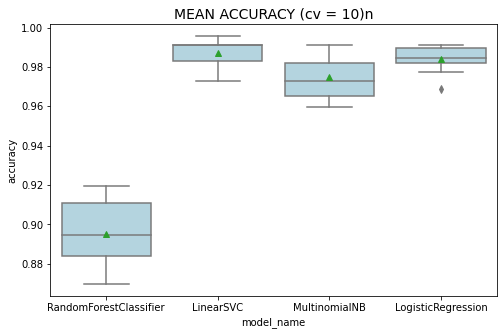

In [70]:
plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy', 
            data=cv_df, 
            color='lightblue', 
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 10)n", size=14);

In [71]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               labels, 
                                                               df.index, test_size=0.25, 
                                                               random_state=1)
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [74]:
print('\t\t\tCLASSIFICATIION METRICS')
print(metrics.classification_report(y_test, y_pred, 
                                    target_names= df['category'].unique()))

			CLASSIFICATIION METRICS
               precision    recall  f1-score   support

         tech       0.98      0.99      0.99       137
     business       0.99      0.98      0.98        89
        sport       0.99      0.98      0.99       102
entertainment       0.99      0.99      0.99       129
     politics       0.98      0.98      0.98       100

     accuracy                           0.99       557
    macro avg       0.99      0.98      0.99       557
 weighted avg       0.99      0.99      0.99       557



In [79]:
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 2500
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['clean'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 29657 unique tokens.


In [80]:
X = tokenizer.texts_to_sequences(df['clean'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (2225, 2500)


In [81]:
Y = pd.get_dummies(df['category']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (2225, 5)


In [82]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(1780, 2500) (1780, 5)
(445, 2500) (445, 5)


In [84]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, LSTM, Embedding,Dropout,SpatialDropout1D,Conv1D,MaxPooling1D,GRU,BatchNormalization
from tensorflow.keras.layers import Input,Bidirectional,GlobalAveragePooling1D,GlobalMaxPooling1D,concatenate,LeakyReLU
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/5
26/26 [==============================] - 475s 17s/step - loss: 1.6117 - accuracy: 0.2478 - val_loss: 1.5371 - val_accuracy: 0.4888
Epoch 2/5
26/26 [==============================] - 448s 17s/step - loss: 1.4158 - accuracy: 0.4638 - val_loss: 1.0949 - val_accuracy: 0.5000
Epoch 3/5
26/26 [==============================] - 442s 17s/step - loss: 0.9524 - accuracy: 0.5968 - val_loss: 0.7921 - val_accuracy: 0.7472
Epoch 4/5
26/26 [==============================] - 439s 17s/step - loss: 0.5679 - accuracy: 0.8883 - val_loss: 0.4844 - val_accuracy: 0.8539
Epoch 5/5
26/26 [==============================] - 517s 20s/step - loss: 0.4306 - accuracy: 0.8783 - val_loss: 0.8448 - val_accuracy: 0.7191


In [85]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

14/14 [==============================] - 11s 805ms/step - loss: 0.9445 - accuracy: 0.6674
Test set
  Loss: 0.944
  Accuracy: 0.667


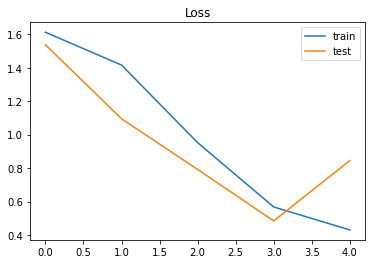

In [90]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

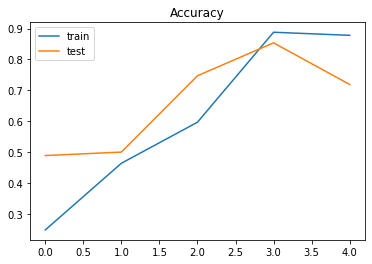

In [91]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [88]:
new_complaint = ['The Los Angles Rams are your 2021 Super Bowl Champions! The gamble and all-in mentality paid off for Sean McVay and company as they have captured their second franchise title. From trading away all of their first round picks to NFL immortality.']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = df['category'].unique()
print(pred)
print('\n\n', labels[np.argmax(pred)])

[[0.05747668 0.20037962 0.02727916 0.6664915  0.04837301]]


 entertainment
